<h1>Mobile Survey Analysis</h1>
<p>Segmenting customers based on different psychometric and behavior measures. A survey was passed out and now will be used to determine differences between the groups of customers we cater to.</p>

In [1]:
# importing libraries

import numpy             as np  # mathematical essentials
import pandas            as pd  # data science essentials
import matplotlib.pyplot as plt # fundamental data visualization
import seaborn           as sns # enhanced visualization
import sys                      # system-specific parameters and functions
from sklearn.preprocessing import StandardScaler # standard scaler
from sklearn.decomposition import PCA            # pca
from scipy.cluster.hierarchy import dendrogram, linkage # dendrograms
from sklearn.cluster         import KMeans # k-means clustering

# setting print options
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth', 100)
np.set_printoptions(threshold=sys.maxsize)


In [2]:

#creating functions for future use and analysis


# optional color scheme
colors_lst = ["#476A2A", "#7851B8", "#BD3430", "#4A2D4E", "#875525",
              "#A83683", "#4E655E", "#853541", "#3A3120", "#535D8E"]


# pca_plotter
def pca_plotter(bunch,
                colors  = None,
                x_label = "First principal component",
                y_label = "Second principal component"):
    """
PARAMETERS
----------
bunch        : Bunch object to be used in PCA
colors       : color coding for target labels, default None
x_label      : x-label for PC 0, default "First principal component"
y_label      : y-label for PC 1, default "Second principal component"
"""

    # INSTANTIATING a PCA object
    pca = PCA(n_components = 2,
              random_state = 219)


    # FITTING and TRANSFORMING the data
    dataset_pca = pca.fit_transform(bunch.data)

    
    # setting figure options
    plt.figure(figsize=(10, 10))
    plt.xlim(dataset_pca[:, 0].min(), dataset_pca[:, 0].max())
    plt.ylim(dataset_pca[:, 1].min(), dataset_pca[:, 1].max())


    # data vizualization
    for i in range(len(bunch.data)):

        plt.text(dataset_pca[i, 0],
                 dataset_pca[i, 1],
                 str(bunch.target[i]),
                 color = colors[bunch.target[i]],
                 fontdict={'weight': 'bold', 'size': 9})

    plt.xlabel(xlabel = x_label)
    plt.ylabel(ylabel = y_label)
    plt.show()

    

# scree_plot
def scree_plot(pca_object, x_value = None, export = False):
    # building a scree plot

    # setting plot size
    fig, ax = plt.subplots(figsize=(10, 8))
    features = range(pca_object.n_components_)


    # developing a scree plot
    plt.plot(features,
             pca_object.explained_variance_ratio_,
             linewidth = 2,
             marker = 'o',
             markersize = 10,
             markeredgecolor = 'black',
             markerfacecolor = 'grey')


    # setting more plot options
    plt.title('Scree Plot')
    plt.xlabel('PCA feature')
    plt.ylabel('Explained Variance')
    plt.xticks(features)
    if x_value == None: 
        x_vlue = None
    else:
        plt.axvline(x = x_value, color = 'red')
    if export == True:
    
        # exporting the plot
        plt.savefig('./analysis_images/top_customers_correlation_scree_plot.png')
        
    # displaying the plot
    plt.show()
    
    
# unsupervised scaler
def unsupervised_scaler(df):
    """
    Standardizes a dataset (mean = 0, variance = 1). Returns a new DataFrame.
    Requires sklearn.preprocessing.StandardScaler()
    
    PARAMETERS
    ----------
    df     | DataFrame to be used for scaling
    """

    # INSTANTIATING a StandardScaler() object
    scaler = StandardScaler()


    # FITTING the scaler with the data
    scaler.fit(df)


    # TRANSFORMING our data after fit
    x_scaled = scaler.transform(df)

    
    # converting scaled data into a DataFrame
    new_df = pd.DataFrame(x_scaled)


    # reattaching column names
    new_df.columns = df.columns
    
    return new_df

In [3]:
#reading the data 

#caseID is not useful because it just says which observation it is
dtypes = {'caseID':str}
survey = pd.read_excel(io = 'Mobile_App_Survey_Data.xlsx', dtype = dtypes)
survey.head(n = 5)

caseID  q1  q2r1  q2r2  q2r3  q2r4  q2r5  q2r6  q2r7  q2r8  q2r9  q2r10  q4r1  q4r2  q4r3  q4r4  q4r5  q4r6  q4r7  q4r8  q4r9  q4r10  q4r11  q11  q12  q13r1  q13r2  q13r3  q13r4  q13r5  q13r6  q13r7  q13r8  q13r9  q13r10  q13r11  q13r12  q24r1  q24r2  q24r3  q24r4  q24r5  q24r6  q24r7  q24r8  q24r9  q24r10  q24r11  q24r12  q25r1  q25r2  q25r3  q25r4  q25r5  q25r6  q25r7  q25r8  q25r9  q25r10  q25r11  q25r12  q26r18  q26r3  q26r4  q26r5  q26r6  q26r7  q26r8  q26r9  q26r10  q26r11  q26r12  q26r13  q26r14  q26r15  q26r16  q26r17  q48  q49  q50r1  q50r2  q50r3  q50r4  q50r5  q54  q55  q56  q57
0      1  10     0     0     1     0     0     0     0     0     0      0     0     0     0     0     0     1     0     0     0      0      0    1    1      1      4      4      4      4      4      4      4      4       4       4       4      5      3      3      5      5      4      5      3      4       3       3       3      5      5      4      5      4      5      4      5      3       3       4       5       5      2      3      3      3      5      5      3       4       6       4       4       4       4       4       4    3    4      1      0      0      0      0    2    2    5    1
1      2   5     0     0     1     0     0     0     0     0     0      0     0     1     1     1     0     0     0     0     1      0      0    3    3      1      2      2      1      2      2      2      2      2       2       2       2      1      1      2      1      1      1      1      1      1       1       2       2      1      2      1      2      2      1      2      1      2       2       2       1       2      2      2      2      1      1      3      2       2       1       1       2       2       2       2       2    5    1      0      1      1      0      0    3    2   10    2
2      3   7     0     0     0     0     1     0     0     0     0      0     0     0     0     0     1     1     0     0     0      0      0    1    5      1      3      4      2      4      2      4      4      2       4       4       3      5      3      2      3      3      3      2      3      3       4       5       3      3      5      4      2      5      5      4      4      4       3       3       4       6      1      4      3      5      6      5      5       5       3       5       5       4       5       3       3    4    4      0      0      0      1      0    2    2    6    1
3      4   7     1     1     0     0     0     0     0     0     0      0     0     0     1     1     0     1     0     0     0      0      0    2    2      1      4      4      4      4      2      4      4      2       4       4       4      2      1      1      2      1      1      1      2      2       2       2       3      2      2      2      2      1      2      1      3      2       2       2       1       3      1      1      2      2      4      3      2       2       2       3       2       3       2       2       2    2    1      0      1      1      0      0    1    2    5    1
4      6   2     1     0     0     0     0     0     0     0     0      0     1     0     0     0     0     0     0     0     0      0      0    2    3      1      2      3      3      3      2      2      2      4       1       2       2      3      3      3      2      2      3      3      2      3       3       2       2      3      2      3      3      3      3      3      2      2       2       1       1       2      2      1      4      3      3      3      2       3       3       3       3       3       2       3       1    5    2      1      0      0      0      0    3    2    4    2

In [4]:
#separate purchase psych-behaviour (26), personality(25),  usage(24 & 13), demographic and behaviour-measures (11 & 12)

demographic = survey.loc[:,['caseID', 'q1', 'q2r1', 'q2r2', 'q2r3', 'q2r4', 'q2r5', 'q2r6', 'q2r7', 'q2r8', 'q2r9', 'q2r10', 'q4r1', 'q4r2', 'q4r3', 'q4r4', 'q4r5', 'q4r6', 'q4r7', 'q4r8', 'q4r9', 'q4r10', 'q4r11','q48', 'q49', 'q50r1', 'q50r2', 'q50r3', 'q50r4', 'q50r5', 'q54', 'q55', 'q56', 'q57']]

behaviour = survey.loc[:,['q11', 'q12']]

psychometric_behavior = survey.loc[:,[ 'q26r18', 'q26r3', 'q26r4', 'q26r5', 'q26r6', 'q26r7', 'q26r8', 'q26r9', 'q26r10', 'q26r11', 'q26r12', 'q26r13', 'q26r14', 'q26r15', 'q26r16', 'q26r17']]

psychometric_personality = survey.loc[:,['q25r1', 'q25r2', 'q25r3', 'q25r4', 'q25r5', 'q25r6', 'q25r7', 'q25r8', 'q25r9', 'q25r10', 'q25r11', 'q25r12']]

psychometric_usage = survey.loc[:,[ 'q13r1', 'q13r2', 'q13r3', 'q13r4', 'q13r5', 'q13r6', 'q13r7', 'q13r8', 'q13r9', 'q13r10', 'q13r11', 'q13r12', 'q24r1', 'q24r2', 'q24r3', 'q24r4', 'q24r5', 'q24r6', 'q24r7', 'q24r8', 'q24r9', 'q24r10', 'q24r11', 'q24r12',]]

#save column names for when we scale by rows
psychometric_behavior_columns = psychometric_behavior.columns
psychometric_personality_columns = psychometric_personality.columns
psychometric_usage_columns = psychometric_usage.columns

<h2>Psychometric behavior</h2>
<p>It addresses human abilities, attitudes and approaches towards technology and shopping. </p>

In [5]:
#scaling rows to standardize the answers for each person
rowwise = np.array(psychometric_behavior)
rowwiseT = rowwise.T
rowwisedf = pd.DataFrame(rowwiseT)
rowwise_scaled = unsupervised_scaler(rowwisedf)
rowwise_scaled_array = np.array(rowwise_scaled)
rowwise_scaled_arrayT = rowwise_scaled_array.T
psychometric_behavior = pd.DataFrame(rowwise_scaled_arrayT)
psychometric_behavior.columns = psychometric_behavior_columns

#https://stackoverflow.com/questions/64028321/how-do-i-get-sklearn-standardscale-in-rows-and-not-the-columns

In [6]:
# applying the unsupervised_scaler function to standardize answers for each question
psychometric_behavior_scaled = unsupervised_scaler(psychometric_behavior)

<p>The scree plot is used to determine the number of components, and helps us capture only components that have high variance. The assumption is we will select the number of components at a point of the elbow. This specific measure derived five pca components which symbolizes the psychometric analysis based on the survey. This is shown by the red line in the graph, and these explain 45% of the variation in the data.</p>

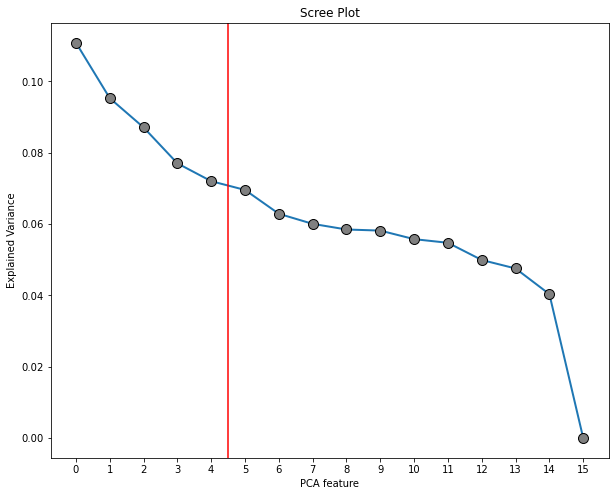

In [7]:
# INSTANTIATING a PCA object with no limit to principal components
pca_all = PCA(n_components = None,
          random_state = 219)


# FITTING and TRANSFORMING the scaled data
psychometric_pca_all = pca_all.fit_transform(psychometric_behavior_scaled)

# calling the scree_plot function
scree_plot(pca_all, x_value = 4.5, export = False)

# INSTANTIATING a PCA object with no limit to principal components
pca = PCA(n_components = 5,
          random_state = 219)


# FITTING and TRANSFORMING the scaled data
psychometric_behavior_pca = pca.fit_transform(psychometric_behavior_scaled)


<p>The five pca components were labeled as follows:</p>
<ol>
  <li><strong>Money conscious shopaholic:</strong> People who like shopping but are still concerned about the price of a product. They are clear and conscious about the money they spend during shopping. <p>The high value indicates people are so conscious about the money they are investing in shopping where as the low value indicates that they are not so conscious about the money </p></li>
    <br>
  <li><strong>Big tech spender:</strong> People who like to spend on technology stuff . These people invest a lot in technology and believe that technology connects people and all around the world.
    <p>The higher variance in these components shows that these people invest a lot in technology whereas lower the variance indicates they don't spend much on technology.</p></li>
    <br>
  <li><strong>Big non tech spender:</strong> people who like to shop in non-tech stuff. They choose their arena of shopping mostly other than technology . They do spend a lot of money in shopping excluding tech and believe that internet and technology is not a key component in connecting people.
    <p>People who don't invest a lot in technology but they do invest a lot in other means indicates higher variance.</p> </li>
    <br>
    <li><strong>Working parent (young child):</strong> Working parent who has capability to buy but stands on a limited budget
    <p>Higher the variance in this component shows that they are more responsible in connecting the needs of the family other than investing in technology which he is capable enough.</p></li>
    <br>
    <li><strong>On a budget:</strong> A self money management person who looks for packages deals and always tends to shop on a budget and he doesn't believe in brands brings style.
        <p>More the variance in this component indicates more he stands on budget  .Lower the variance indicates that the person dont bother about the budget while shopping.
</p>
    </li>
</ol>

In [8]:
# transposing pca components
factor_loadings_df_psychometric_behavior = pd.DataFrame(np.transpose(pca.components_))


# naming rows as original features
factor_loadings_df_psychometric_behavior = factor_loadings_df_psychometric_behavior.set_index(psychometric_behavior.columns)


# checking the result
factor_loadings_df_psychometric_behavior.head(n=5)


# saving to Excel
factor_loadings_df_psychometric_behavior.to_excel('psychometric_factor_loadings.xlsx')

In [9]:
# analyzing factor strengths per customer
factor_loadings = pca.transform(psychometric_behavior_scaled)

# converting to a DataFrame
factor_loadings_df = pd.DataFrame(factor_loadings)

# naming each principal component
factor_loadings_df.columns = ['money conscious shopaholic', 'big tech spender', 'big non tech spender', 'working parent (young child)', 'on a budget']


# checking the result
# factor_loadings_df

<h2>MAKE PRETTY AND EXPLAIN PERSONAS

In [10]:
# scaling pca
pca_scaled = unsupervised_scaler(factor_loadings_df)

# exploring customers in each persona
for col in pca_scaled:
    print(f"""Number of people over one stdev above: {len(pca_scaled[col][pca_scaled[col] > 1.0])} in {col}""")
    print(f"""Number of people over one stdev below: {len(pca_scaled[col][pca_scaled[col] < -1.0])} in {col}""")

Number of people over one stdev above: 279 in money conscious shopaholic
Number of people over one stdev below: 266 in money conscious shopaholic
Number of people over one stdev above: 230 in big tech spender
Number of people over one stdev below: 279 in big tech spender
Number of people over one stdev above: 221 in big non tech spender
Number of people over one stdev below: 273 in big non tech spender
Number of people over one stdev above: 234 in working parent (young child)
Number of people over one stdev below: 267 in working parent (young child)
Number of people over one stdev above: 250 in on a budget
Number of people over one stdev below: 265 in on a budget


<h2>Psychometric usage</h2>
<p>It addresses how people perceive they use technology and applications in everyday life.</p>

In [11]:
#scaling the data so pca can draw a line through it correctly

rowwise = np.array(psychometric_usage)
rowwiseT = rowwise.T
rowwisedf = pd.DataFrame(rowwiseT)
rowwise_scaled = unsupervised_scaler(rowwisedf)
rowwise_scaled_array = np.array(rowwise_scaled)
rowwise_scaled_arrayT = rowwise_scaled_array.T
psychometric_usage = pd.DataFrame(rowwise_scaled_arrayT)
psychometric_usage.columns = psychometric_usage_columns


# applying the unsupervised_scaler function
psychometric_usage_scaled = unsupervised_scaler(psychometric_usage)

<p> For the survey information about the customers usage of technology and apps, the increase in variance provided by each extra pca column diminished at 6 components. This is shown with a red line in the plot below. Although this only explains about 50% of the variance, it is unlikely that extra components will provide much information about the variance of the data. 
</p>

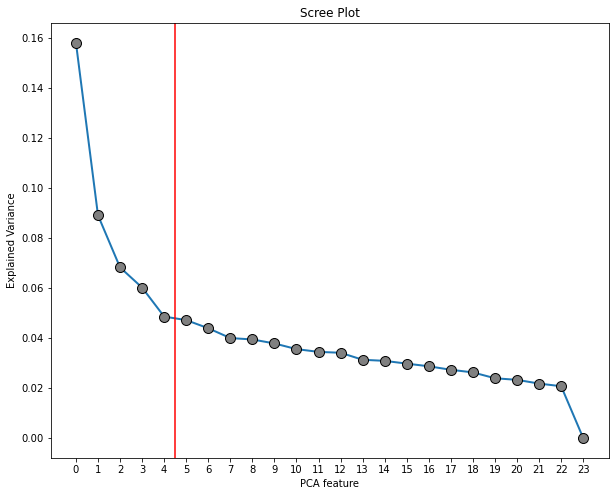

In [12]:
# INSTANTIATING a PCA object with no limit to principal components
psychometric_usage_scaled_pca = PCA(n_components = None,
          random_state = 219)


# FITTING and TRANSFORMING the scaled data
psychometric_usage_scaled_pca_all = psychometric_usage_scaled_pca.fit_transform(psychometric_usage_scaled)

# calling the scree_plot function
scree_plot(psychometric_usage_scaled_pca, x_value = 4.5, export = False)

In [13]:
# INSTANTIATING a PCA object with a limit to principal components
psychometric_usage_scaled_pca = PCA(n_components = 6,
          random_state = 219)


# FITTING and TRANSFORMING the scaled data
psychometric_usage_scaled_pca_all = psychometric_usage_scaled_pca.fit_transform(psychometric_usage_scaled)

The six pca components that were created were:
<ol>
    <li><strong>Golden age:</strong> Pertains to people who have an old lifestyle; they use apps that peaked years ago and don’t keep up with technology or use it to replace meeting in person at all. 
<p>A high value in this component means they tend more towards using these types of apps, and tend to use tech less than the average population. A low value would mean people use technology more often and use more current apps than those this group does.</p></li>
    <br>
    <li><strong>Tech hater:</strong> These are people who have a strong feeling against everything technology related, don’t use many apps often and still meet people in person. They aren’t just not interested in tech, because they keep up with the news.  
<p>A high value in this component relates to someone hating technology more than the average person, whereas low values are people who like technology and want more of it in their life.</p></li>
Online communication: People who use tech just for communication. They use it to keep in touch with friends and family, but don’t use it a lot during the day. 
A high value shows a person tends to avoid technology except when using it to contact friends. A low value relates to people who avoid technology less, but doesn’t necessarily use it to connect with friends and family.
Info/news junkie: people who use tech for education or to read news, but not for entertainment.
The more a person avoids the internet except to read news on yahoo, or aol for example, the higher the value of this component. A low value would mean someone uses the internet more for other things such as entertainment or networking, or doesn’t use it at all.
networking junkie: people who use tech to connect with others, not for entertainment. They also do not use it to control aspects of their life, just to meet new interesting people, especially on linkedin. 
Some people are only active on networking sites, but don’t use technology much apart from this. These people would have a high value on this component. People who do not network at all would have lower values. 
Hard worker: These people tend to use technology to learn new skills and information. Their applications also save them time because they want to get a lot of things done quickly.
A high value in this component means people tend to use technology more for work than for entertainment, whereas a low value means they don't think technology makes them much more efficient.


In [14]:
# transposing pca components
factor_loadings_df_psychometric_usage = pd.DataFrame(np.transpose(psychometric_usage_scaled_pca.components_))


# naming rows as original features
factor_loadings_df_psychometric_usage = factor_loadings_df_psychometric_usage.set_index(psychometric_usage.columns)

# saving to Excel
factor_loadings_df_psychometric_usage.to_excel('psychometric_usage_factor_loadings.xlsx')


In [15]:
# analyzing factor strengths per customer
factor_loadings_psychometric_usage = psychometric_usage_scaled_pca.transform(psychometric_usage_scaled)

# converting to a DataFrame
factor_loadings_df_psychometric_usage = pd.DataFrame(factor_loadings_psychometric_usage)

# naming each principal component
factor_loadings_df_psychometric_usage.columns = ['Golden age', 'tech hater', 'online communication', 'info/news junkie', 'networking junkie', 'hard worker']

In [16]:
# scaling the pca
pca_scaled_psychometric_usage = unsupervised_scaler(factor_loadings_df_psychometric_usage)

# exploring customers in the Healthfood Heroes persona
len(pca_scaled_psychometric_usage['Golden age'][pca_scaled_psychometric_usage['Golden age'] > 1.0])


234

<h2>Psychometric personality</h2>
<p>These are answers to questions that show a persons character and personality in general. </p>

In [17]:
#scaling the data so pca can make a line through it correctly
rowwise = np.array(psychometric_personality)
rowwiseT = rowwise.T
rowwisedf = pd.DataFrame(rowwiseT)
rowwise_scaled = unsupervised_scaler(rowwisedf)
rowwise_scaled_array = np.array(rowwise_scaled)
rowwise_scaled_arrayT = rowwise_scaled_array.T
psychometric_personality = pd.DataFrame(rowwise_scaled_arrayT)
psychometric_personality.columns = psychometric_personality_columns

# applying the unsupervised_scaler function
psychometric_personality_scaled = unsupervised_scaler(psychometric_personality)


<p>The elbow is at 6 components. However, after we run all the processes, we find out that some of the components don’t have significant effects on the clusters, so we removed them to reduce noise. We used only 4 components, which explains 45% of the variance in the data</p>

Original shape: (1552, 12)
PCA shape     : (1552, 12)


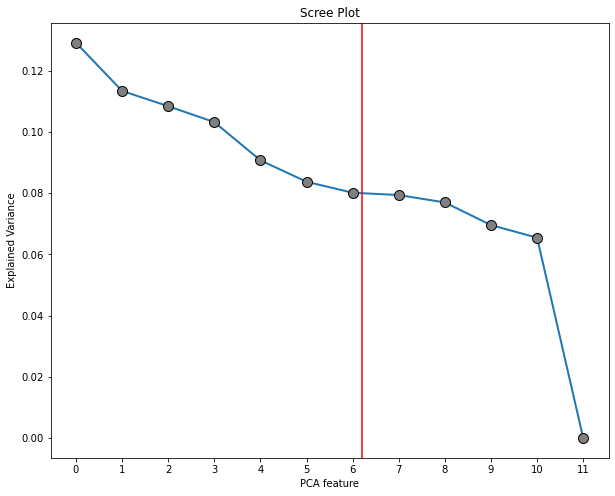

In [18]:
# INSTANTIATING a PCA object with no limit to principal components
psychometric_personality_scaled_pca = PCA(n_components = None,
          random_state = 219)


# FITTING and TRANSFORMING the scaled data
psychometric_personality_scaled_pca_all = psychometric_personality_scaled_pca.fit_transform(psychometric_personality_scaled)


# comparing dimensions of each DataFrame
print("Original shape:", psychometric_personality_scaled.shape)
print("PCA shape     :", psychometric_personality_scaled_pca_all.shape)

# calling the scree_plot function
scree_plot(psychometric_personality_scaled_pca, x_value = 6.2, export = False)

In [19]:
# INSTANTIATING a PCA object with a limit to principal components
psychometric_personality_scaled_pca = PCA(n_components = 4,
          random_state = 219)


# FITTING and TRANSFORMING the scaled data
psychometric_personality_scaled_pca_all = psychometric_personality_scaled_pca.fit_transform(psychometric_personality_scaled)

<p>The four pca components were labeled as follows:</p>
<ol>
  <li><strong>Wallflower:</strong> Specific interests when it came to leading or being in control, they liked to be led and preferred if other people thought for them. A wallflower is someone with an introverted personality type who will attend parties and social gatherings, but will usually distance themselves from the crowd and actively avoid being in the limelight.
 <p>A high value in this component means that individuals here feel very positively about being told what to do rather than being responsible for their own actions.</p></li>
    <br>
  <li><strong>Invests a lot:</strong> These were highly opinionated individuals that loved to take risks, their lack of optimism we believe, fueled that love for daring choices given that they also liked to try new things. These characteristics went in line with the typical mindset of an avid investor.
    <p>Individuals characterized as investors here have very weak feelings about optimism and prefer being more mentally active than physically active.</p></li>
    <br>
  <li><strong>Busy Manager:</strong>The Busy Manager label identifies with individuals who had dominating personalities, they liked to be in control and lead, they were individuals who hardly had any free time and were not creative (we believe they are more comfortable leading others and utilizing skills found in others).
    <p>We find that people in this group have high values regarding control, and a lack of optimism.</p> </li>
    <br>
    <li><strong>Gamer:</strong> The creative gamer is one who is not active when it comes to moving around but shines in their uniquely creative skill, they are open to advising others and are very comfortable being in control.
    <p>High values here indicated creative individuals who were very risk averse however enjoy being unique, standing out but more mentally active than physically.</p></li>
</ol>

In [20]:
# transposing pca components
factor_loadings_df_psychometric_personality = pd.DataFrame(np.transpose(psychometric_personality_scaled_pca.components_))


# naming rows as original features
factor_loadings_df_psychometric_personality = factor_loadings_df_psychometric_personality.set_index(psychometric_personality.columns)


# checking the result
factor_loadings_df_psychometric_personality.head(n = 5)

0         1         2         3
q25r1  0.353706 -0.210934 -0.161336 -0.014089
q25r2  0.102546 -0.357264  0.174643 -0.217486
q25r3  0.144418 -0.004866  0.213386 -0.480714
q25r4  0.456154  0.054732 -0.363863  0.028070
q25r5  0.104104 -0.380520  0.257286  0.219102

In [21]:
# saving to Excel
factor_loadings_df_psychometric_personality.to_excel('psychometric_personality_factor_loadings.xlsx')

# analyzing factor strengths per customer
factor_loadings_psychometric_personality = psychometric_personality_scaled_pca.transform(psychometric_personality_scaled)

# converting to a DataFrame
factor_loadings_df_psychometric_personality = pd.DataFrame(factor_loadings_psychometric_personality)

# naming each principal component
factor_loadings_df_psychometric_personality.columns = ['wallflower', 'invests a lot', 'busy manager', 'gamer']

<h2>analyze

In [22]:
# scaling the pca
pca_scaled_psychometric_personality = unsupervised_scaler(factor_loadings_df_psychometric_personality)

# exploring customers in the Healthfood Heroes persona
len(pca_scaled_psychometric_personality['gamer'][pca_scaled_psychometric_personality['gamer'] > 1.0])

253

<h2>Behavior data</h2>
<p>These two columns explain how many apps and what percent of those were free. Since it is an actual measure it was not grouped with the psychometric data, and no pca was run as it is not worth decreasing the amount of components since there are only two features. It was only scaled to be used in the clustering.</p>

In [23]:
# applying the unsupervised_scaler function
behaviour_scaled = unsupervised_scaler(behaviour)

behaviour_scaled.columns = ['count_apps', 'free_apps']

<h2>Clustering</h2>

In [24]:
#merge the scaled pcas to make clusters
pca_data = pd.concat([behaviour_scaled, pca_scaled, pca_scaled_psychometric_personality, pca_scaled_psychometric_usage], axis = 1)
pca_data.head(n=5)

count_apps  free_apps  money conscious shopaholic  big tech spender  big non tech spender  working parent (young child)  on a budget  wallflower  invests a lot  busy manager     gamer  Golden age  tech hater  online communication  info/news junkie  networking junkie  hard worker
0   -2.039806  -2.396960                   -0.928222         -1.691975              0.273474                     -0.433568    -0.634053    0.860350      -1.845871     -2.053100  0.349418    0.114128   -0.350160             -1.437214          0.683219           1.470949    -0.872015
1   -0.080178  -0.906841                    1.073064          0.360162              1.565782                      2.851132    -0.104612    2.031170       1.622760      0.764528 -0.336586   -0.714120    1.971696              0.987021          0.133476          -0.376167    -0.776893
2   -2.039806   0.583278                   -1.493572         -1.411556              0.902233                     -0.211973     2.294804   -0.829707      -1.666636      1.611691 -1.132443    0.578644    1.032352             -1.795688         -0.329628          -0.191983     0.706850
3   -1.059992  -1.651901                   -1.580727         -1.934048              0.956664                     -0.333147    -0.038583    1.532020       0.252774      1.352446  1.003073   -1.206509    1.995155             -0.232609          1.053755          -1.150560     0.311223
4   -1.059992  -0.906841                    0.810460         -0.480202             -0.655537                     -0.960444    -0.160372    2.178361      -1.229288     -0.235656 -1.761886    1.287158   -0.539153              0.600282         -0.400355           0.512654    -3.120554

<p>The dendrogram below shows how the observations were grouped. We decided to use four clusters to separate the red group shown below so each cluster would be more evenly distributed. Also, when using only three clusters one of the groups was barely explained by the pca columns, meaning there were many diverging thoughts within the group.</p>

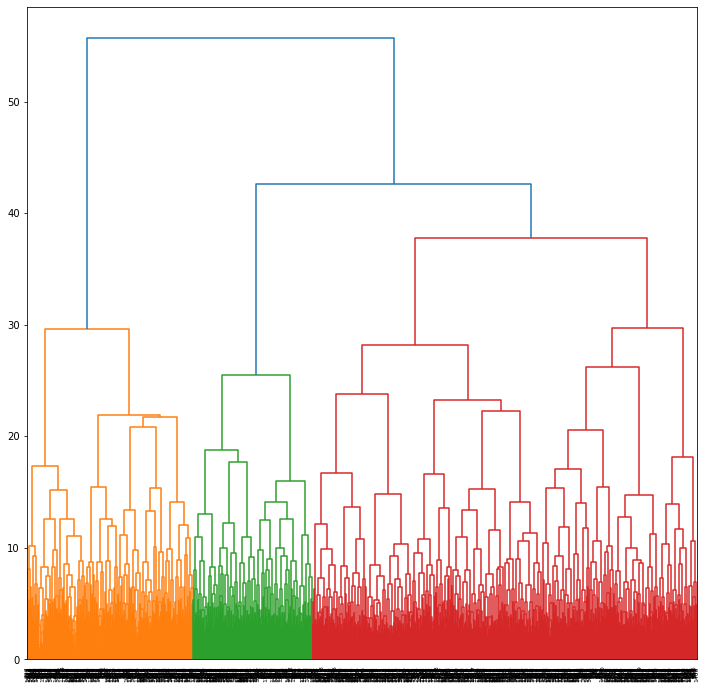

In [25]:
from scipy.cluster.hierarchy import dendrogram, linkage # dendrograms
from sklearn.cluster         import KMeans # k-means clustering

# grouping data based on Ward distance
standard_mergings_ward = linkage(y = pca_data,
                                 method = 'ward',
                                 optimal_ordering = True)


# setting plot size
fig, ax = plt.subplots(figsize=(12, 12))

# developing a dendrogram
dendrogram(Z = standard_mergings_ward,
           leaf_rotation = 90,
           leaf_font_size = 6)


# rendering the plot
plt.show()

In [26]:
# INSTANTIATING a k-Means object with five clusters
data_k_pca = KMeans(n_clusters   = 4,
                        random_state = 219)


# fitting the object to the data
data_k_pca.fit(pca_data)


# converting the clusters to a DataFrame
data_kmeans_pca = pd.DataFrame({'Cluster': data_k_pca.labels_})


# checking the results
print(data_kmeans_pca.iloc[: , 0].value_counts())

1    465
0    411
2    352
3    324
Name: Cluster, dtype: int64


<p><strong>Cluster 1:</strong> People that spend little money, especially on apps and gadgets. As a company that is going to produce an app. We would not want to target them to make a profit, as they would not make the purchase.</p> 
<p><strong>Cluster 2:</strong> Tech savvy people that are always aware of developments in the industry and like to purchase new apps and gadgets to try them out. A new app is likely to draw their attention, especially if it is one that is not currently available.</p>
<p><strong>Cluster 3:</strong> Serious minded people who tend to use technology for networking or to improve their efficiency. They don’t seem to use it for fun, so any app made to target this group would have to be a networking app or a useful app that can make their life easier.</p>
<p><strong>Cluster 4:</strong> Old souls that like to invest and spend money on tech related companies. They are on a budget but make exceptions for what interests them, and especially for investing in something that could make them money. Apps that could spark their interest likely help them manage their expenses or something related. </p>

count_apps  free_apps  money conscious shopaholic  big tech spender  big non tech spender  working parent (young child)  on a budget  wallflower  invests a lot  busy manager  gamer  Golden age  tech hater  online communication  info/news junkie  networking junkie  hard worker
0       -0.38       0.74                       -0.10             -0.73                 -0.09                         -0.27         0.41        0.31          -0.46          0.25   0.33       -0.13        0.64                 -0.46             -0.10              -0.01         0.27
1        0.52      -0.03                       -0.28              0.26                 -0.15                         -0.46        -0.51       -0.47           0.25         -0.38   0.11       -0.41       -0.67                 -0.09             -0.08              -0.32        -0.16
2       -0.02      -0.30                        0.28              0.05                 -0.37                          0.81        -0.23       -0.52          -0.30          0.05  -0.28       -0.30       -0.19                  0.37             -0.06               0.68         0.33
3       -0.24      -0.57                        0.23              0.51                  0.73                          0.12         0.47        0.86           0.54          0.17  -0.27        1.08        0.35                  0.31              0.31              -0.26        -0.46

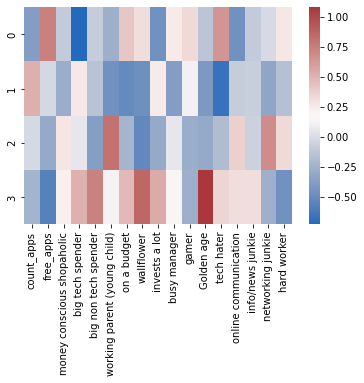

In [27]:
# storing cluster centers
centroids_pca = data_k_pca.cluster_centers_


# converting cluster centers into a DataFrame
centroids_pca_df = pd.DataFrame(centroids_pca)


# renaming principal components
centroids_pca_df.columns = pca_data.columns


# checking results (clusters = rows, pc = columns)
sns.heatmap(centroids_pca_df.round(2), cmap="vlag")
centroids_pca_df.round(2)

In [28]:
factor_loadings_data = pd.concat([behaviour_scaled, factor_loadings_df, factor_loadings_df_psychometric_personality, factor_loadings_df_psychometric_usage], axis = 1)
factor_loadings_data

count_apps  free_apps  money conscious shopaholic  big tech spender  big non tech spender  working parent (young child)  on a budget  wallflower  invests a lot  busy manager     gamer  Golden age  tech hater  online communication  info/news junkie  networking junkie  hard worker
0      -2.039806  -2.396960                   -1.236356         -2.089530              0.322868                     -0.481367    -0.680722    1.071016      -2.153167     -2.341512  0.388846    0.222276   -0.511859             -1.838674          0.820637           1.584882    -0.926873
1      -0.080178  -0.906841                    1.429281          0.444787              1.848589                      3.165455    -0.112312    2.528526       1.892913      0.871926 -0.374567   -1.390820    2.882196              1.262728          0.160322          -0.405303    -0.825767
2      -2.039806   0.583278                   -1.989381         -1.743222              1.065192                     -0.235342     2.463712   -1.032870      -1.944093      1.838096 -1.260228    1.126968    1.509076             -2.297281         -0.395927          -0.206854     0.751318
3      -1.059992  -1.651901                   -2.105468         -2.388482              1.129454                     -0.369875    -0.041423    1.907153       0.294855      1.542432  1.116260   -2.349795    2.916488             -0.297584          1.265700          -1.239677     0.330802
4      -1.059992  -0.906841                    1.079502         -0.593033             -0.773938                     -1.066328    -0.172176    2.711757      -1.433937     -0.268760 -1.960698    2.506869   -0.788126              0.767960         -0.480879           0.552362    -3.316867
...          ...        ...                         ...               ...                   ...                           ...          ...         ...            ...           ...       ...         ...         ...                   ...               ...                ...          ...
1547   -0.080178  -0.161782                    0.444752          0.144417             -0.541792                     -1.215375     0.701777   -0.408291      -0.858354      0.238534  1.427352   -0.001360    0.761057              0.450272         -0.047636          -1.959035     1.075288
1548    0.899636  -0.906841                    0.568566          0.808577              2.088745                     -0.690494    -1.532490   -0.730253       1.364831     -0.737406  1.801296   -1.761321   -1.518513             -0.452617         -0.187543          -0.560614     0.012427
1549   -0.080178  -0.161782                    0.607666          1.851726              0.798864                     -0.139165     1.295792   -0.012760       2.318709     -0.671718  0.391750    1.665605   -0.655703              1.775944         -0.892138          -0.159458     0.484127
1550   -0.080178  -0.161782                   -1.860881          1.363845             -1.986941                      0.745640     0.177418   -1.233759       1.715993     -2.092962 -0.007586   -0.763189   -0.376805             -1.006715         -2.487775          -0.607960     0.643827
1551   -1.059992   0.583278                   -0.607031         -0.060113             -1.902932                     -0.589345     0.403105    1.327344      -0.025109     -0.184665 -0.376584   -1.023754   -0.631374             -0.951916         -0.010782          -0.493031    -0.503538

[1552 rows x 17 columns]

In [29]:
# concatinating cluster memberships with principal components
clst_pca_df = pd.concat([data_kmeans_pca,
                          factor_loadings_data],
                          axis = 1)


# concatenating demographic information with pca-clusters
final_pca_clust_df = pd.concat([demographic, 
                                  clst_pca_df.round(decimals = 2)],
                                  axis = 1)


# renaming columns
#final_pca_clust_df.columns = []


# checking the results
final_pca_clust_df.head(n=5)

caseID  q1  q2r1  q2r2  q2r3  q2r4  q2r5  q2r6  q2r7  q2r8  q2r9  q2r10  q4r1  q4r2  q4r3  q4r4  q4r5  q4r6  q4r7  q4r8  q4r9  q4r10  q4r11  q48  q49  q50r1  q50r2  q50r3  q50r4  q50r5  q54  q55  q56  q57  Cluster  count_apps  free_apps  money conscious shopaholic  big tech spender  big non tech spender  working parent (young child)  on a budget  wallflower  invests a lot  busy manager  gamer  Golden age  tech hater  online communication  info/news junkie  networking junkie  hard worker
0      1  10     0     0     1     0     0     0     0     0     0      0     0     0     0     0     0     1     0     0     0      0      0    3    4      1      0      0      0      0    2    2    5    1        0       -2.04      -2.40                       -1.24             -2.09                  0.32                         -0.48        -0.68        1.07          -2.15         -2.34   0.39        0.22       -0.51                 -1.84              0.82               1.58        -0.93
1      2   5     0     0     1     0     0     0     0     0     0      0     0     1     1     1     0     0     0     0     1      0      0    5    1      0      1      1      0      0    3    2   10    2        3       -0.08      -0.91                        1.43              0.44                  1.85                          3.17        -0.11        2.53           1.89          0.87  -0.37       -1.39        2.88                  1.26              0.16              -0.41        -0.83
2      3   7     0     0     0     0     1     0     0     0     0      0     0     0     0     0     1     1     0     0     0      0      0    4    4      0      0      0      1      0    2    2    6    1        0       -2.04       0.58                       -1.99             -1.74                  1.07                         -0.24         2.46       -1.03          -1.94          1.84  -1.26        1.13        1.51                 -2.30             -0.40              -0.21         0.75
3      4   7     1     1     0     0     0     0     0     0     0      0     0     0     1     1     0     1     0     0     0      0      0    2    1      0      1      1      0      0    1    2    5    1        0       -1.06      -1.65                       -2.11             -2.39                  1.13                         -0.37        -0.04        1.91           0.29          1.54   1.12       -2.35        2.92                 -0.30              1.27              -1.24         0.33
4      6   2     1     0     0     0     0     0     0     0     0      0     1     0     0     0     0     0     0     0     0      0      0    5    2      1      0      0      0      0    3    2    4    2        3       -1.06      -0.91                        1.08             -0.59                 -0.77                         -1.07        -0.17        2.71          -1.43         -0.27  -1.96        2.51       -0.79                  0.77             -0.48               0.55        -3.32

<AxesSubplot:xlabel='q1', ylabel='wallflower'>

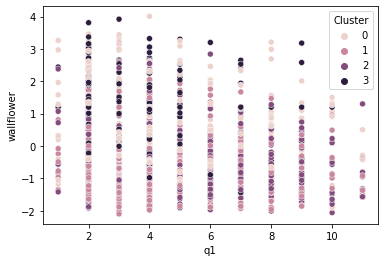

In [30]:
sns.scatterplot(x = 'q1', y = 'wallflower', data = final_pca_clust_df, hue = 'Cluster')

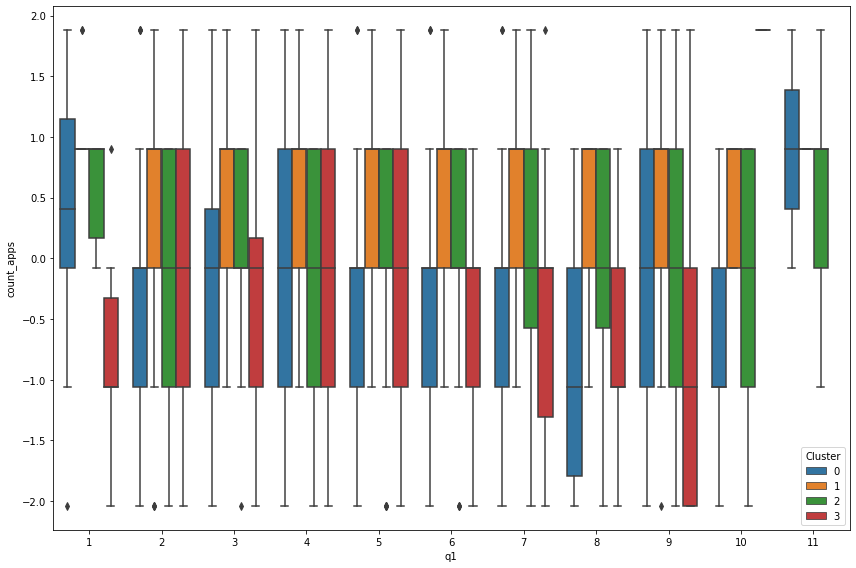

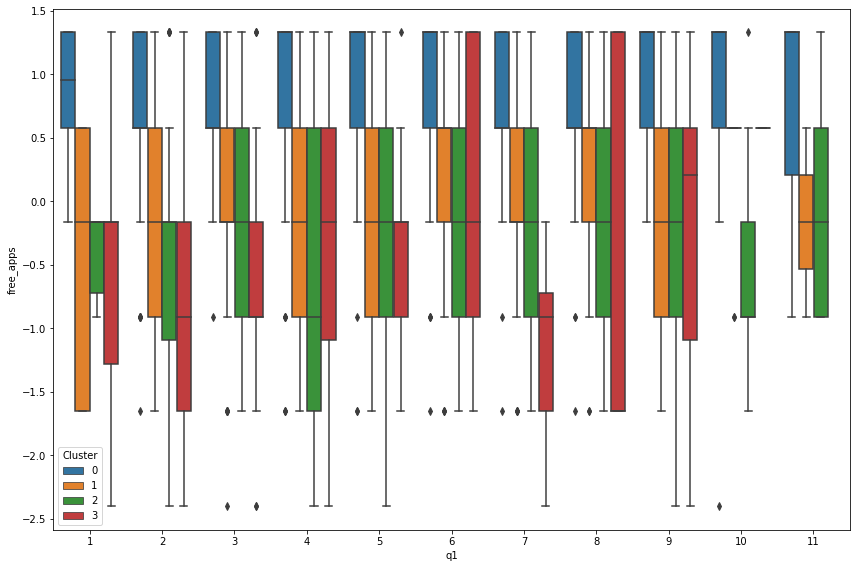

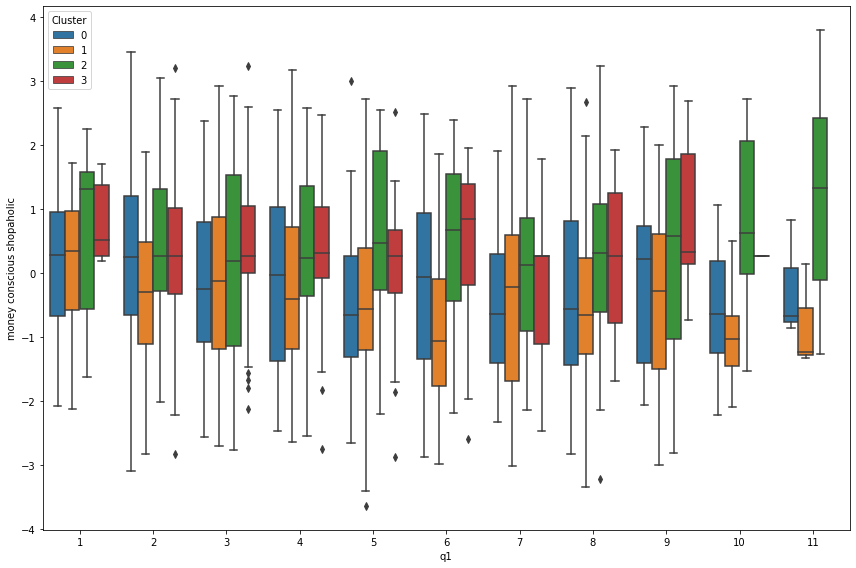

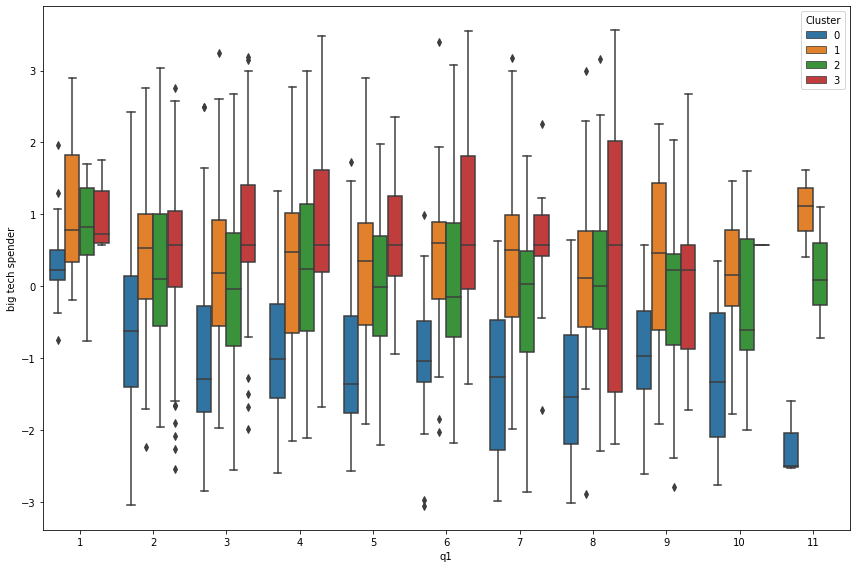

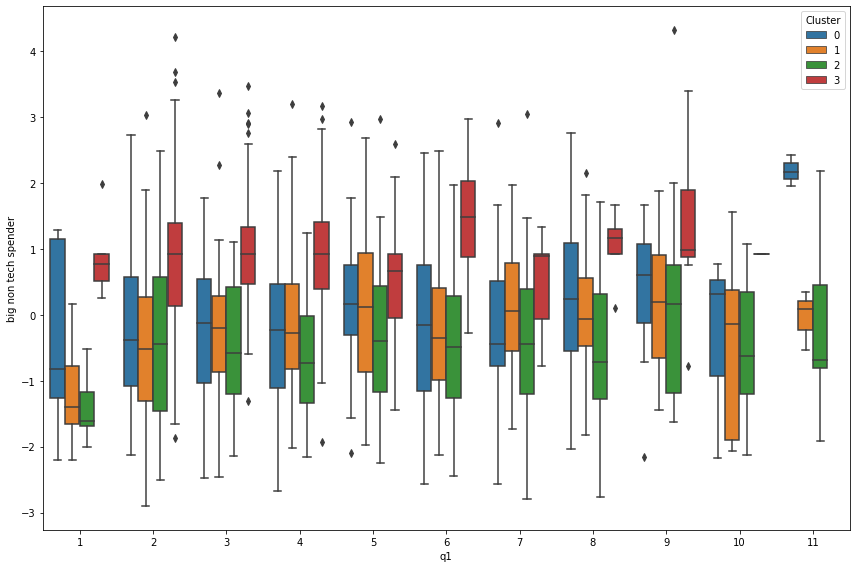

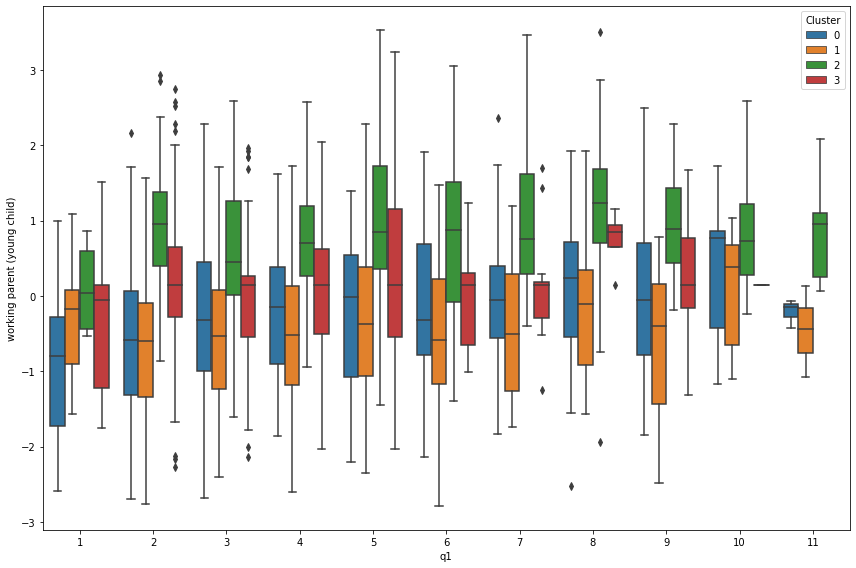

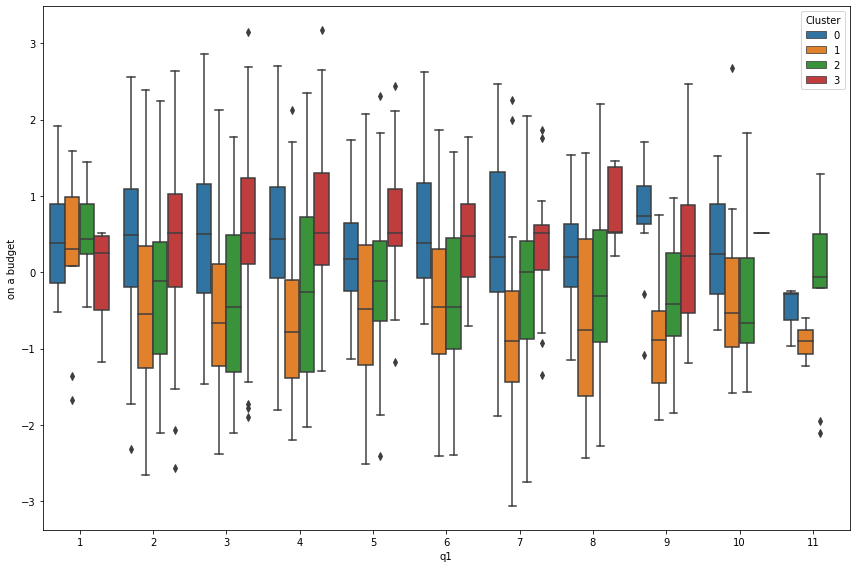

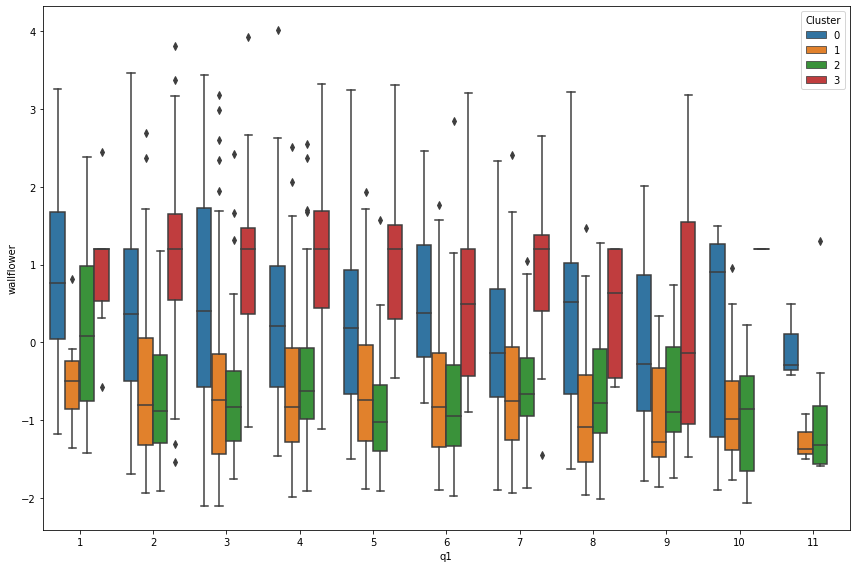

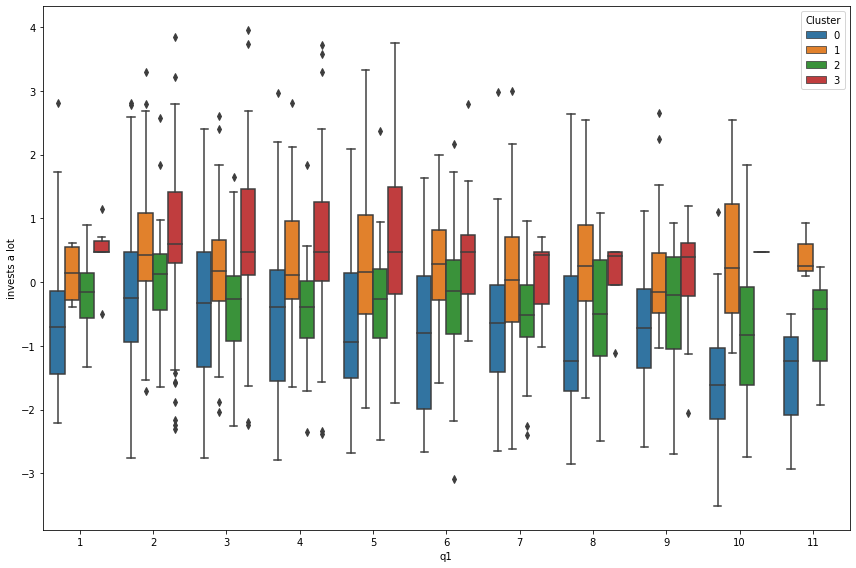

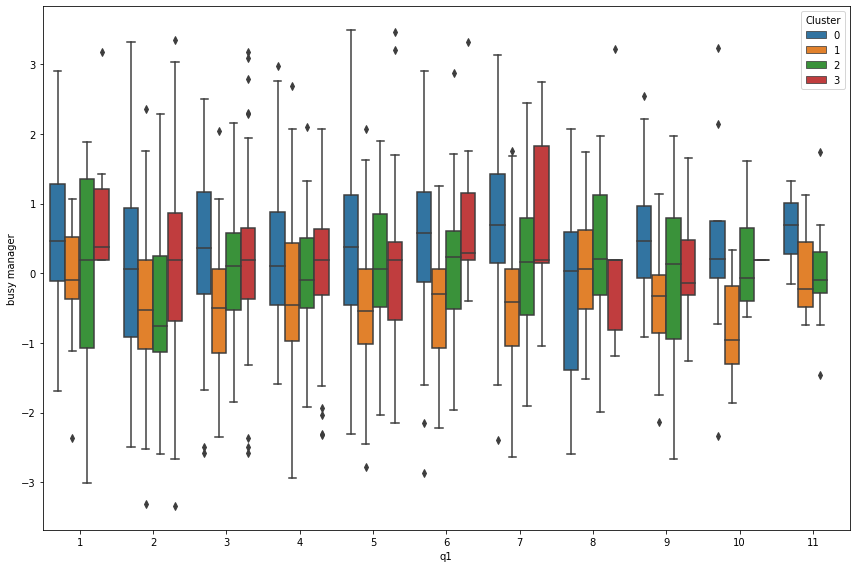

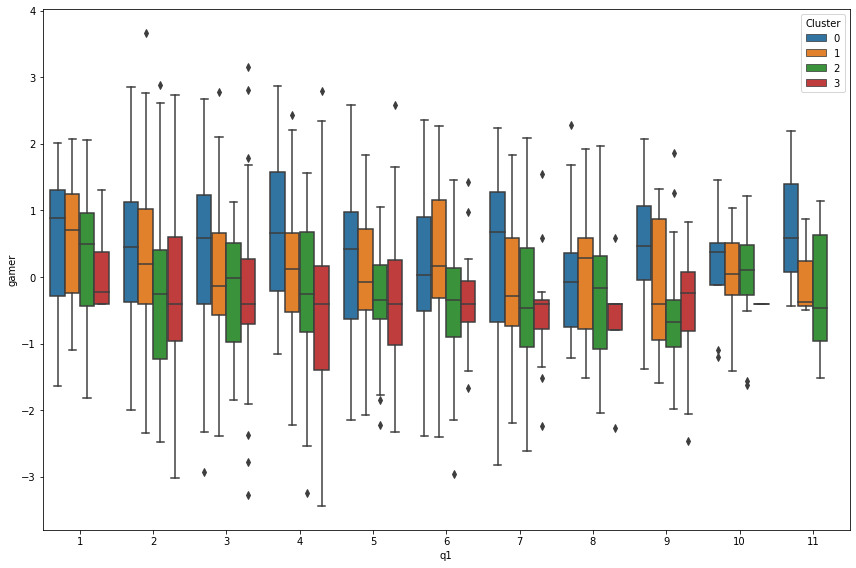

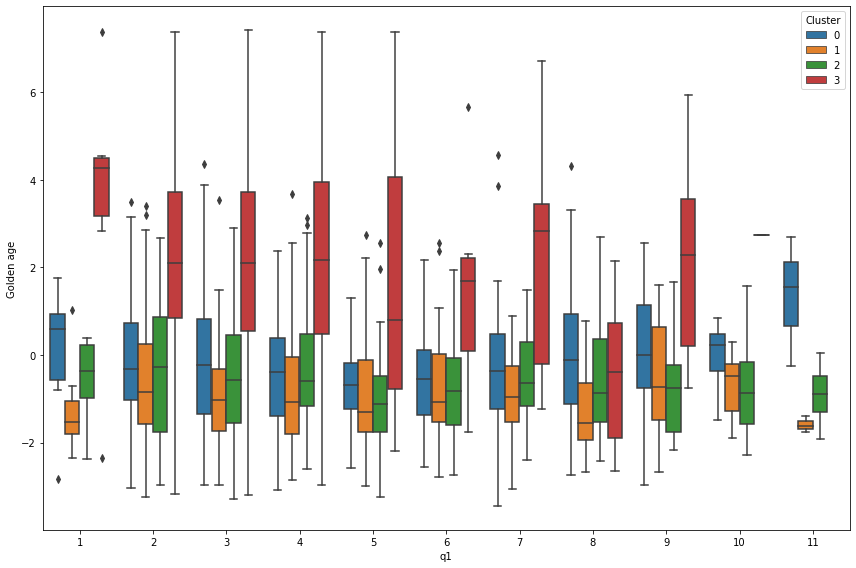

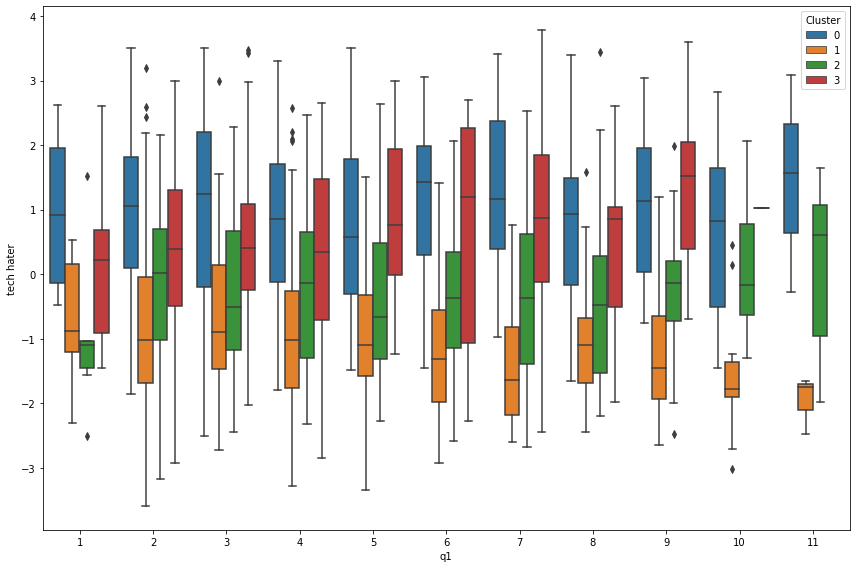

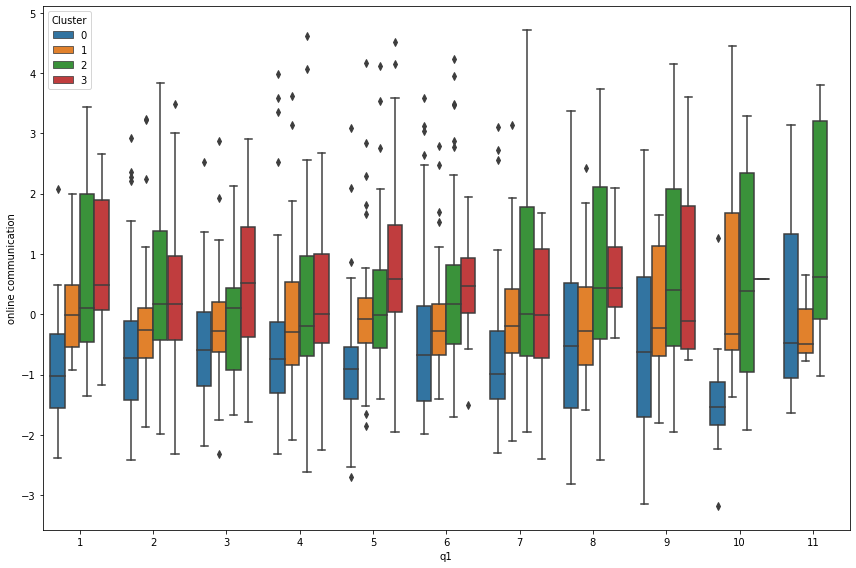

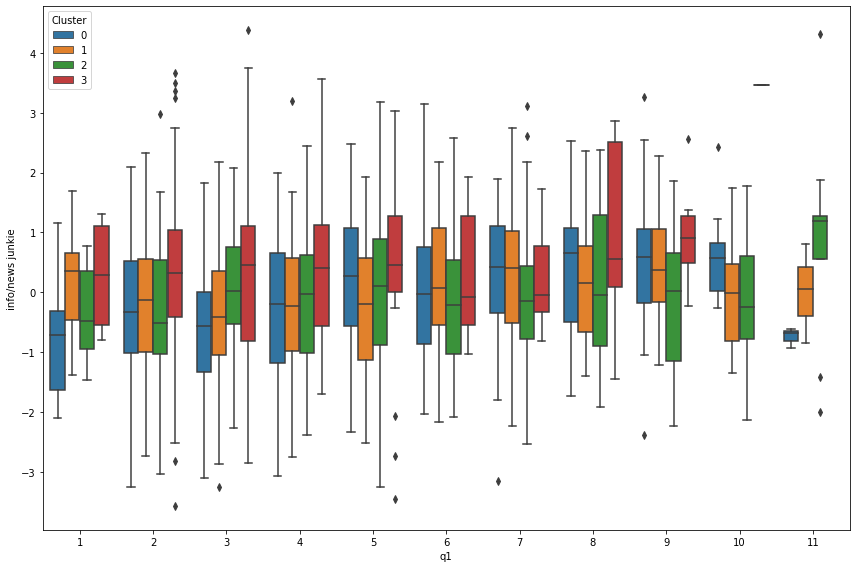

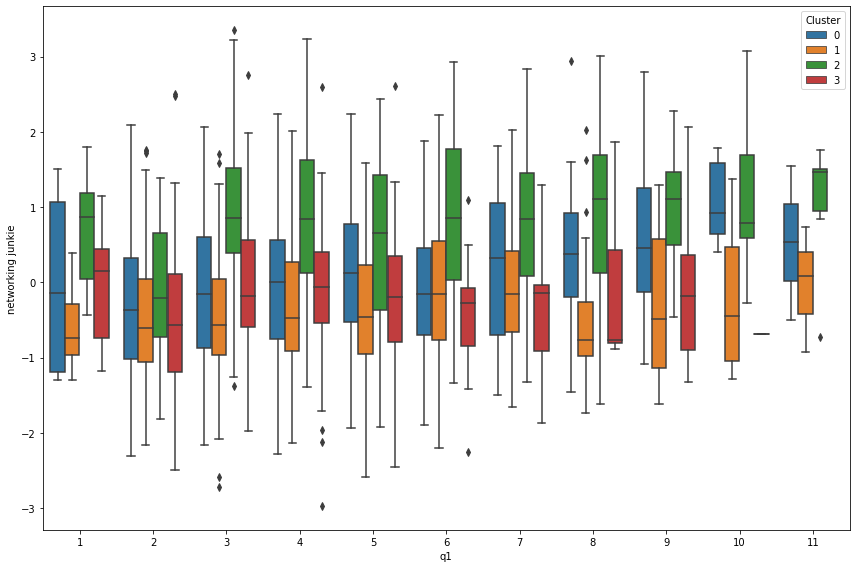

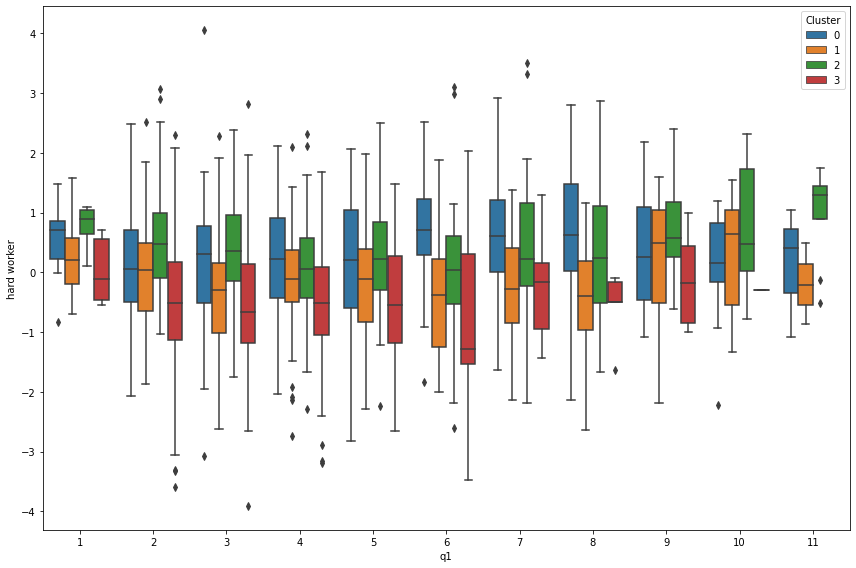

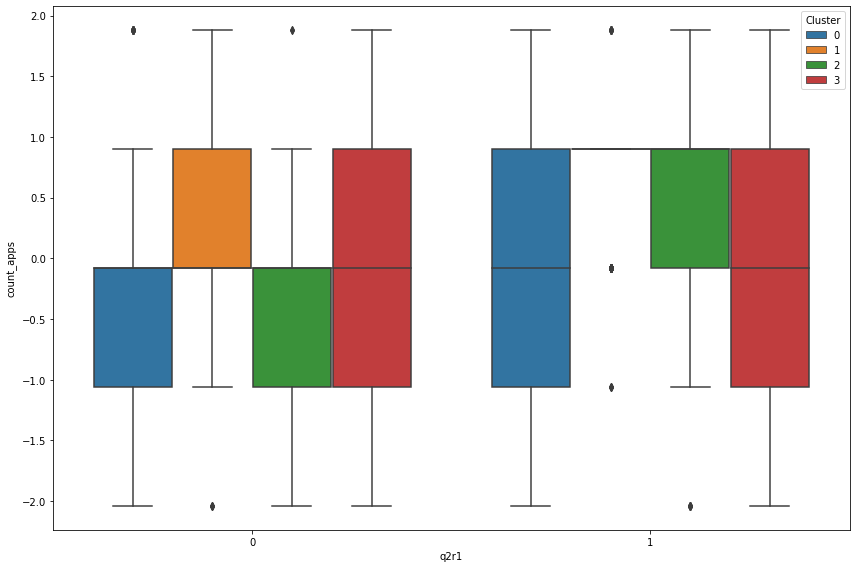

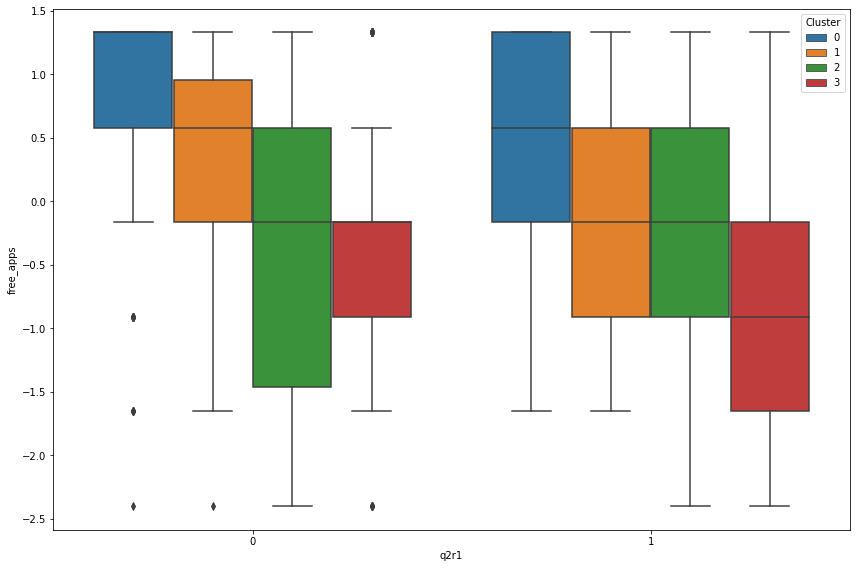

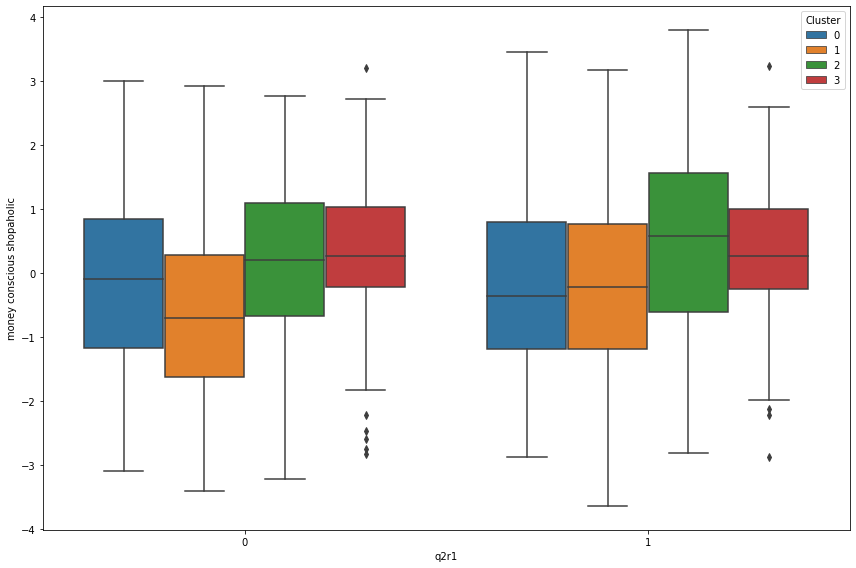

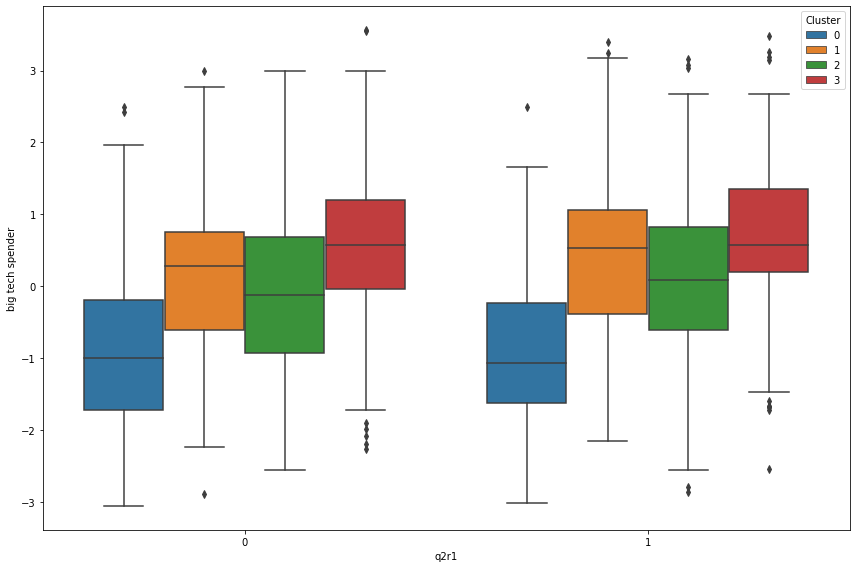

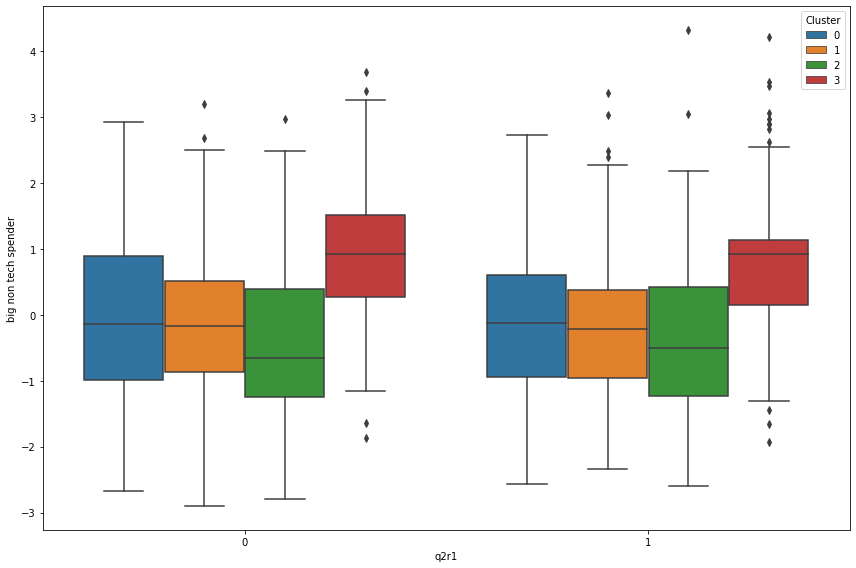

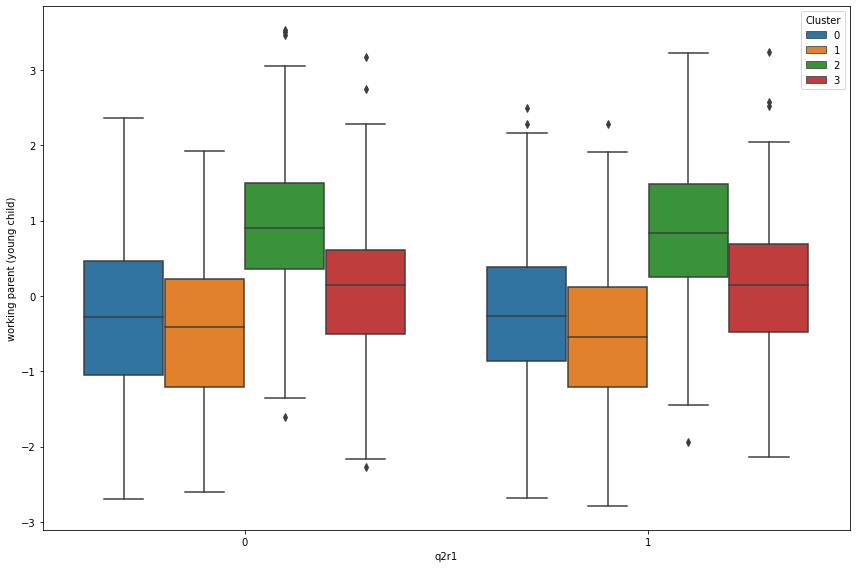

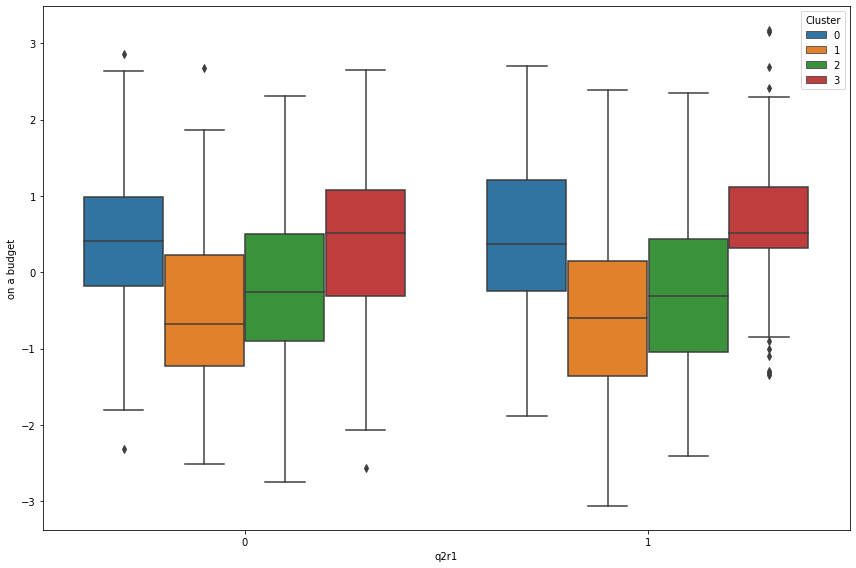

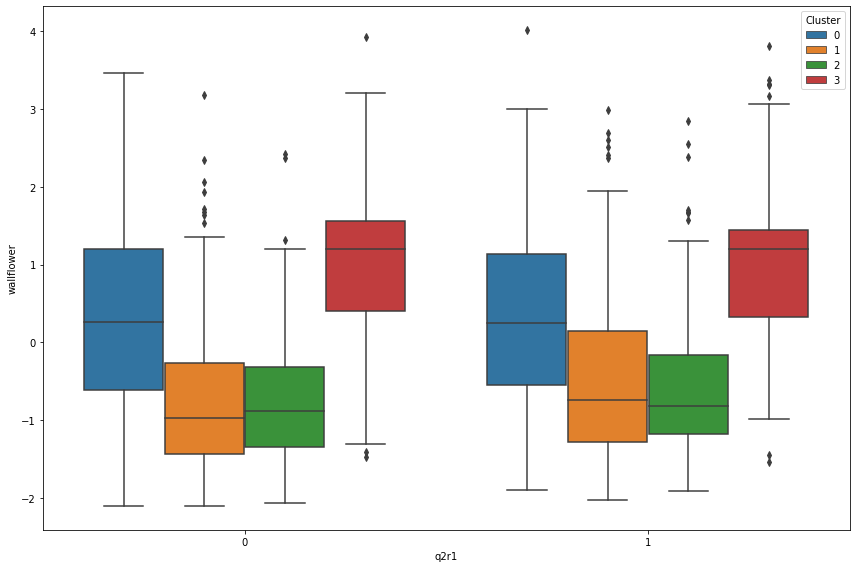

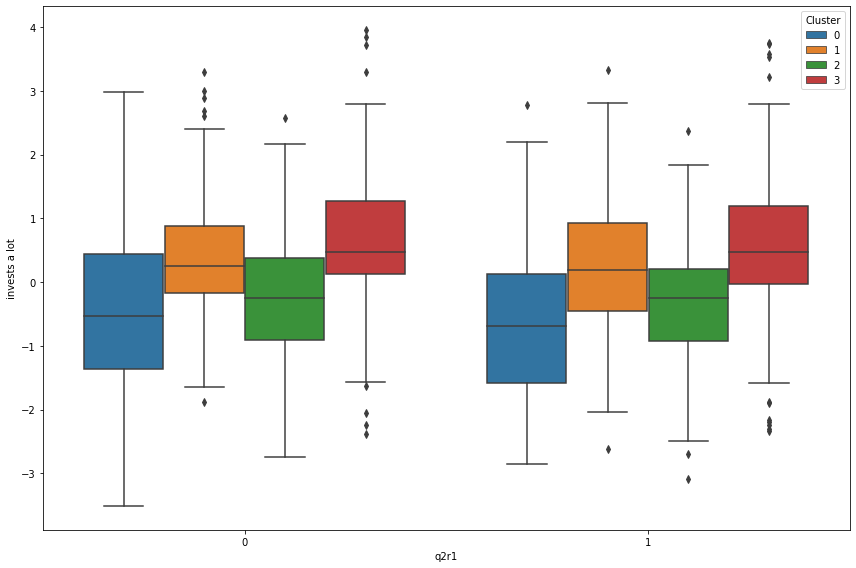

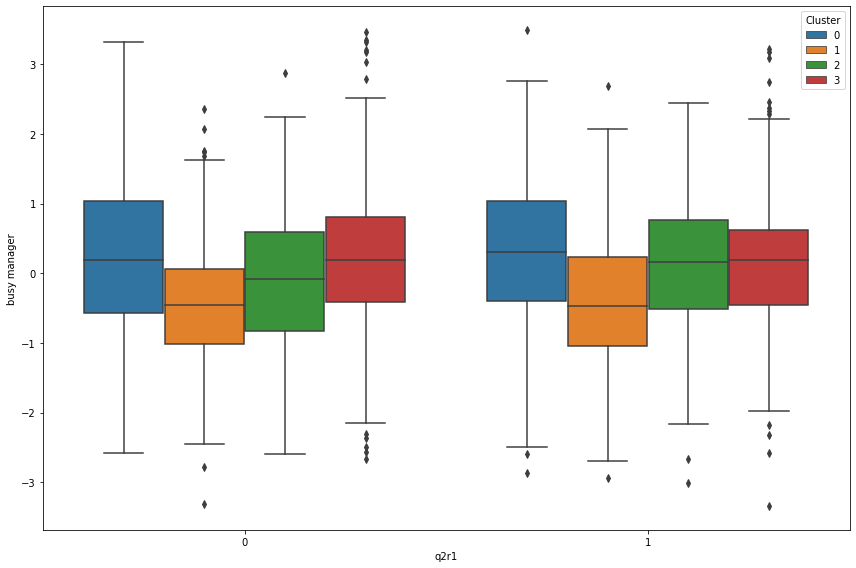

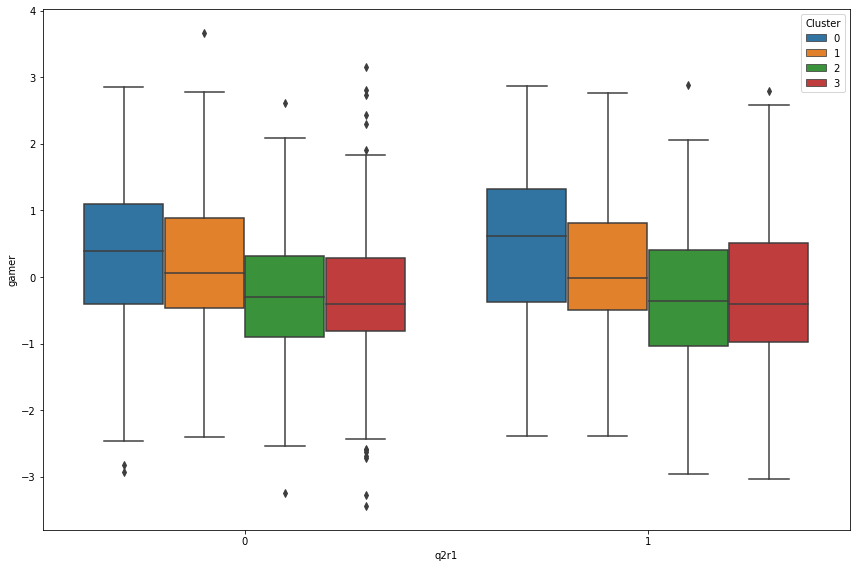

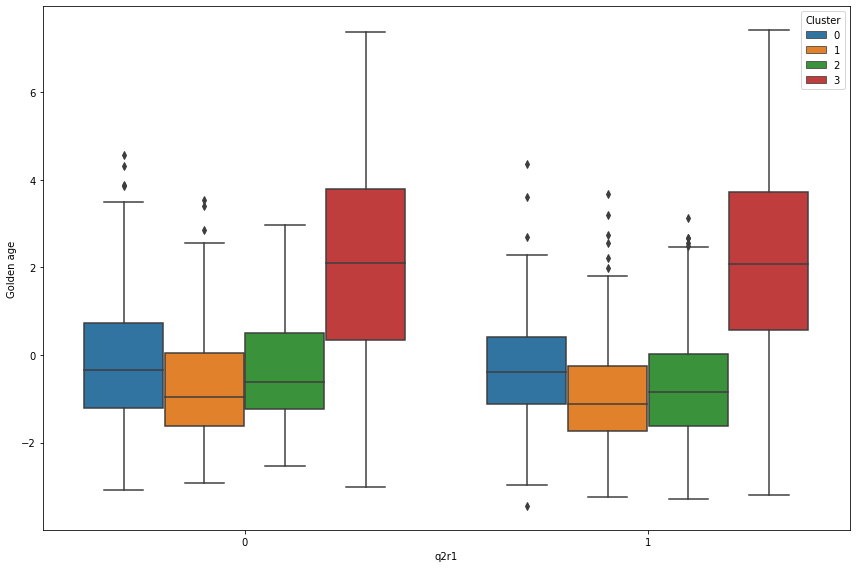

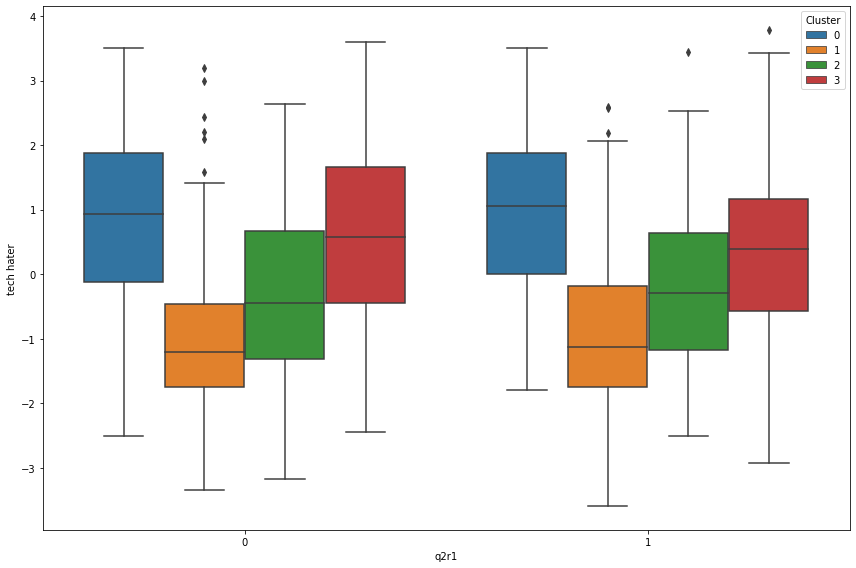

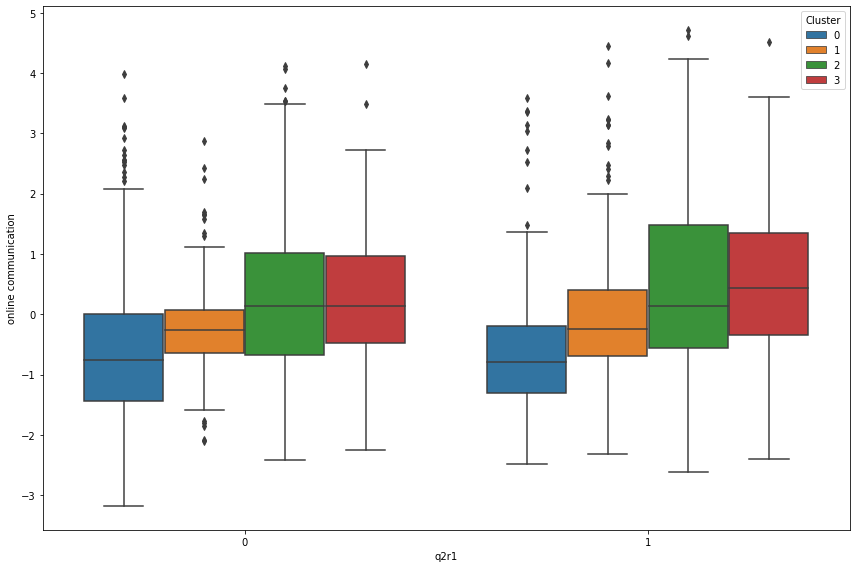

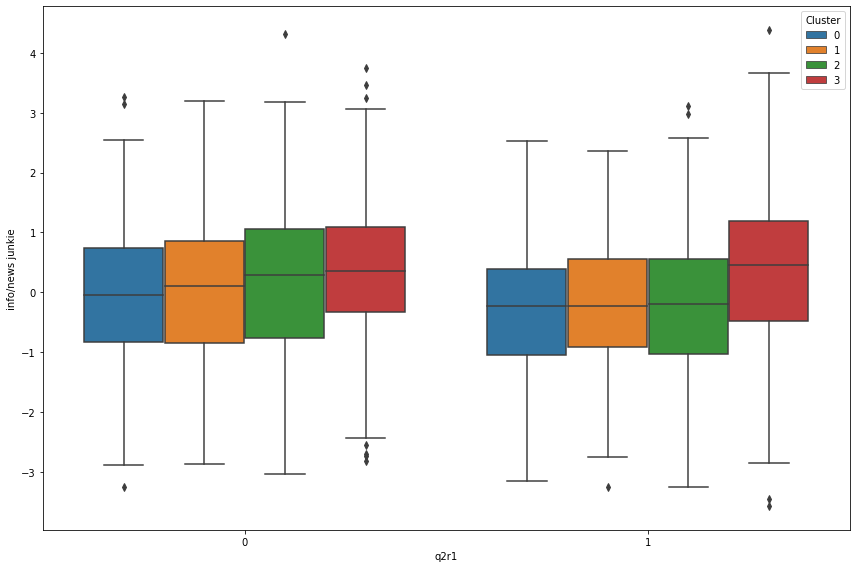

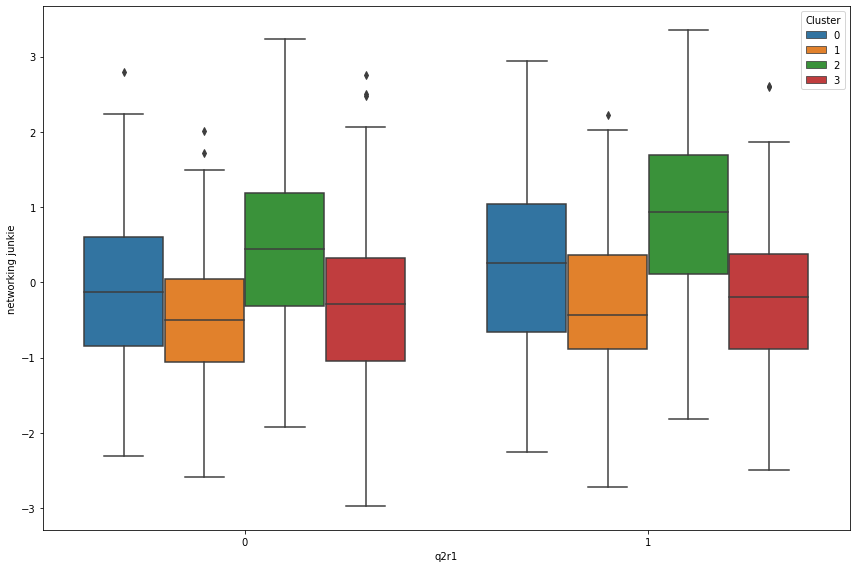

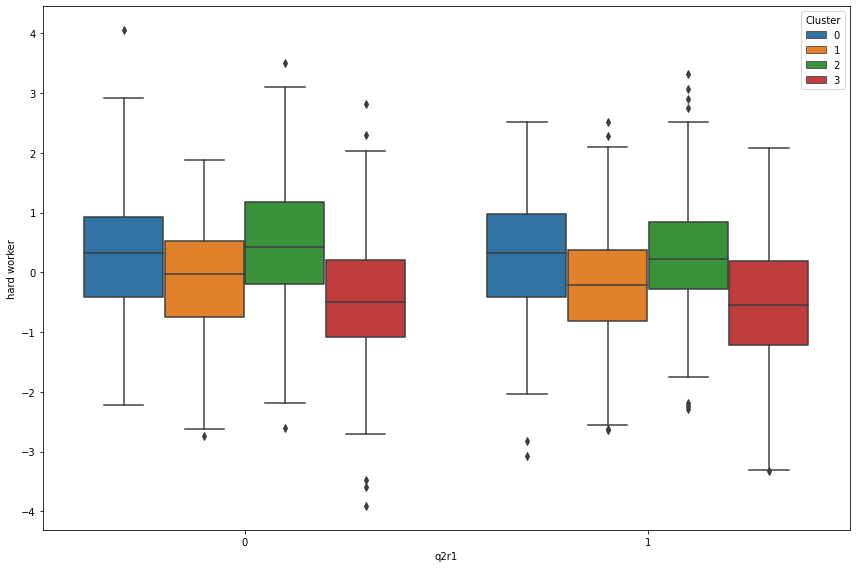

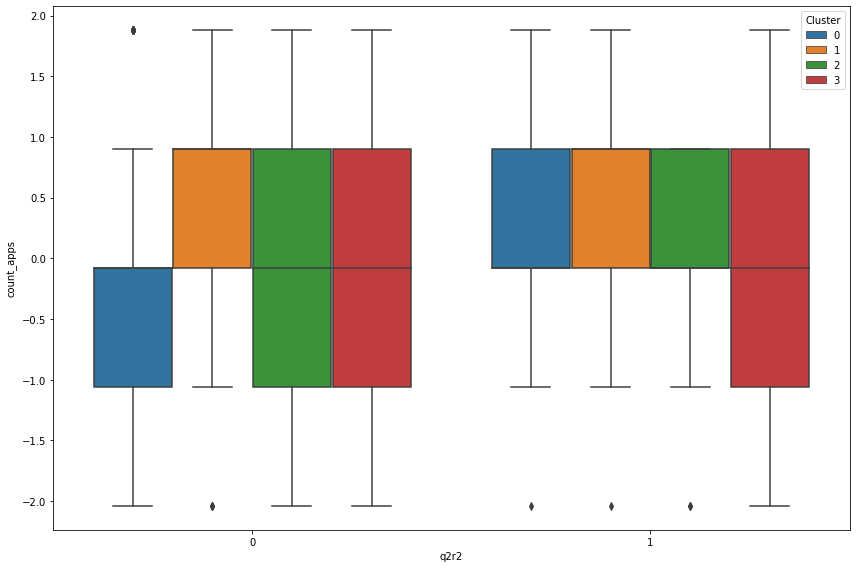

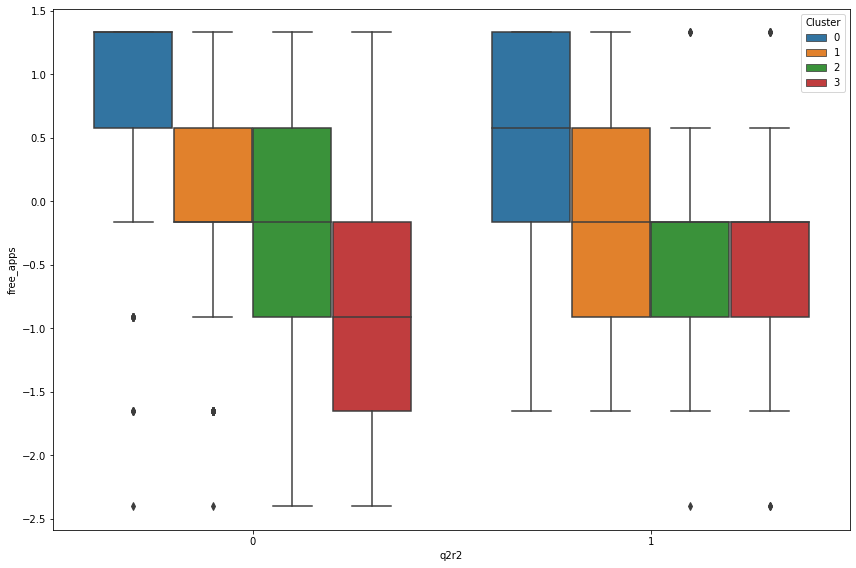

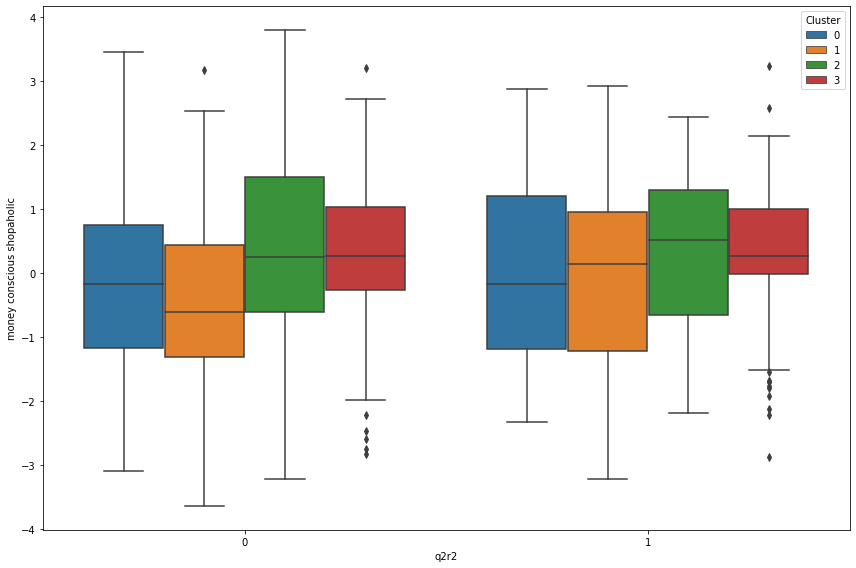

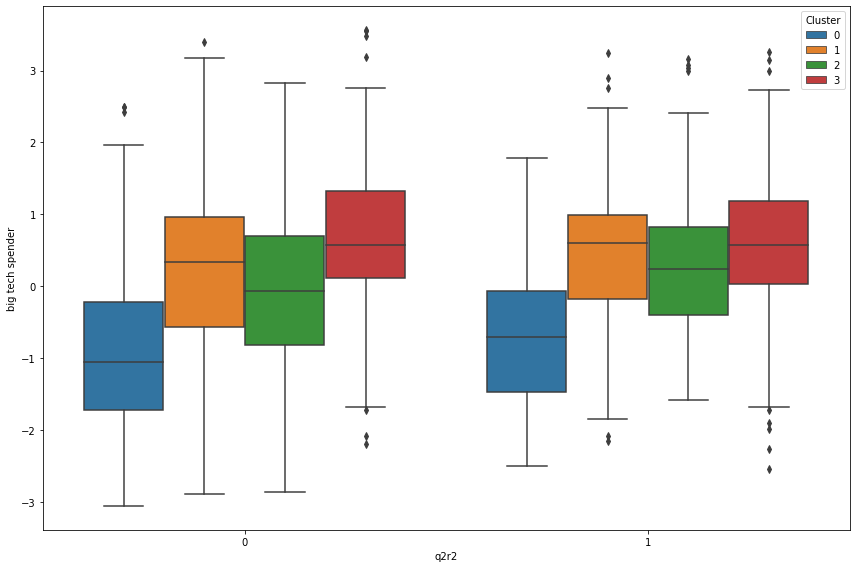

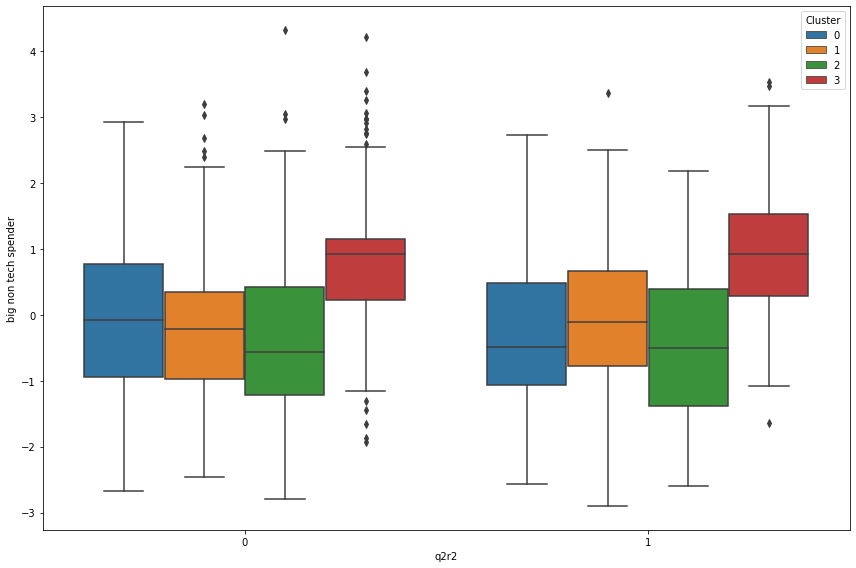

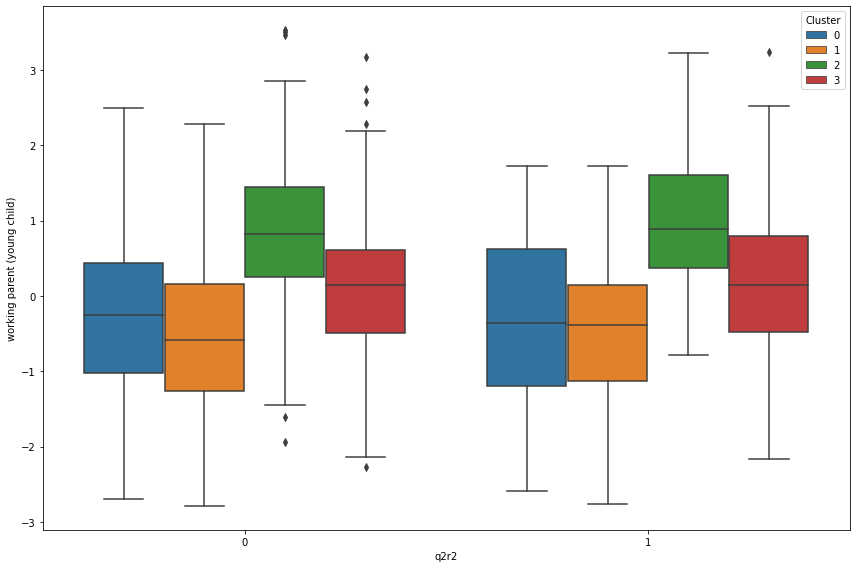

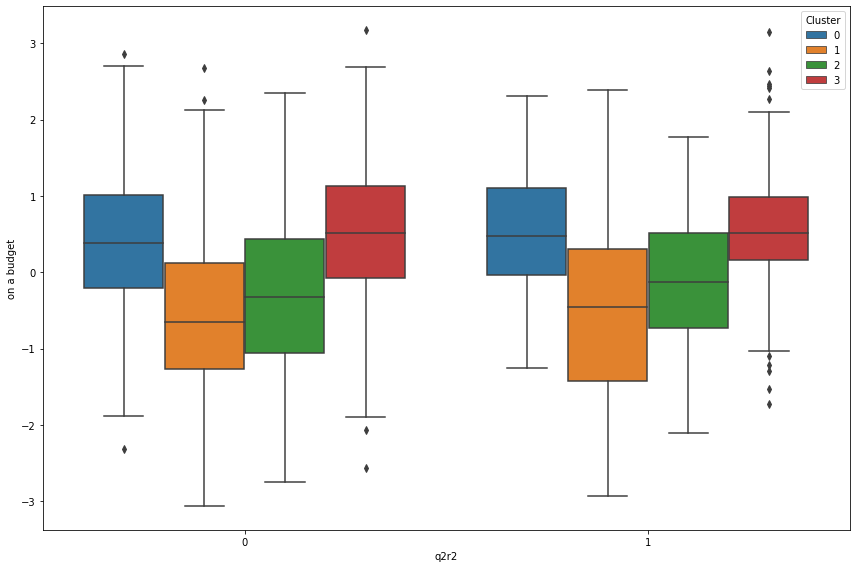

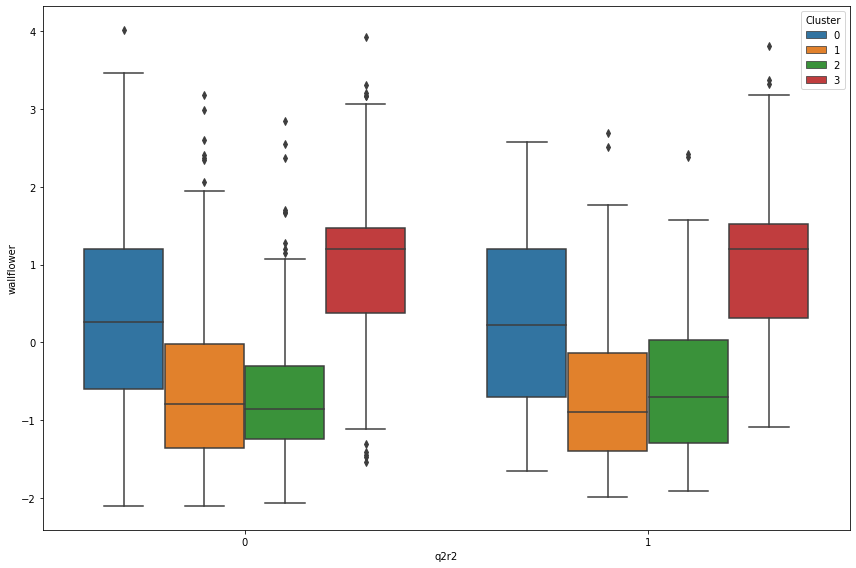

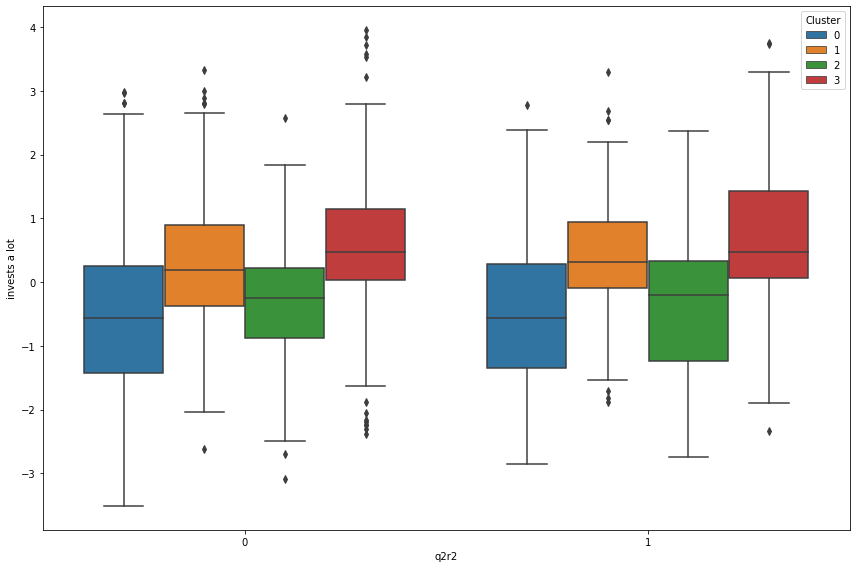

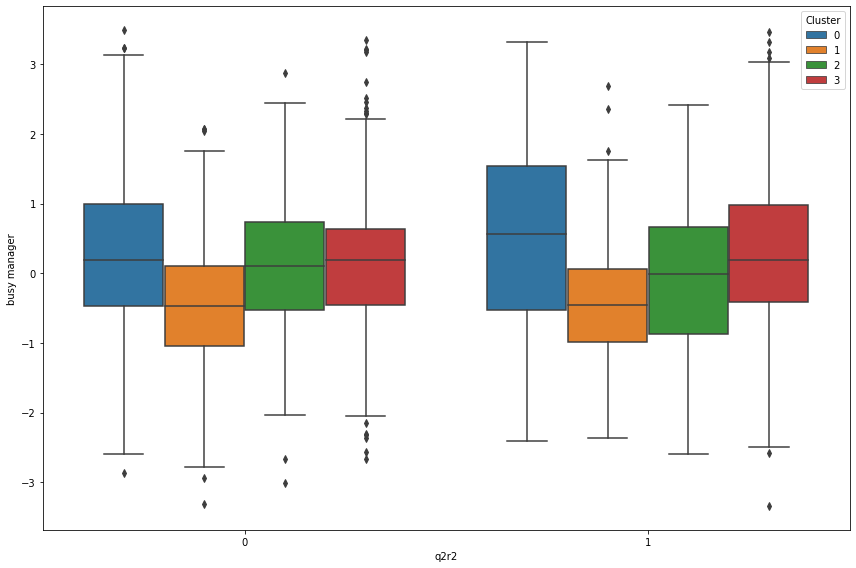

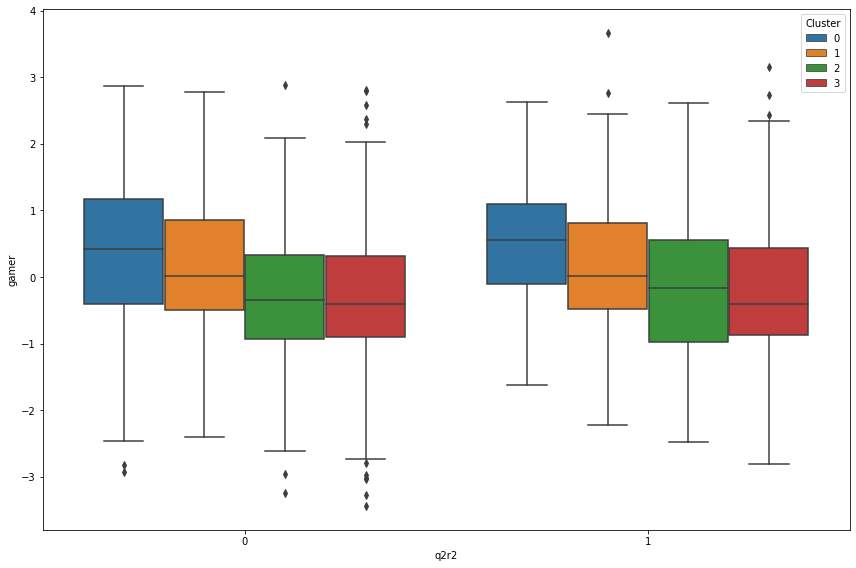

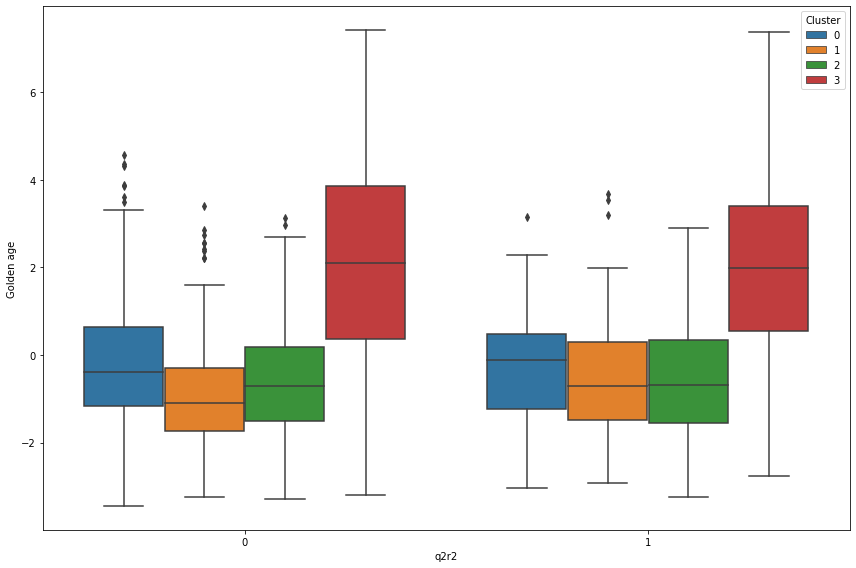

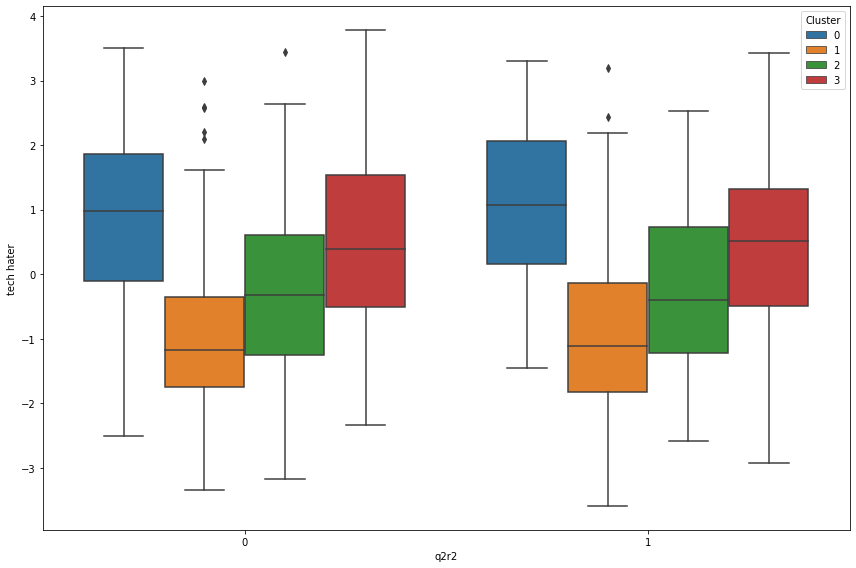

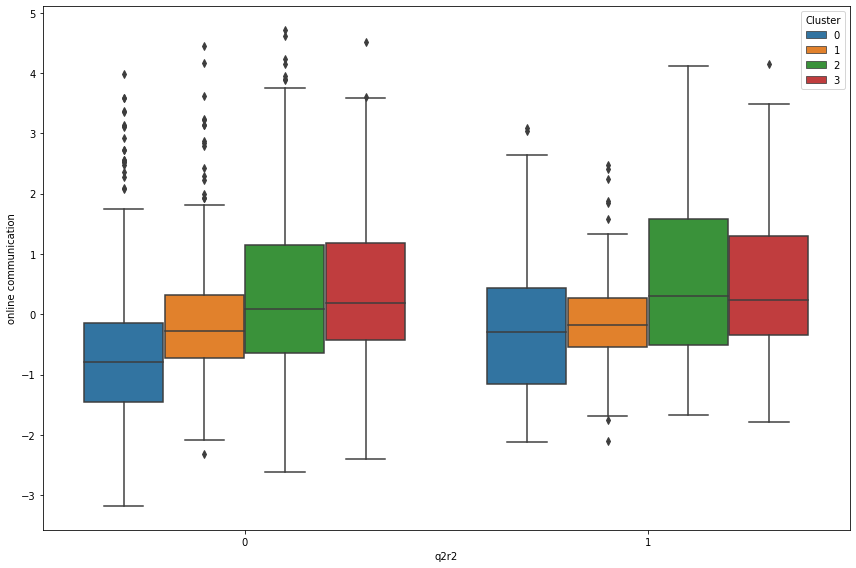

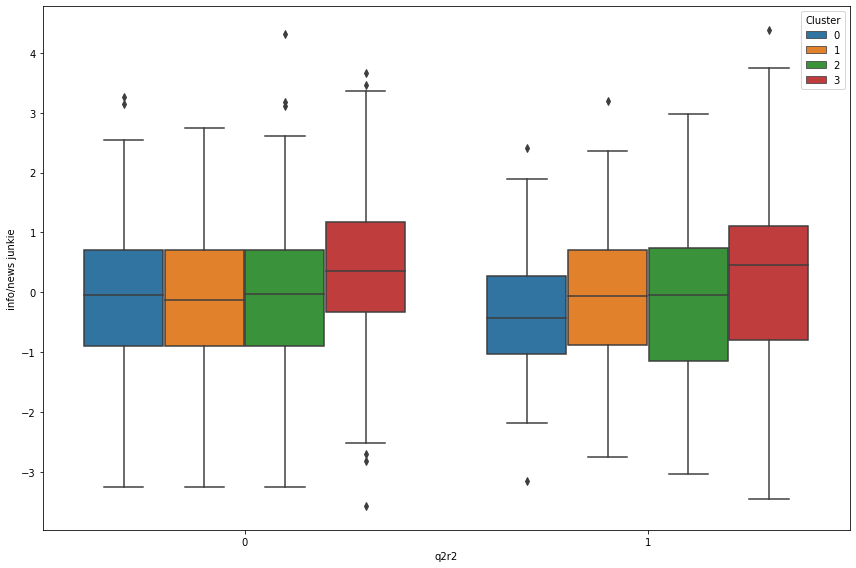

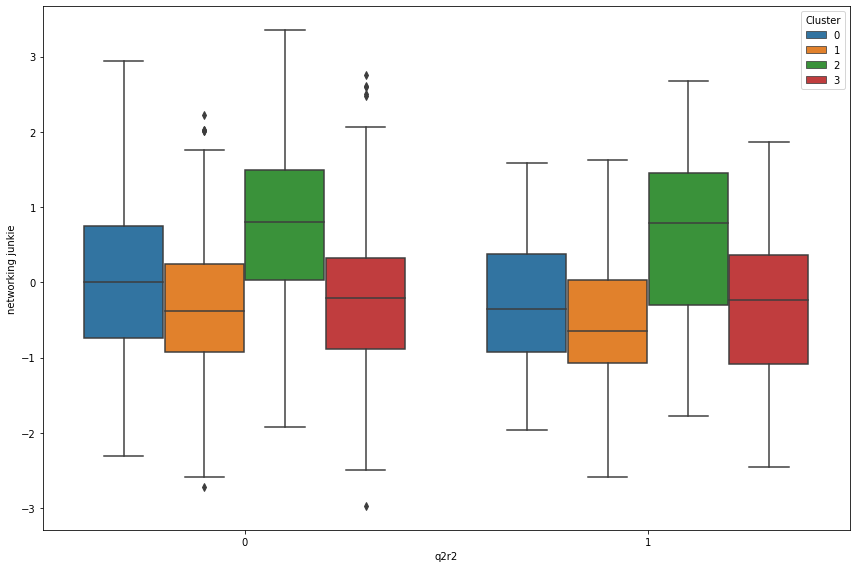

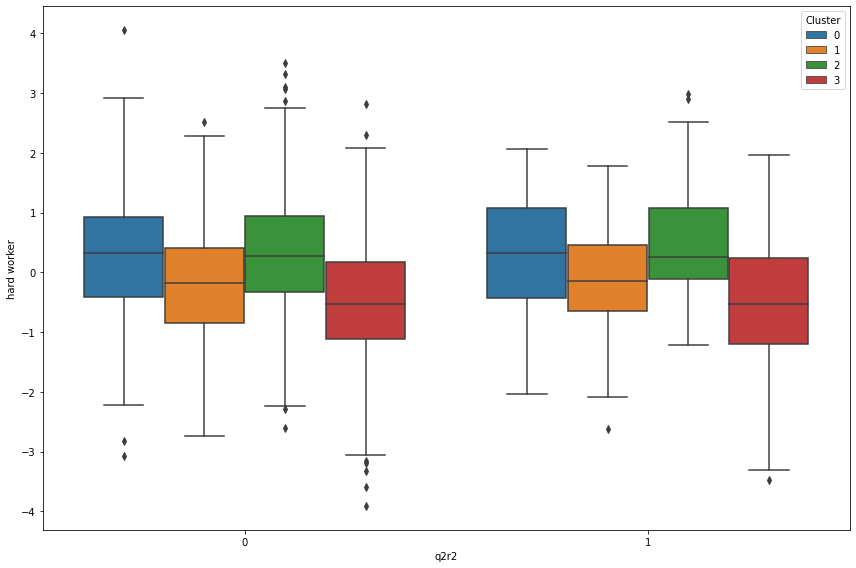

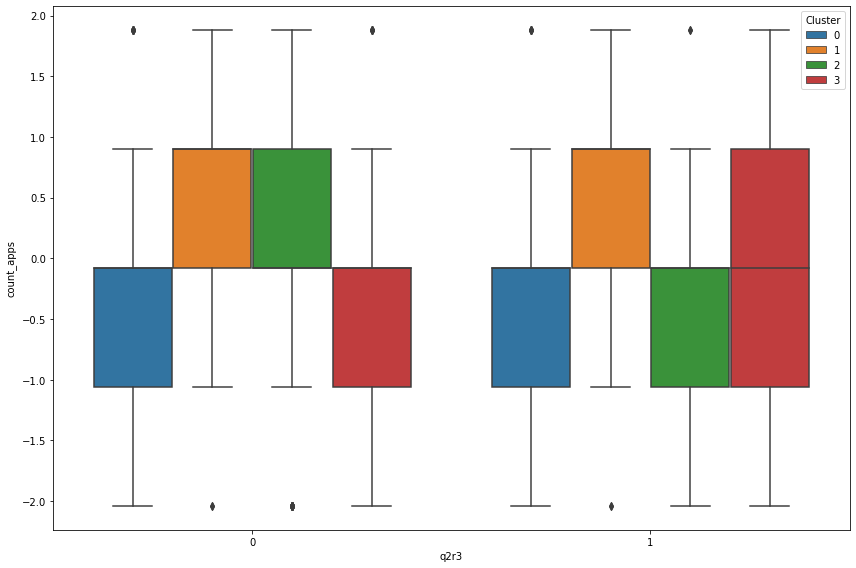

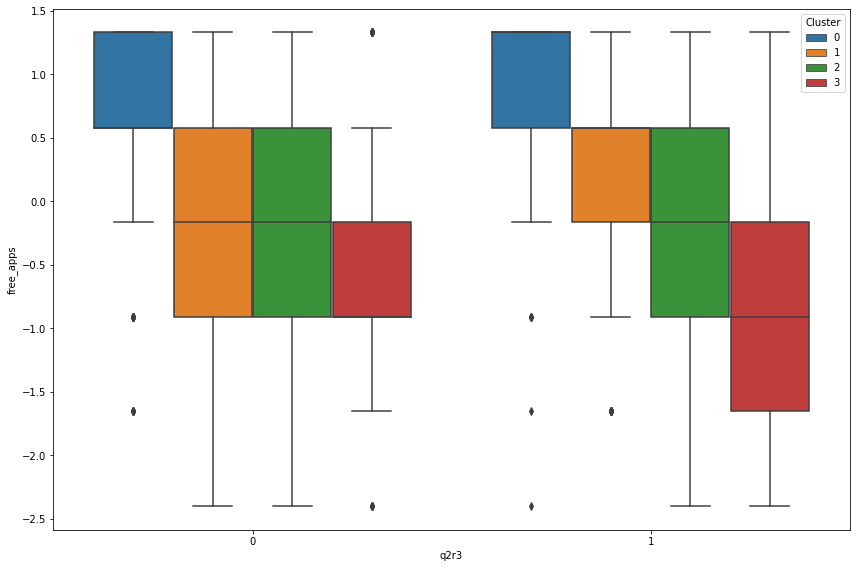

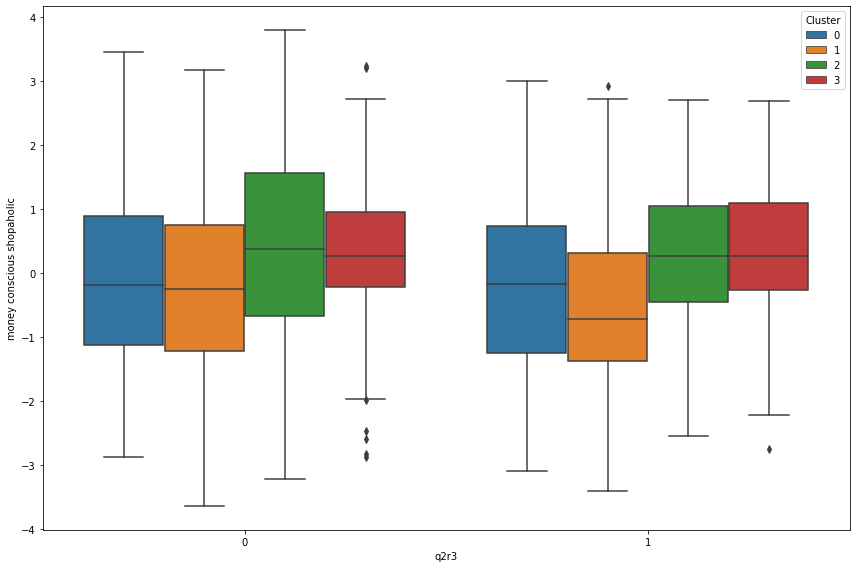

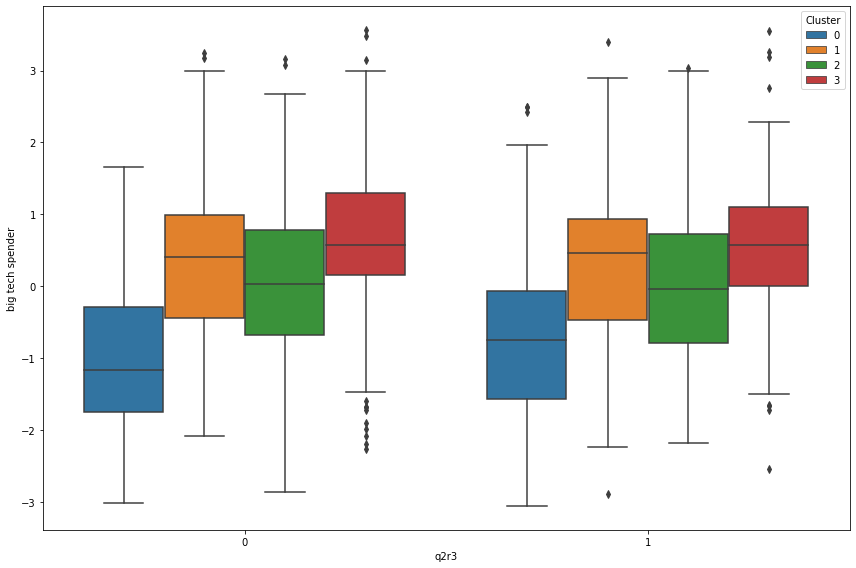

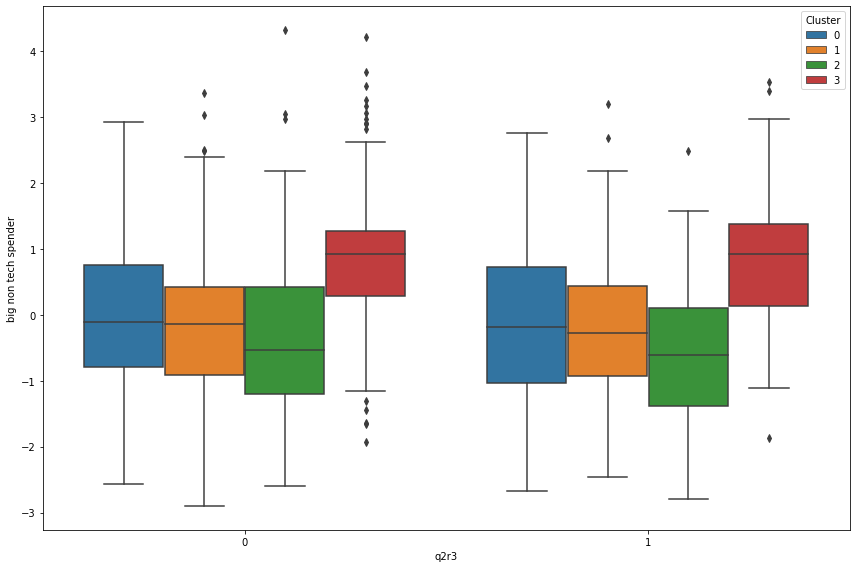

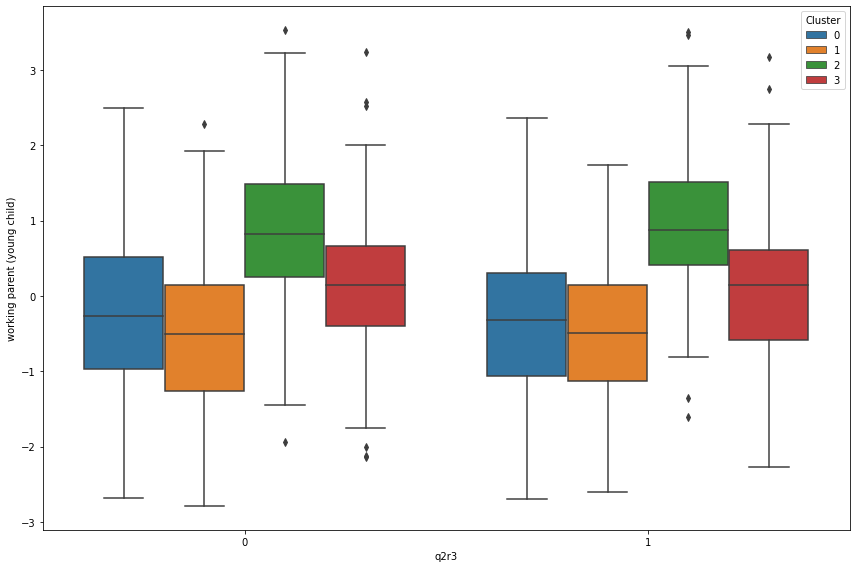

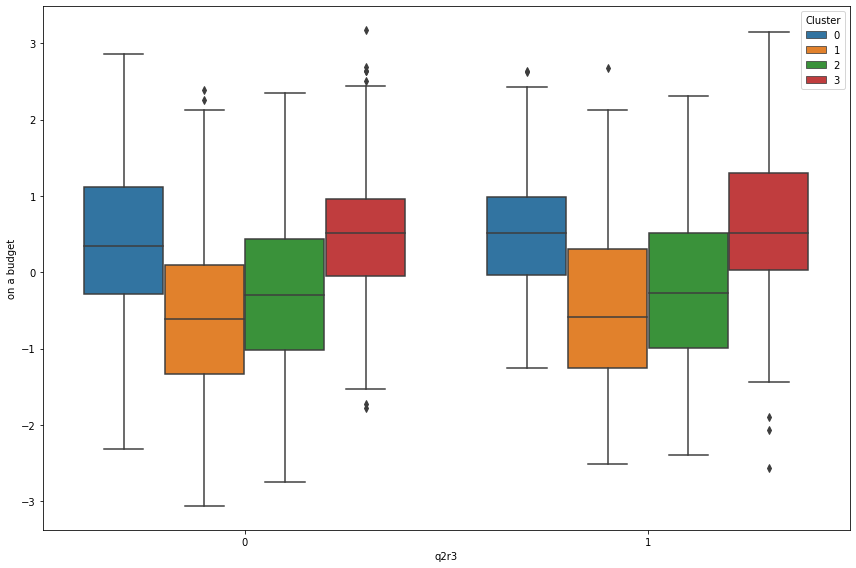

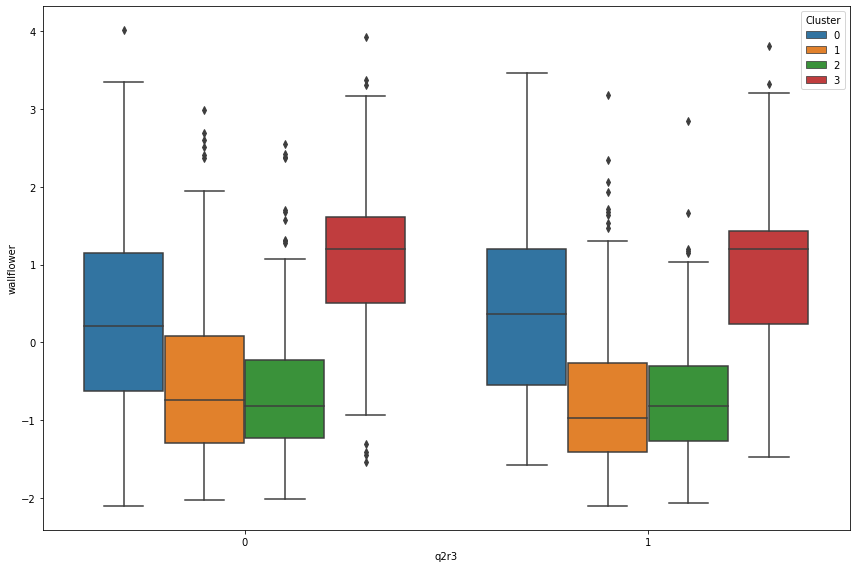

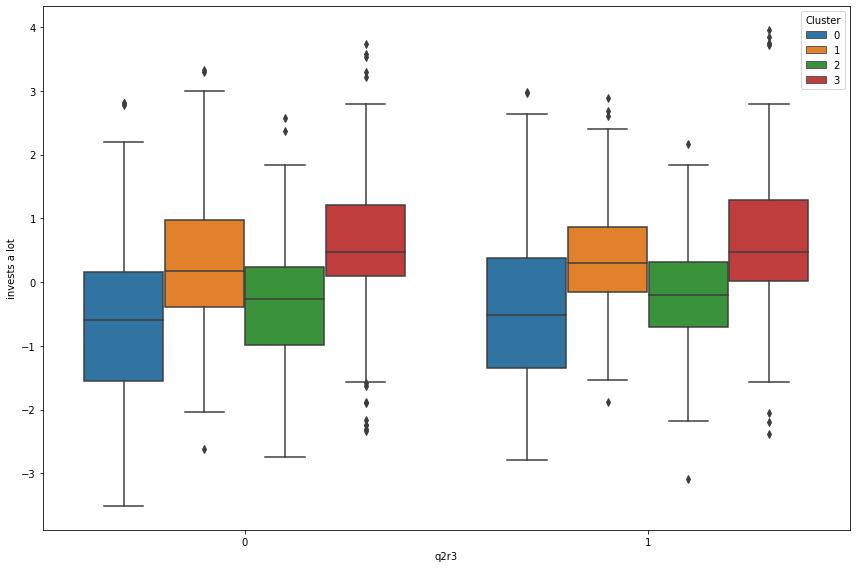

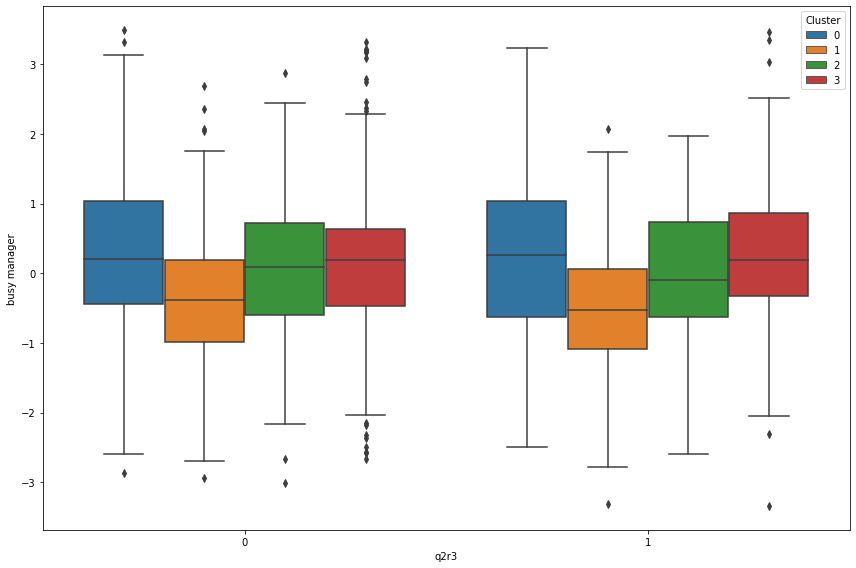

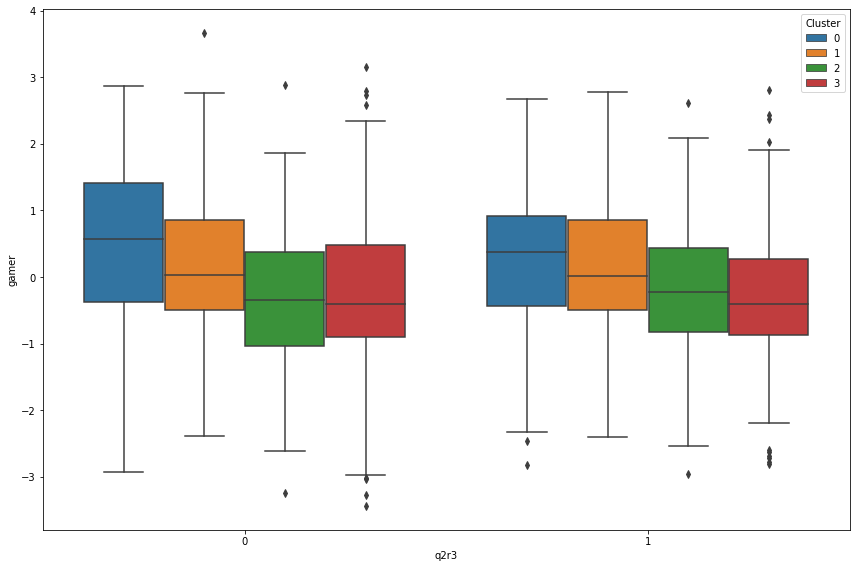

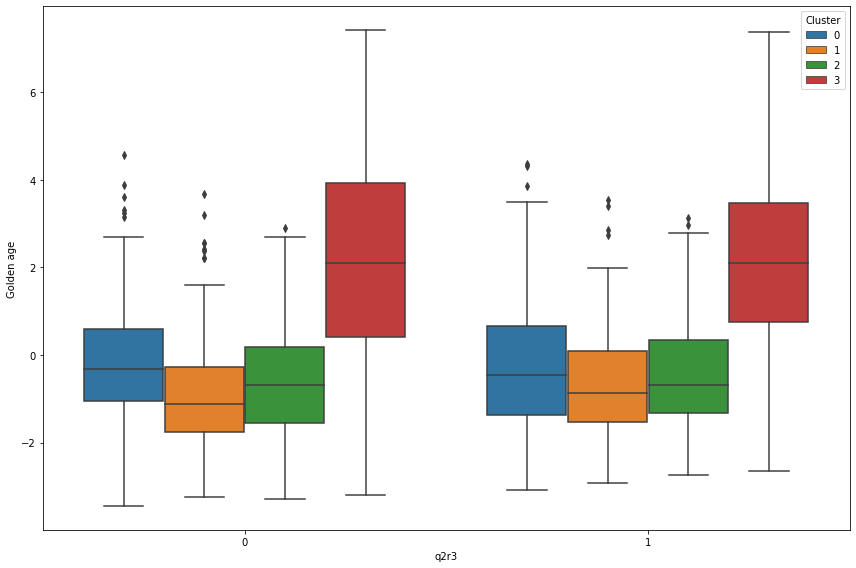

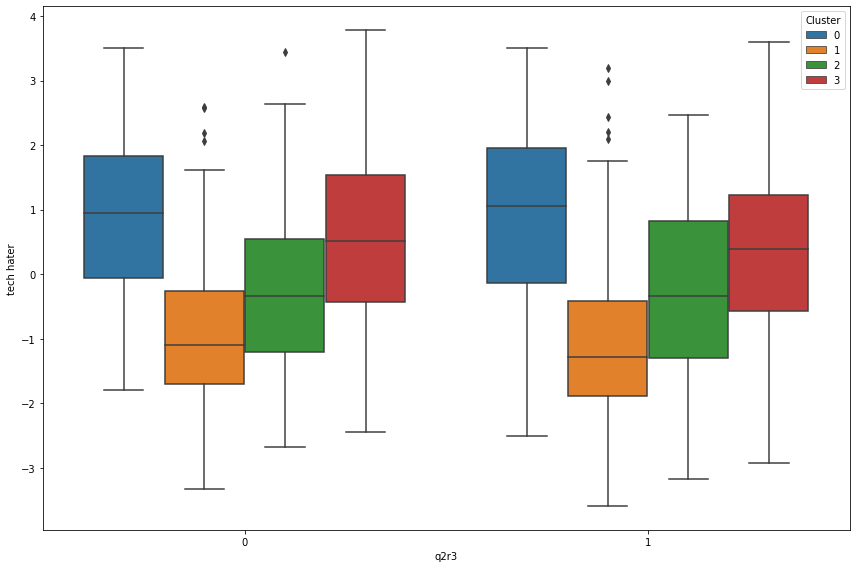

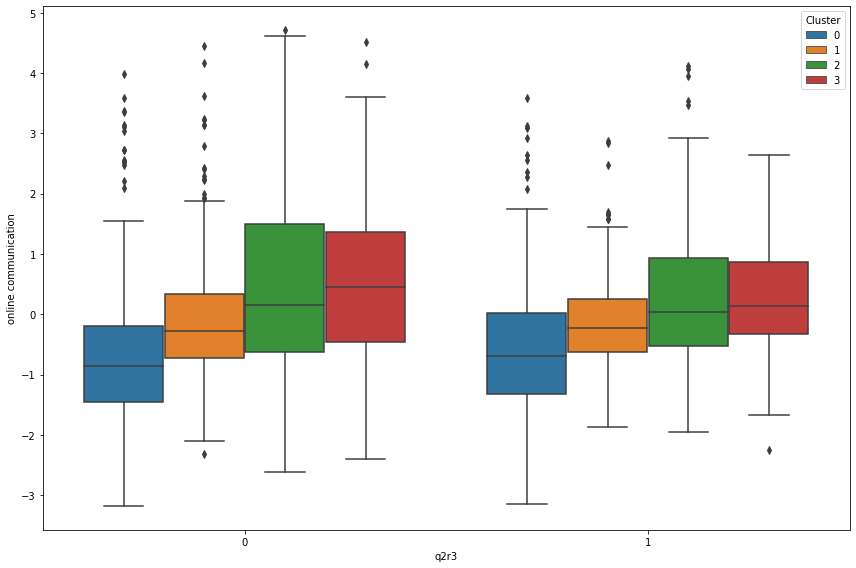

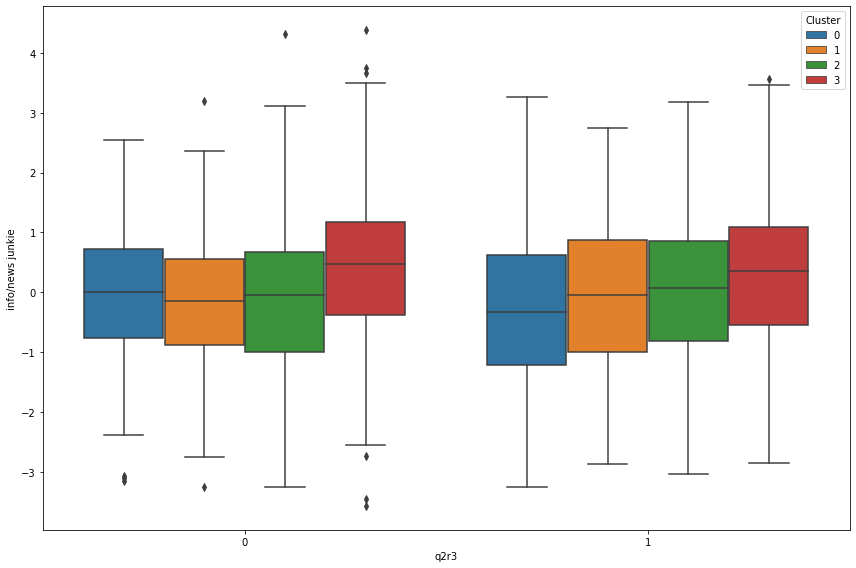

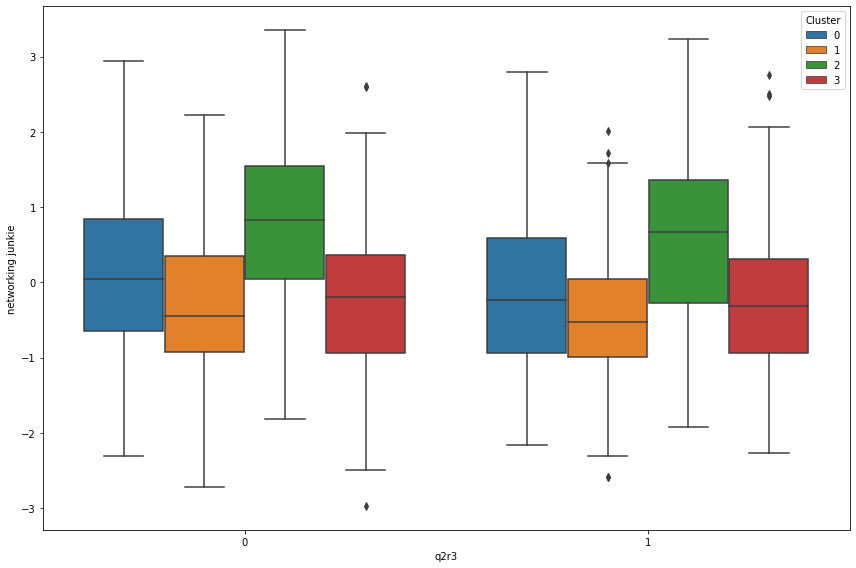

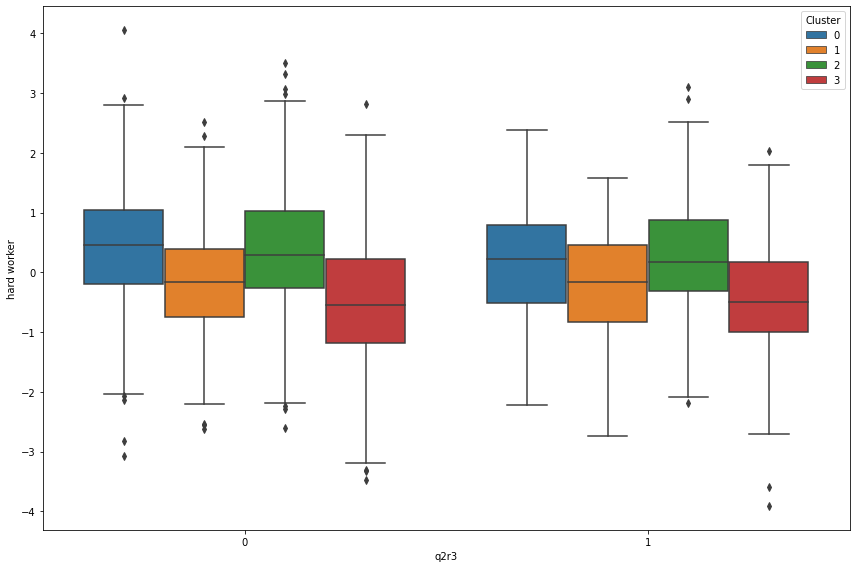

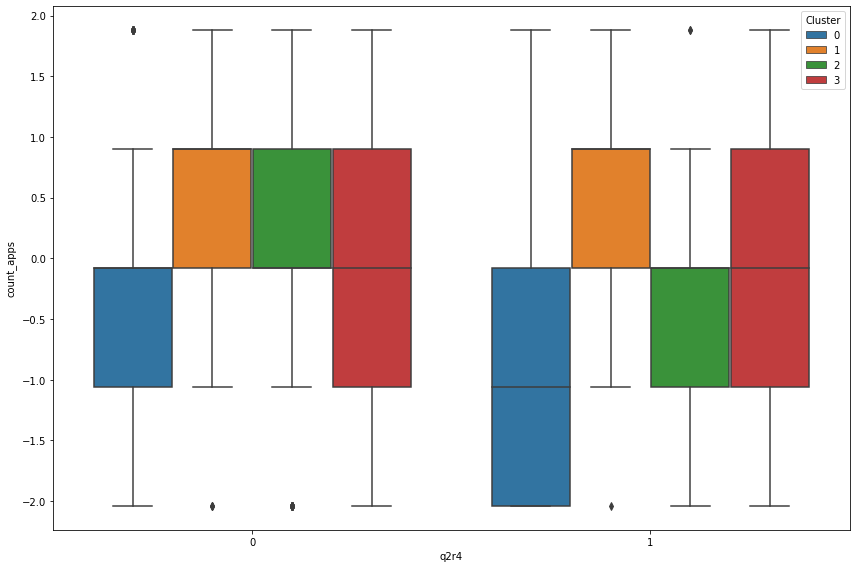

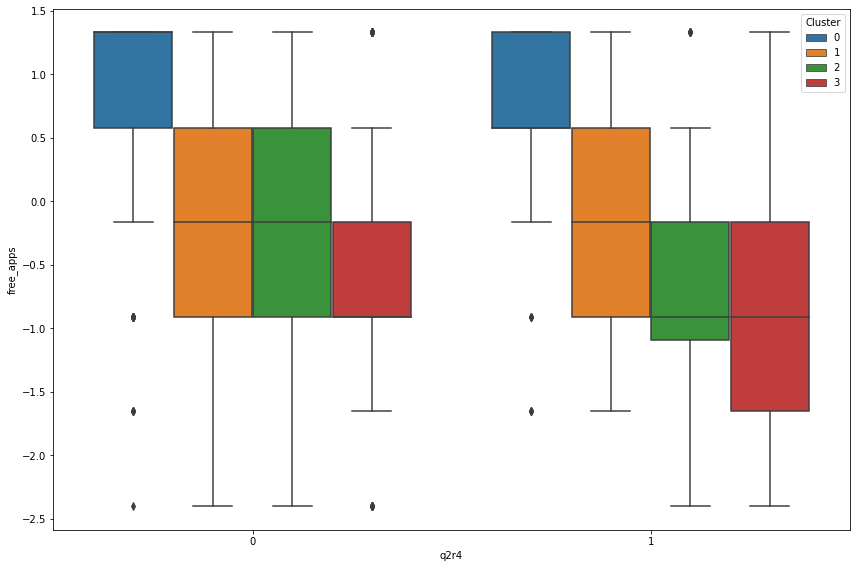

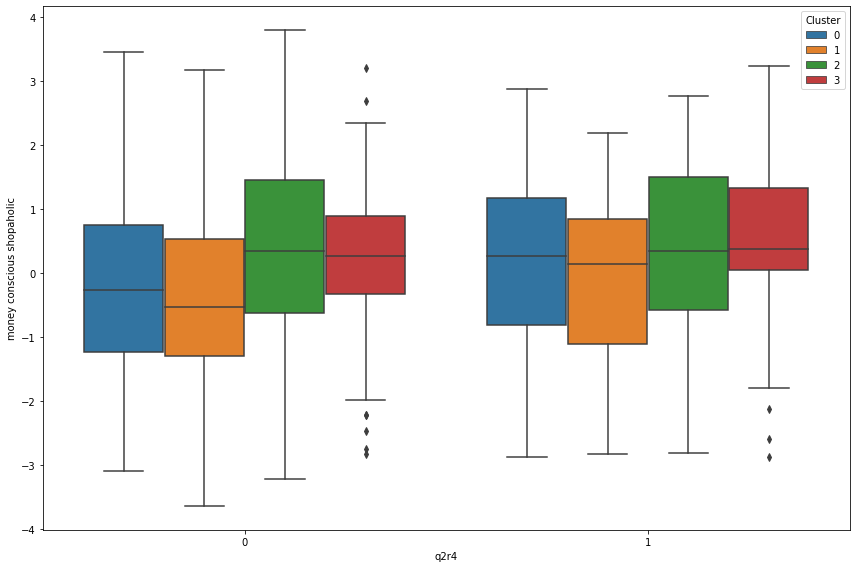

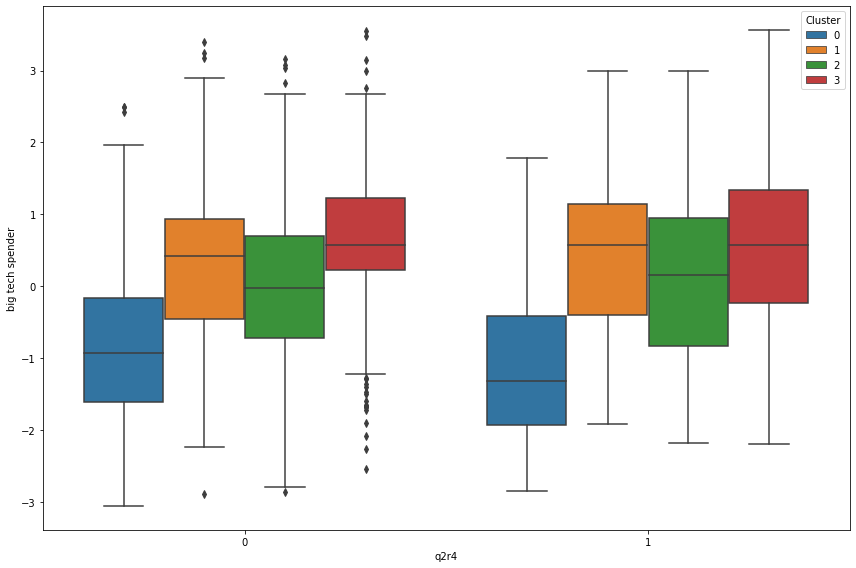

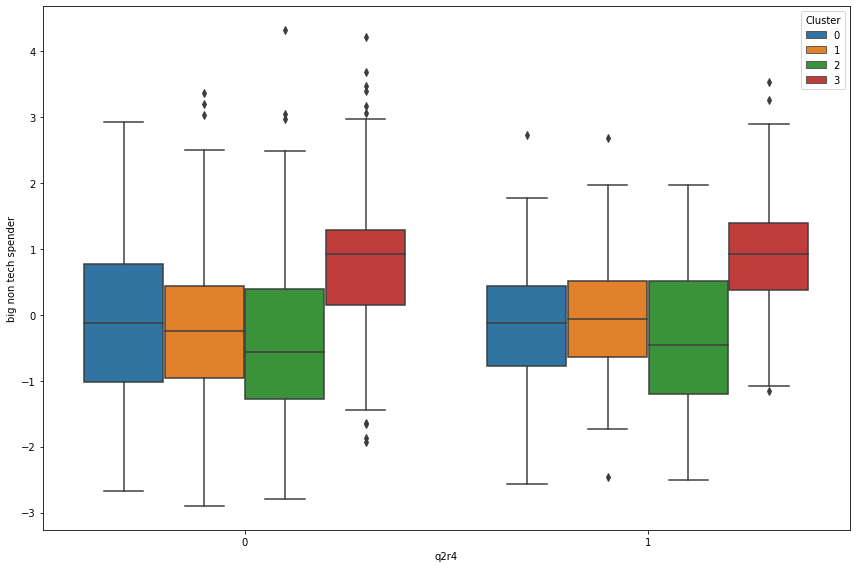

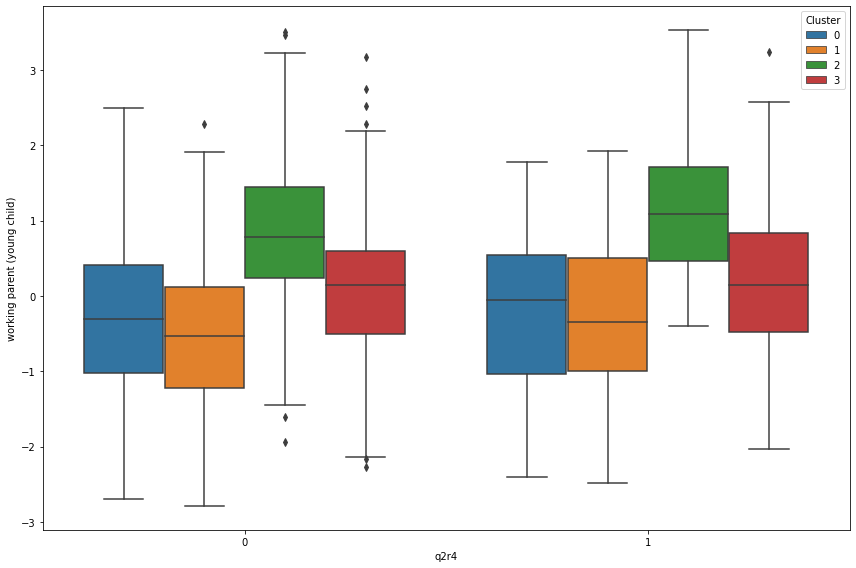

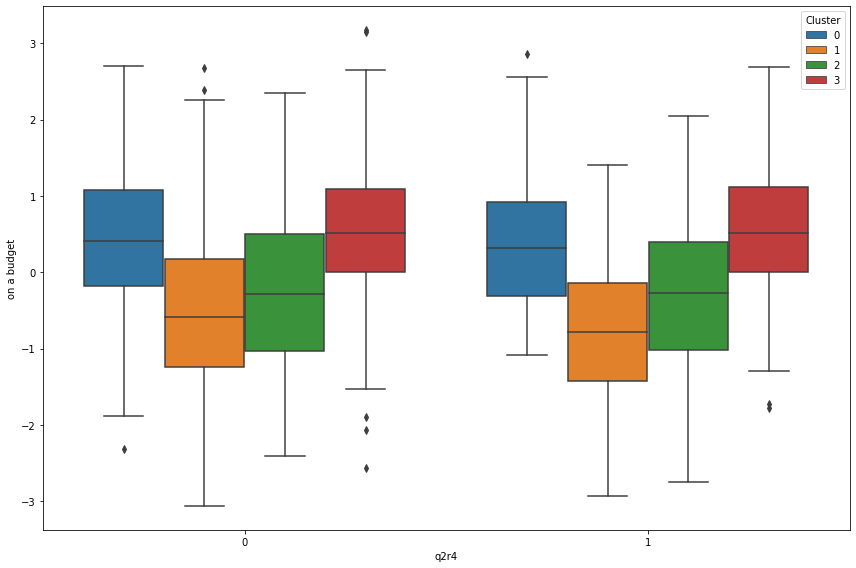

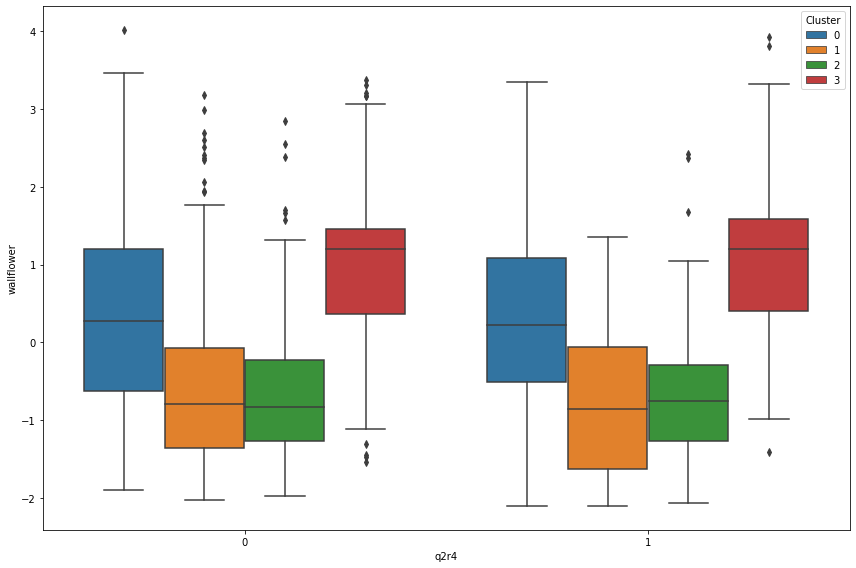

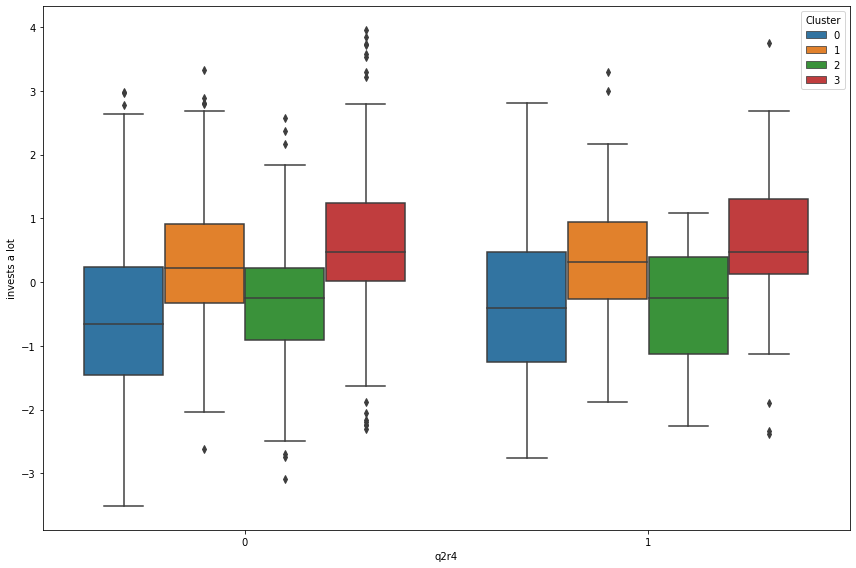

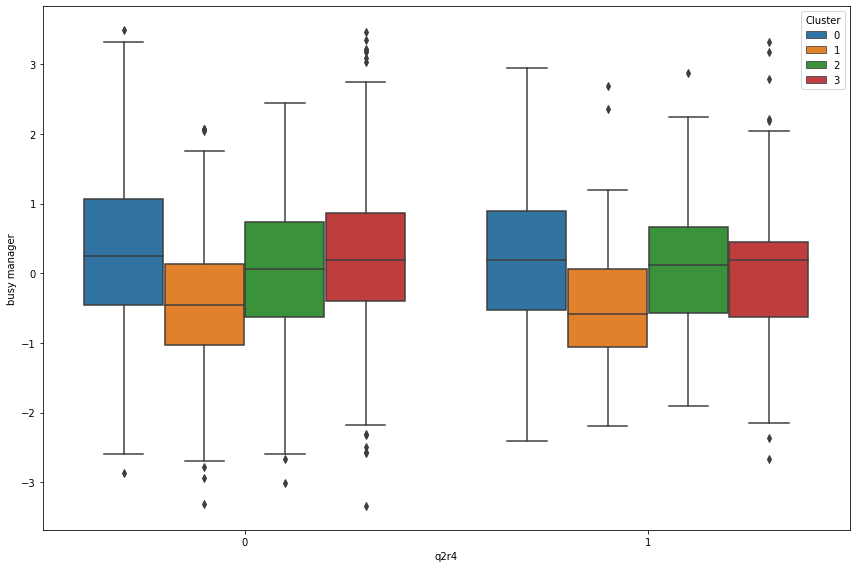

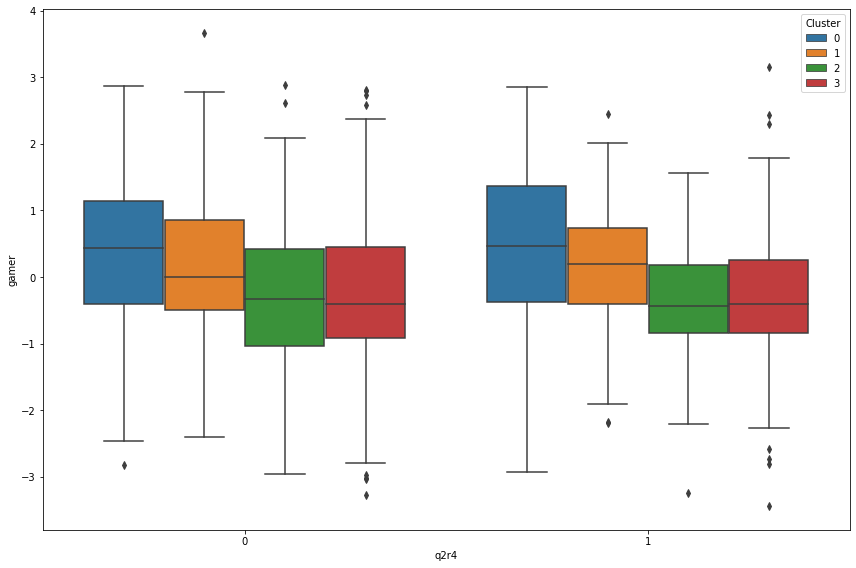

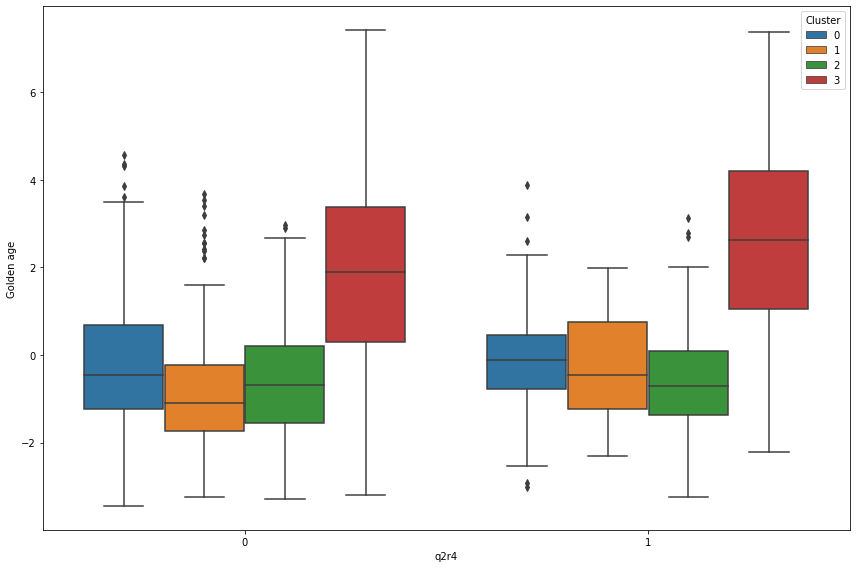

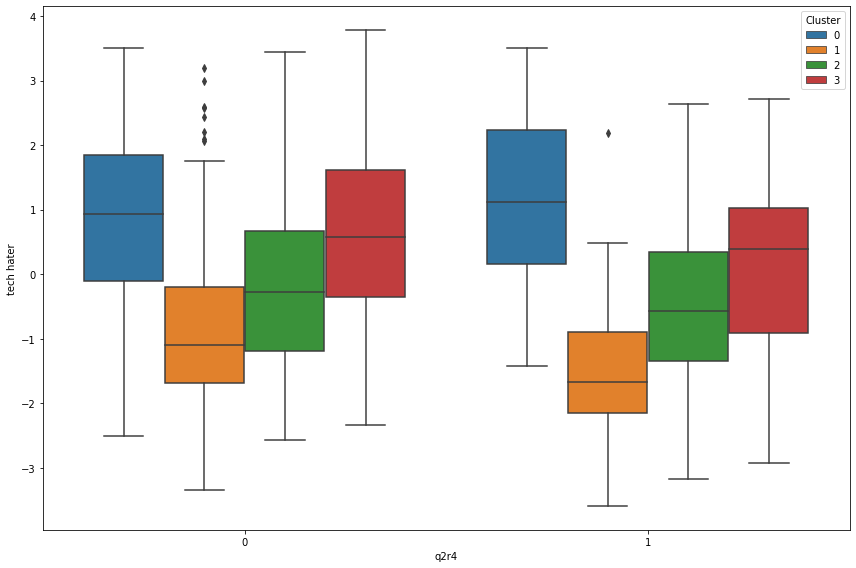

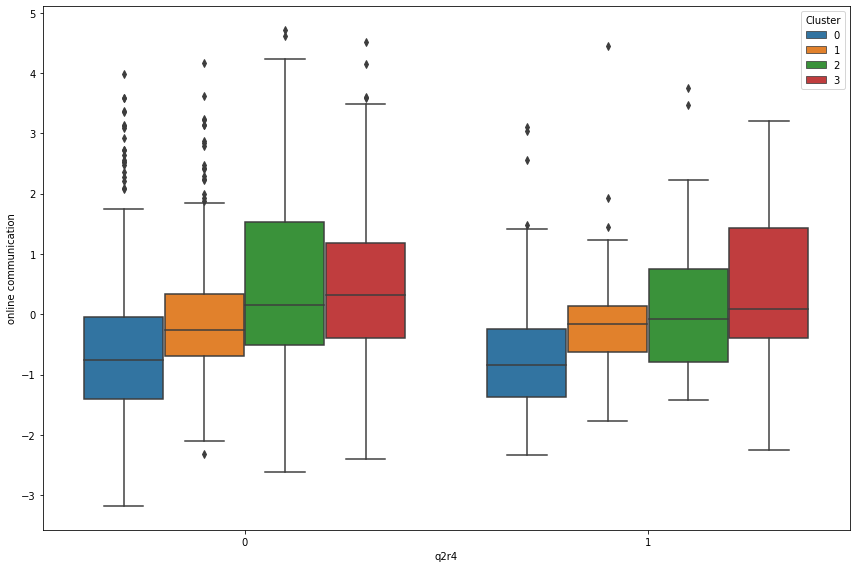

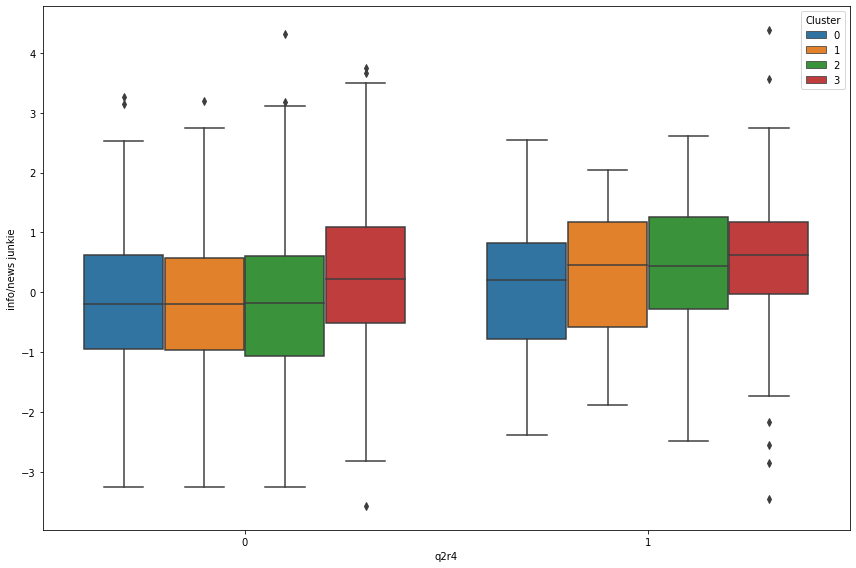

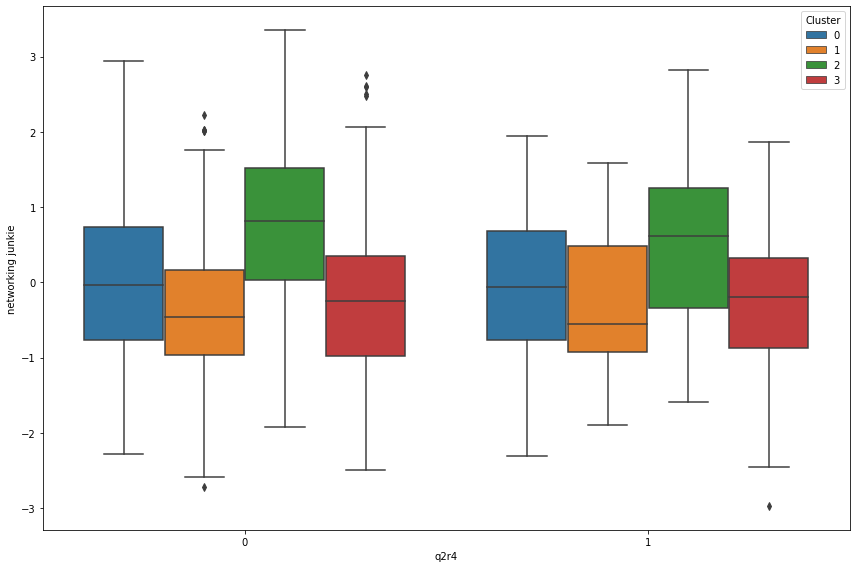

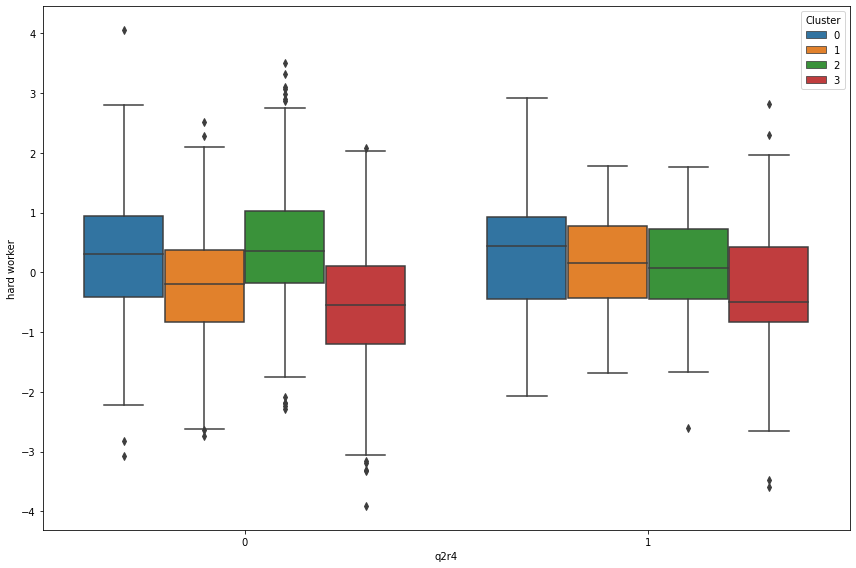

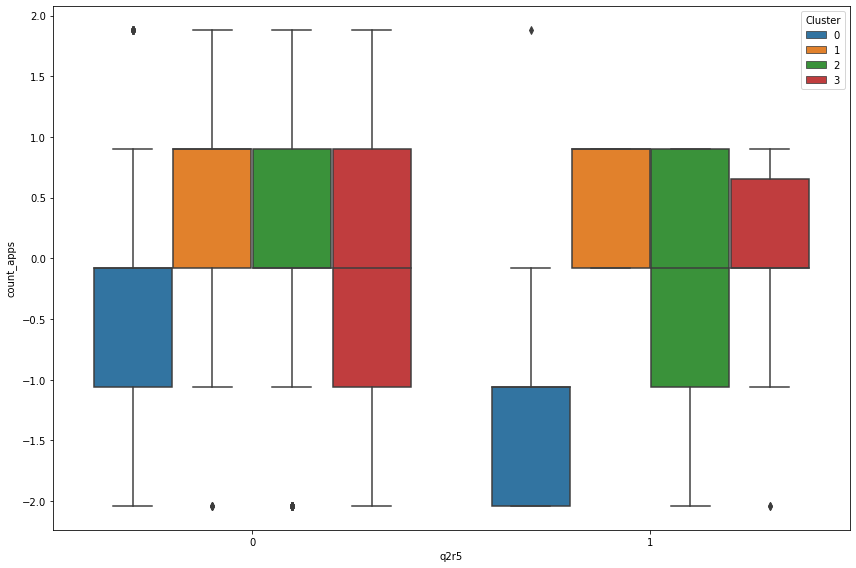

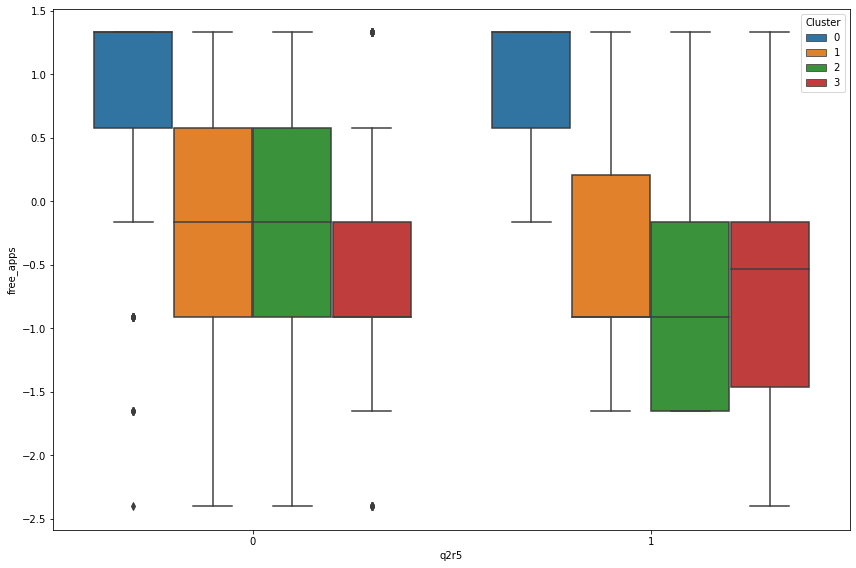

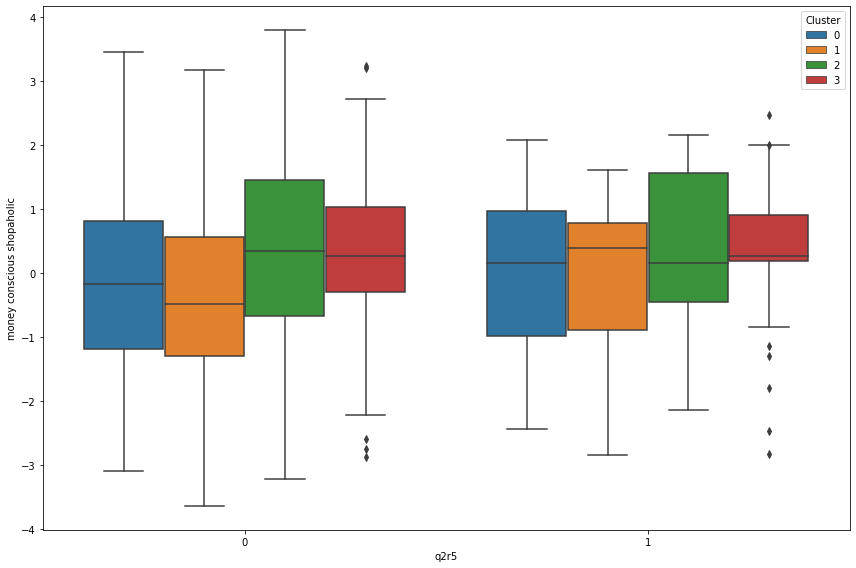

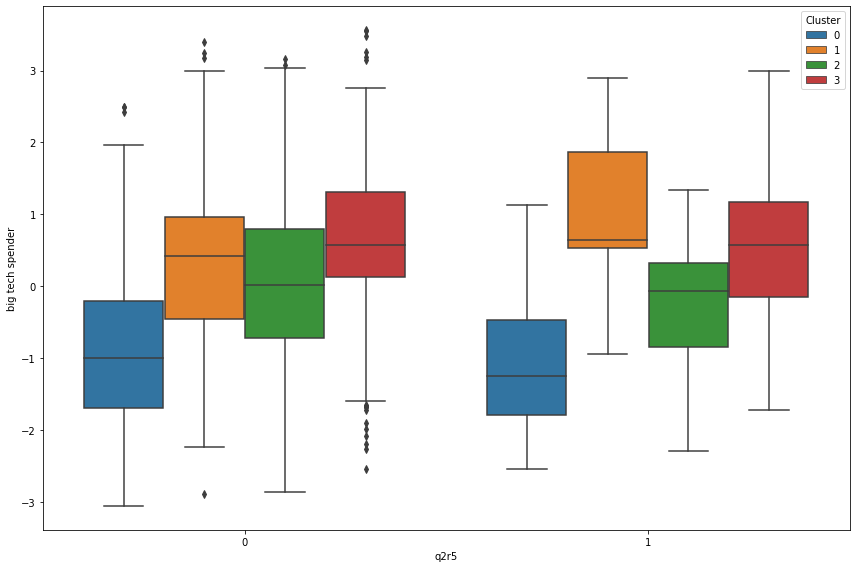

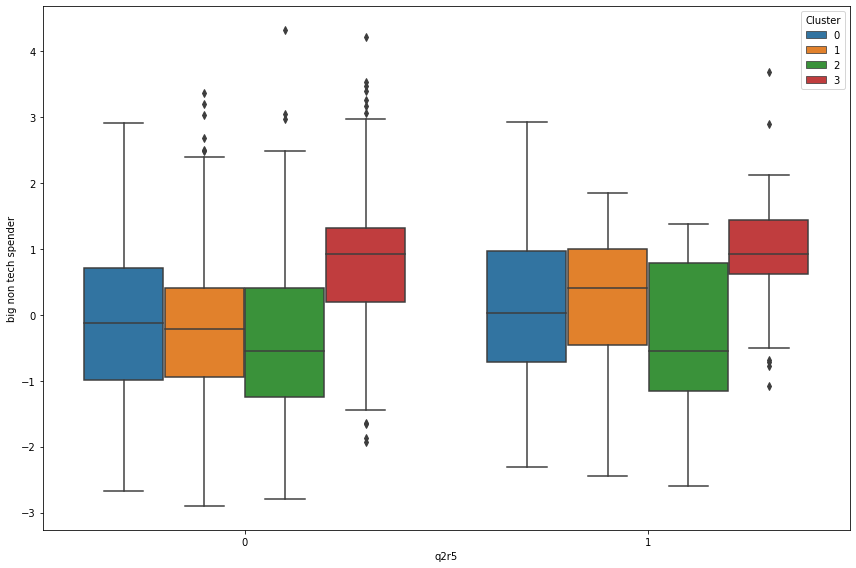

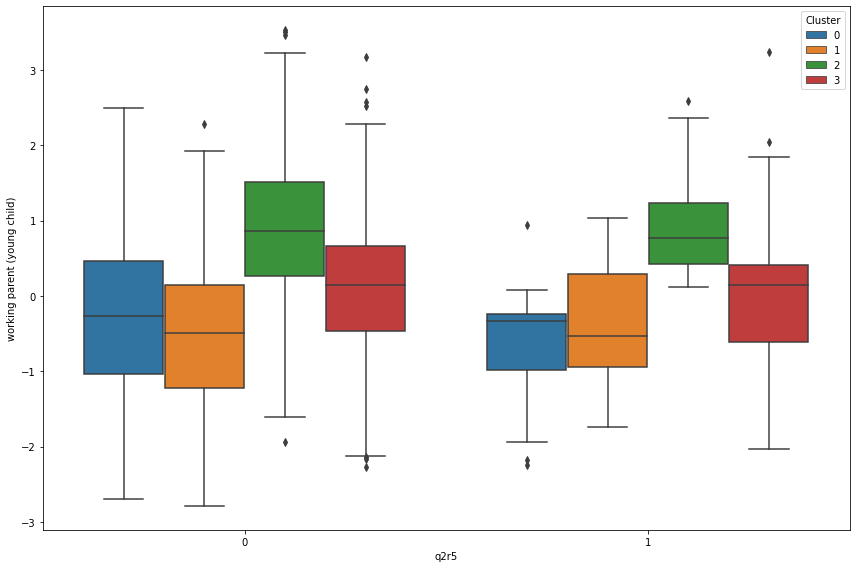

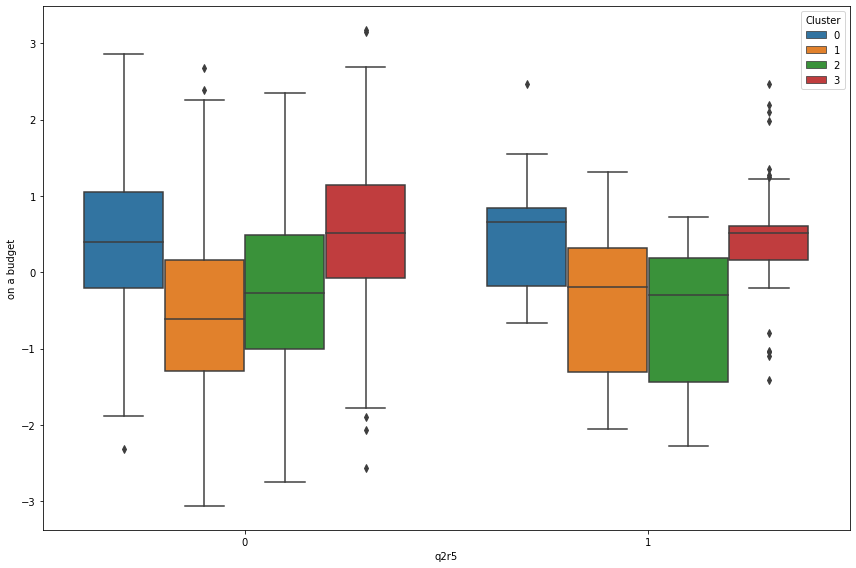

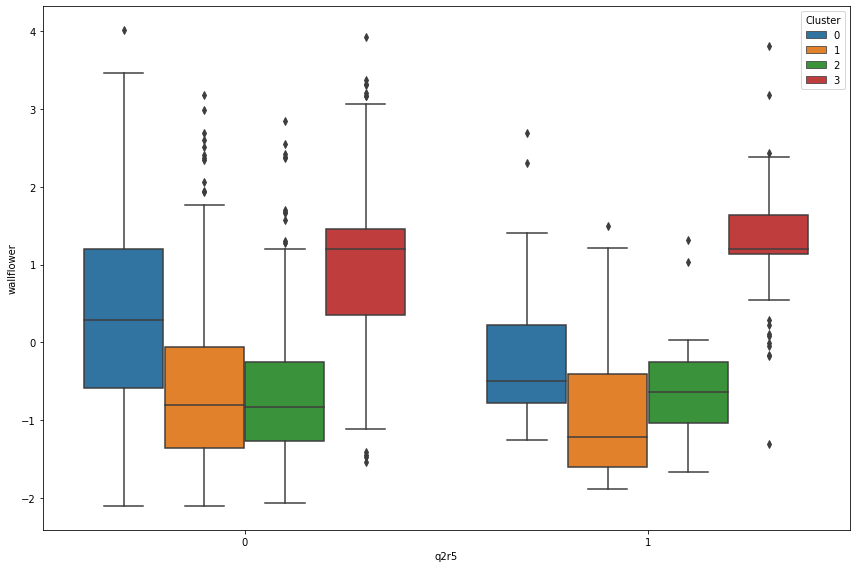

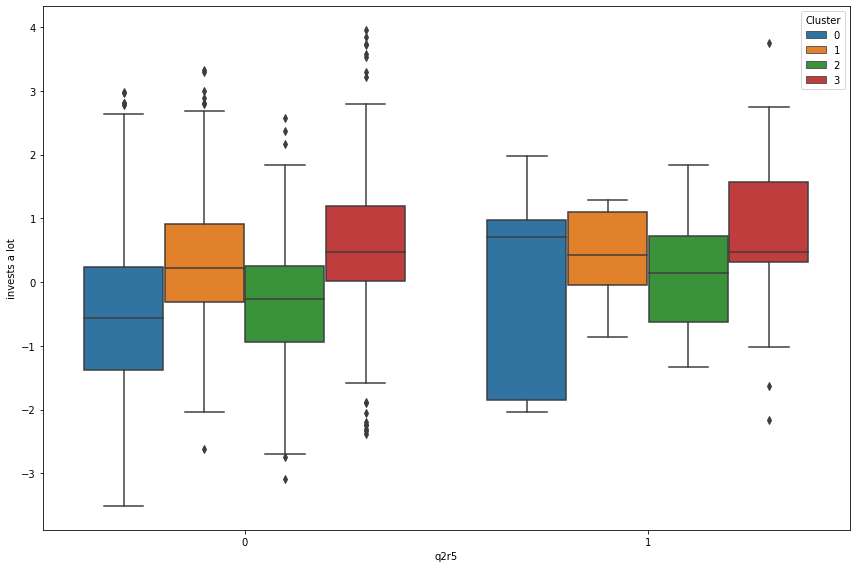

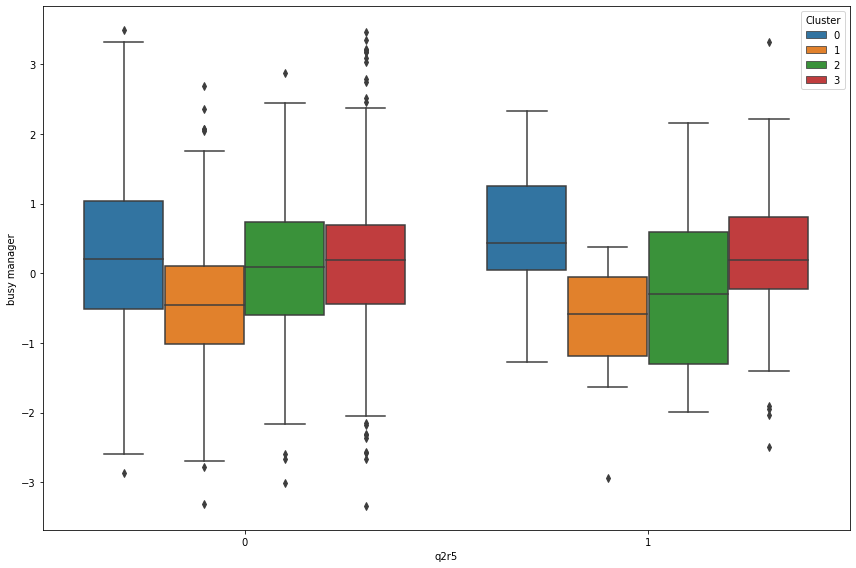

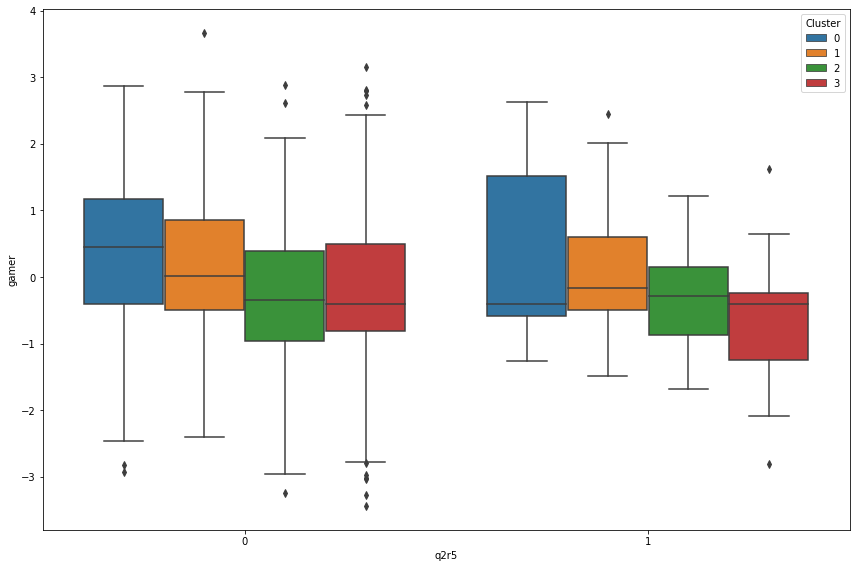

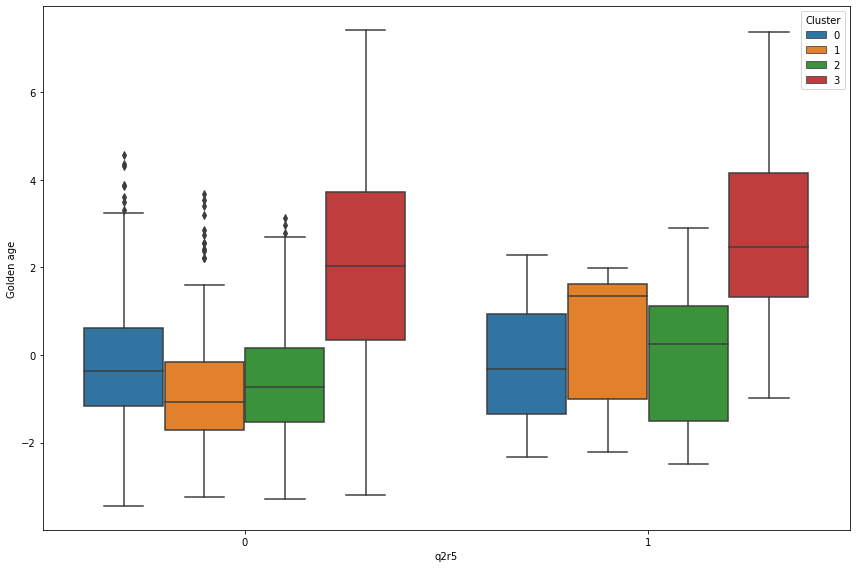

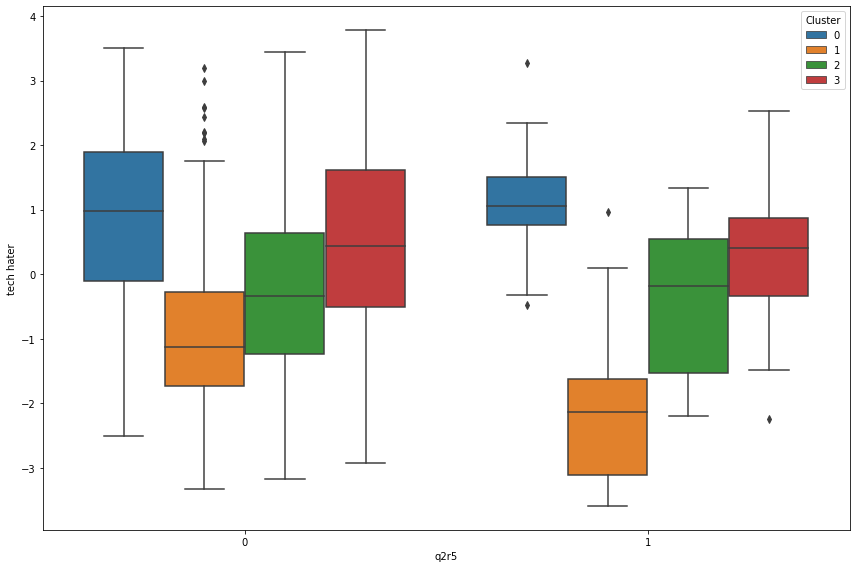

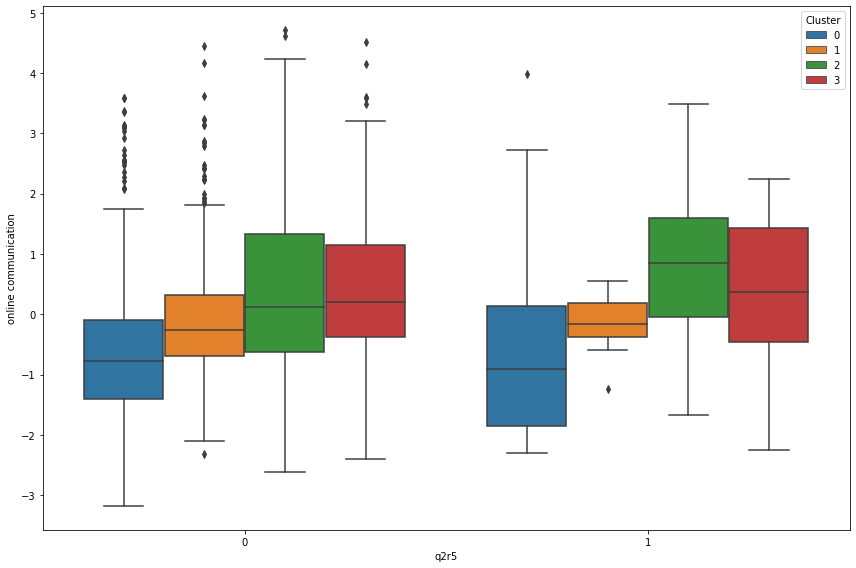

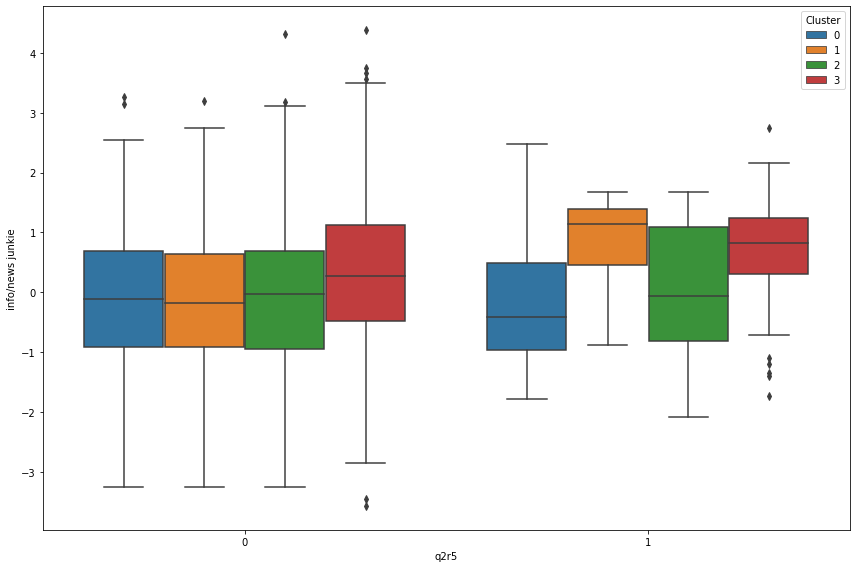

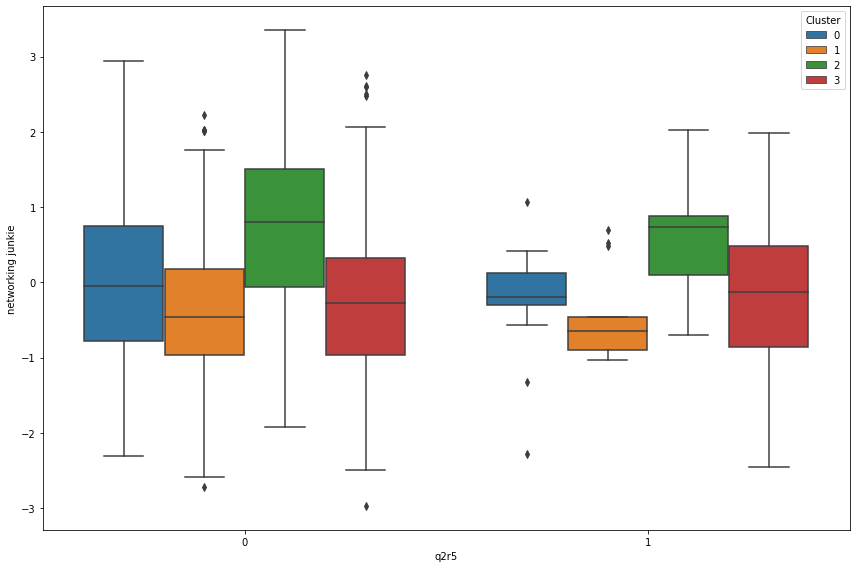

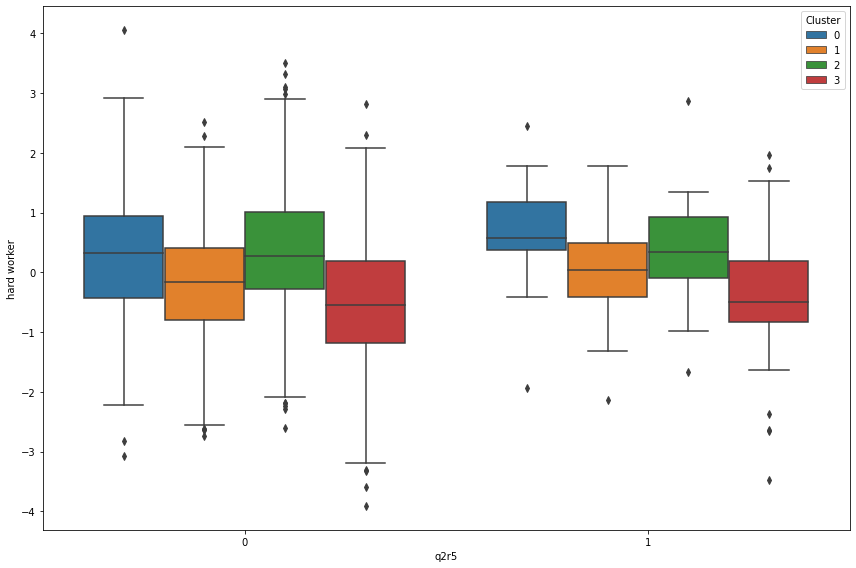

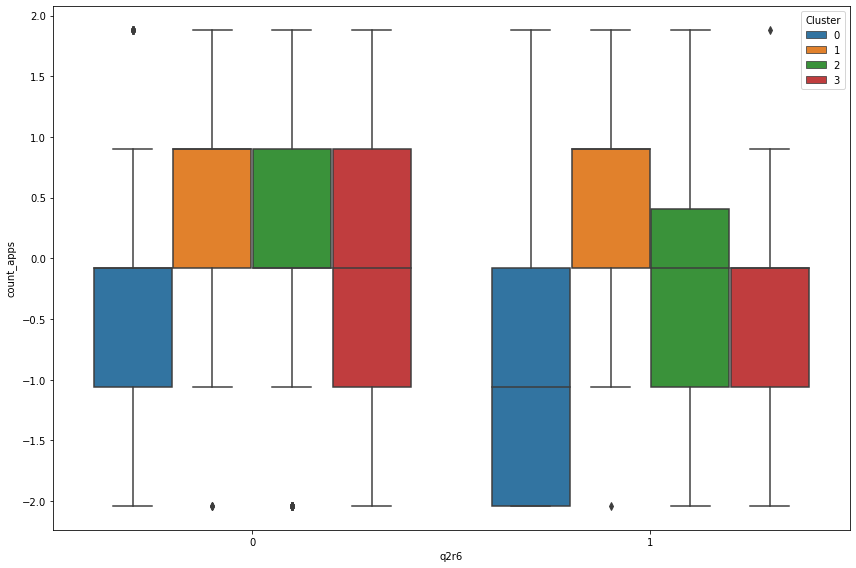

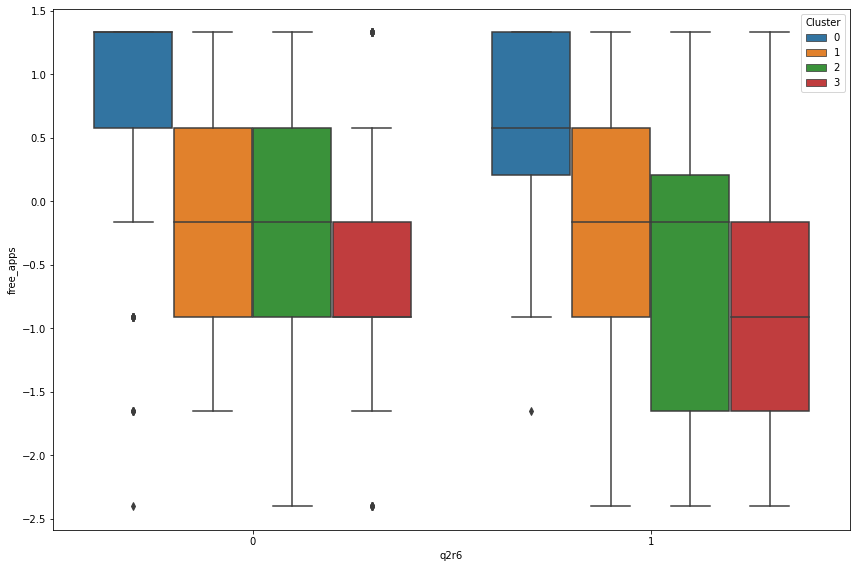

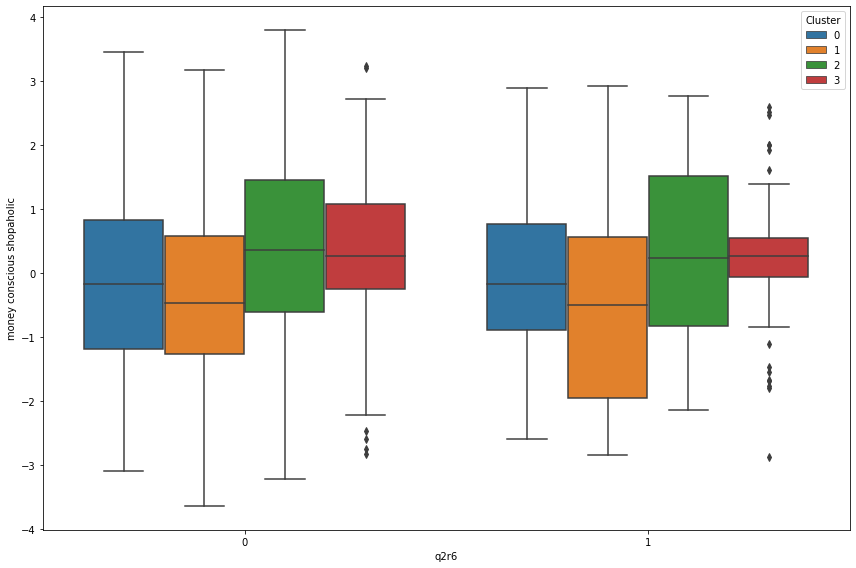

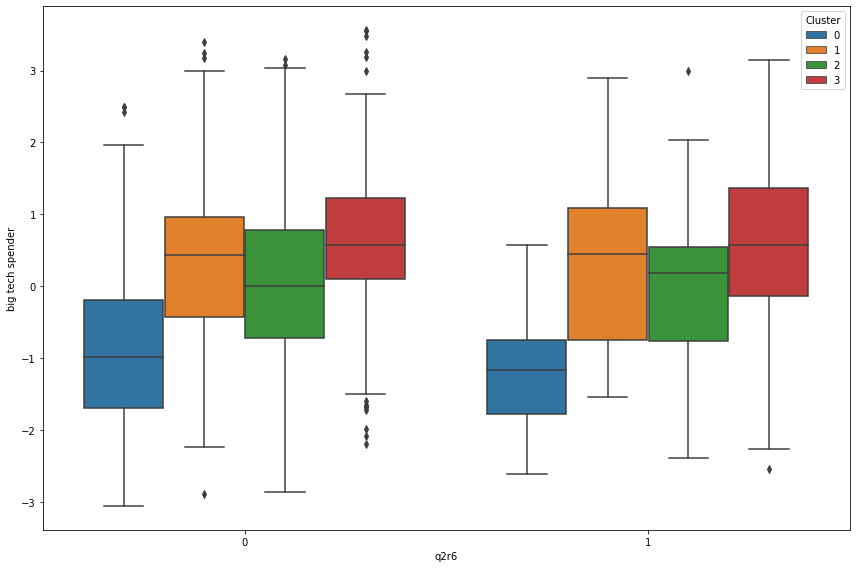

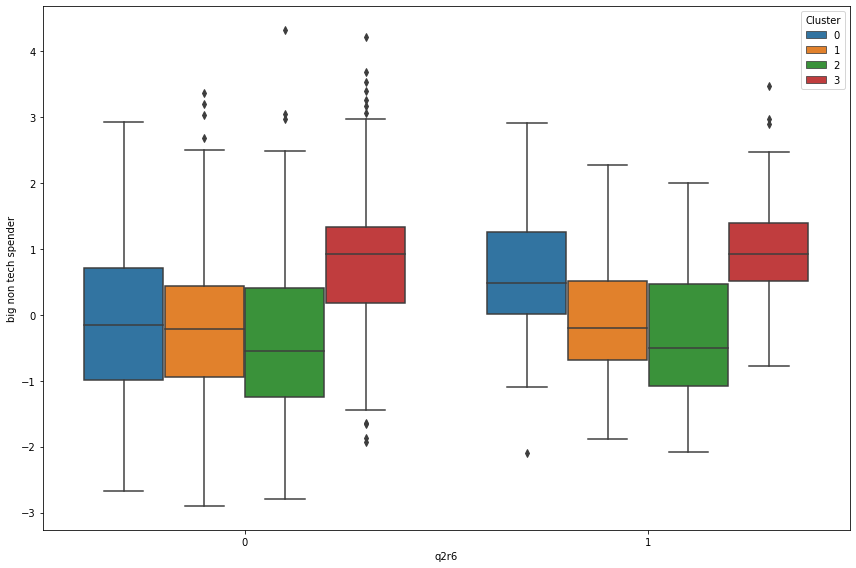

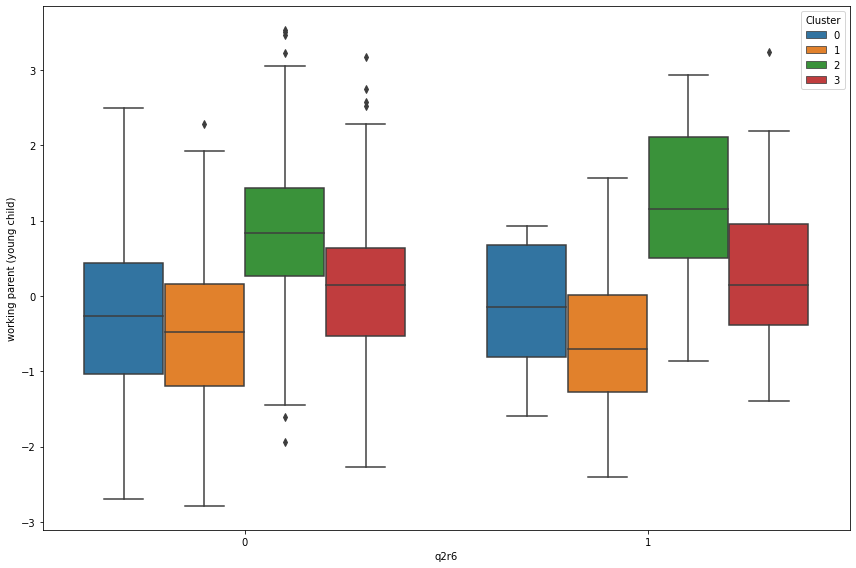

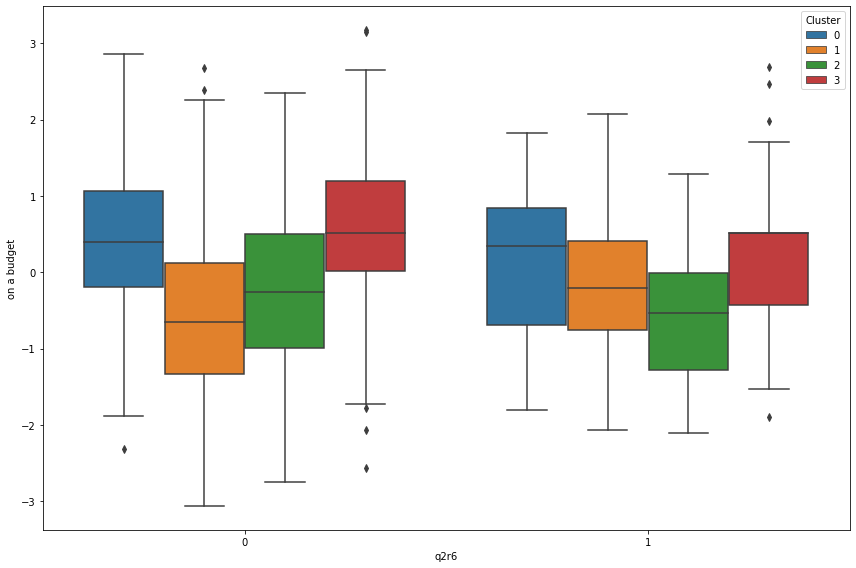

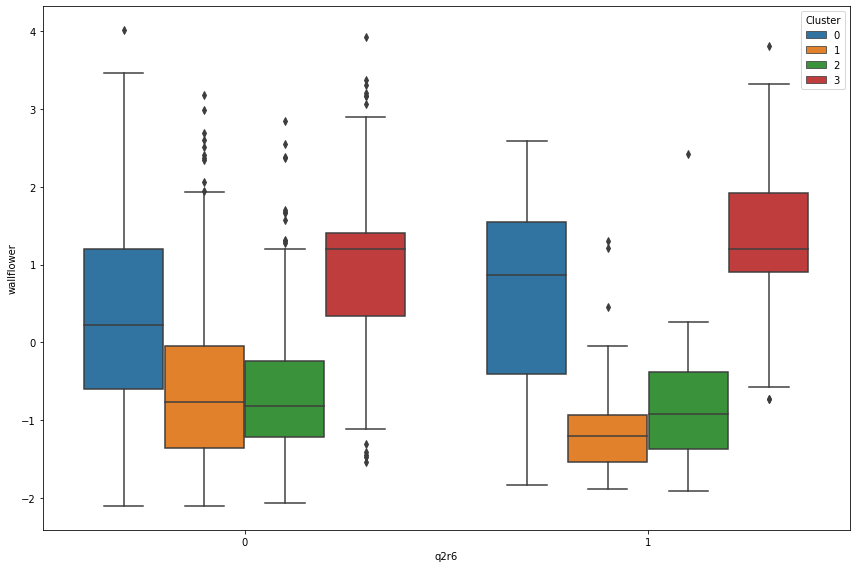

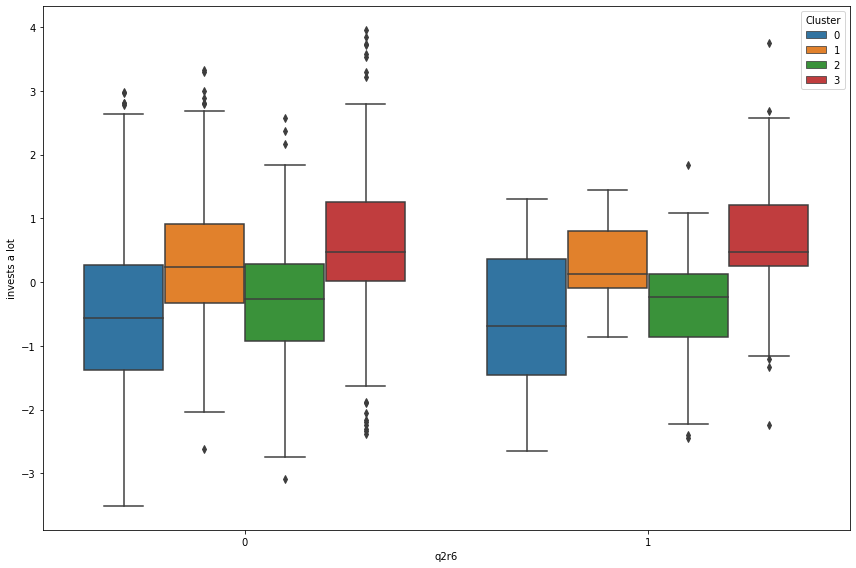

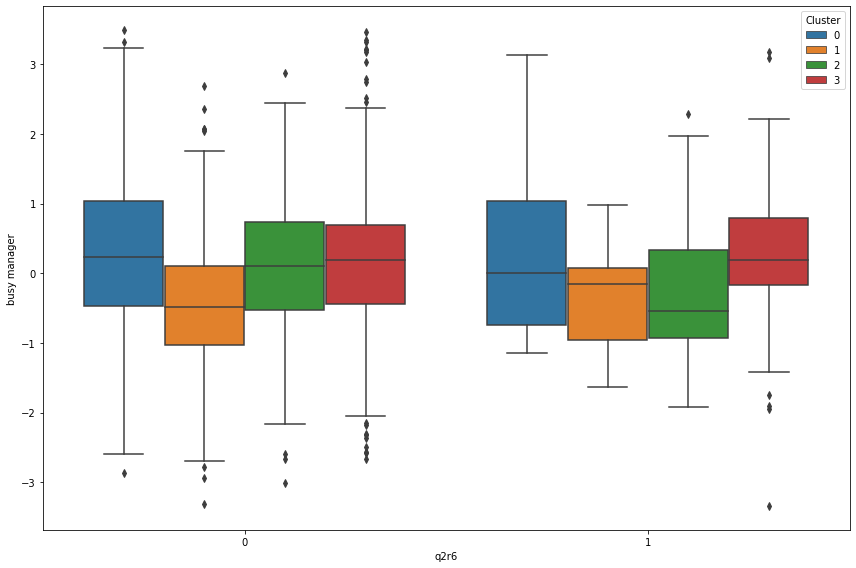

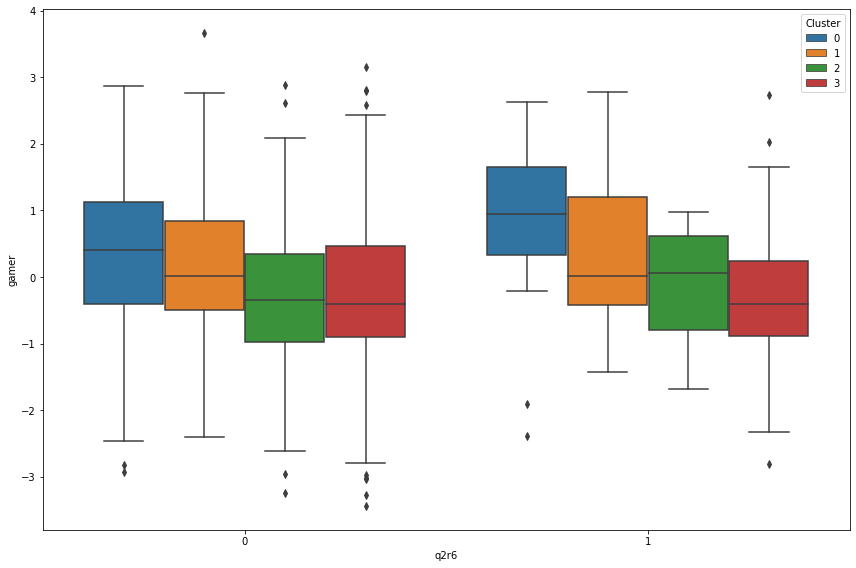

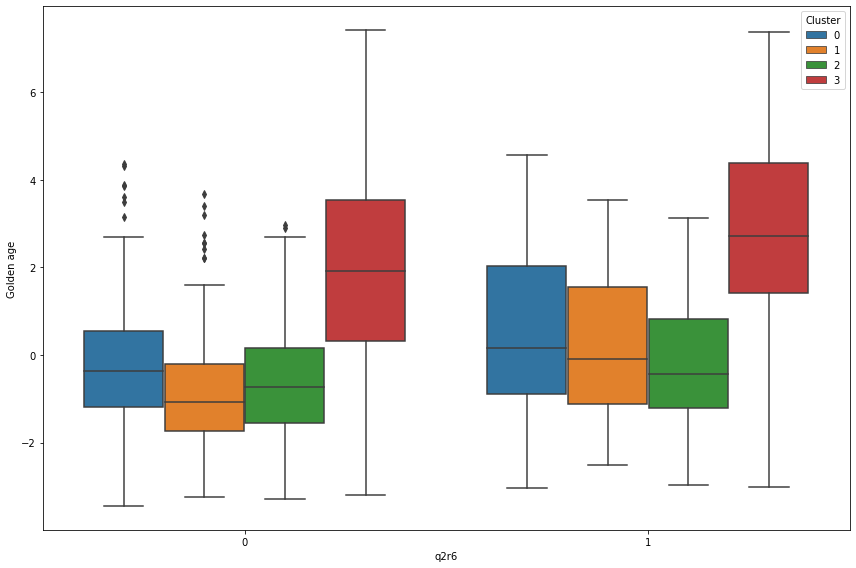

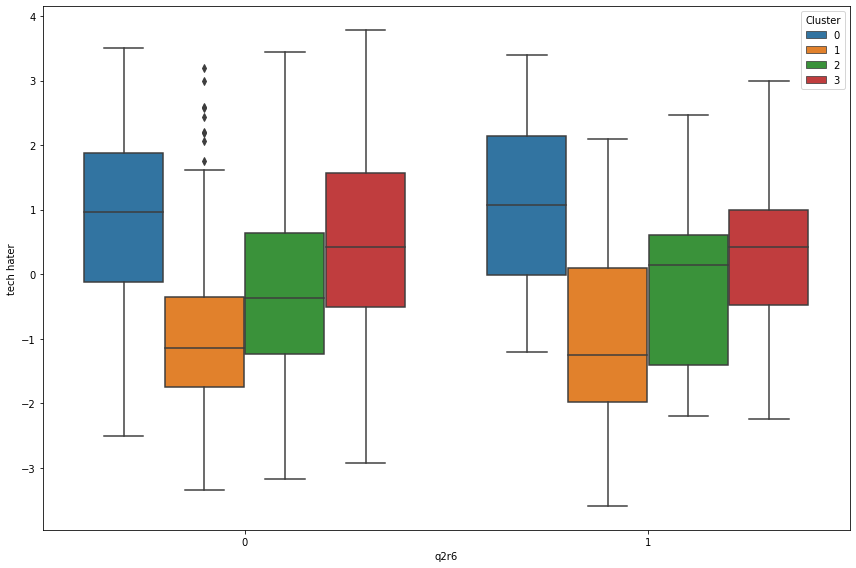

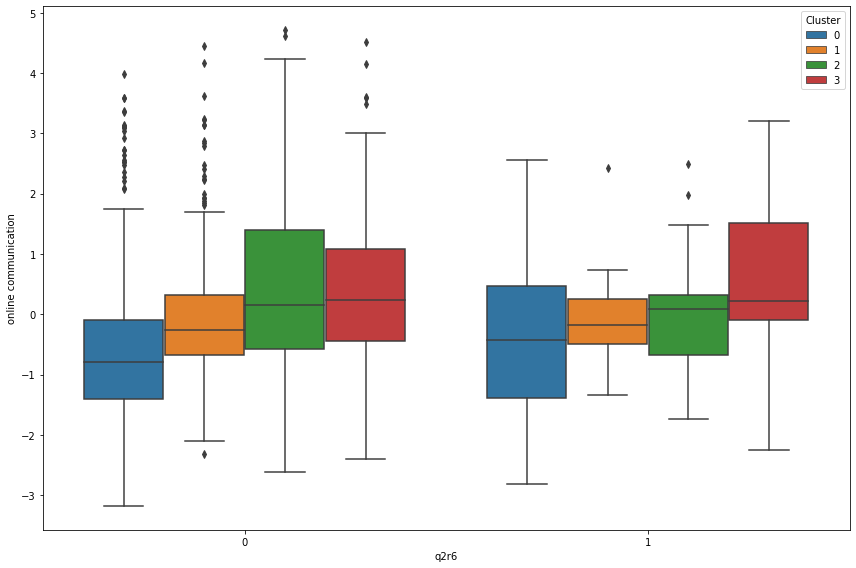

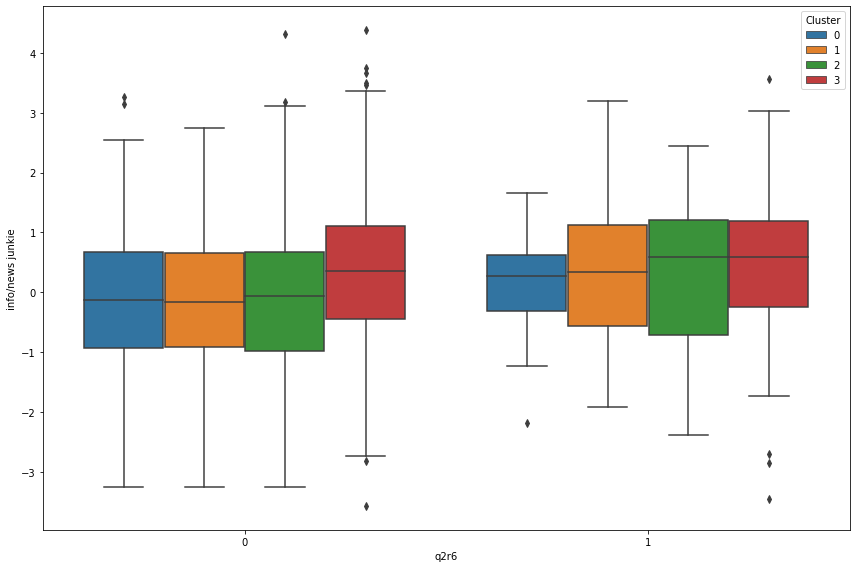

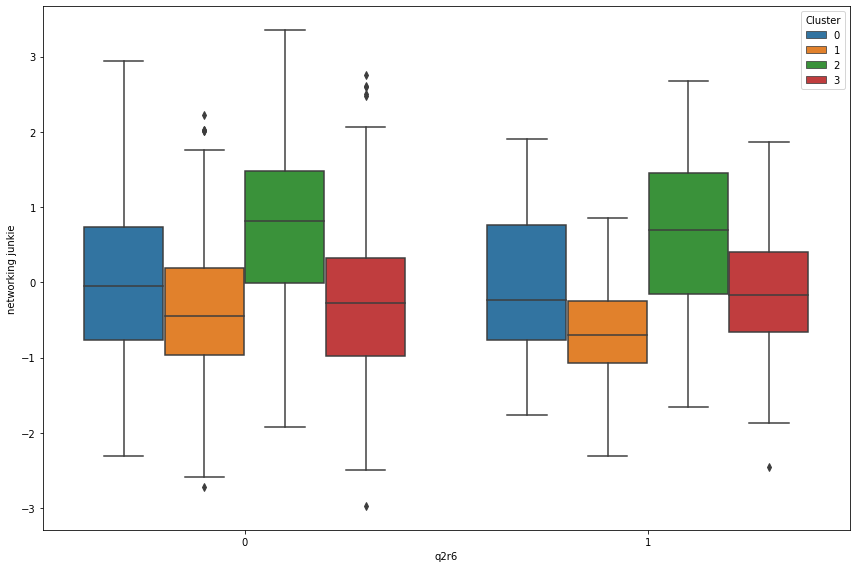

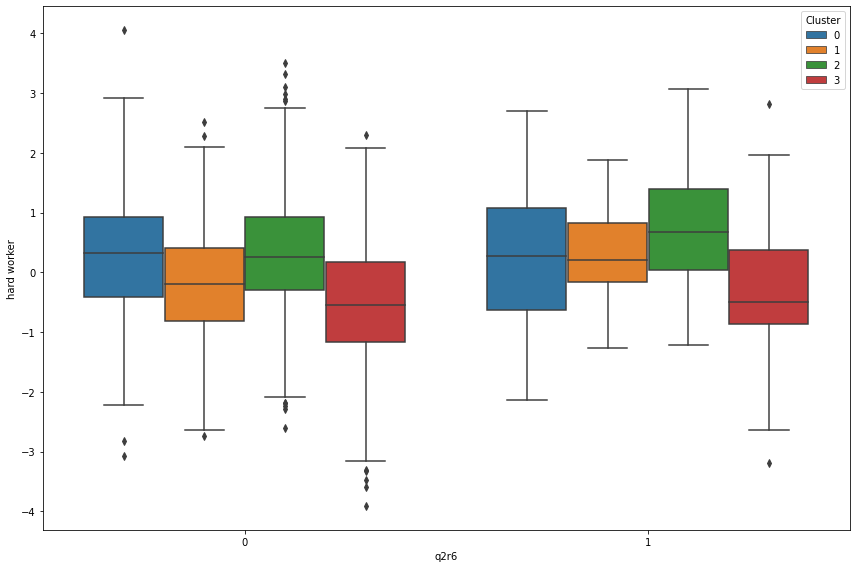

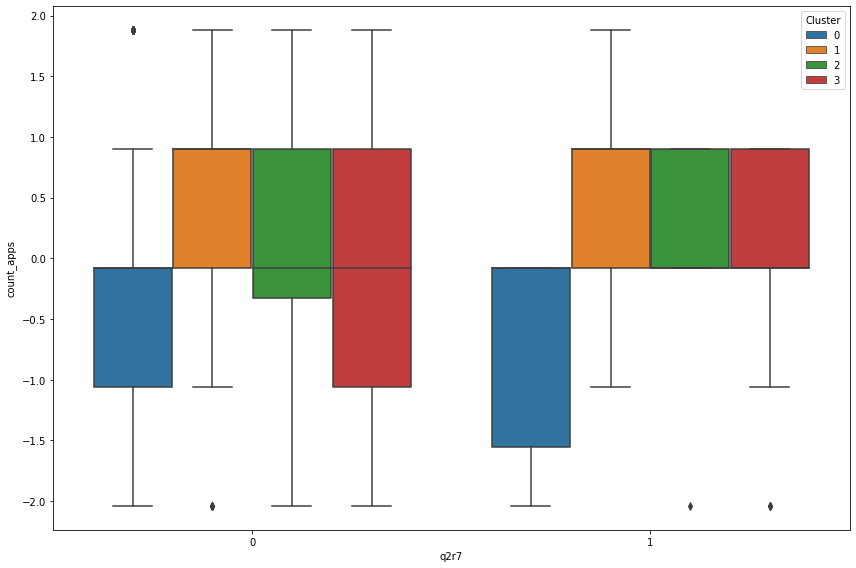

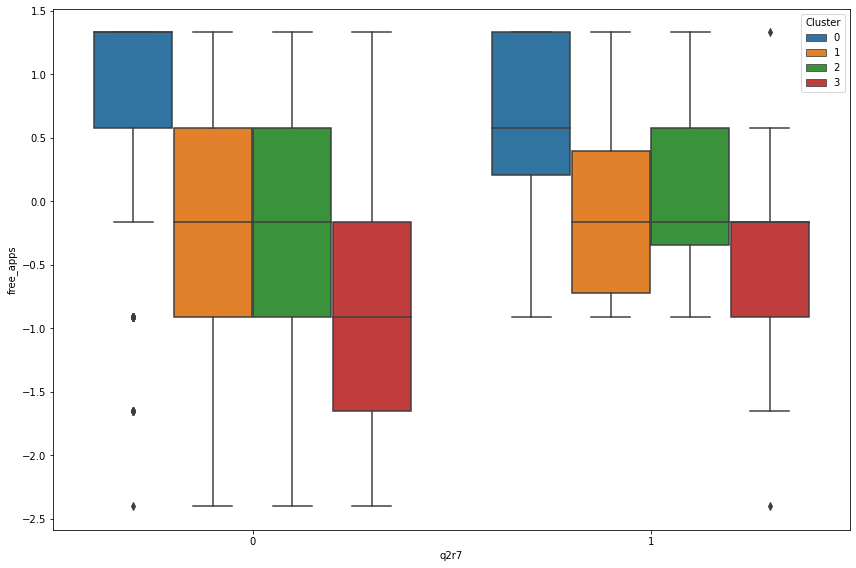

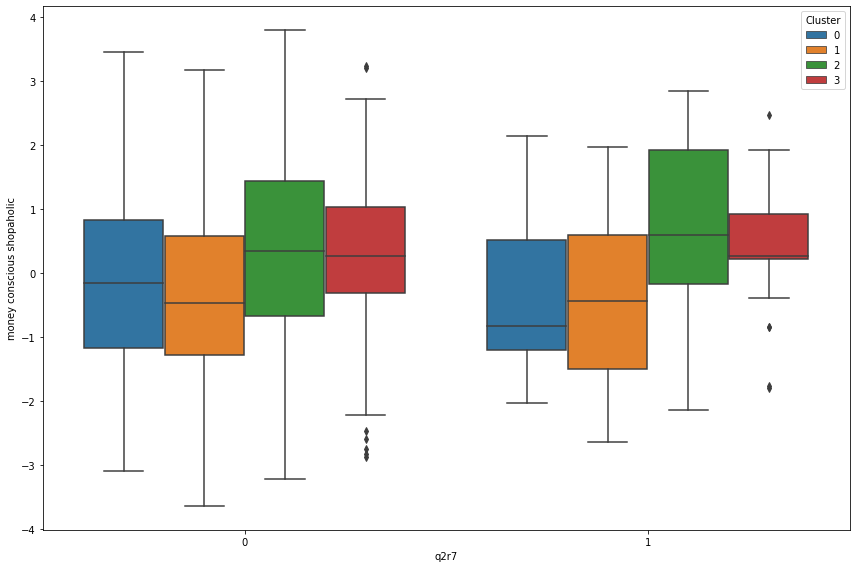

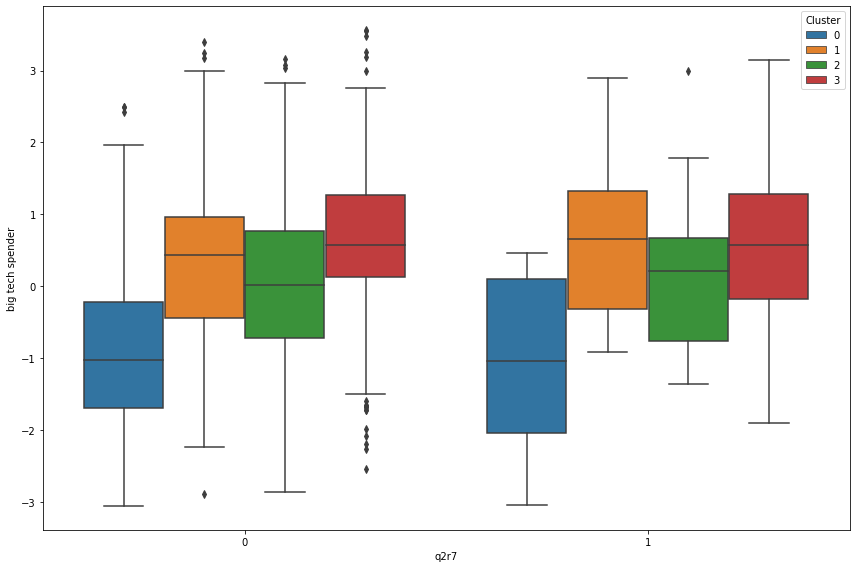

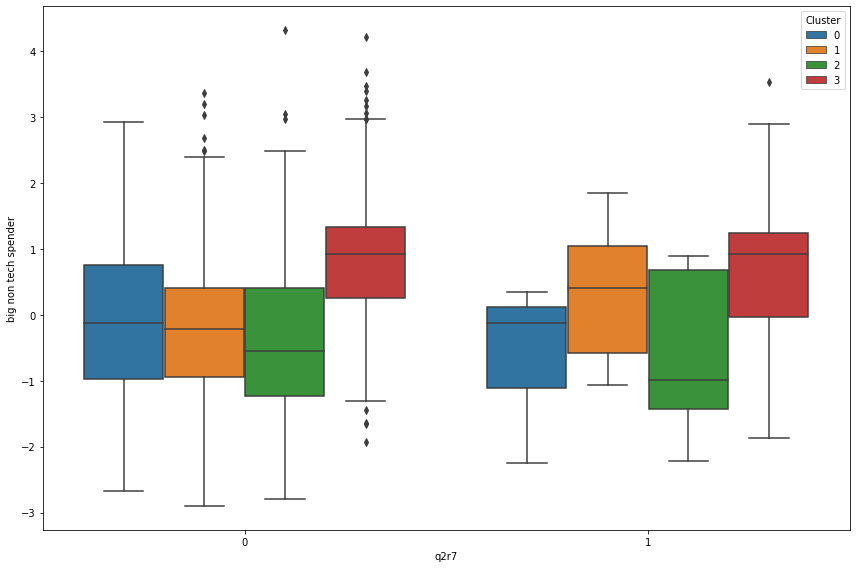

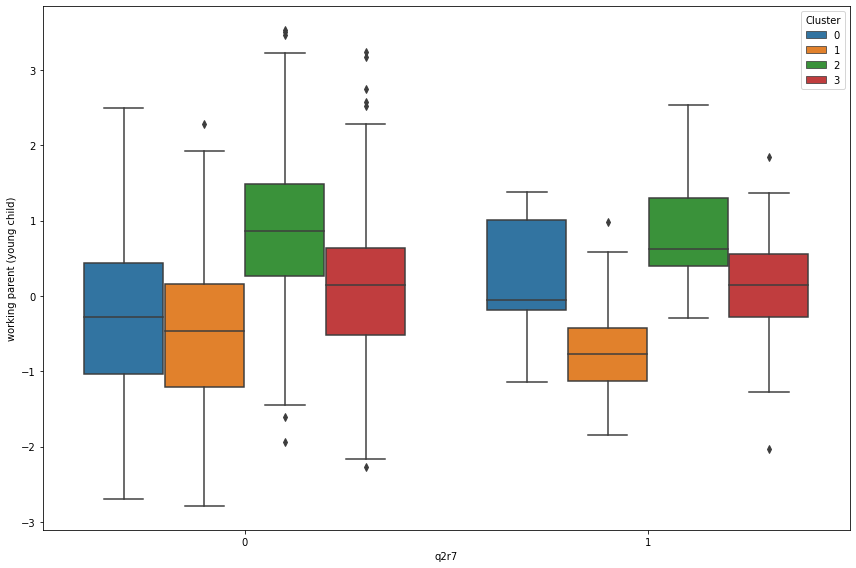

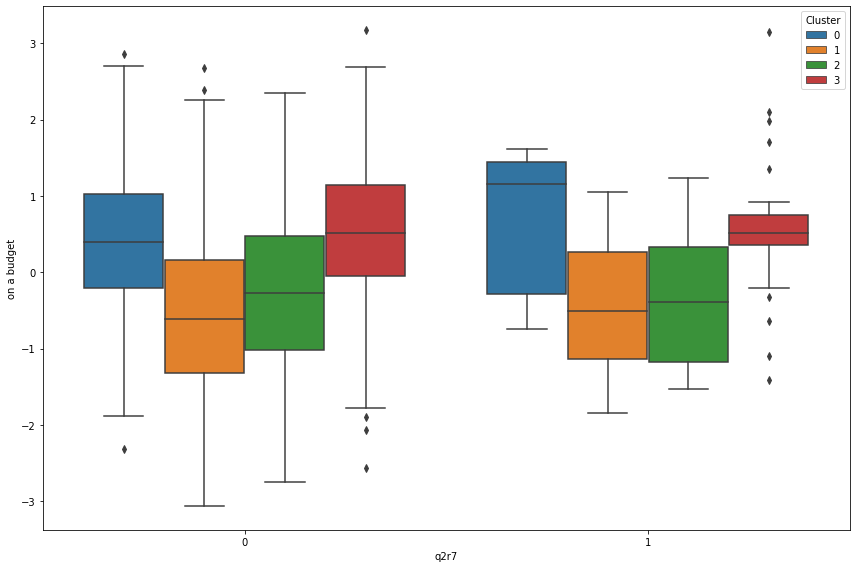

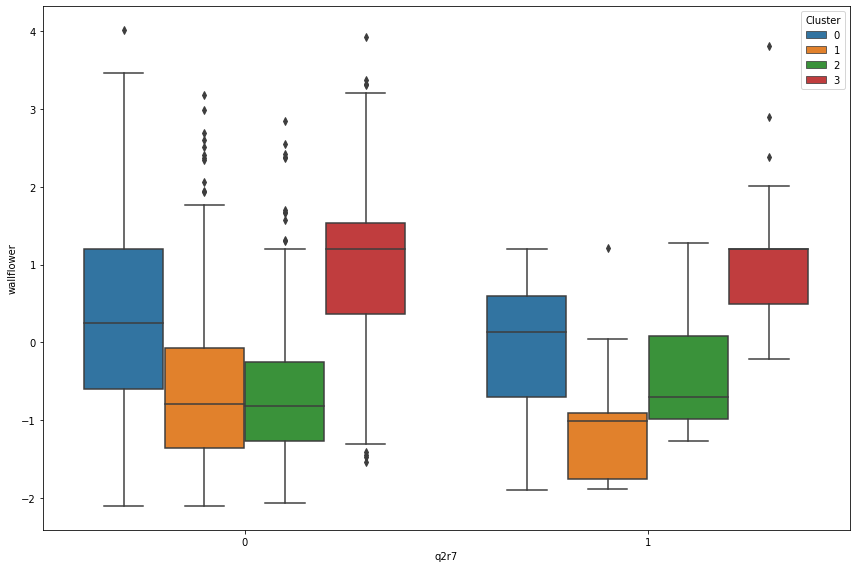

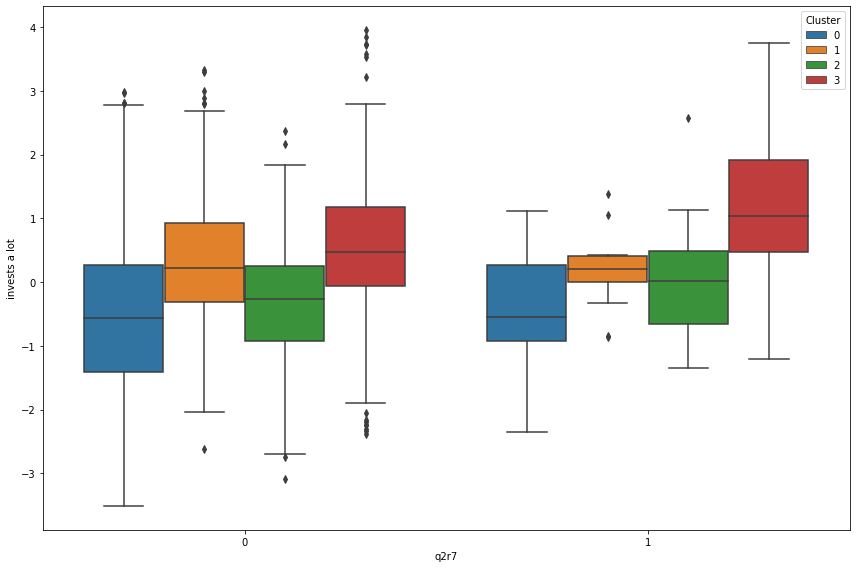

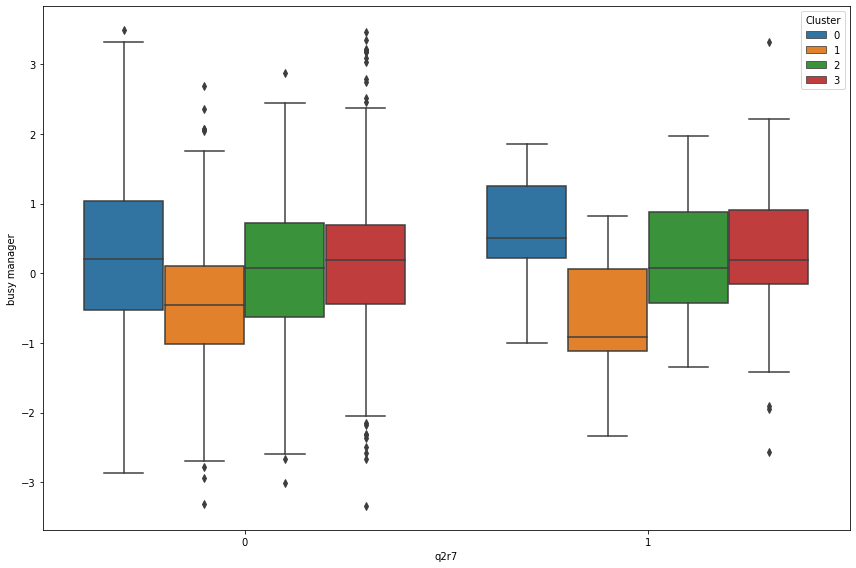

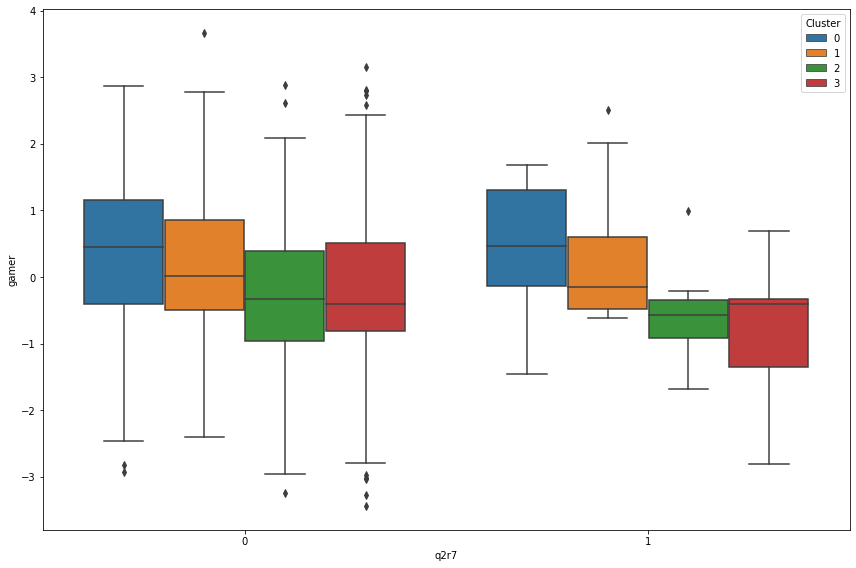

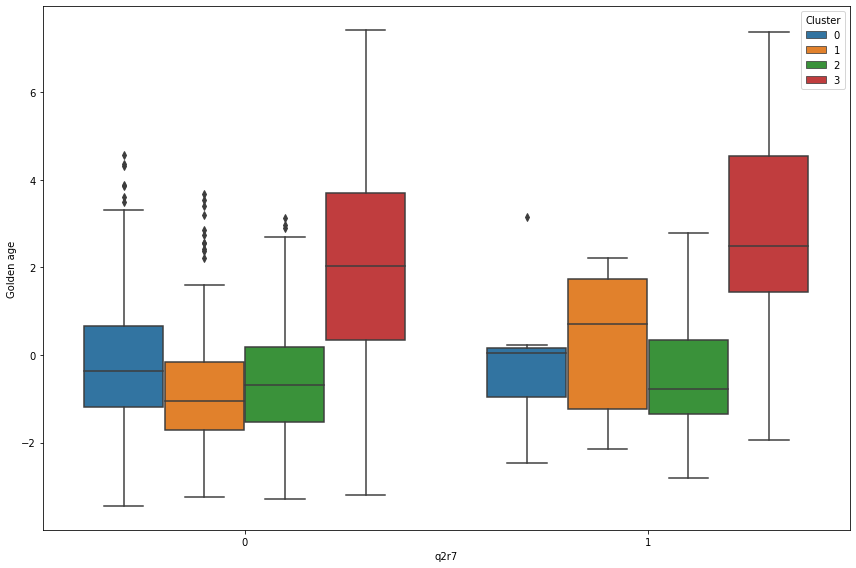

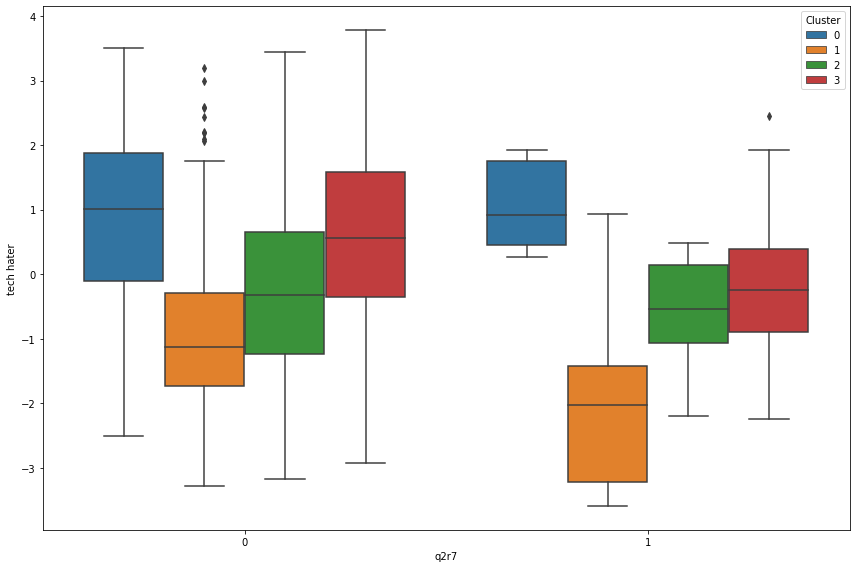

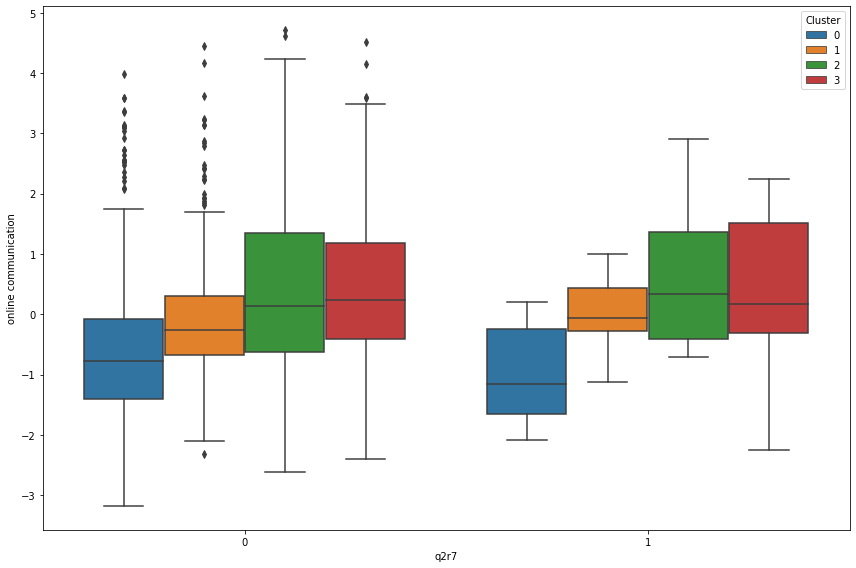

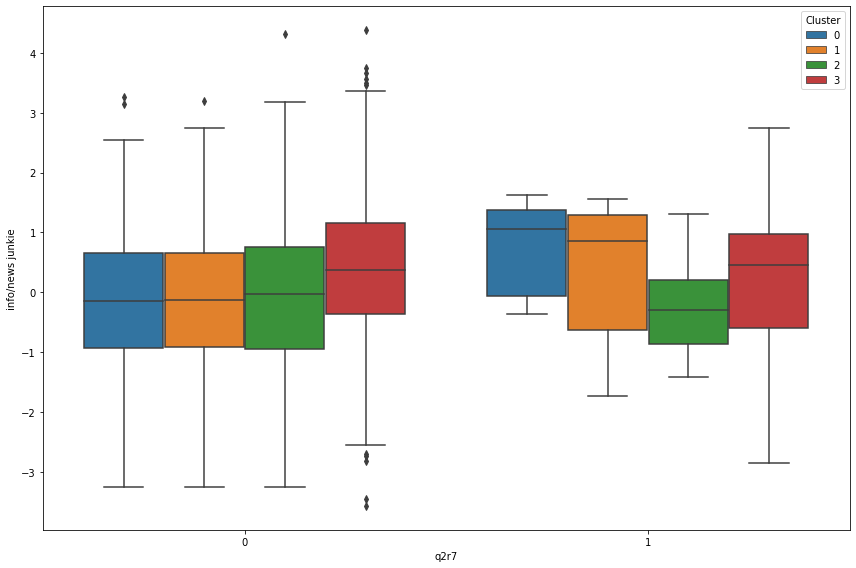

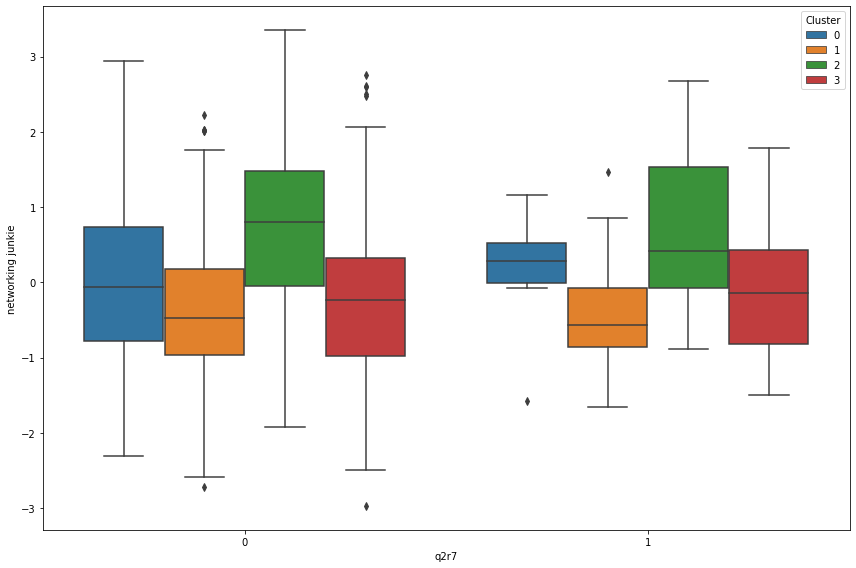

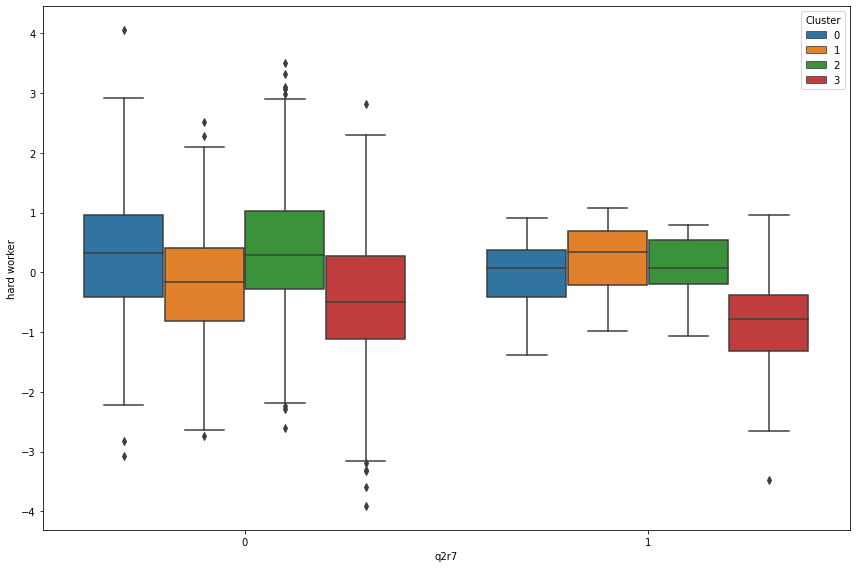

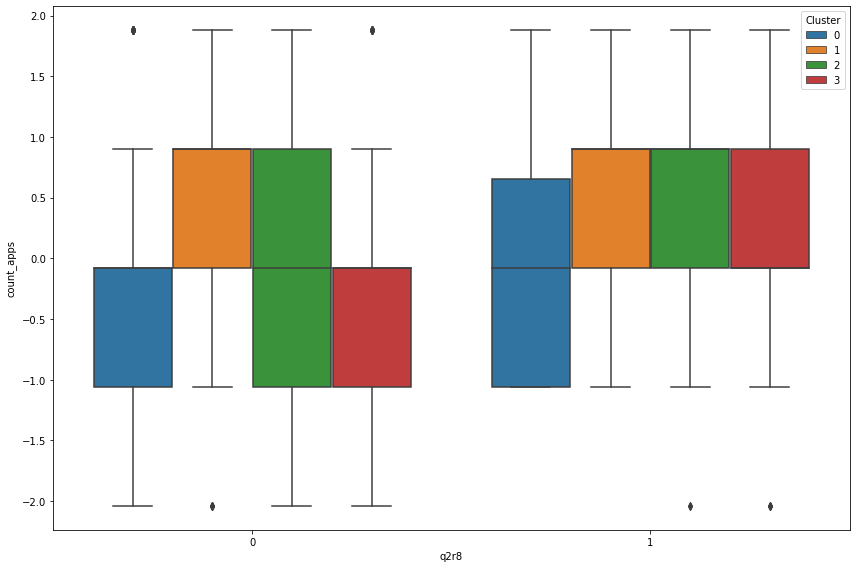

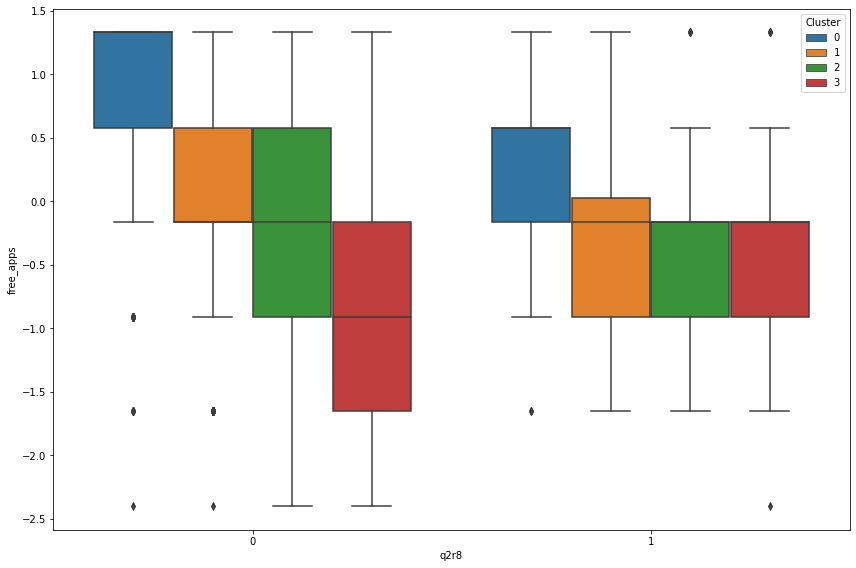

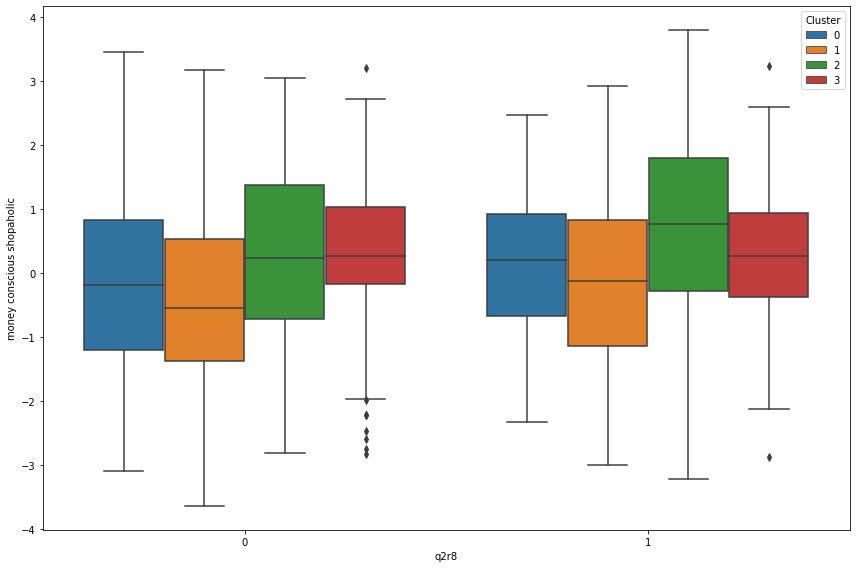

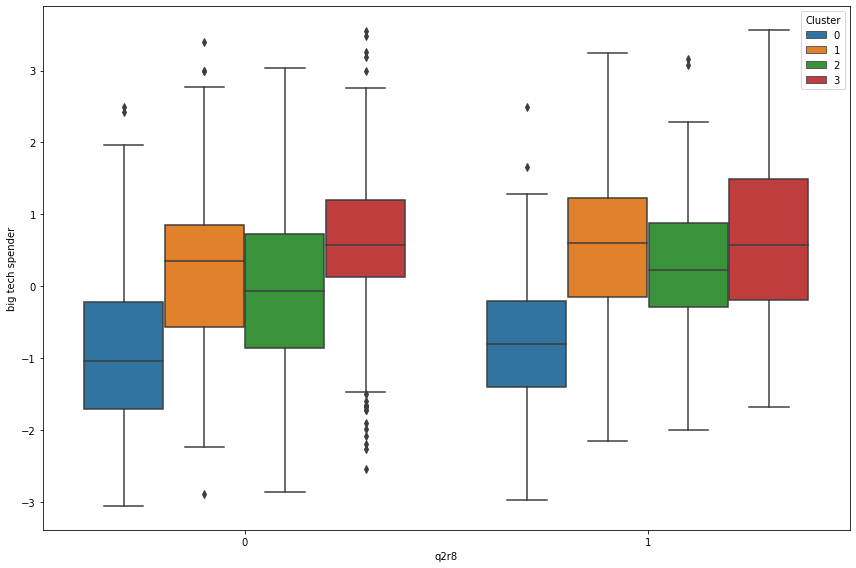

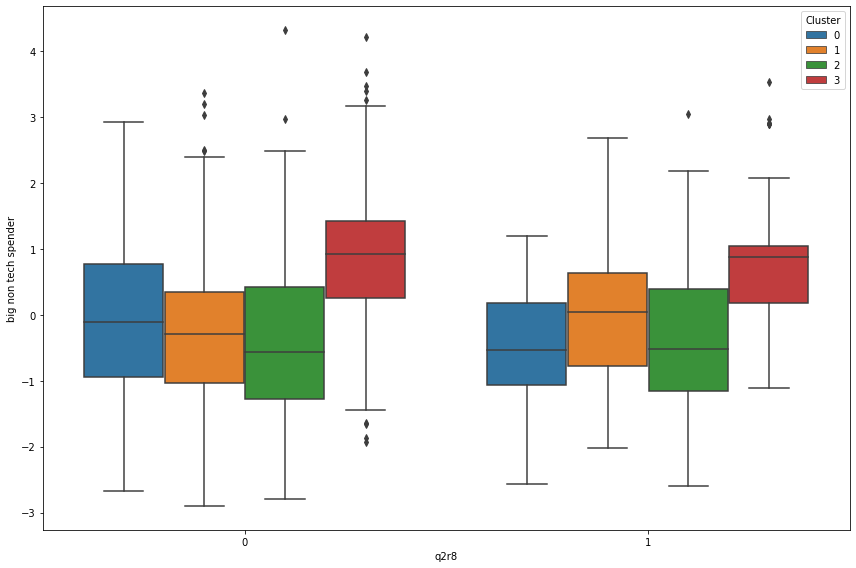

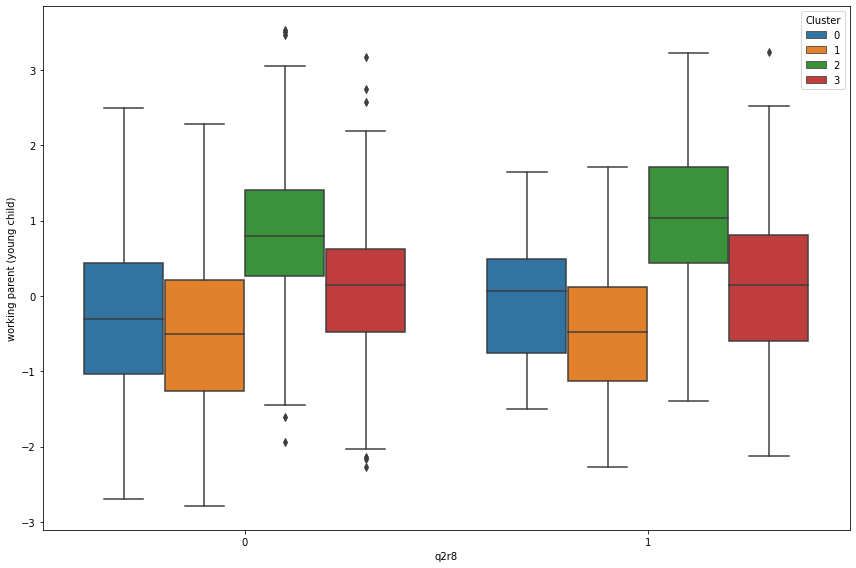

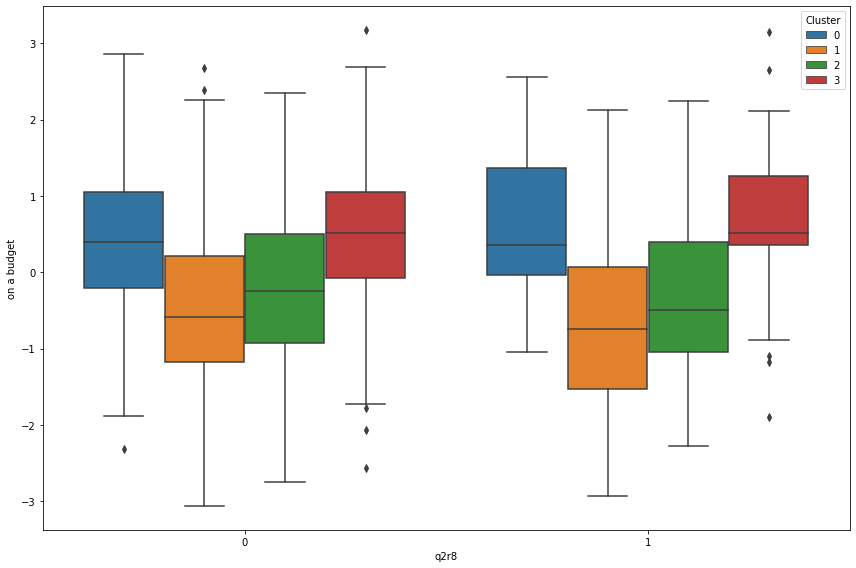

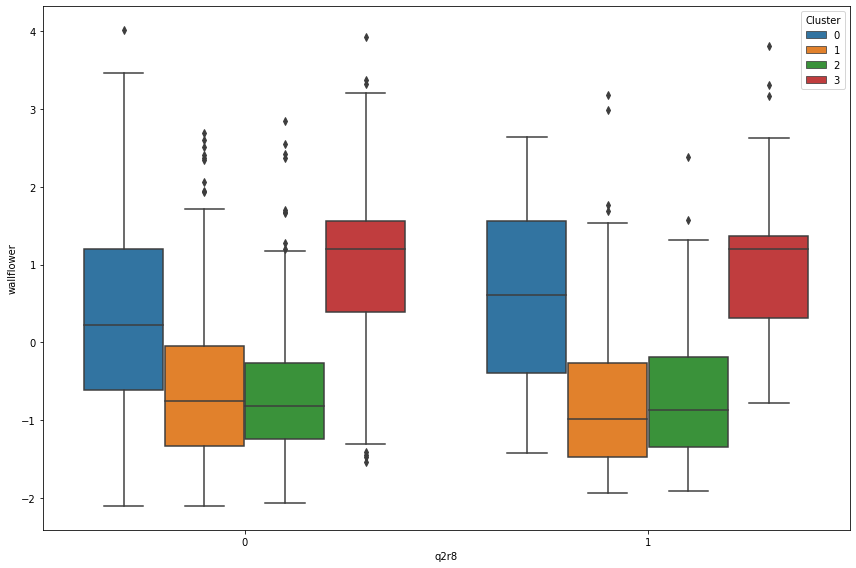

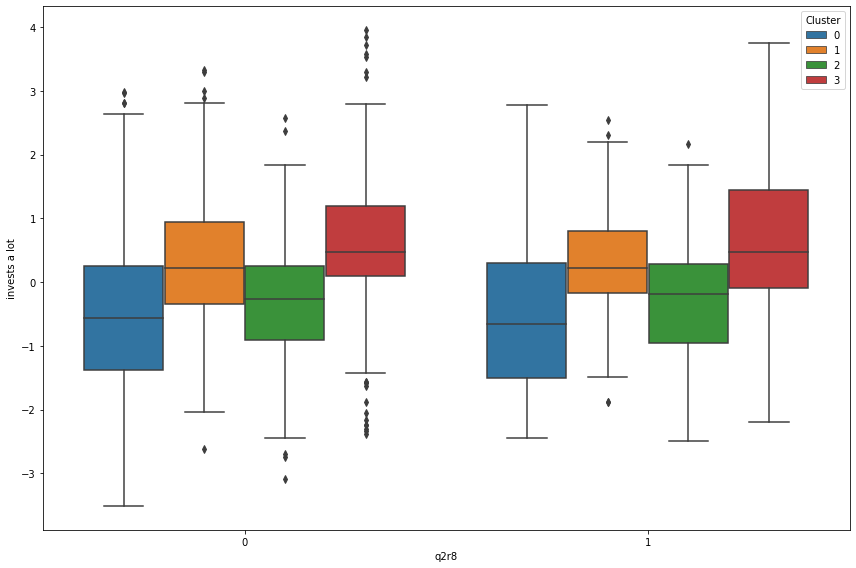

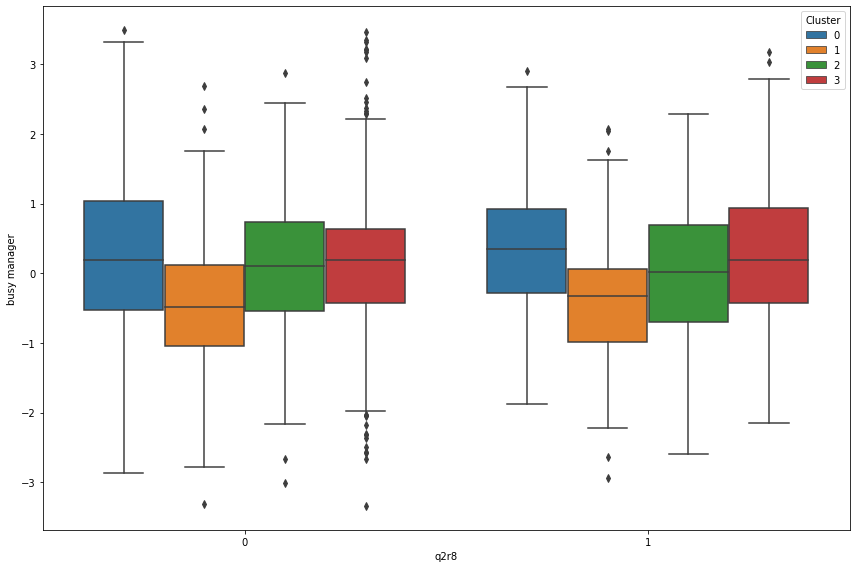

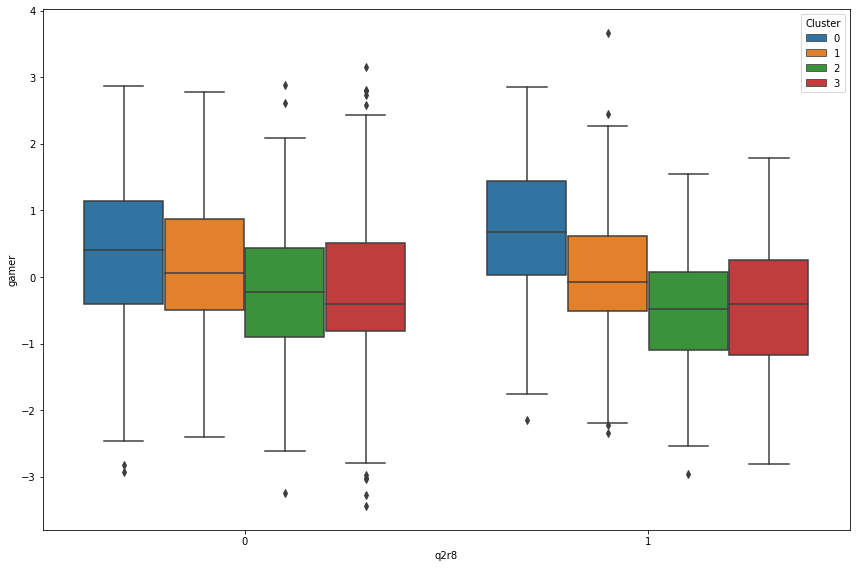

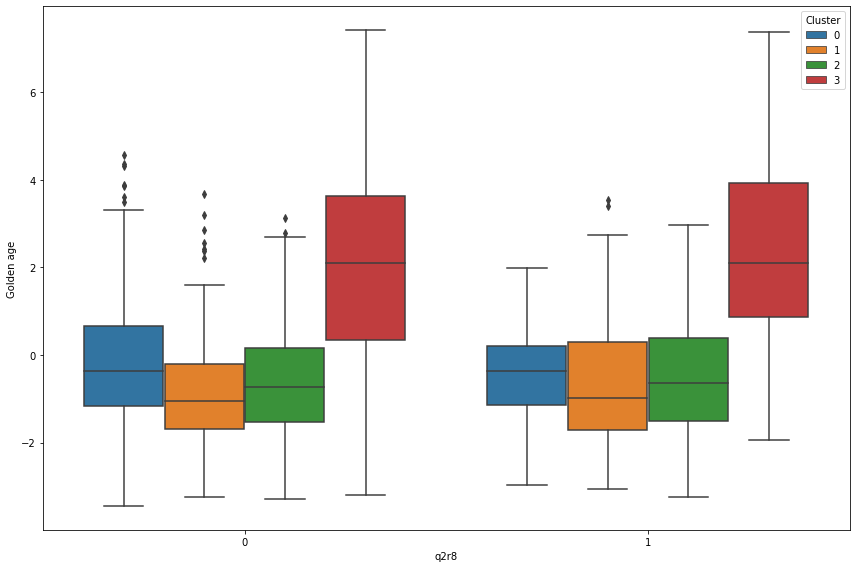

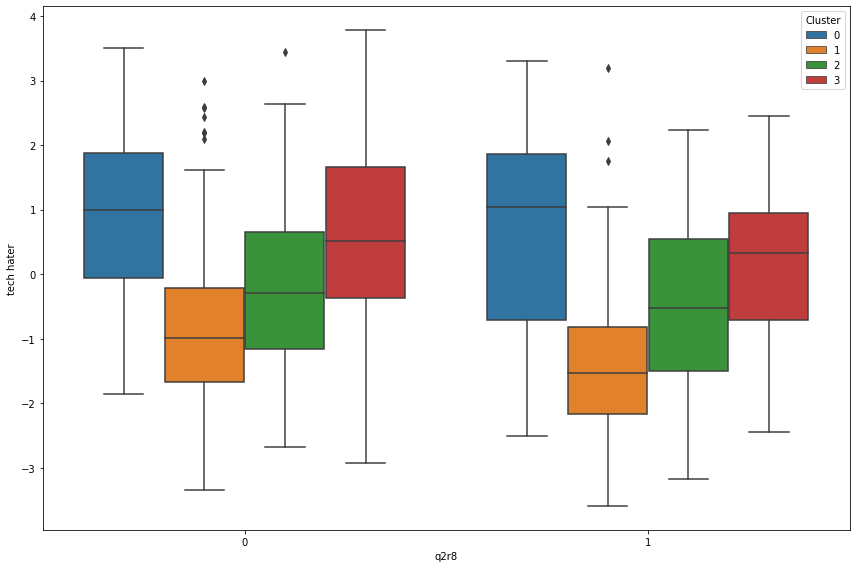

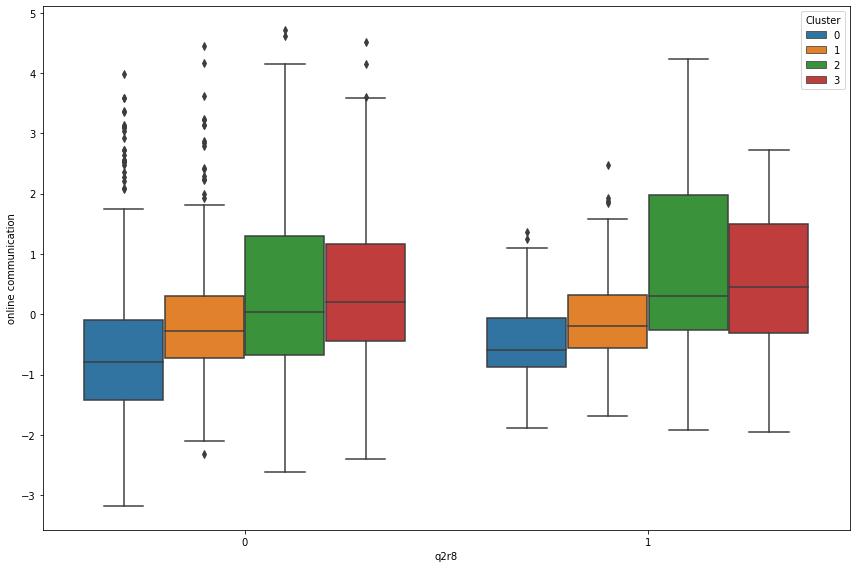

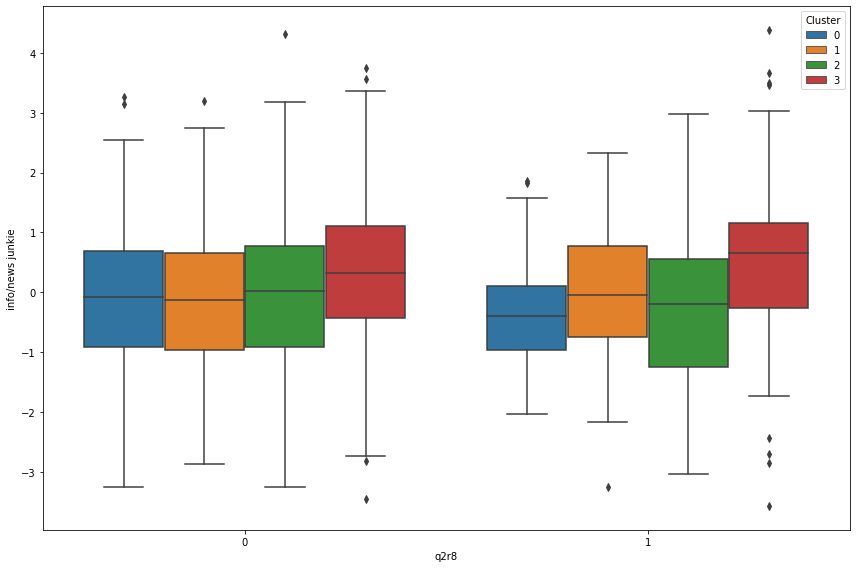

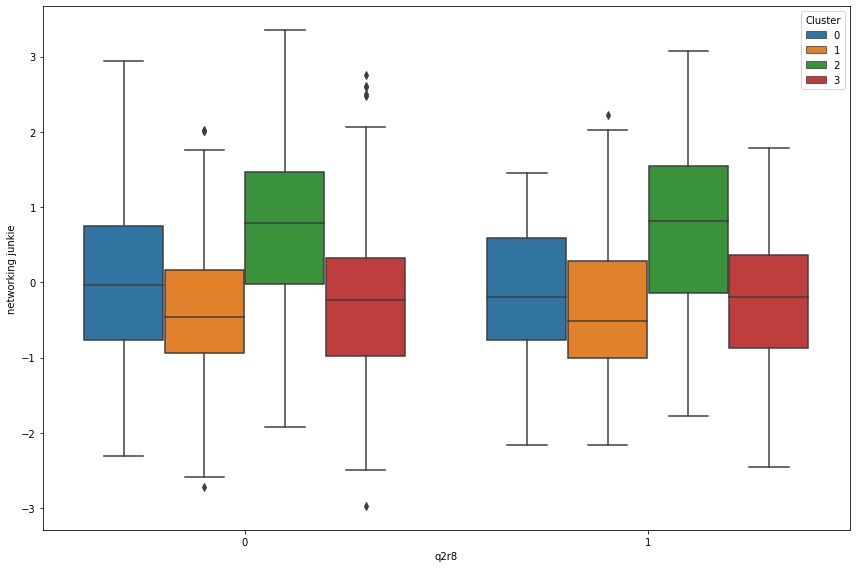

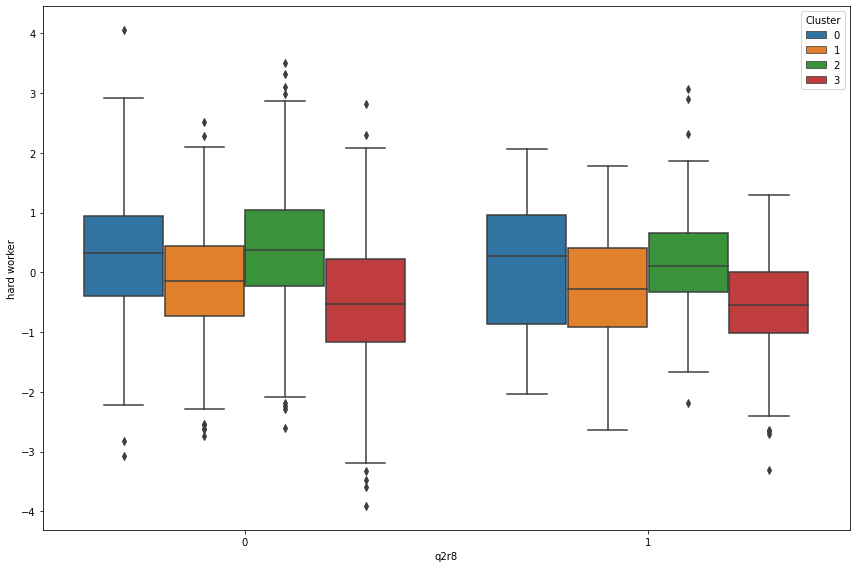

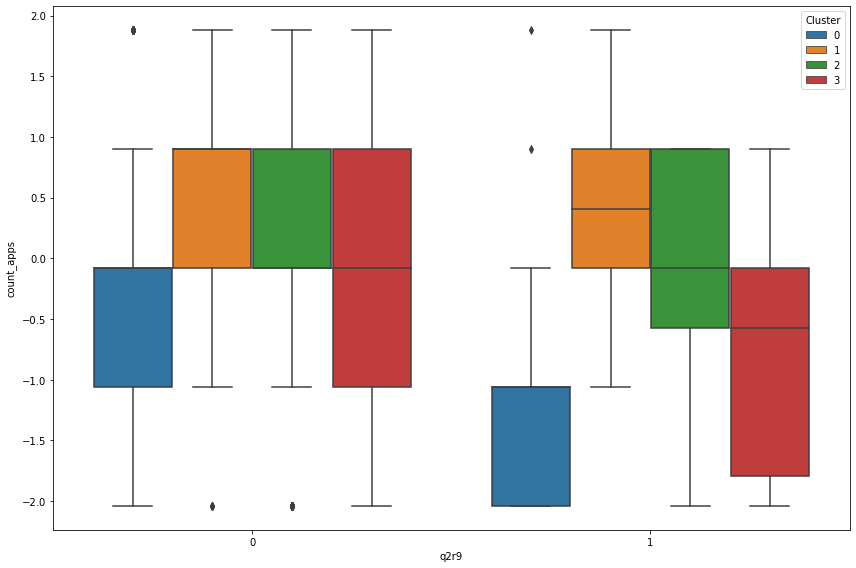

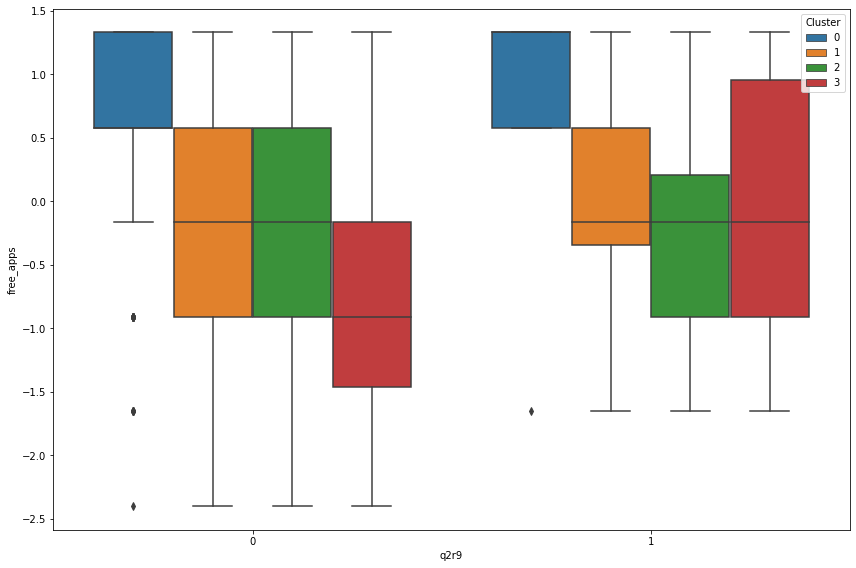

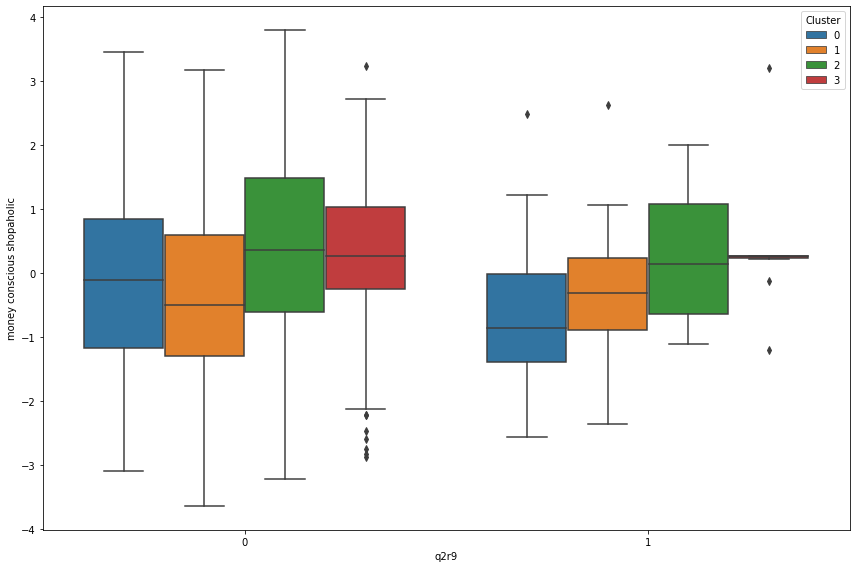

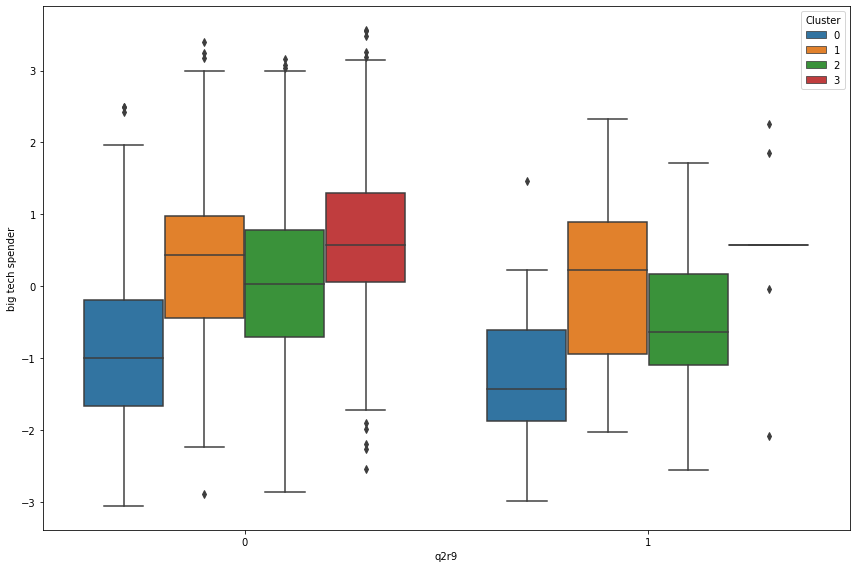

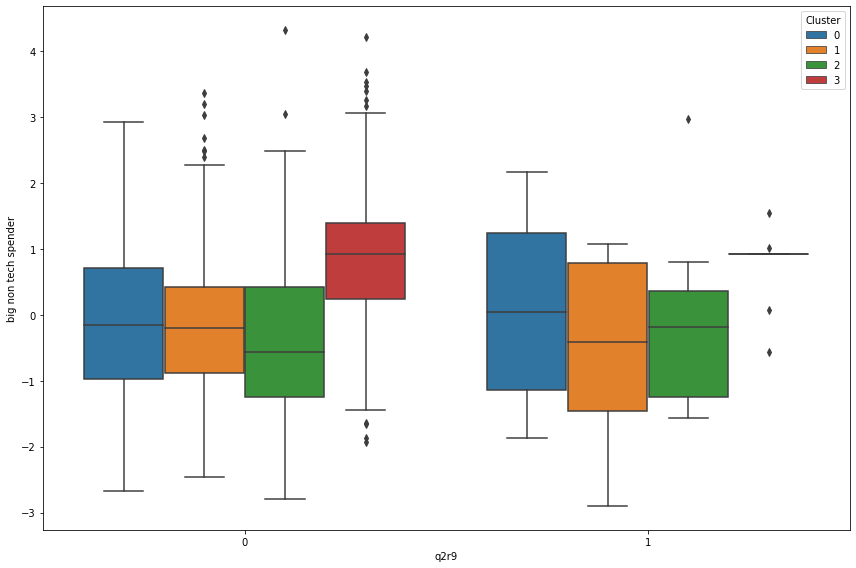

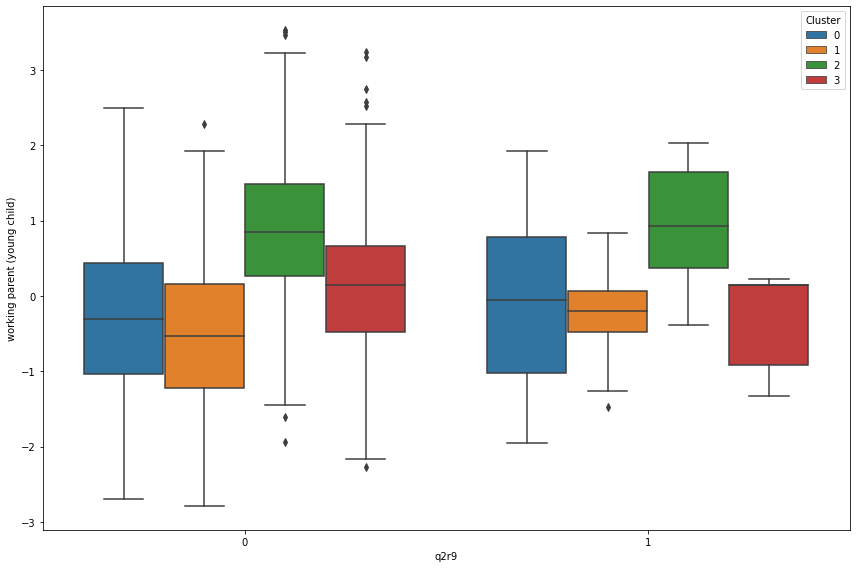

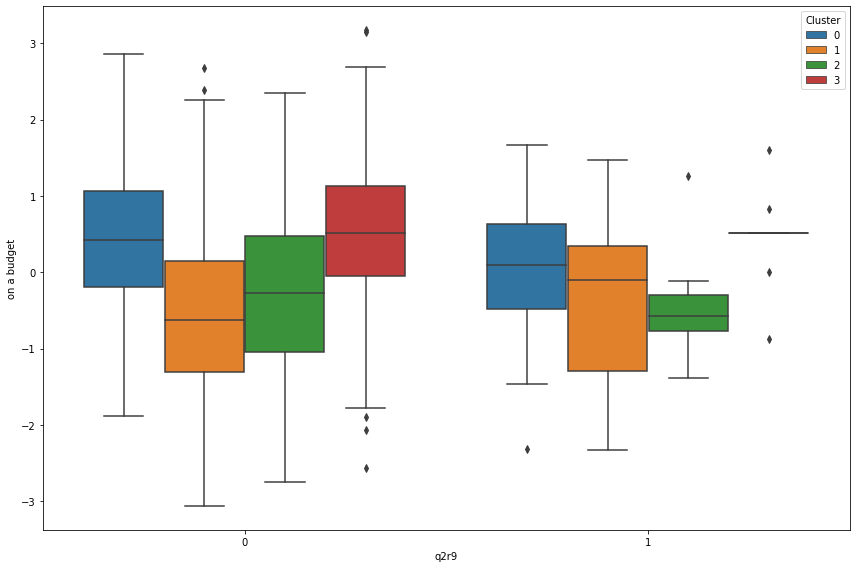

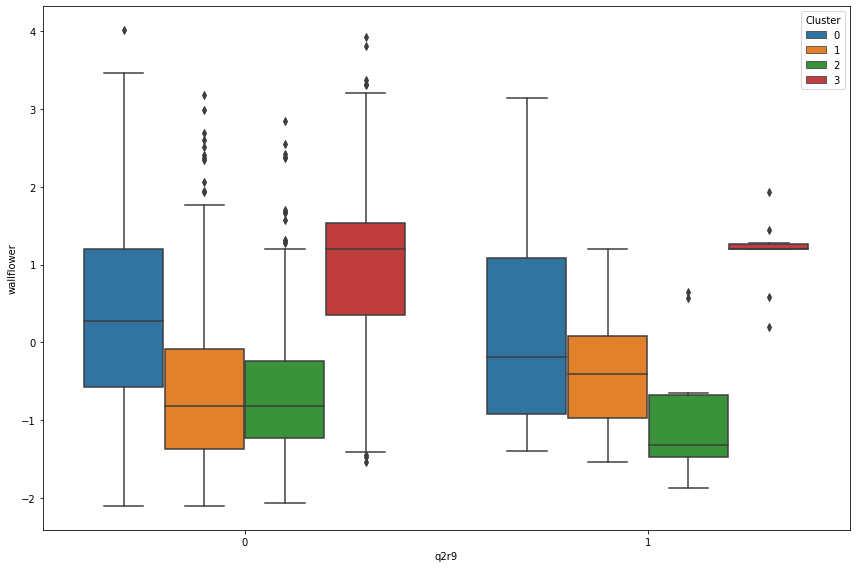

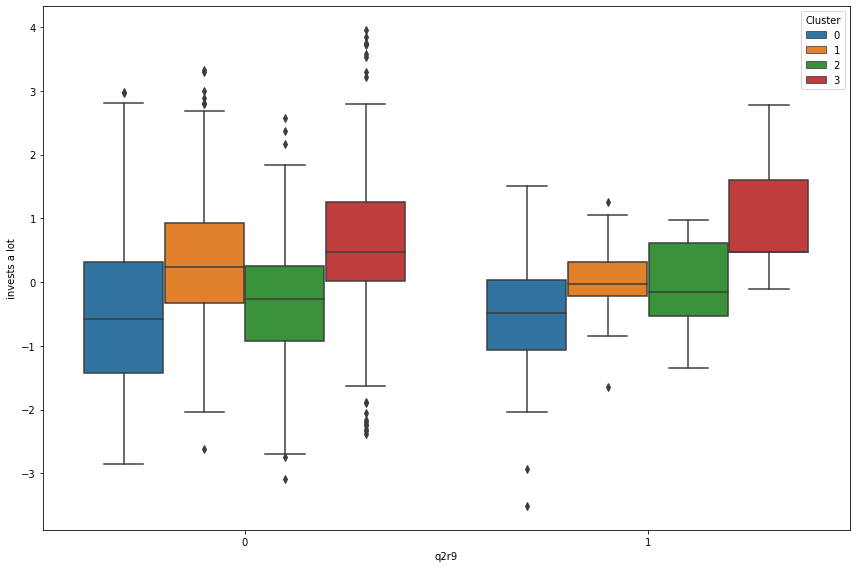

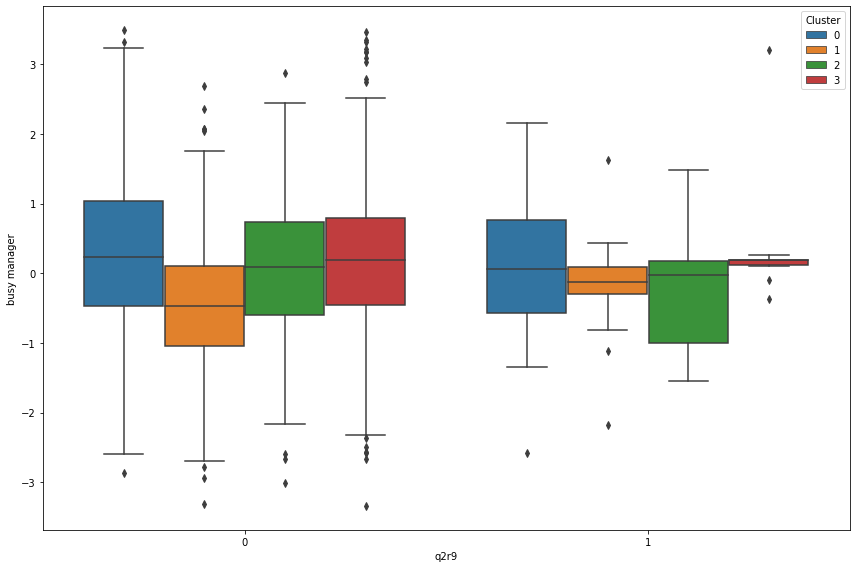

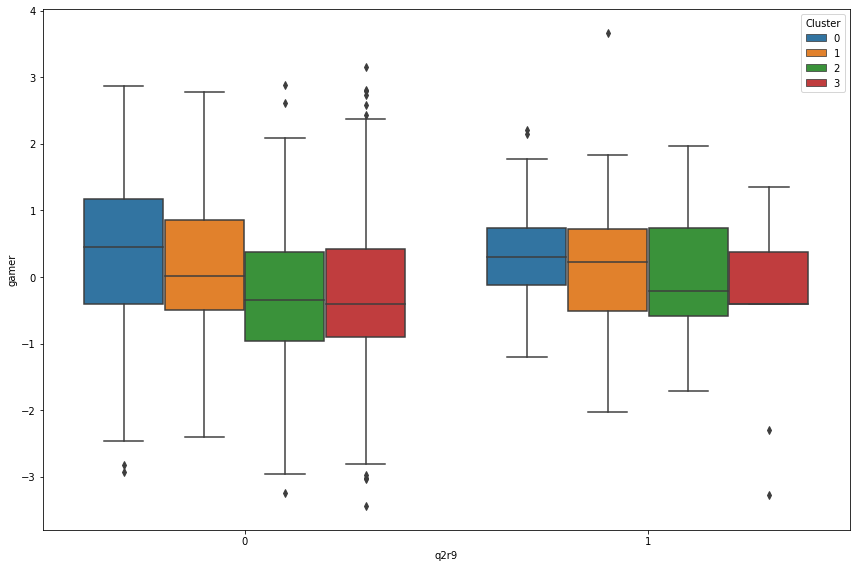

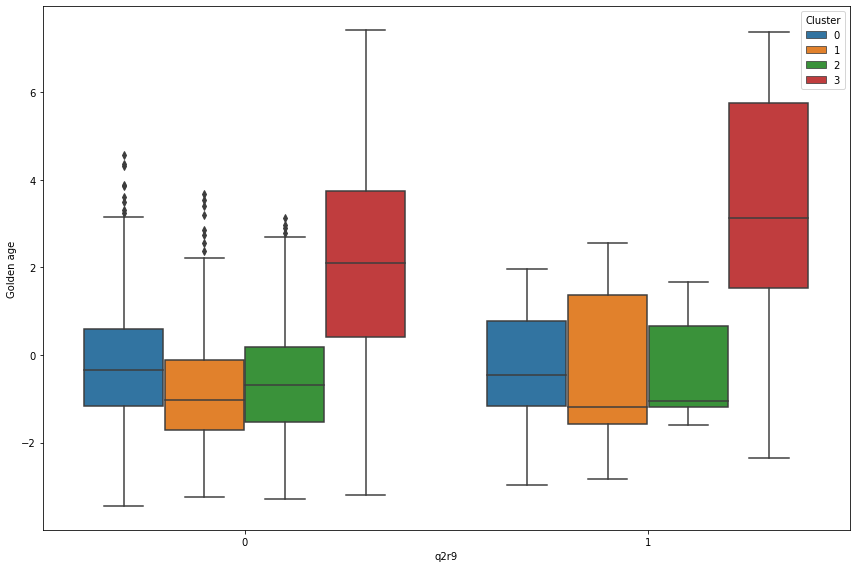

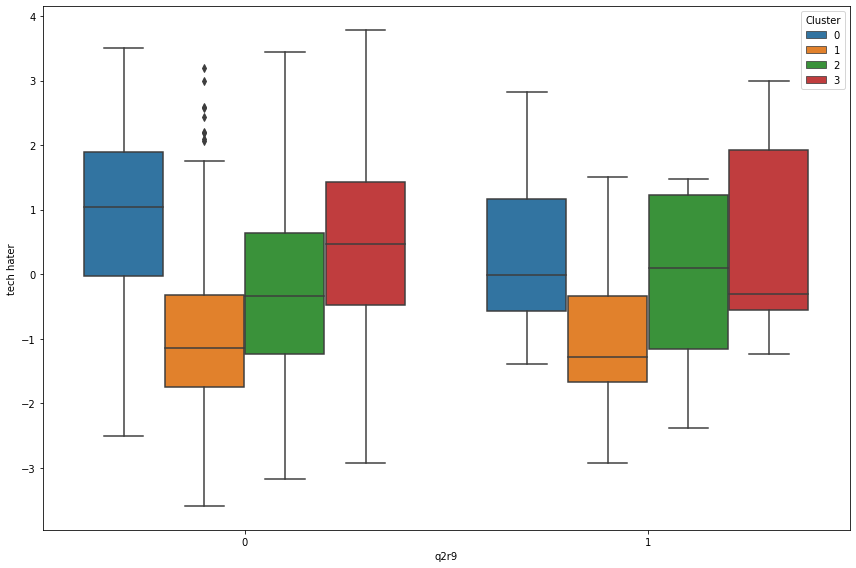

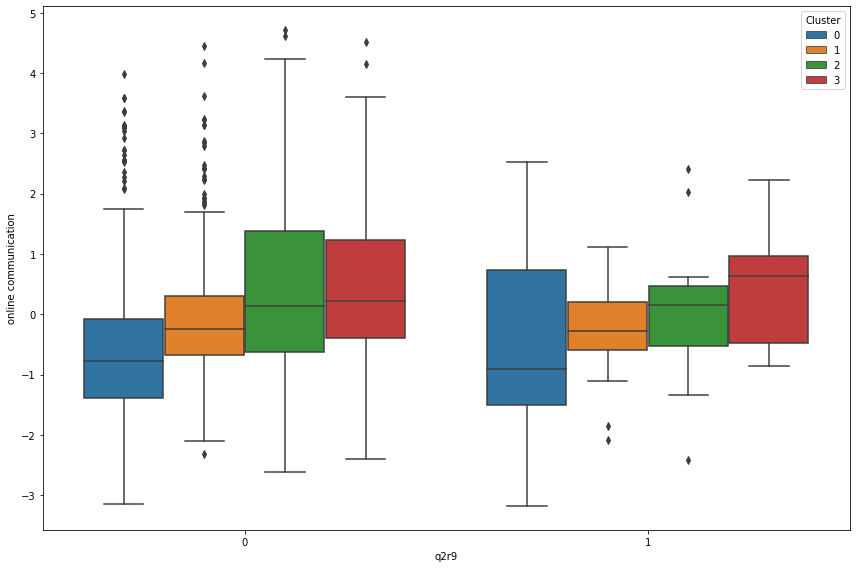

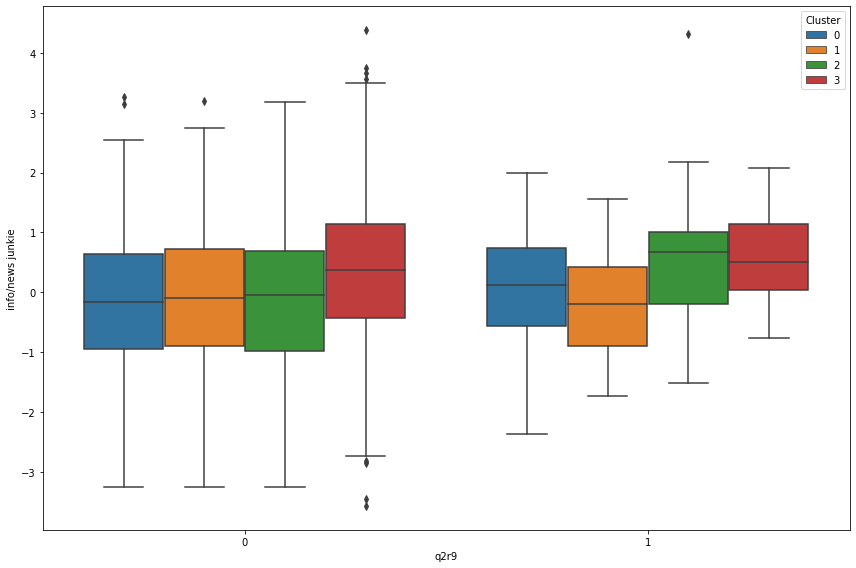

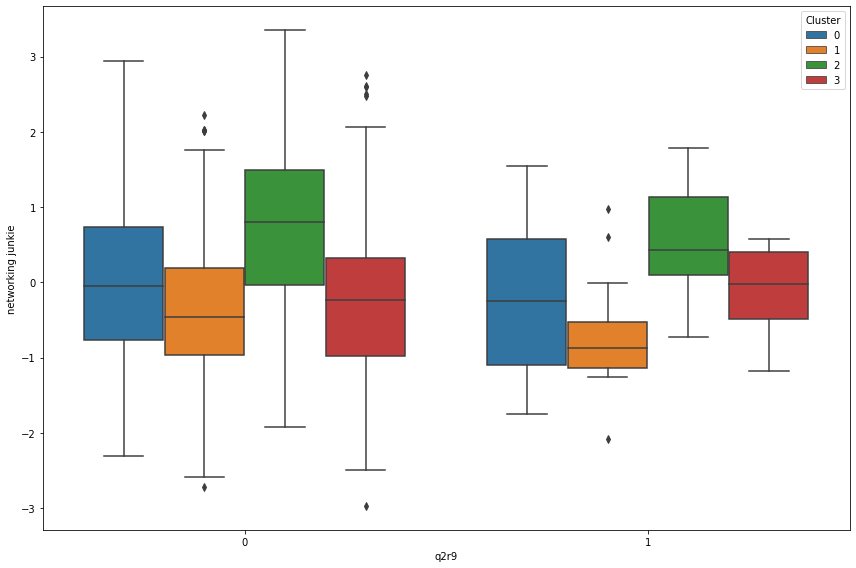

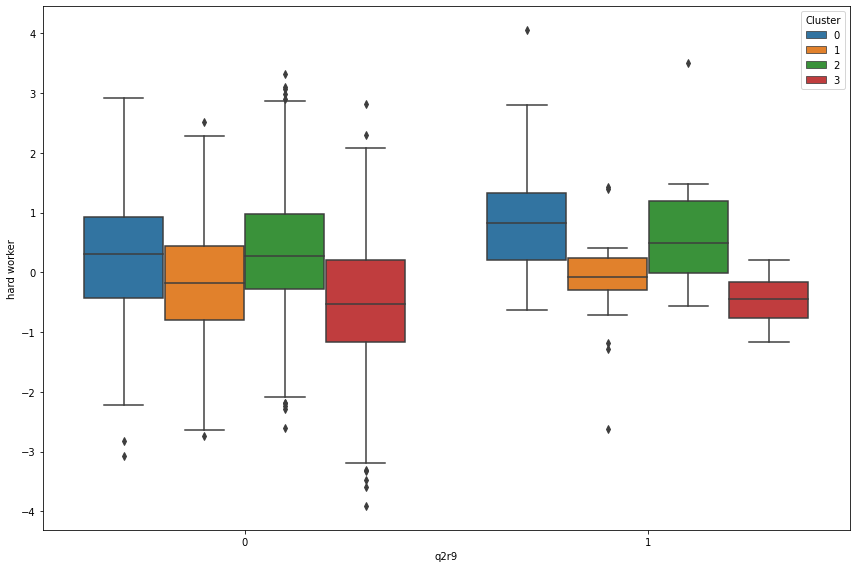

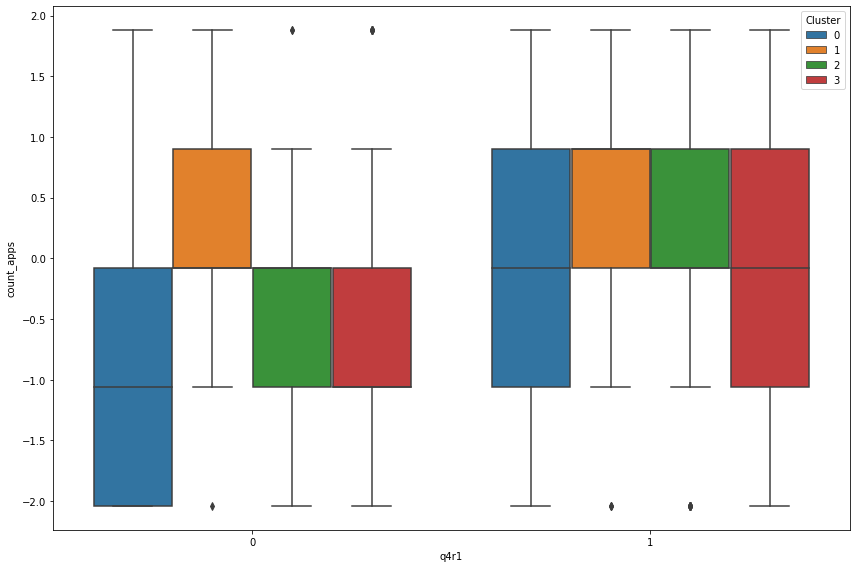

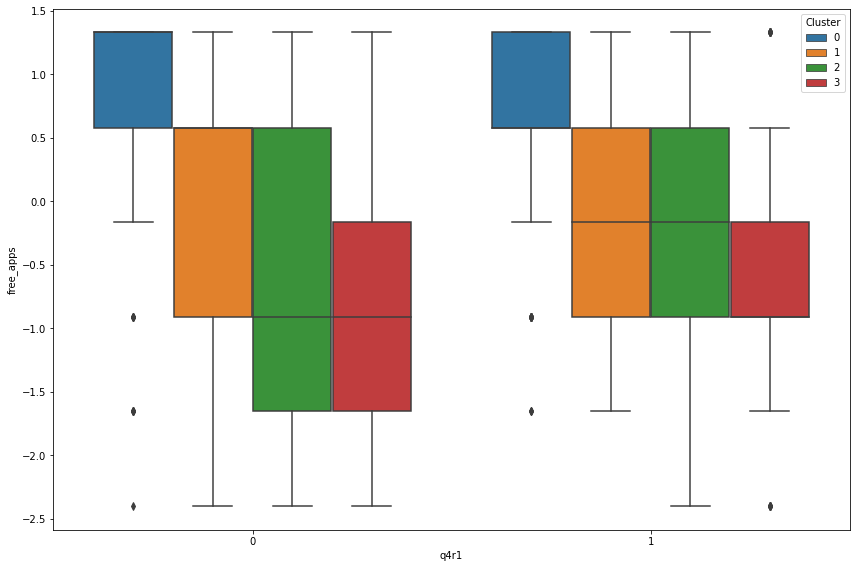

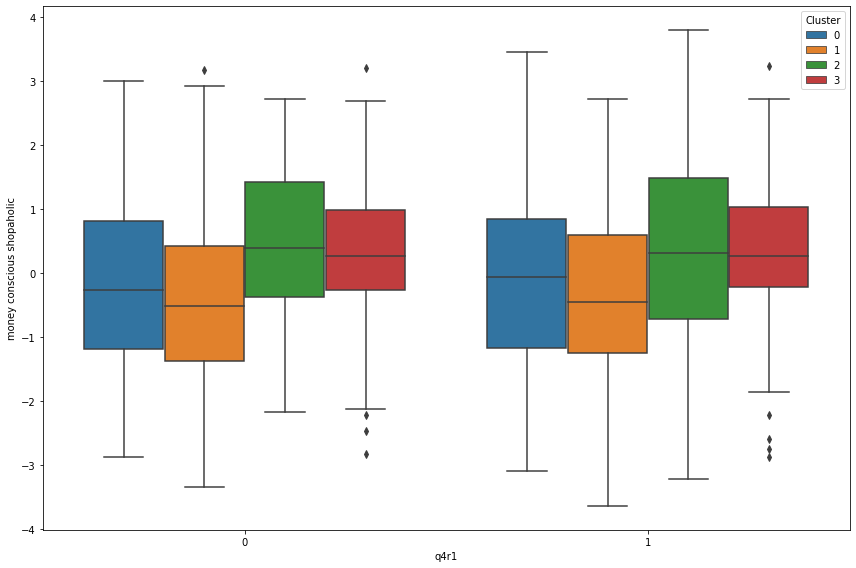

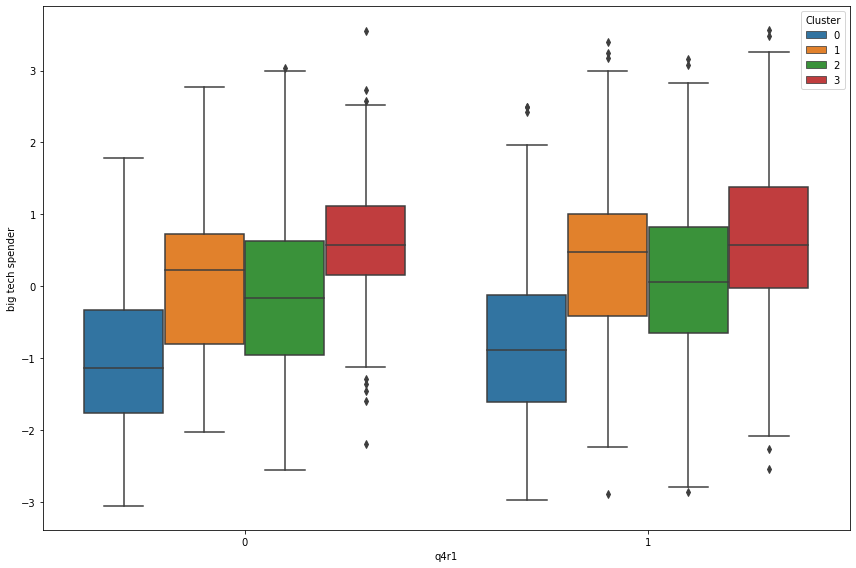

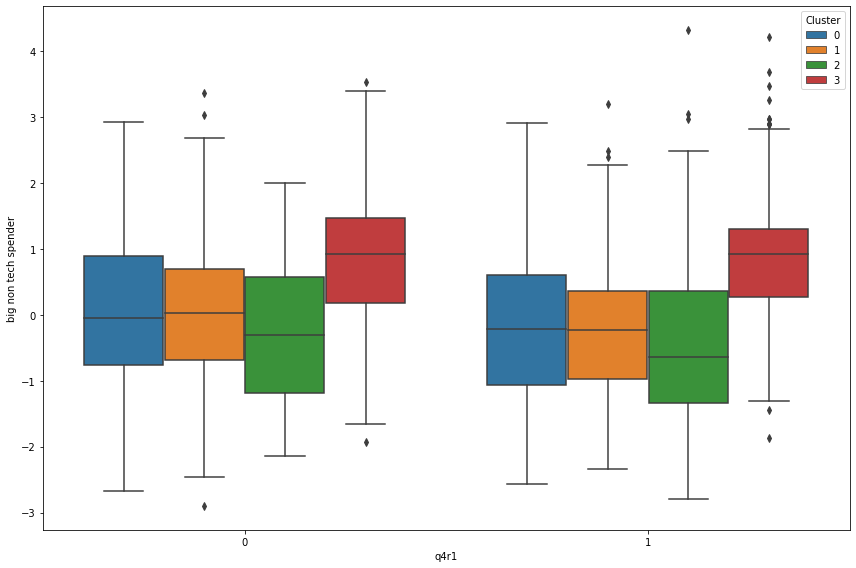

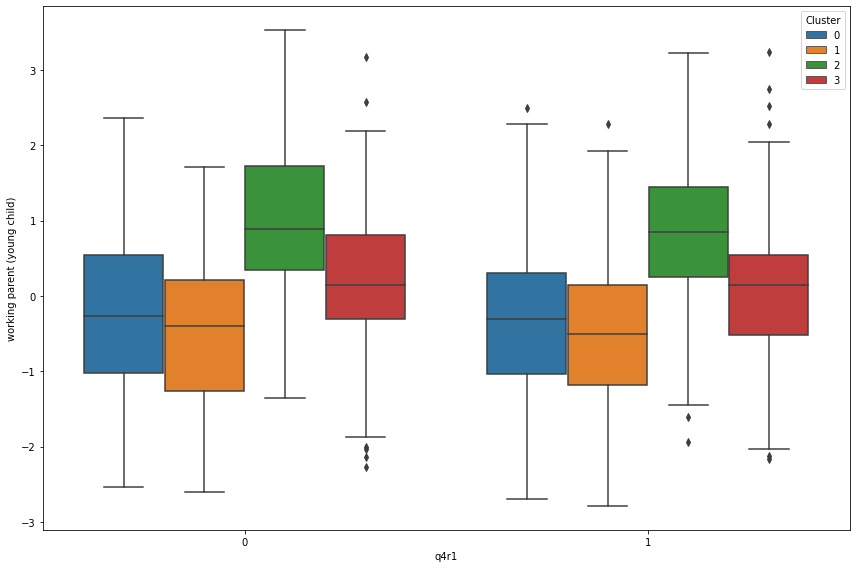

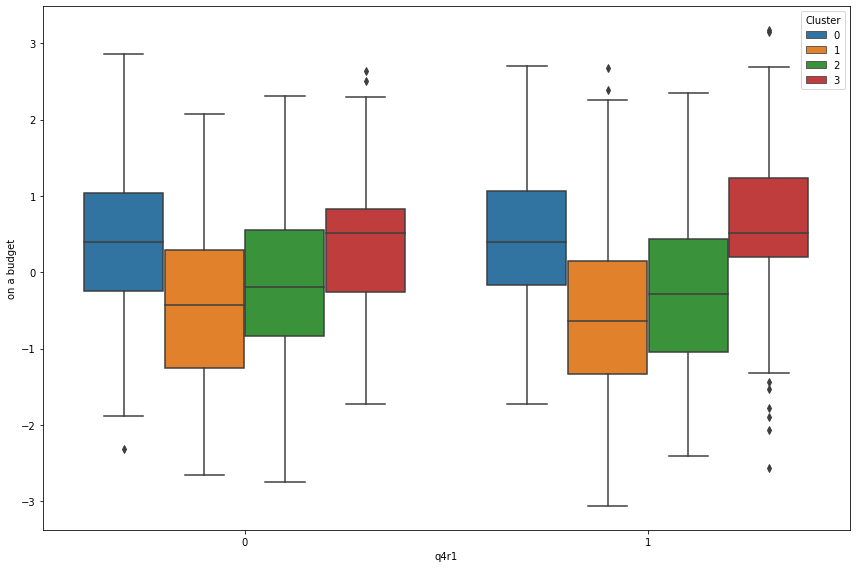

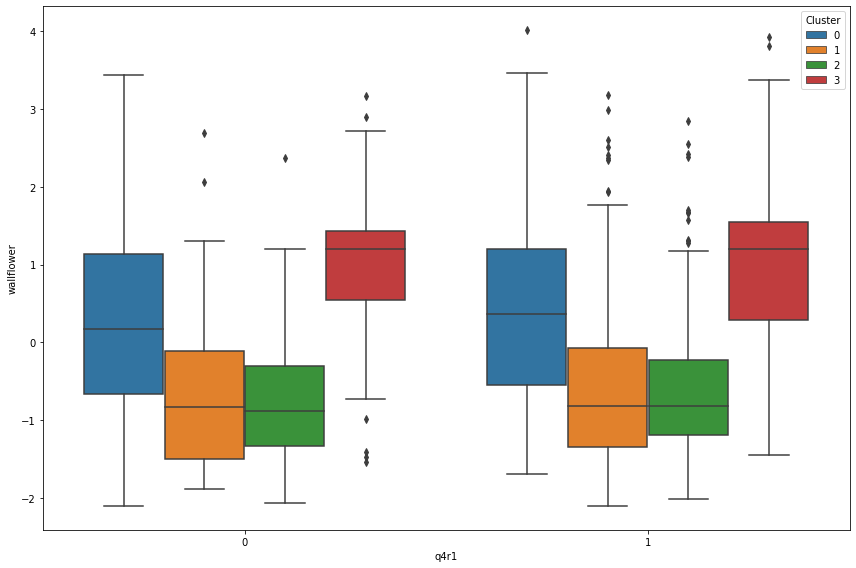

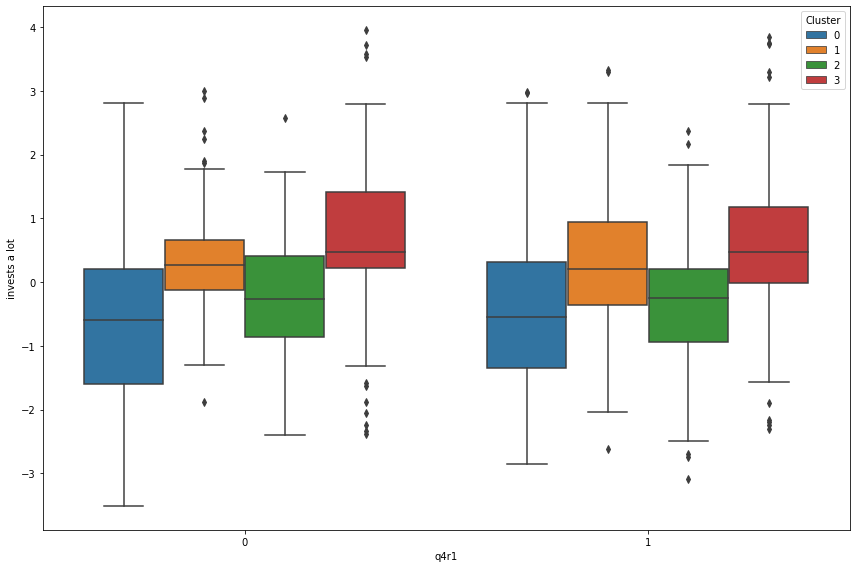

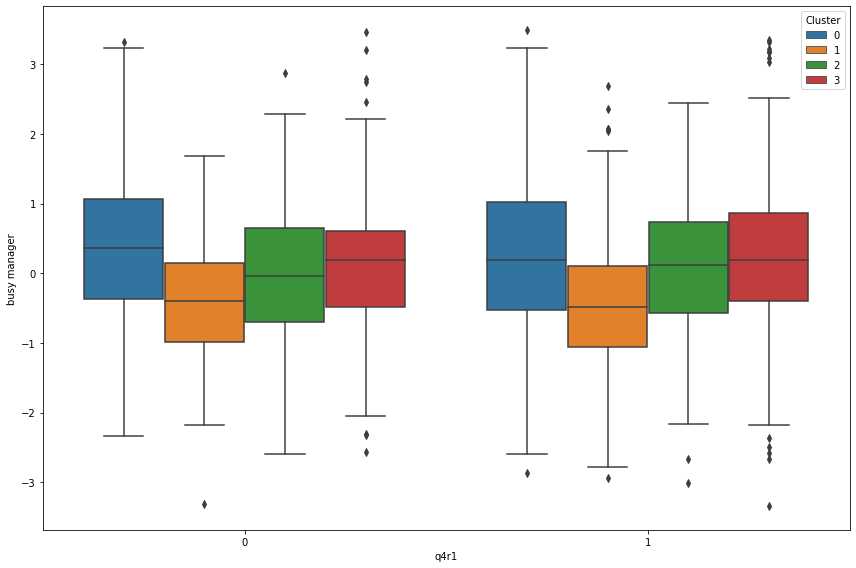

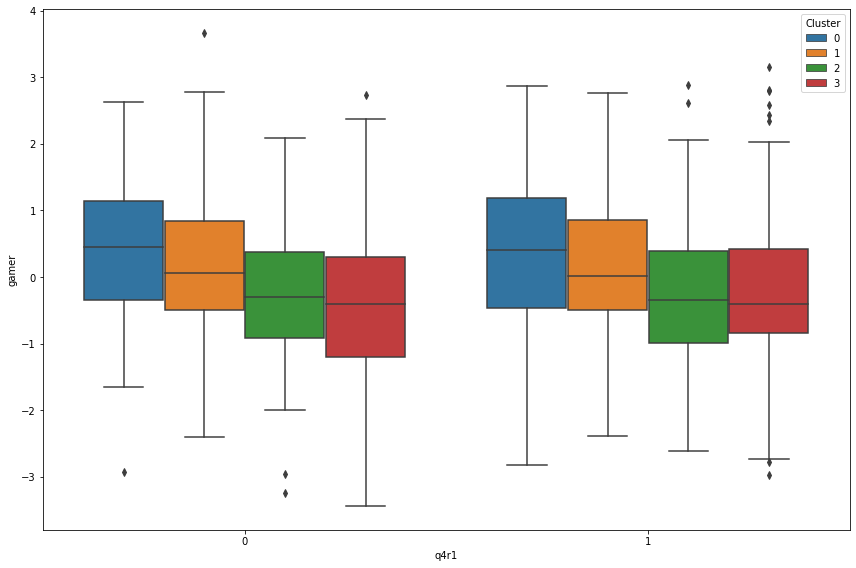

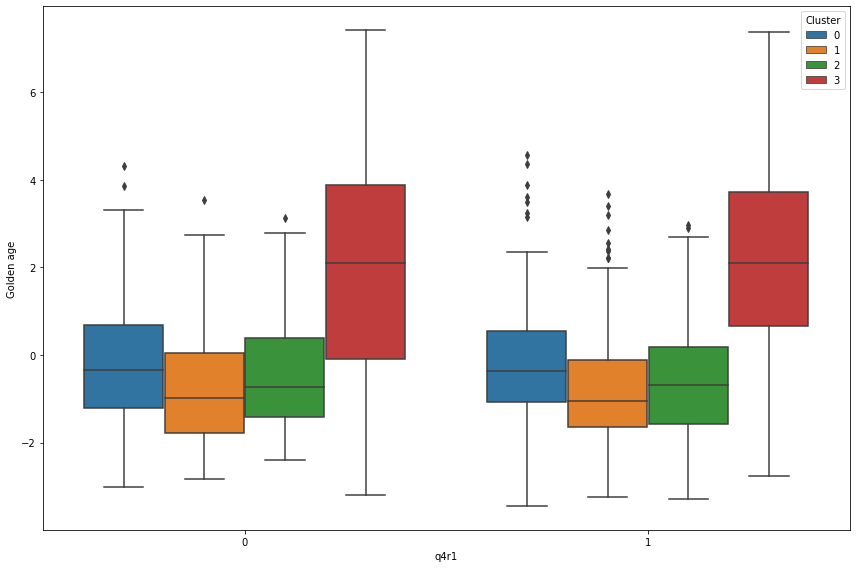

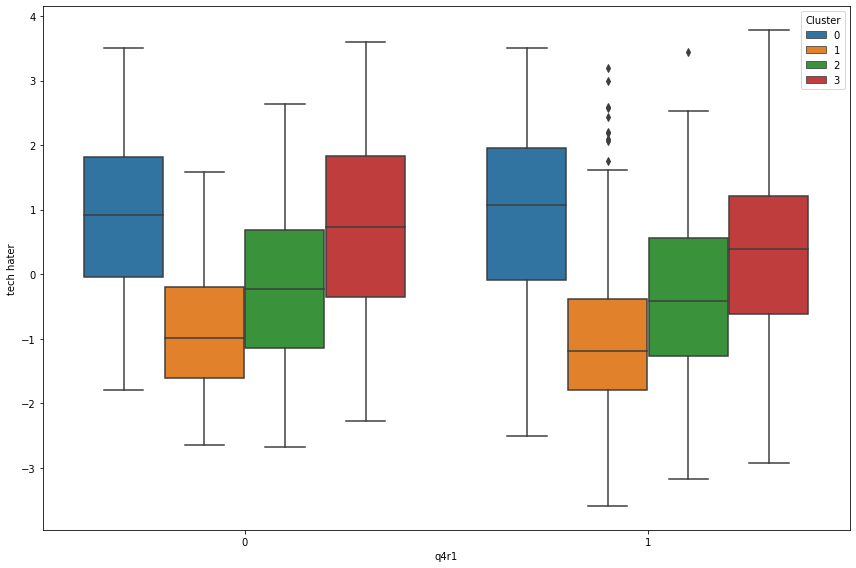

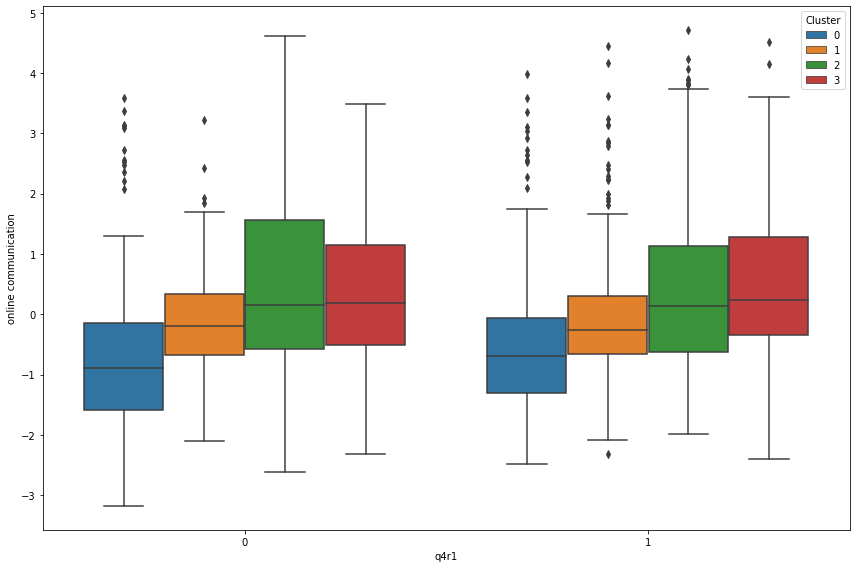

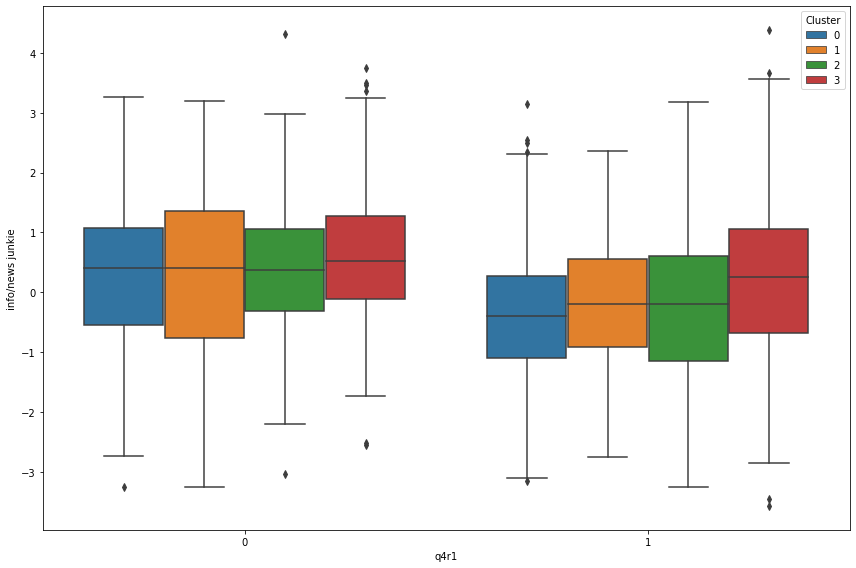

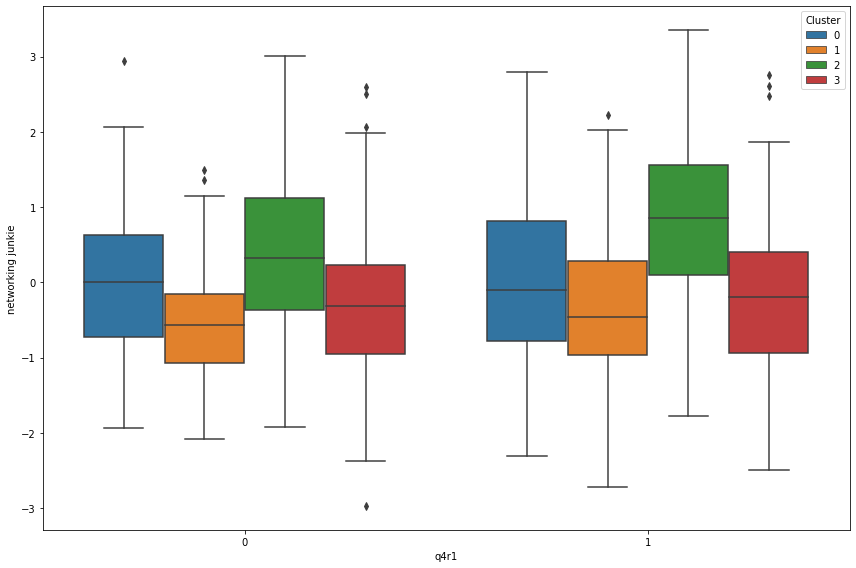

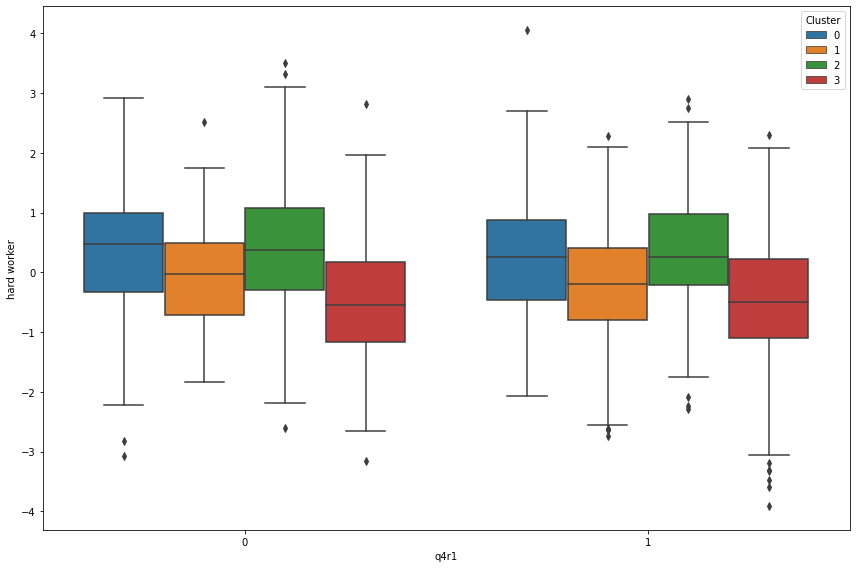

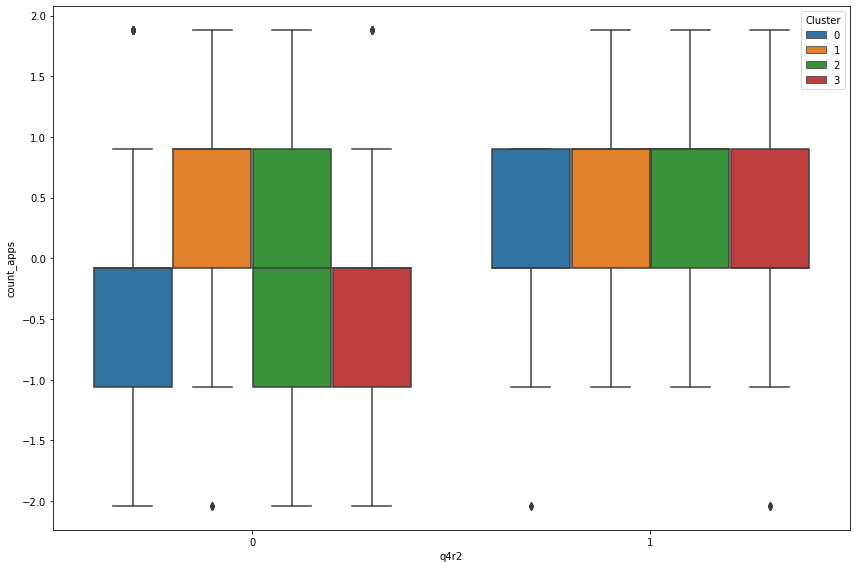

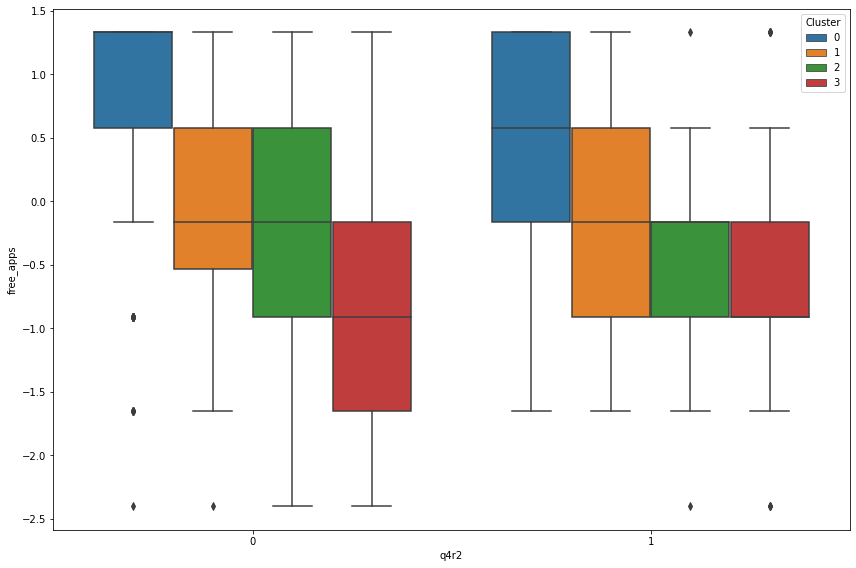

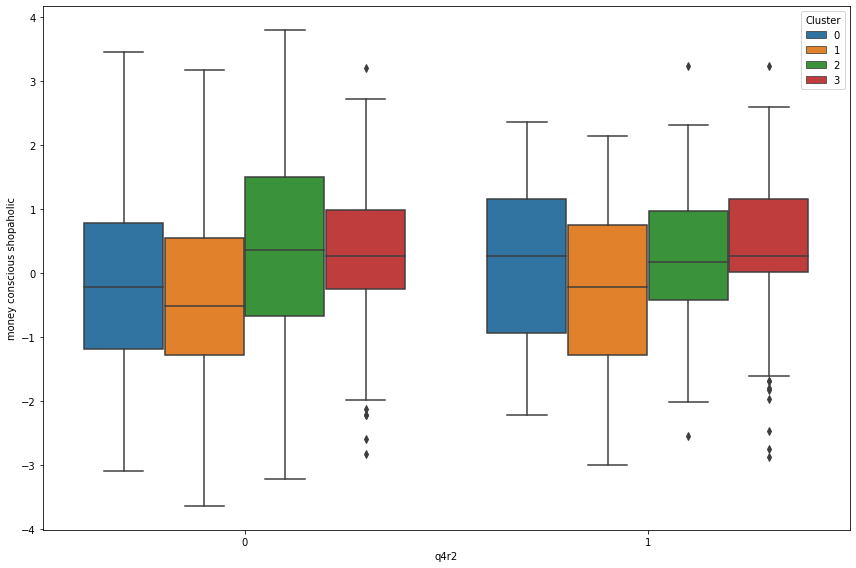

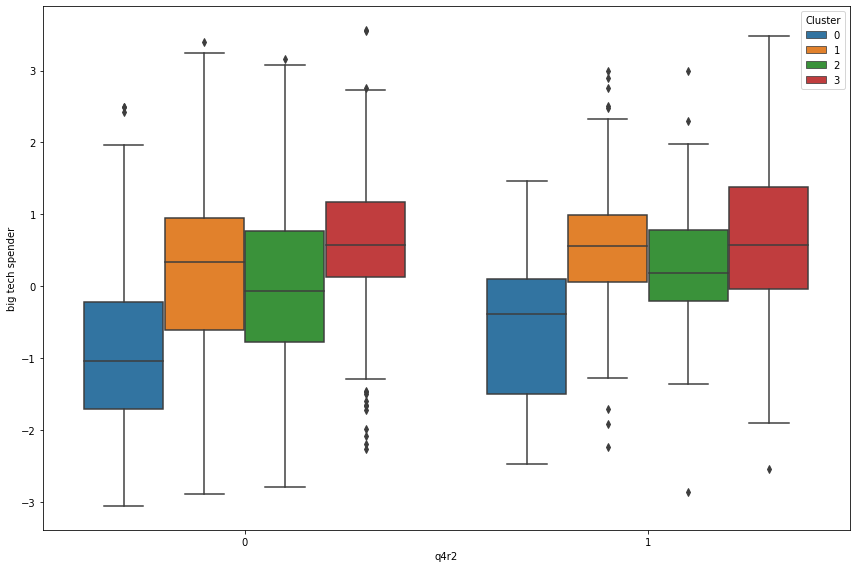

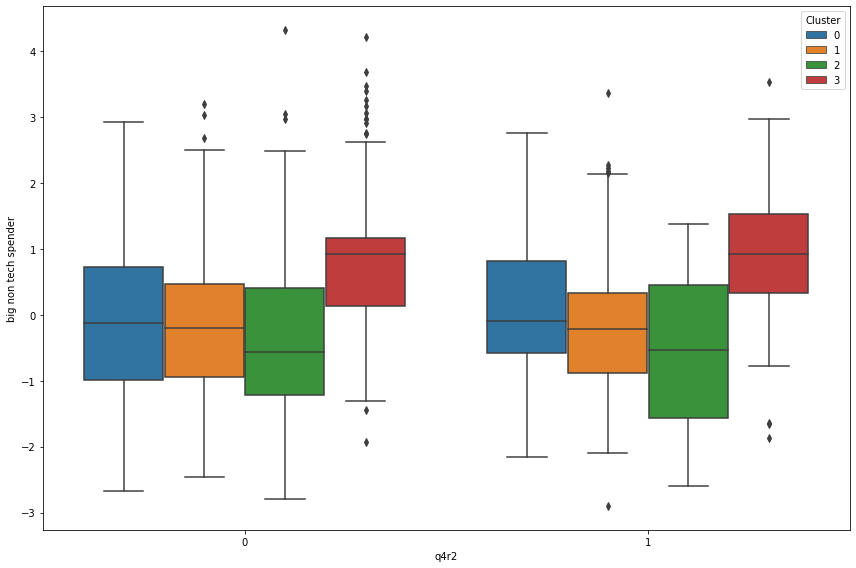

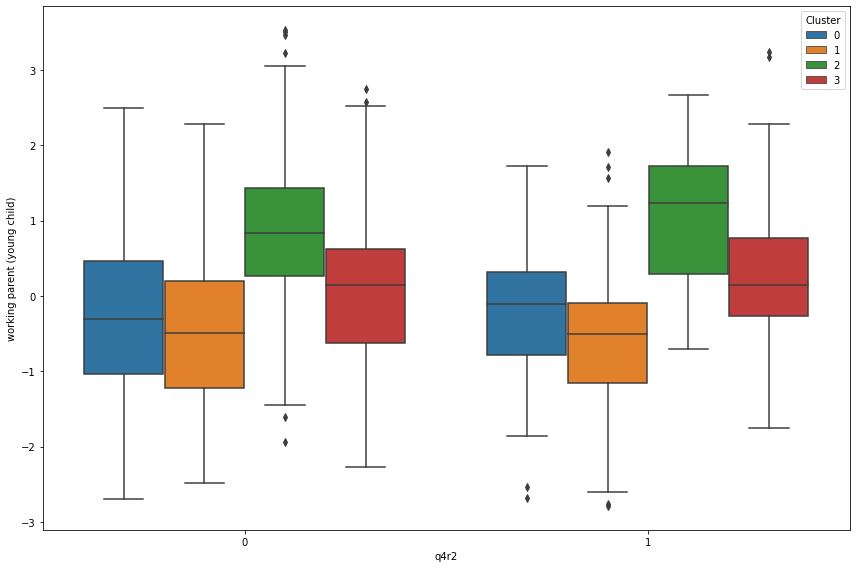

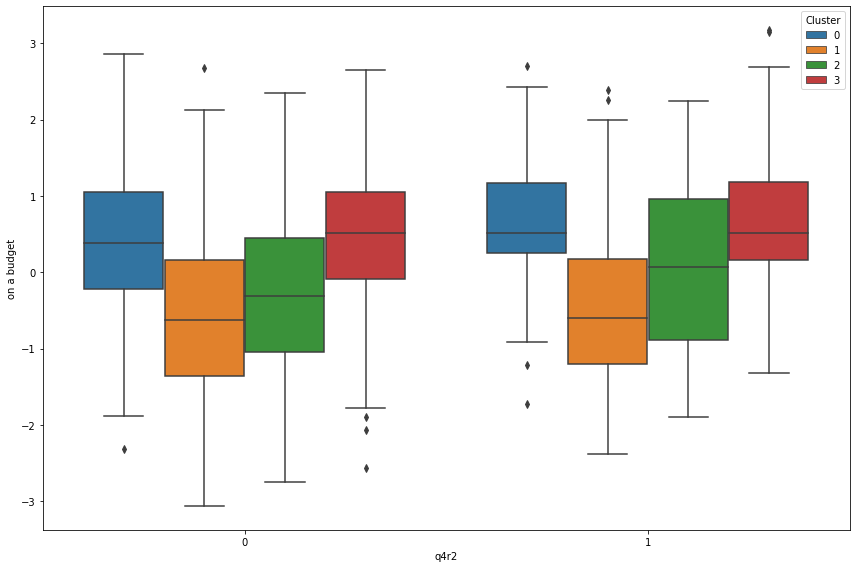

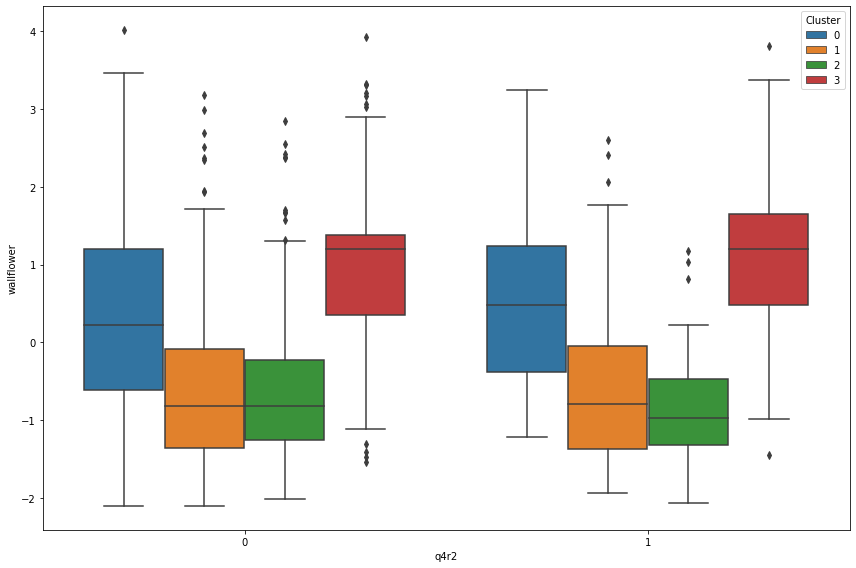

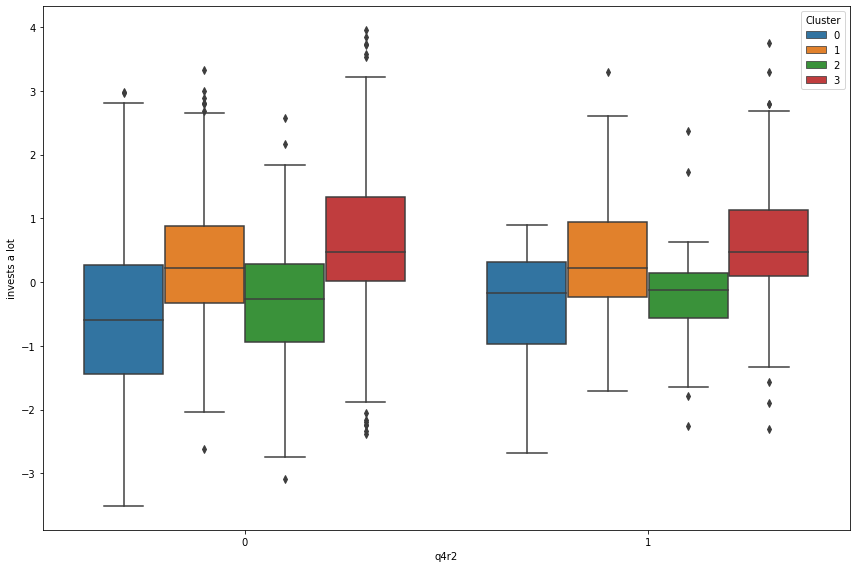

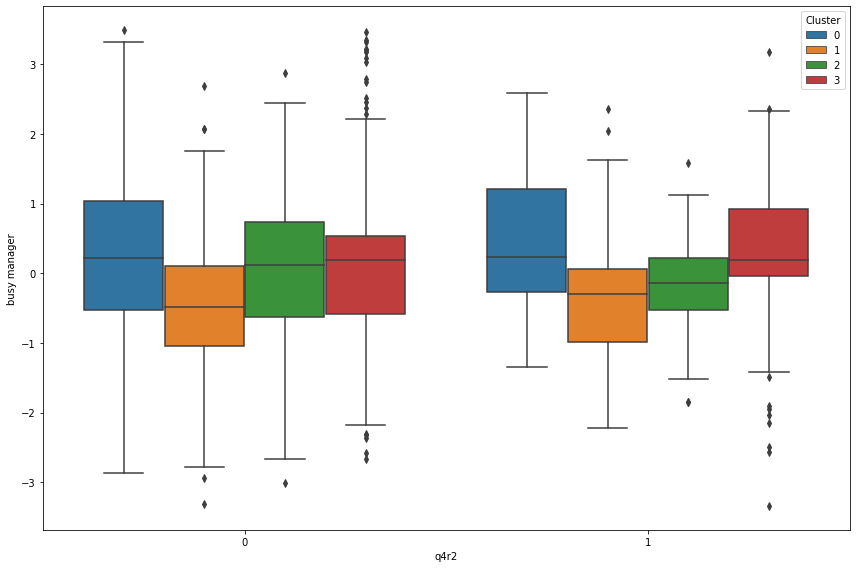

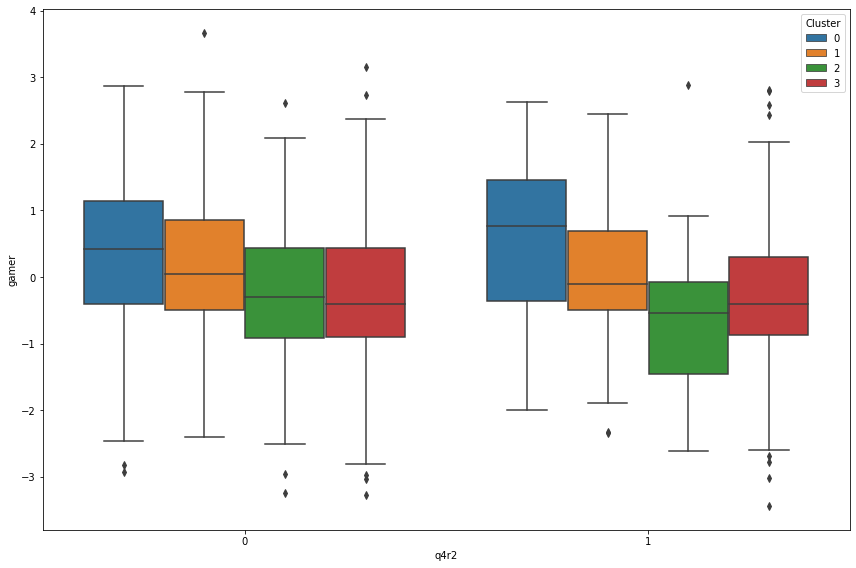

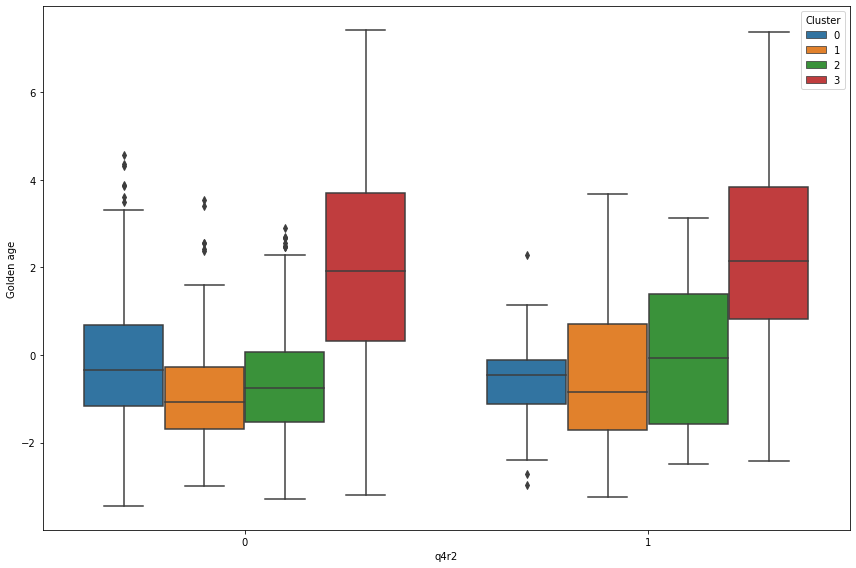

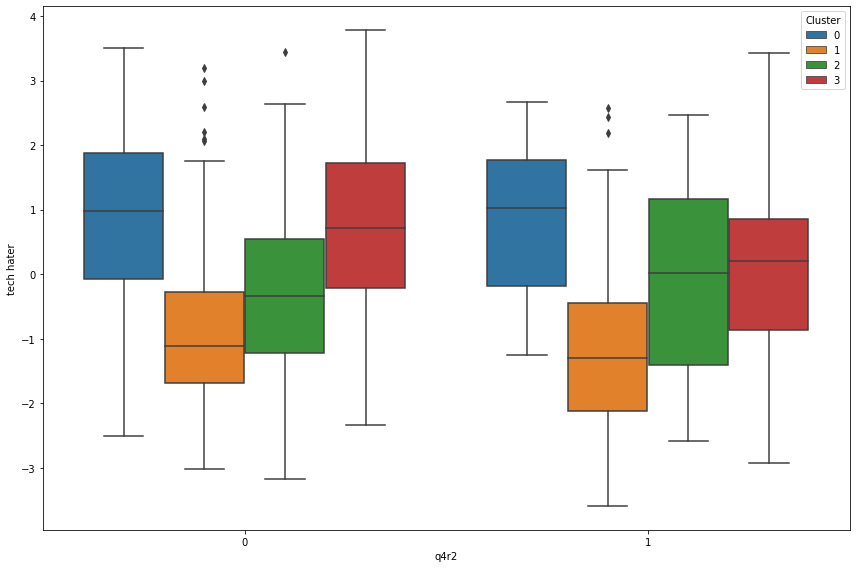

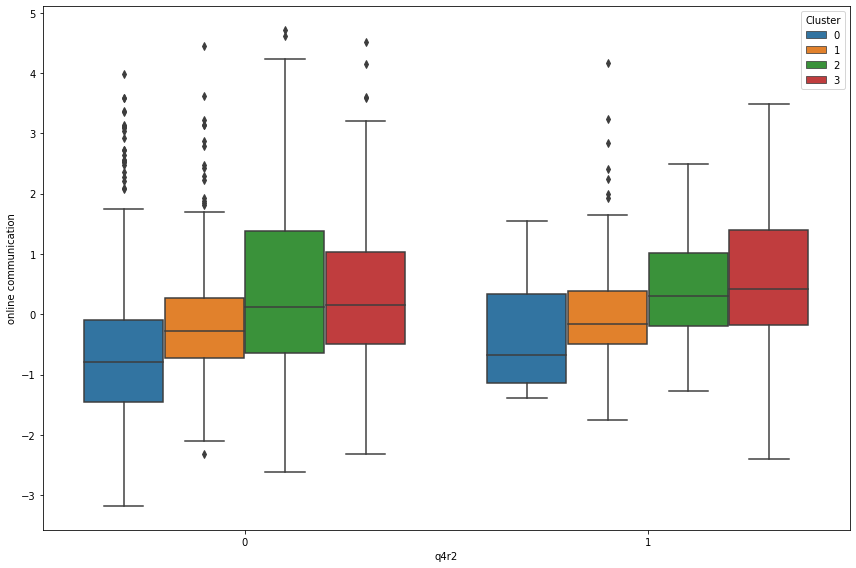

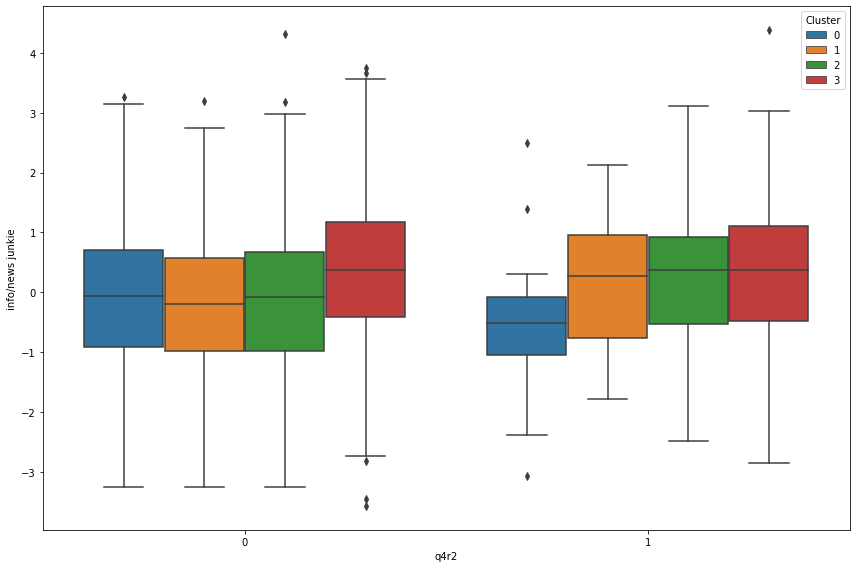

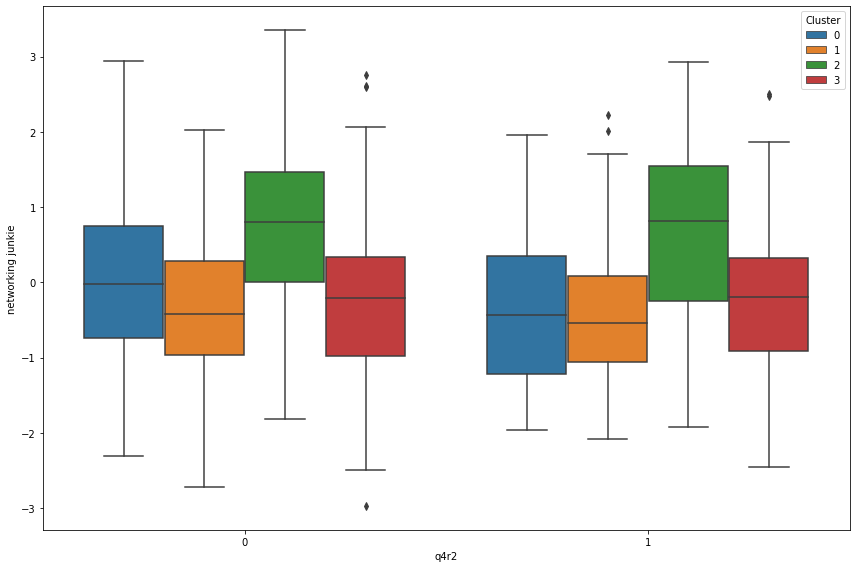

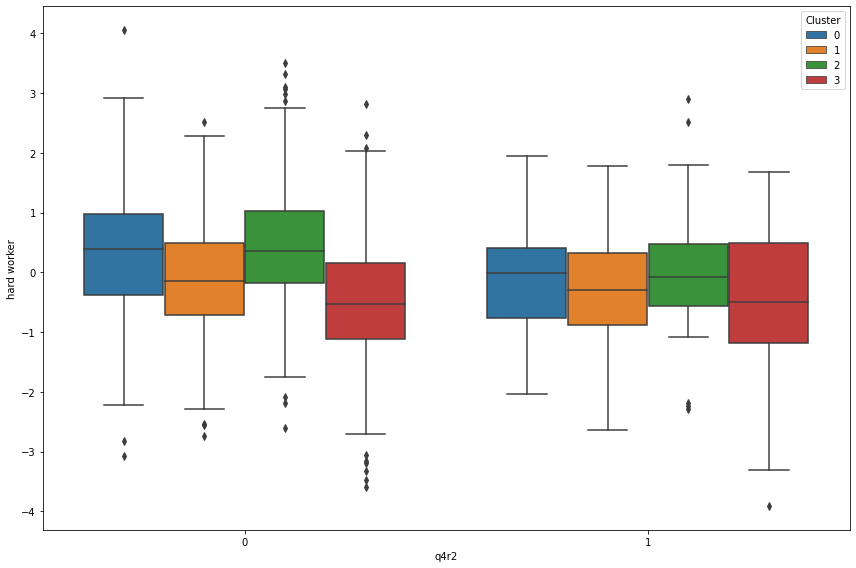

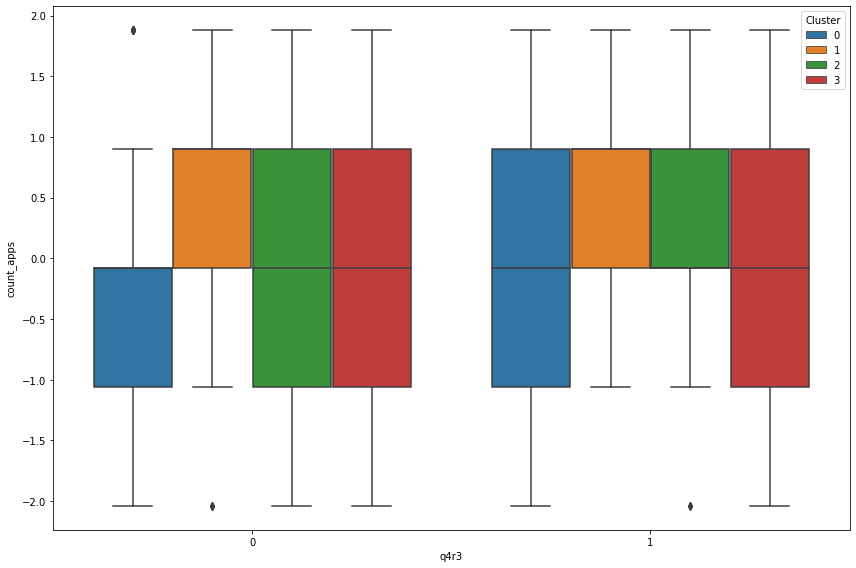

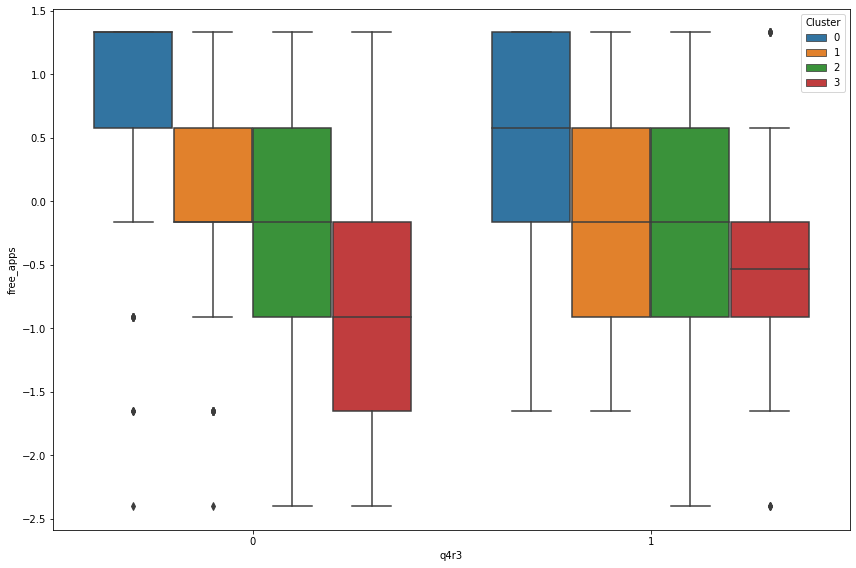

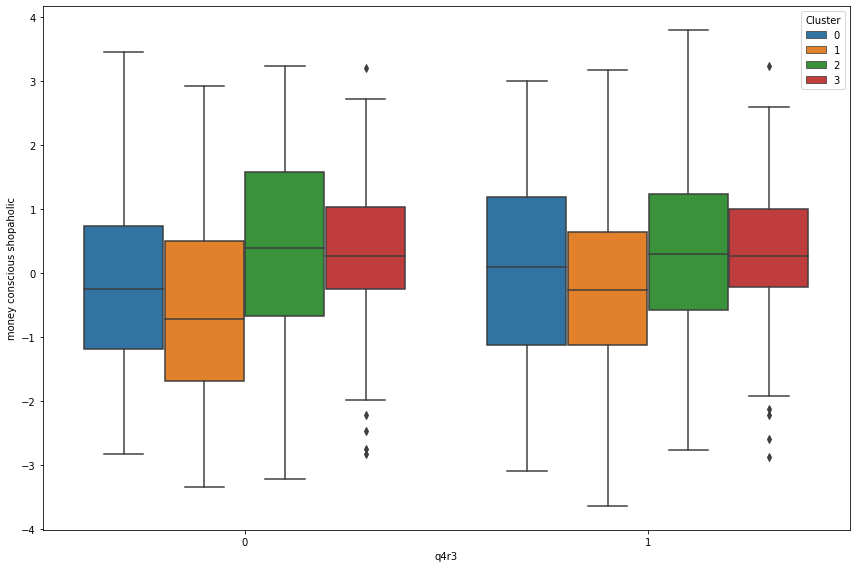

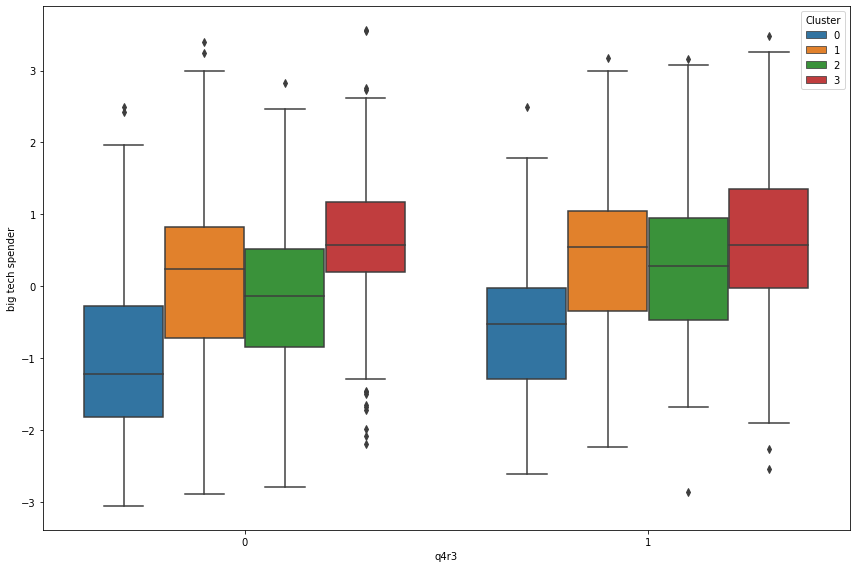

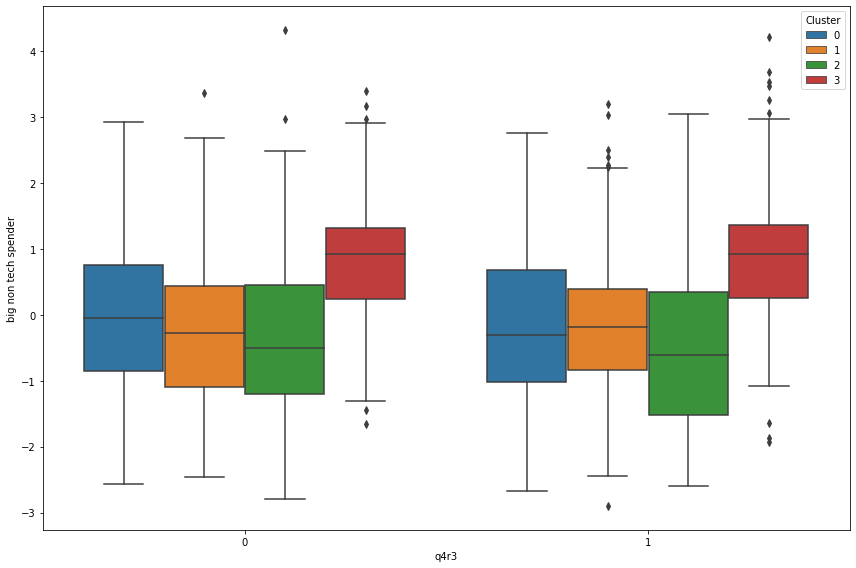

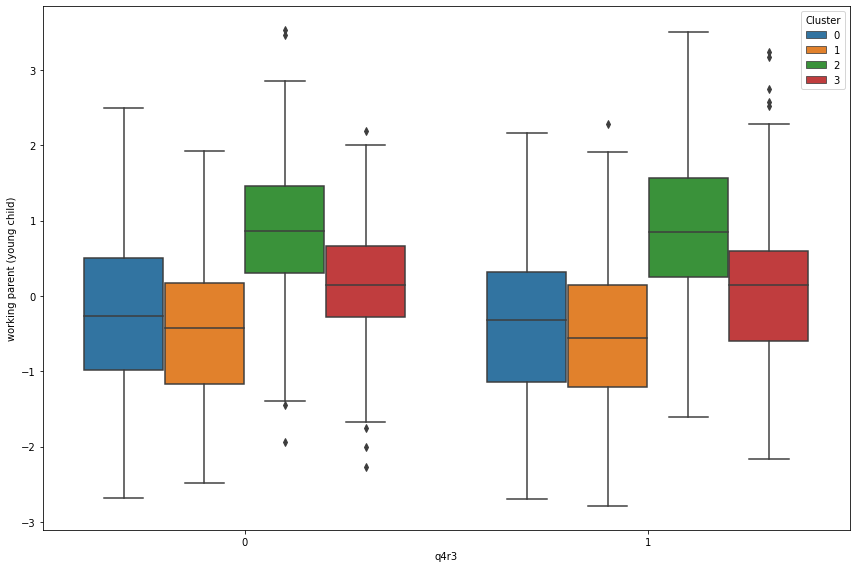

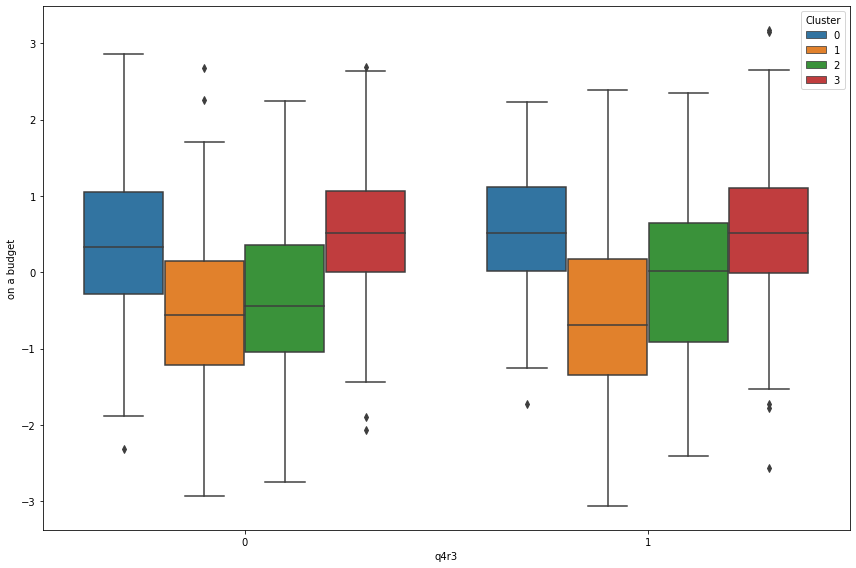

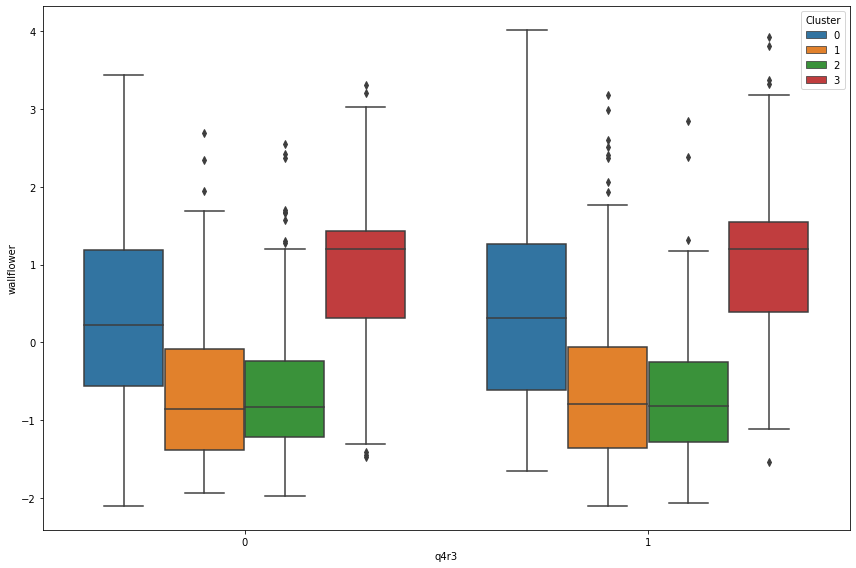

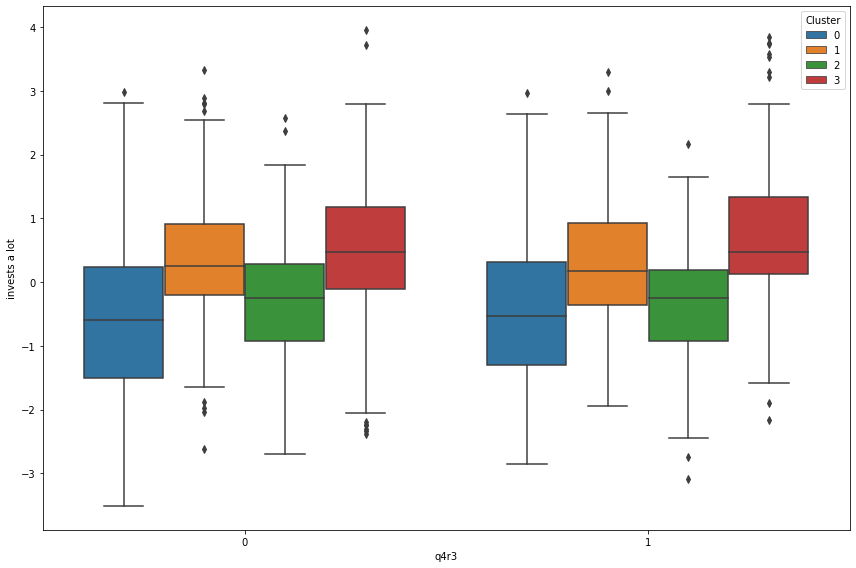

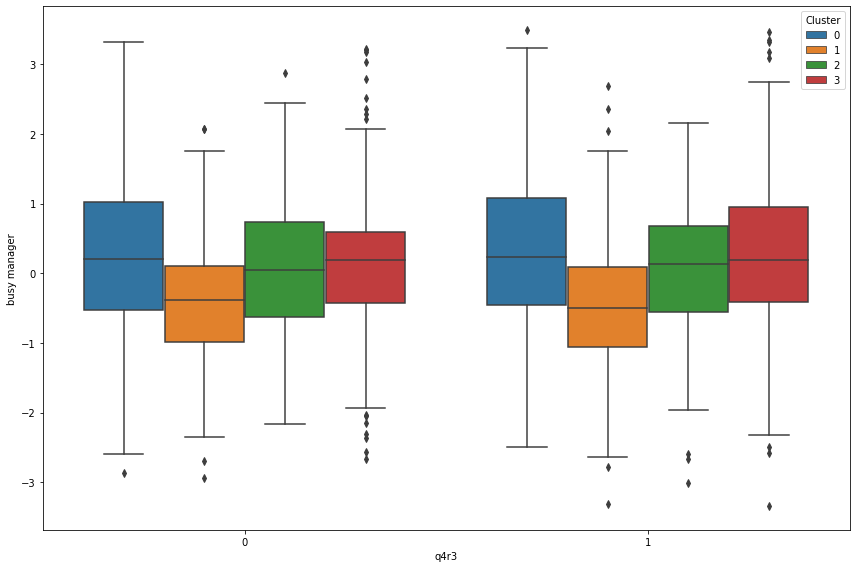

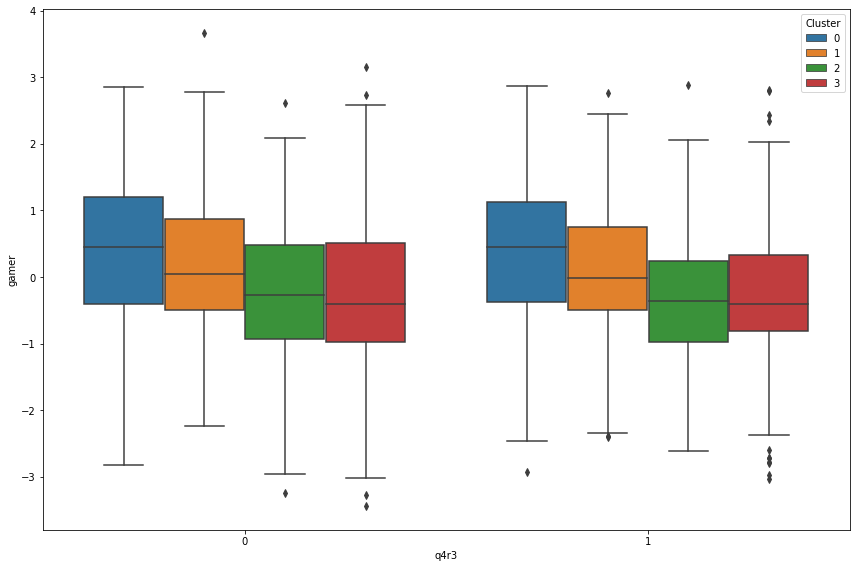

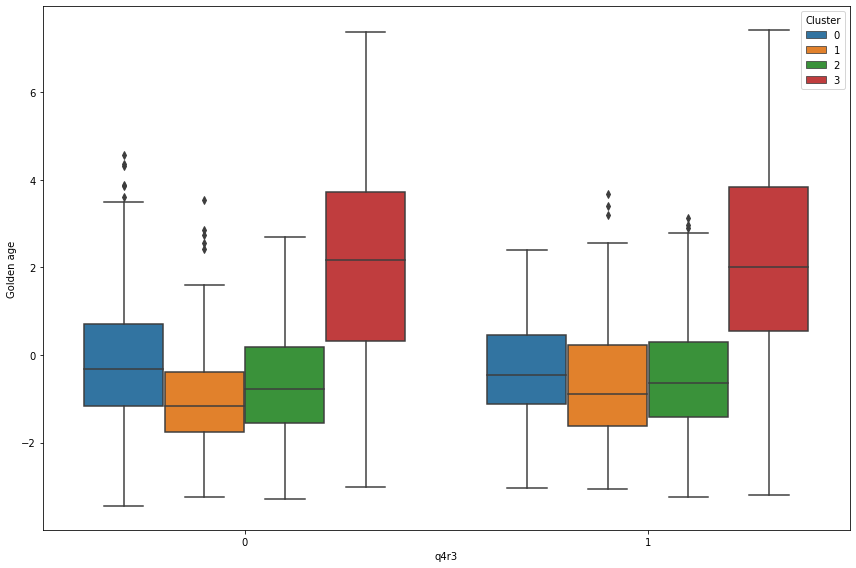

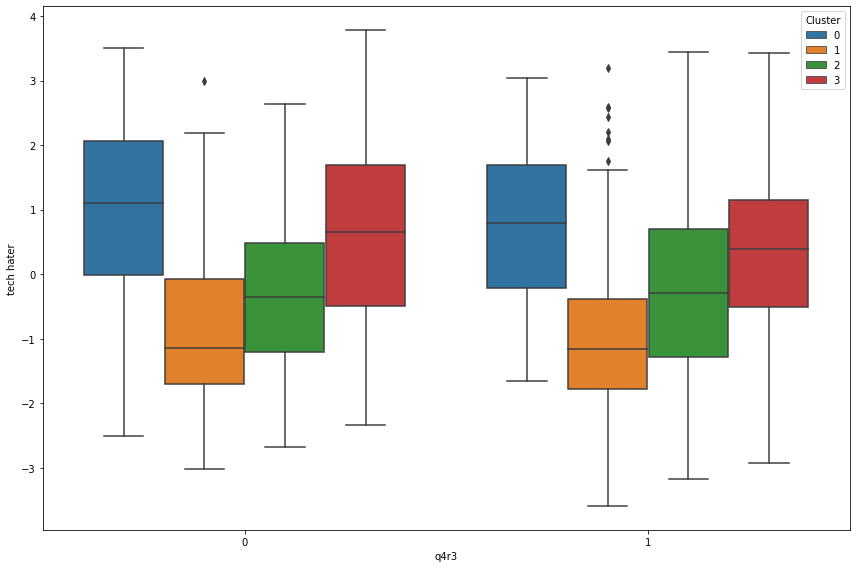

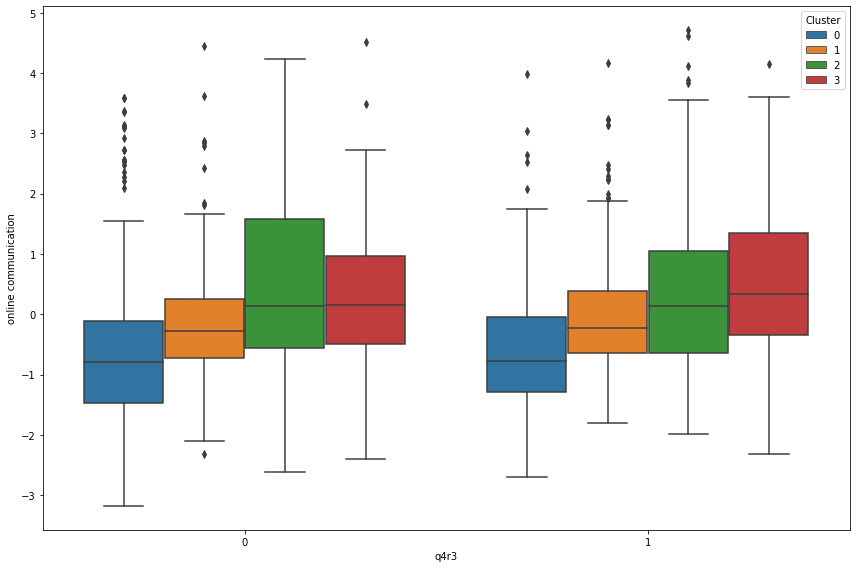

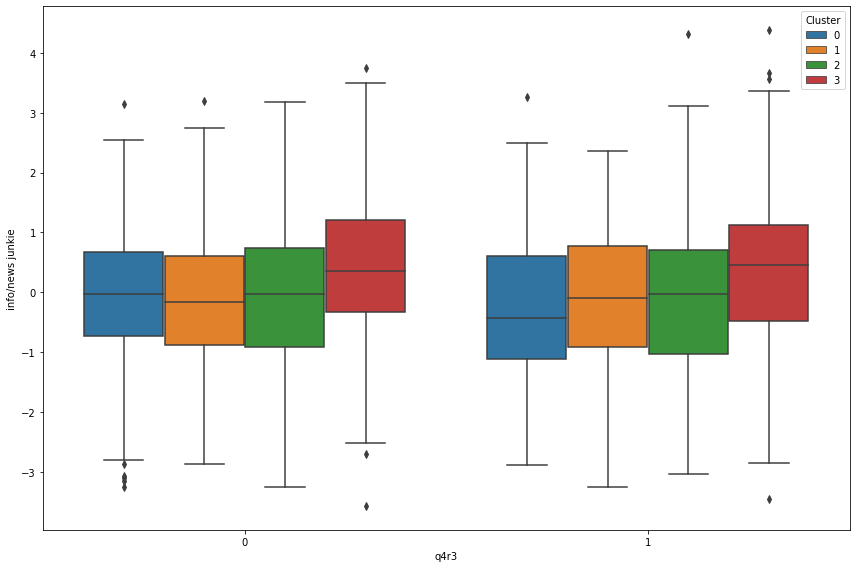

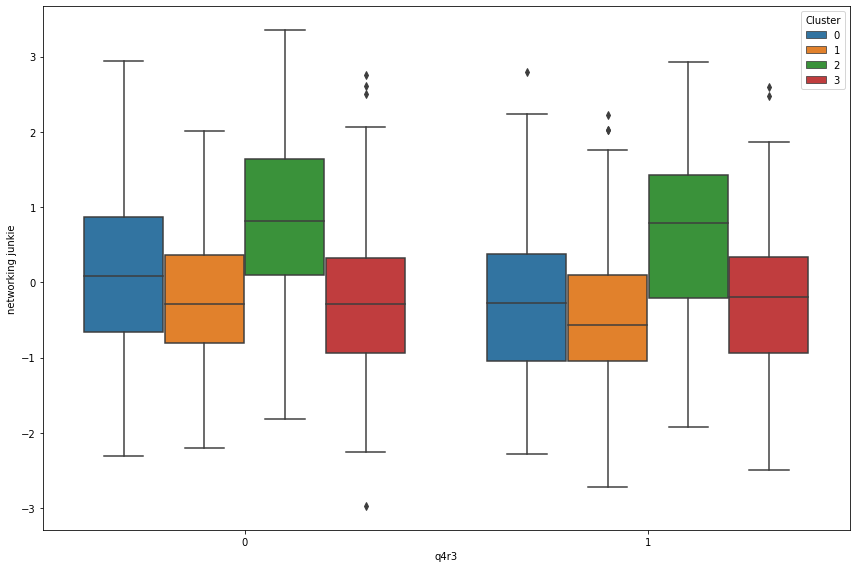

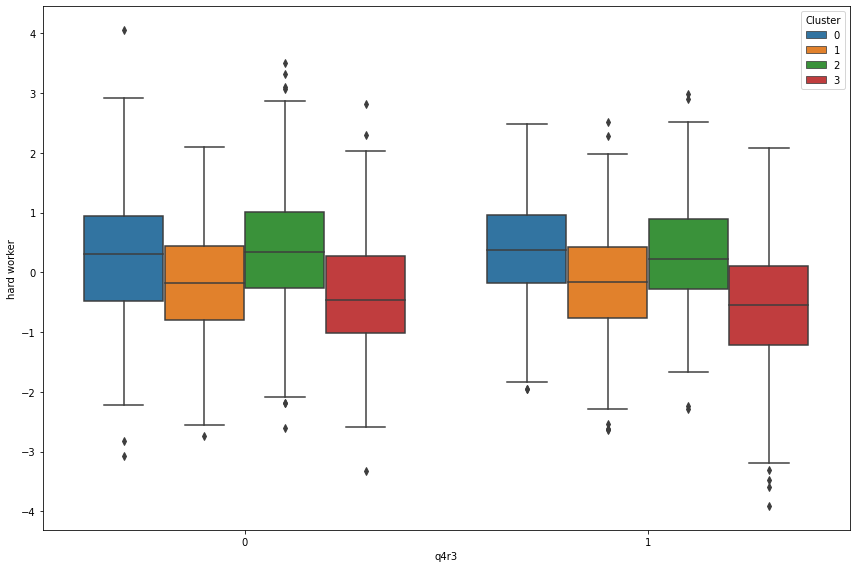

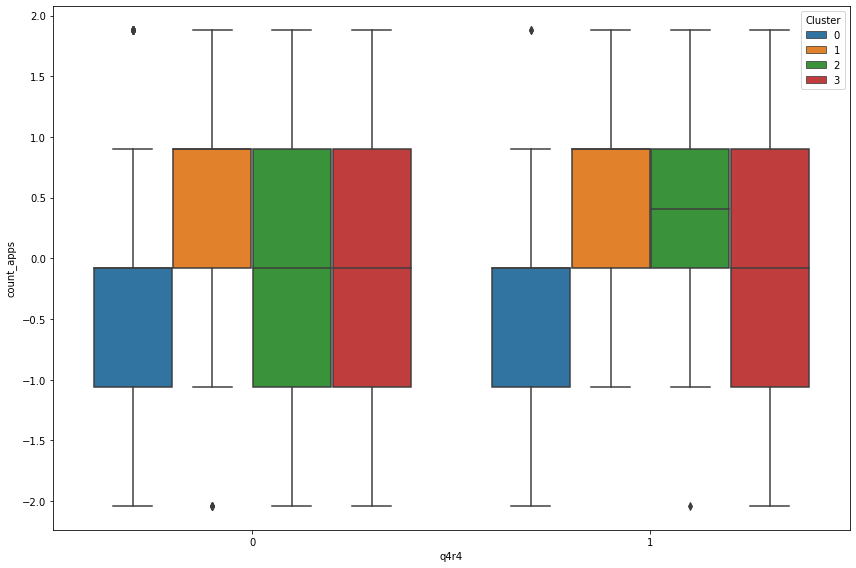

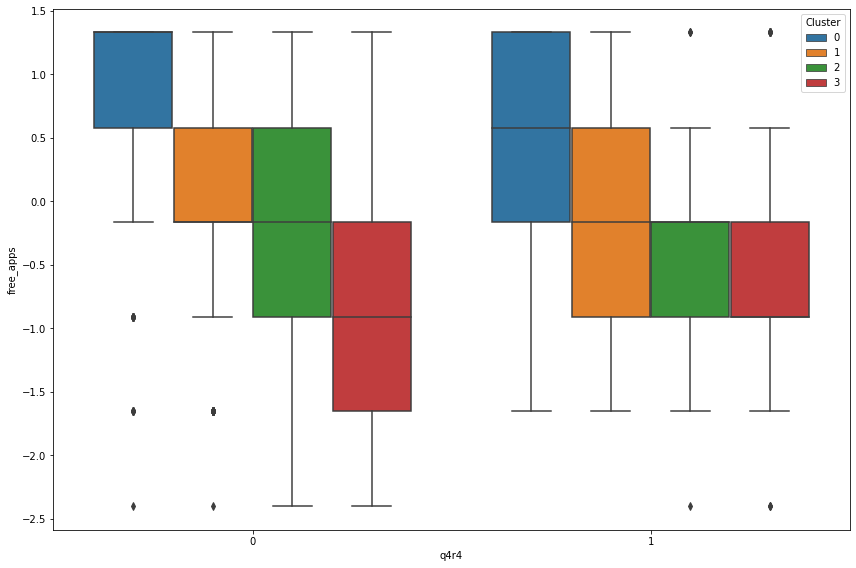

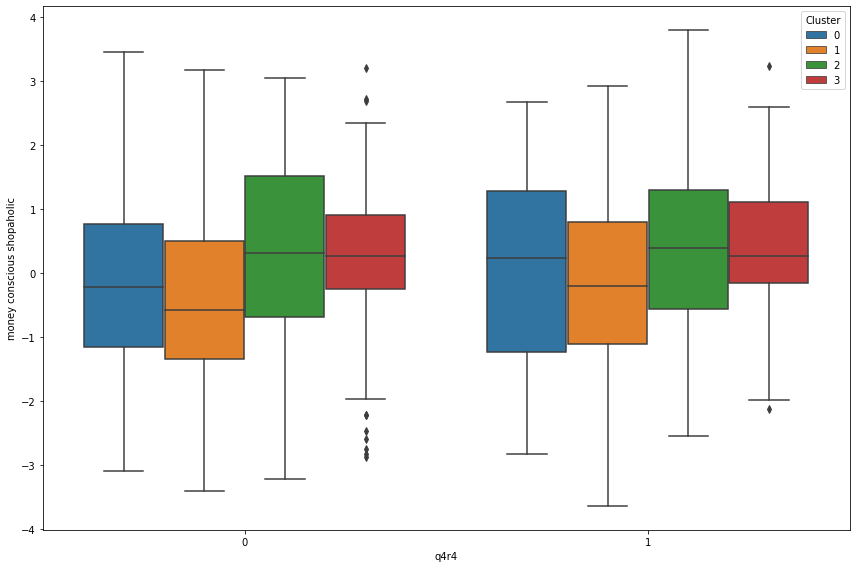

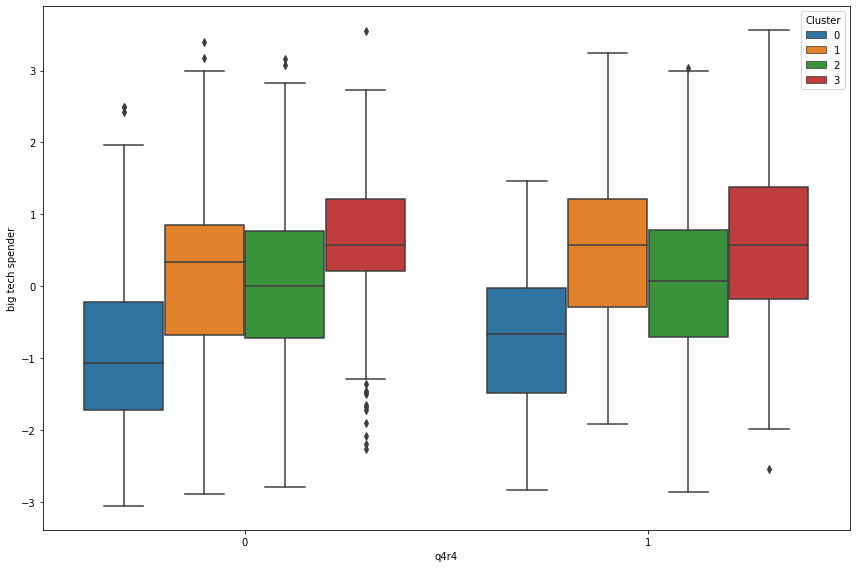

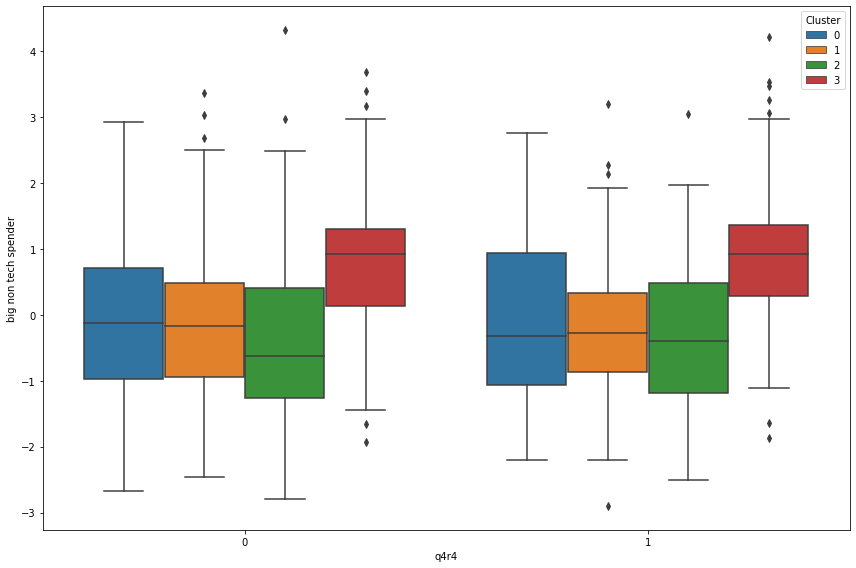

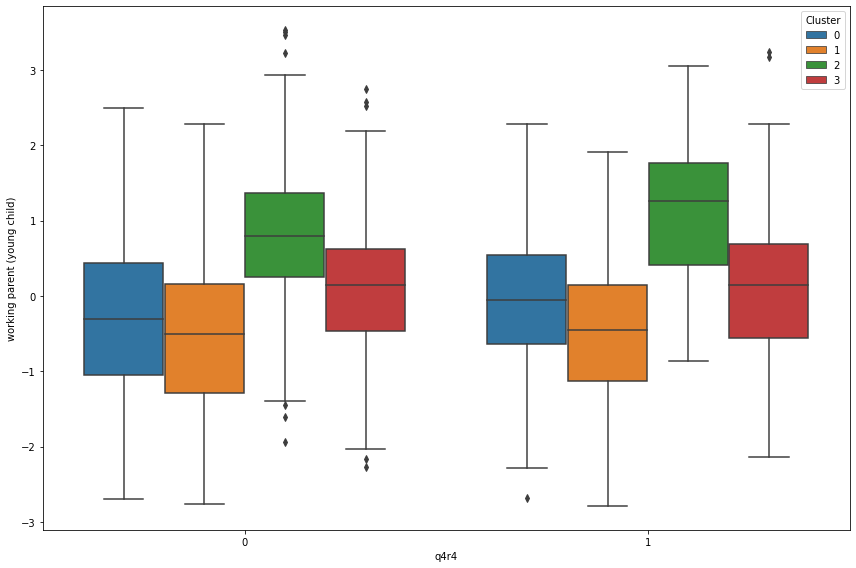

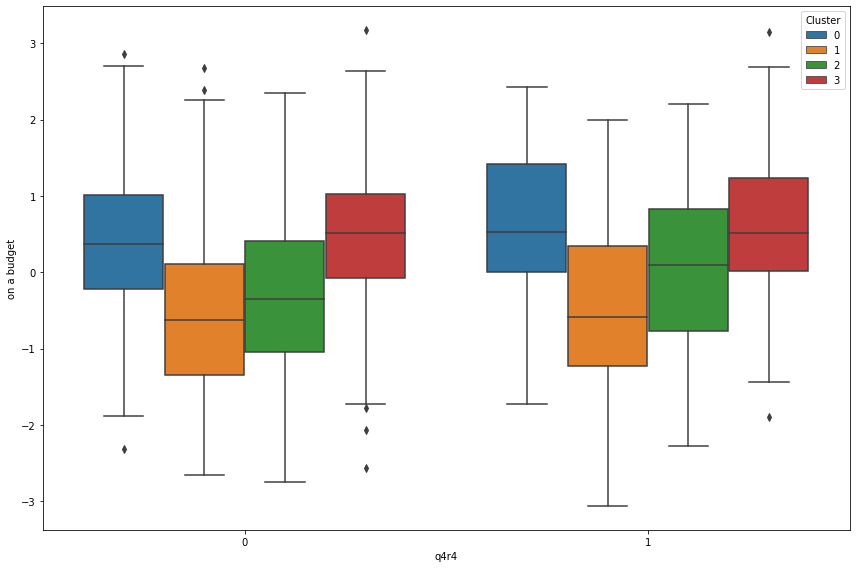

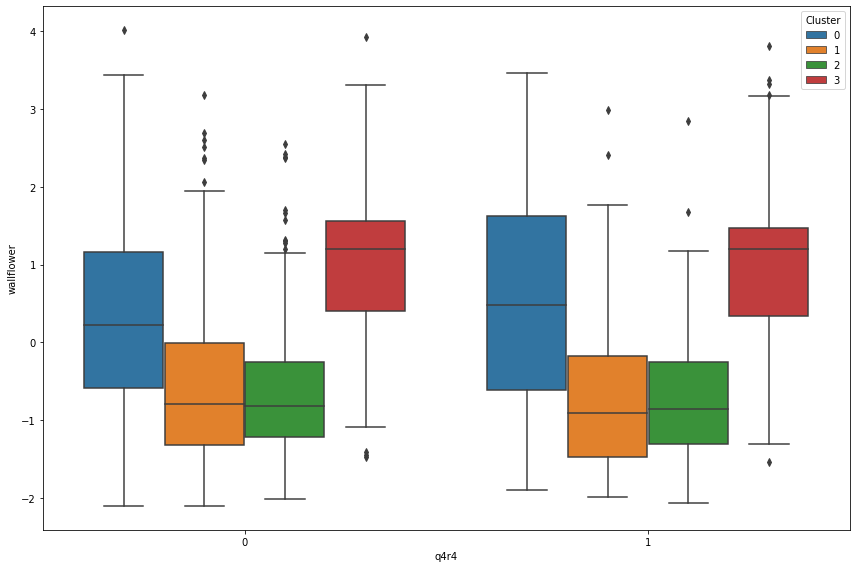

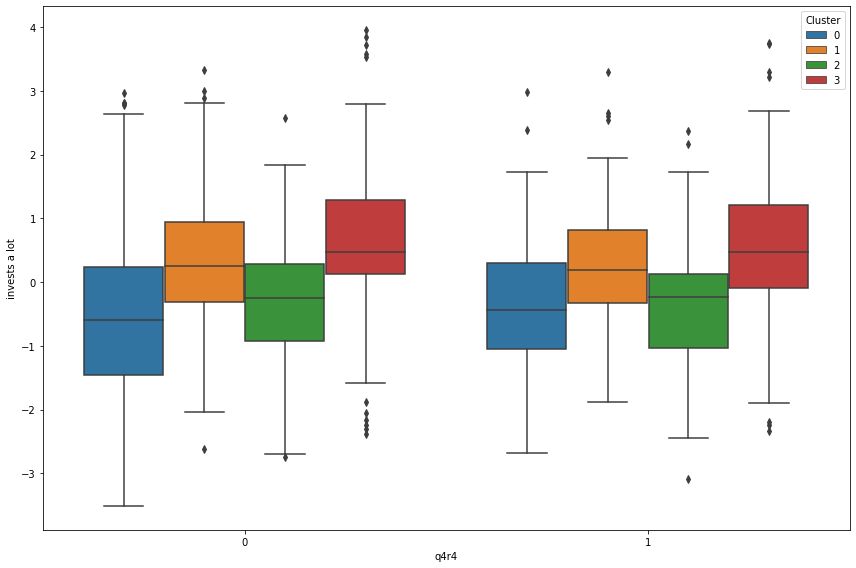

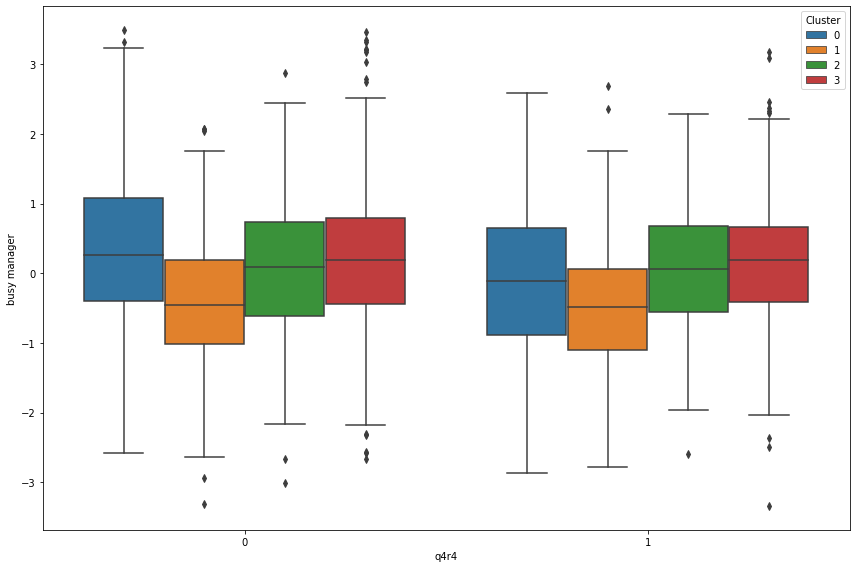

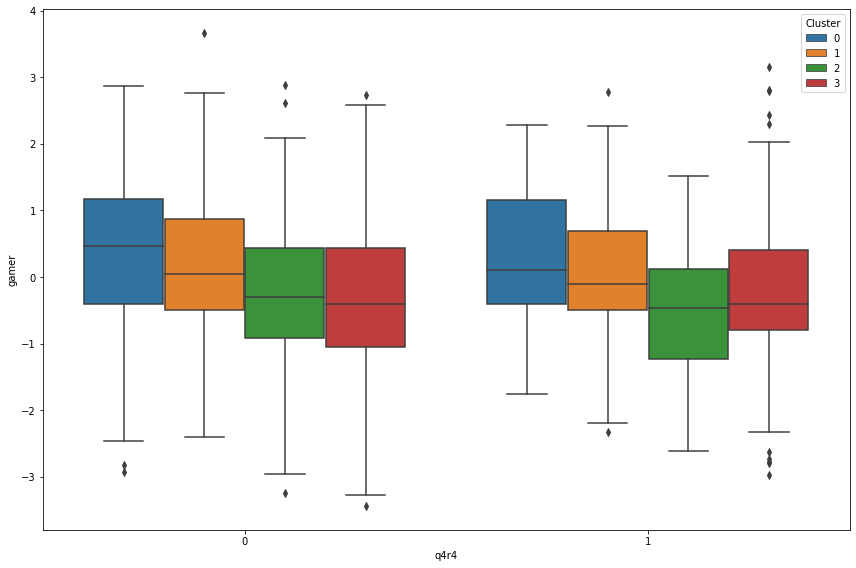

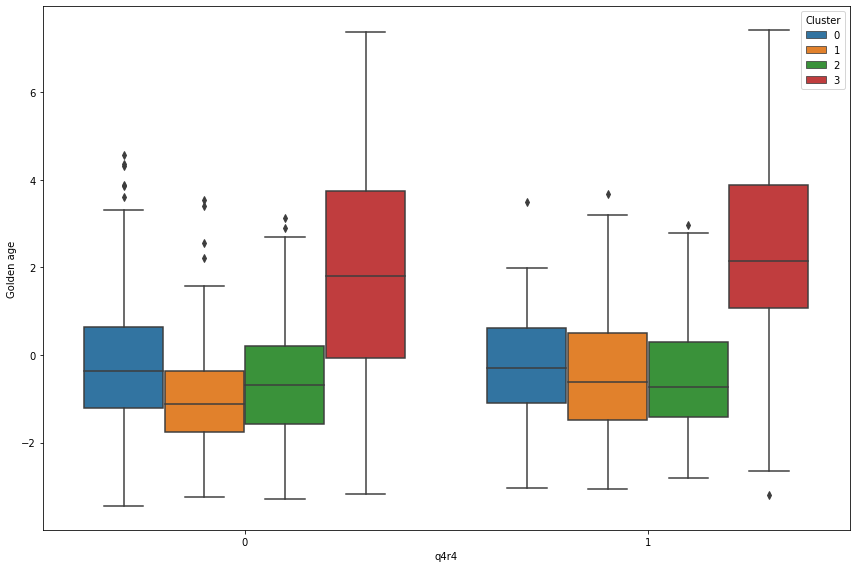

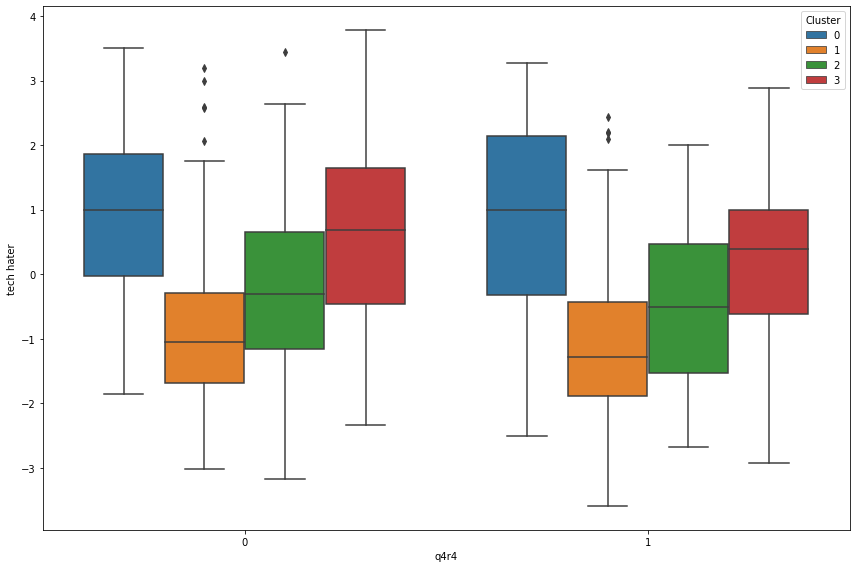

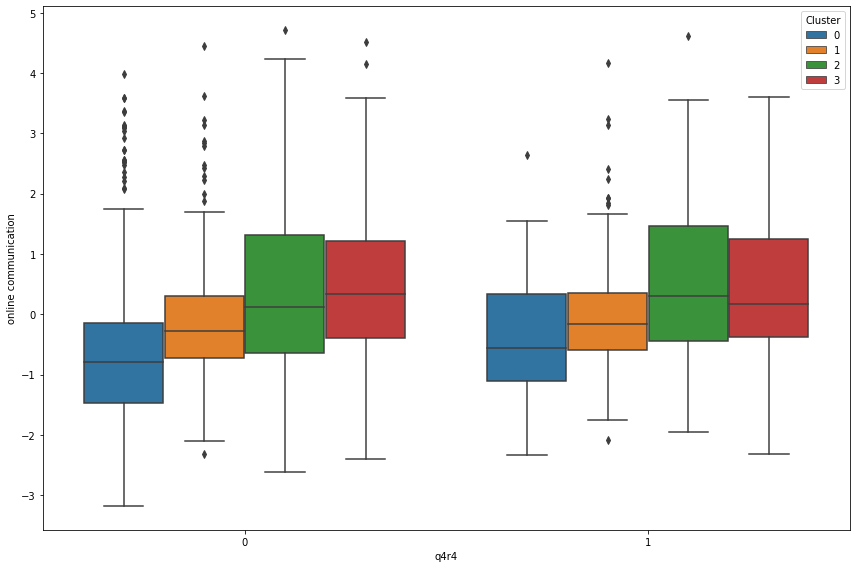

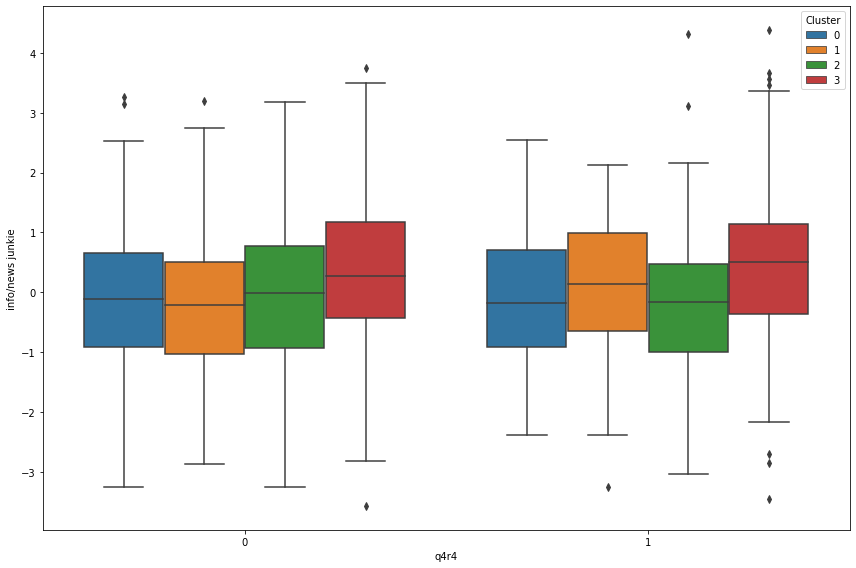

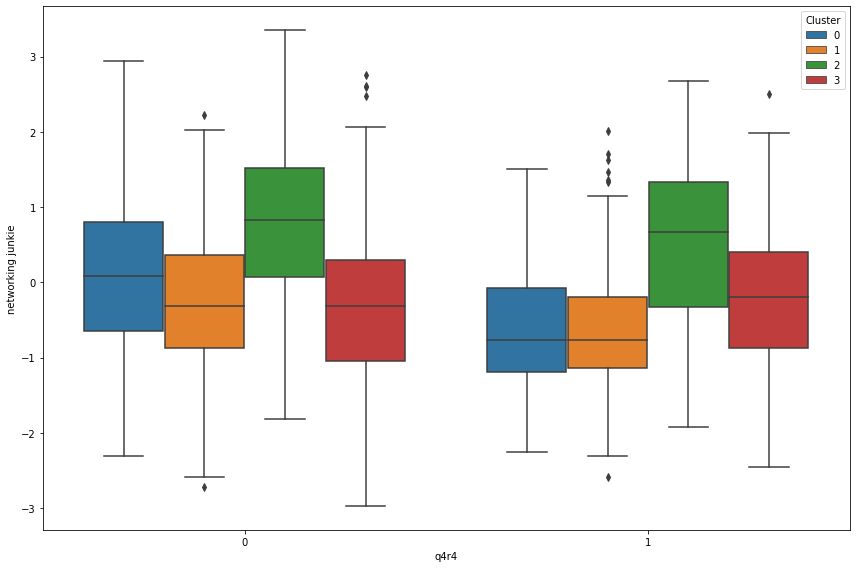

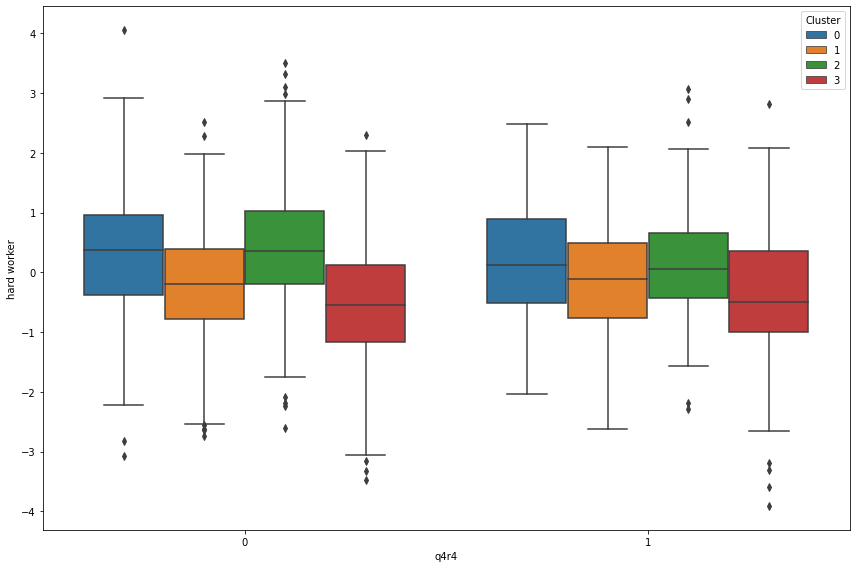

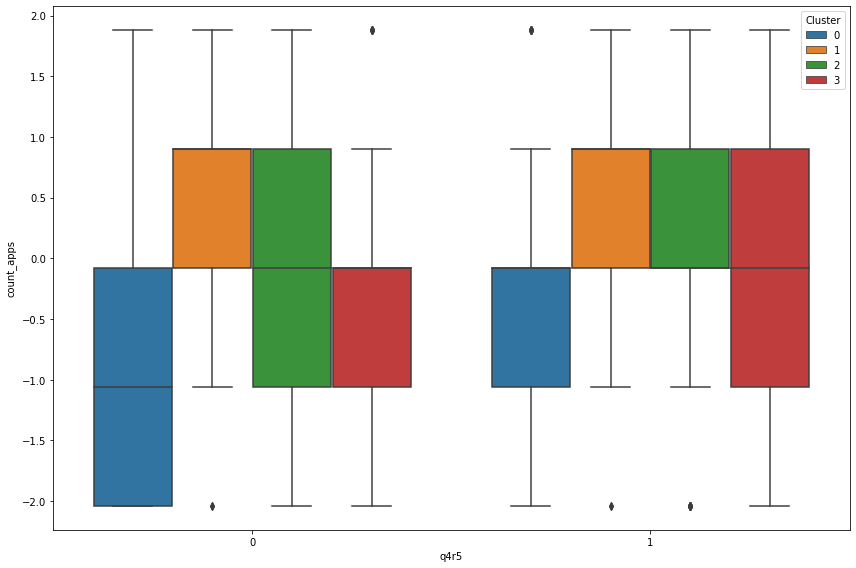

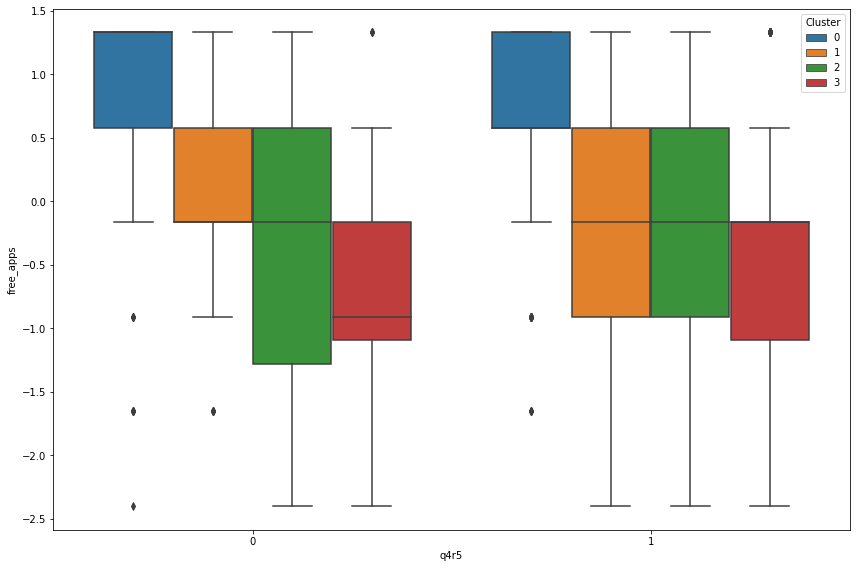

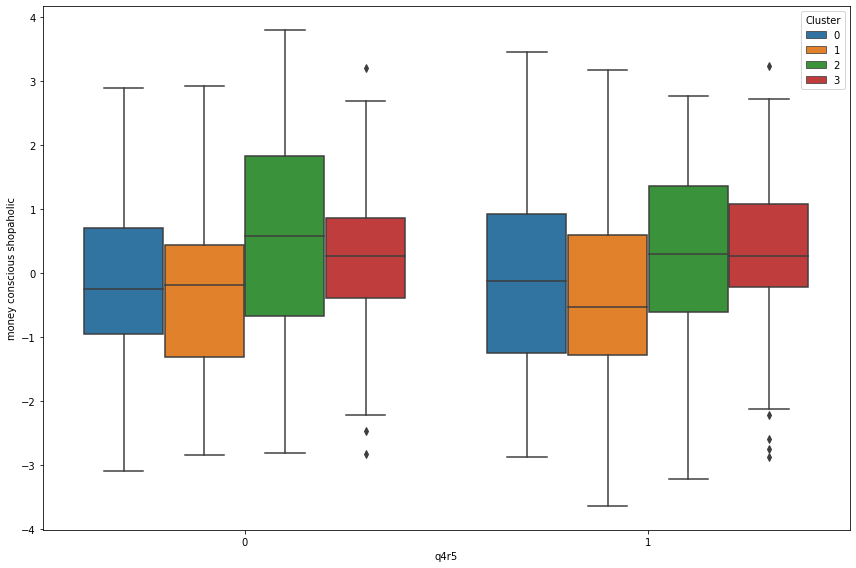

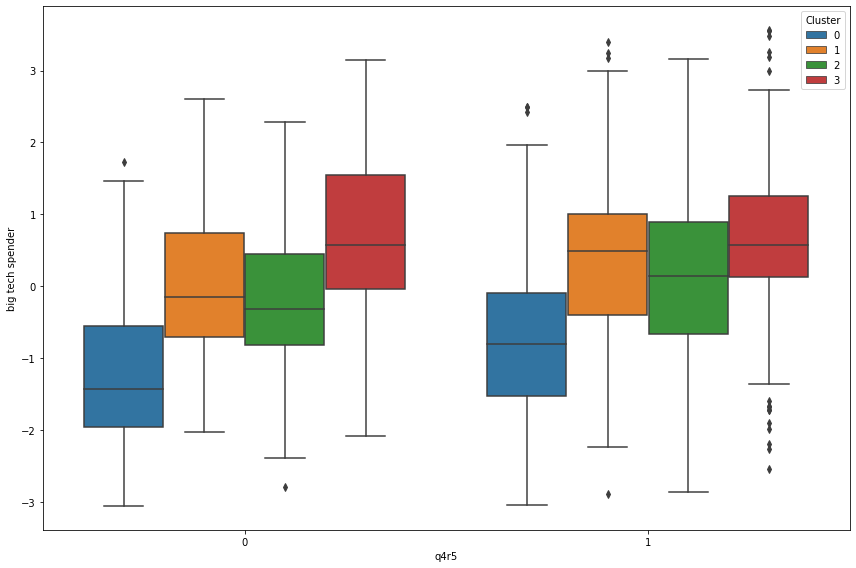

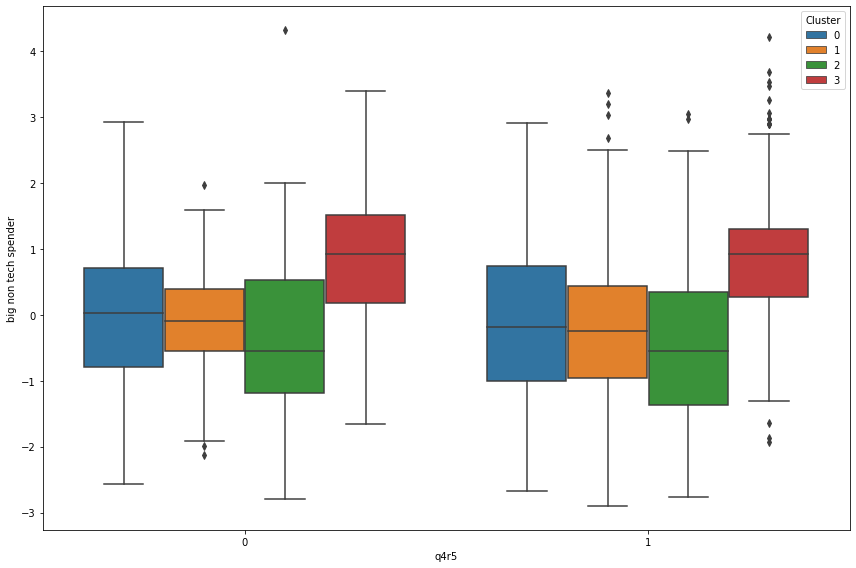

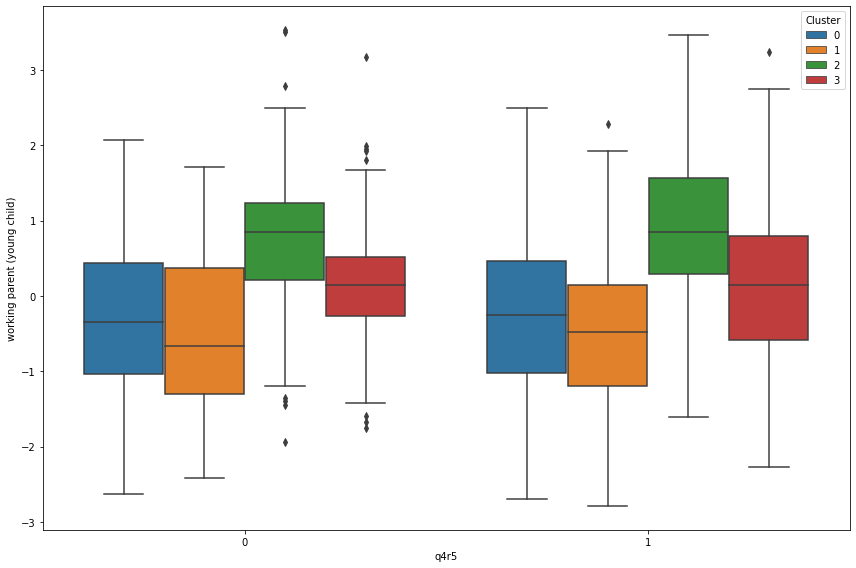

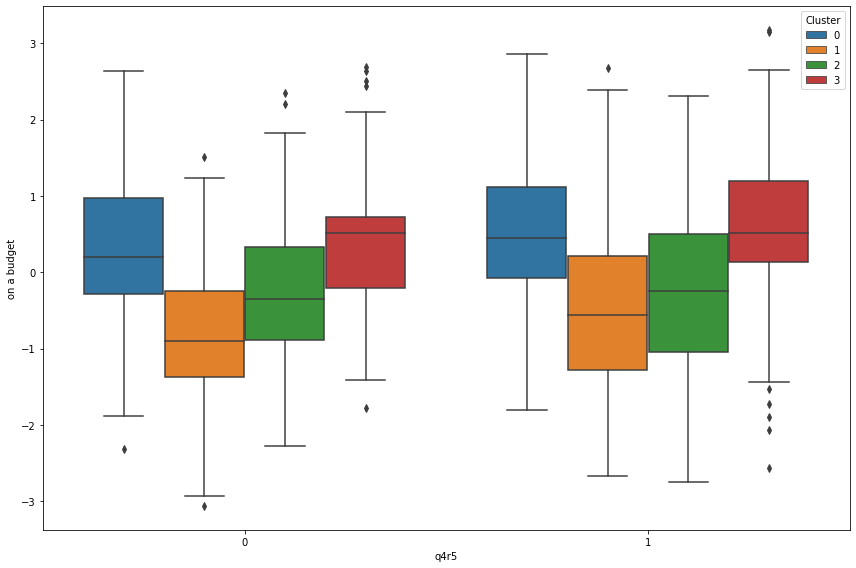

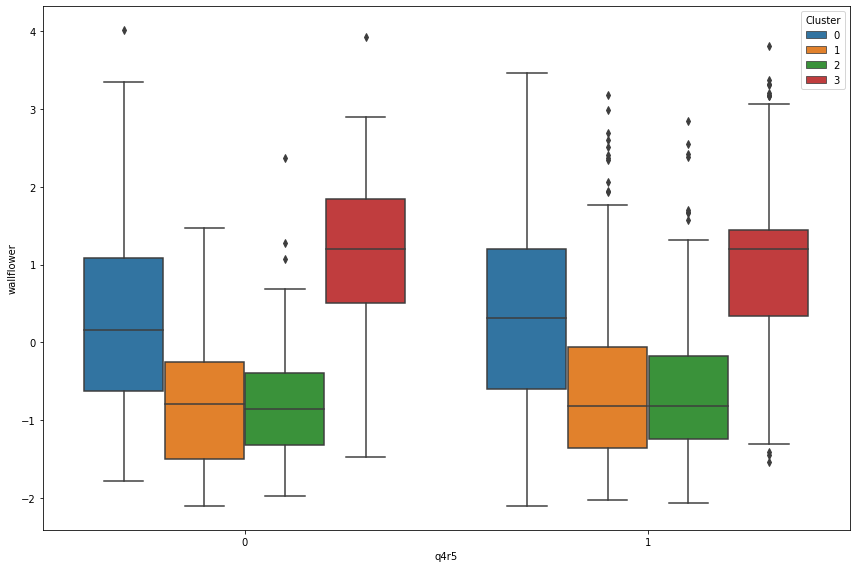

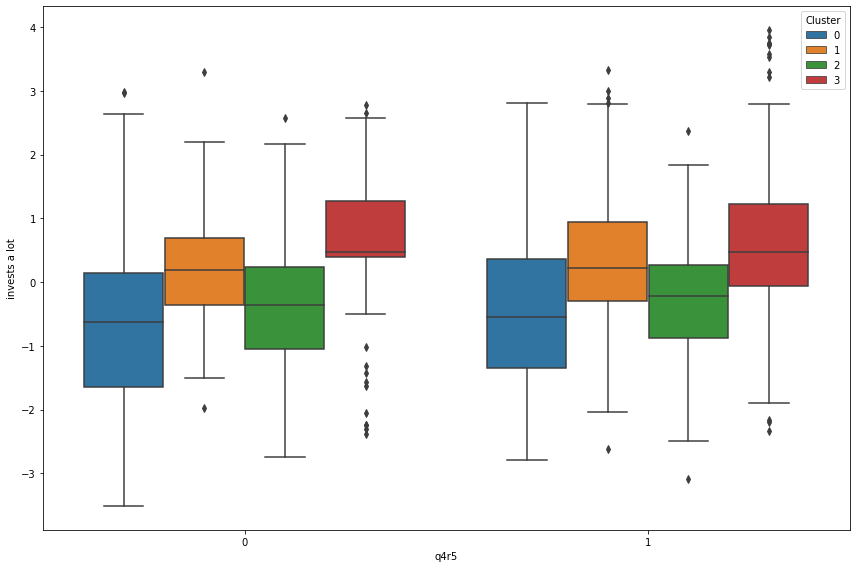

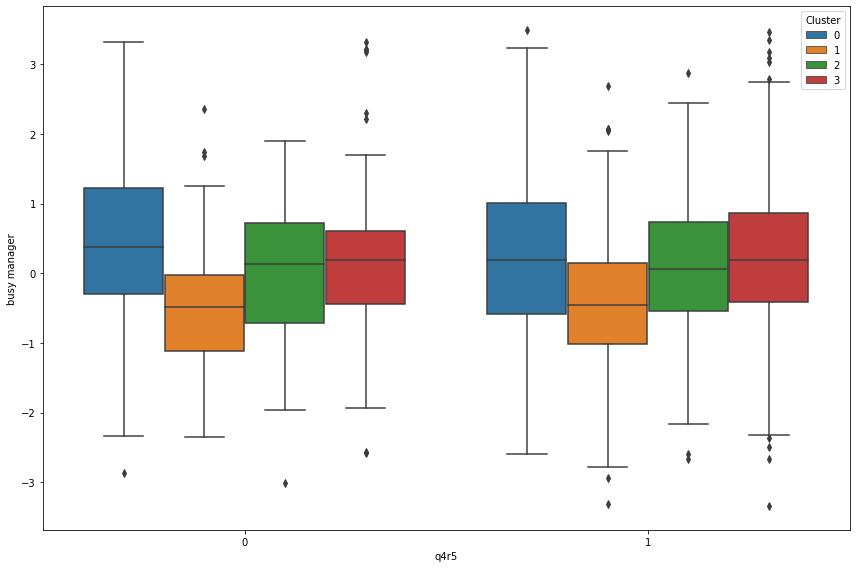

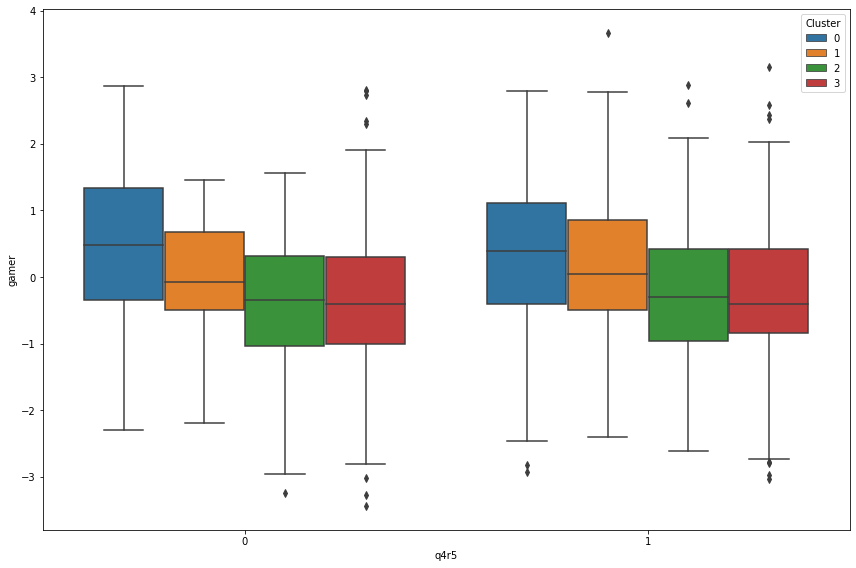

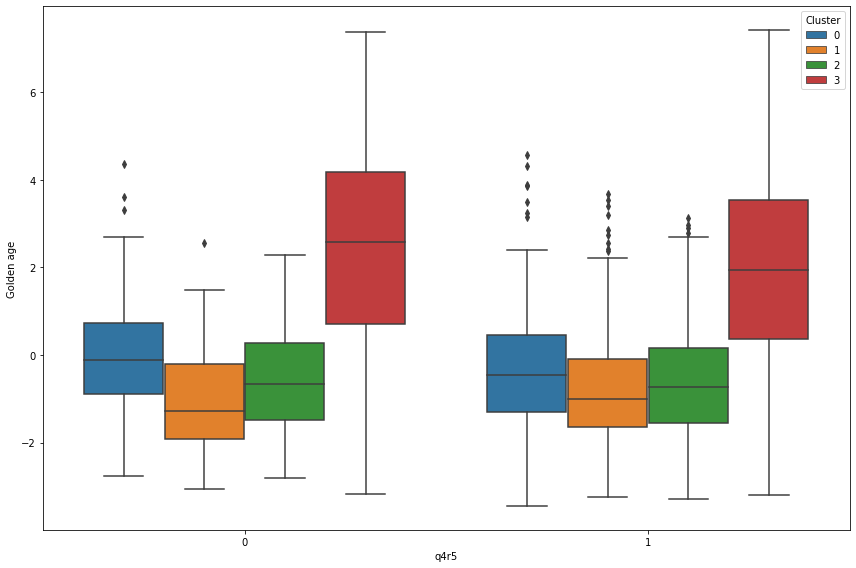

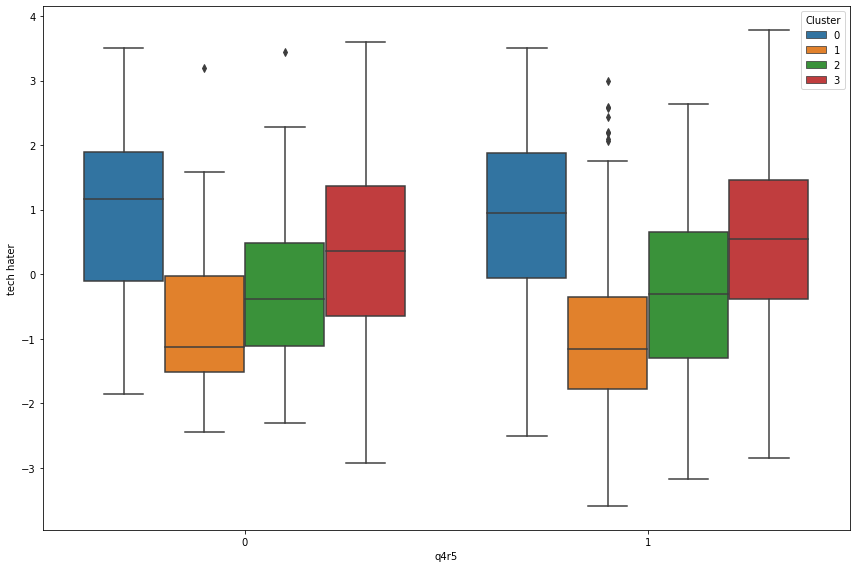

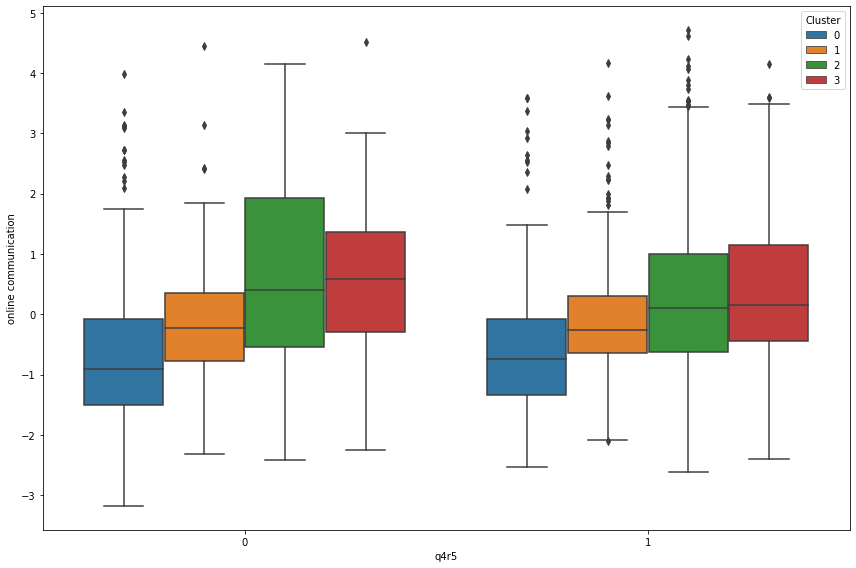

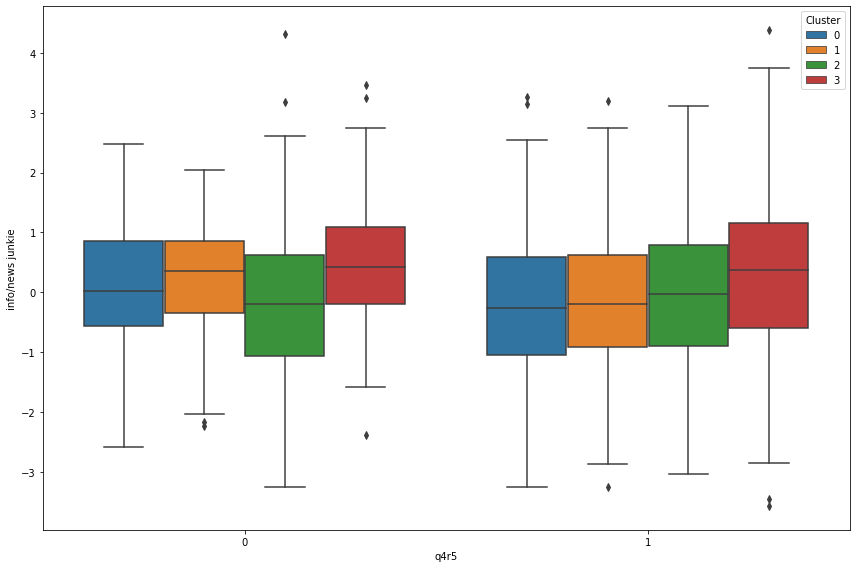

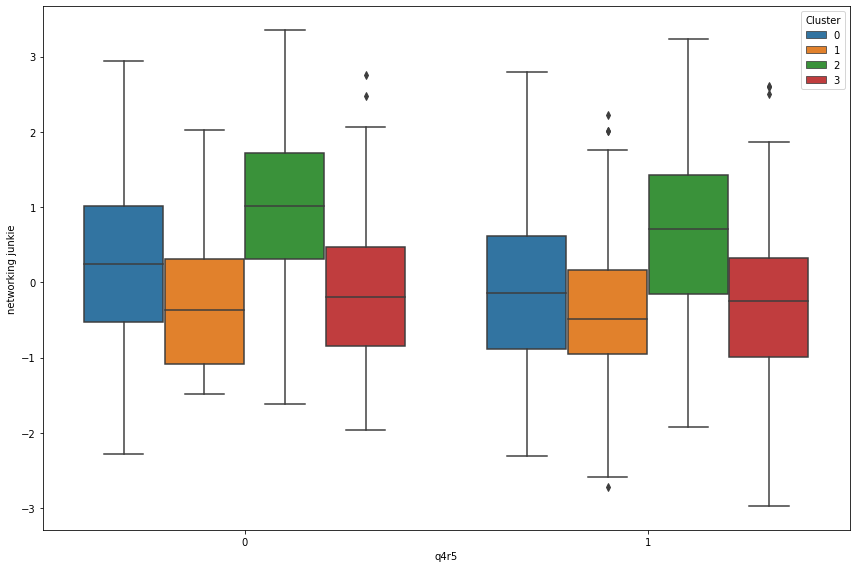

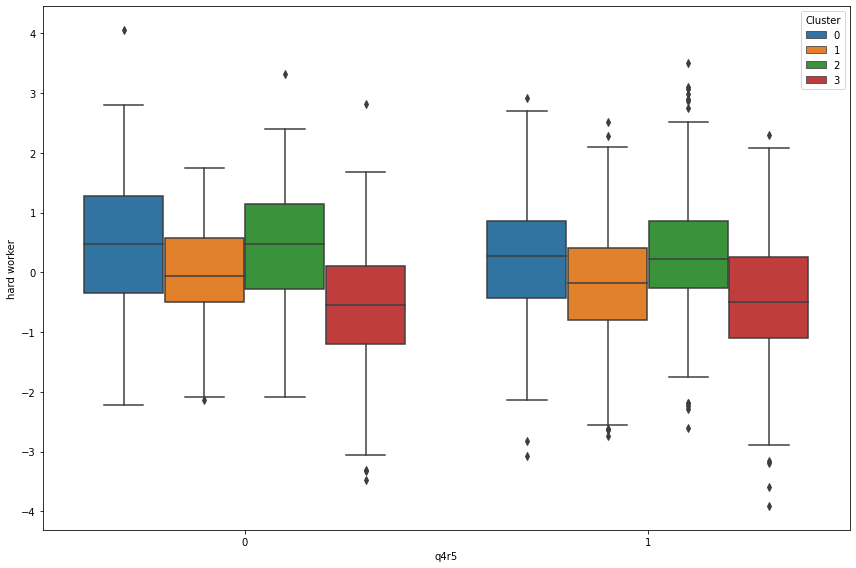

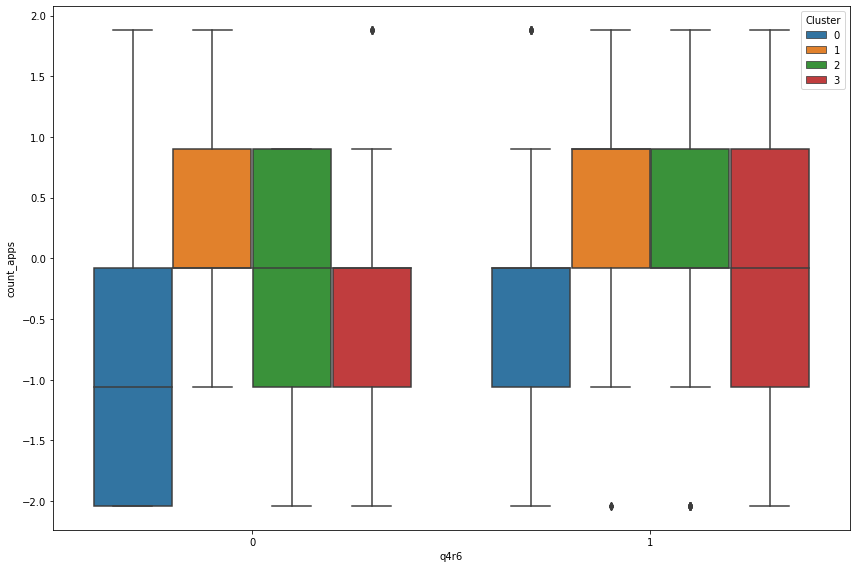

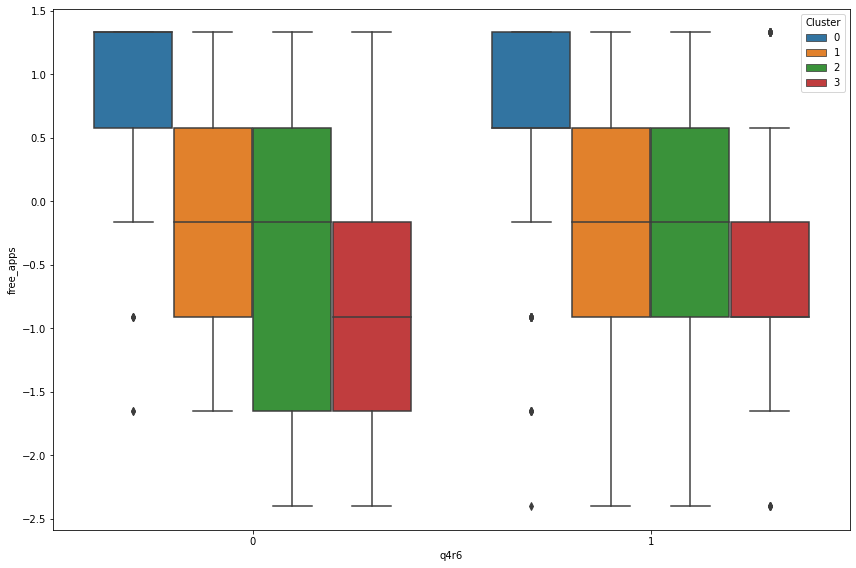

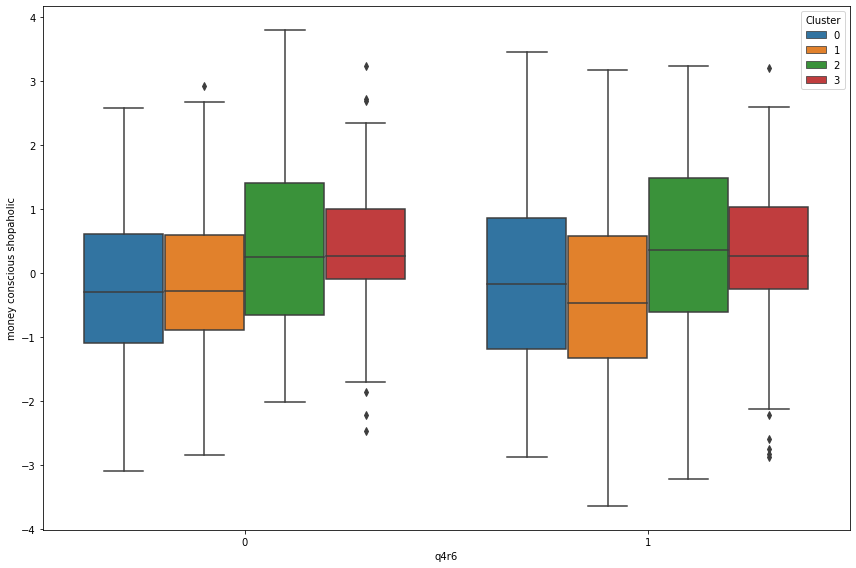

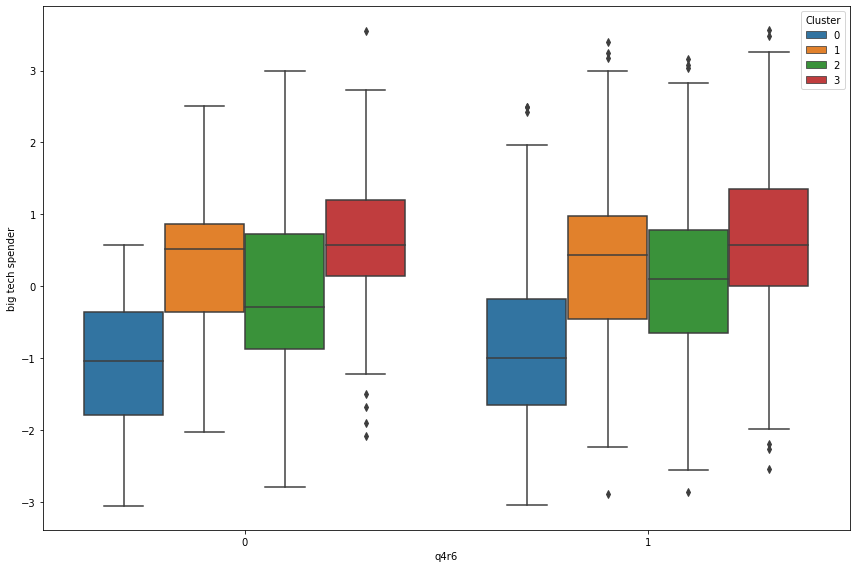

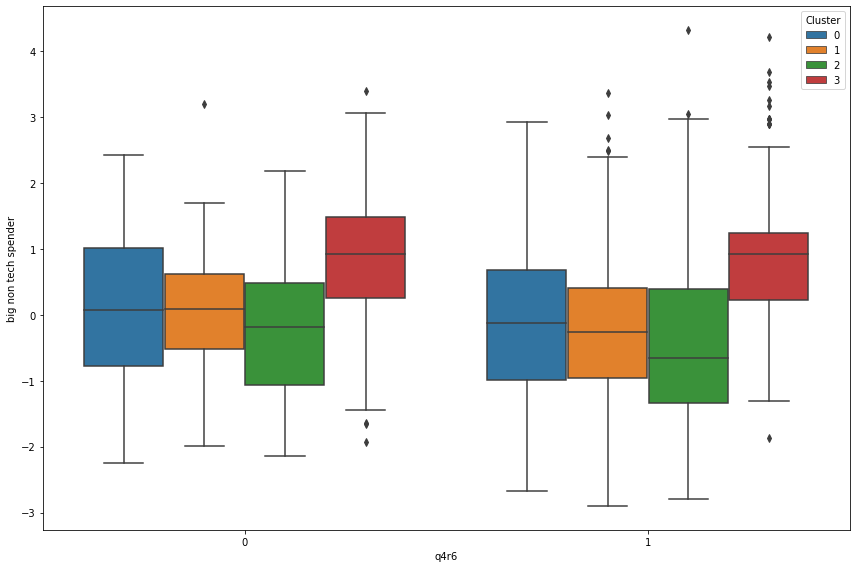

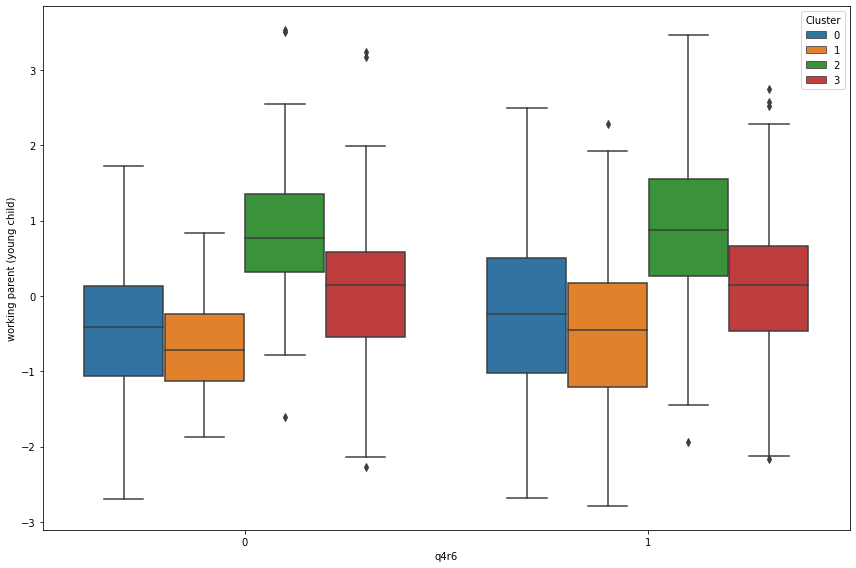

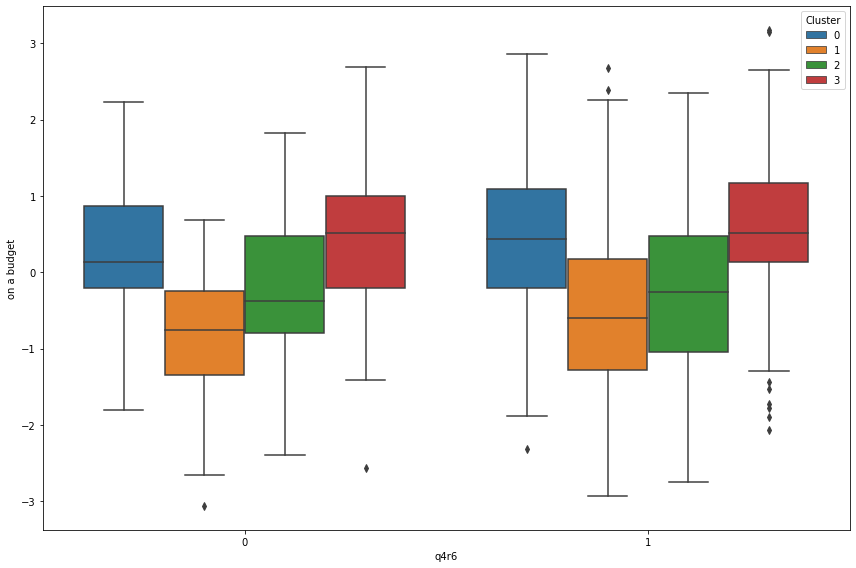

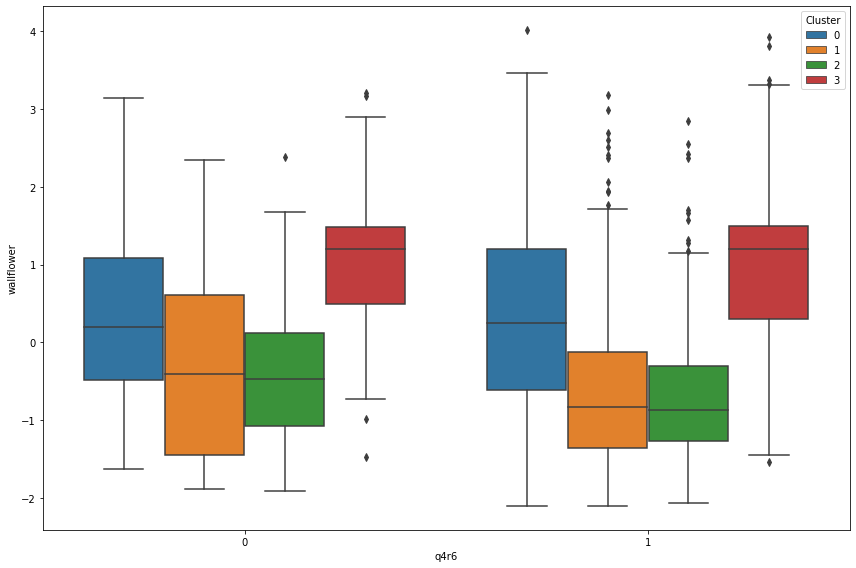

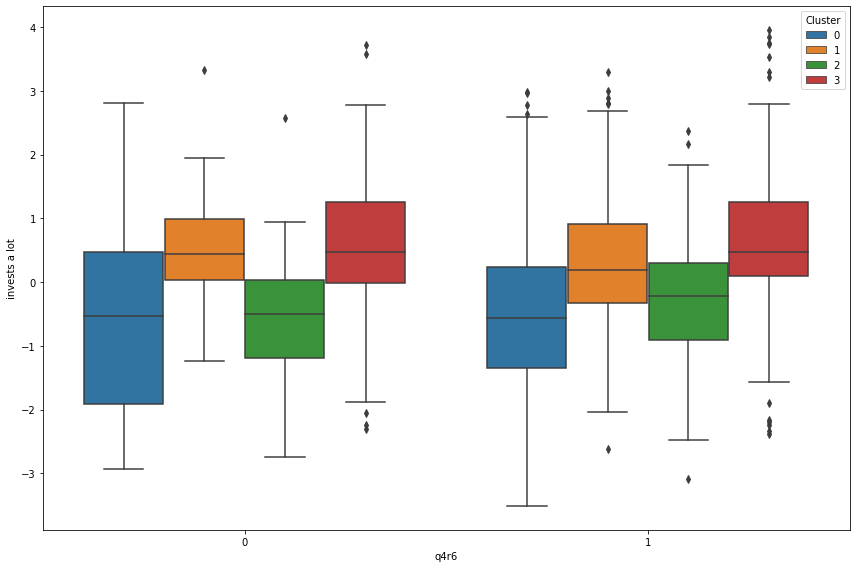

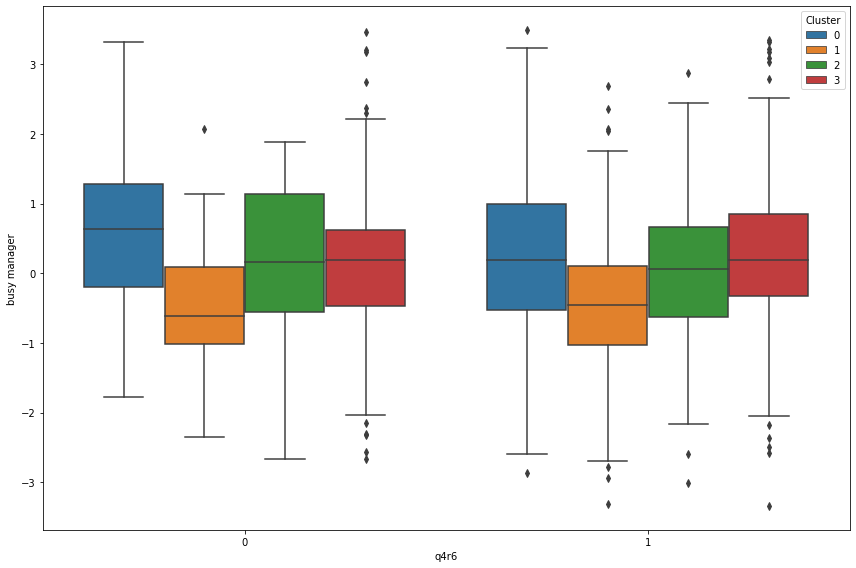

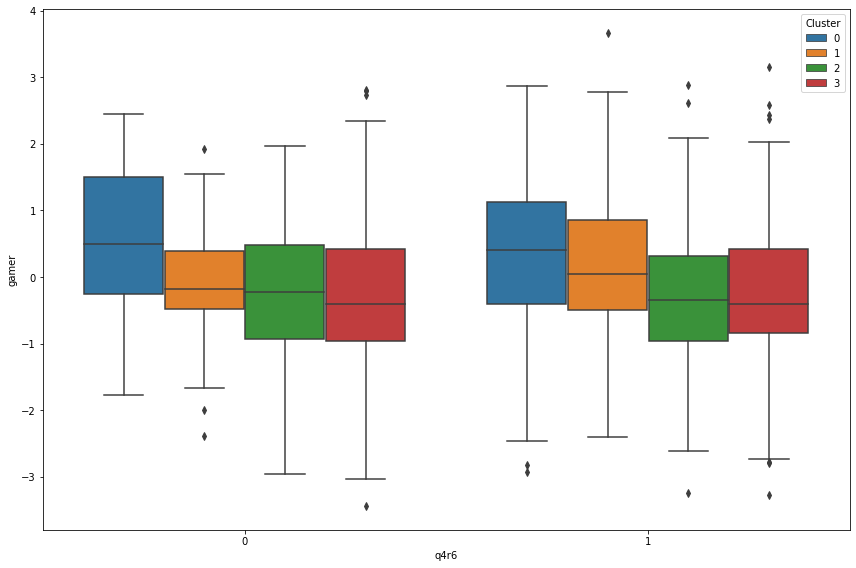

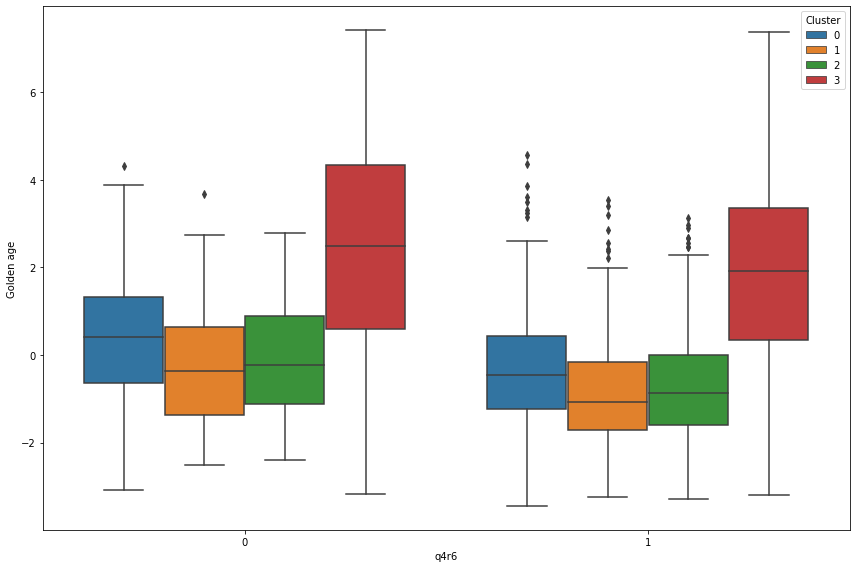

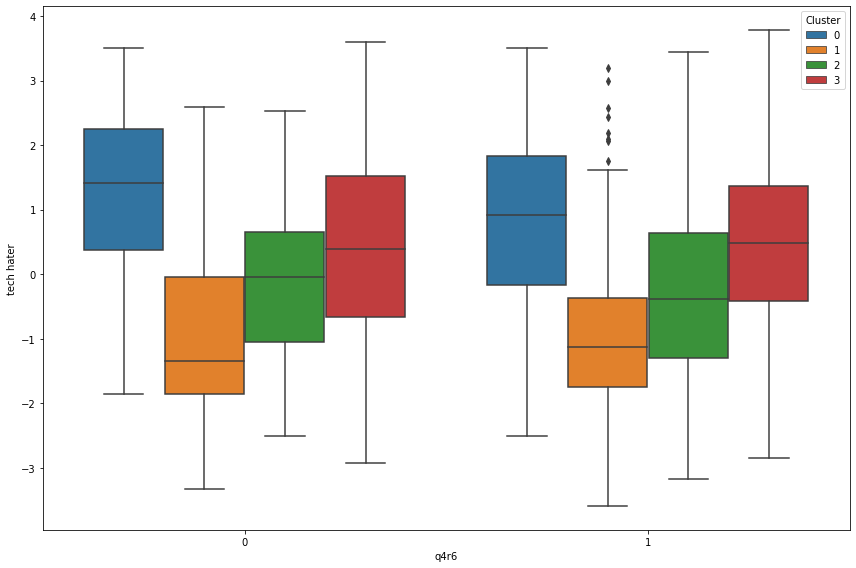

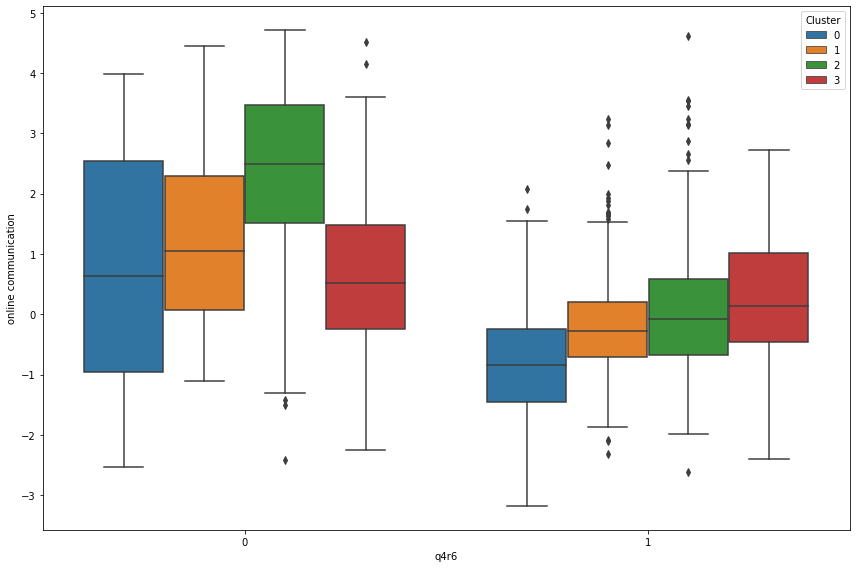

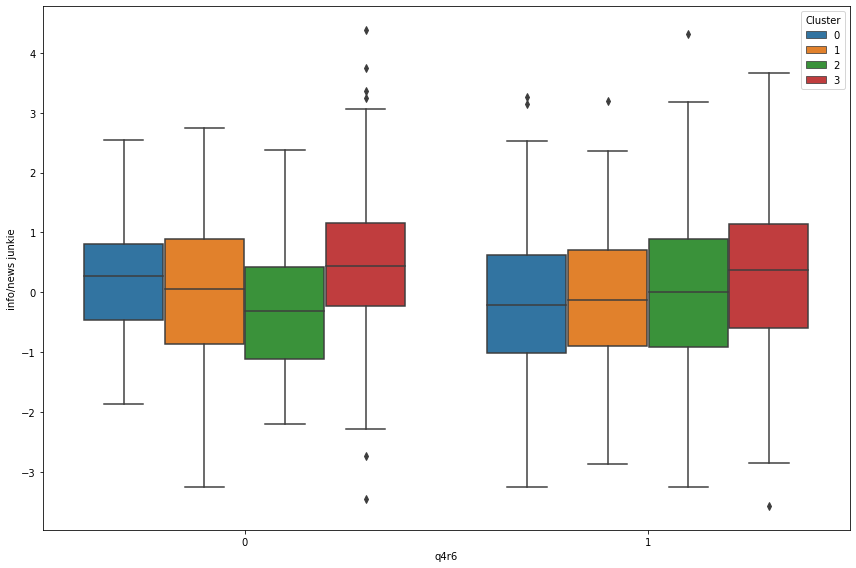

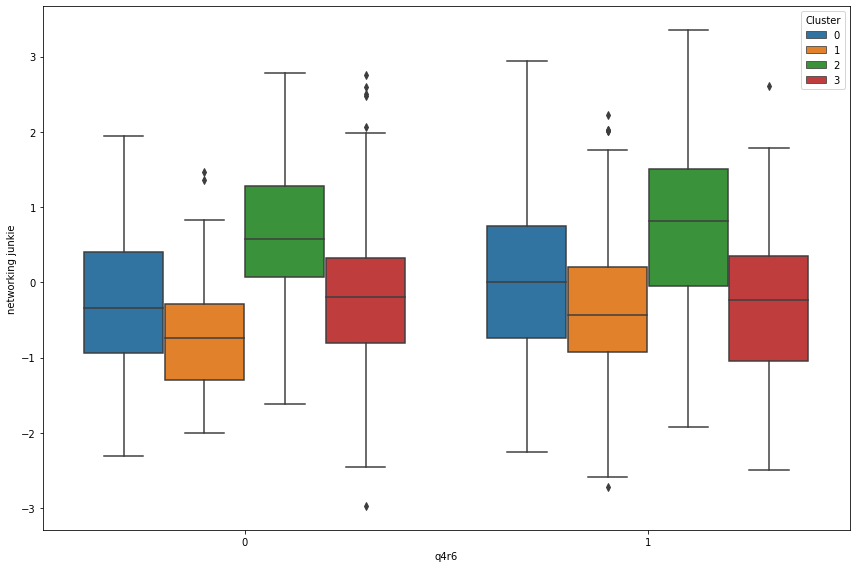

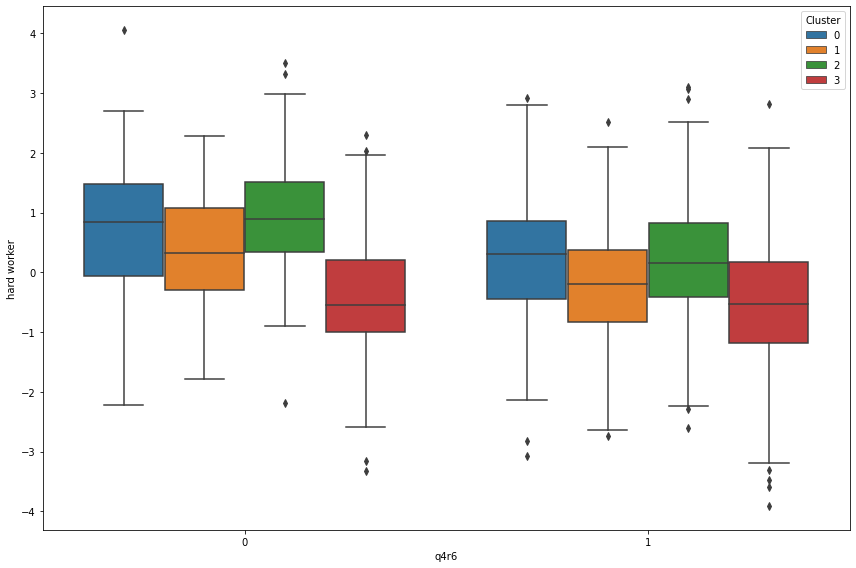

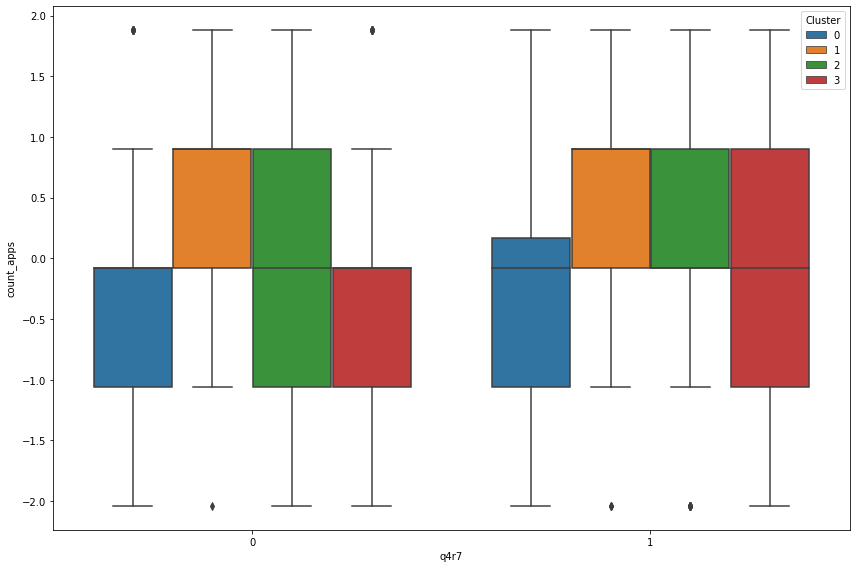

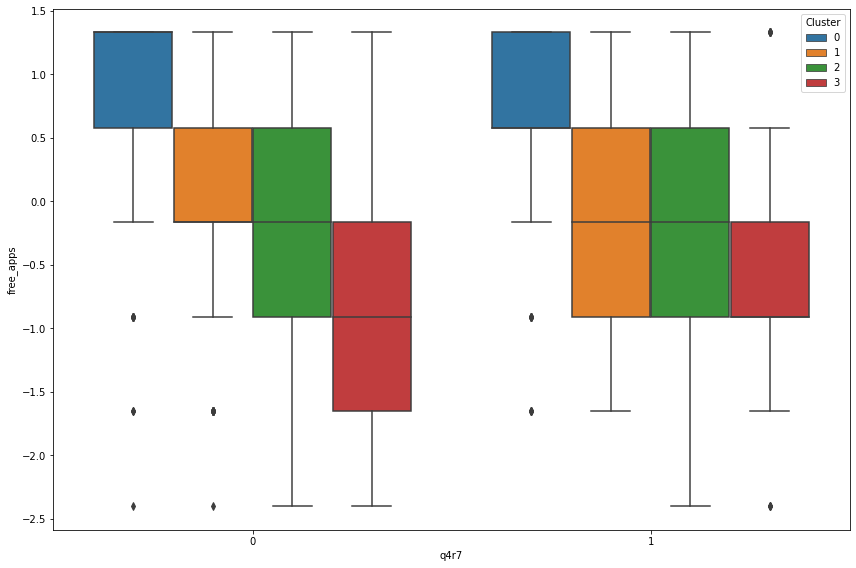

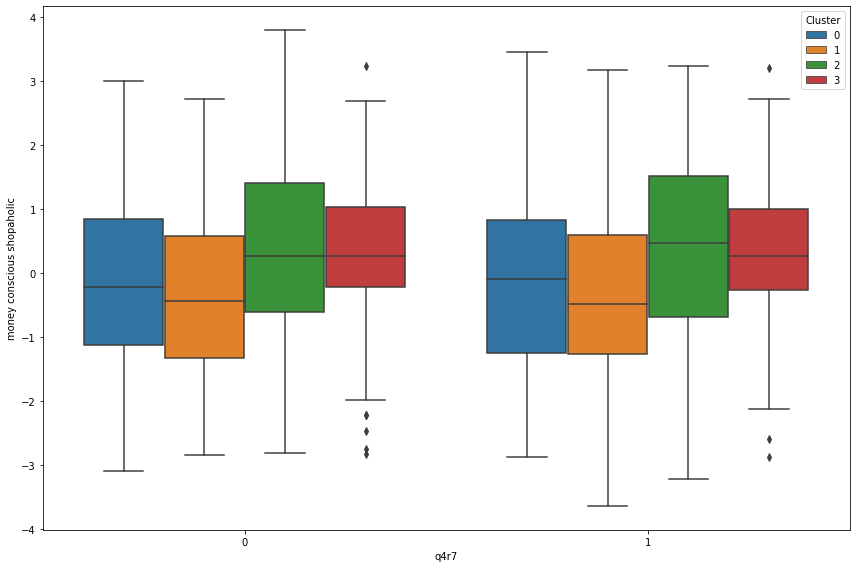

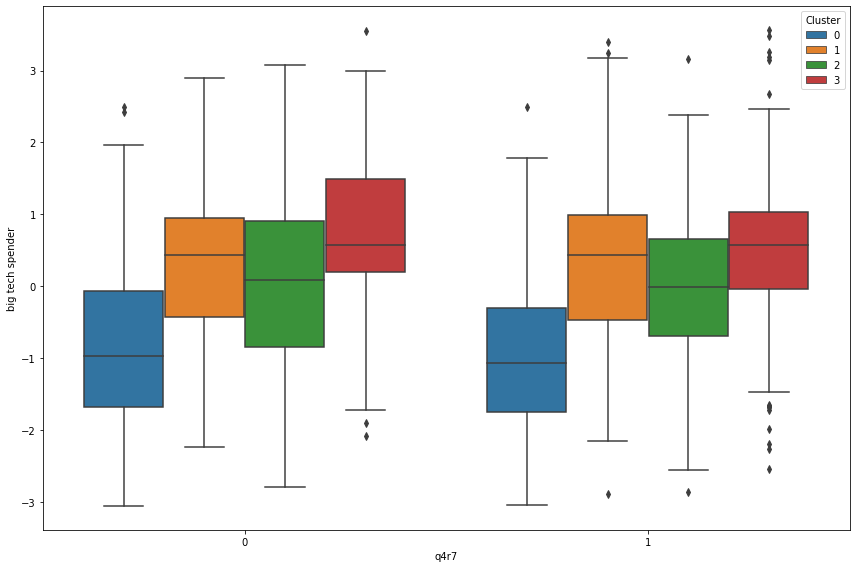

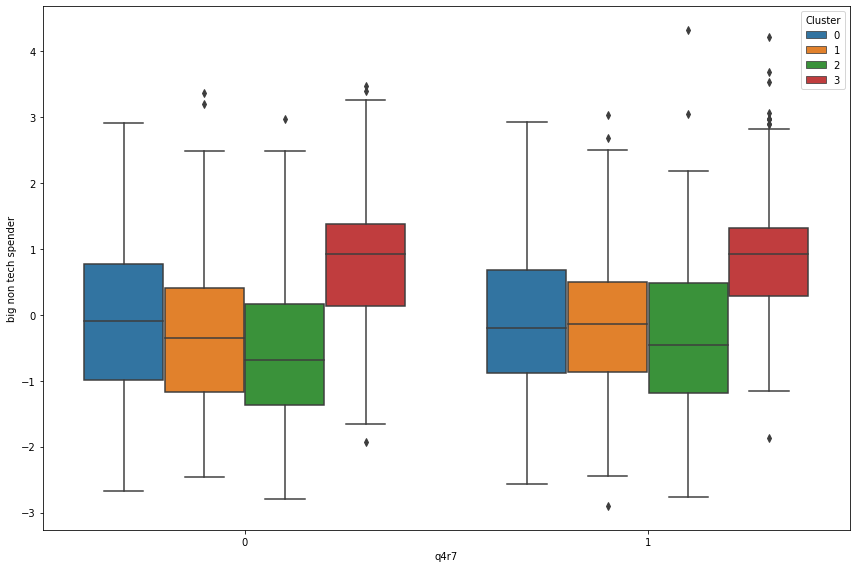

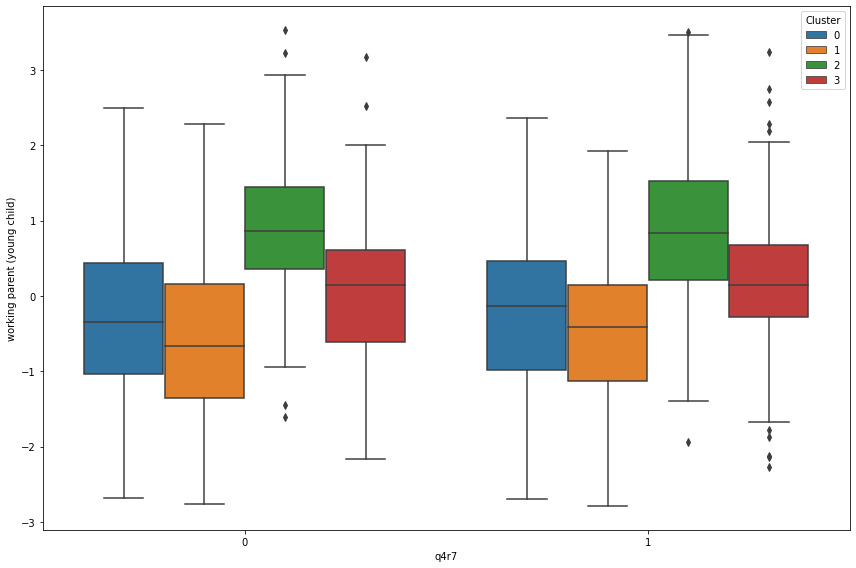

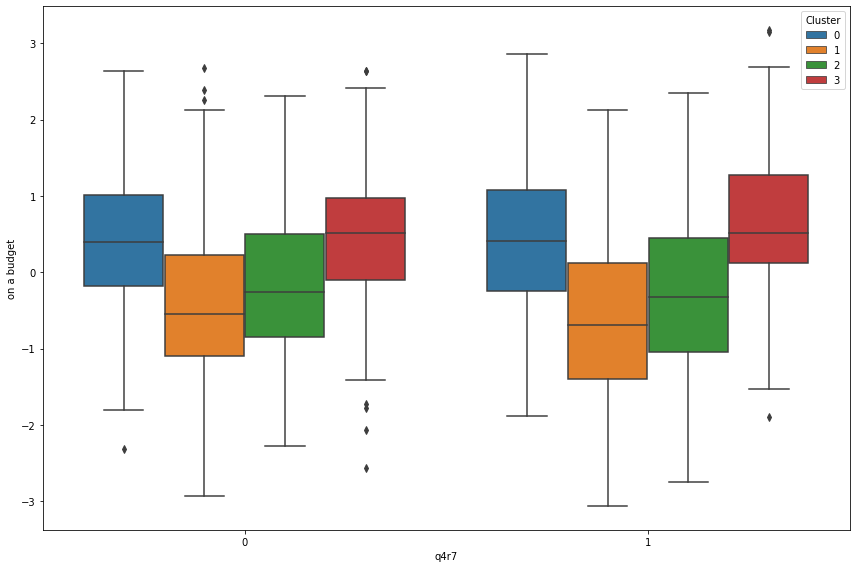

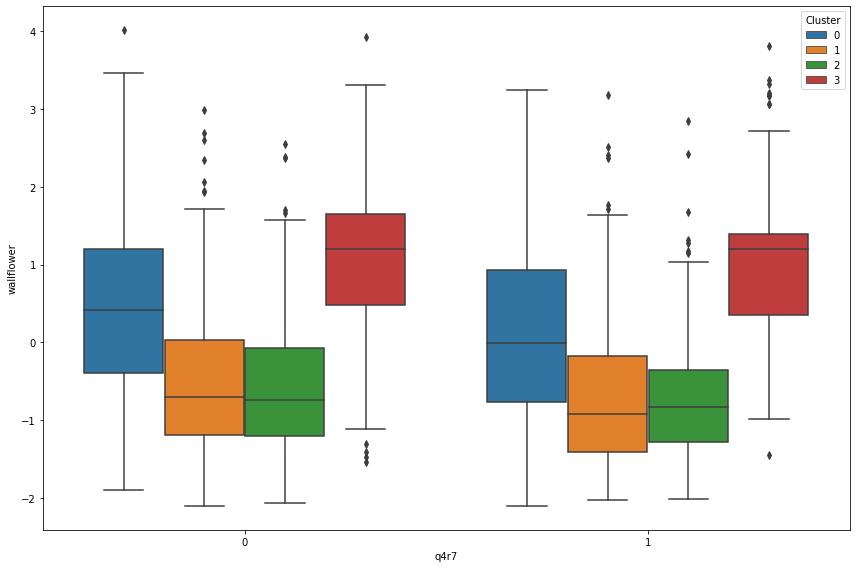

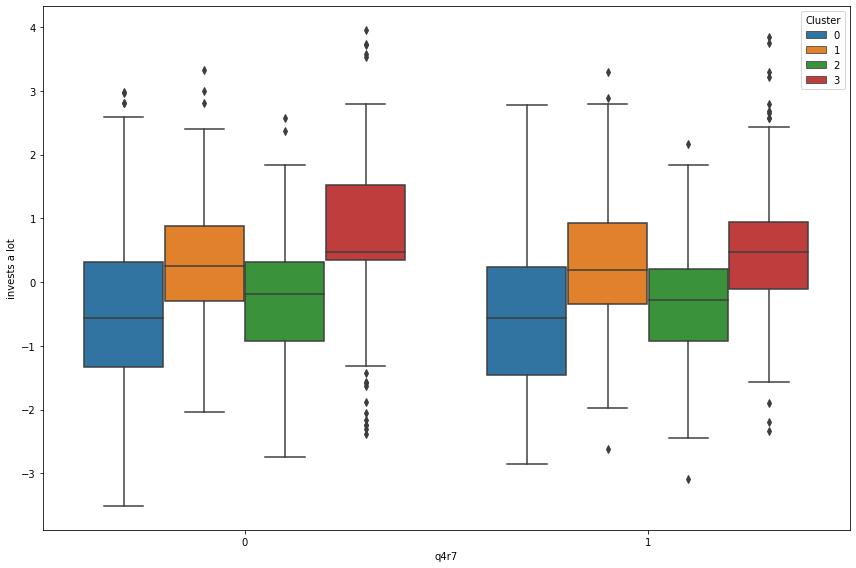

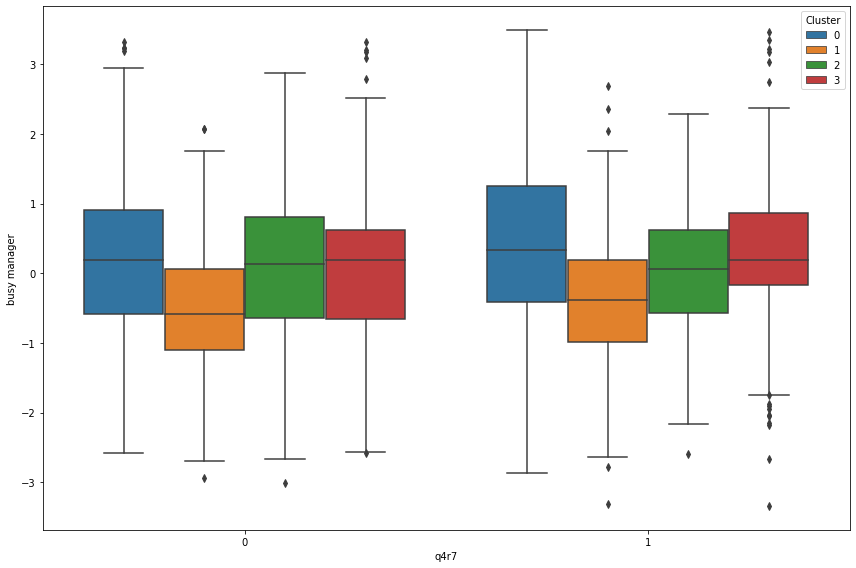

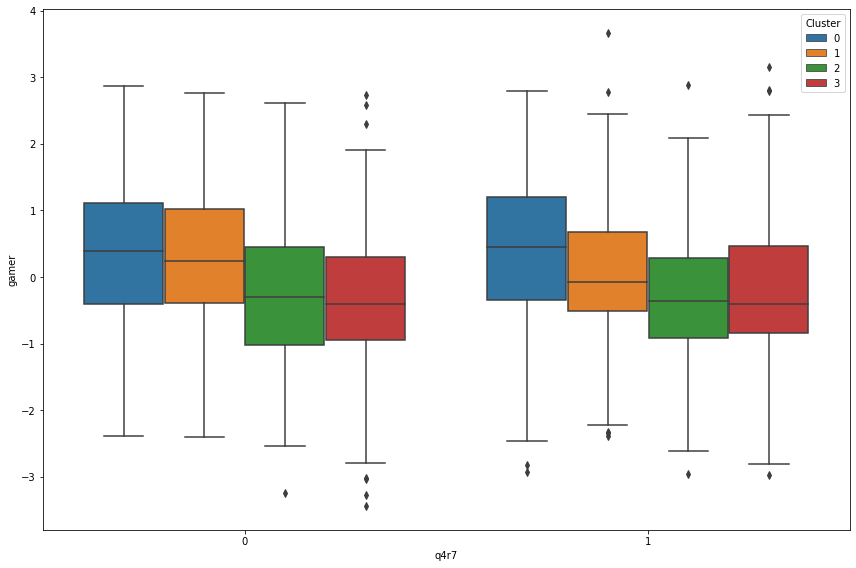

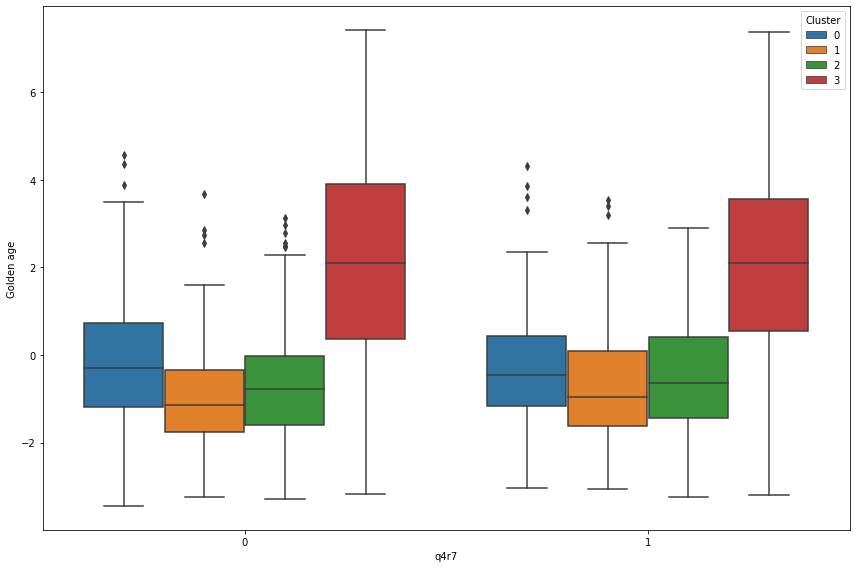

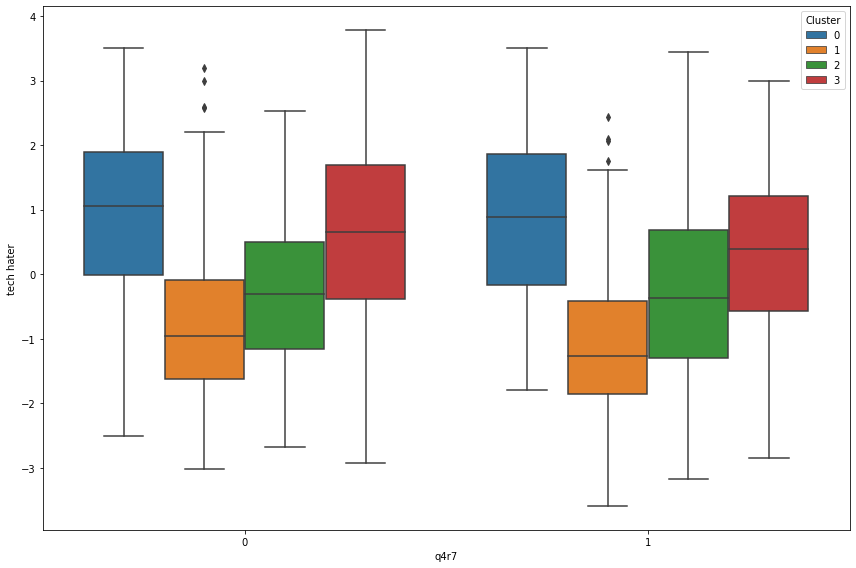

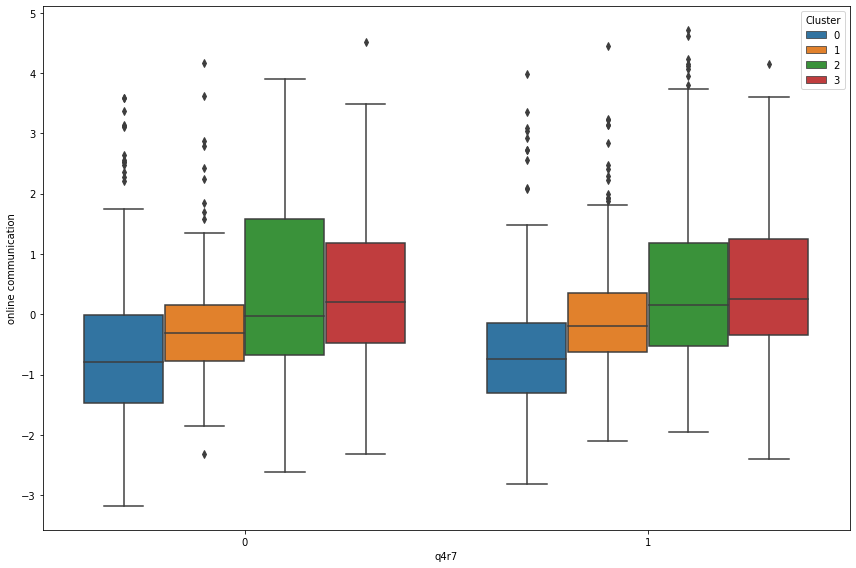

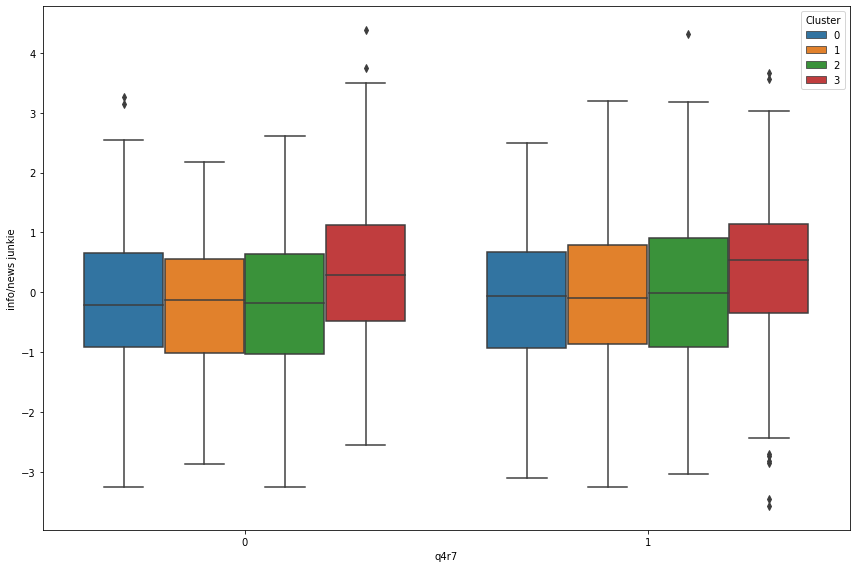

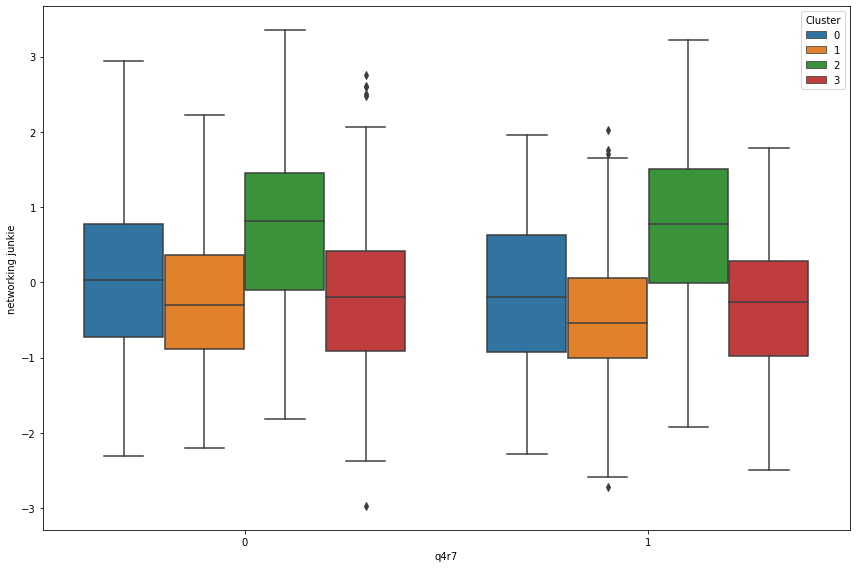

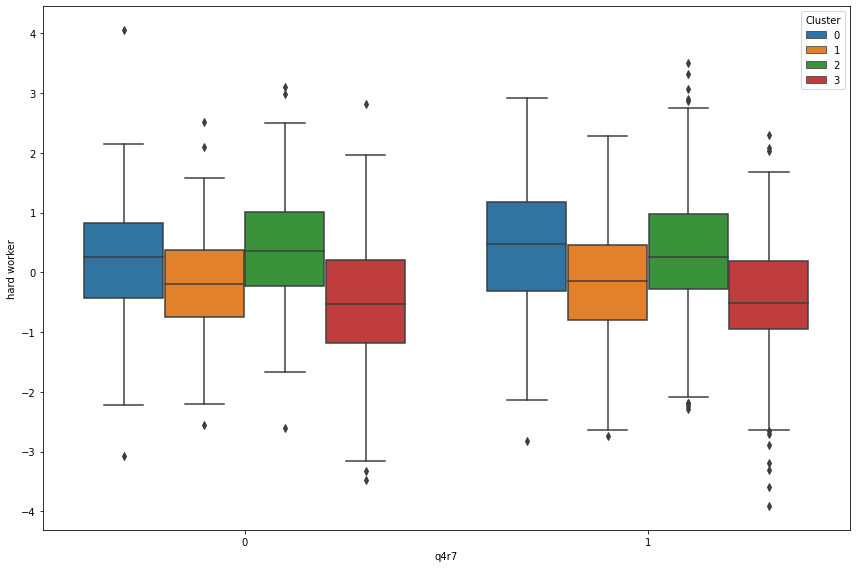

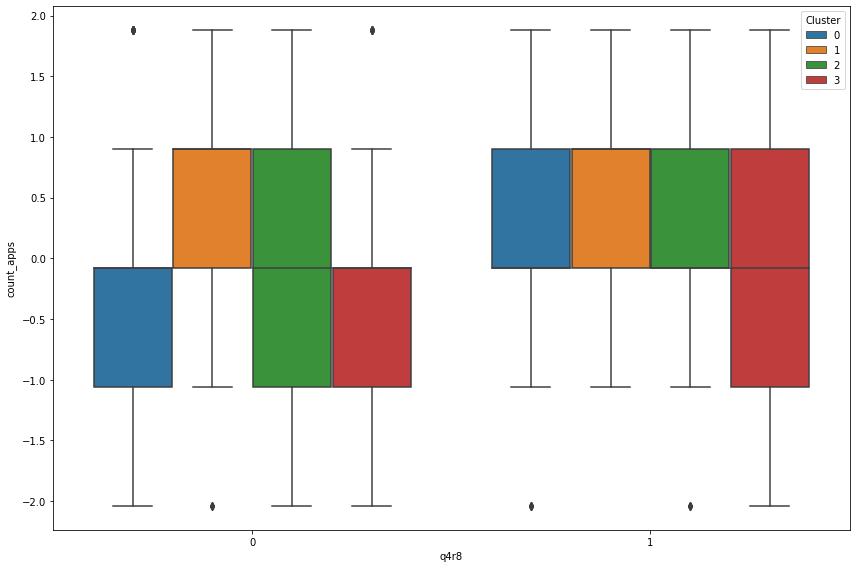

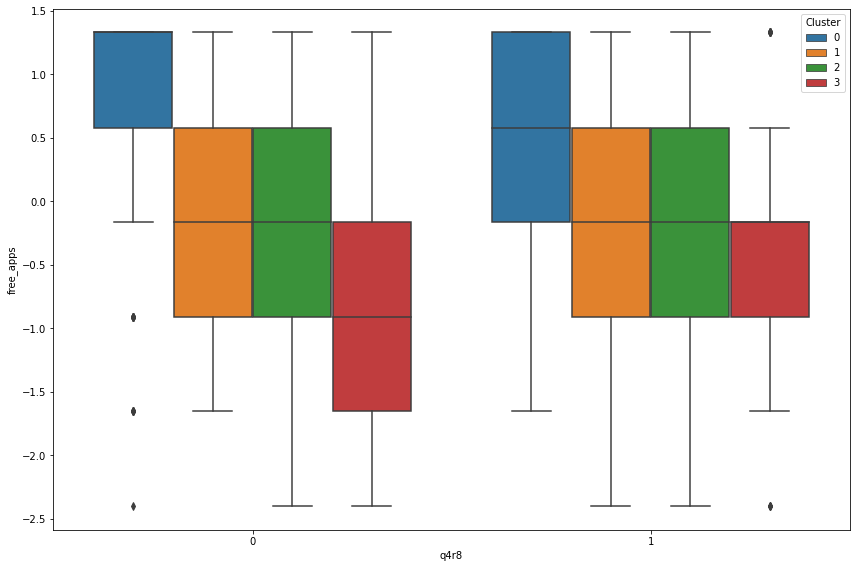

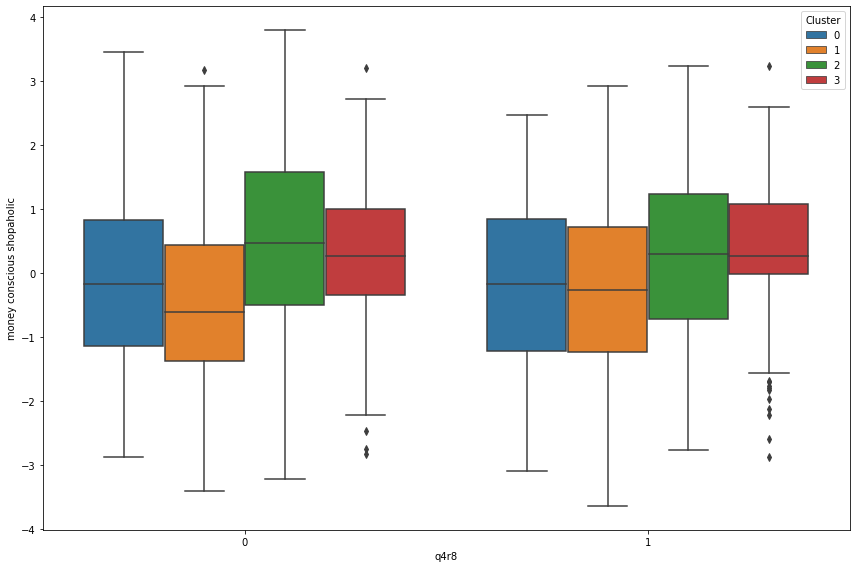

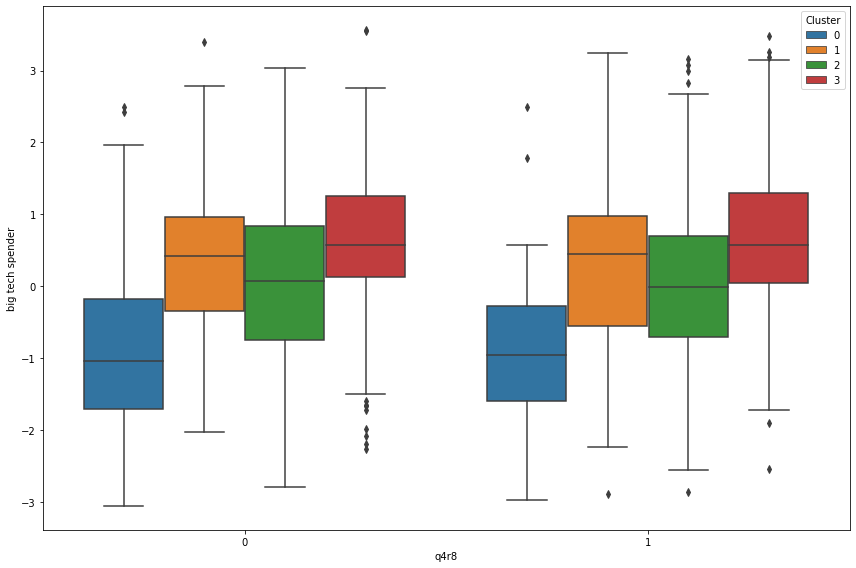

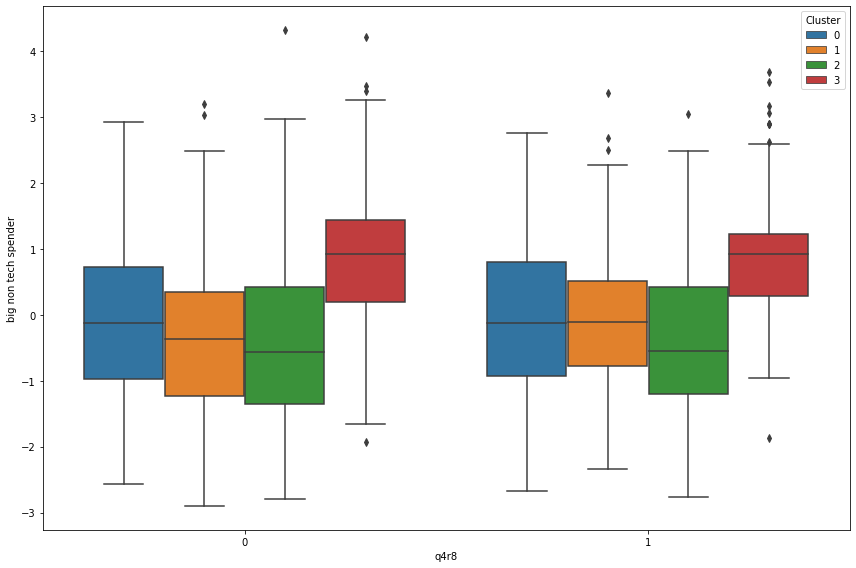

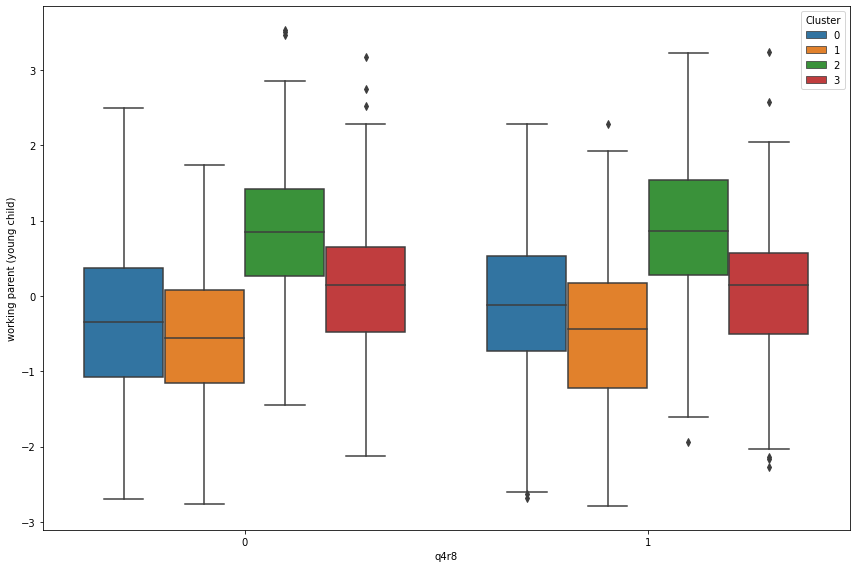

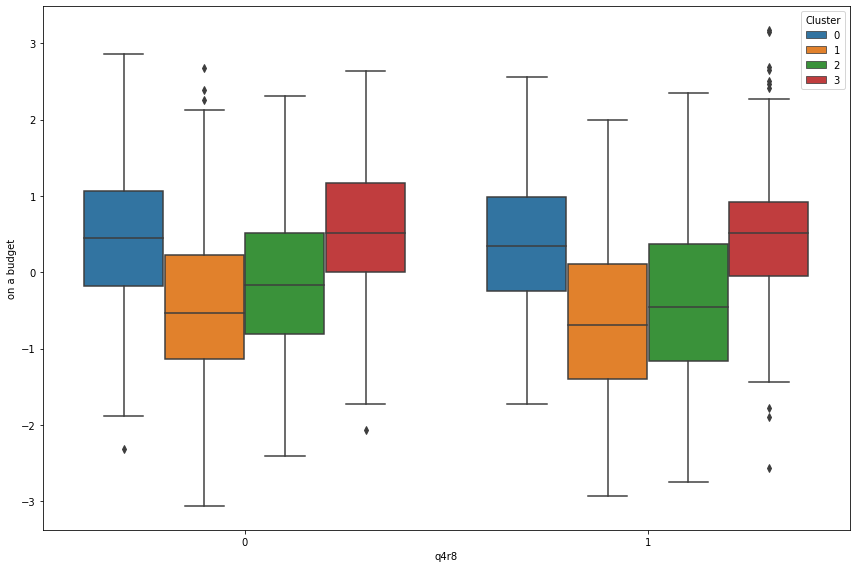

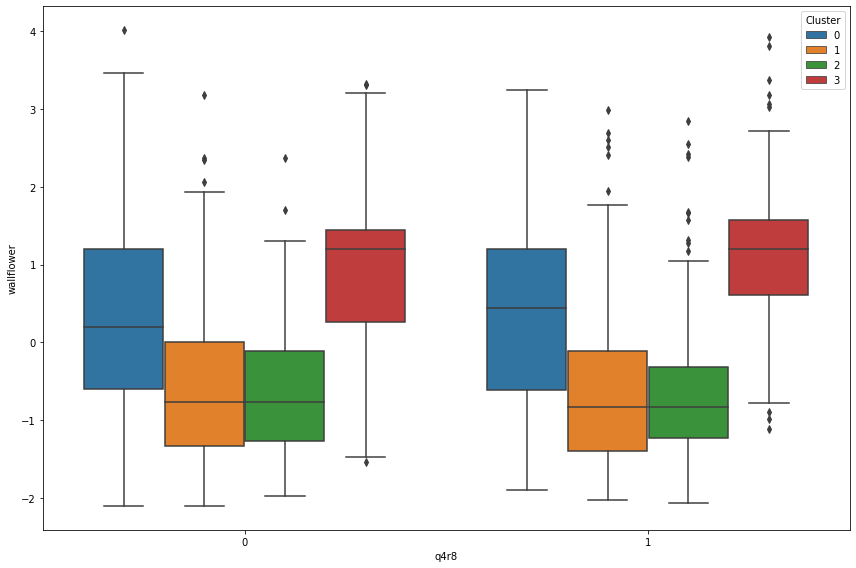

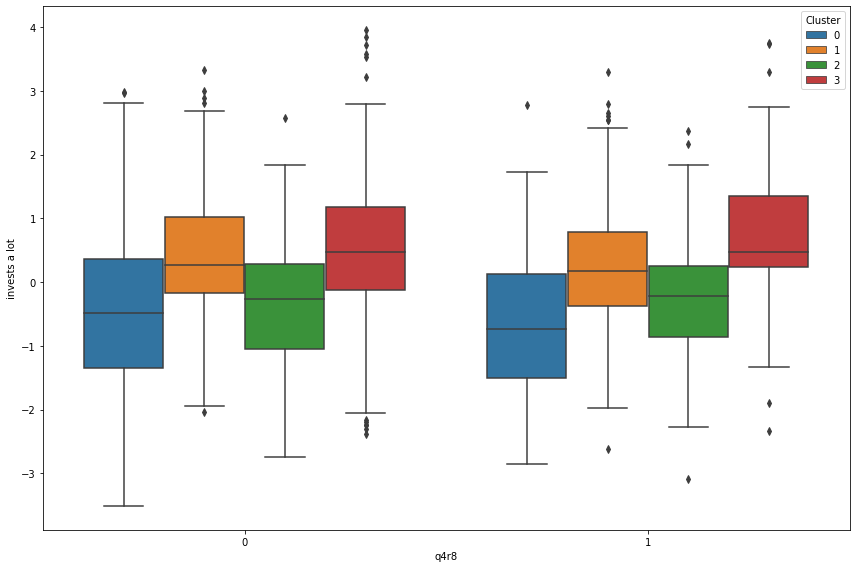

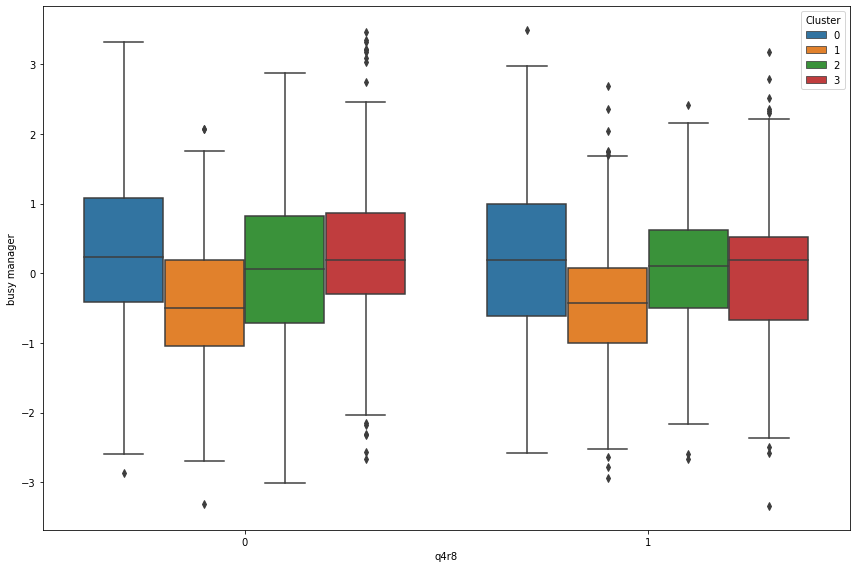

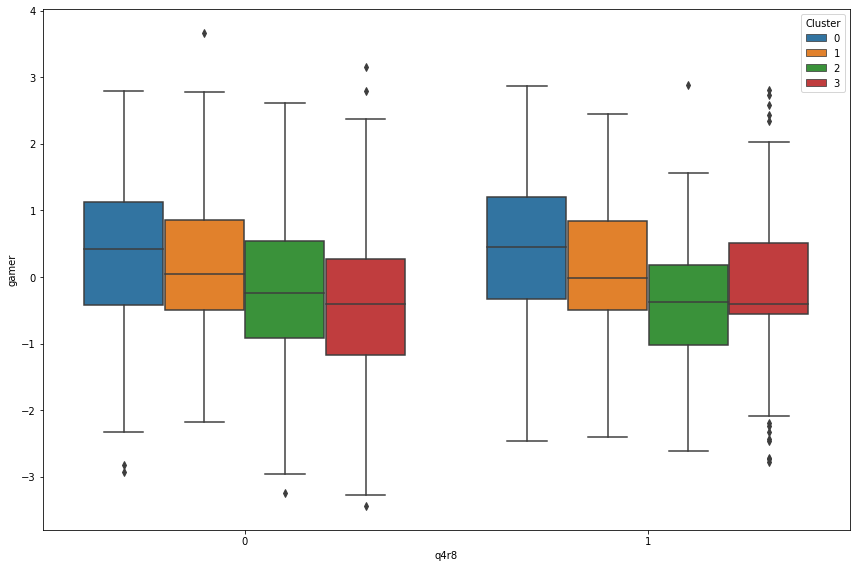

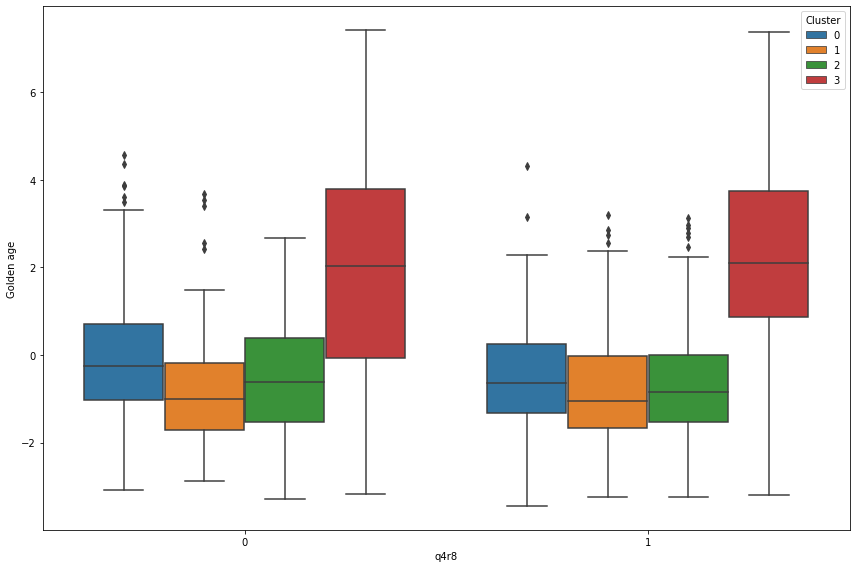

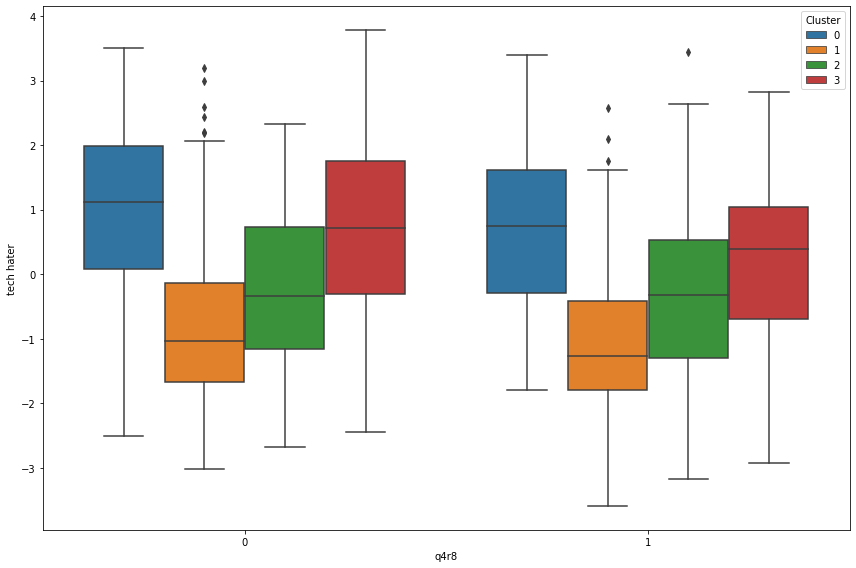

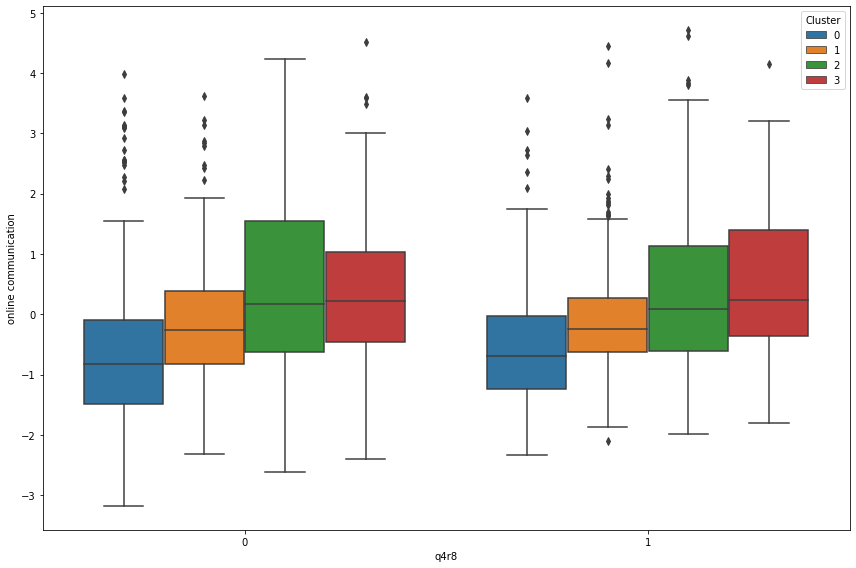

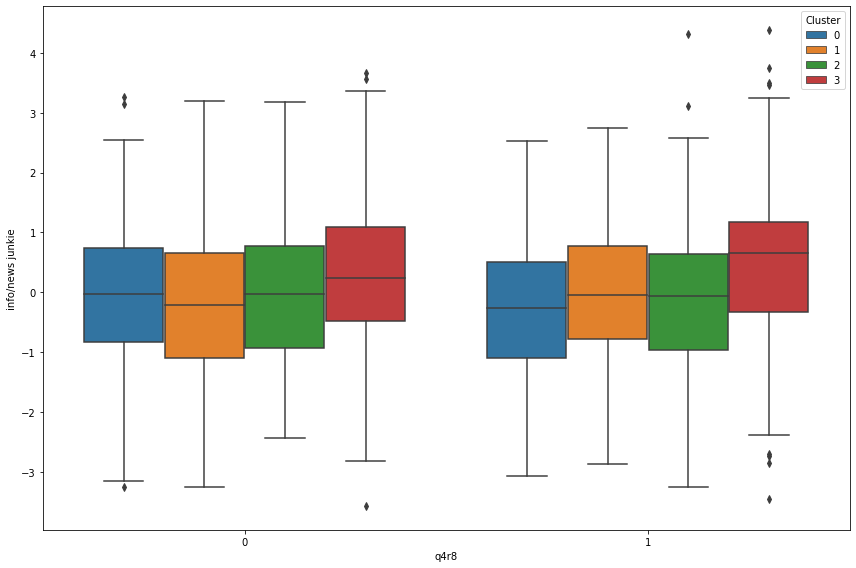

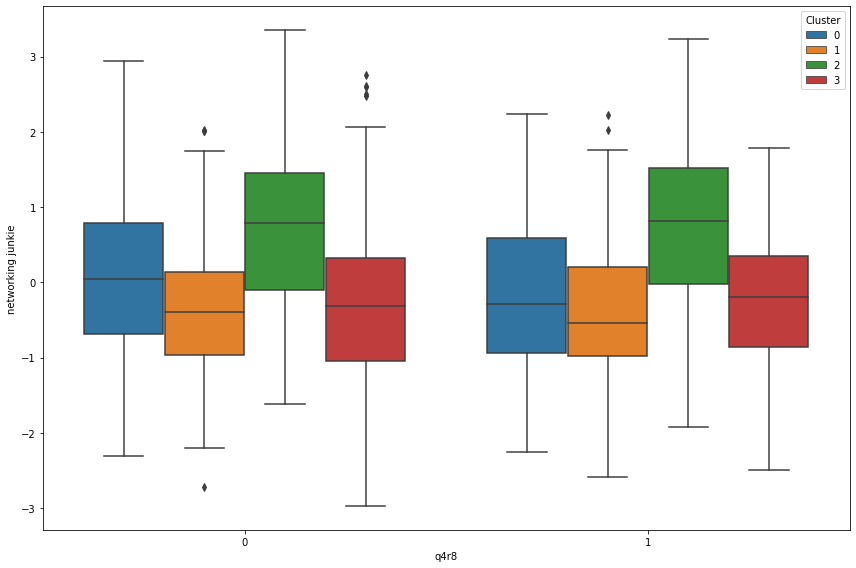

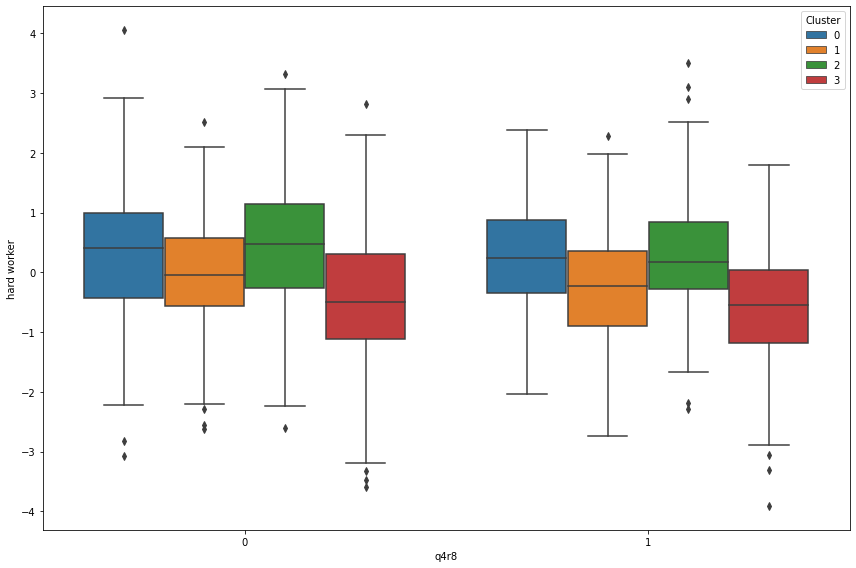

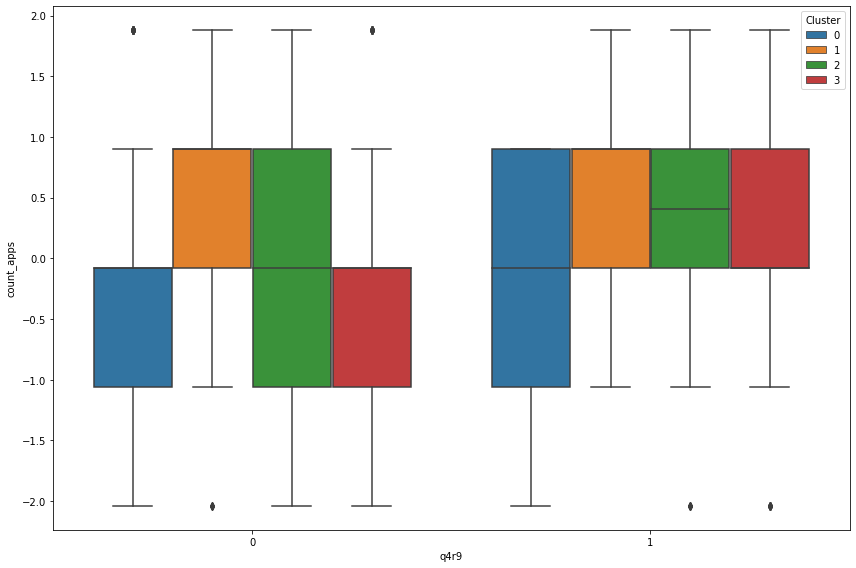

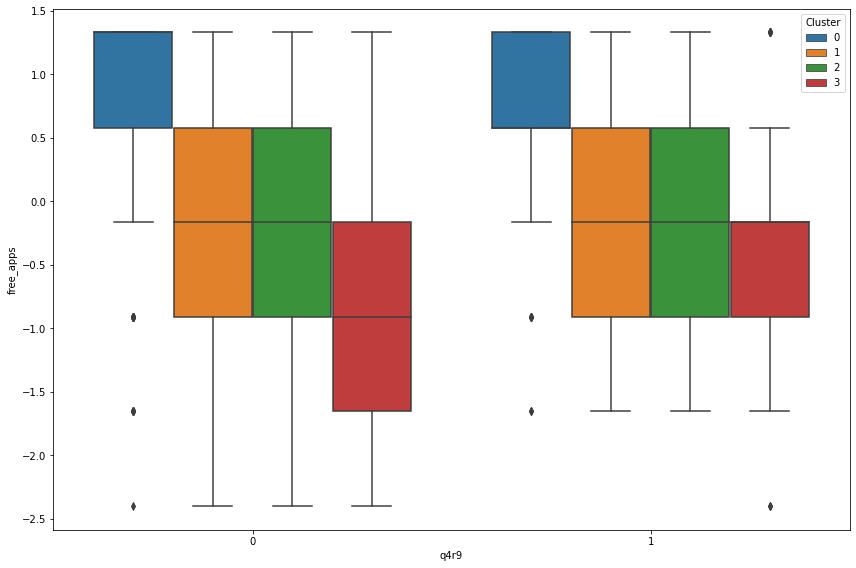

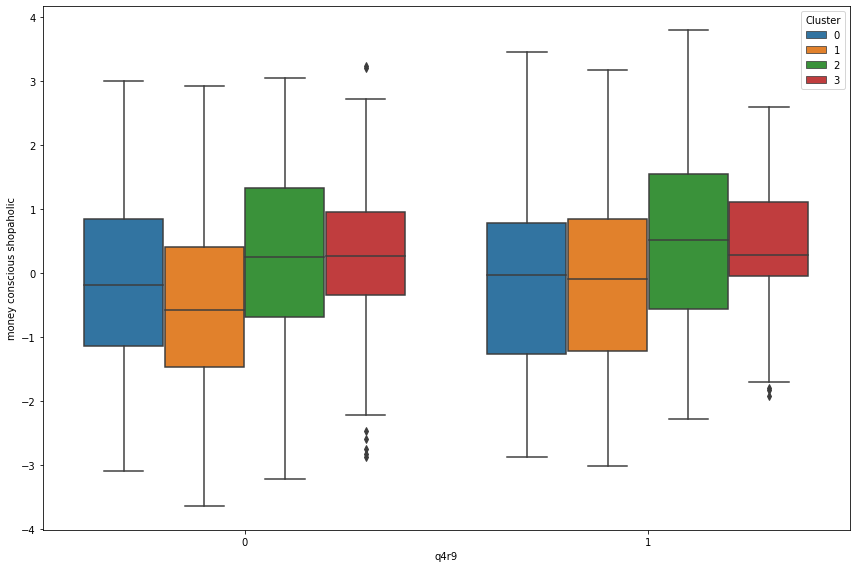

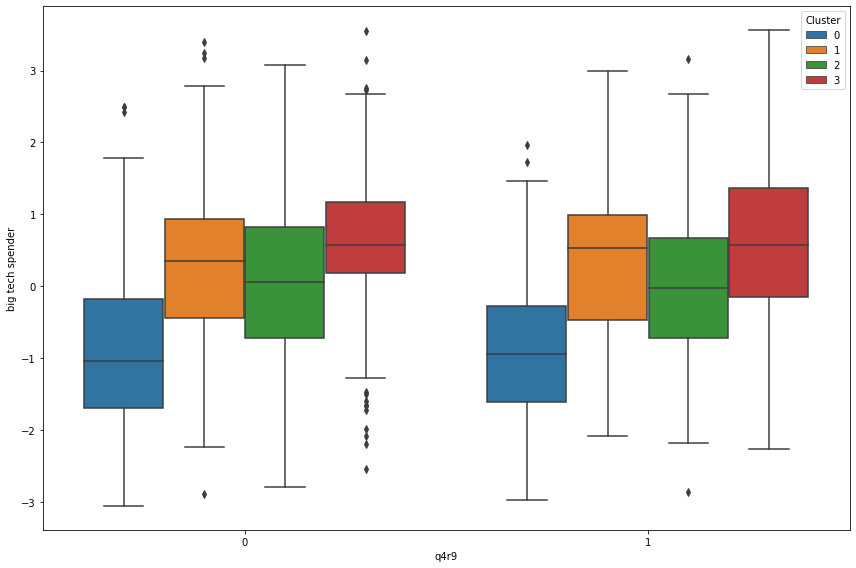

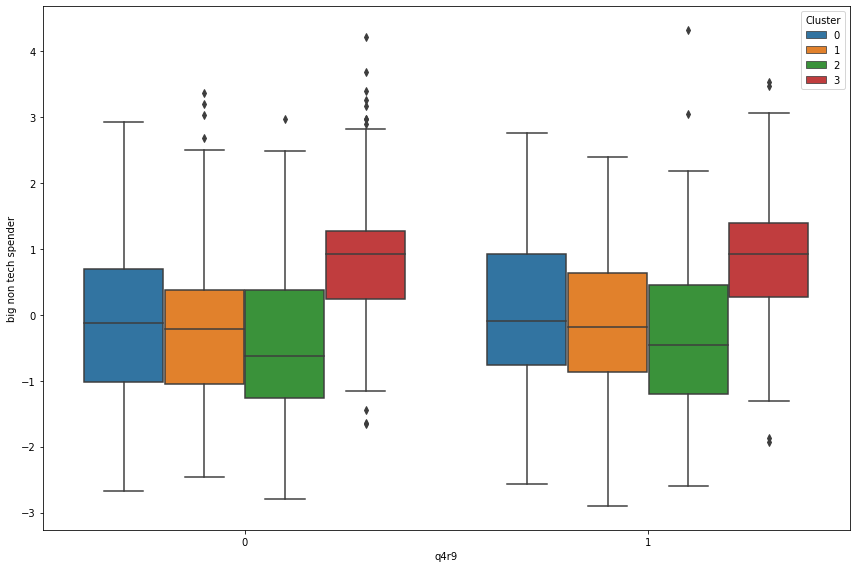

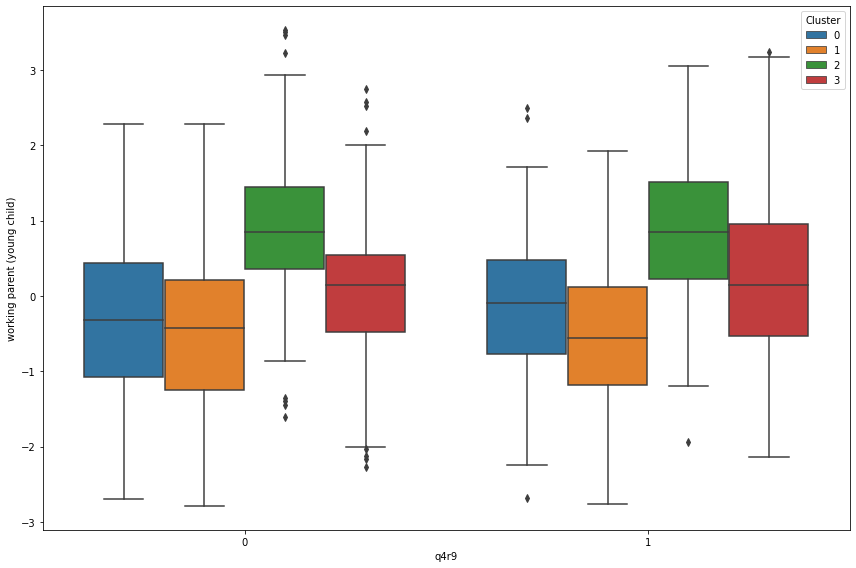

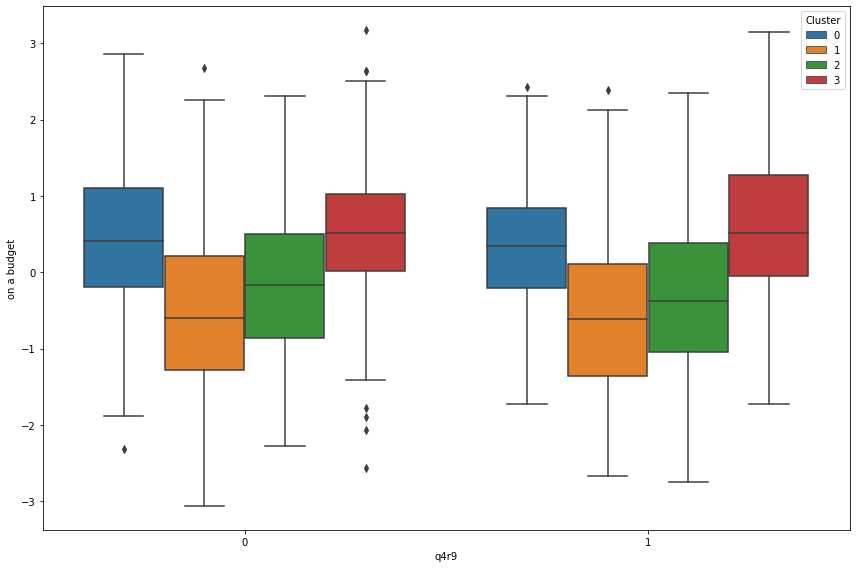

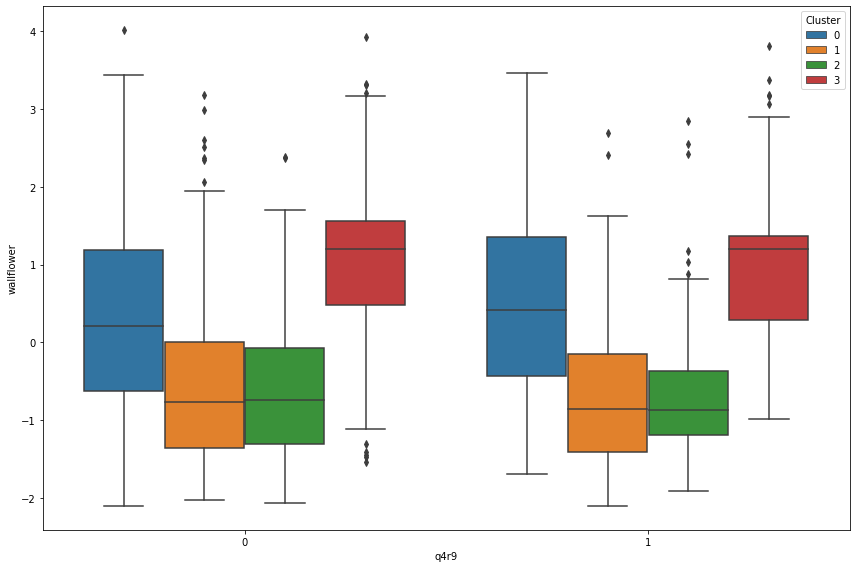

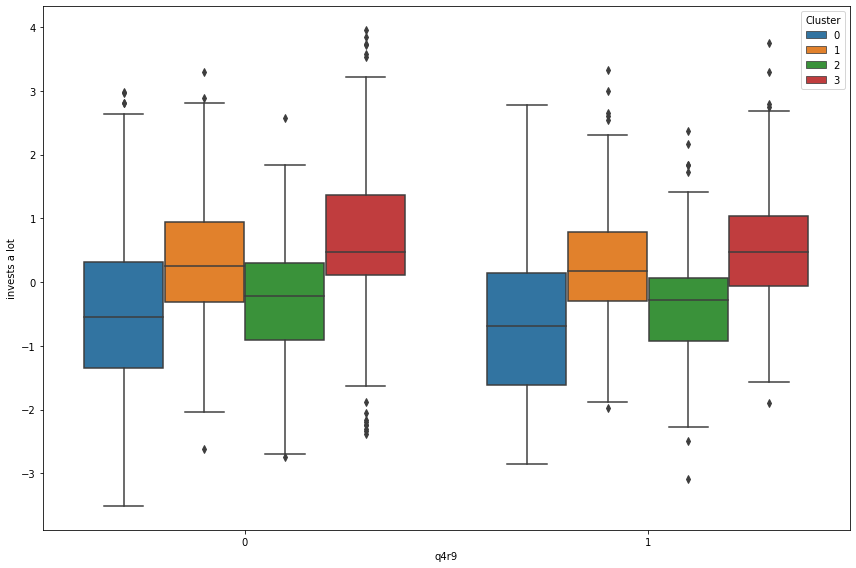

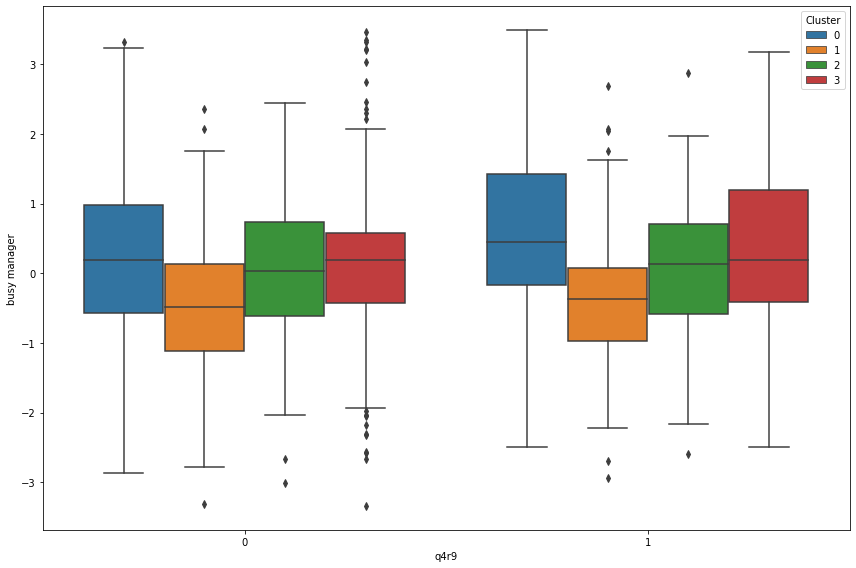

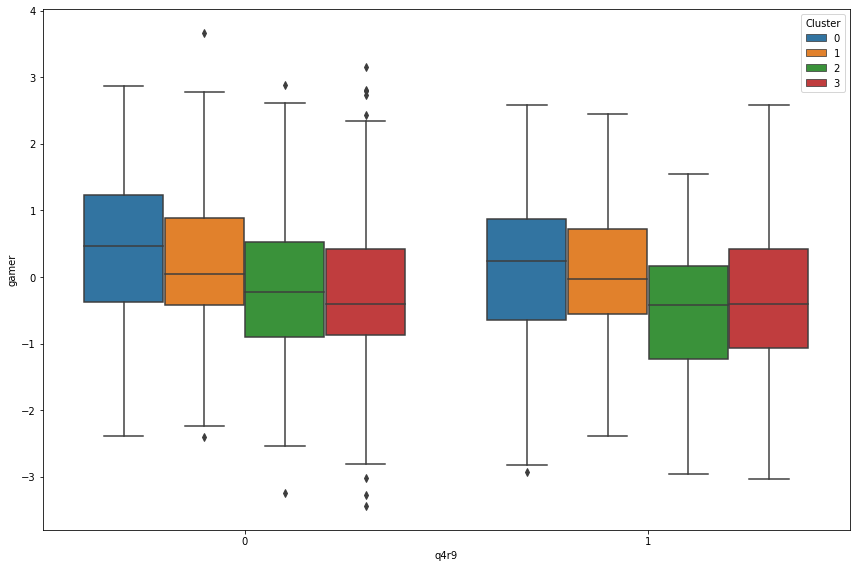

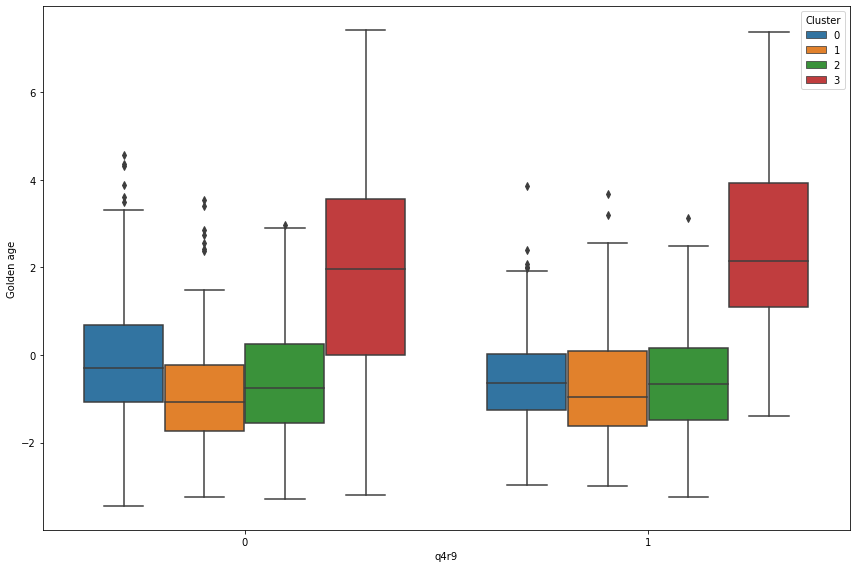

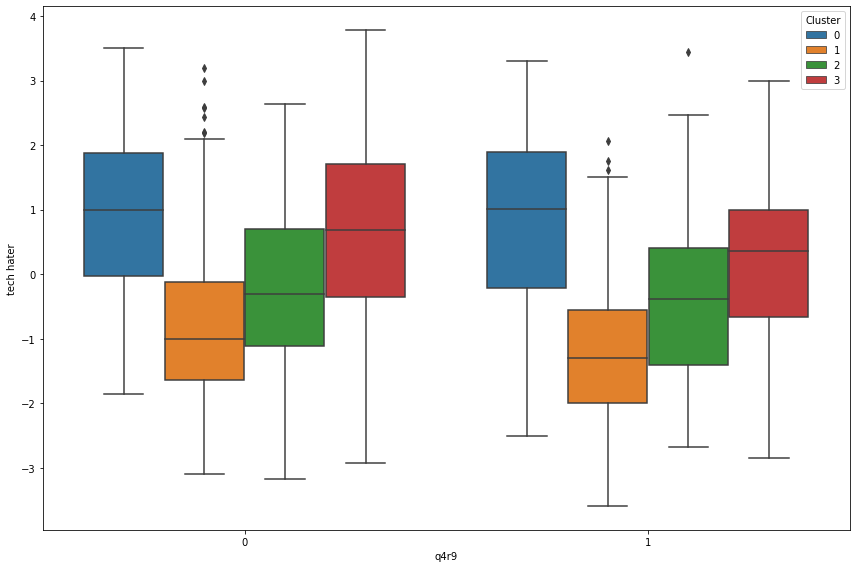

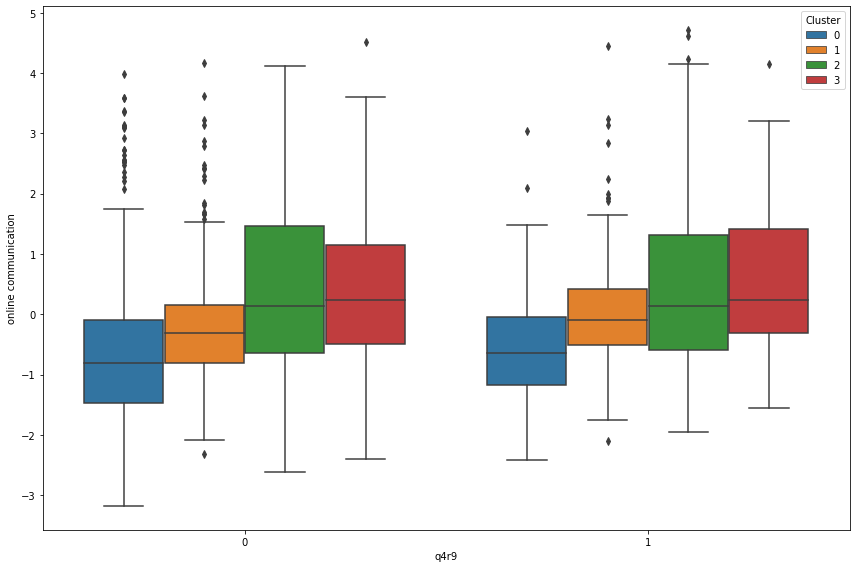

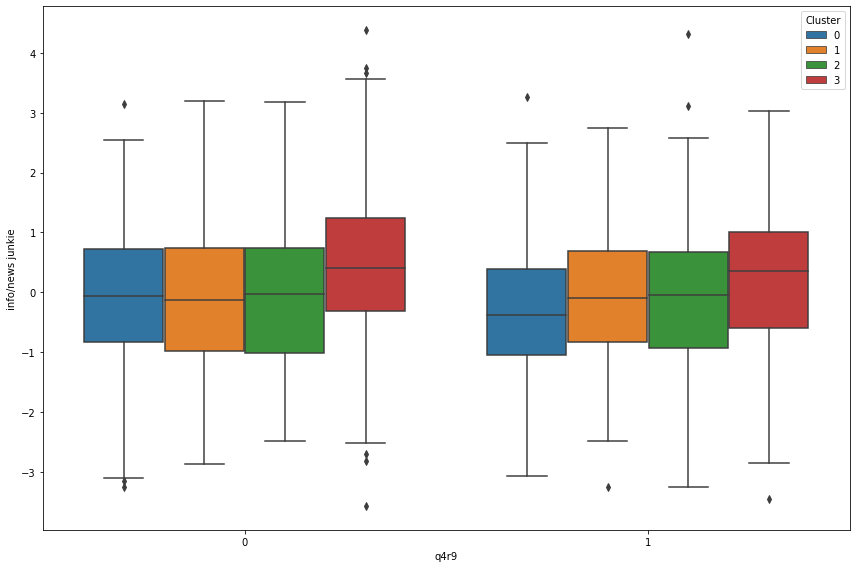

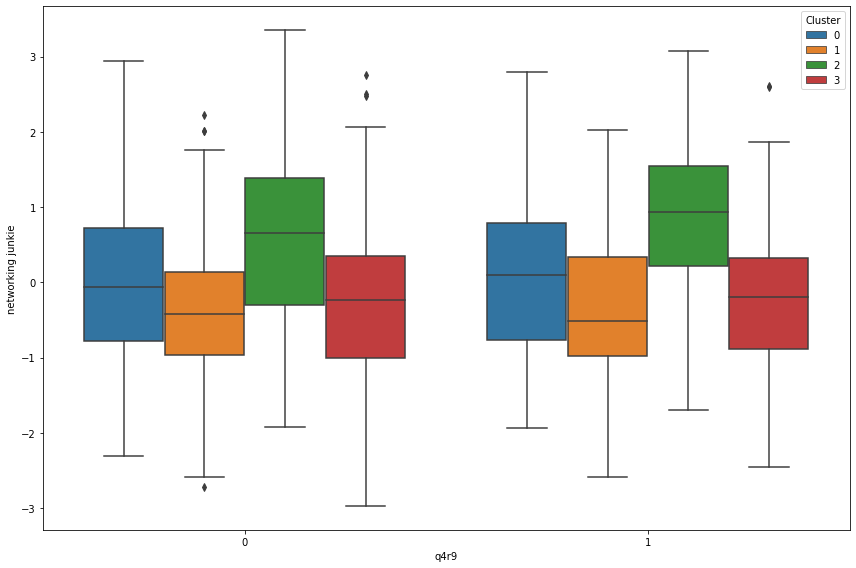

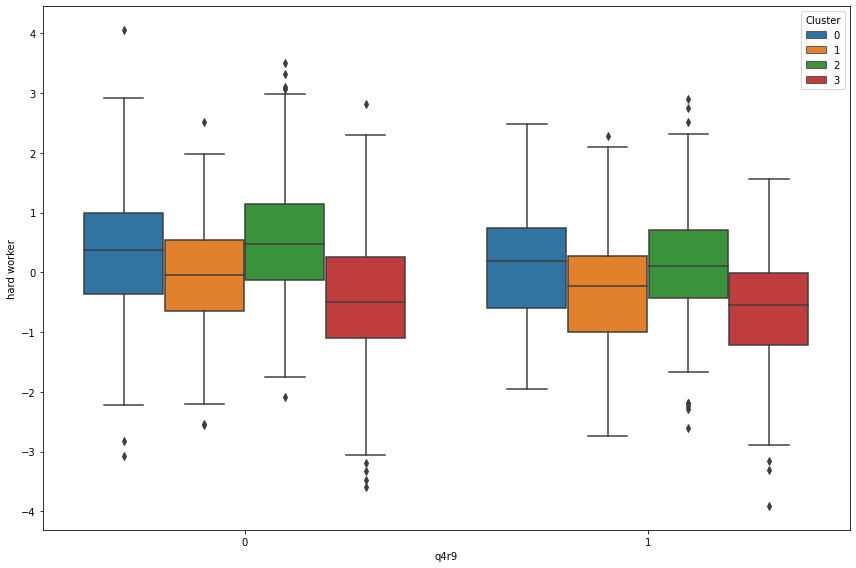

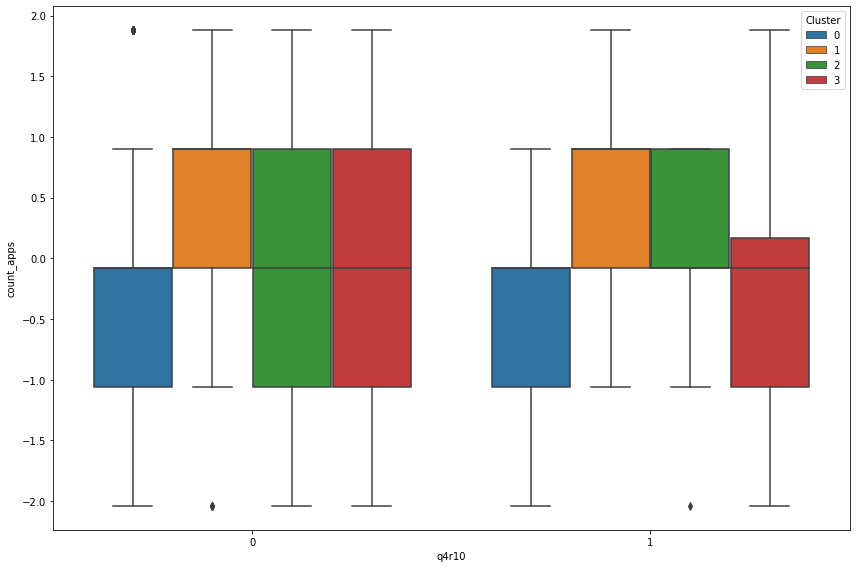

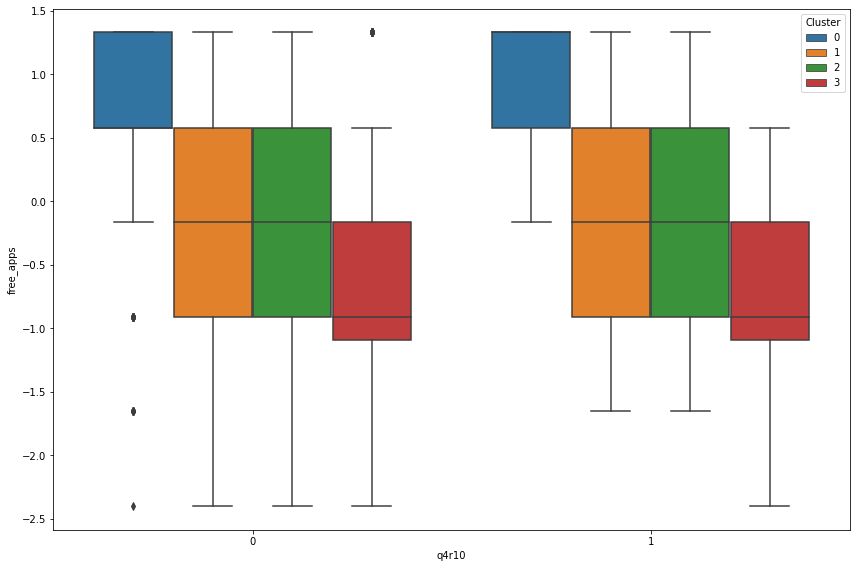

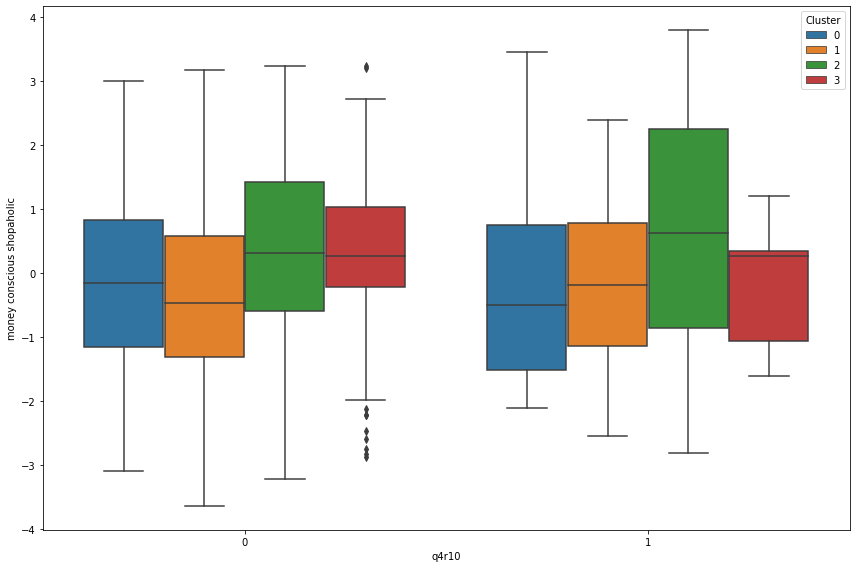

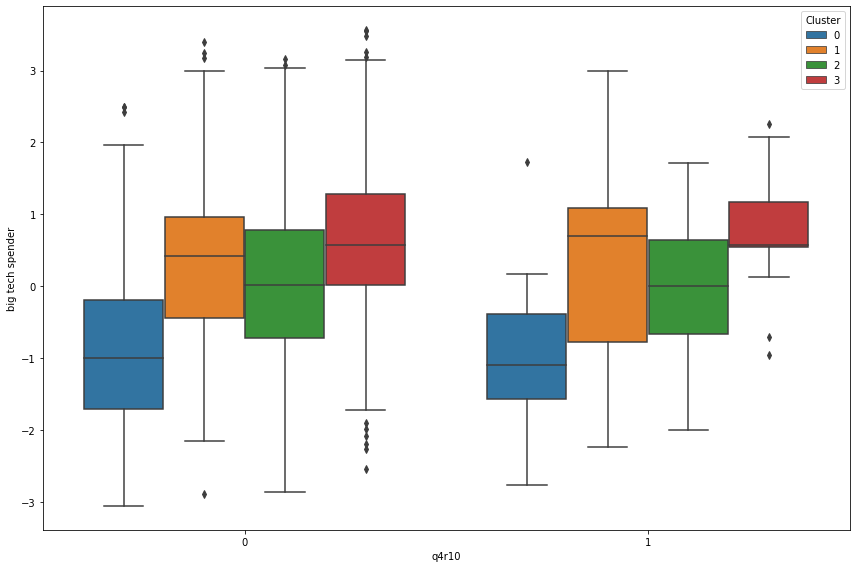

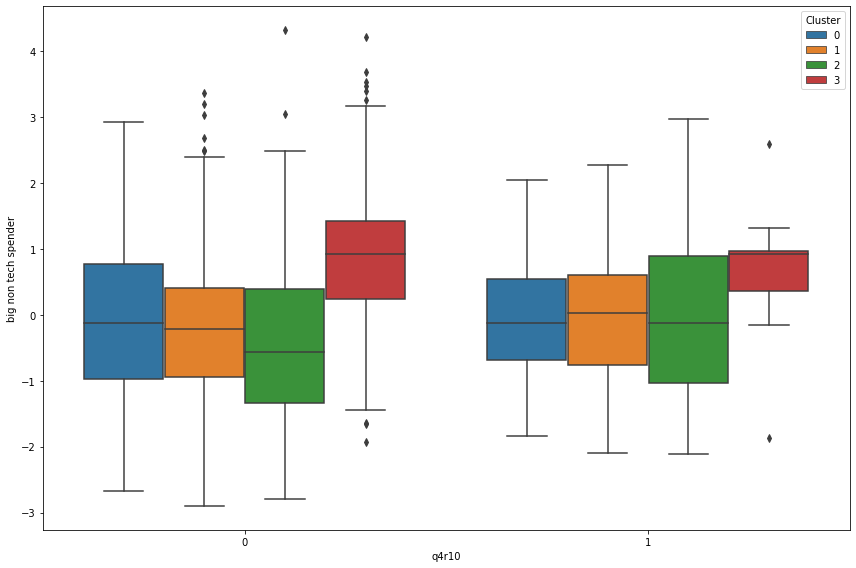

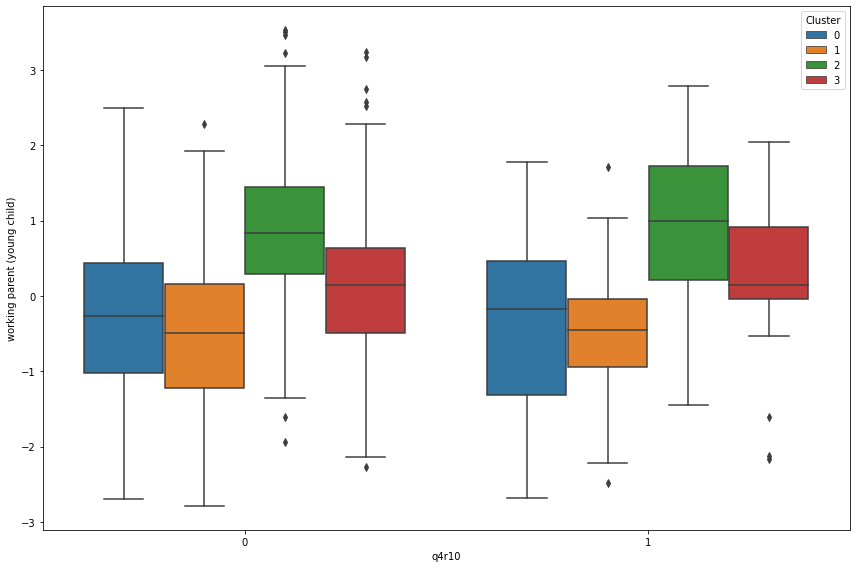

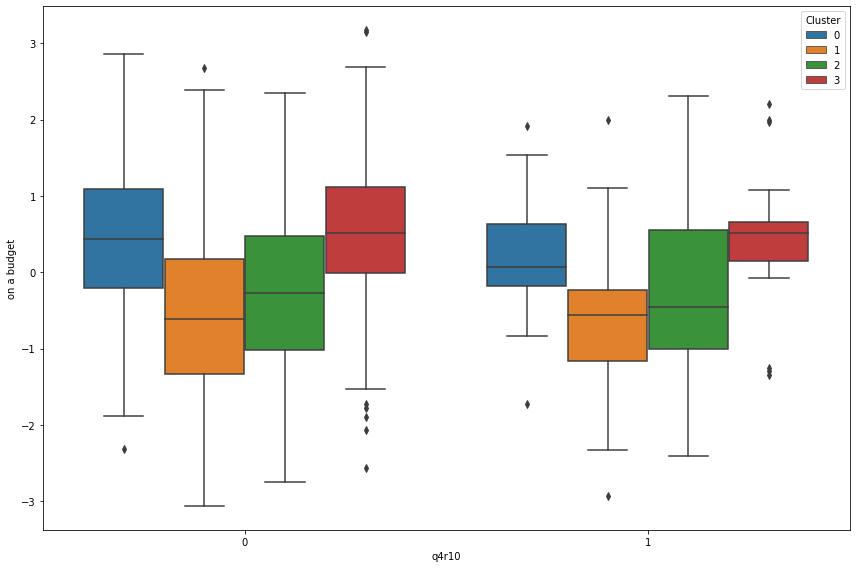

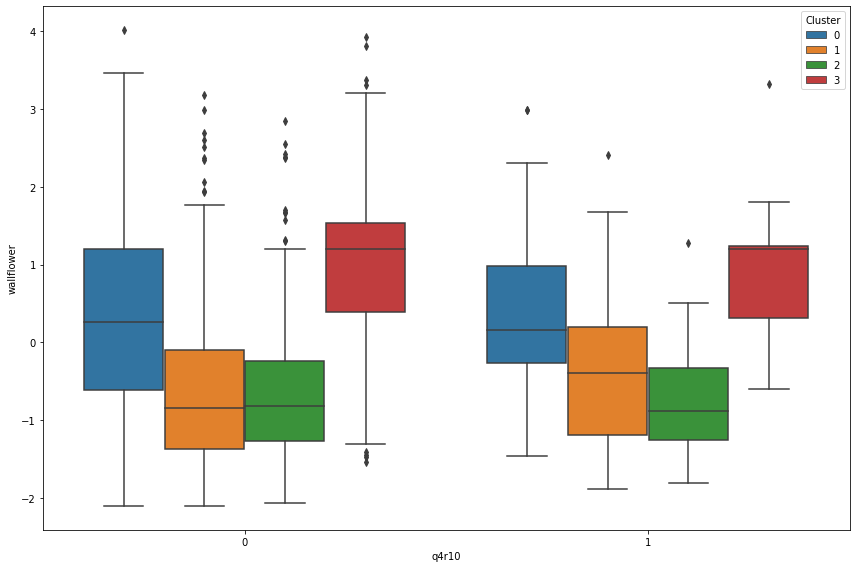

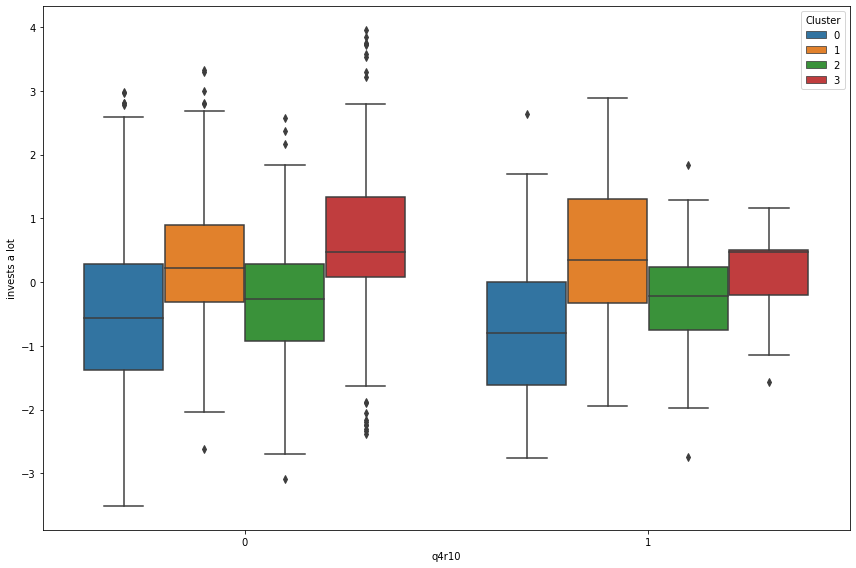

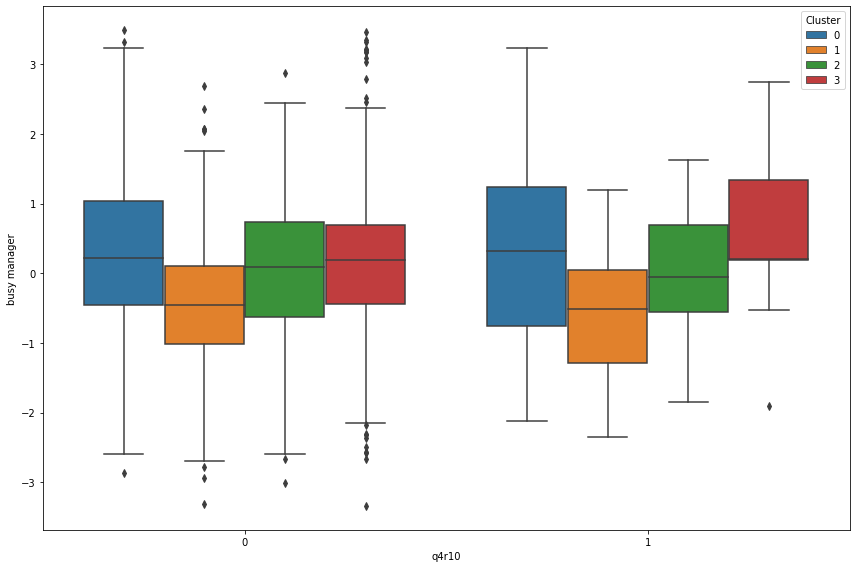

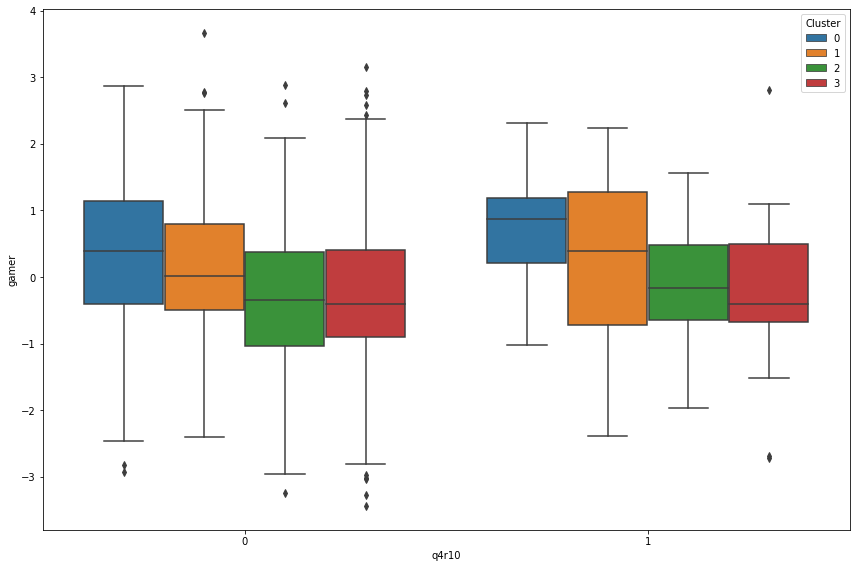

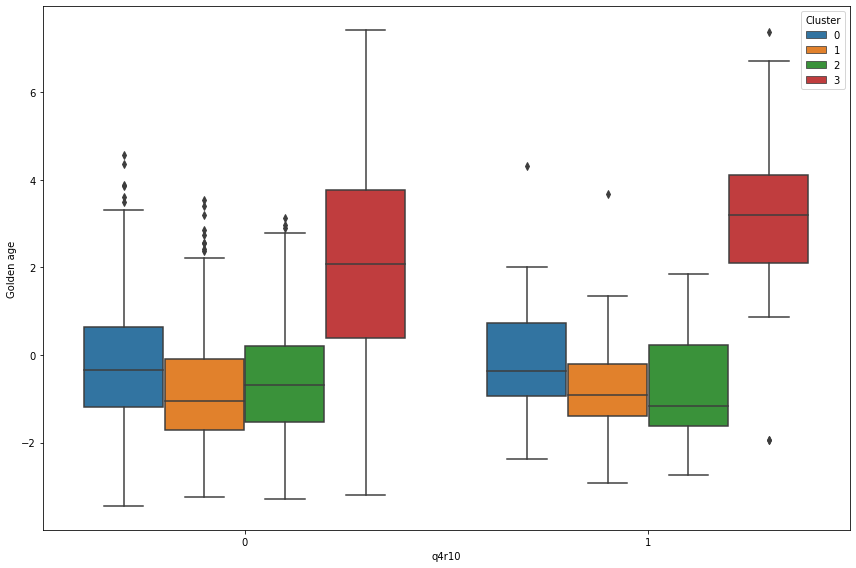

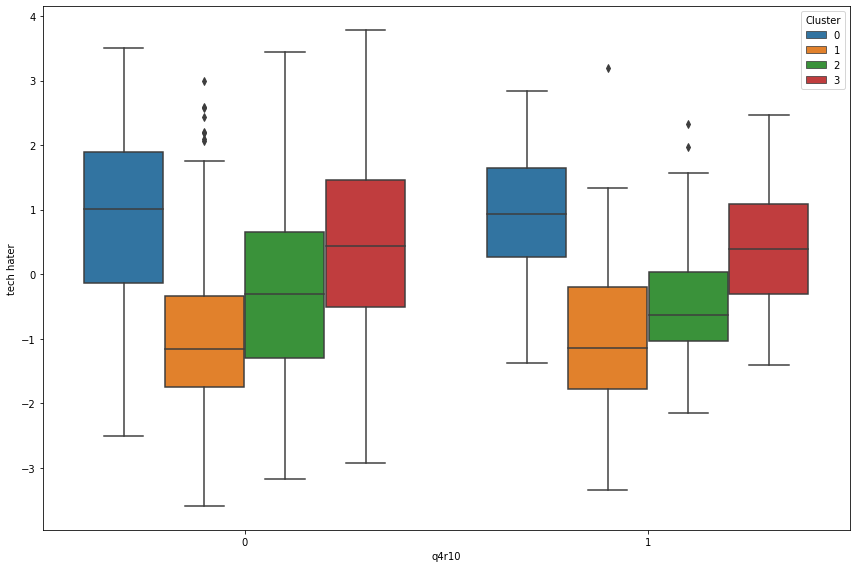

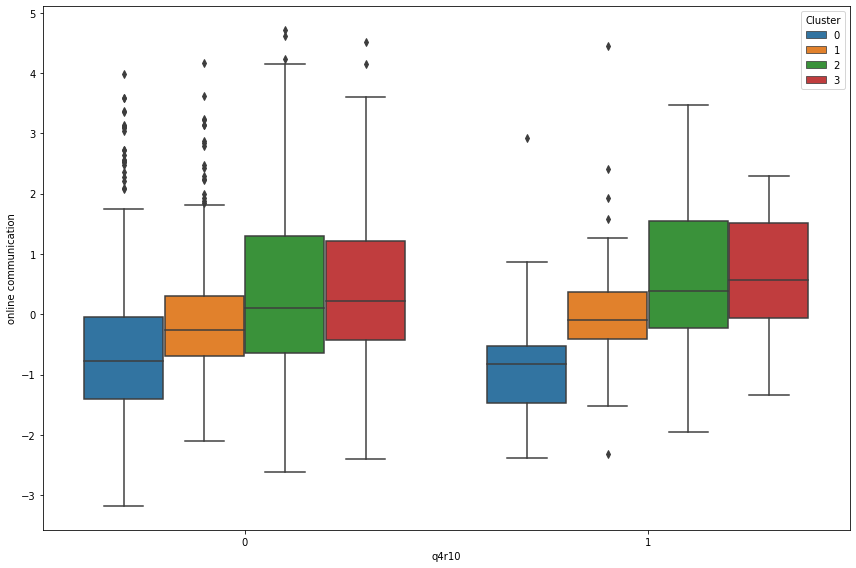

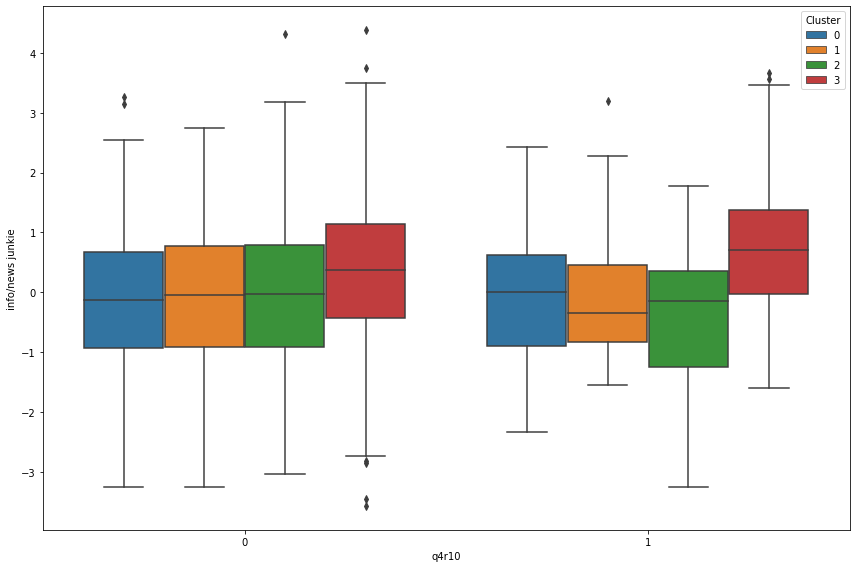

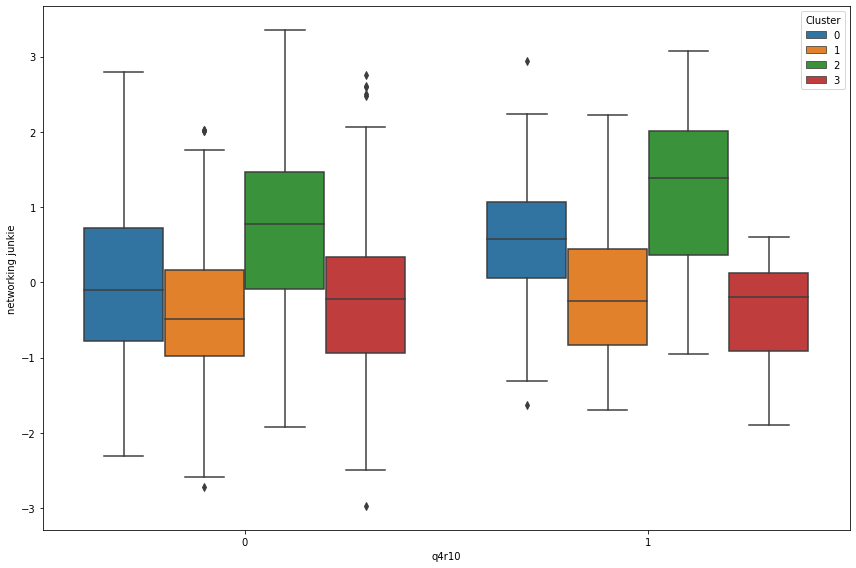

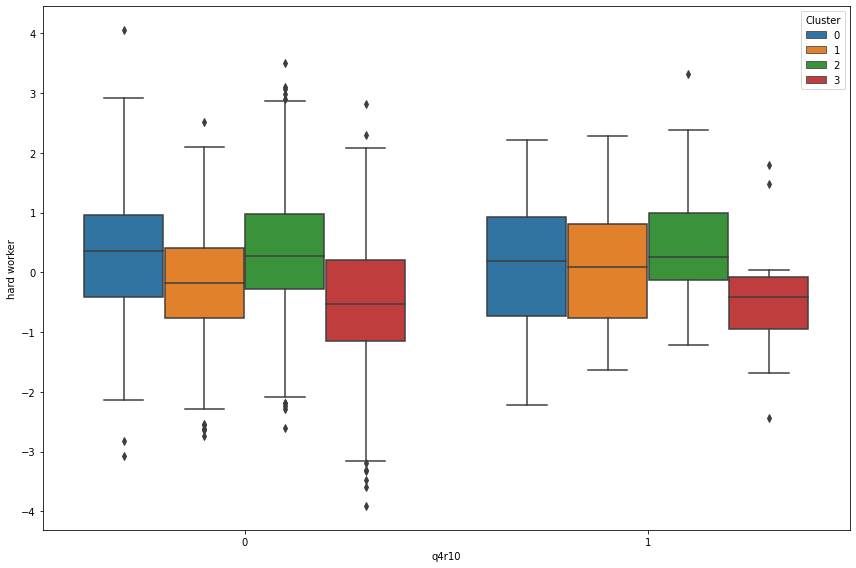

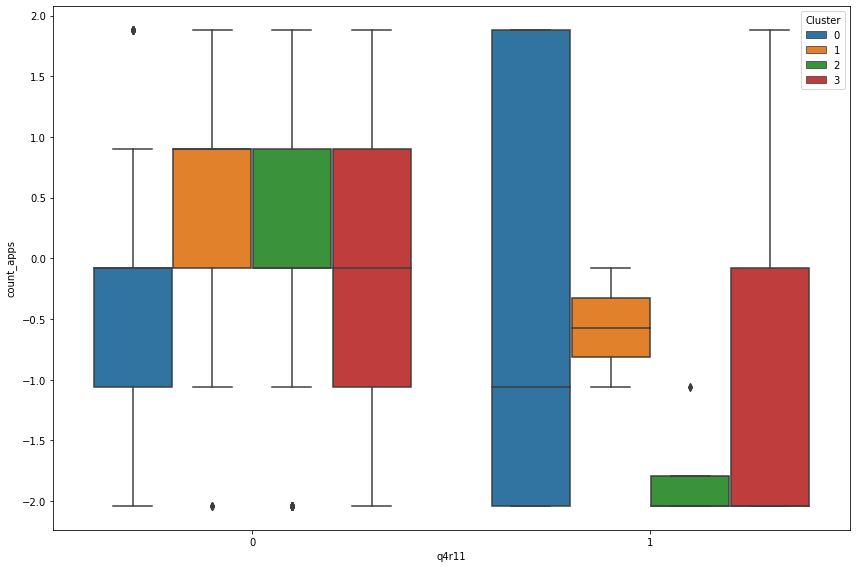

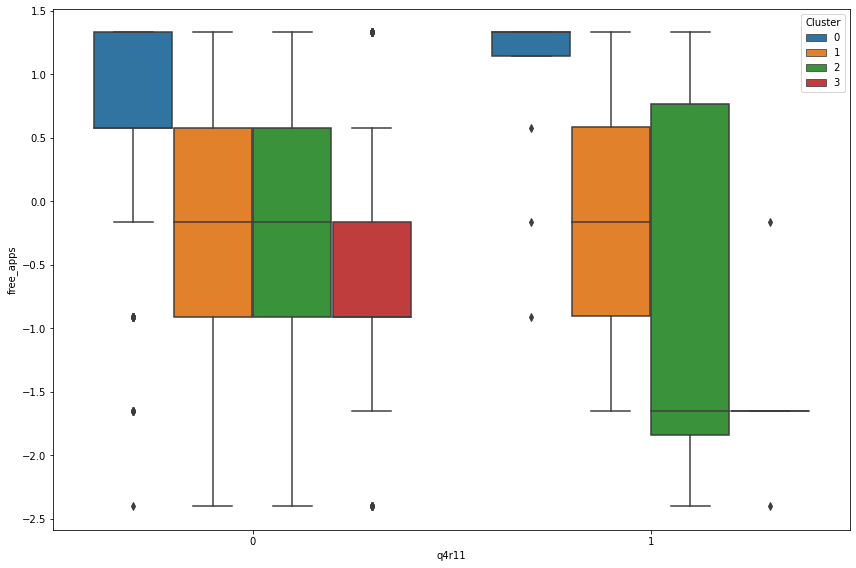

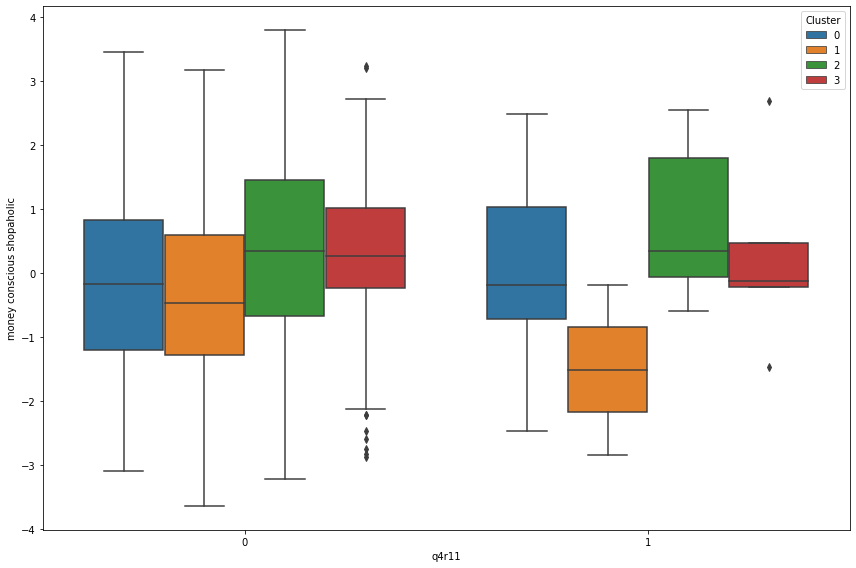

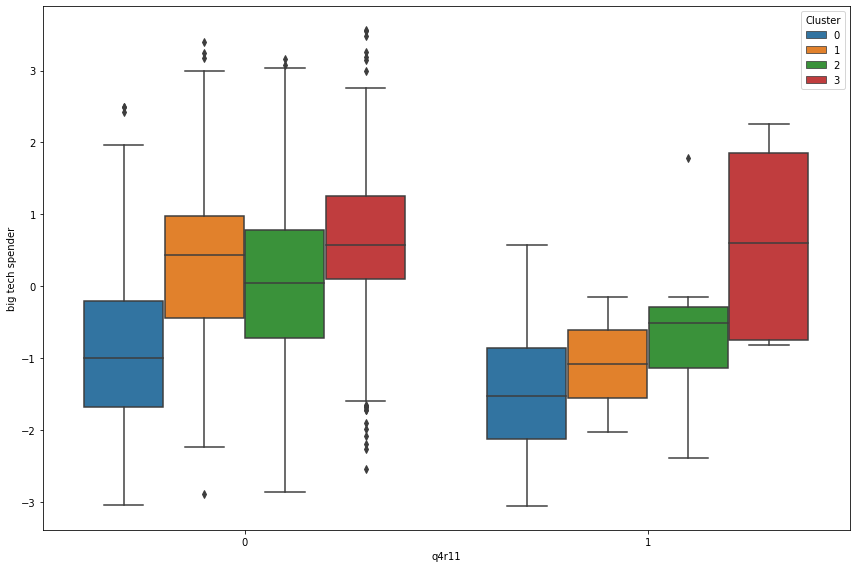

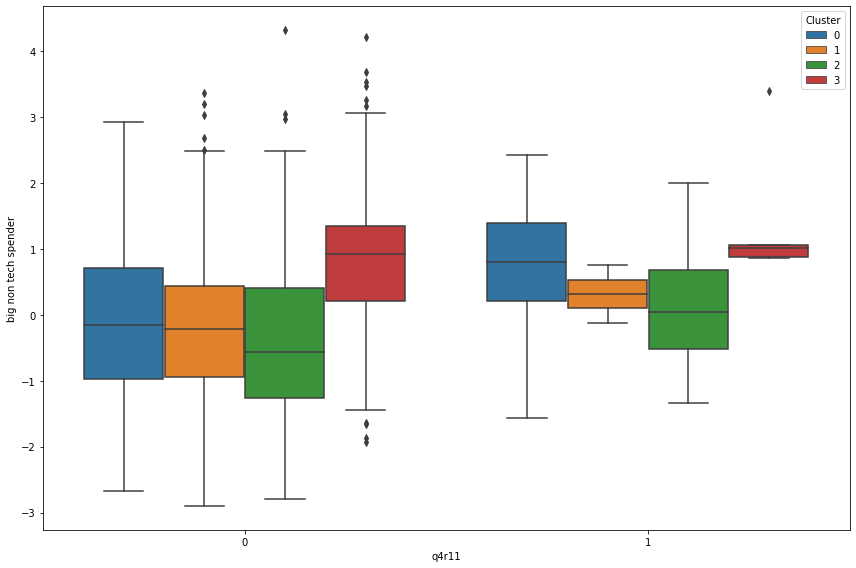

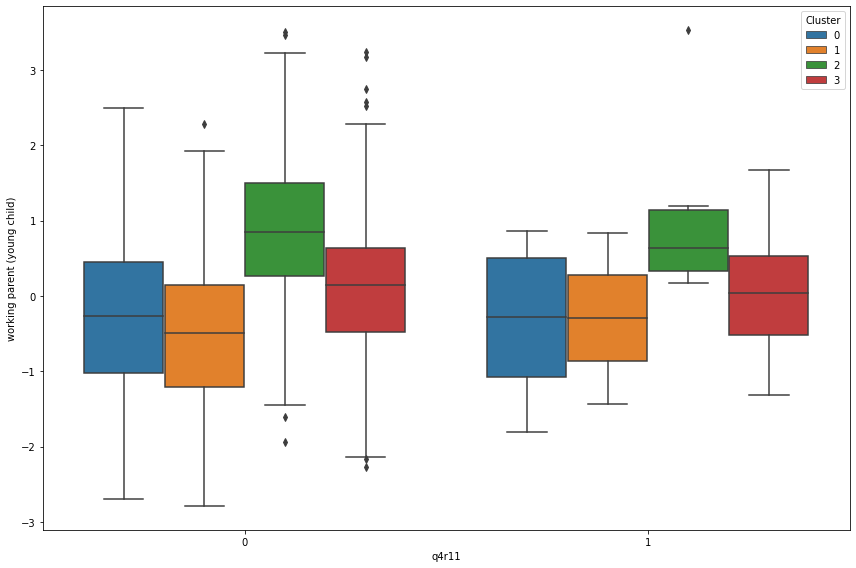

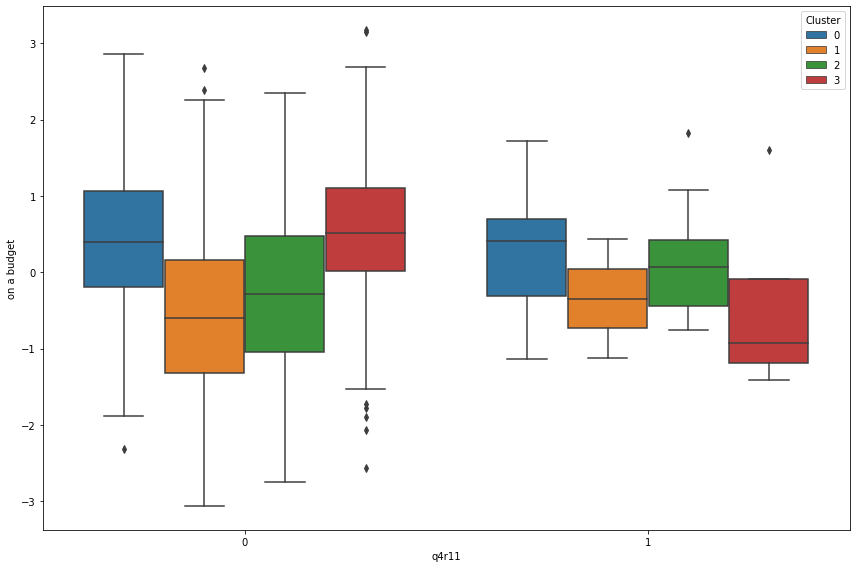

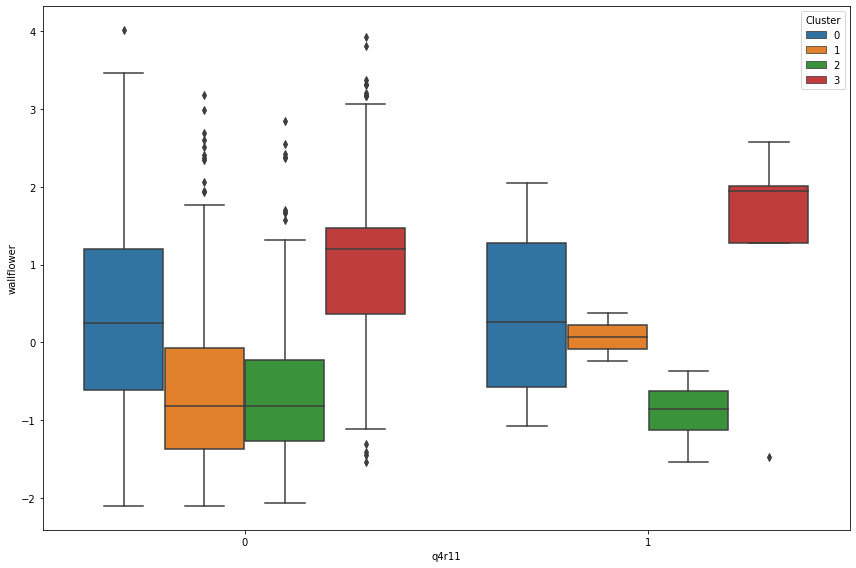

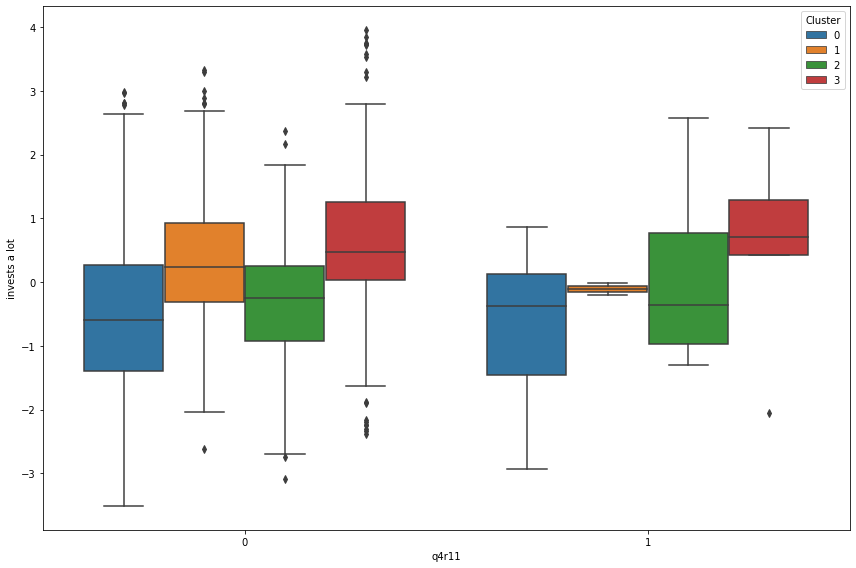

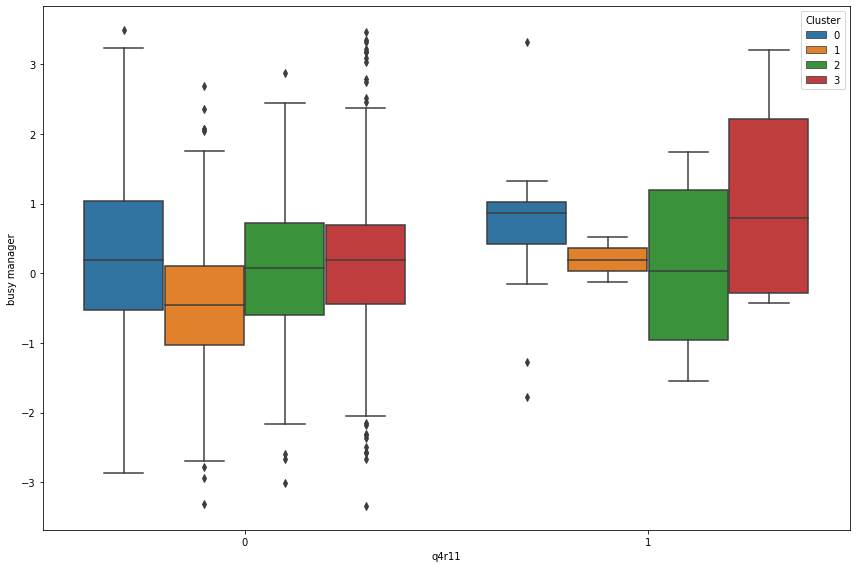

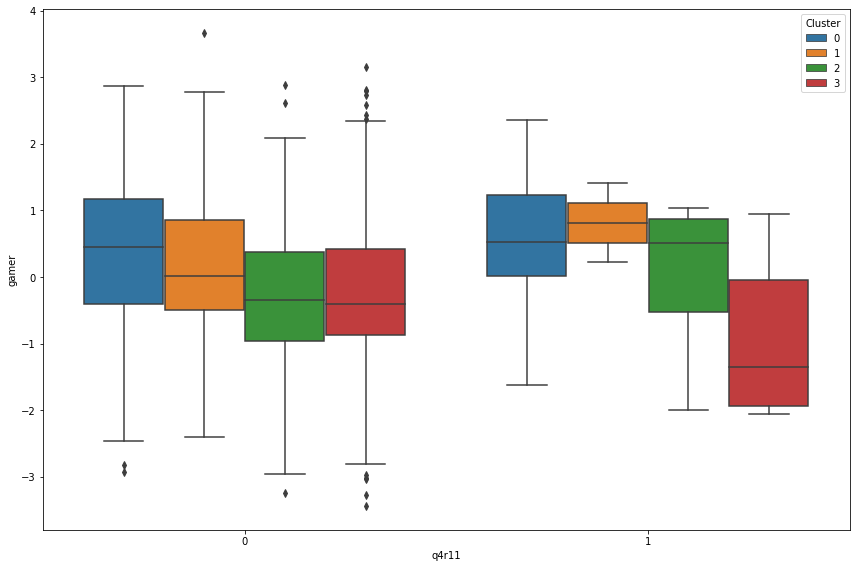

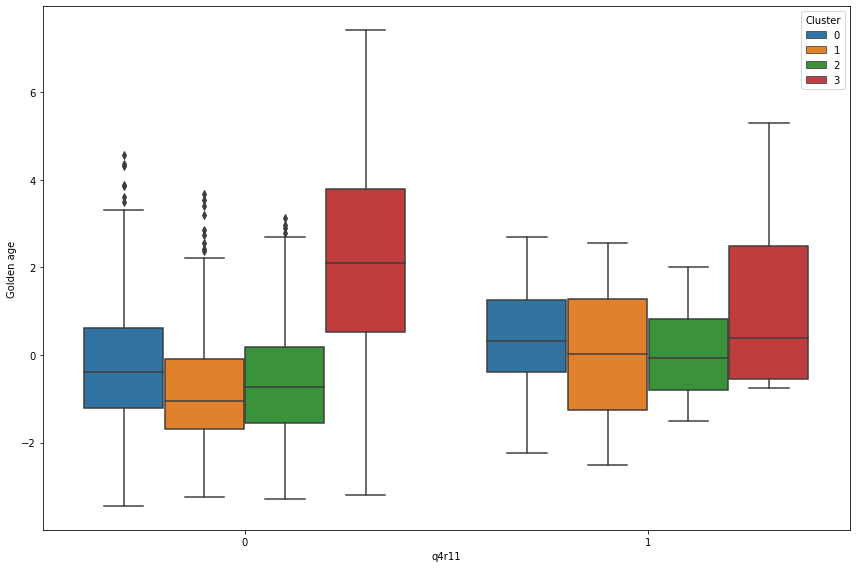

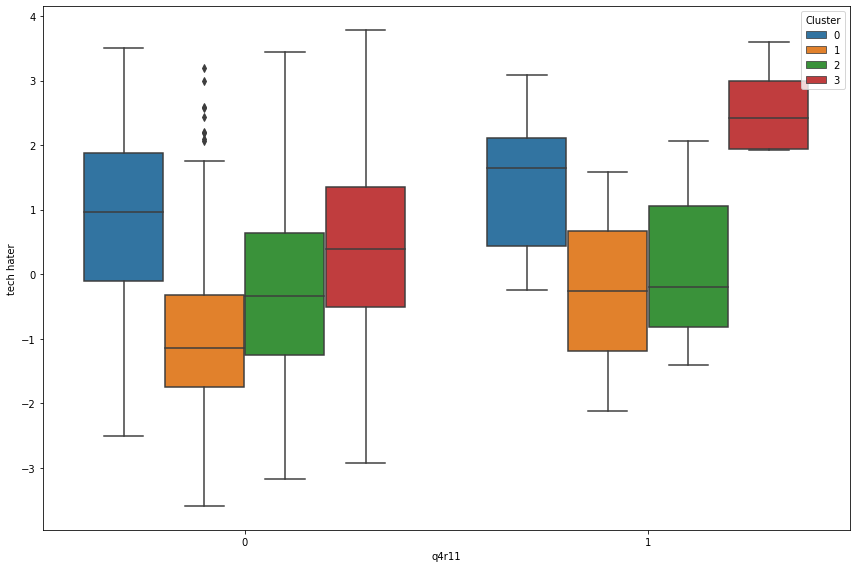

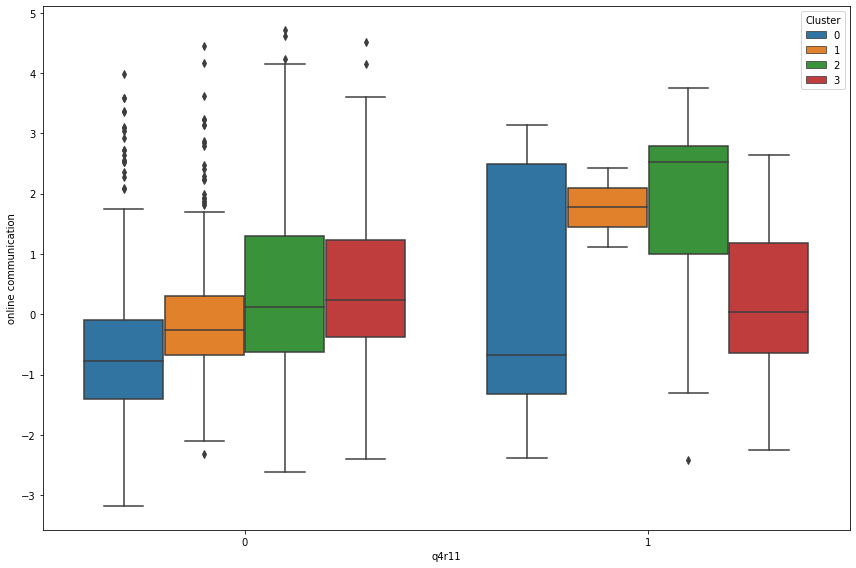

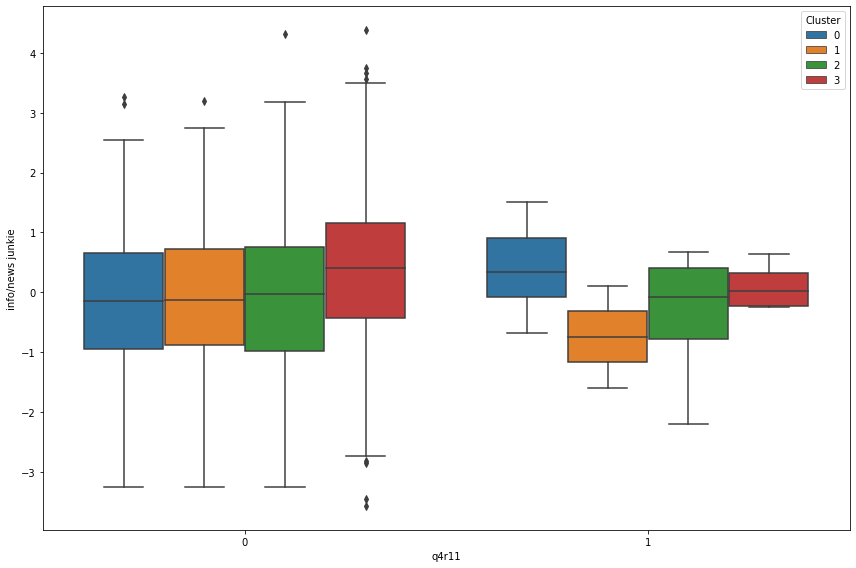

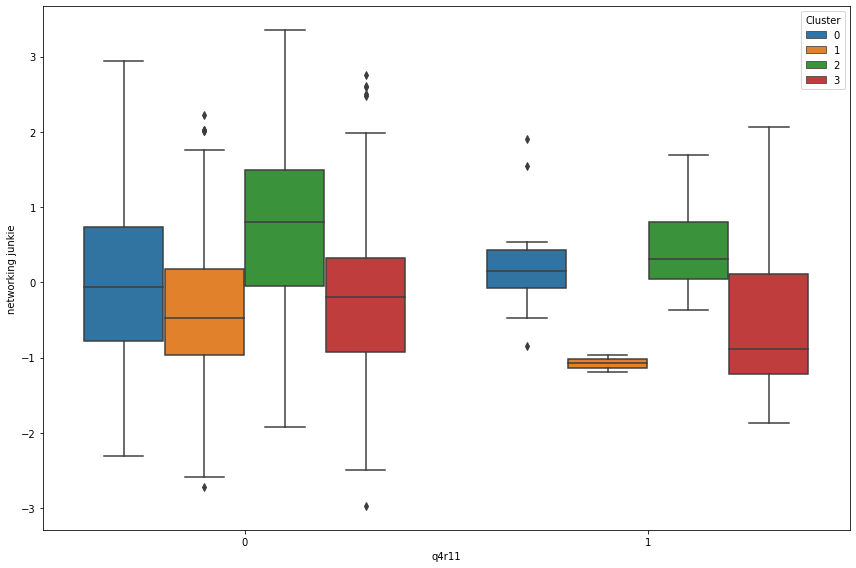

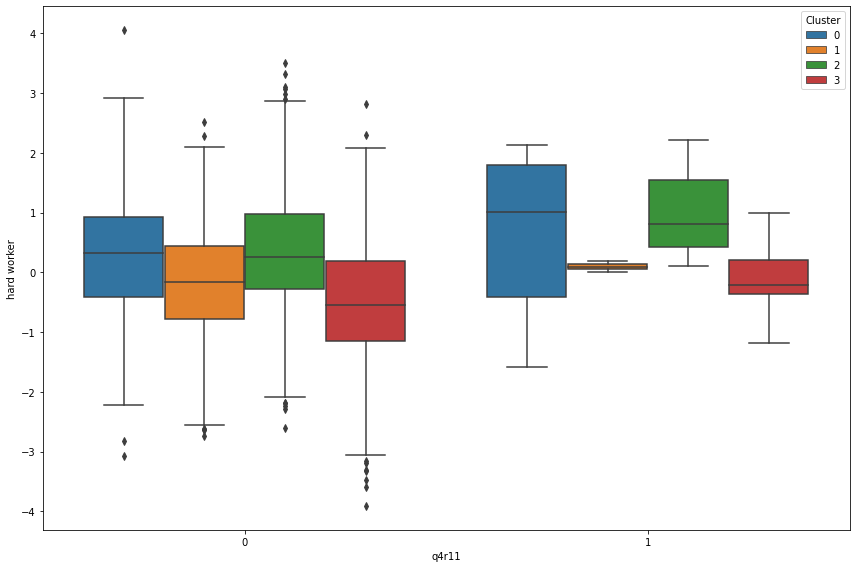

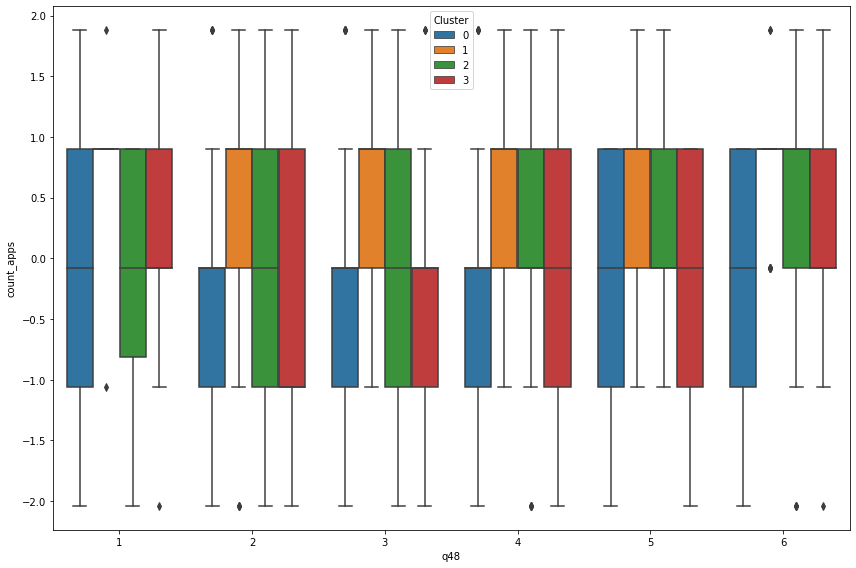

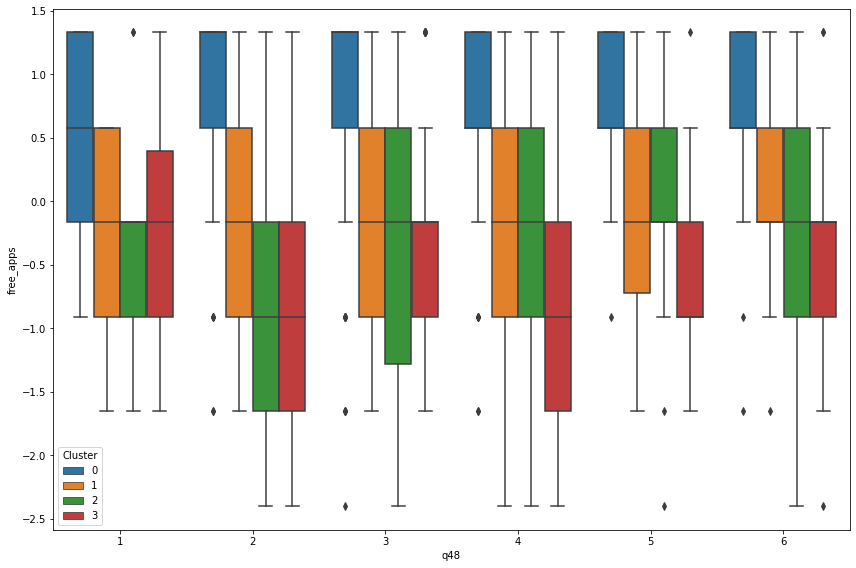

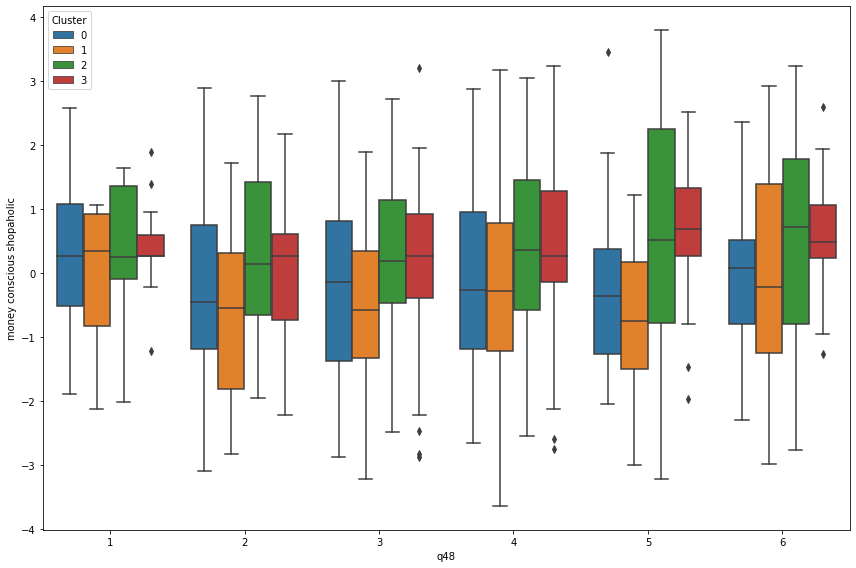

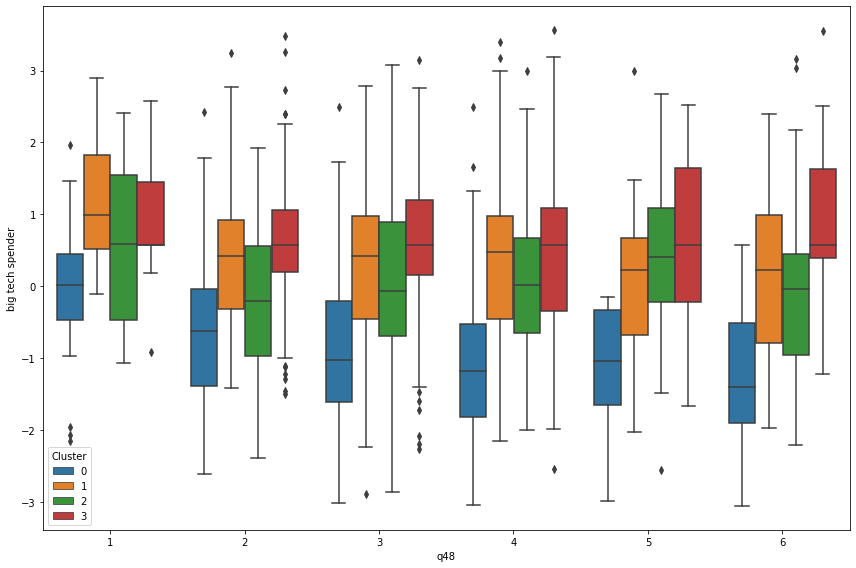

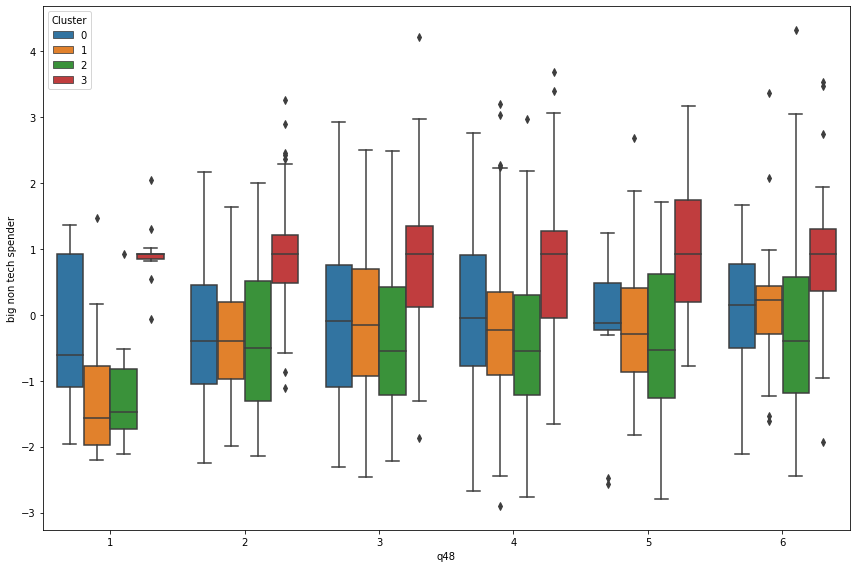

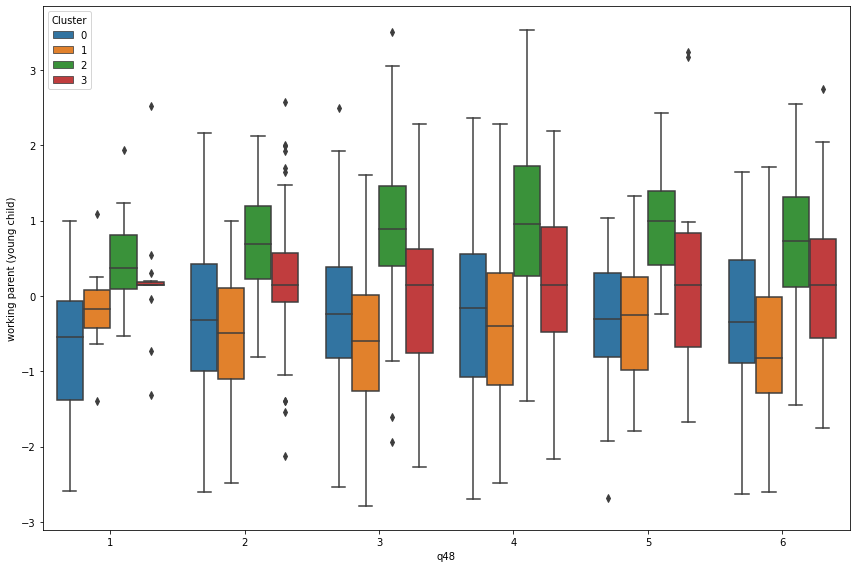

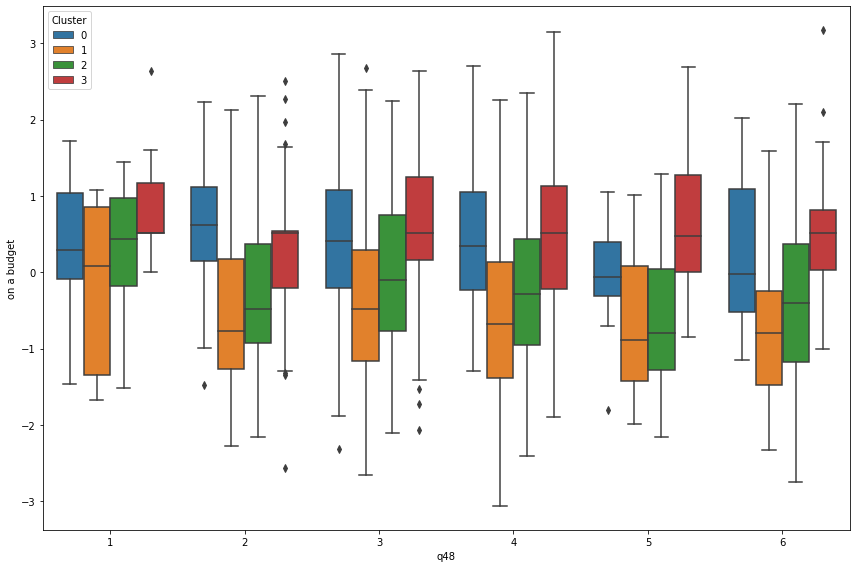

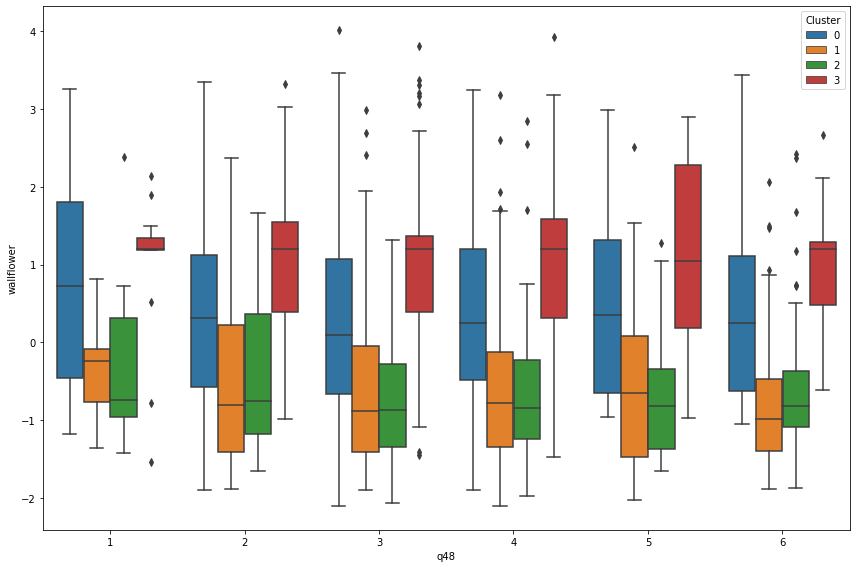

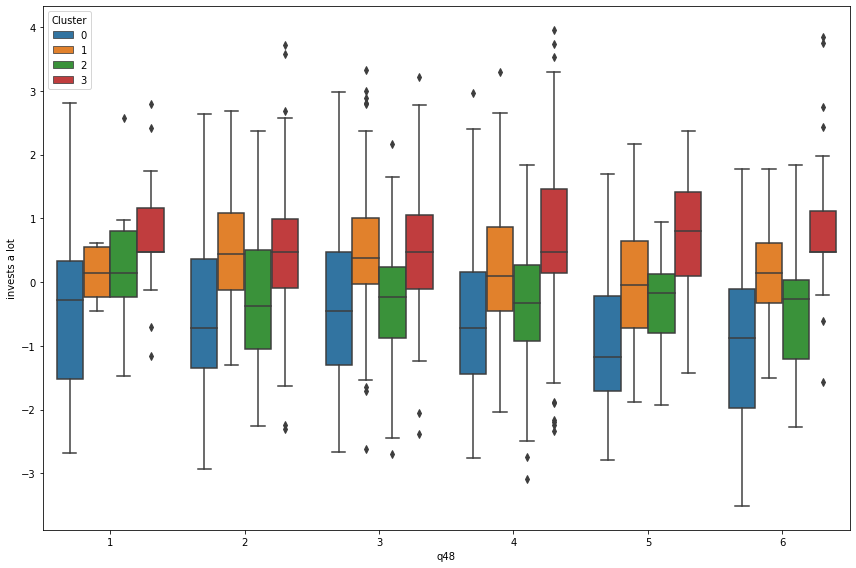

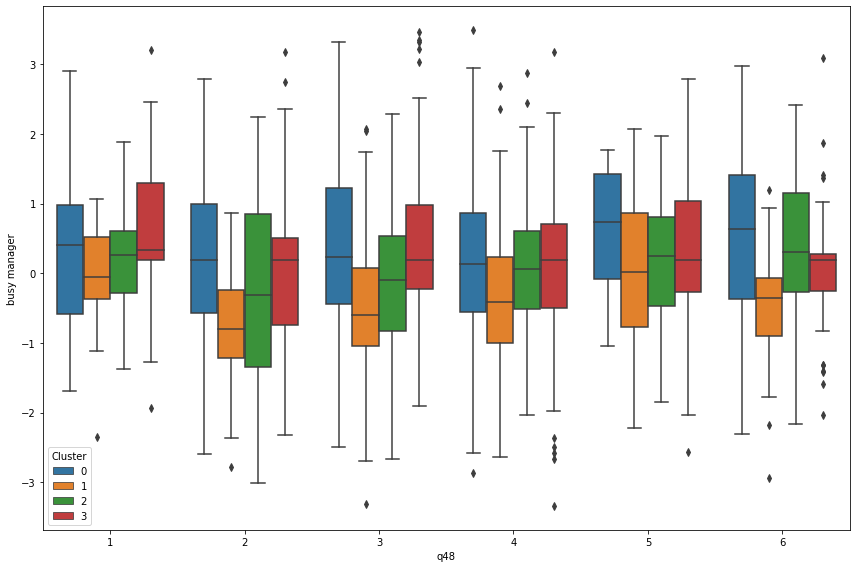

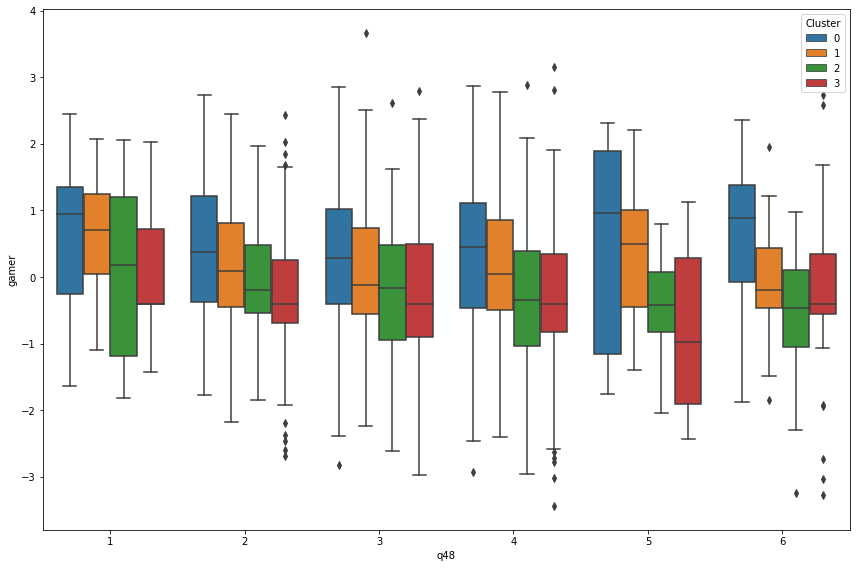

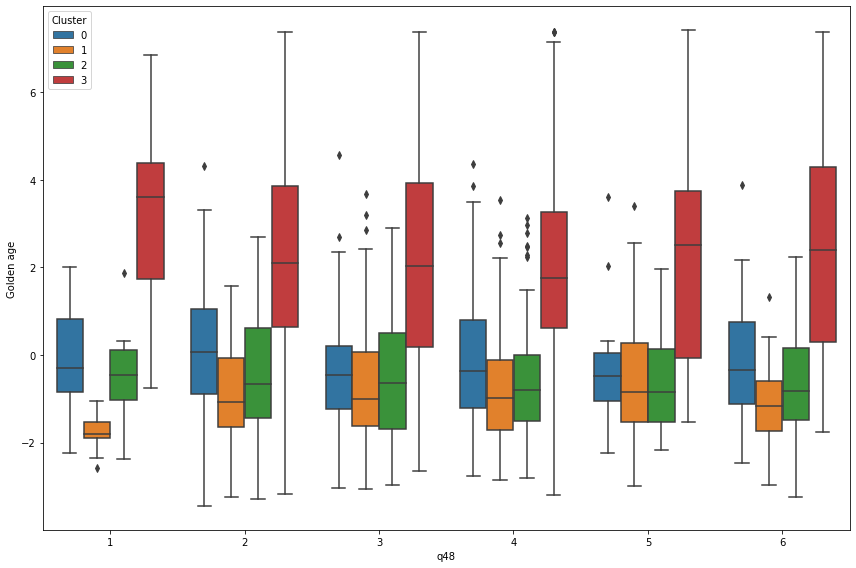

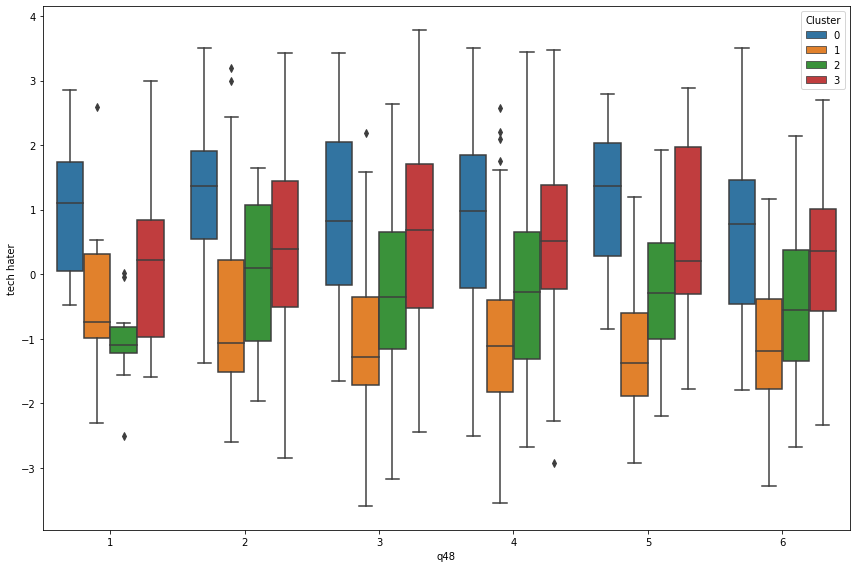

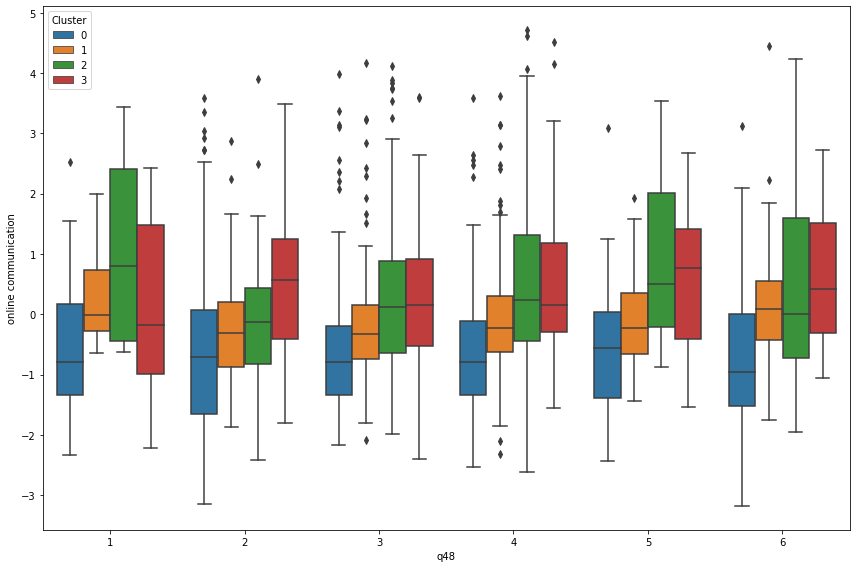

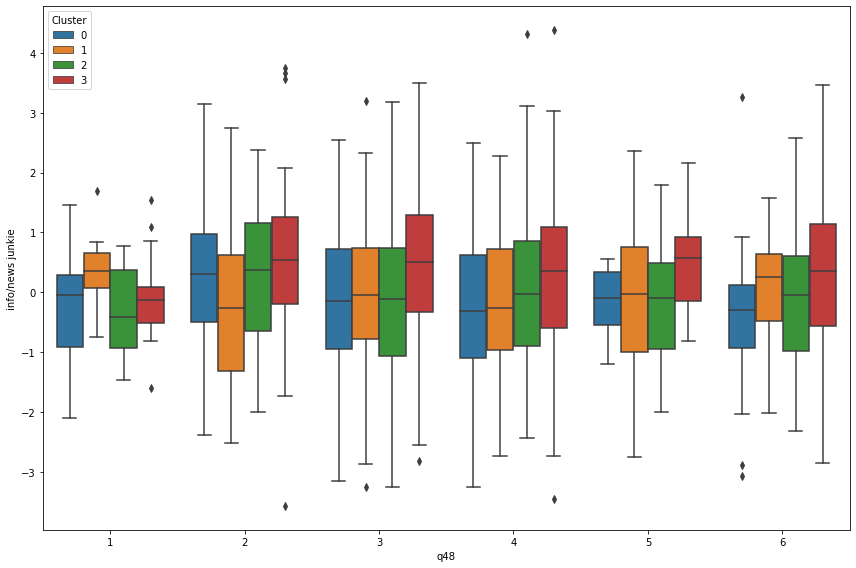

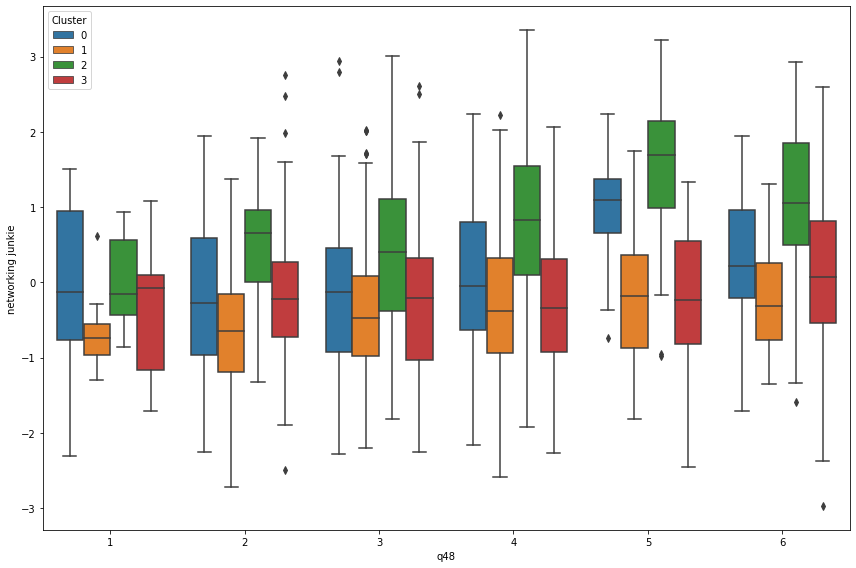

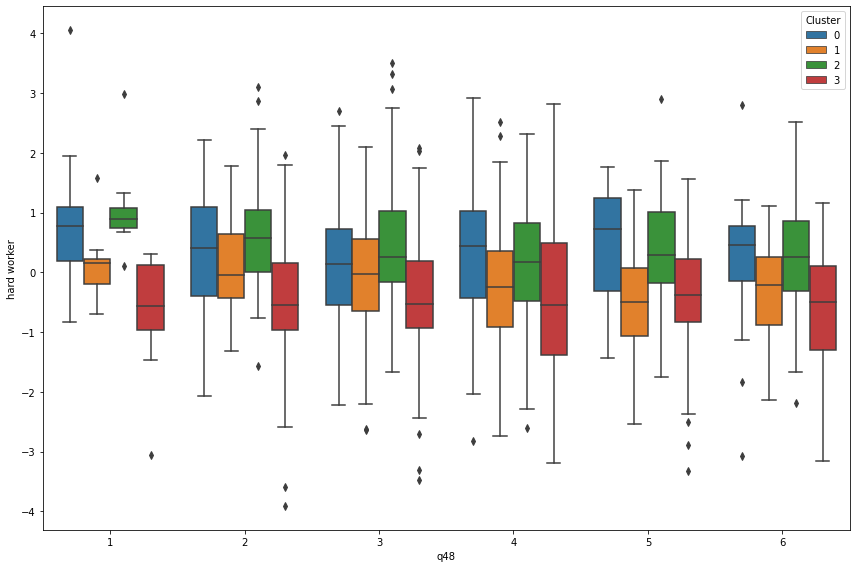

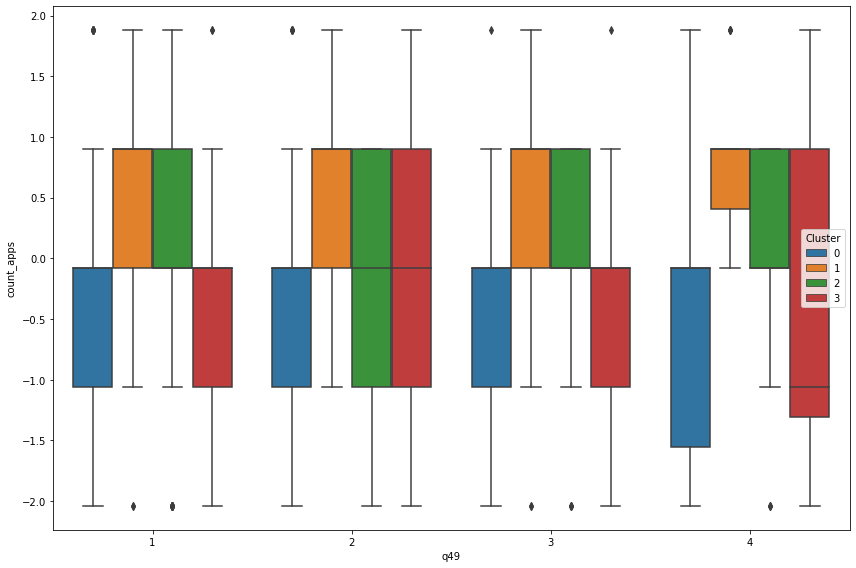

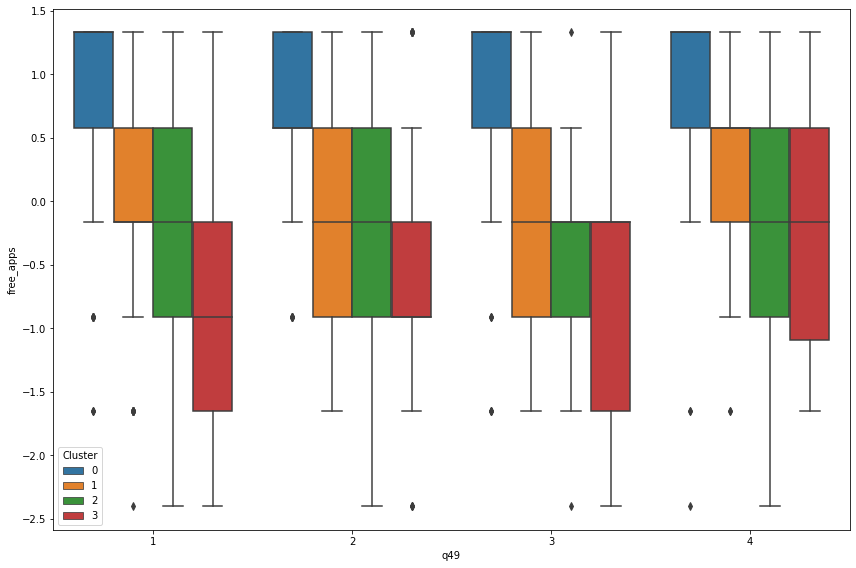

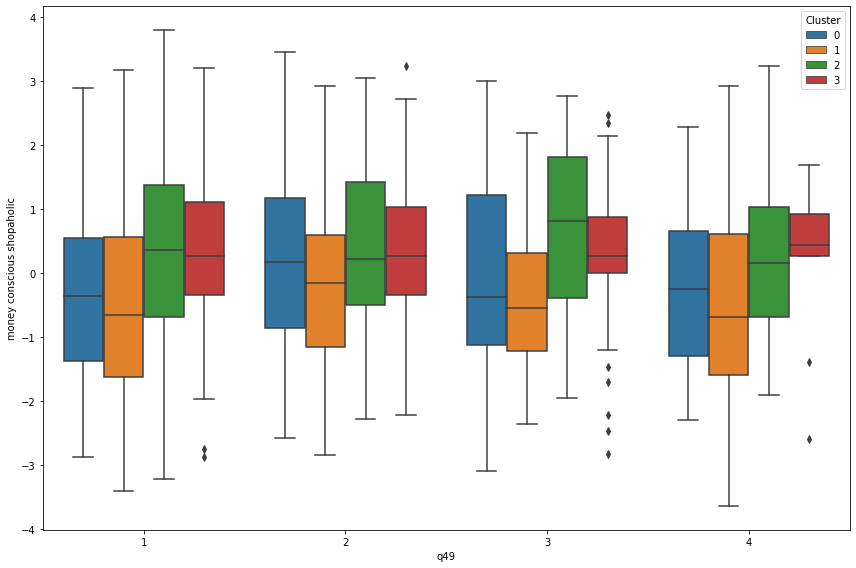

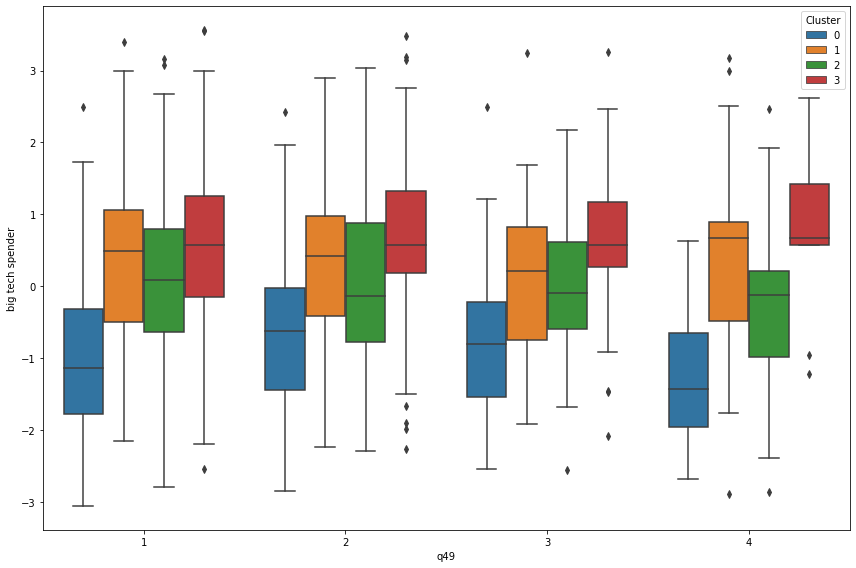

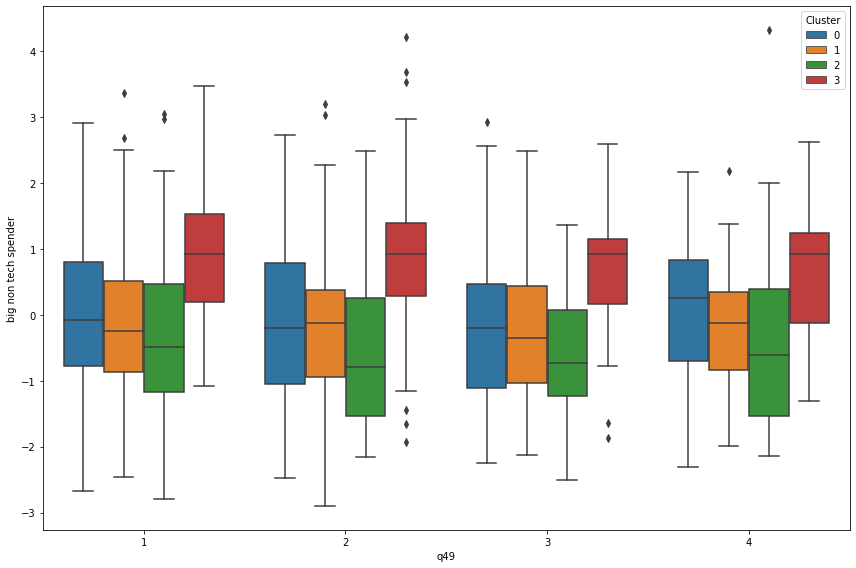

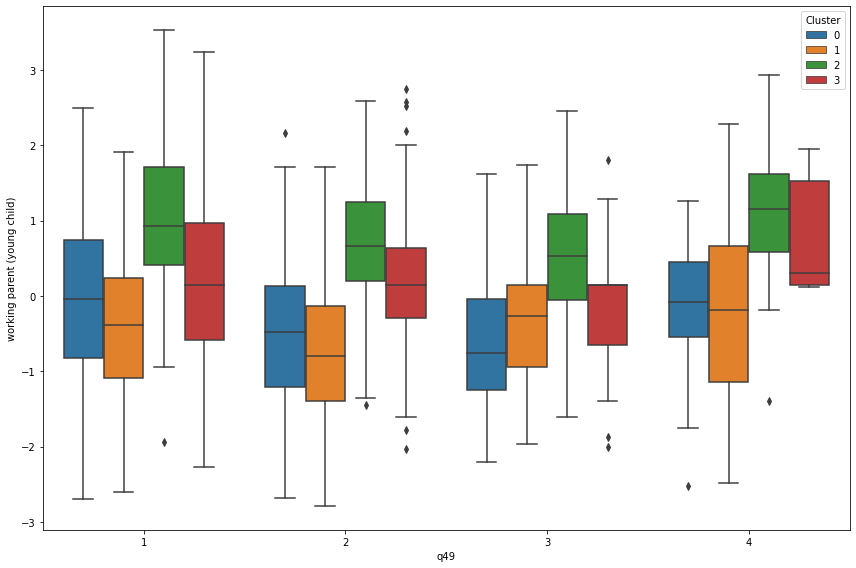

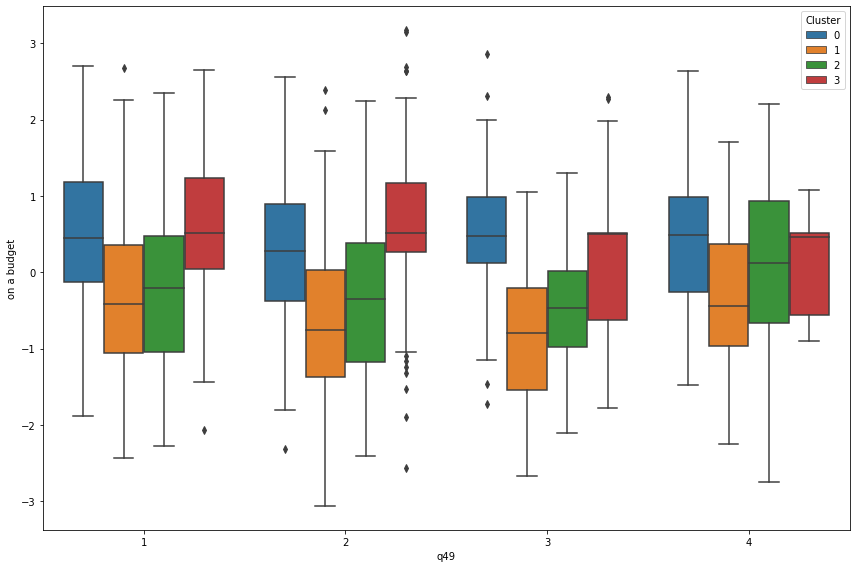

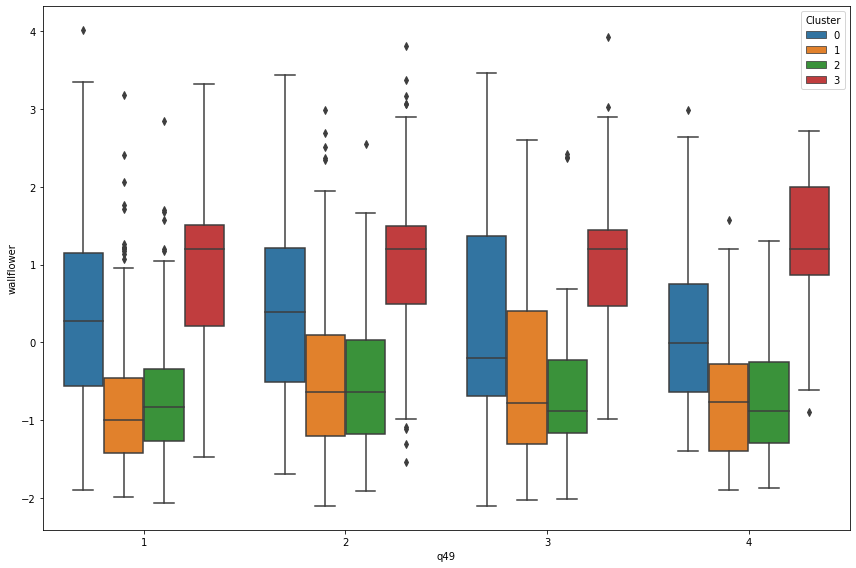

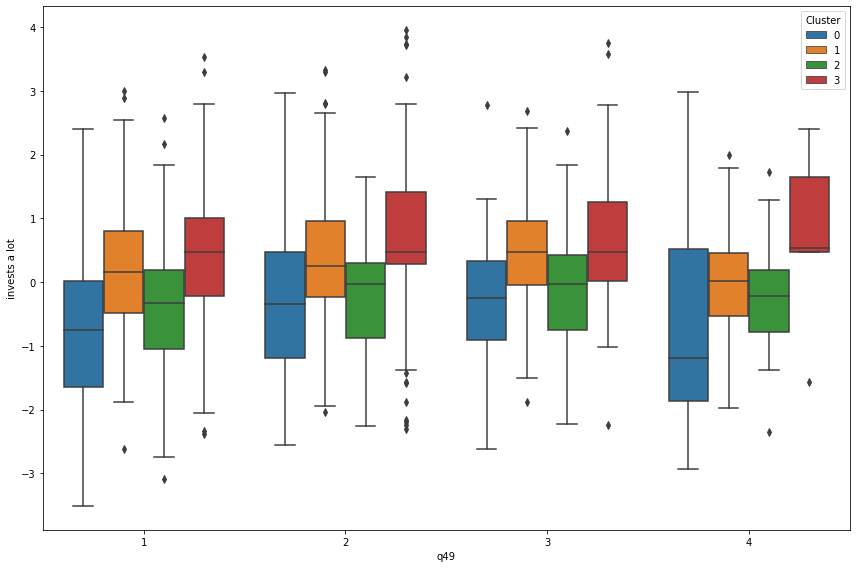

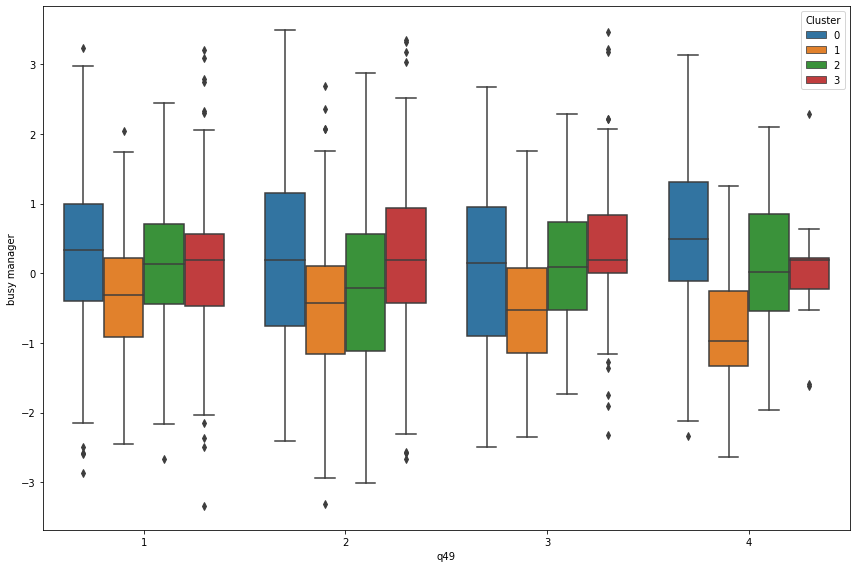

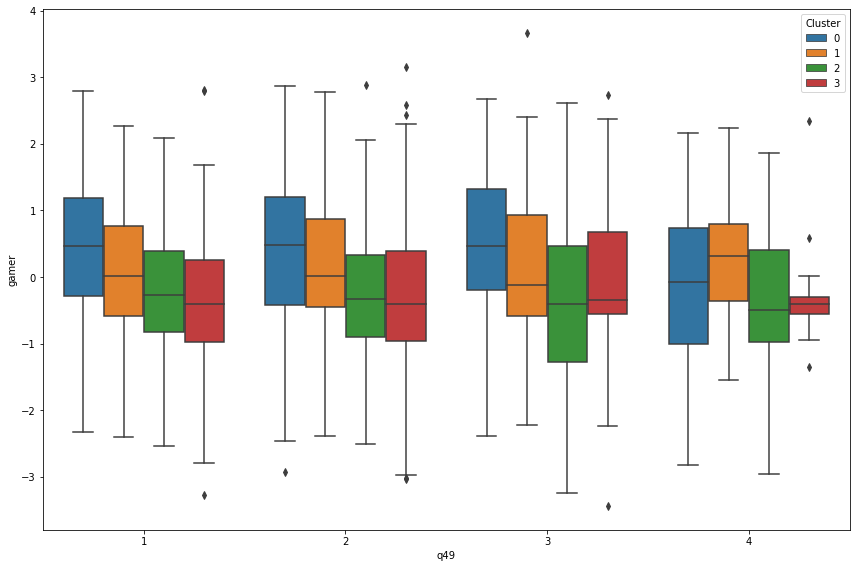

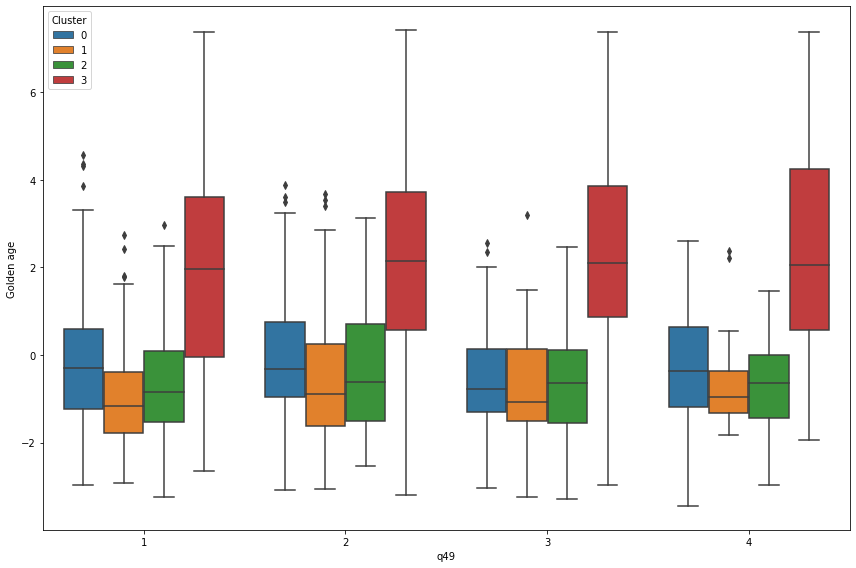

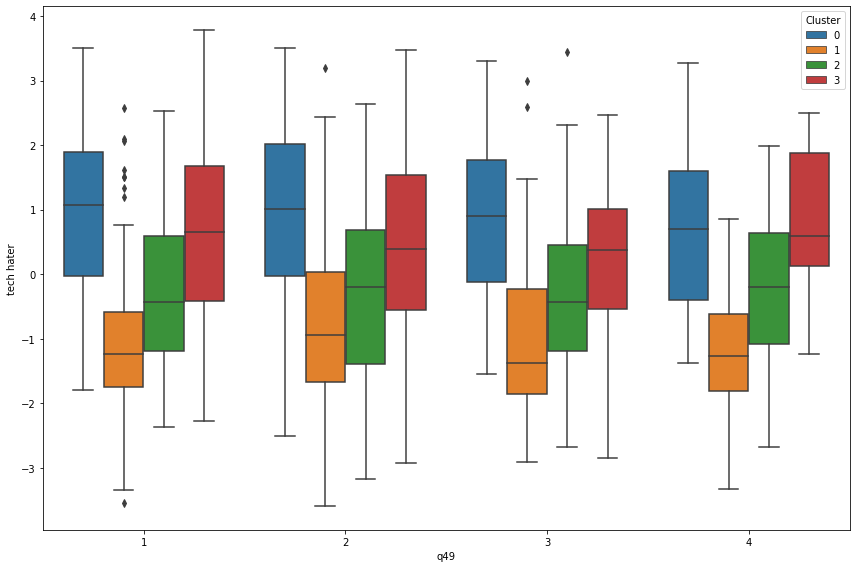

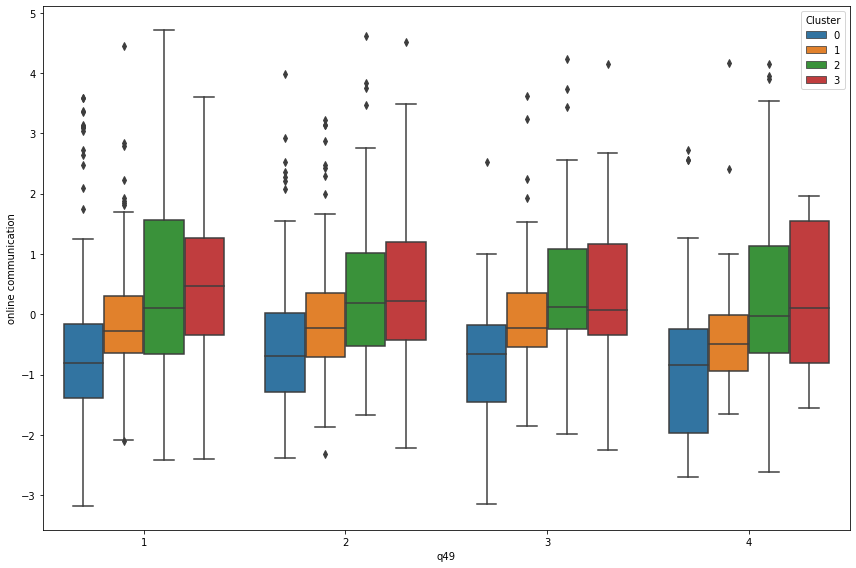

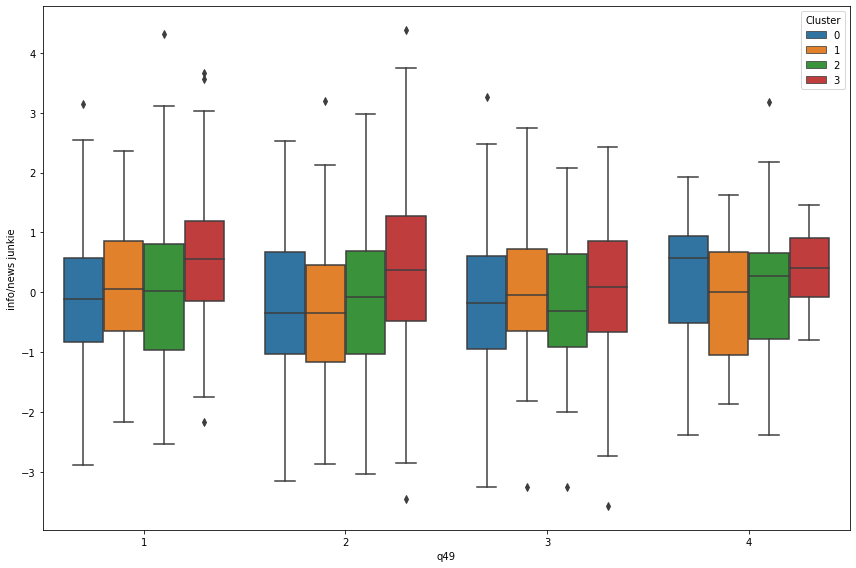

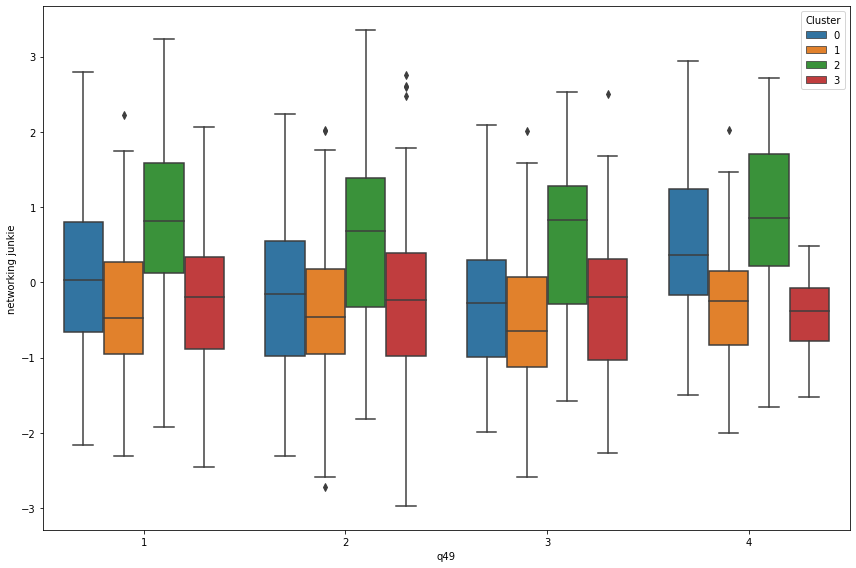

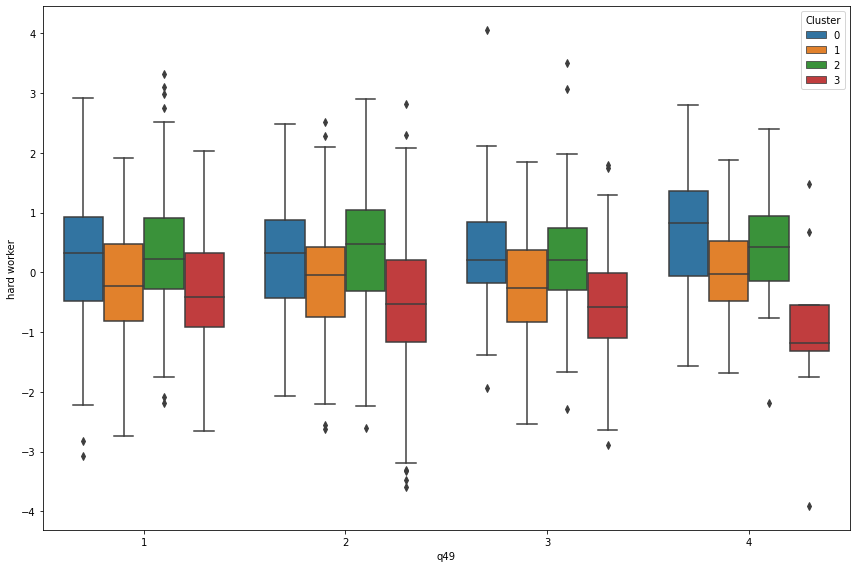

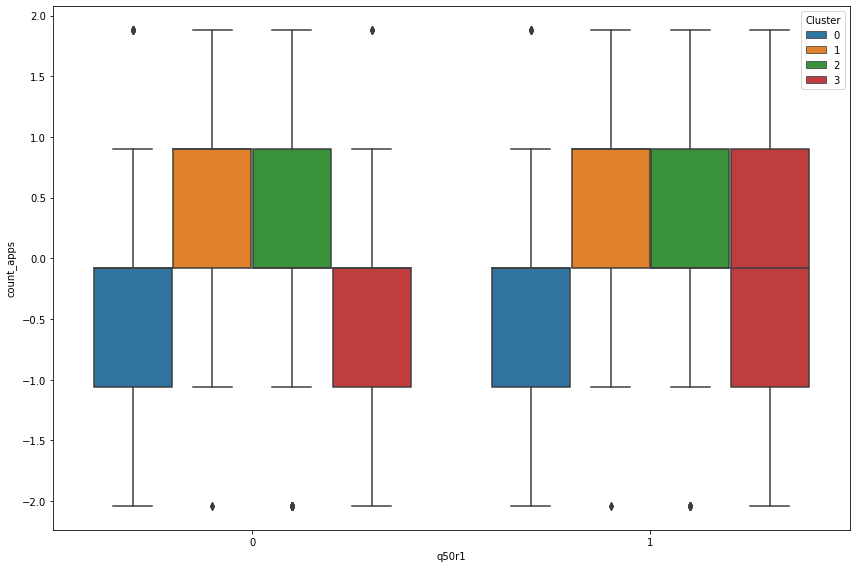

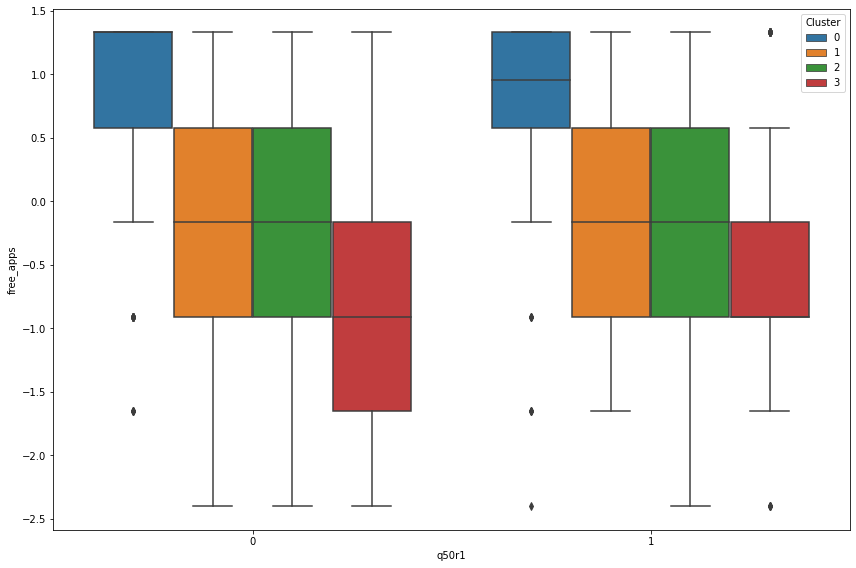

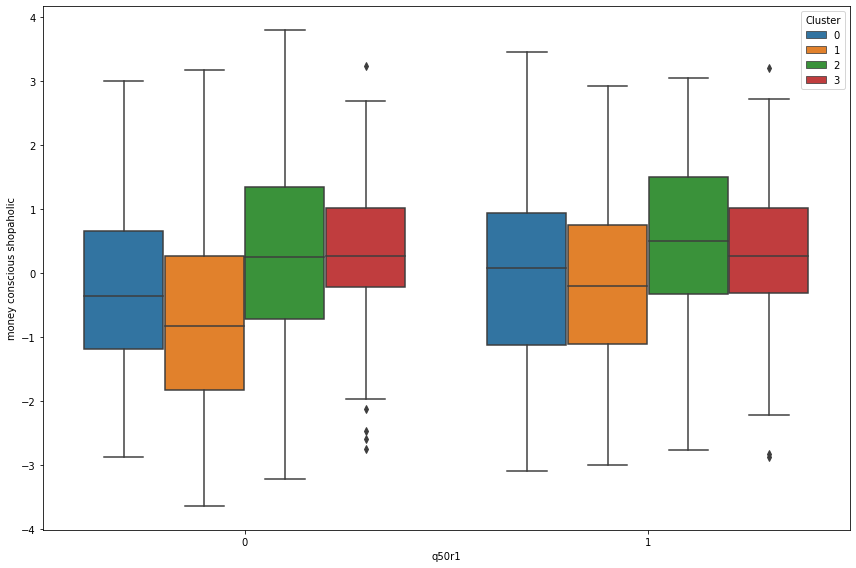

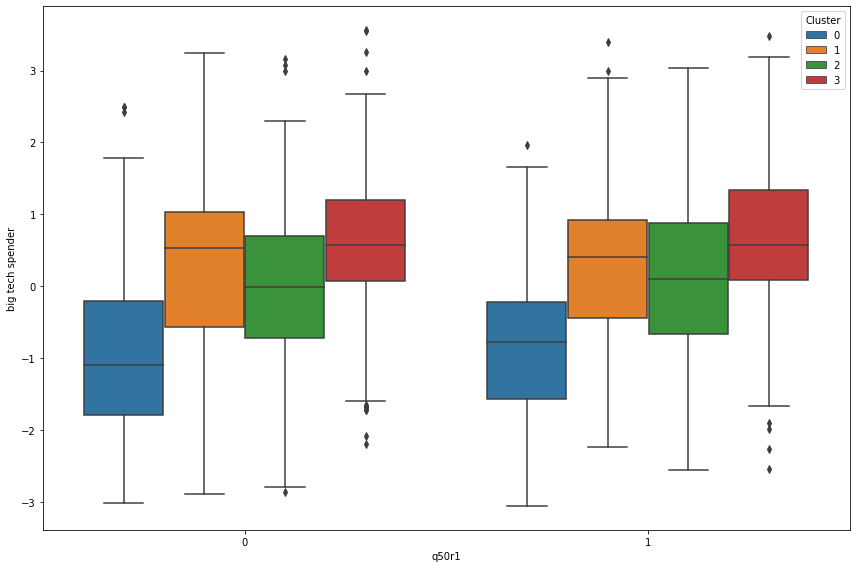

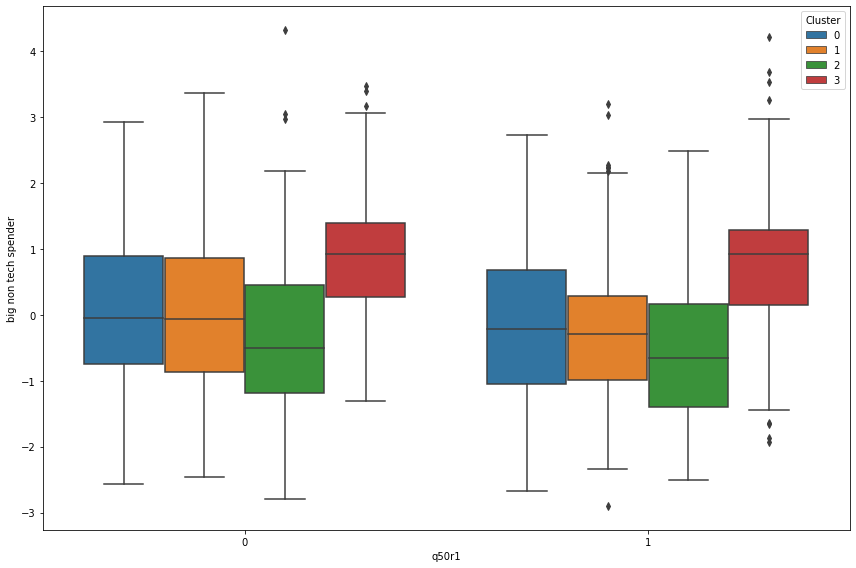

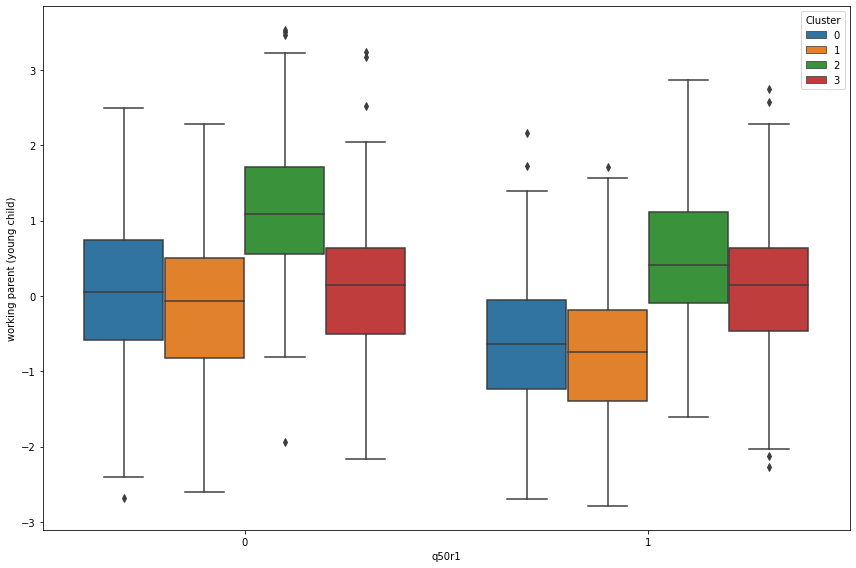

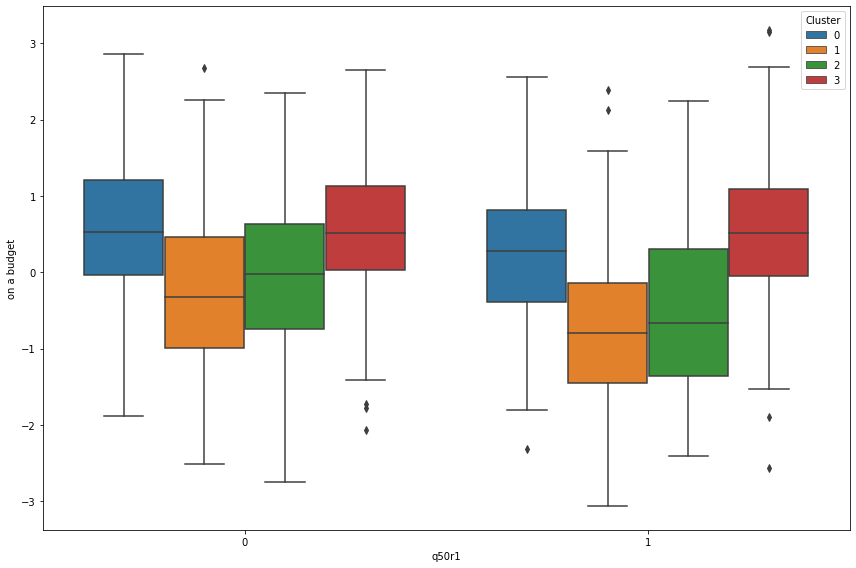

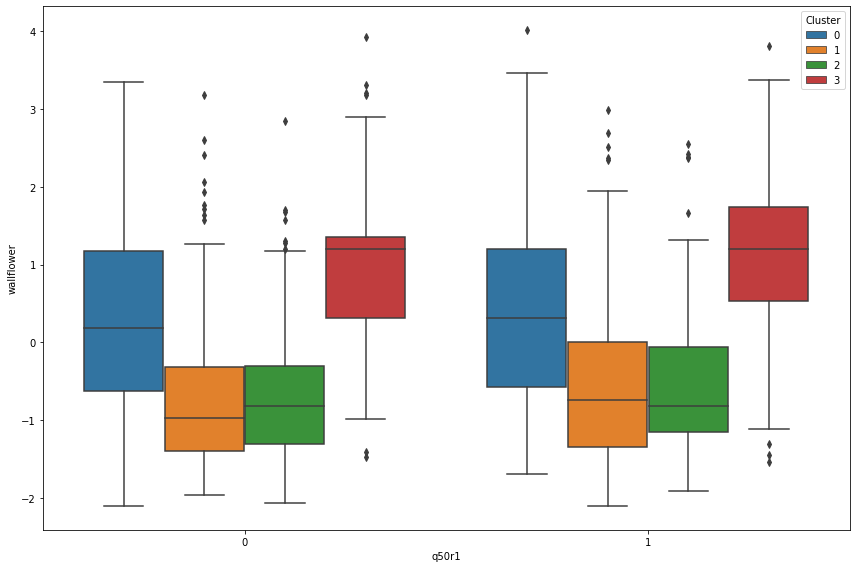

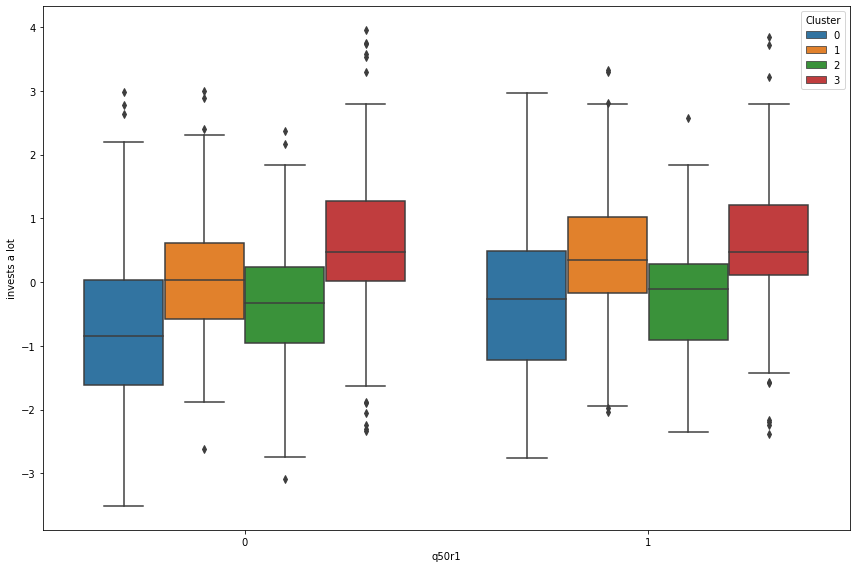

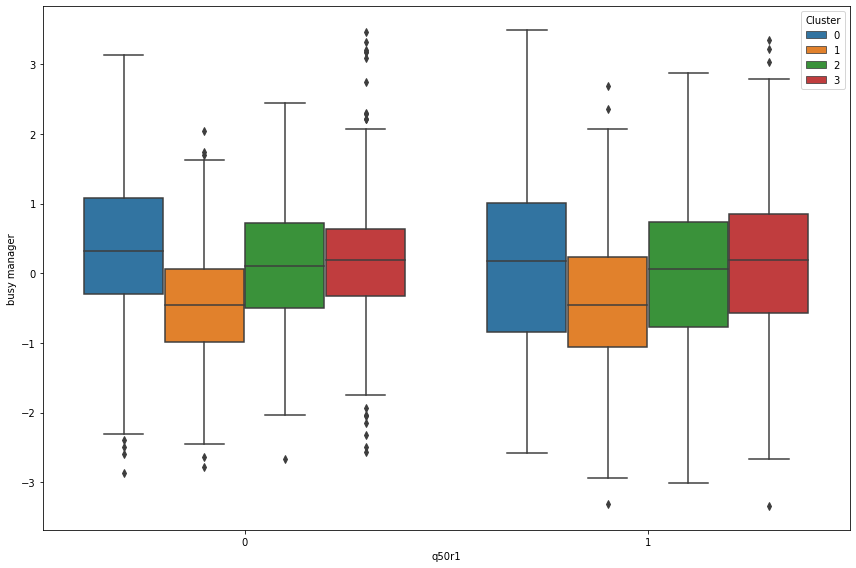

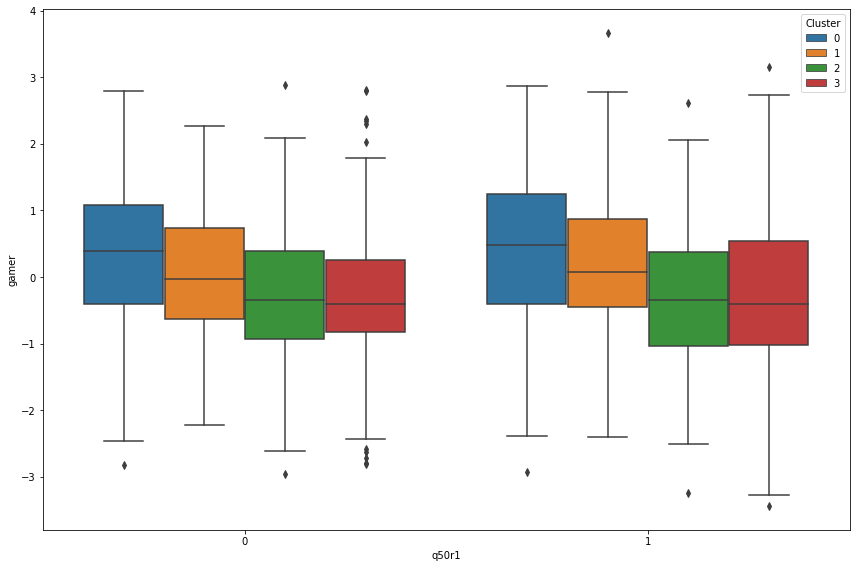

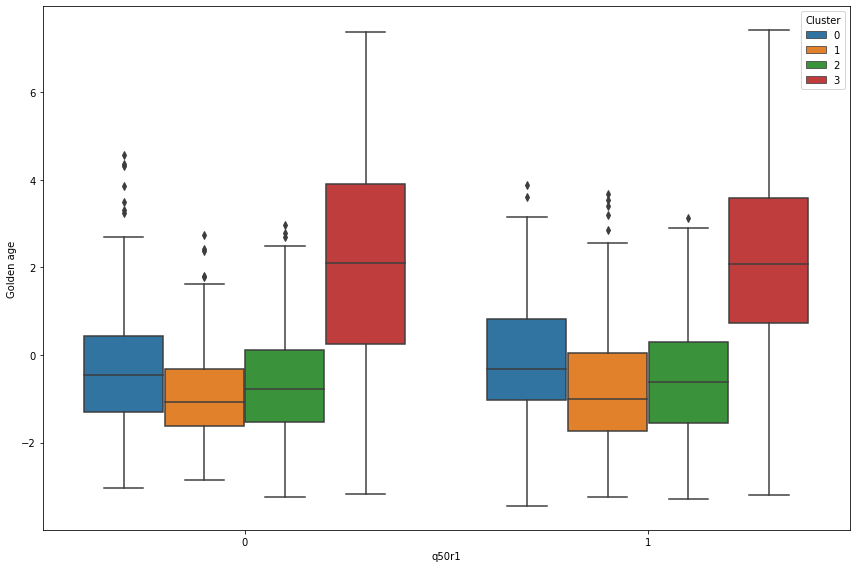

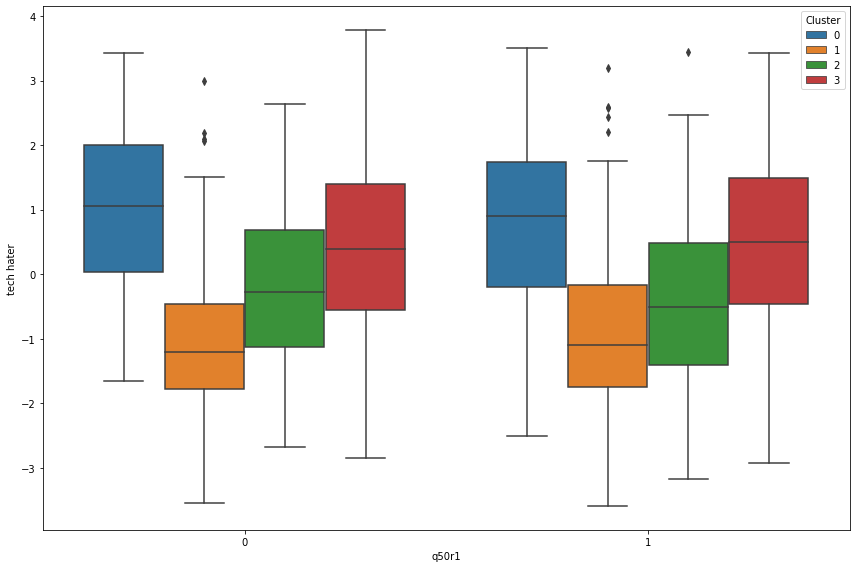

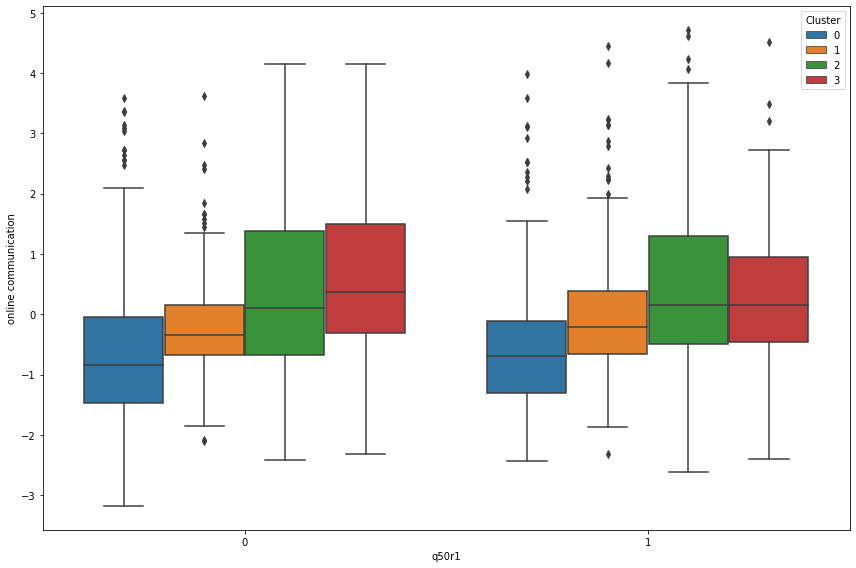

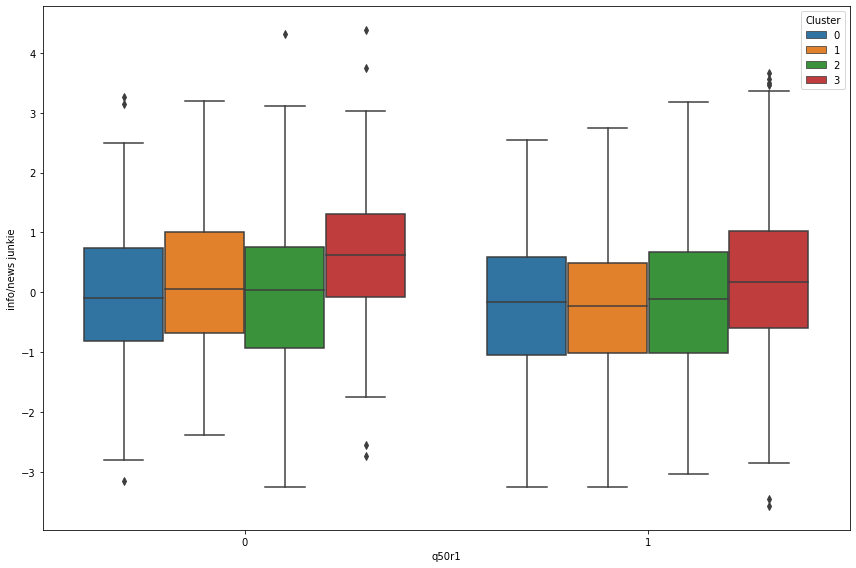

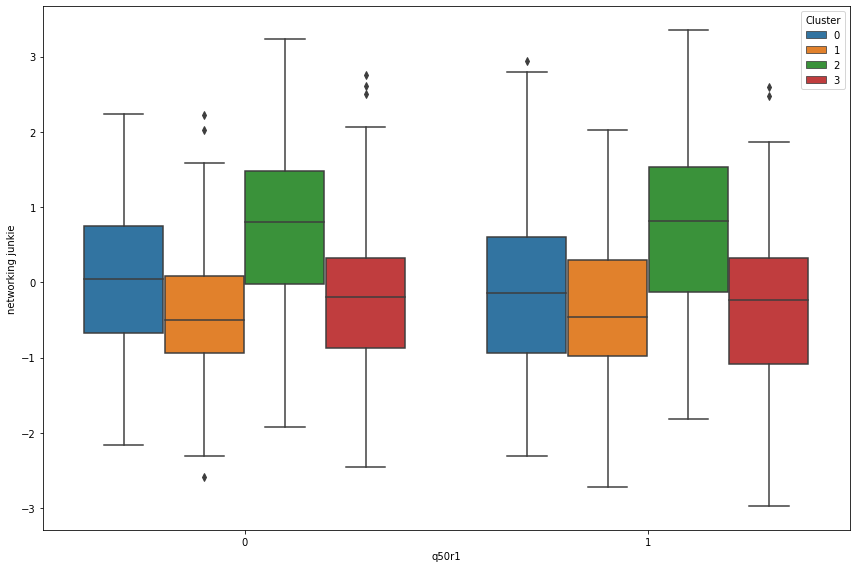

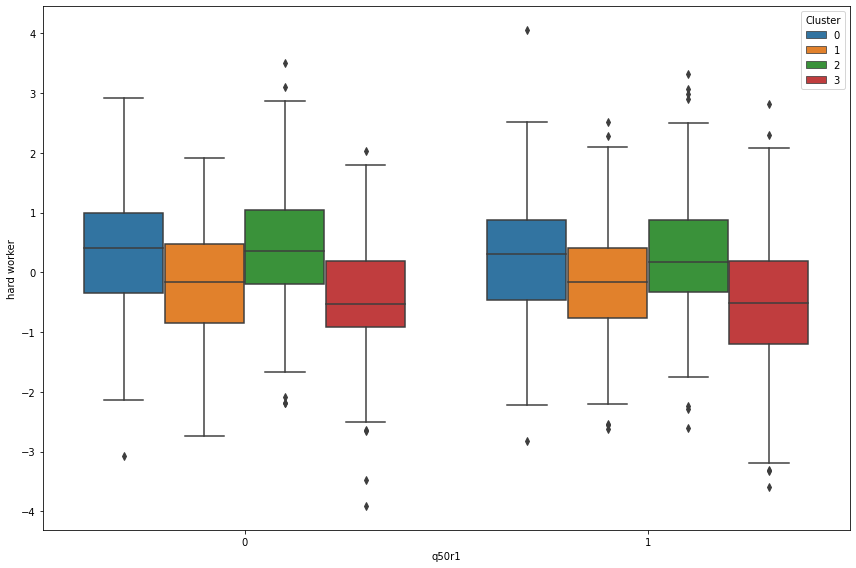

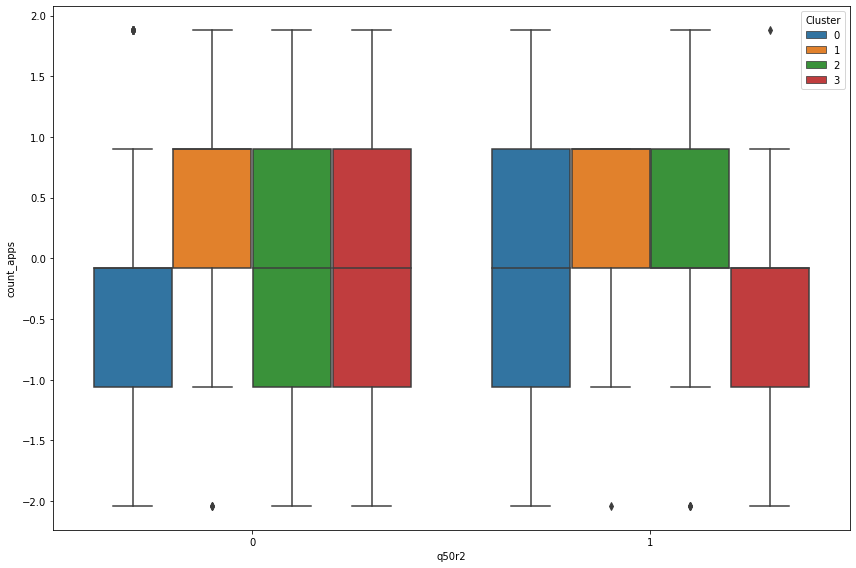

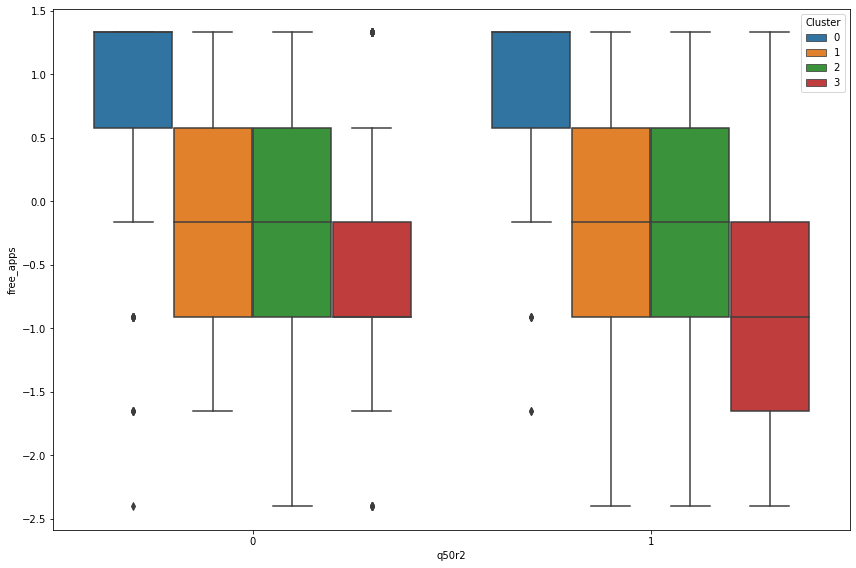

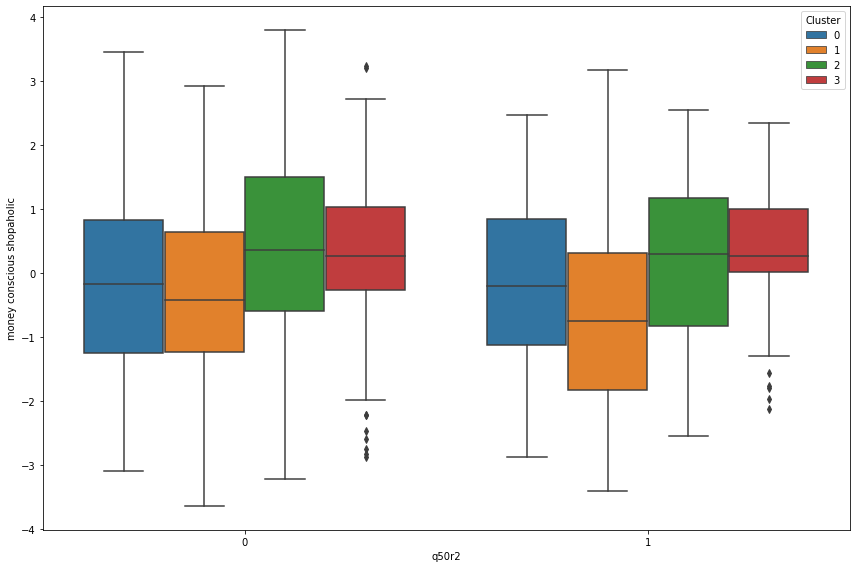

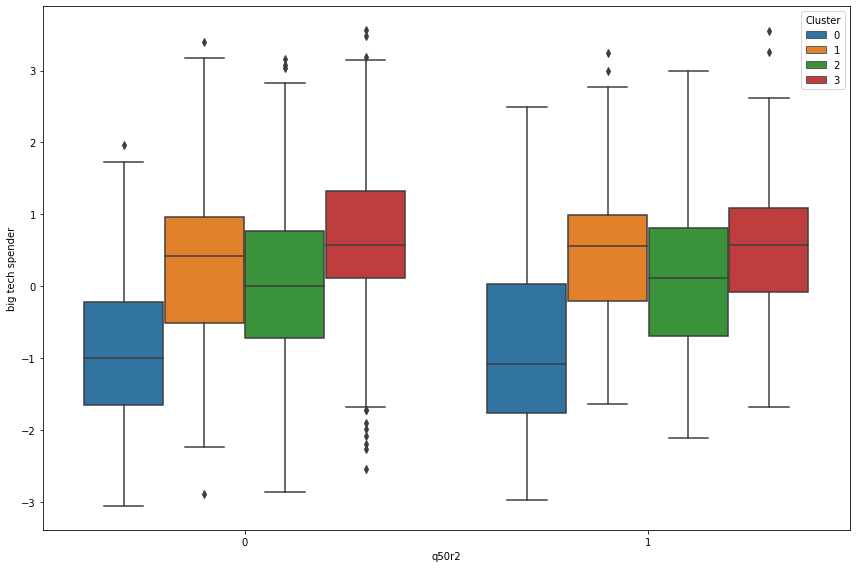

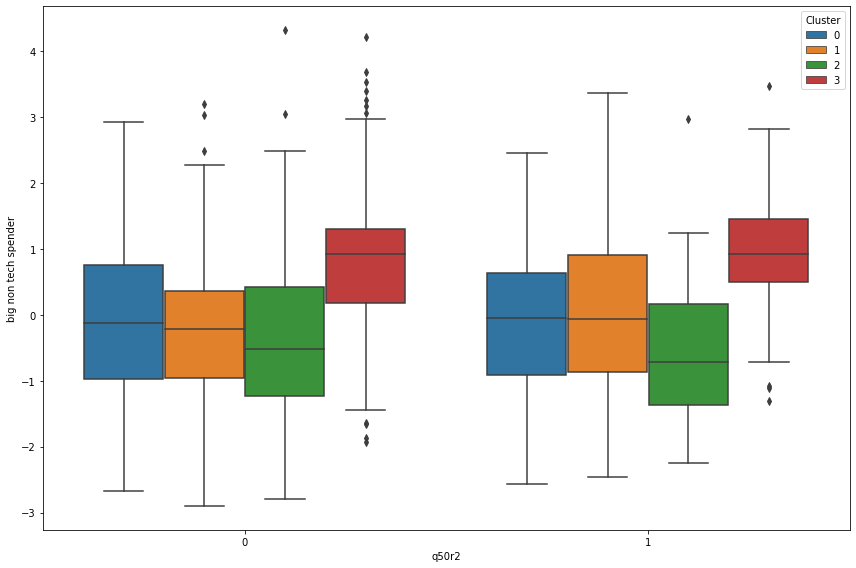

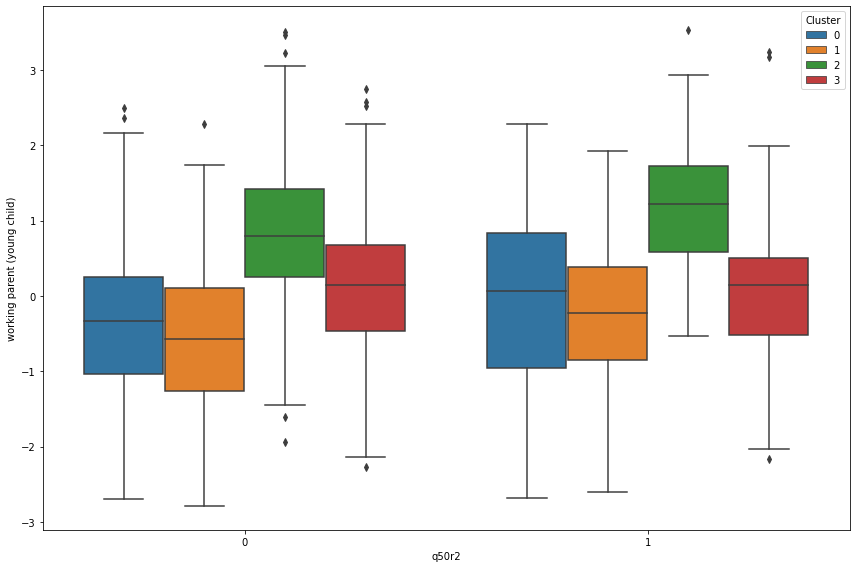

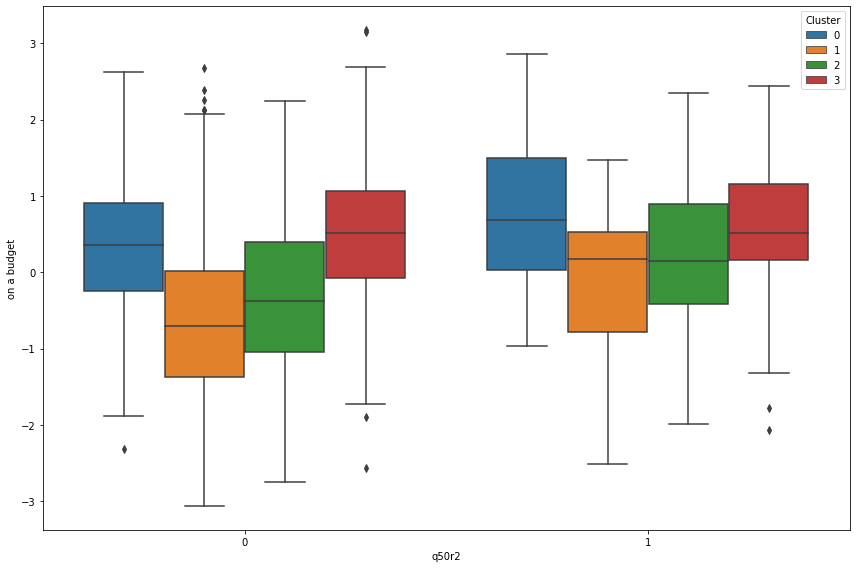

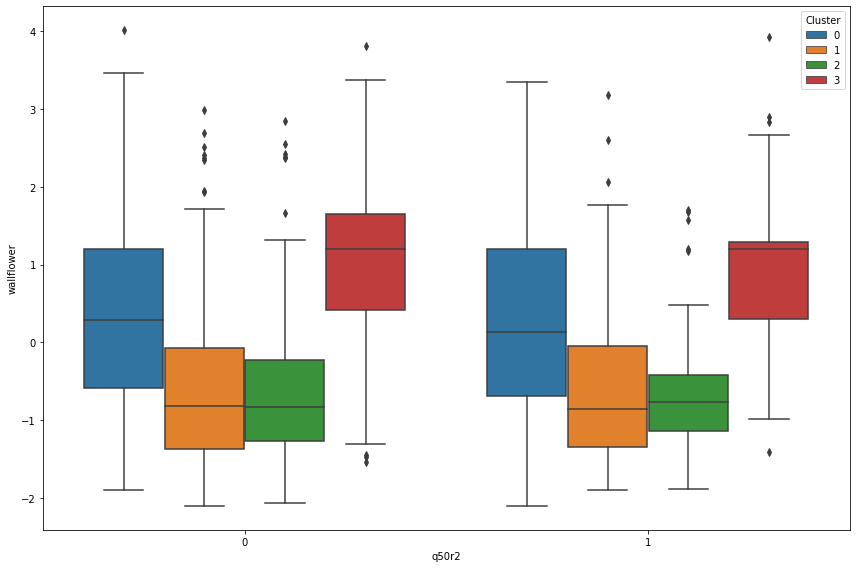

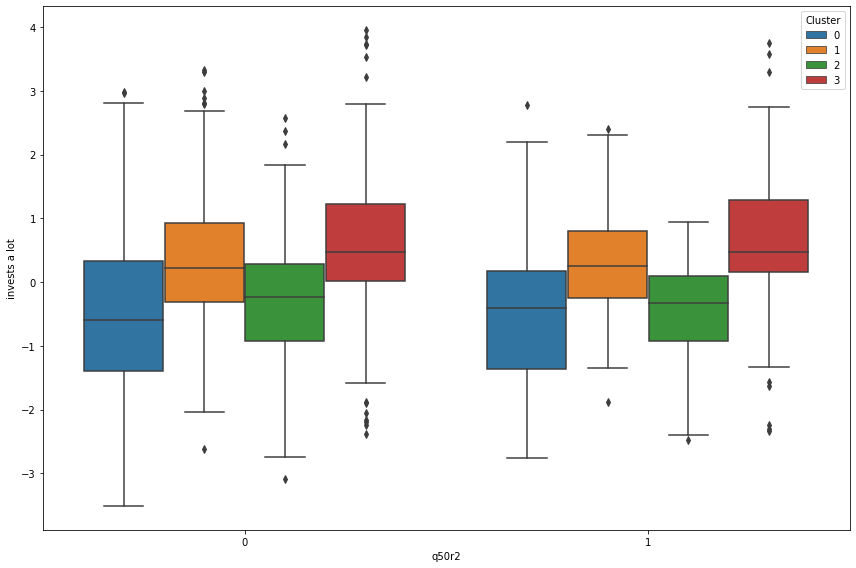

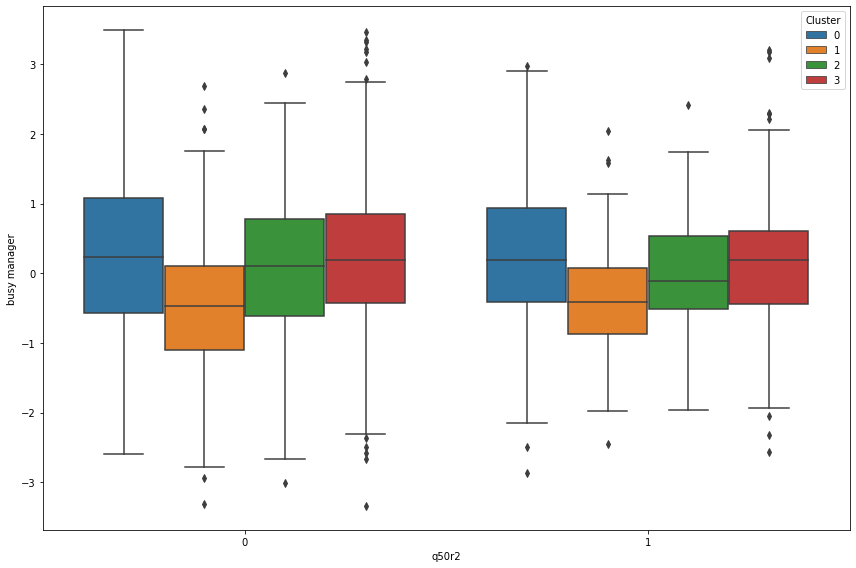

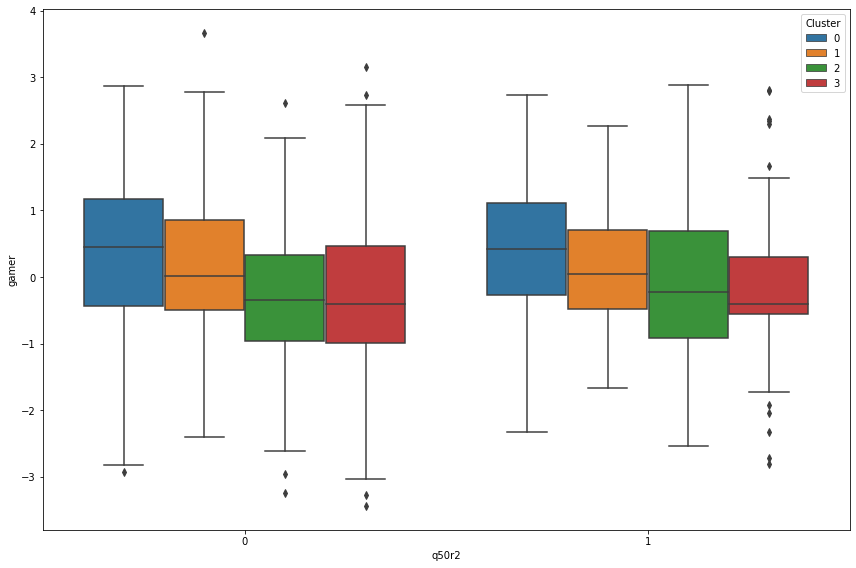

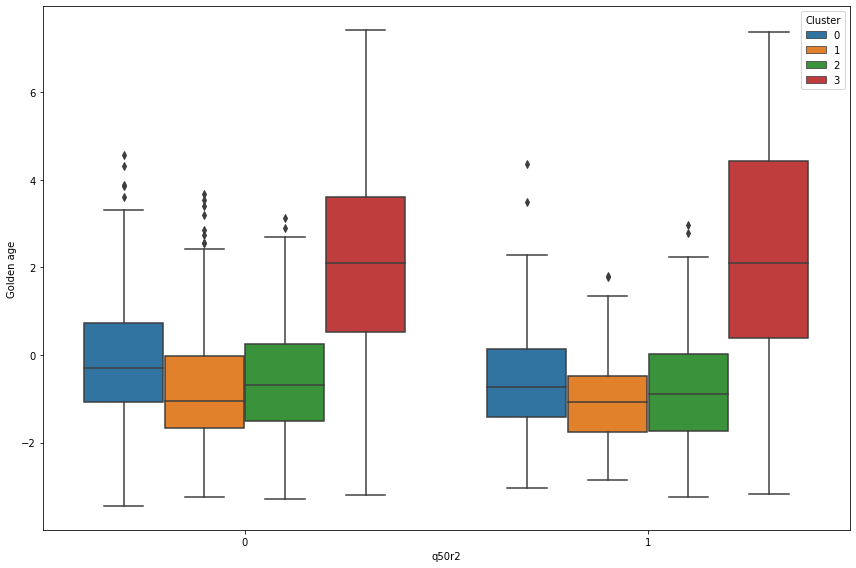

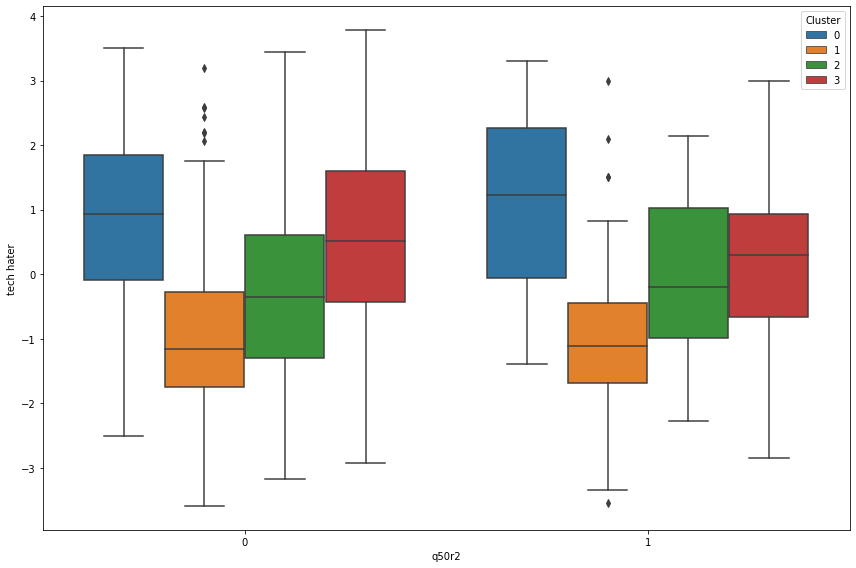

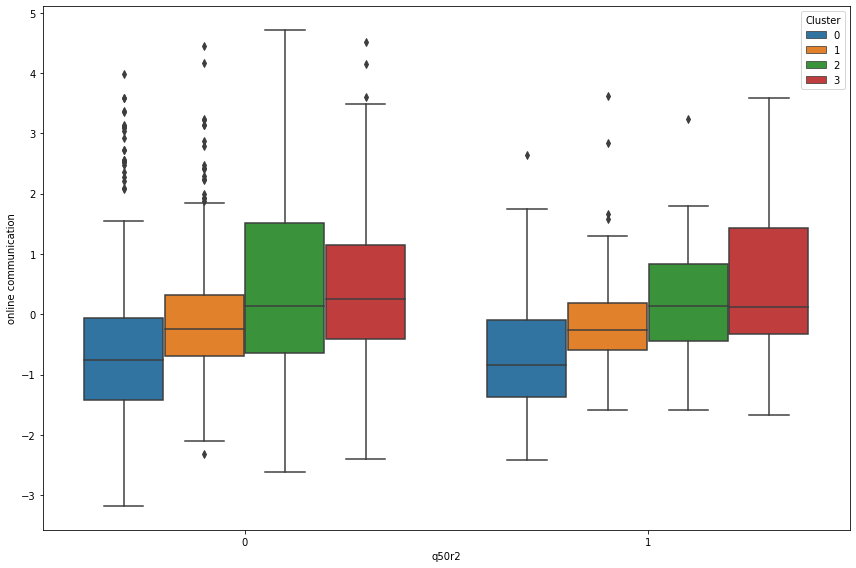

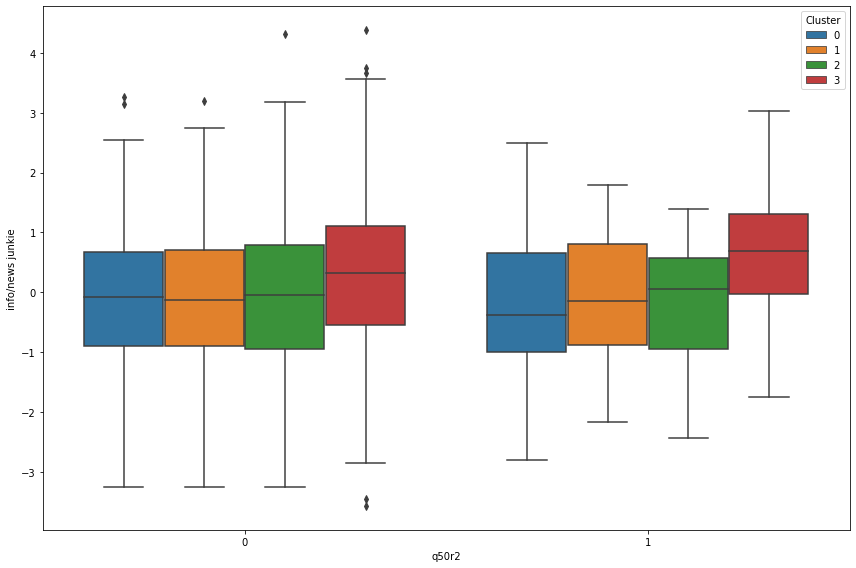

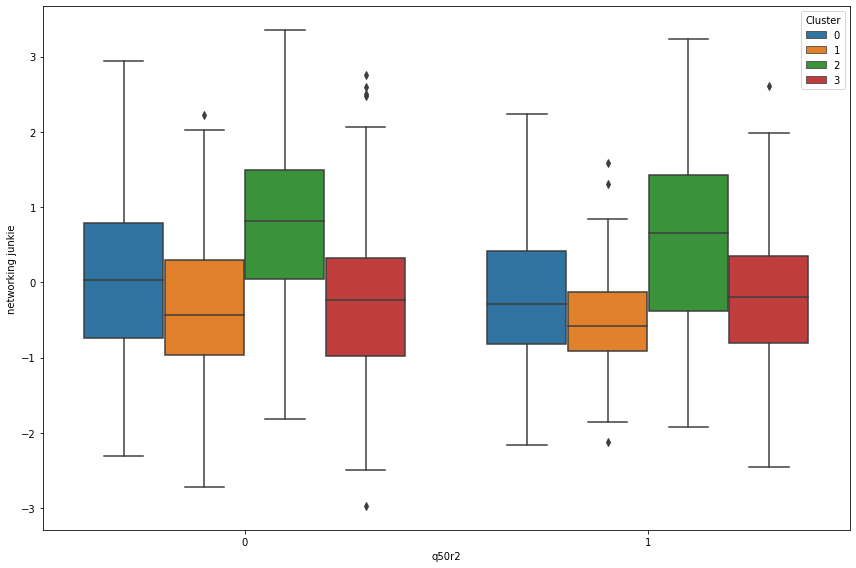

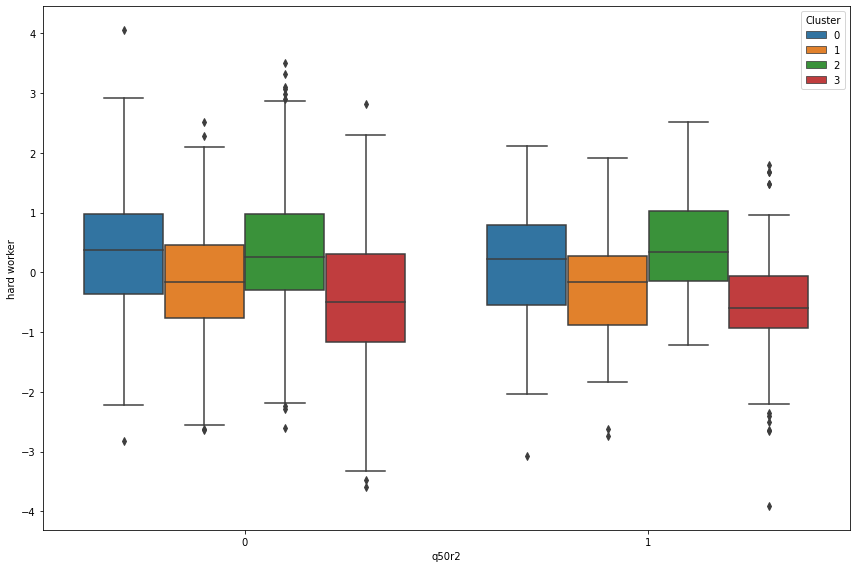

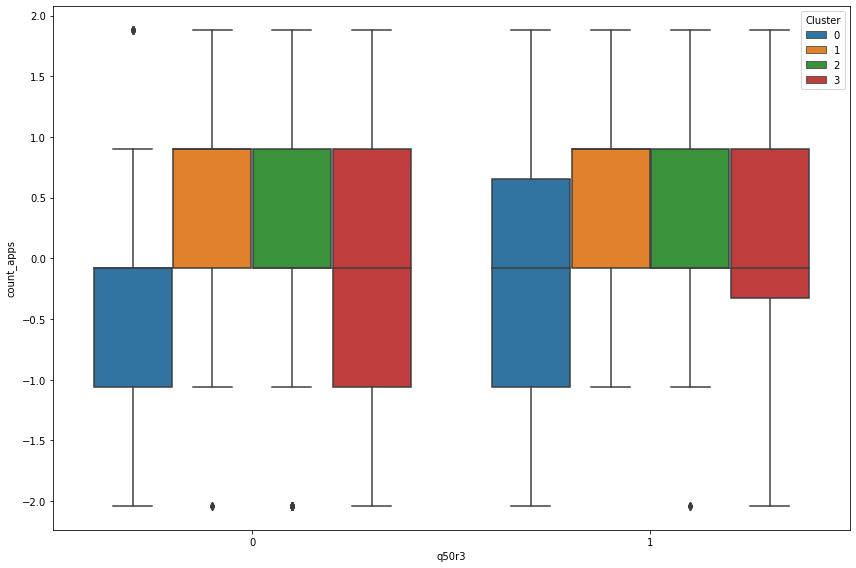

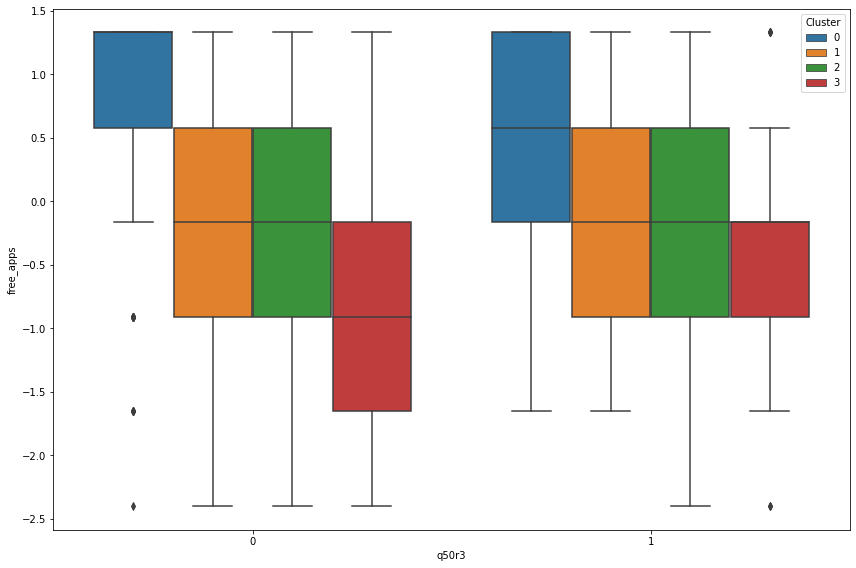

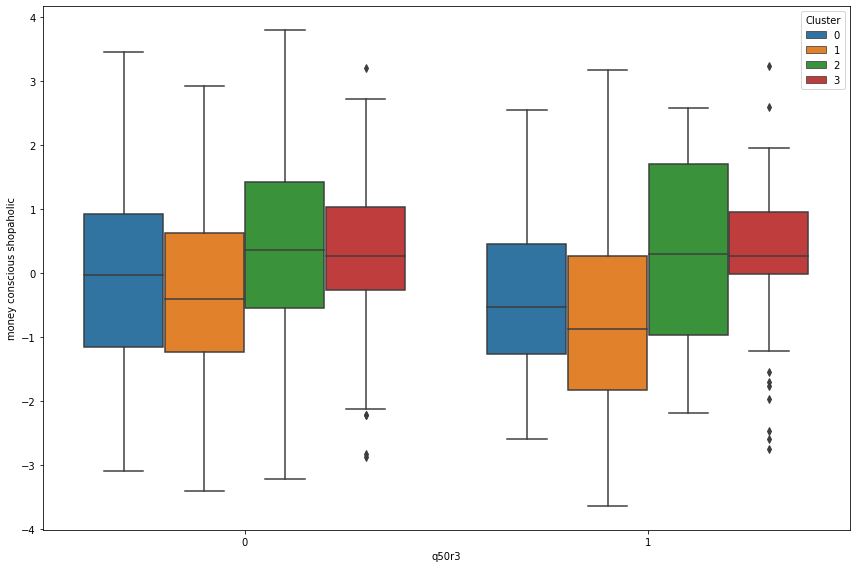

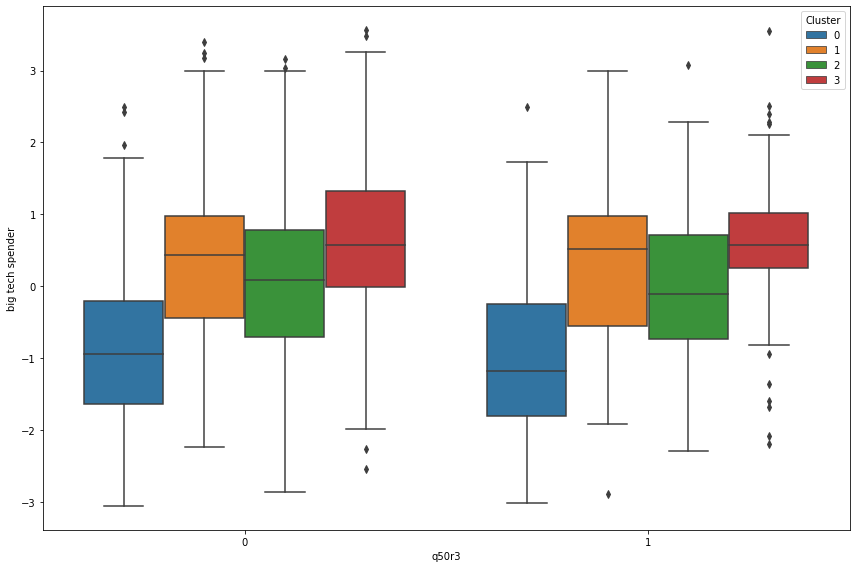

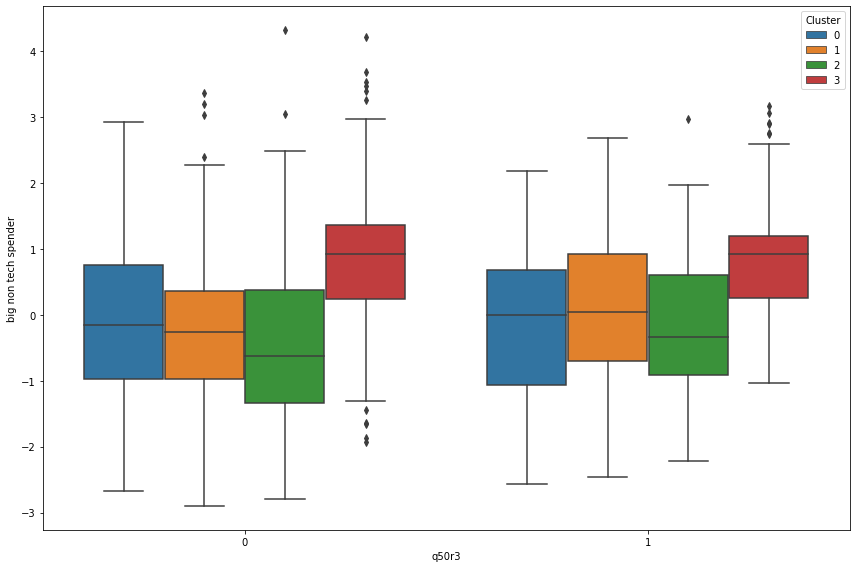

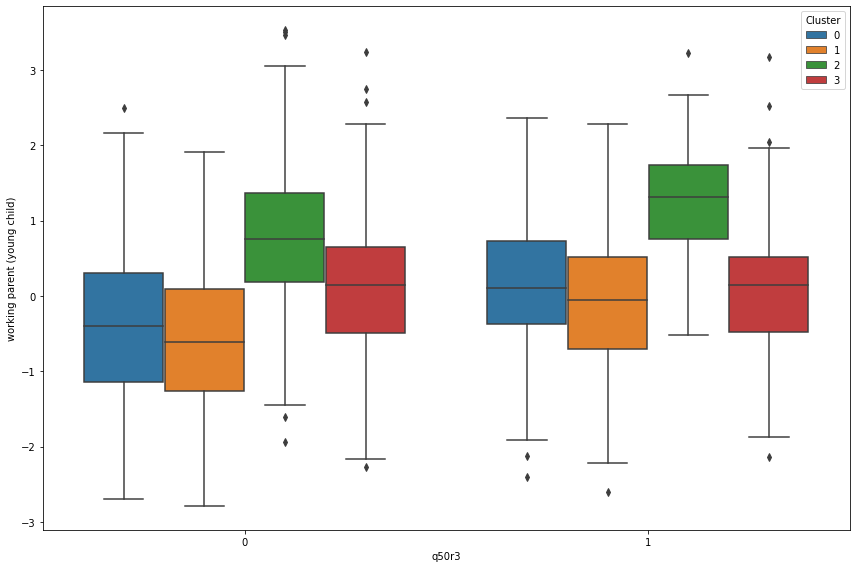

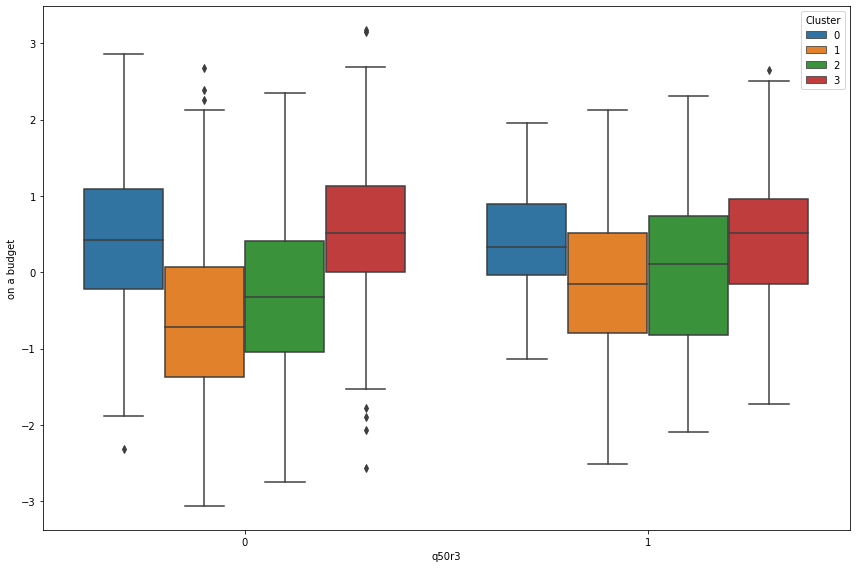

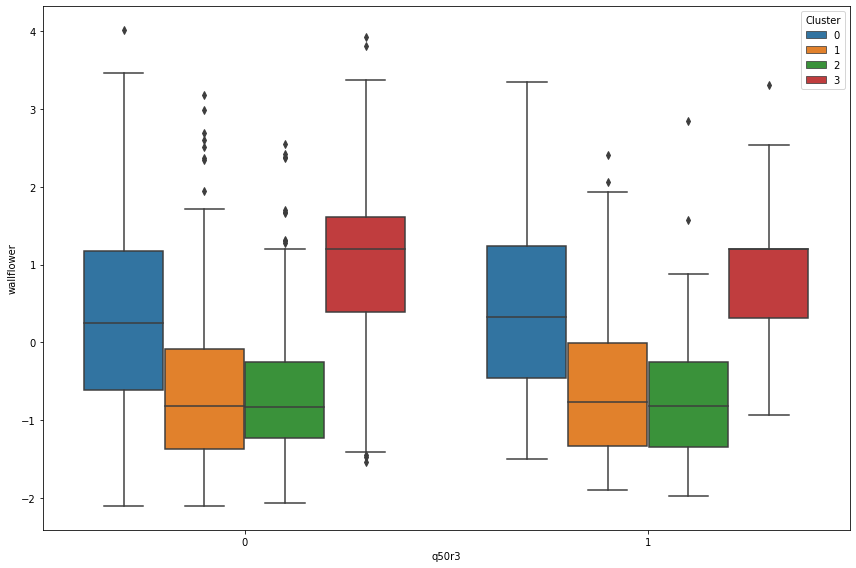

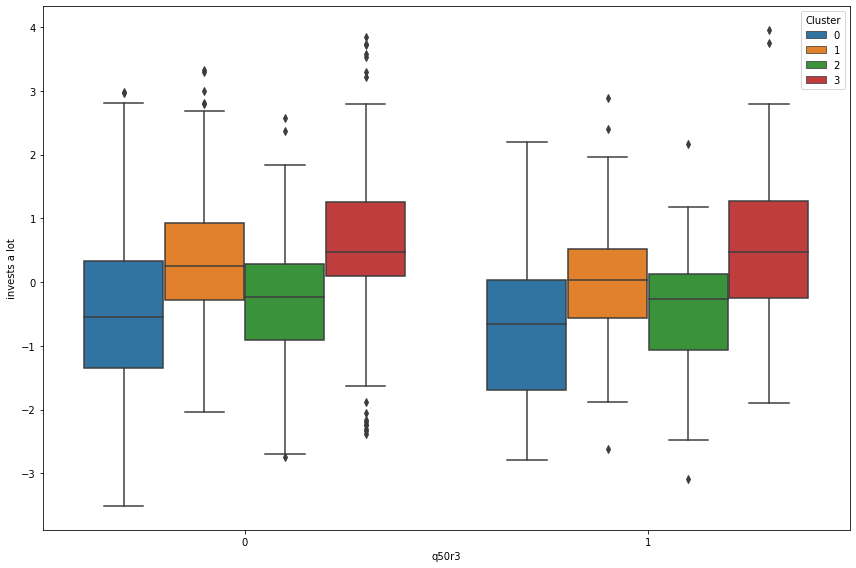

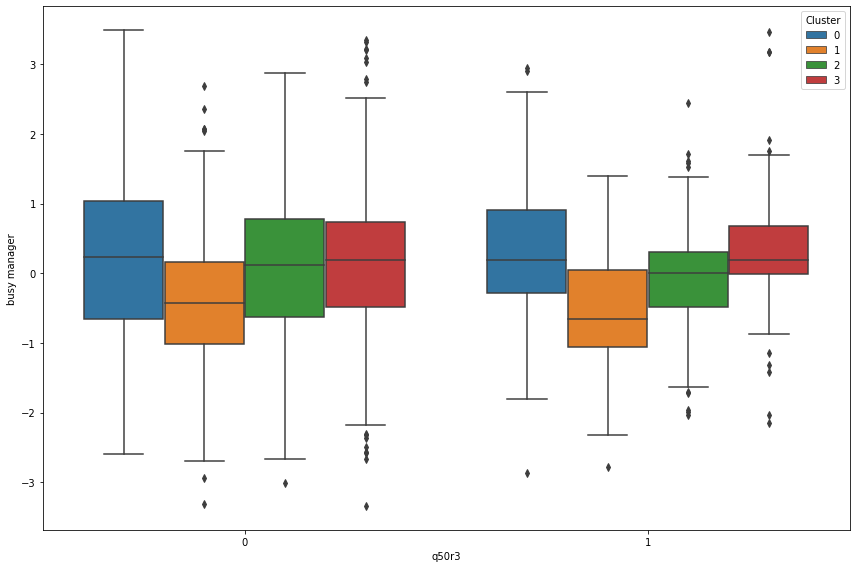

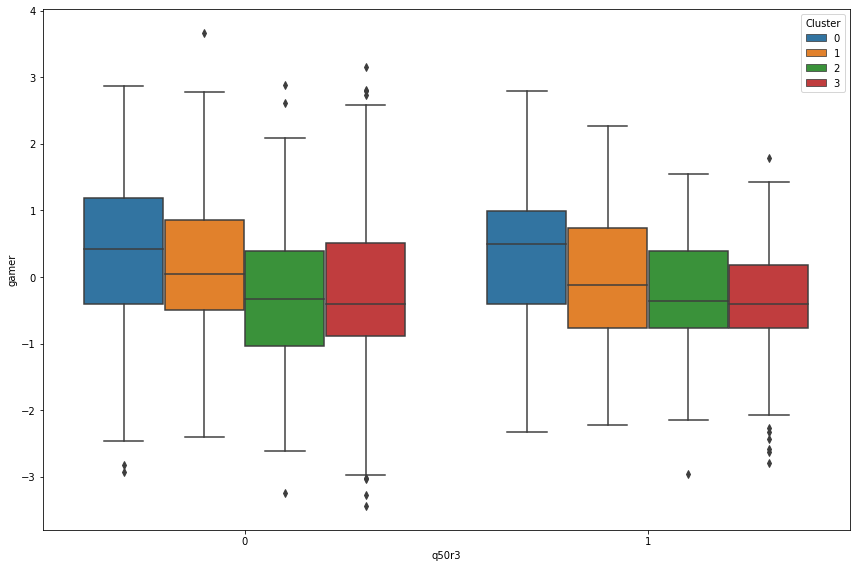

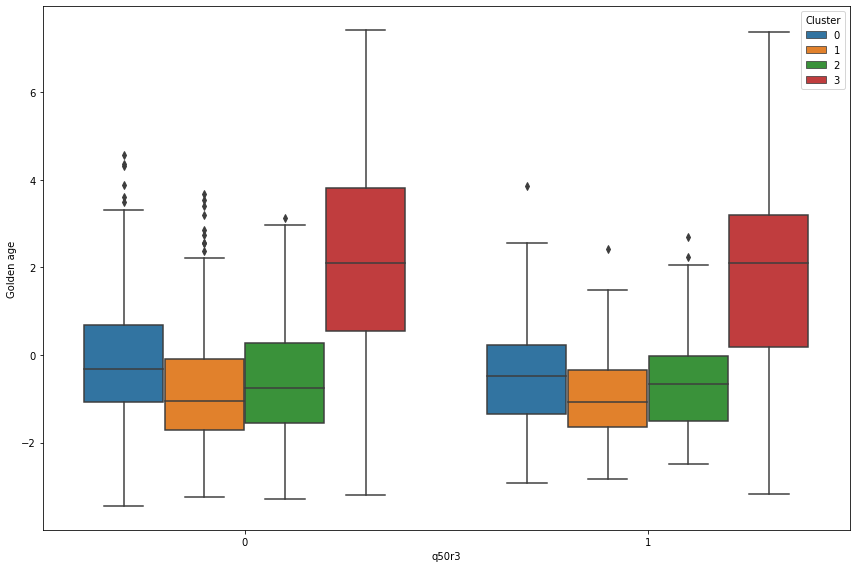

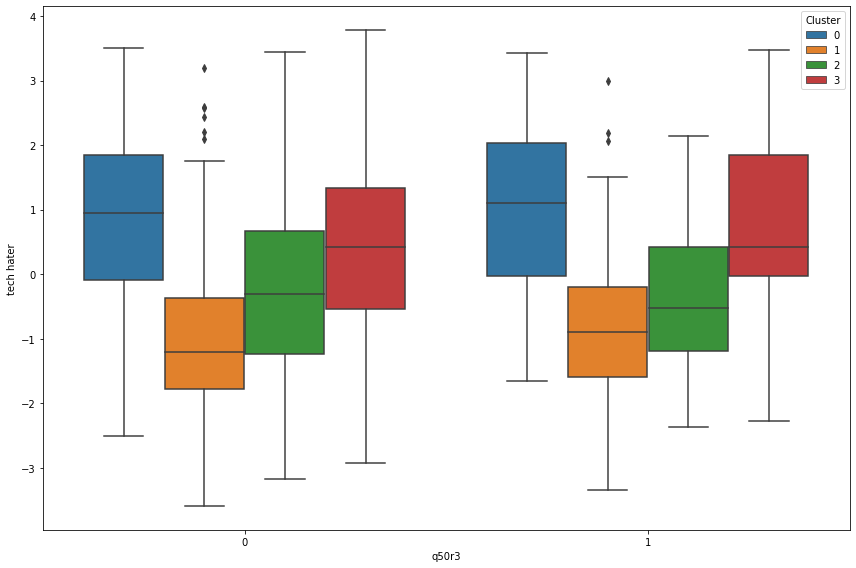

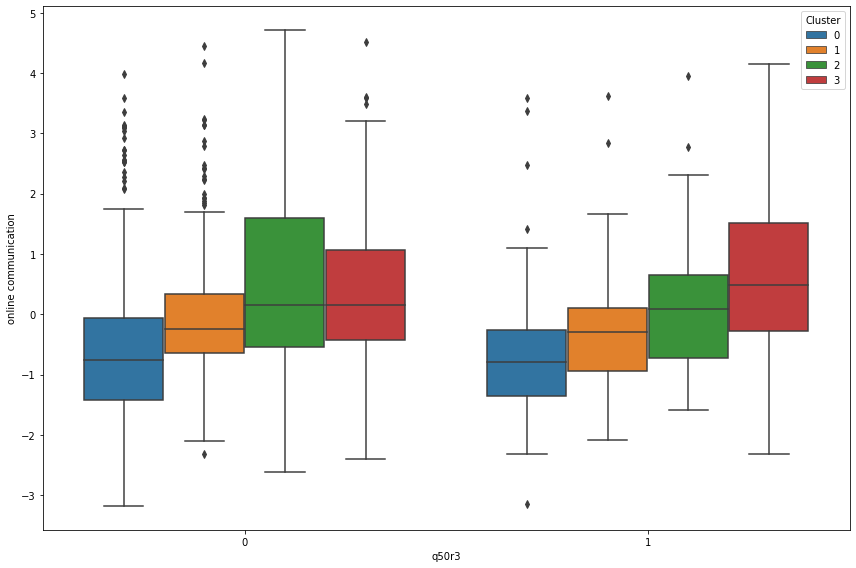

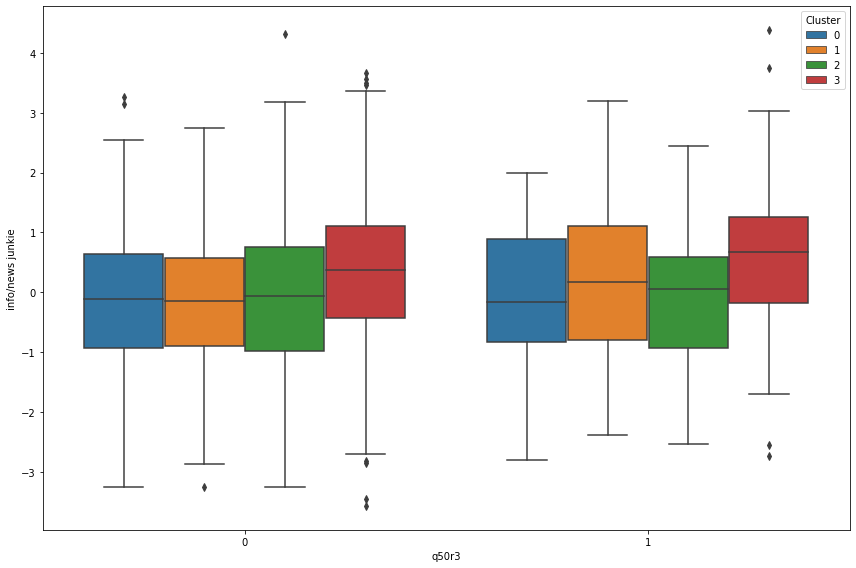

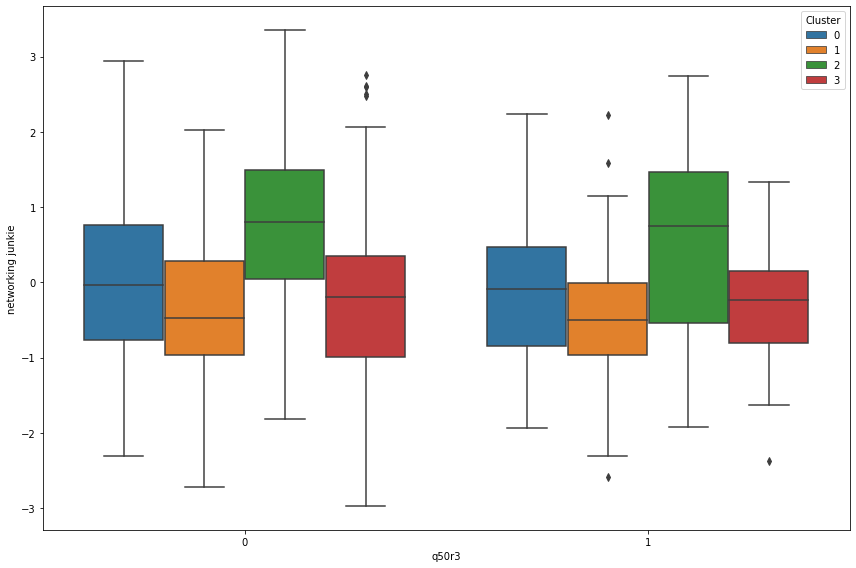

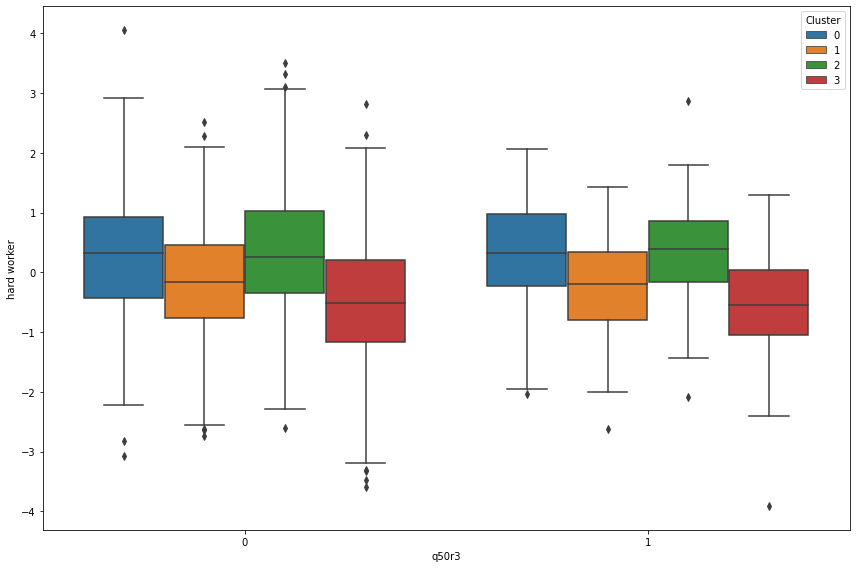

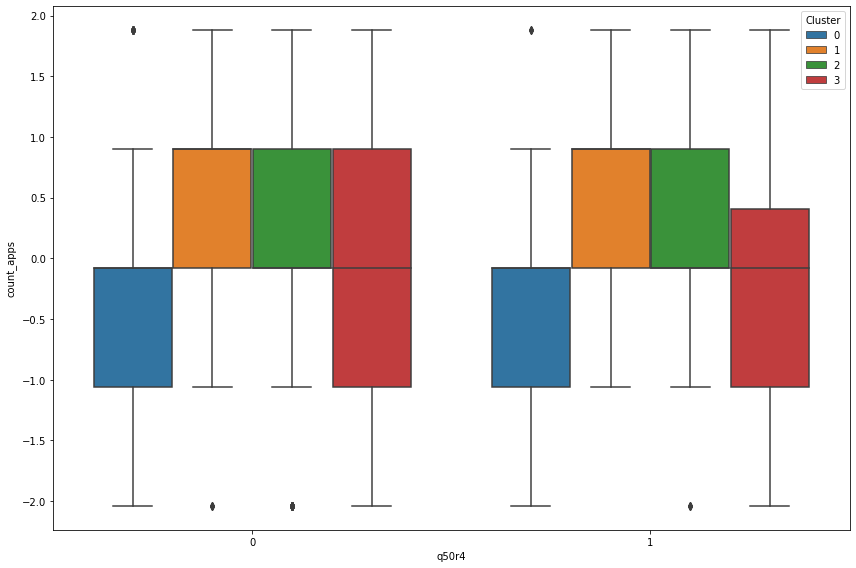

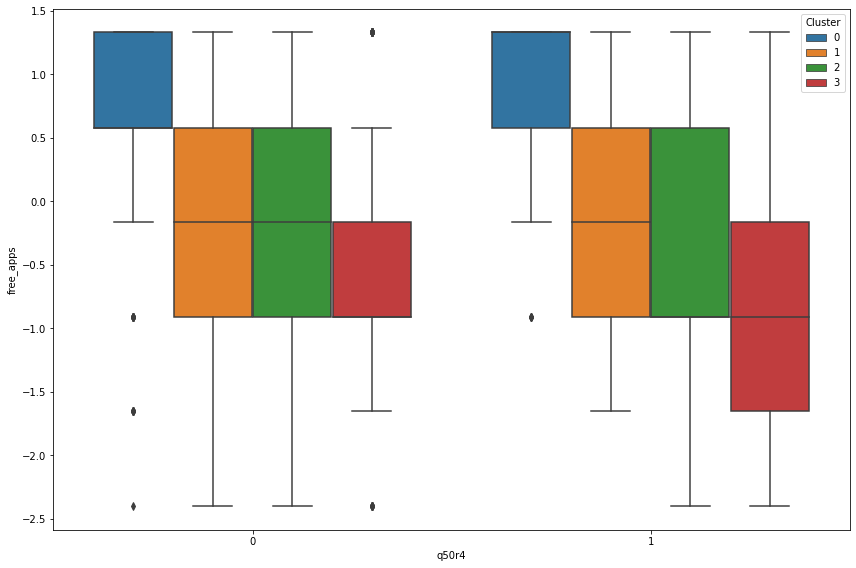

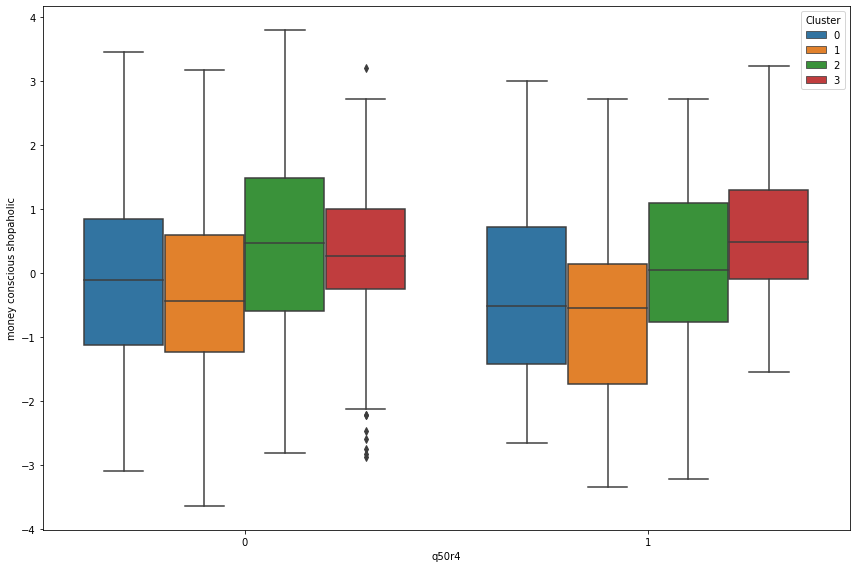

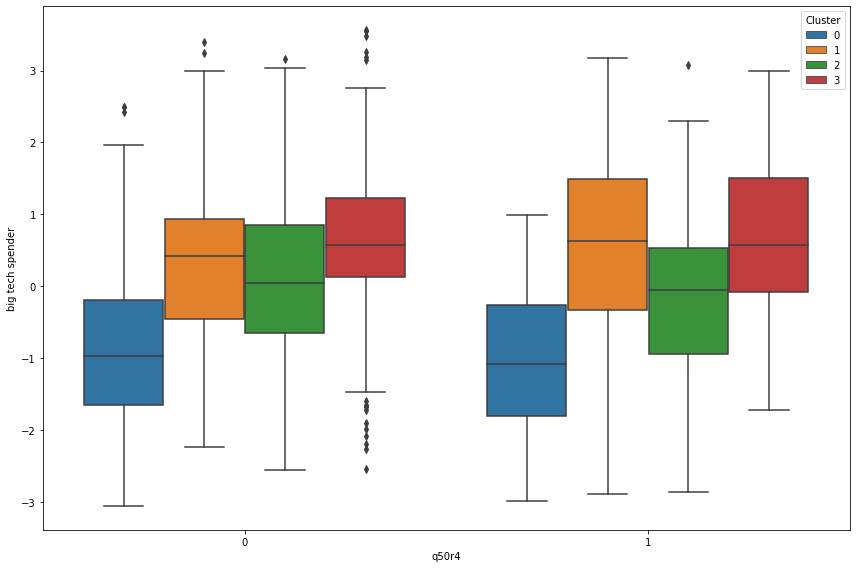

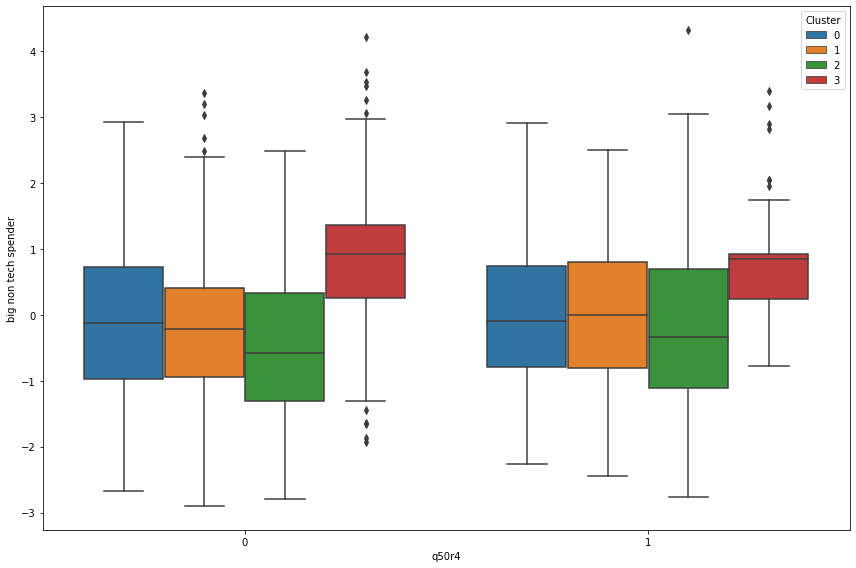

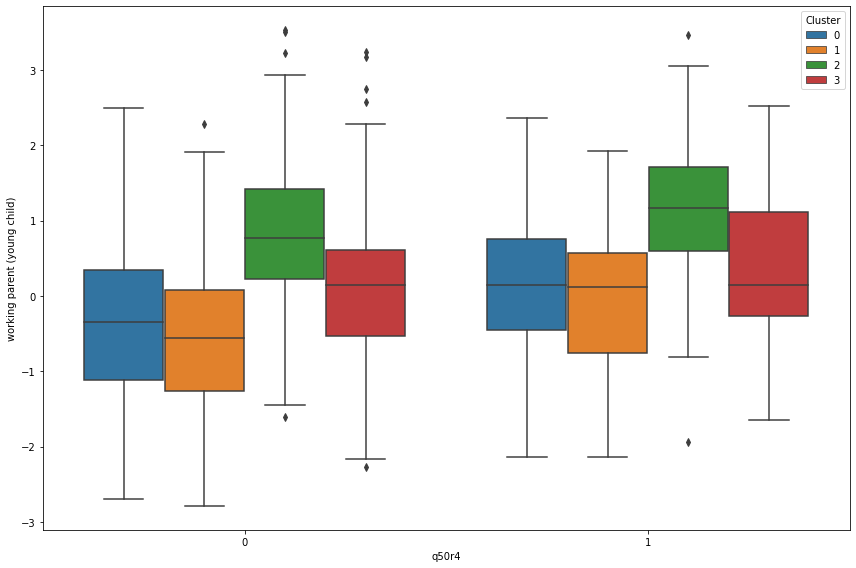

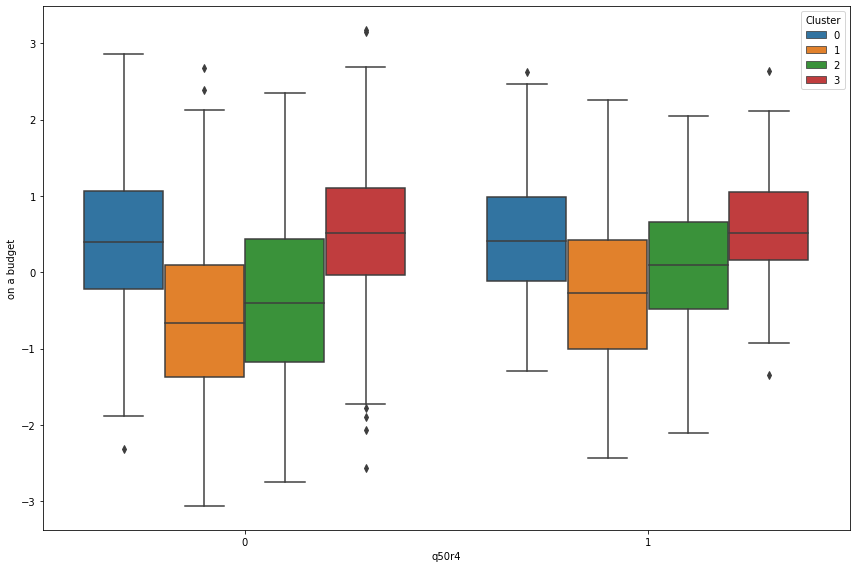

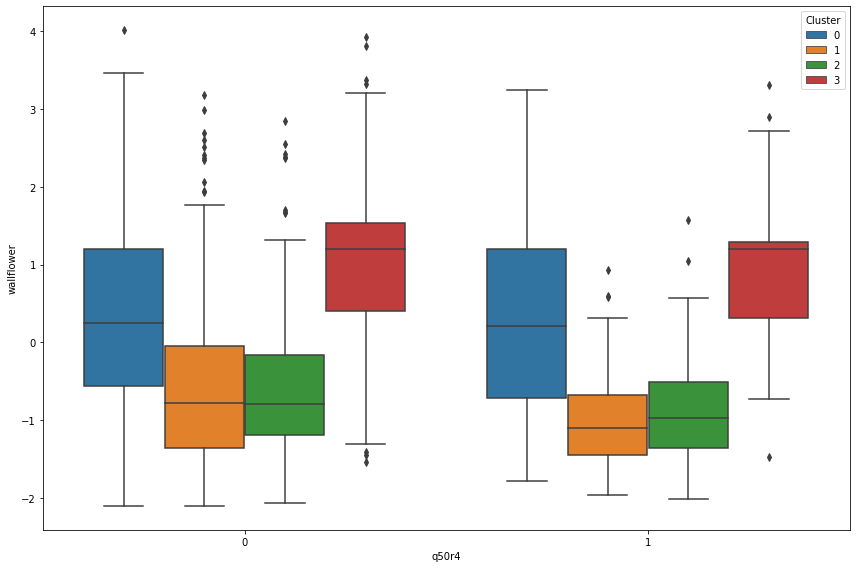

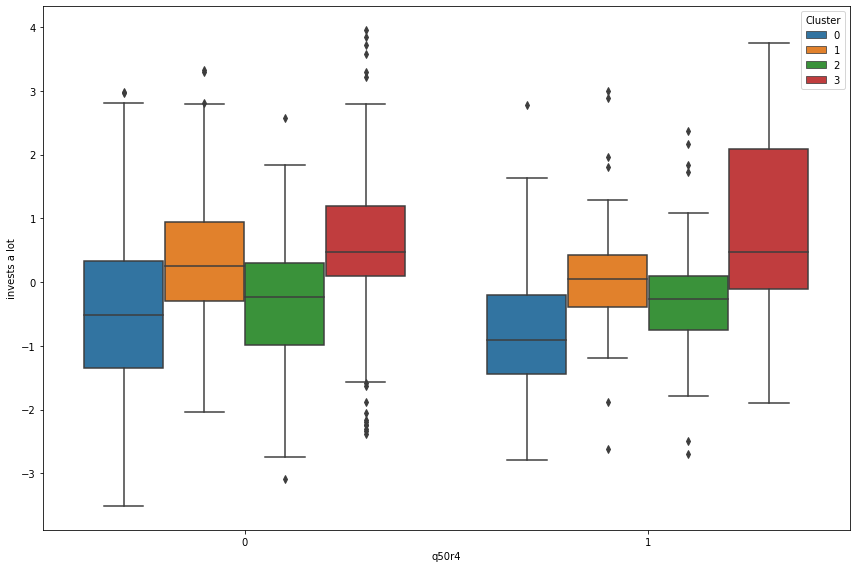

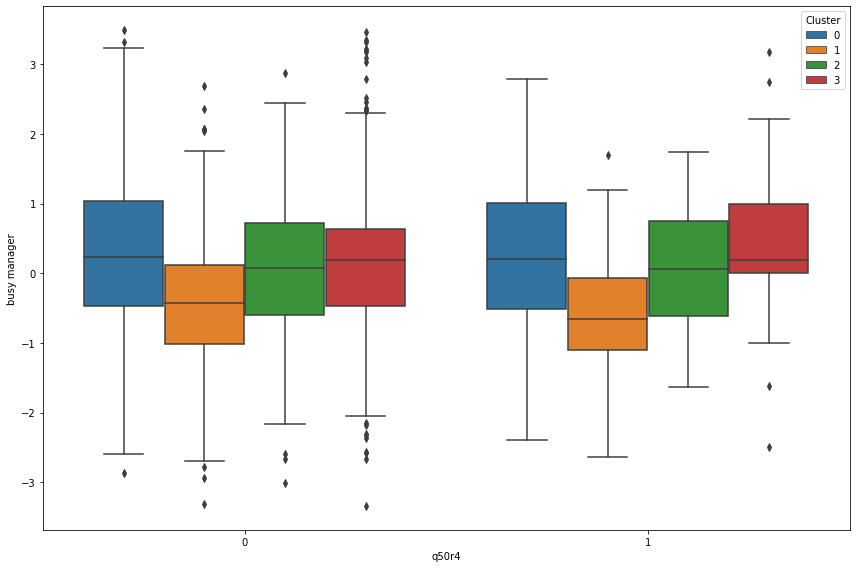

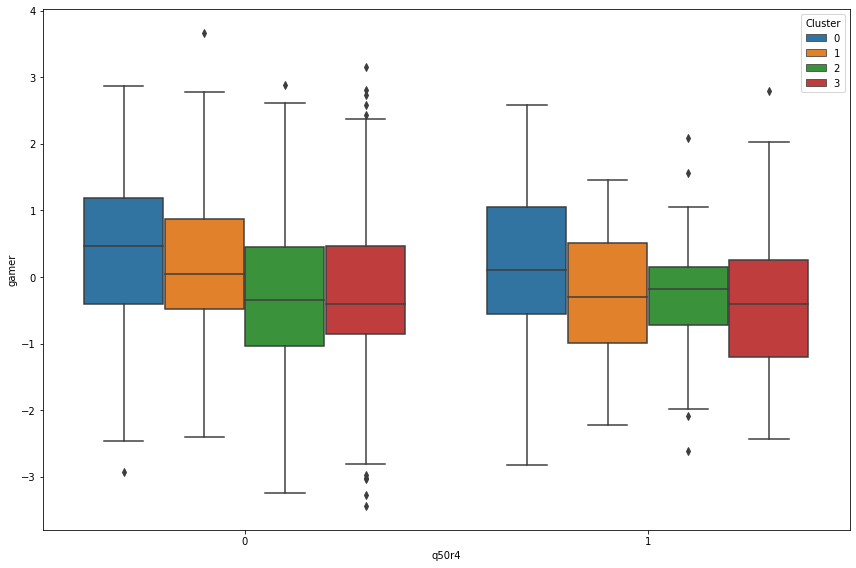

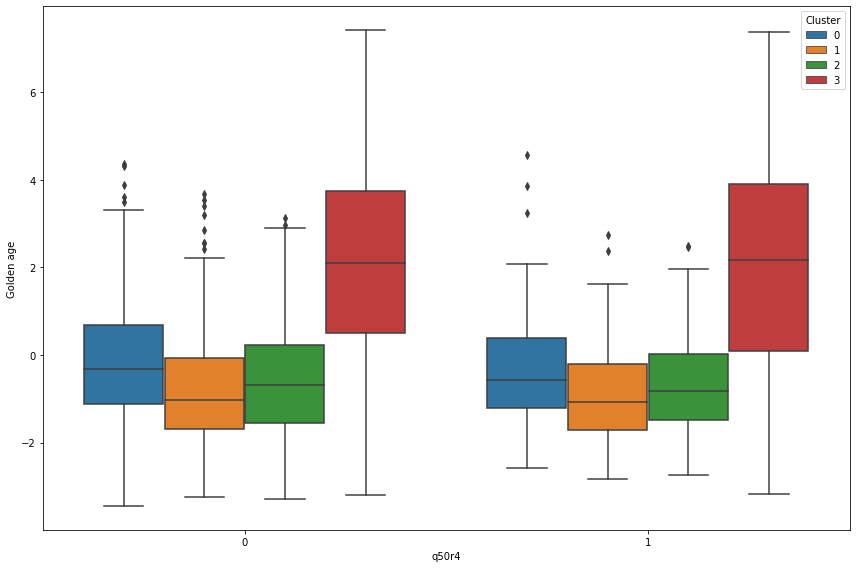

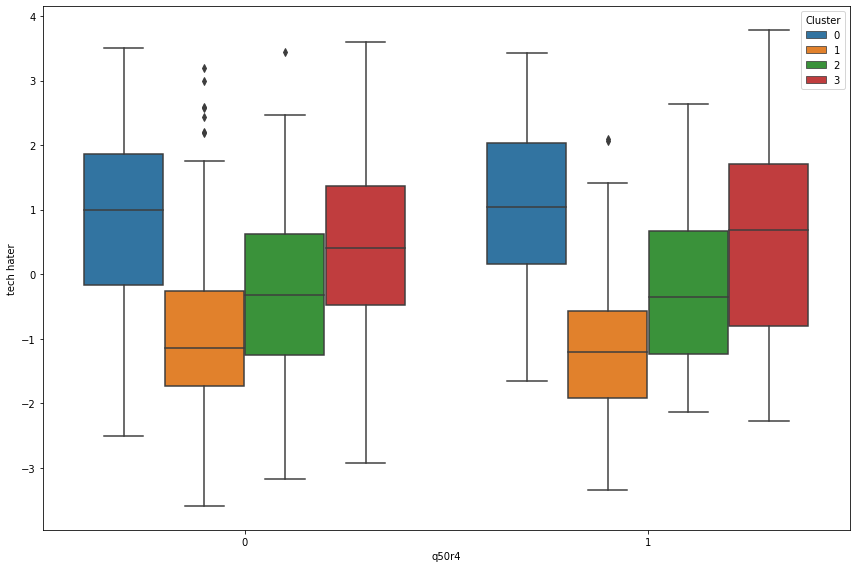

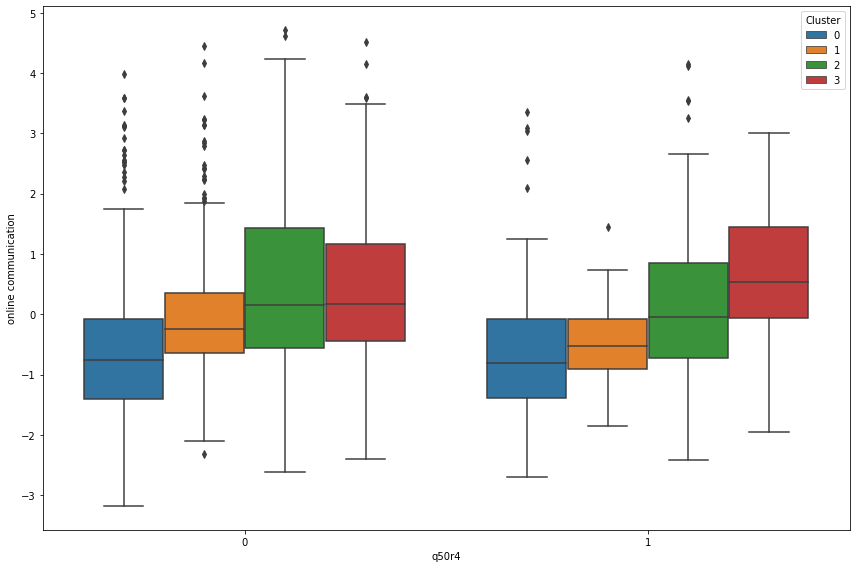

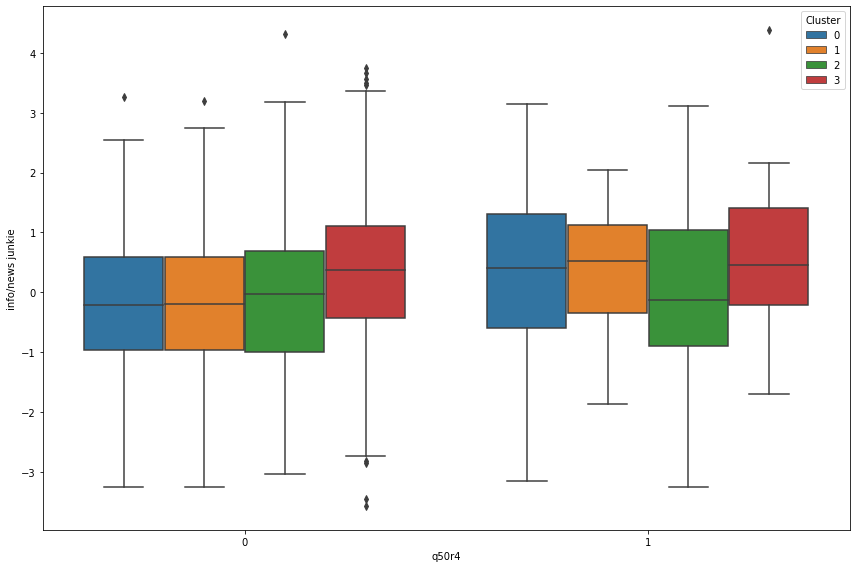

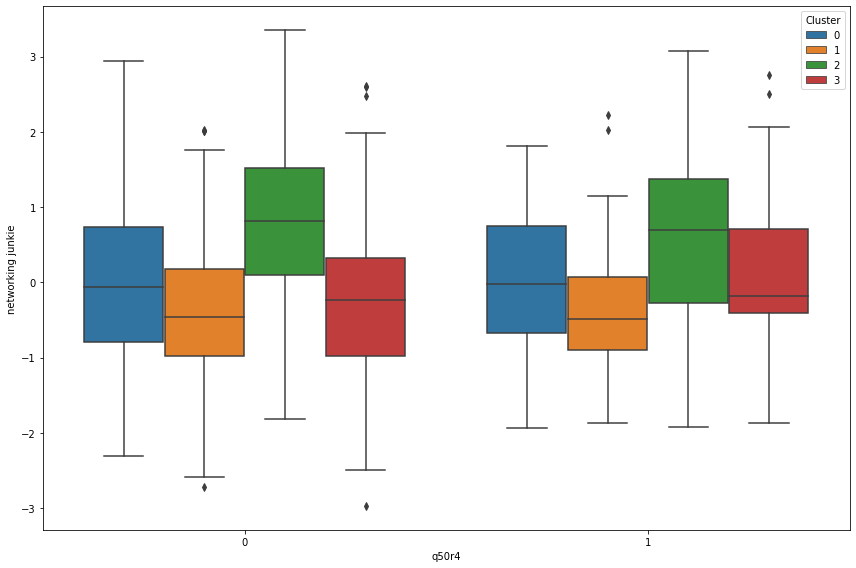

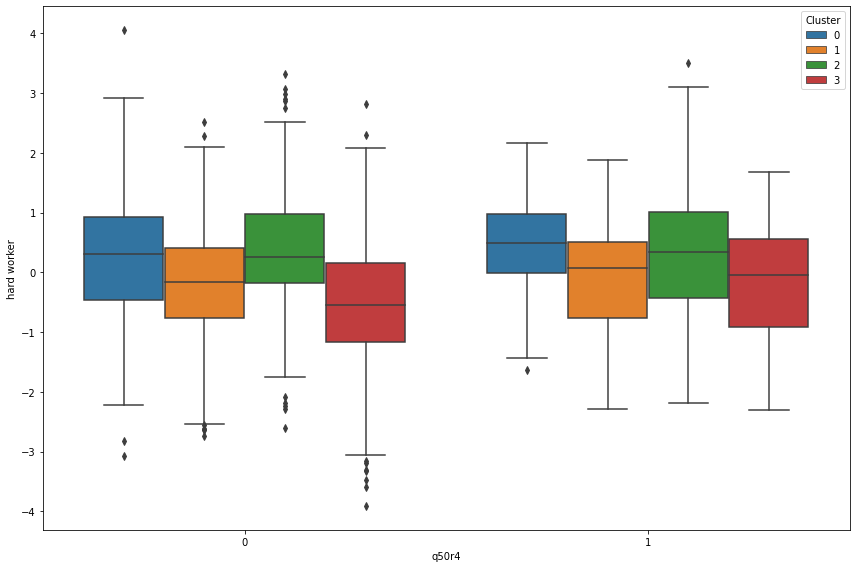

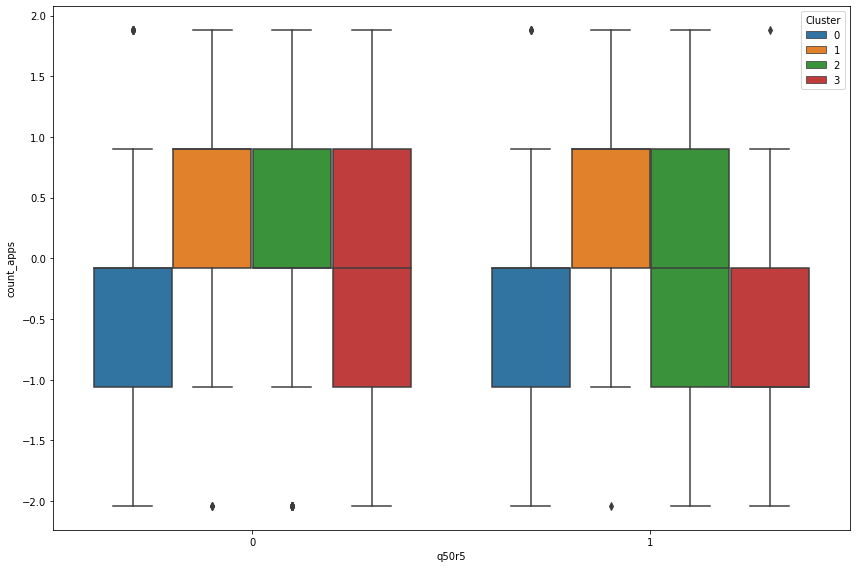

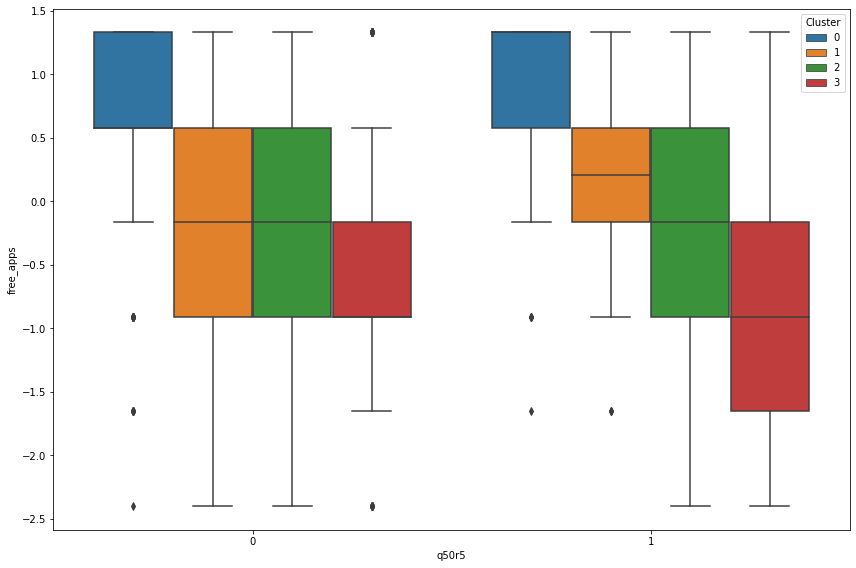

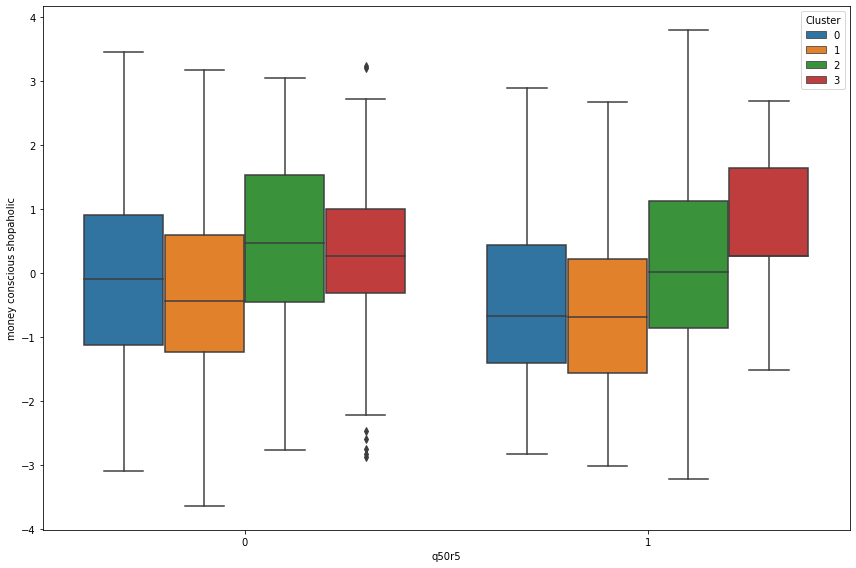

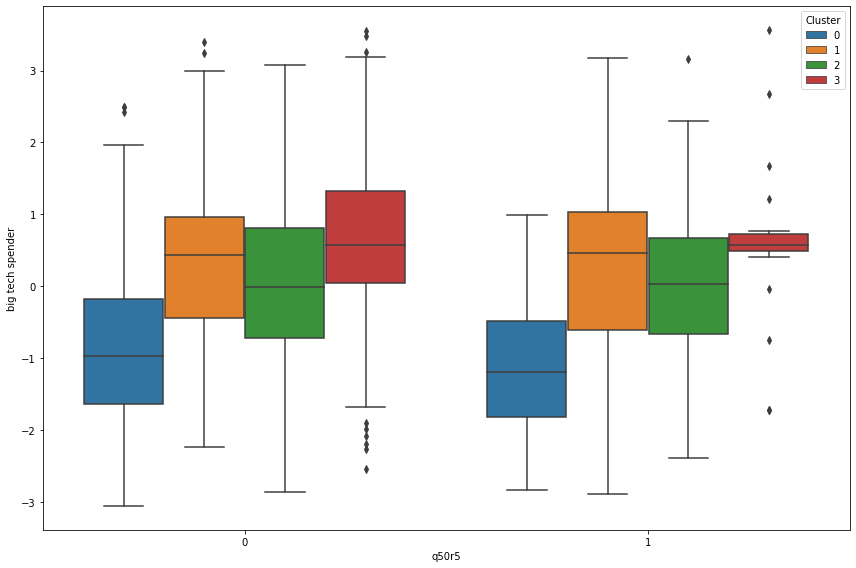

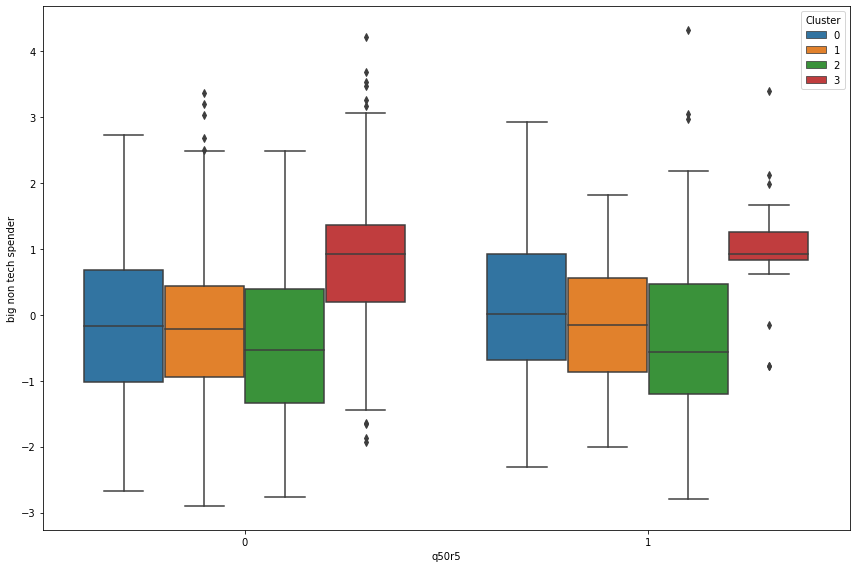

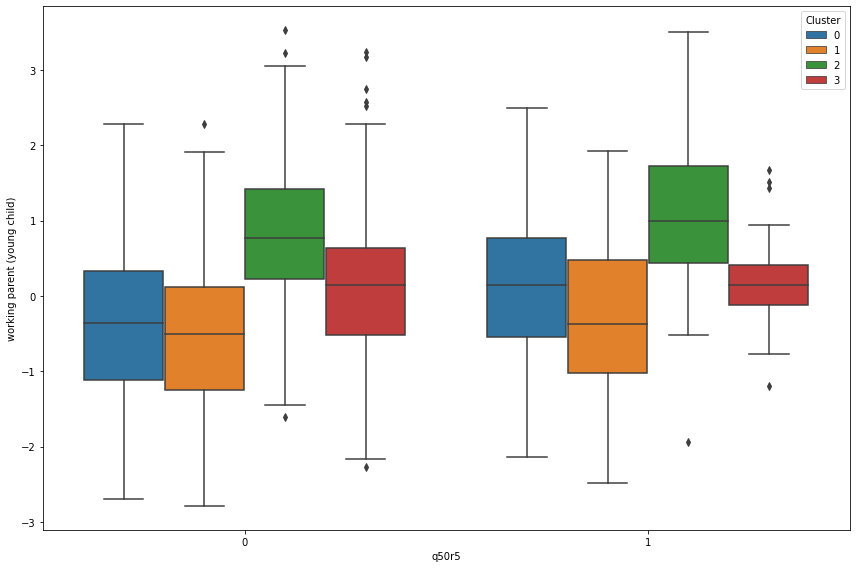

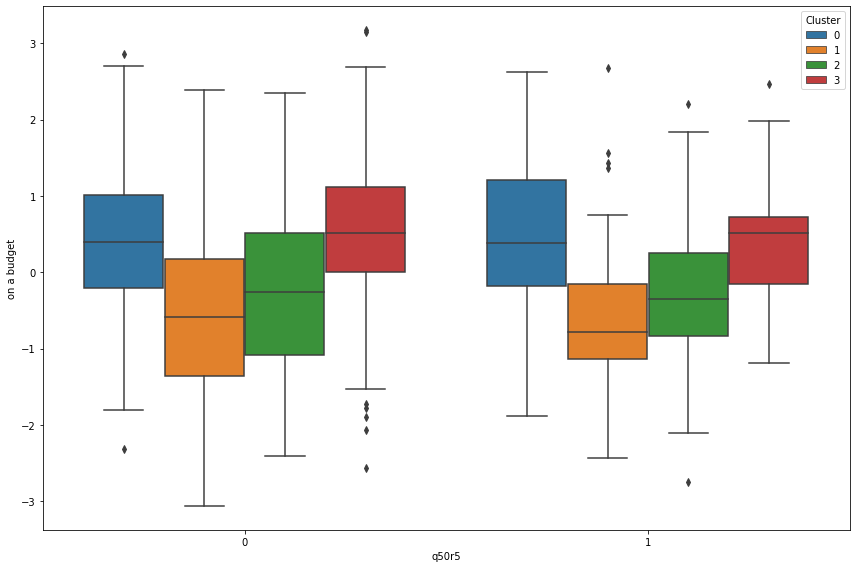

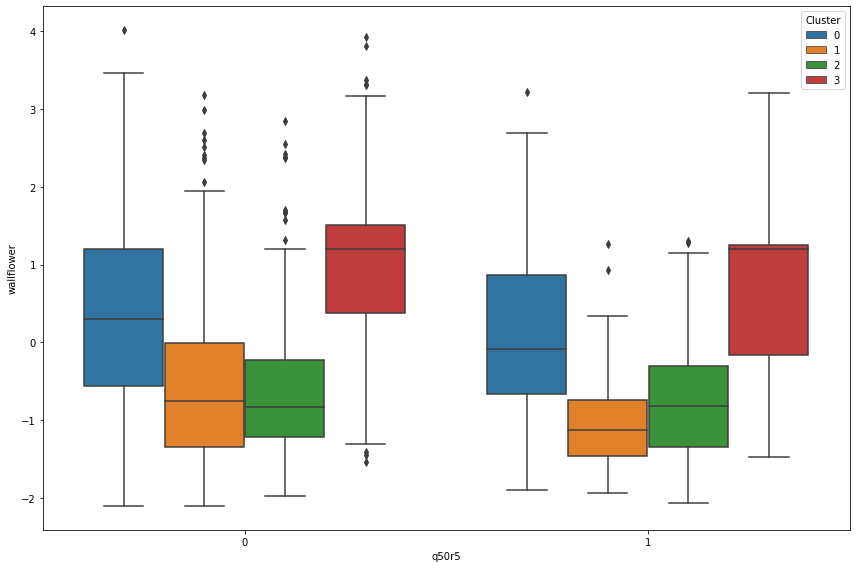

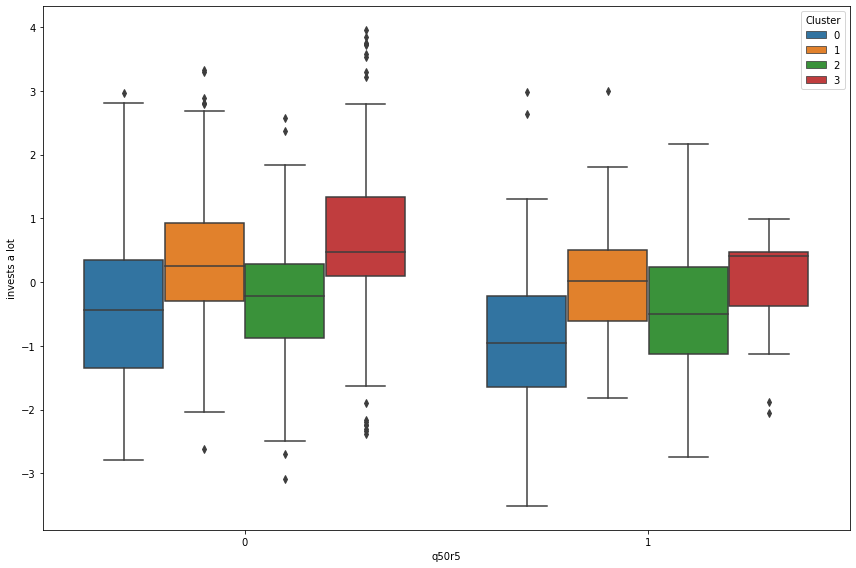

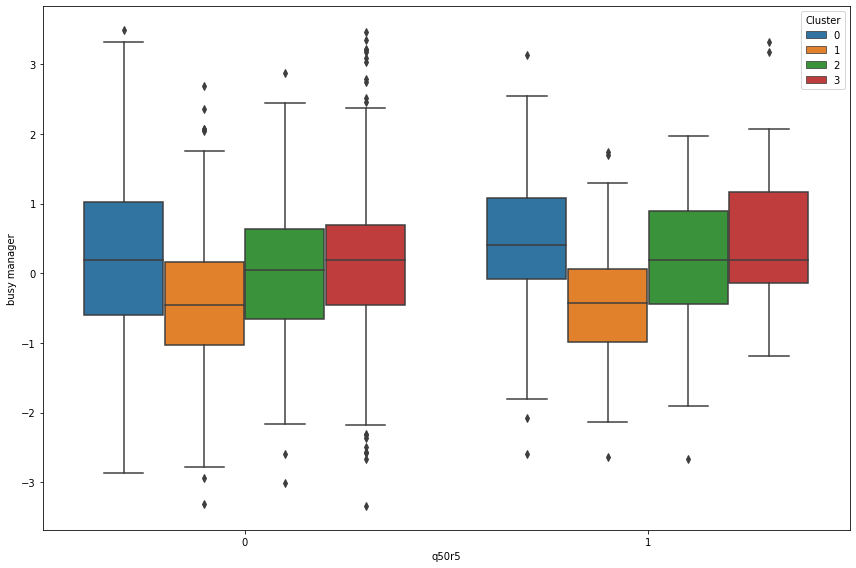

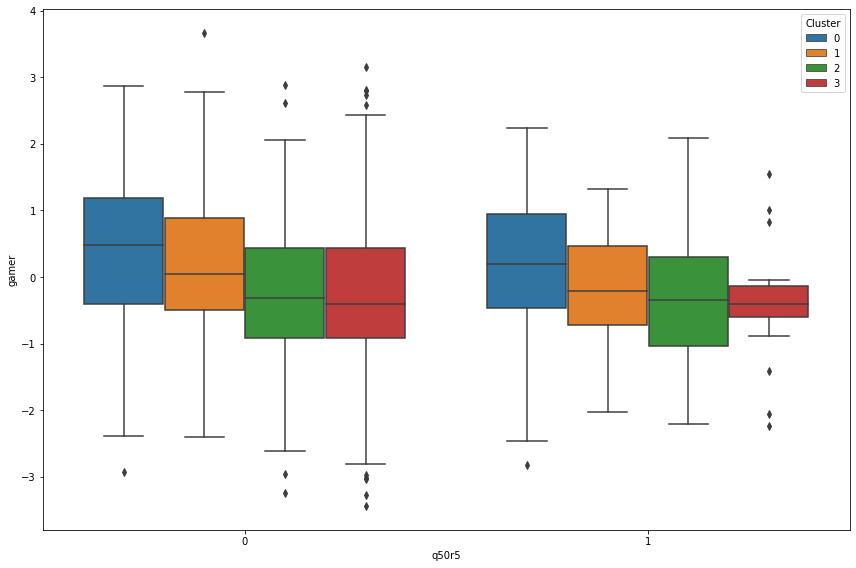

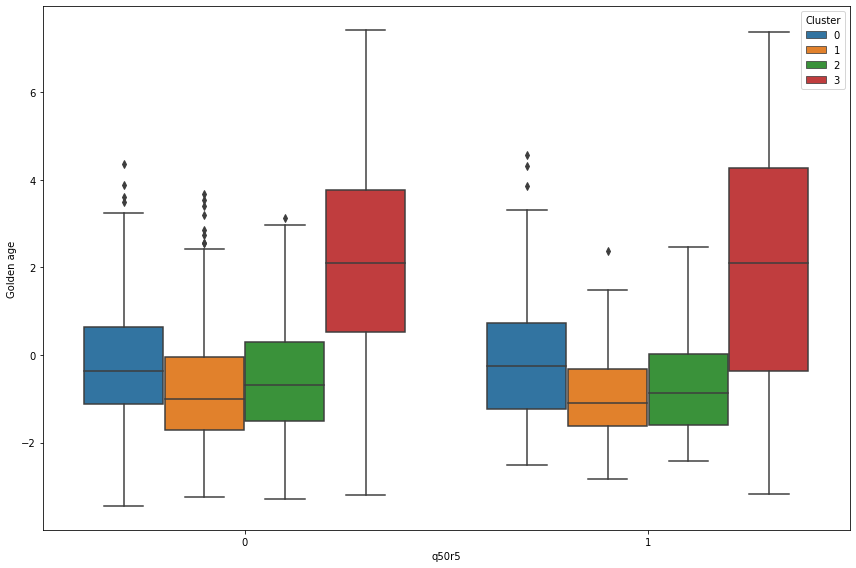

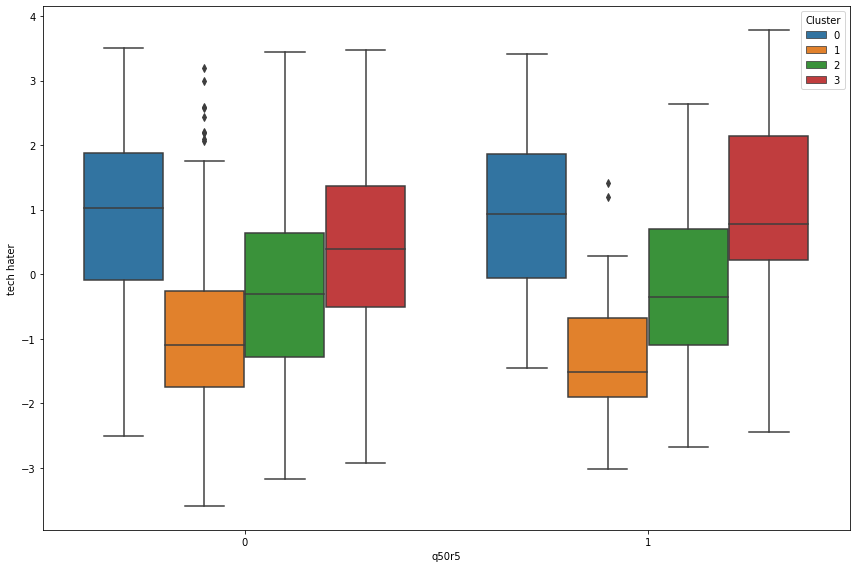

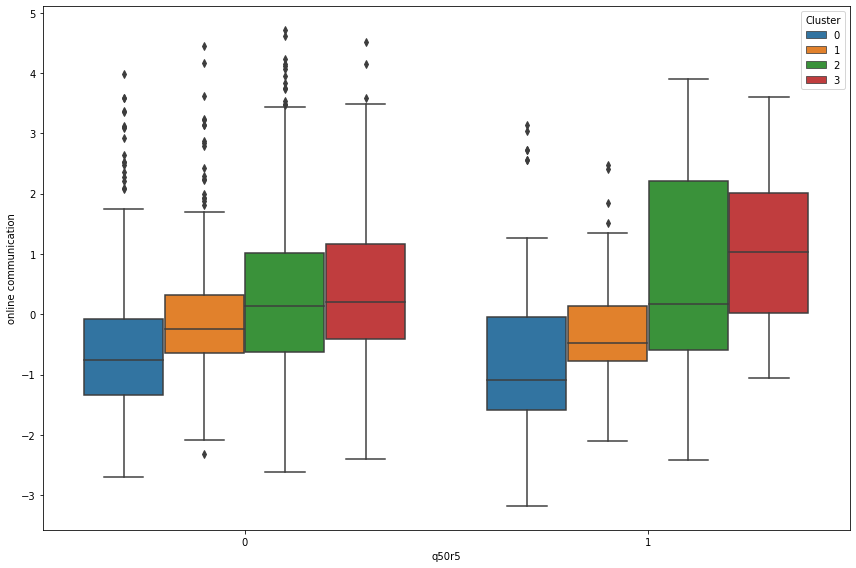

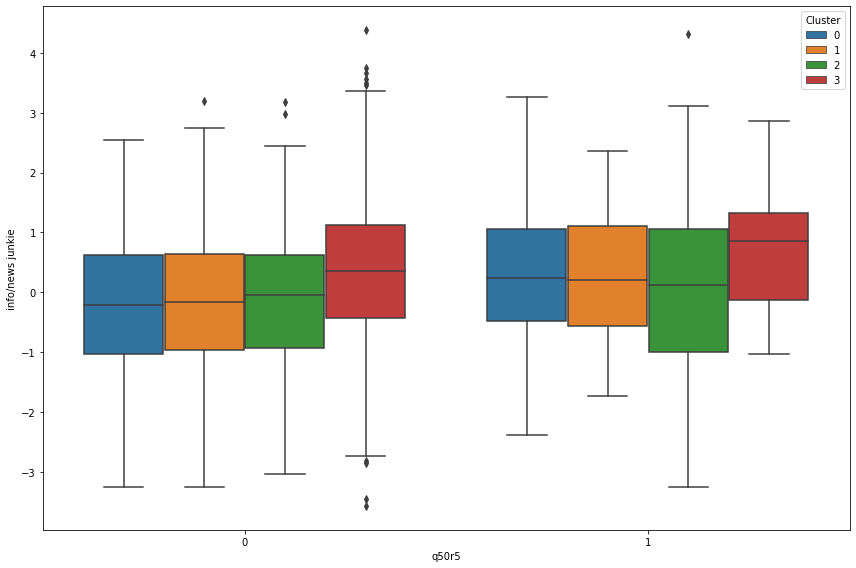

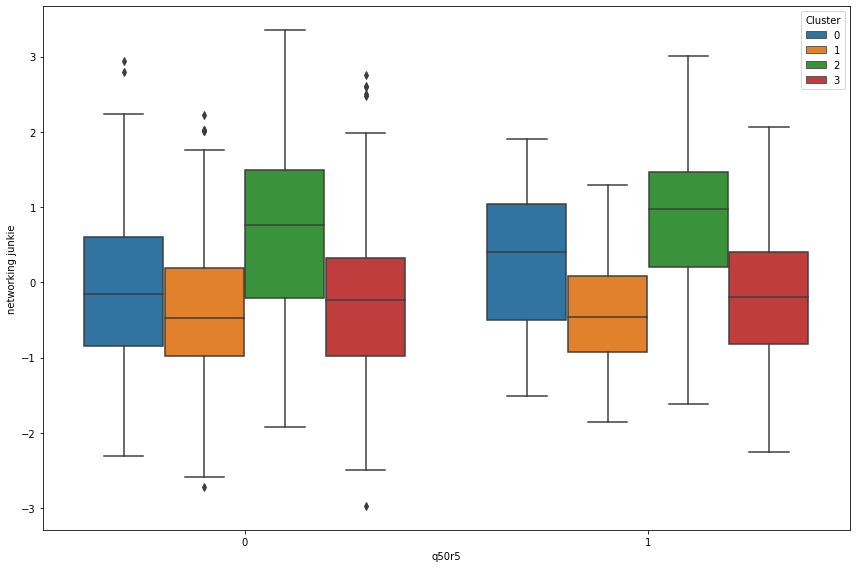

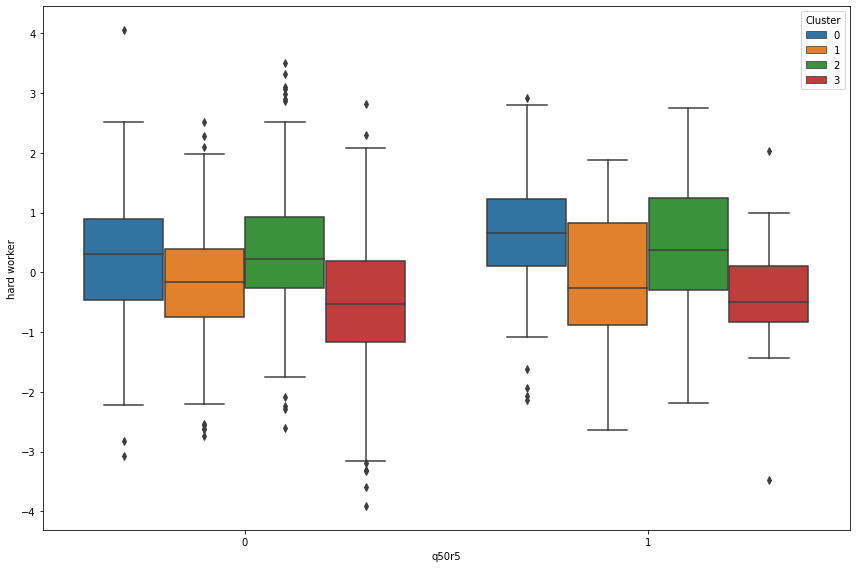

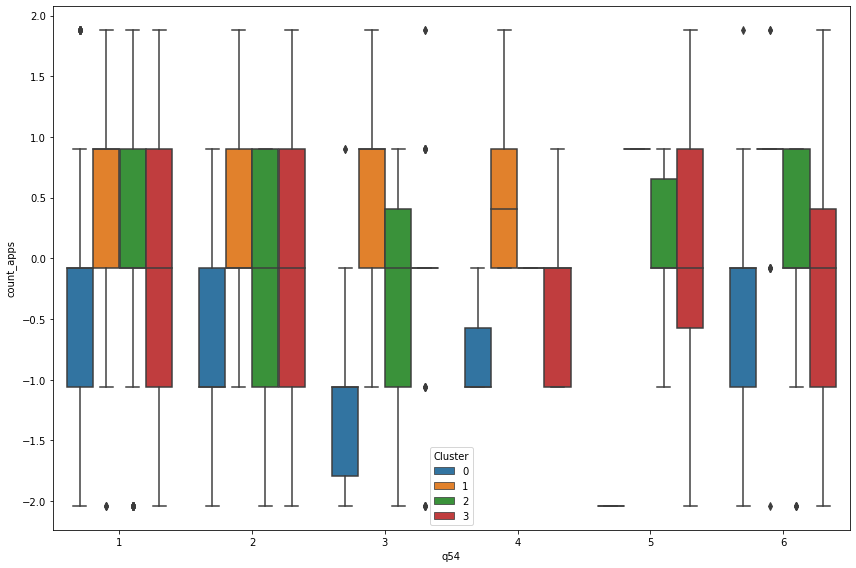

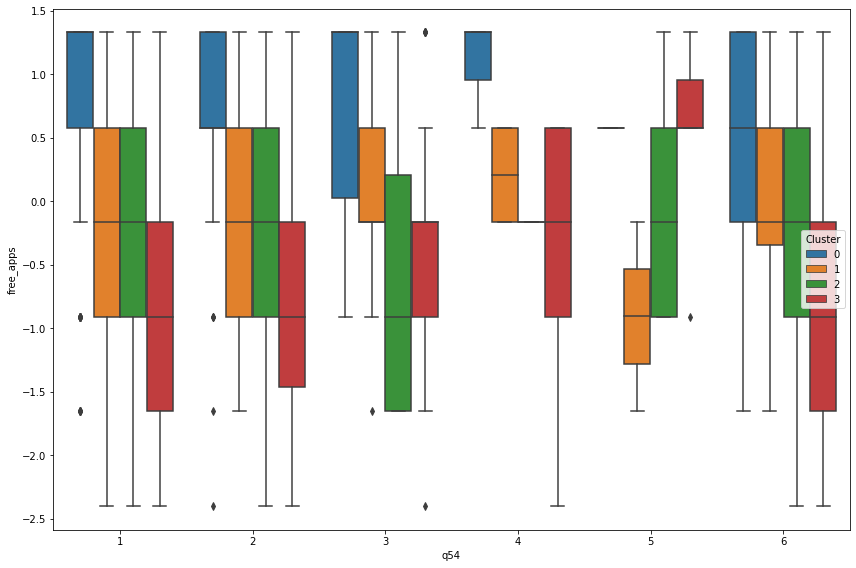

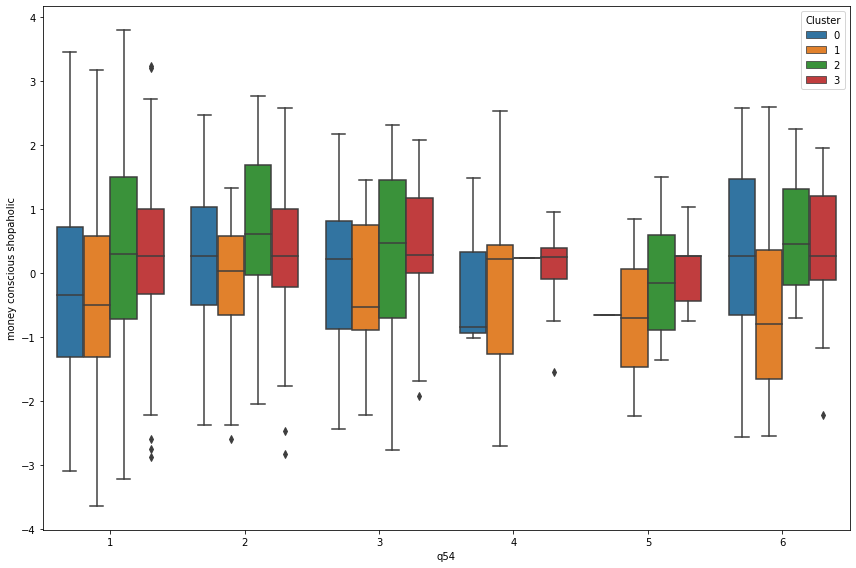

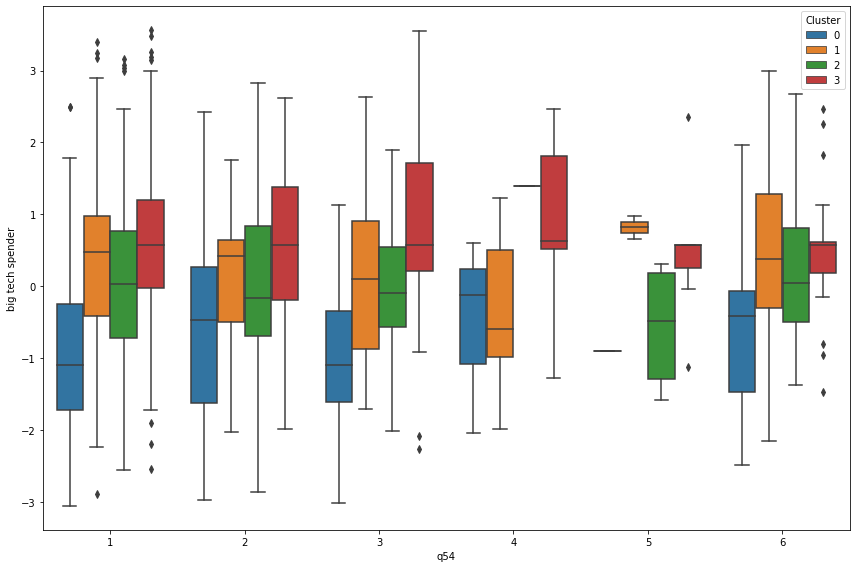

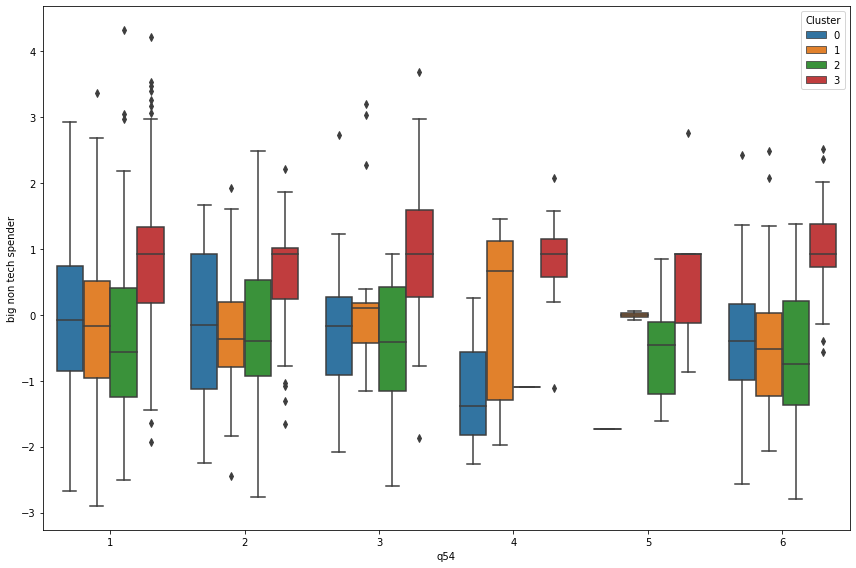

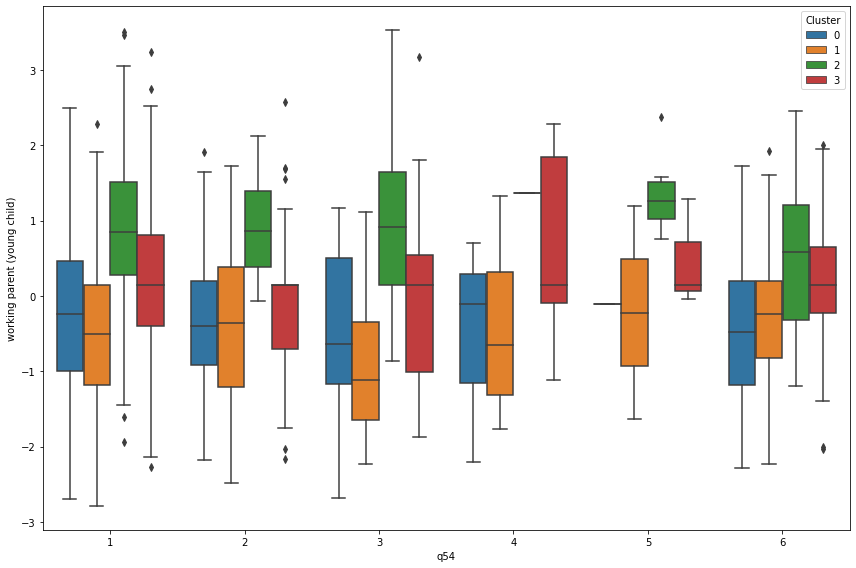

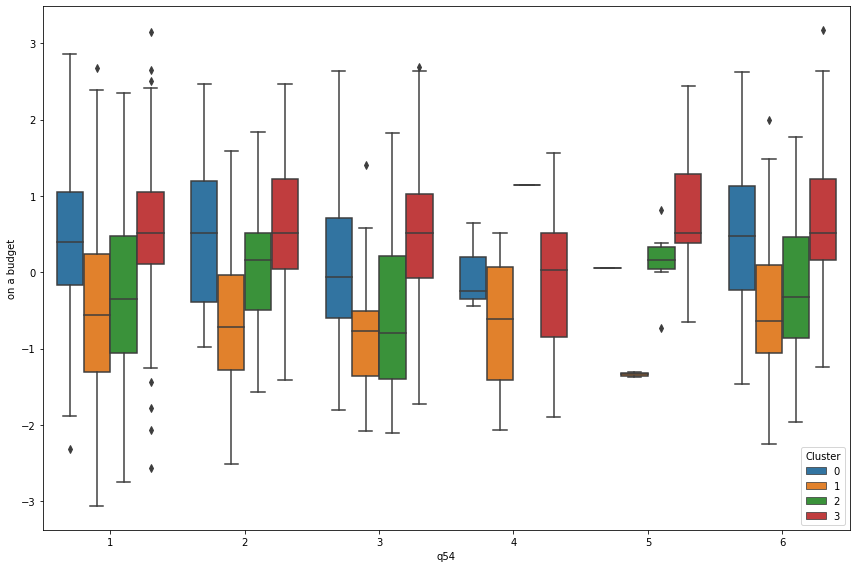

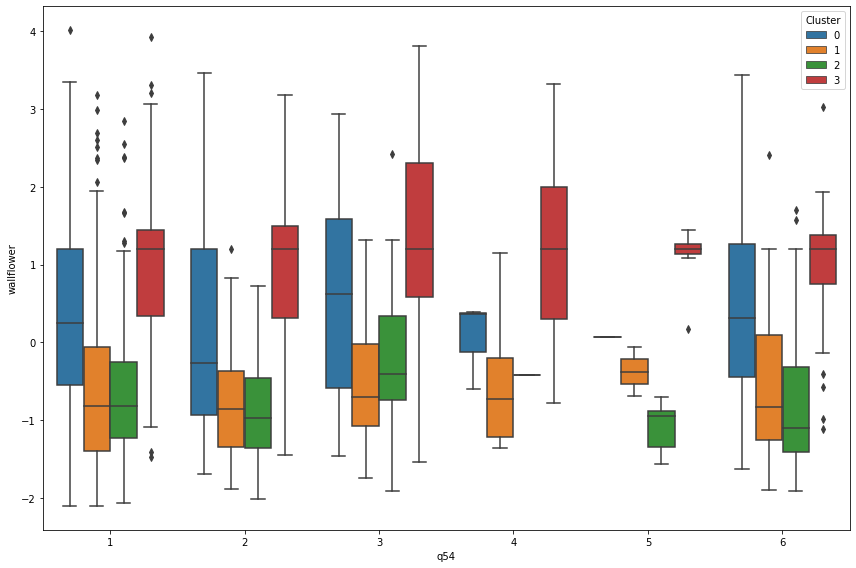

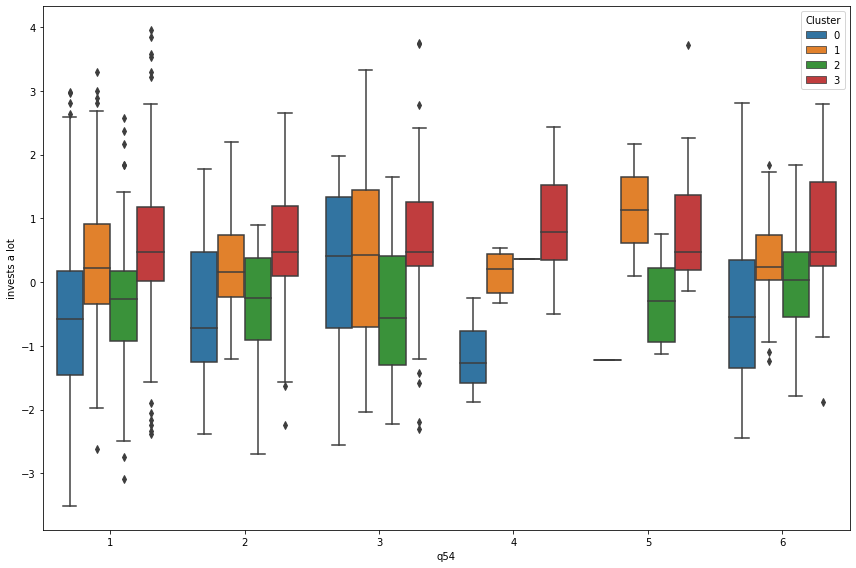

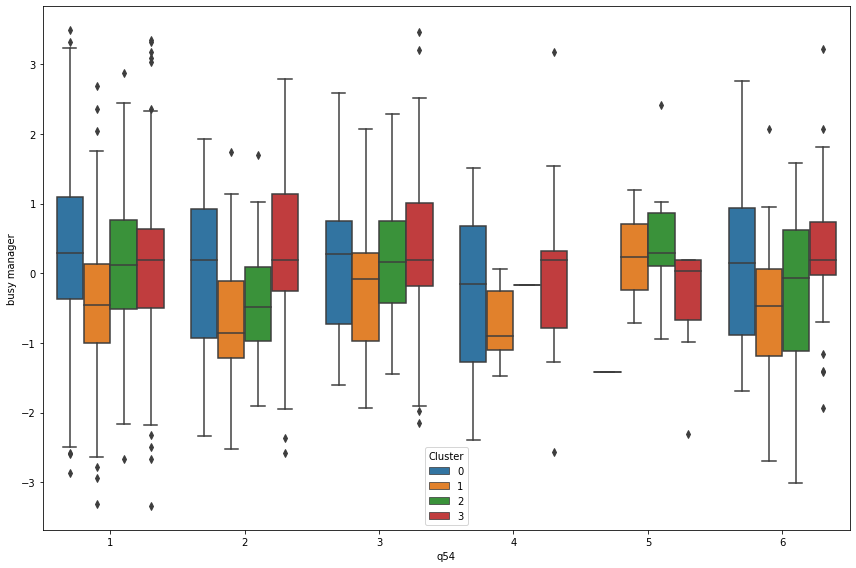

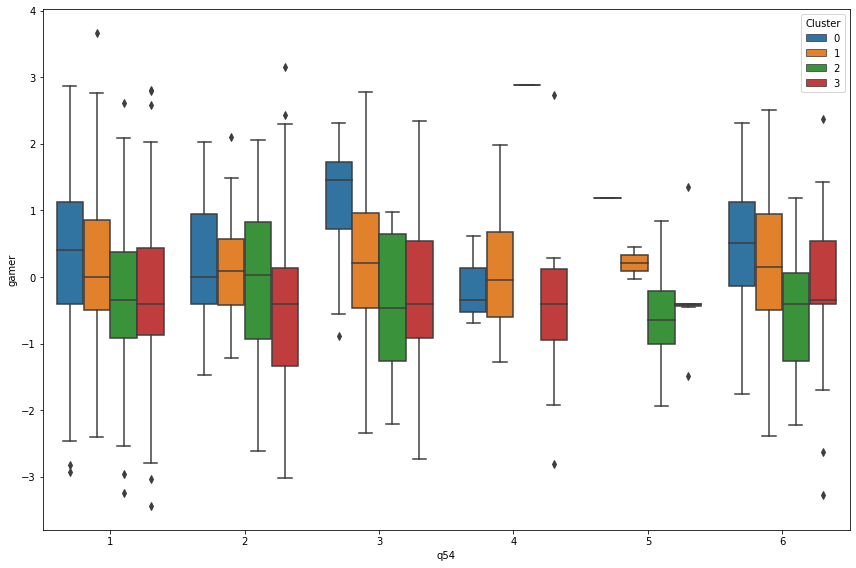

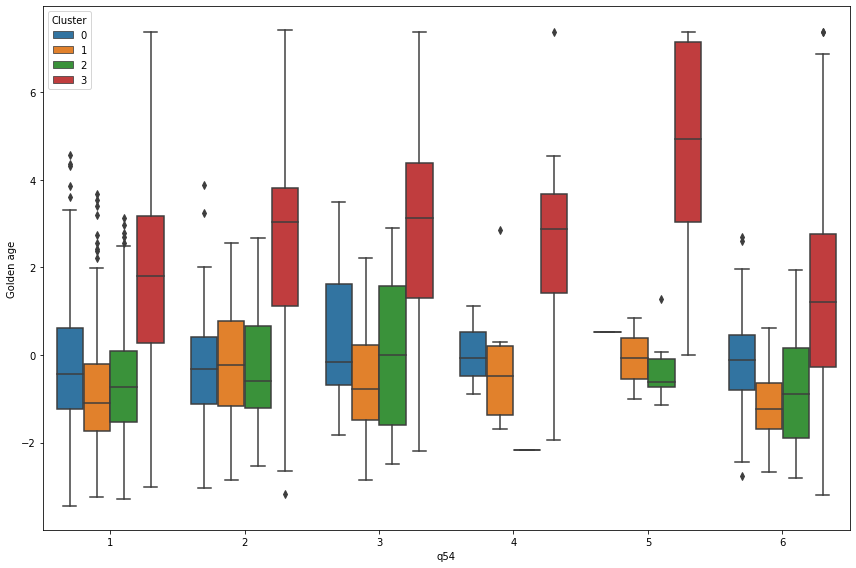

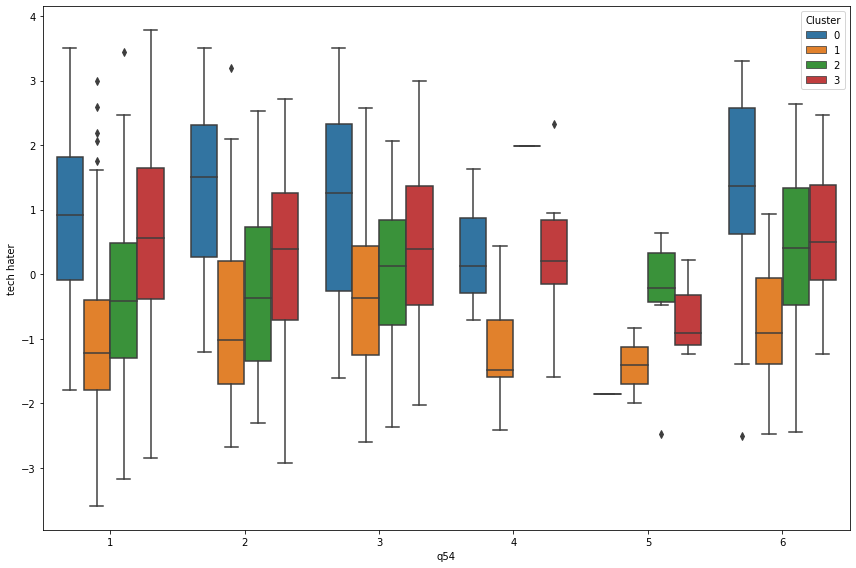

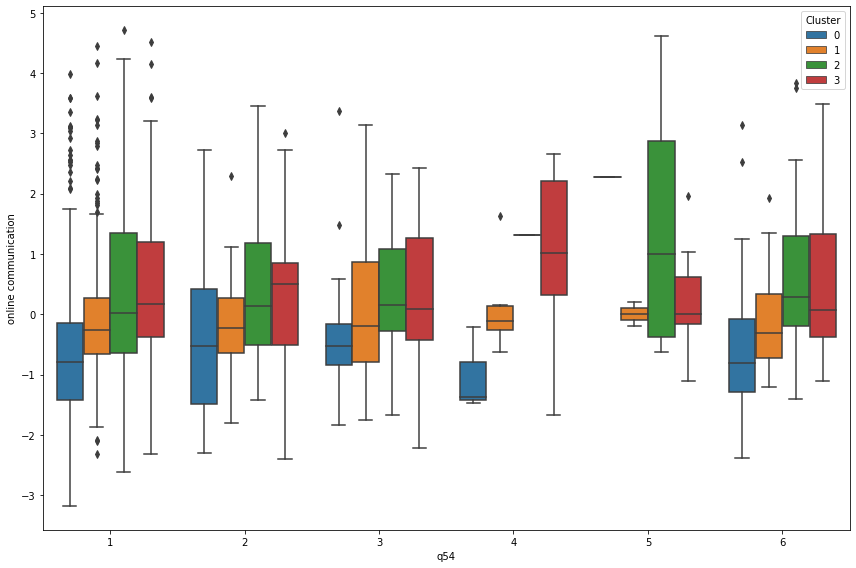

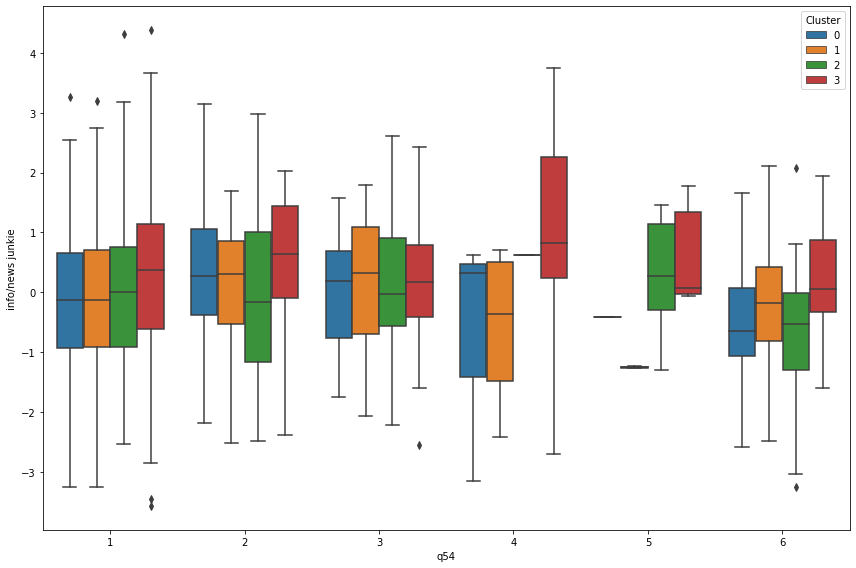

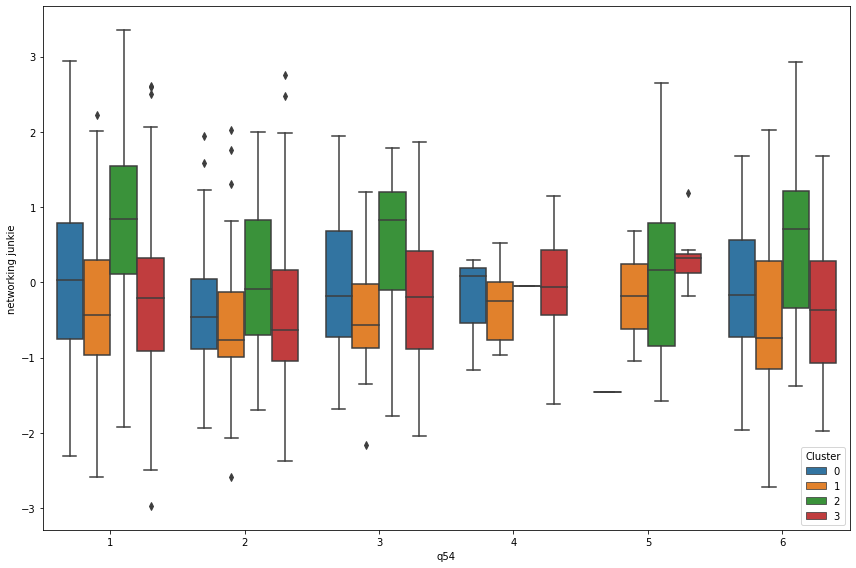

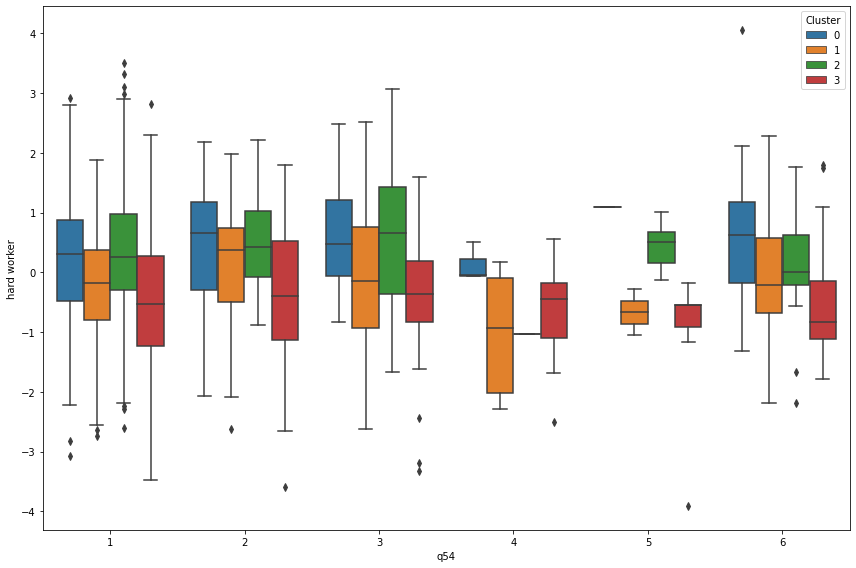

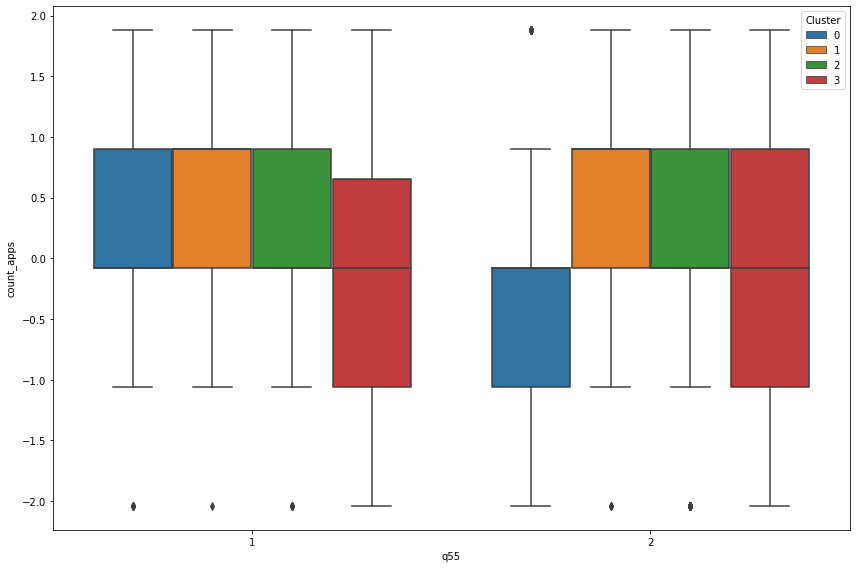

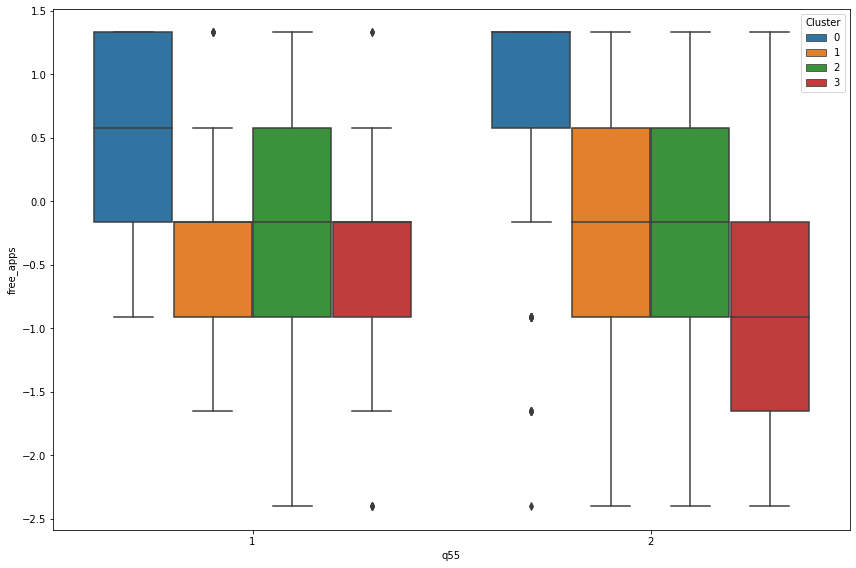

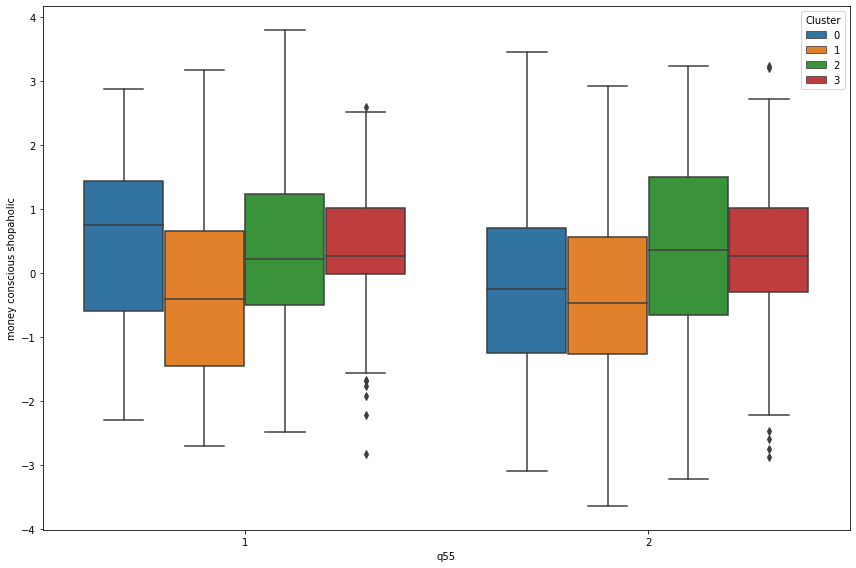

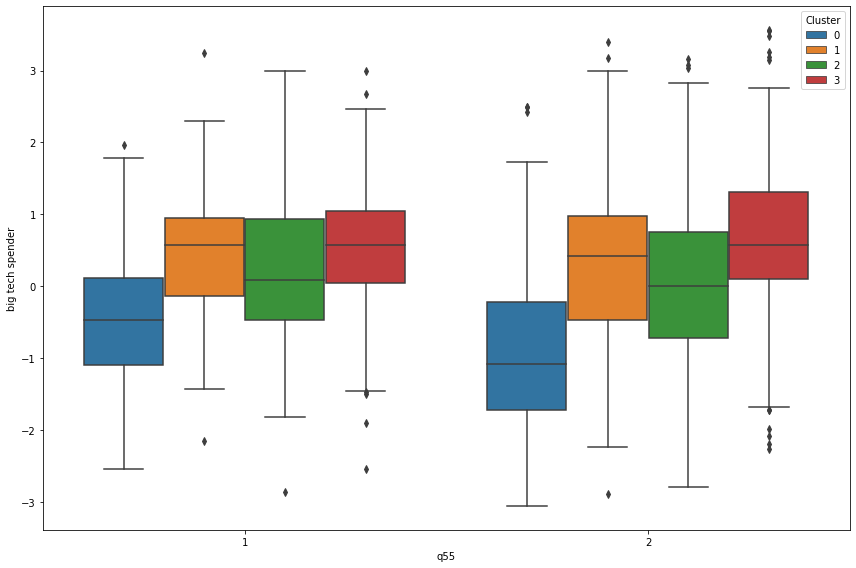

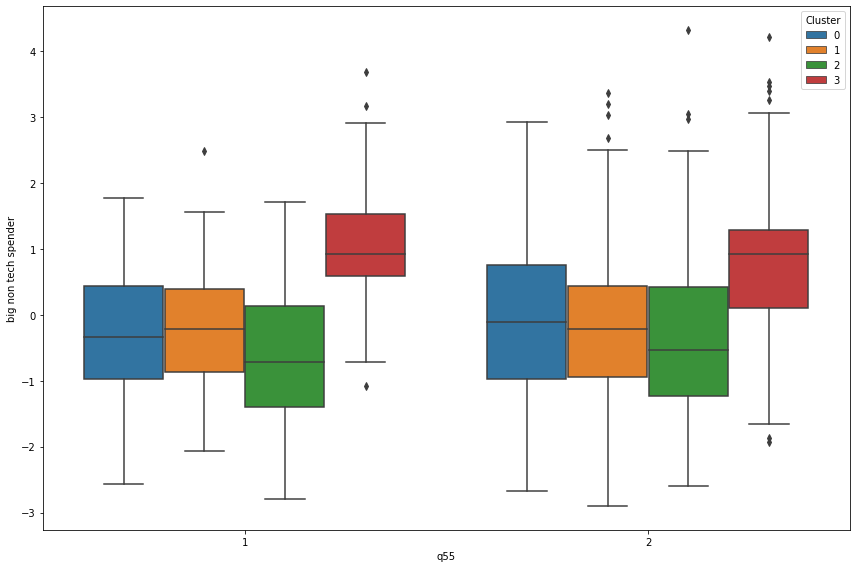

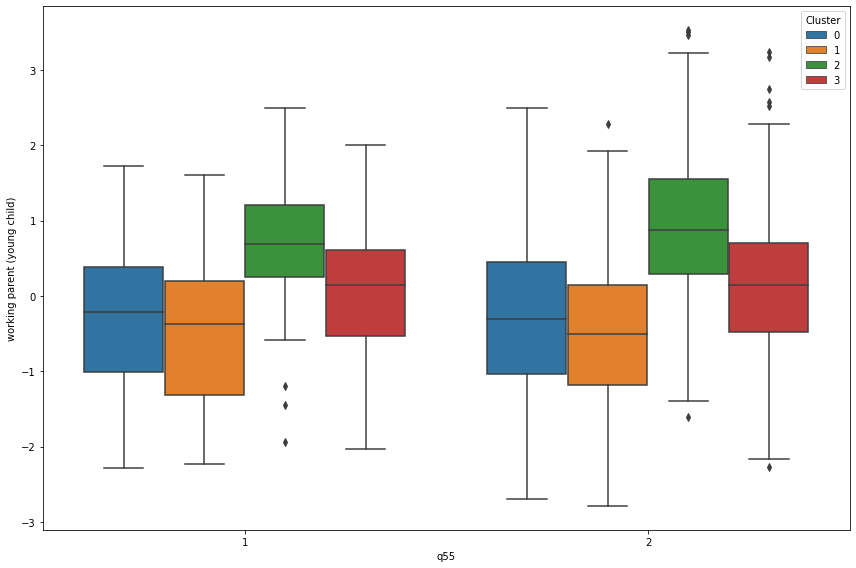

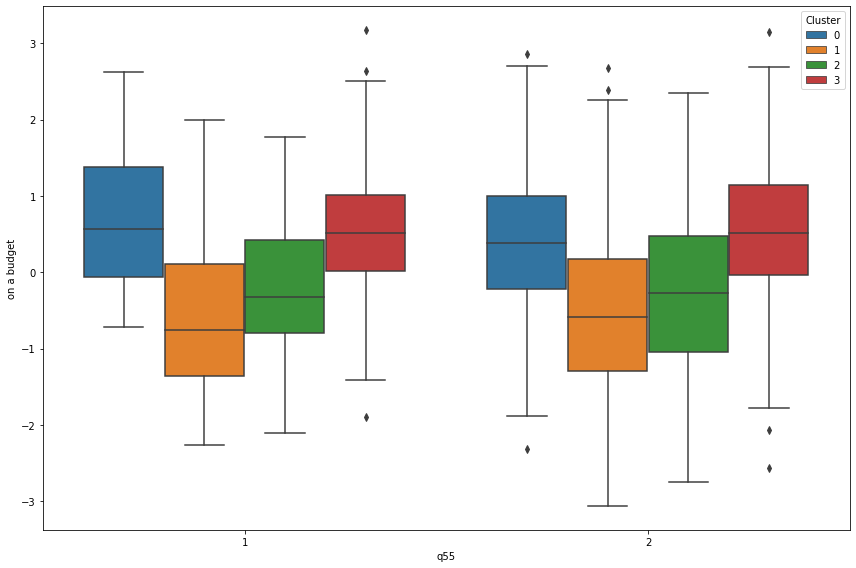

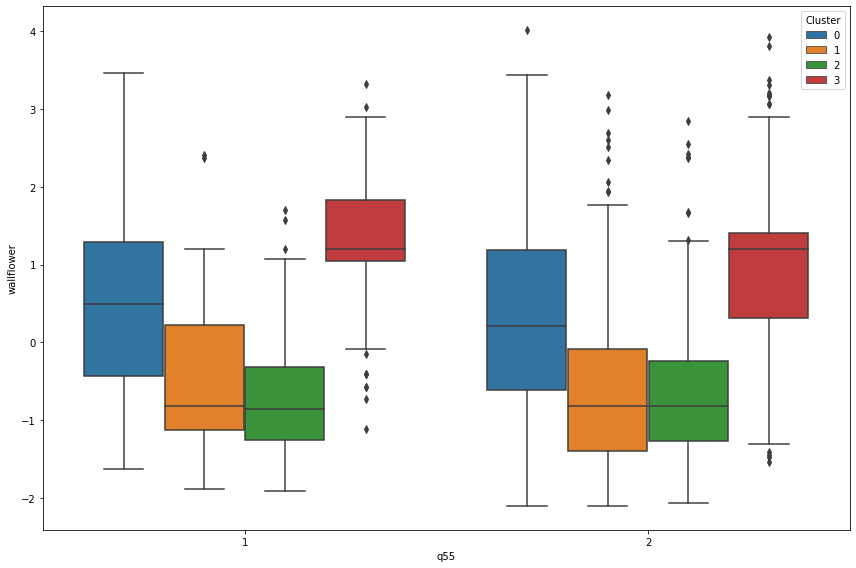

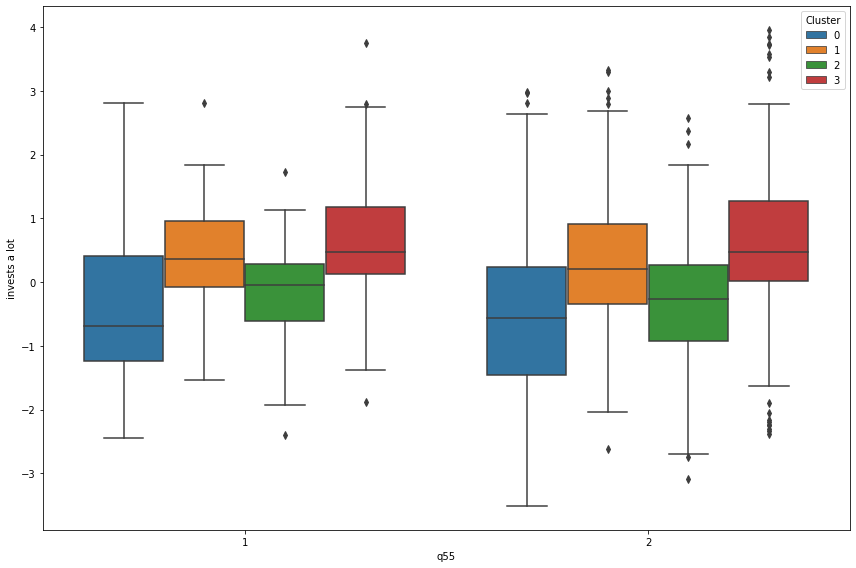

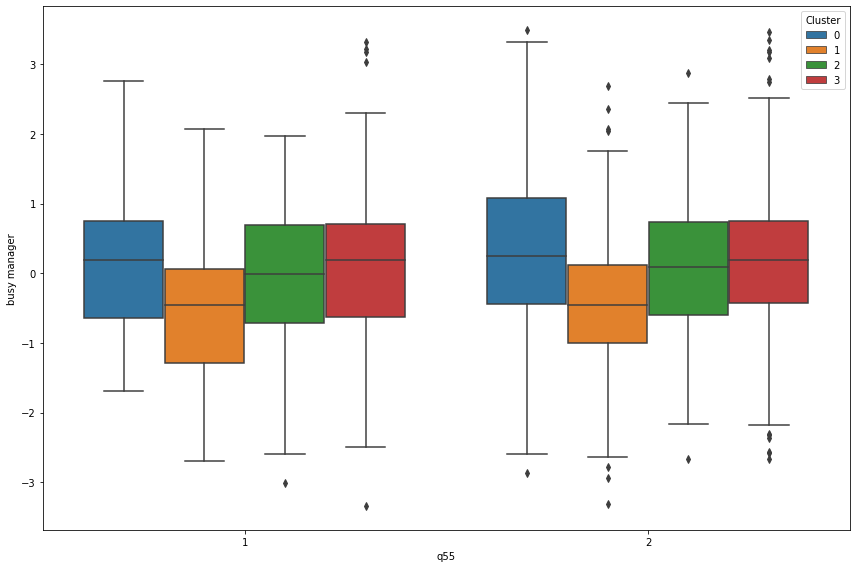

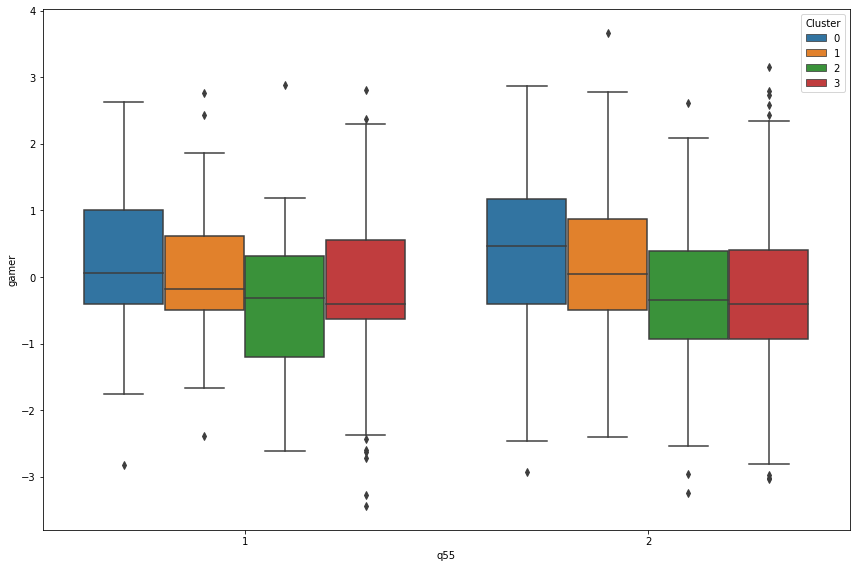

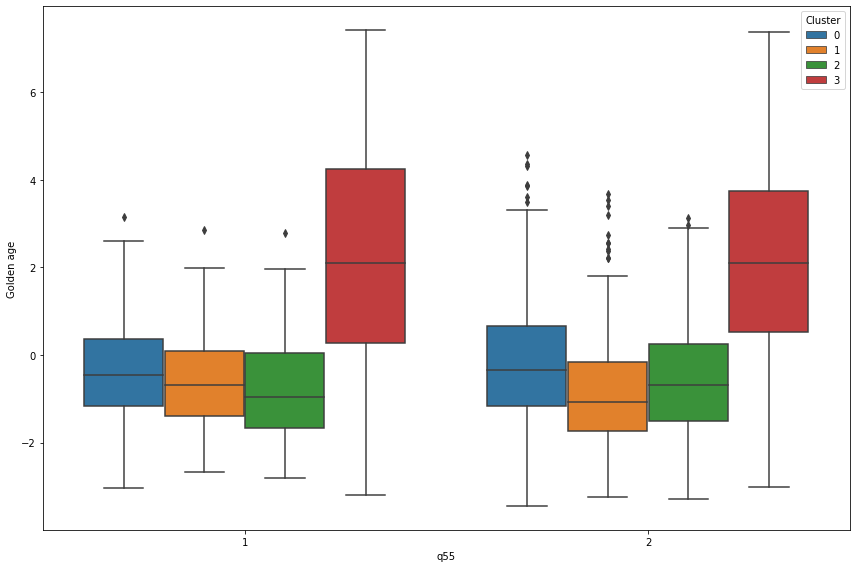

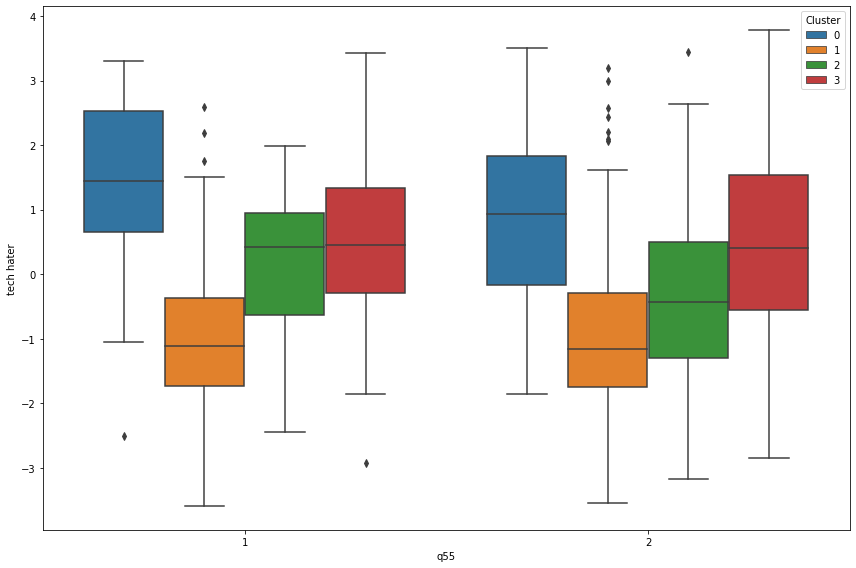

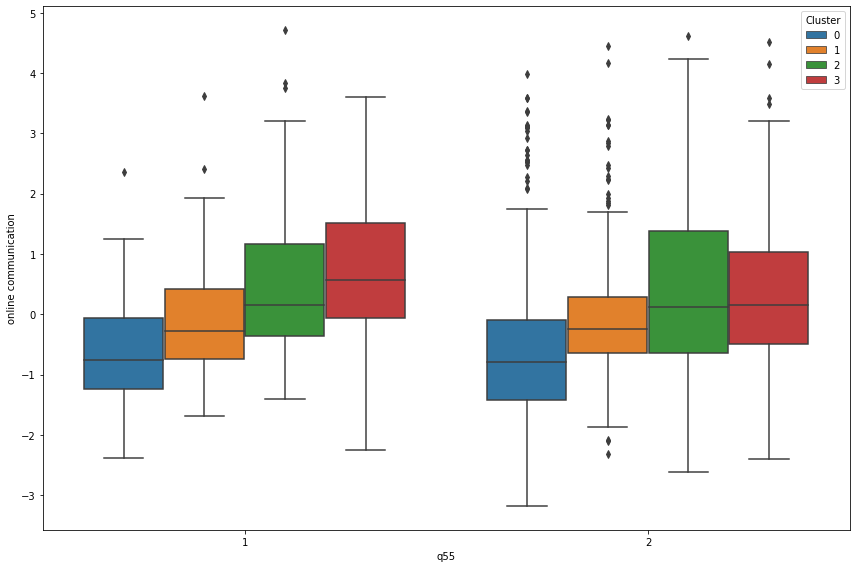

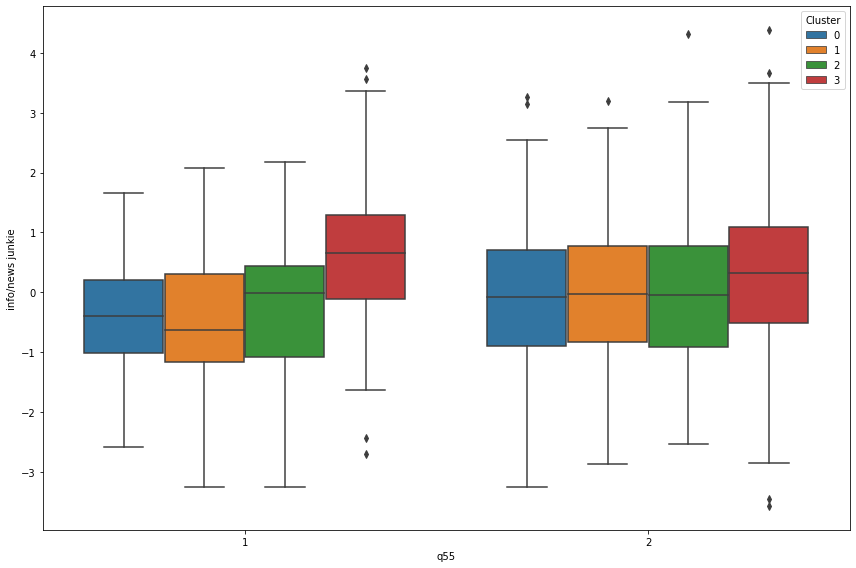

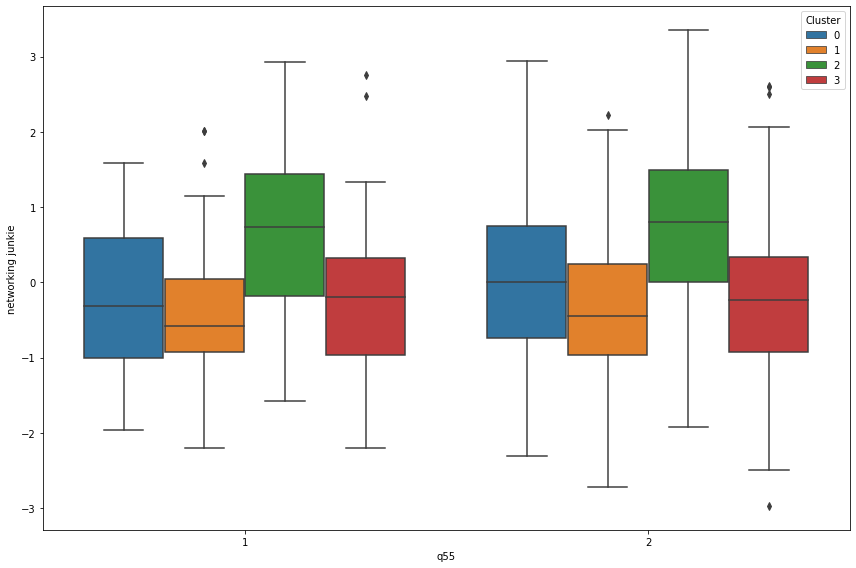

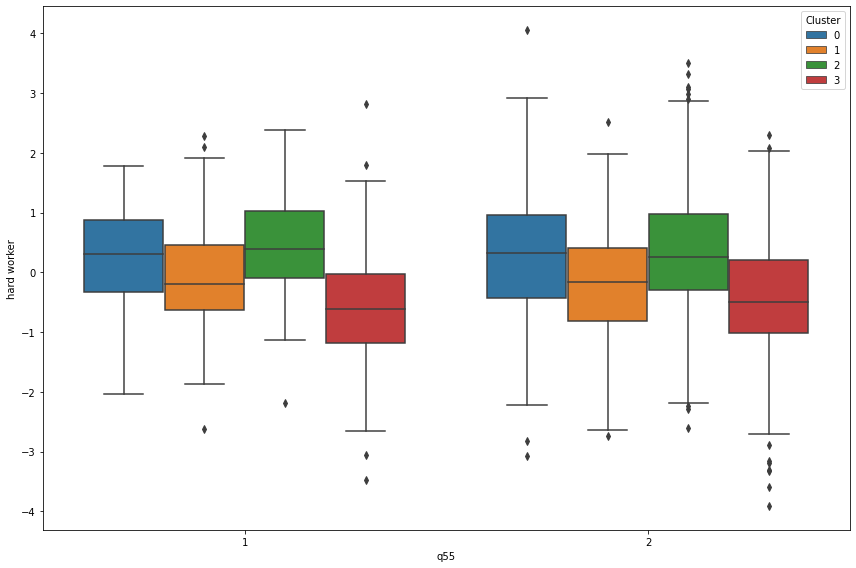

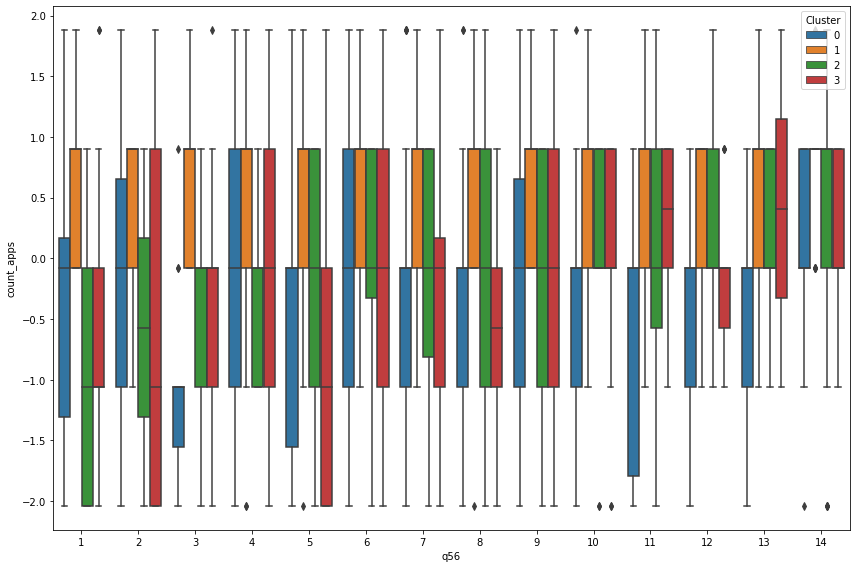

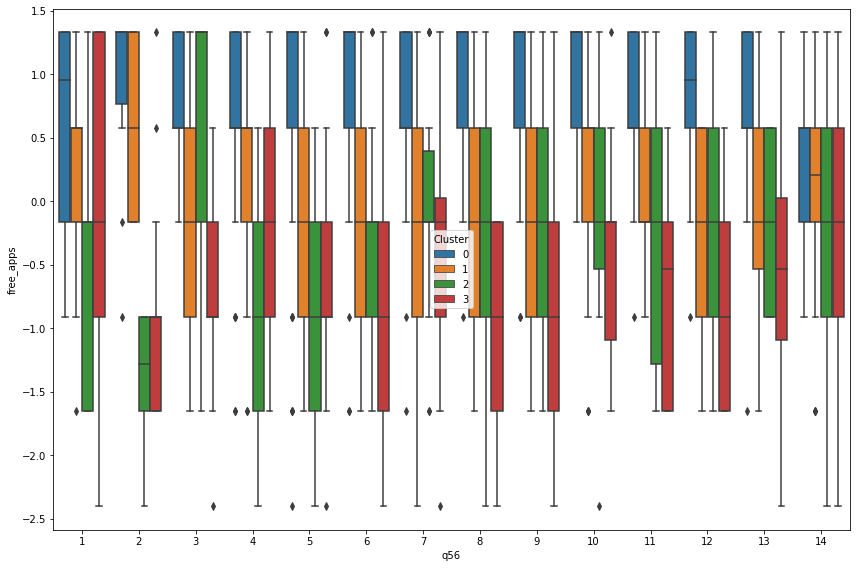

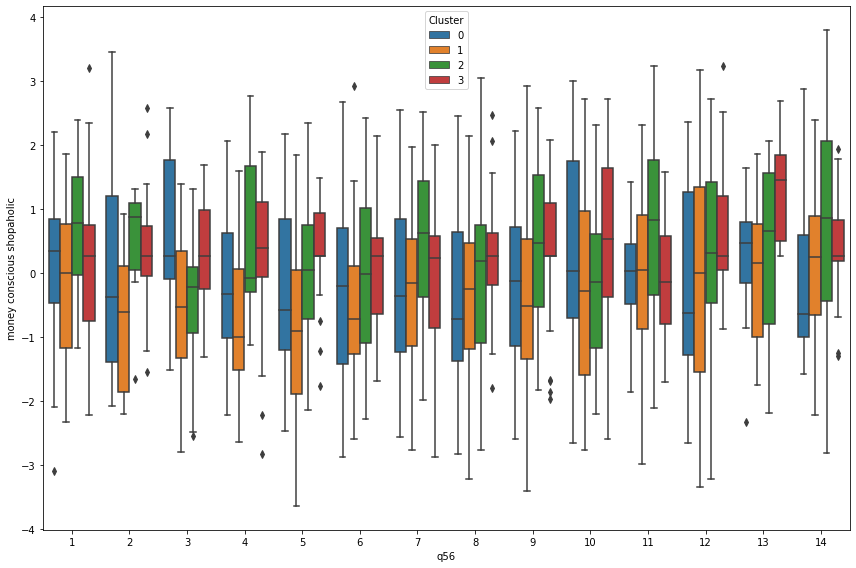

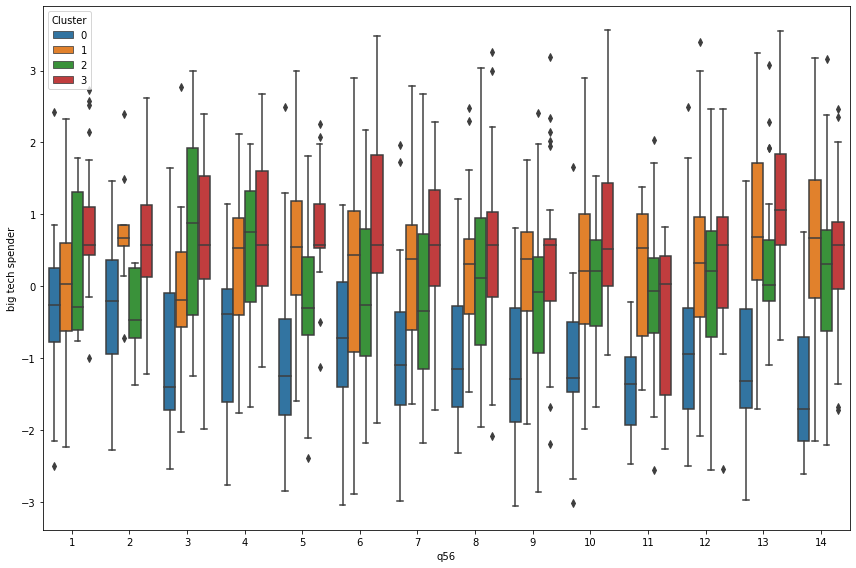

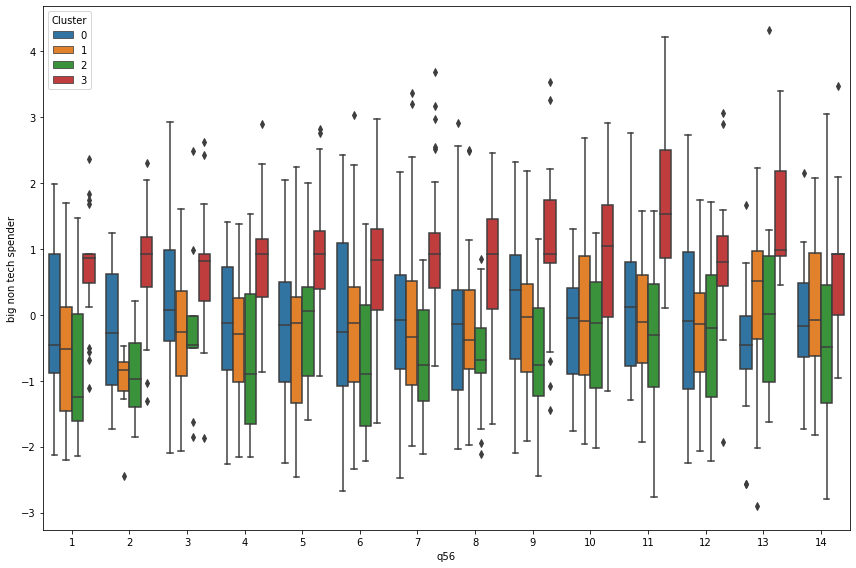

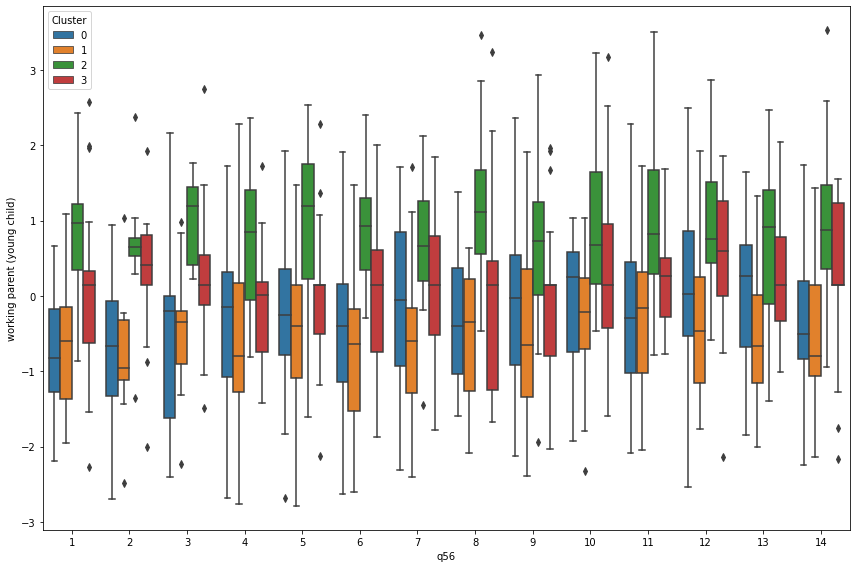

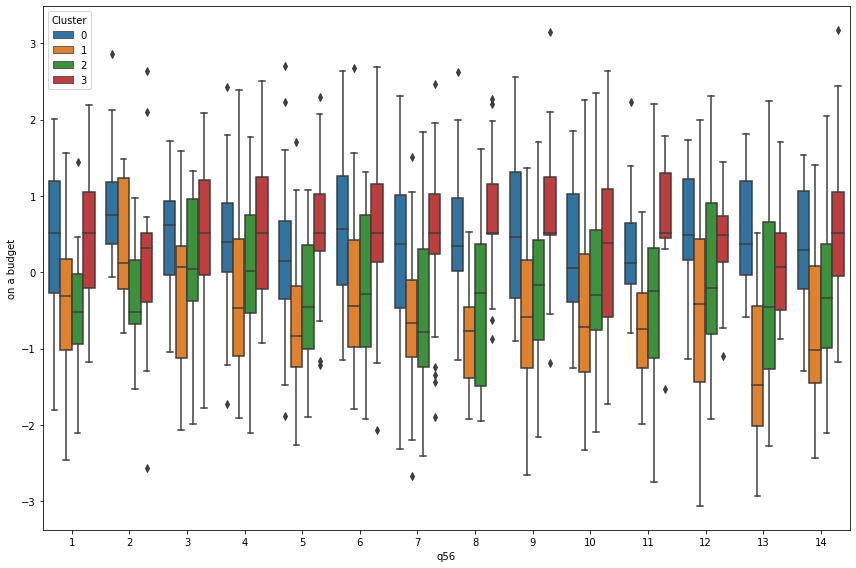

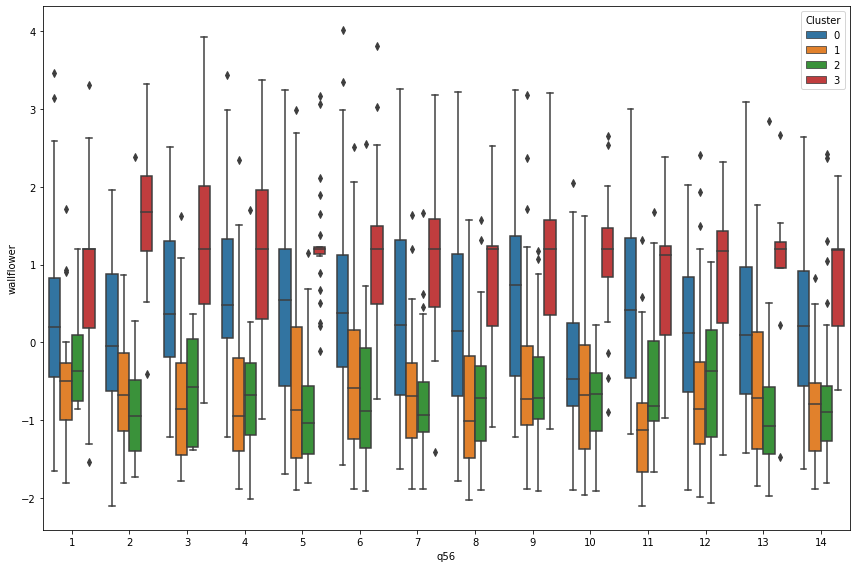

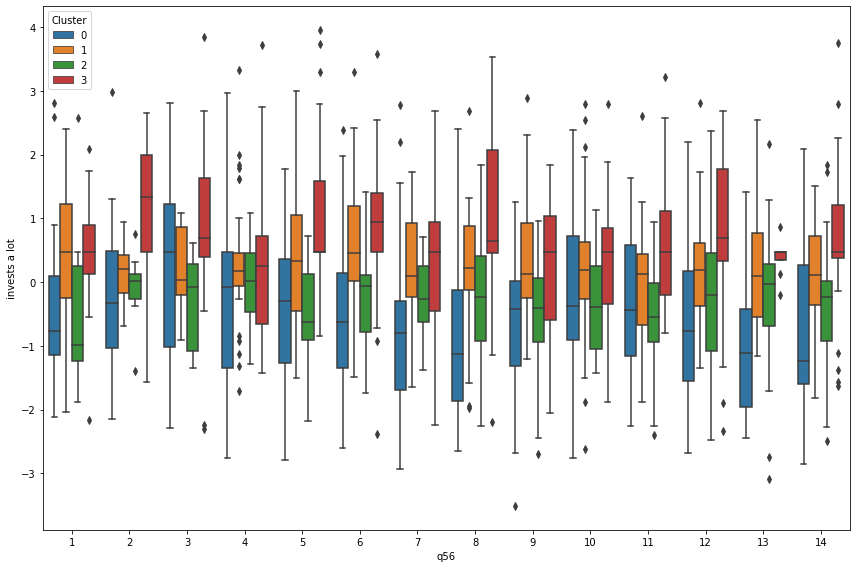

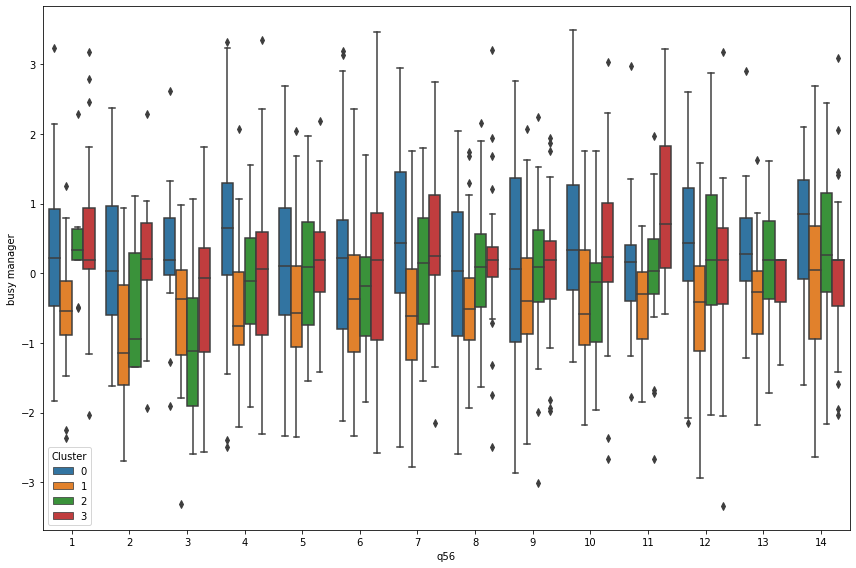

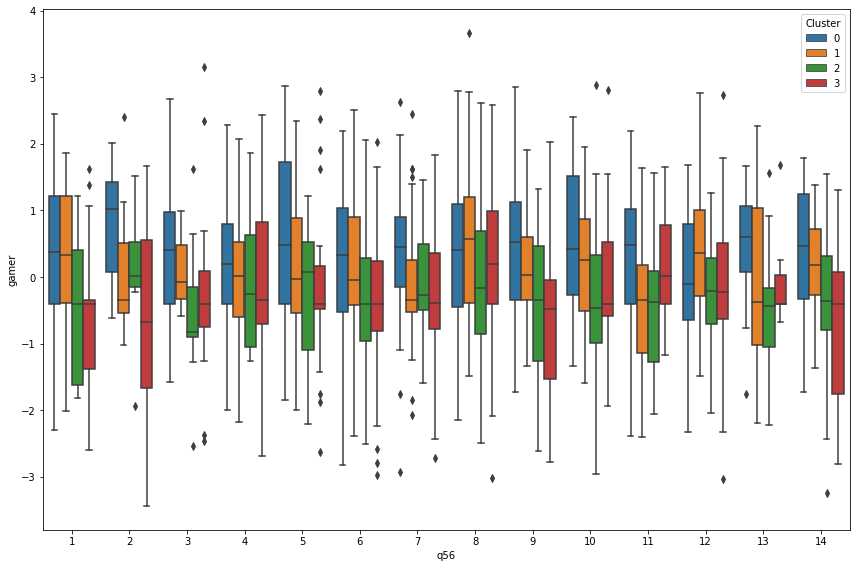

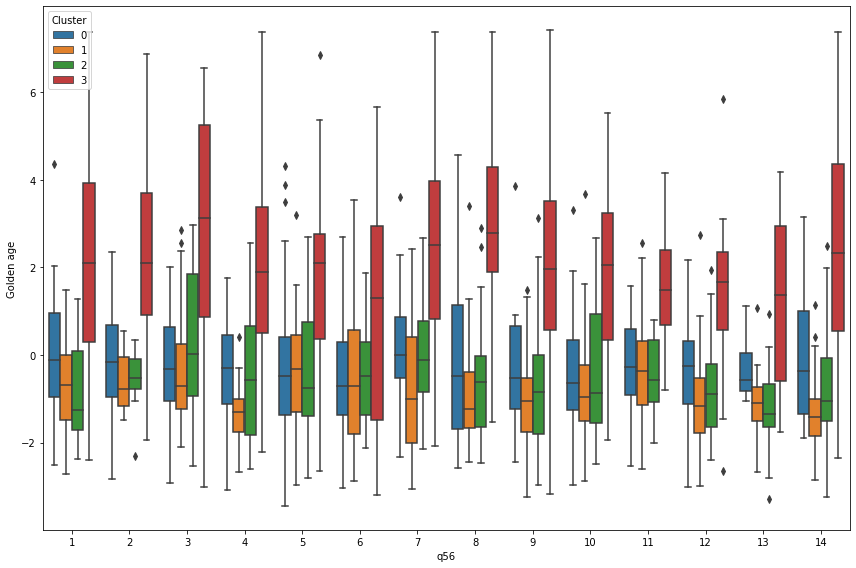

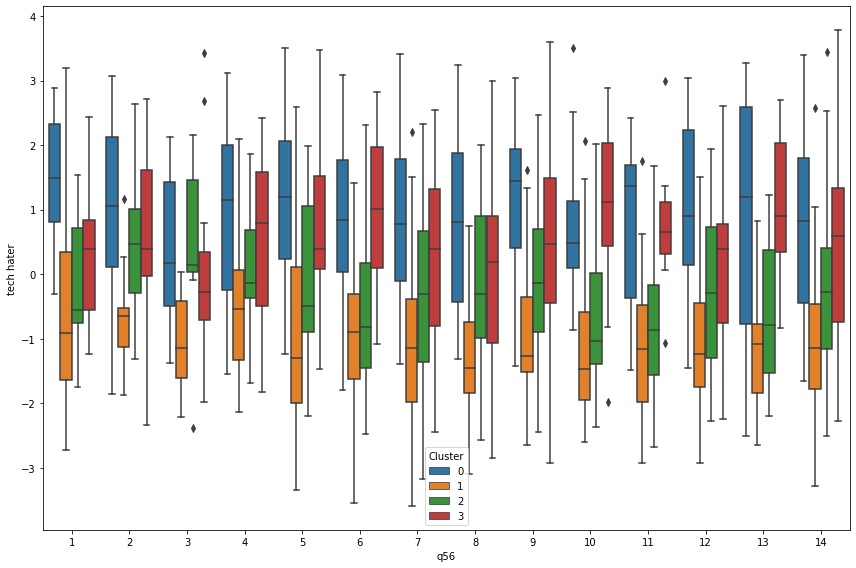

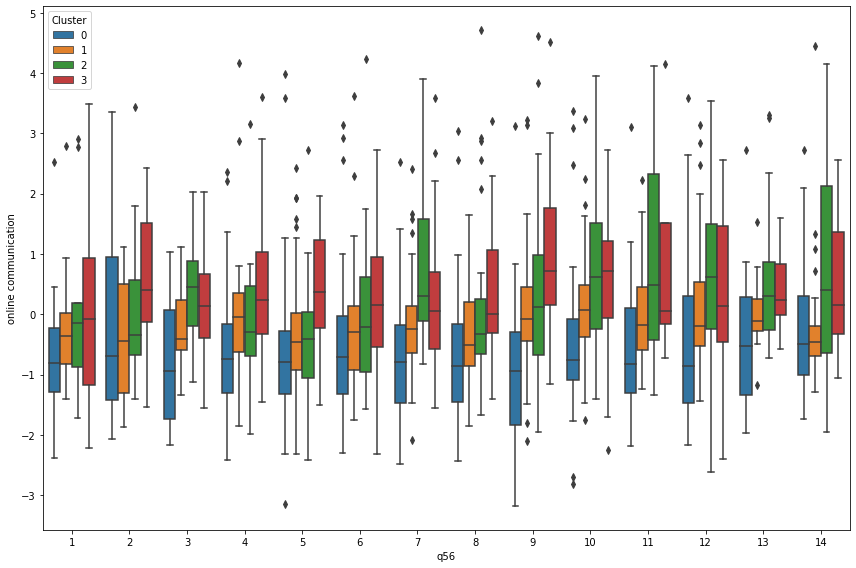

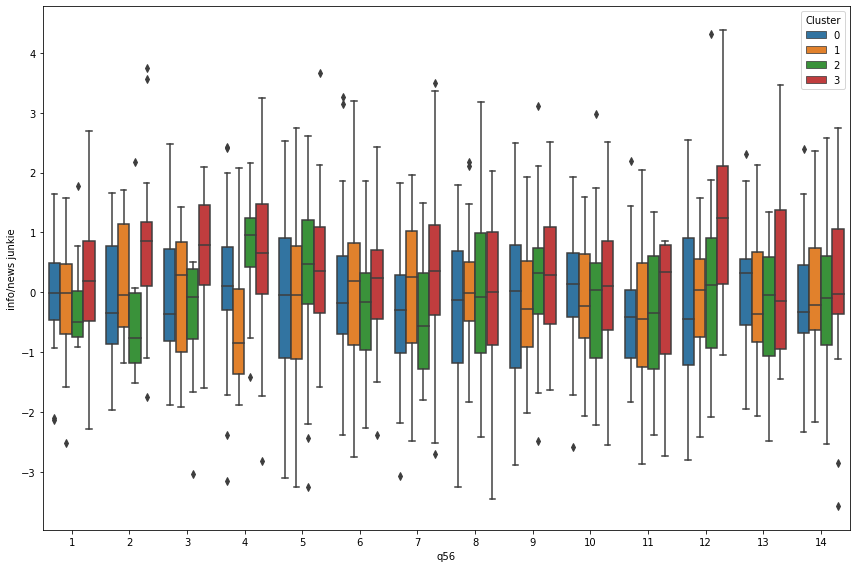

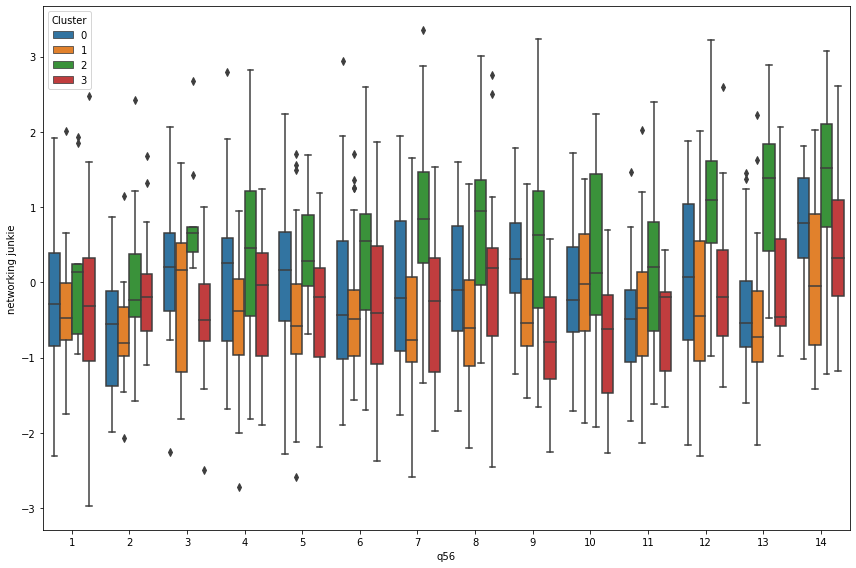

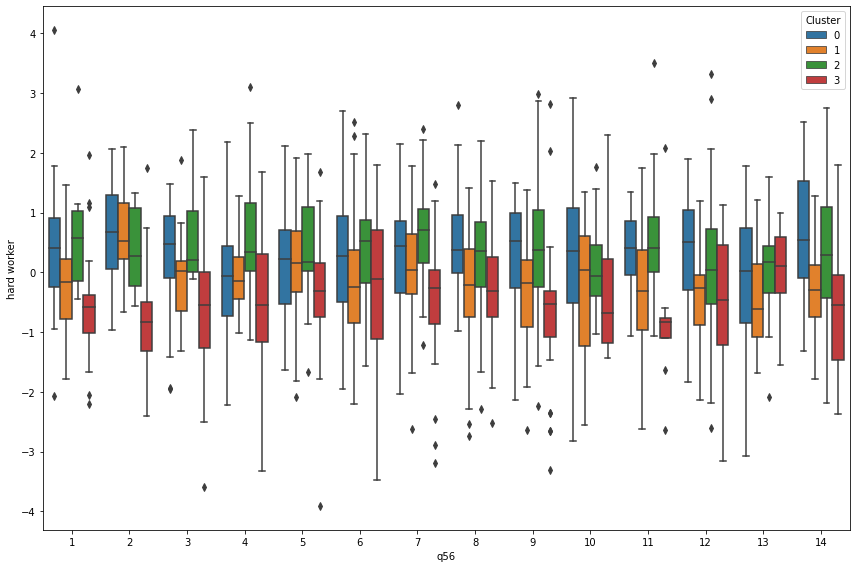

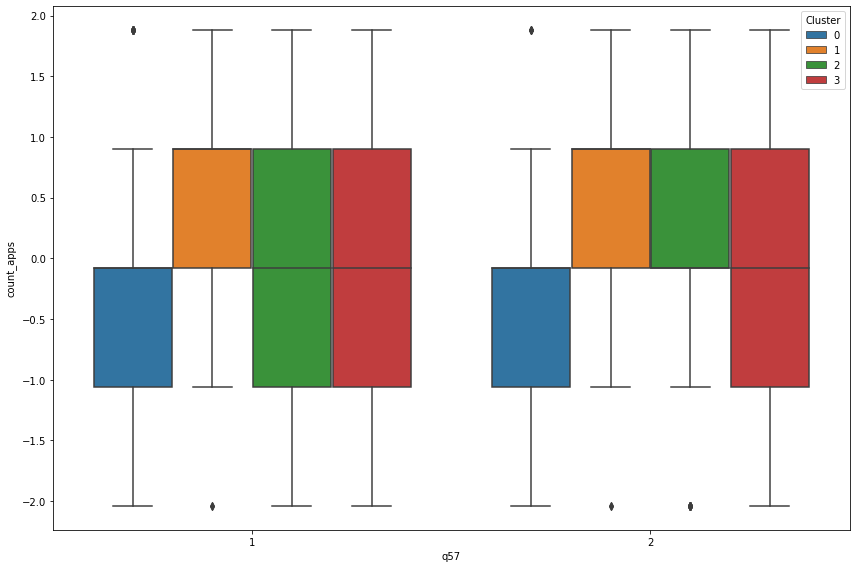

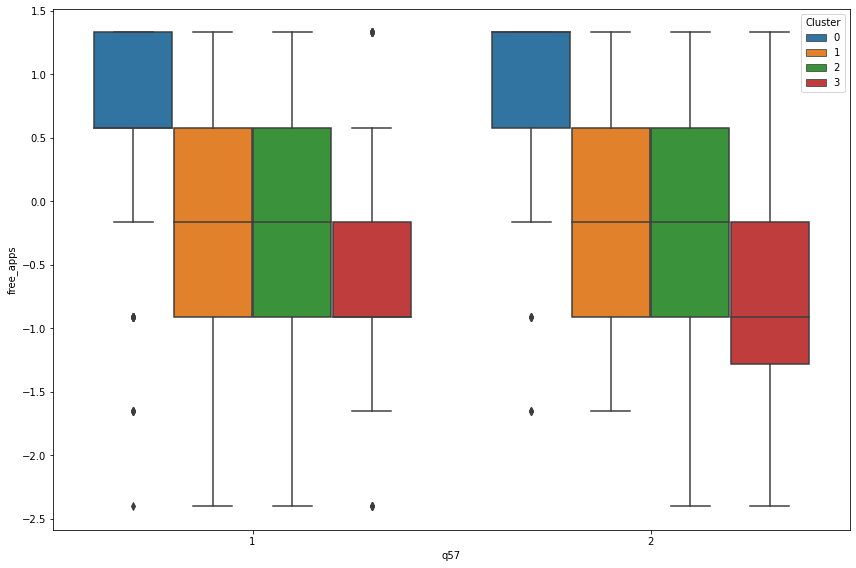

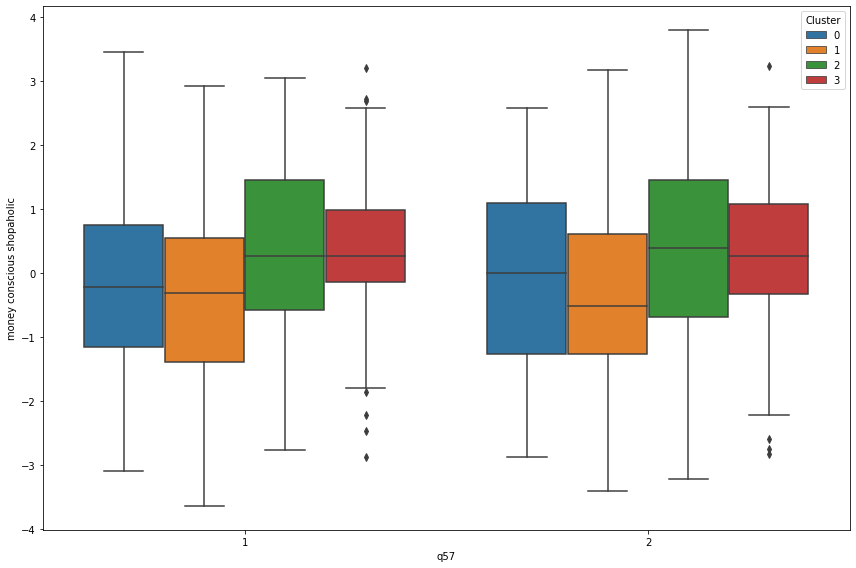

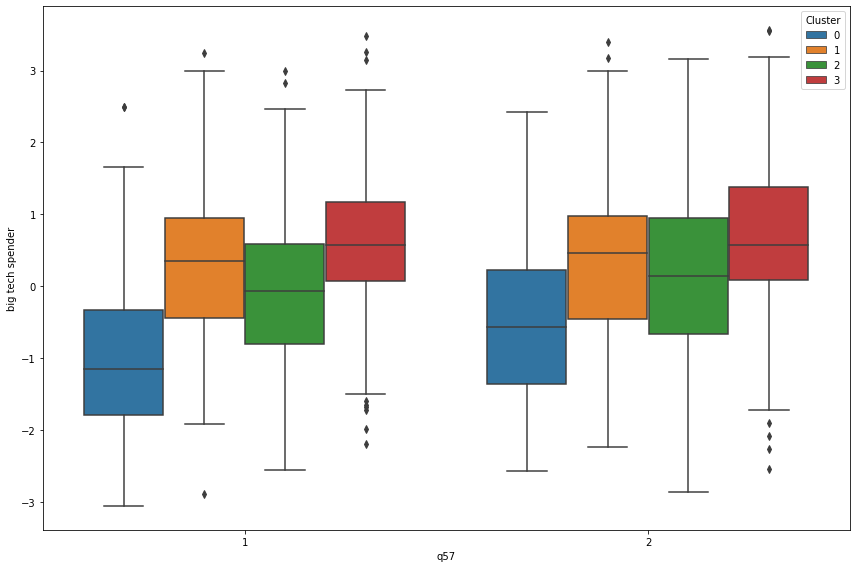

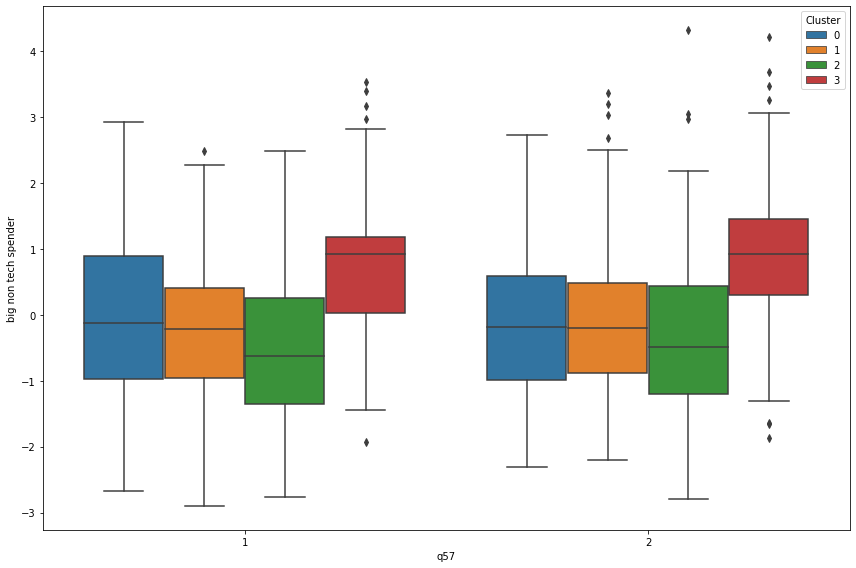

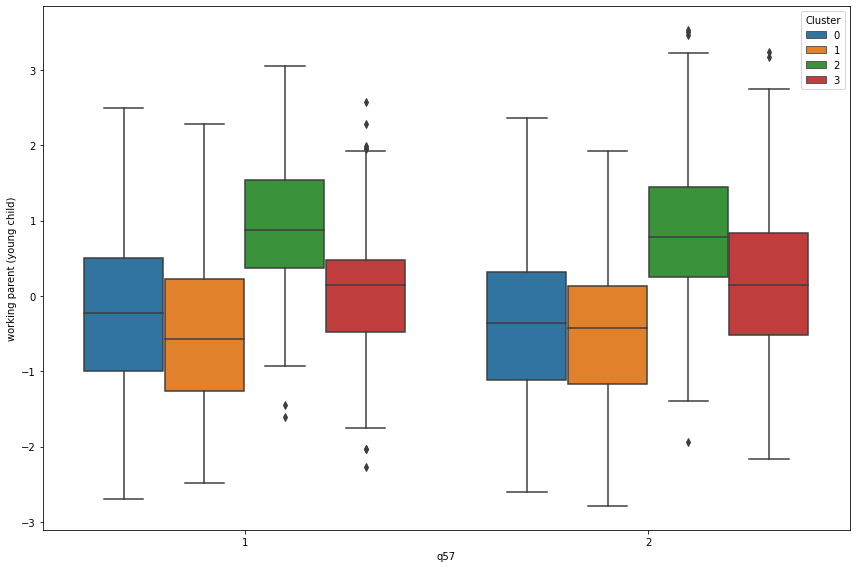

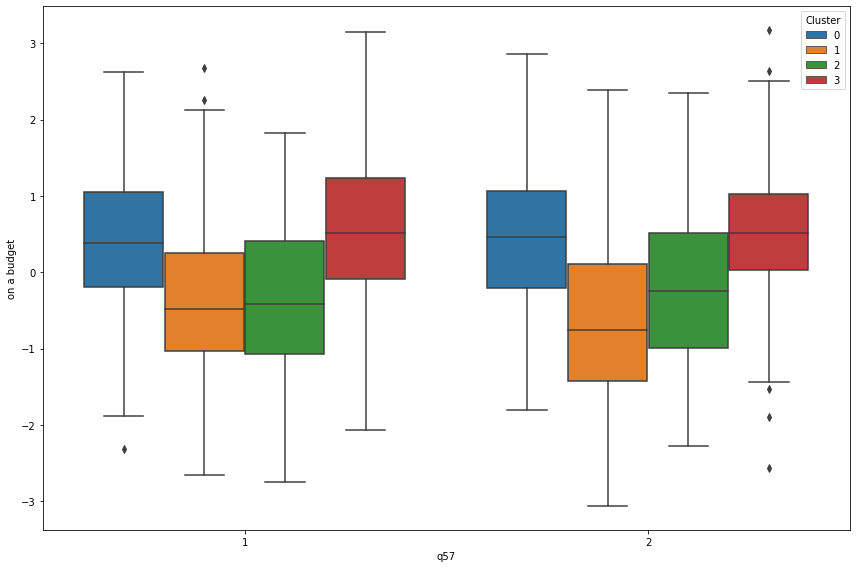

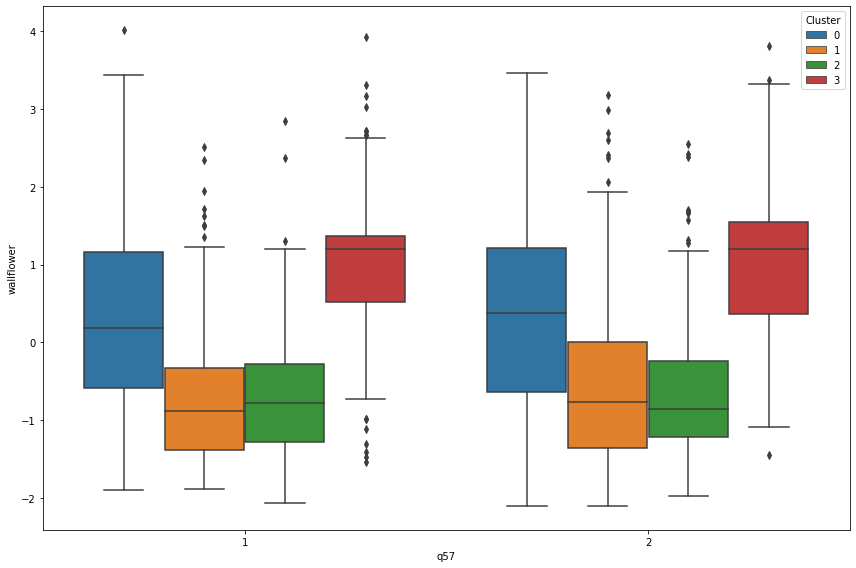

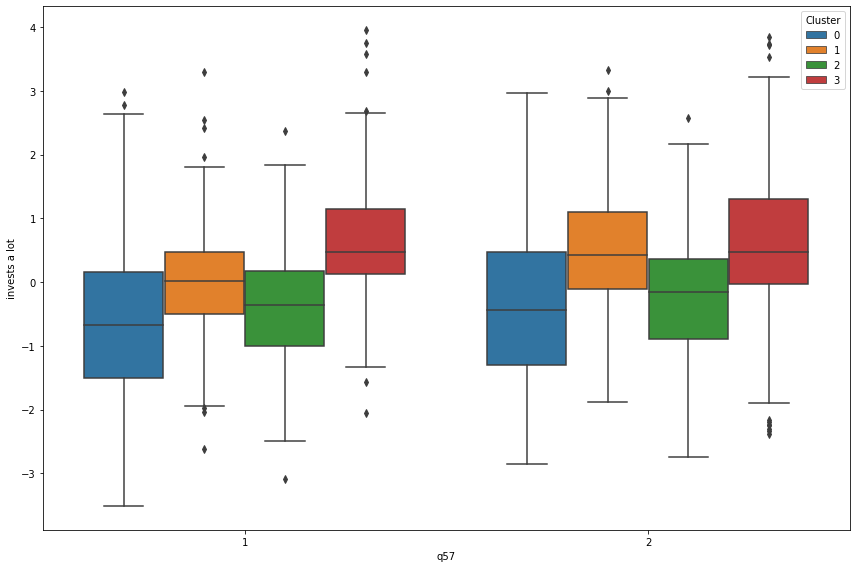

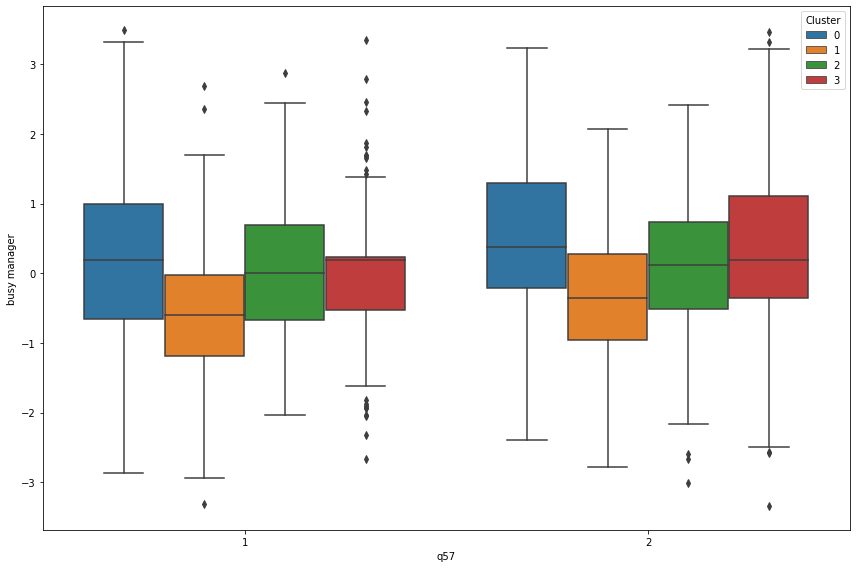

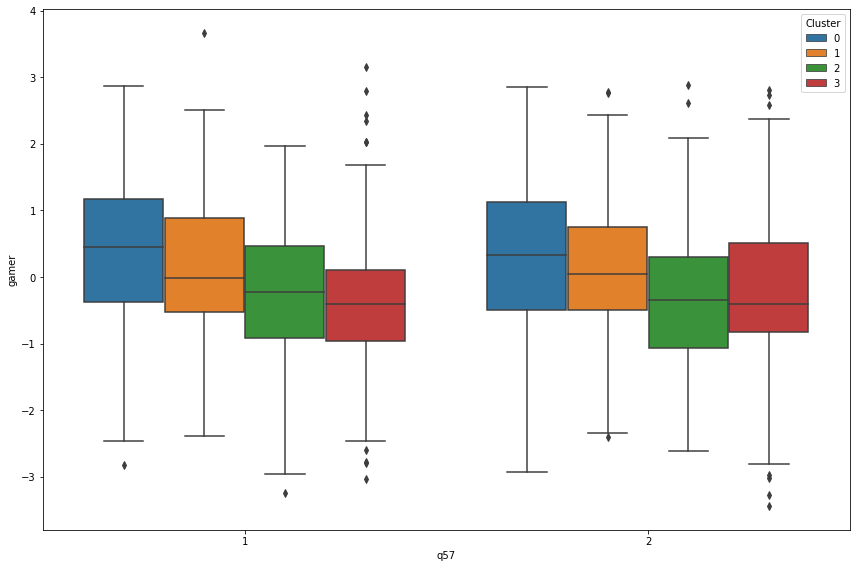

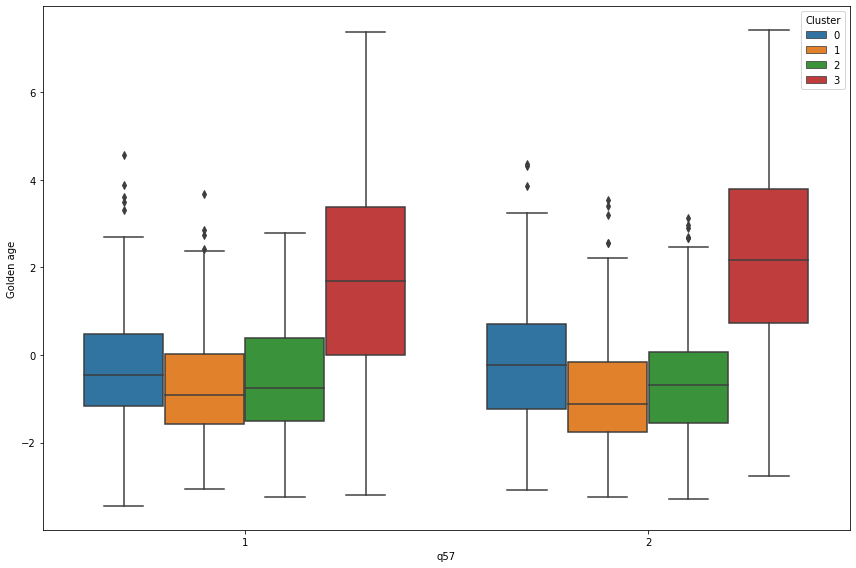

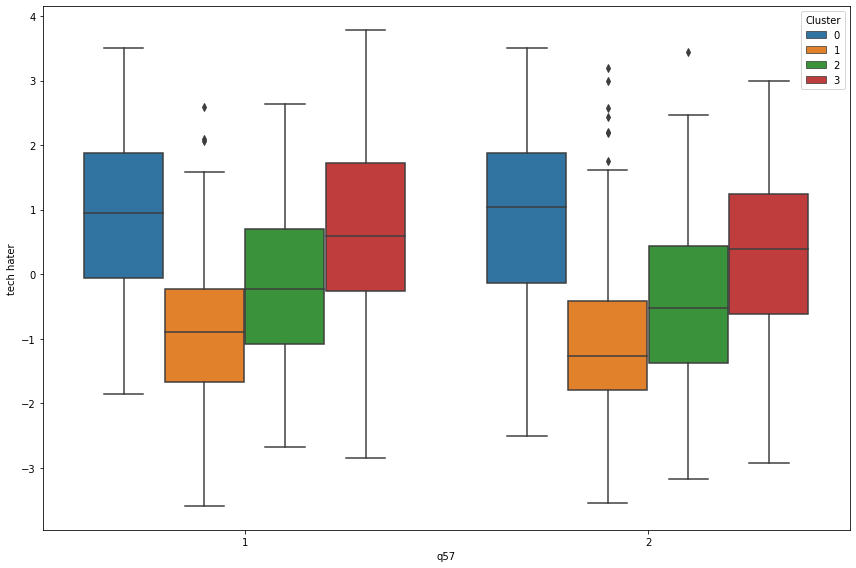

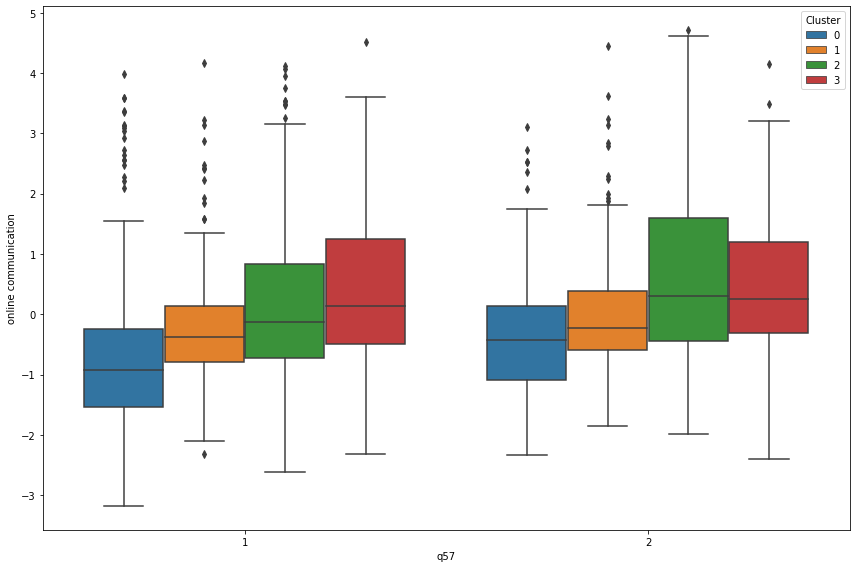

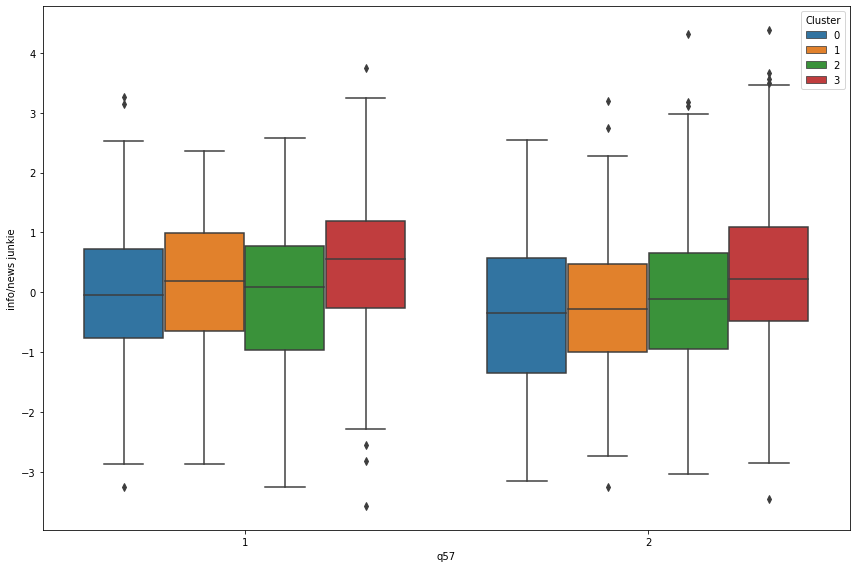

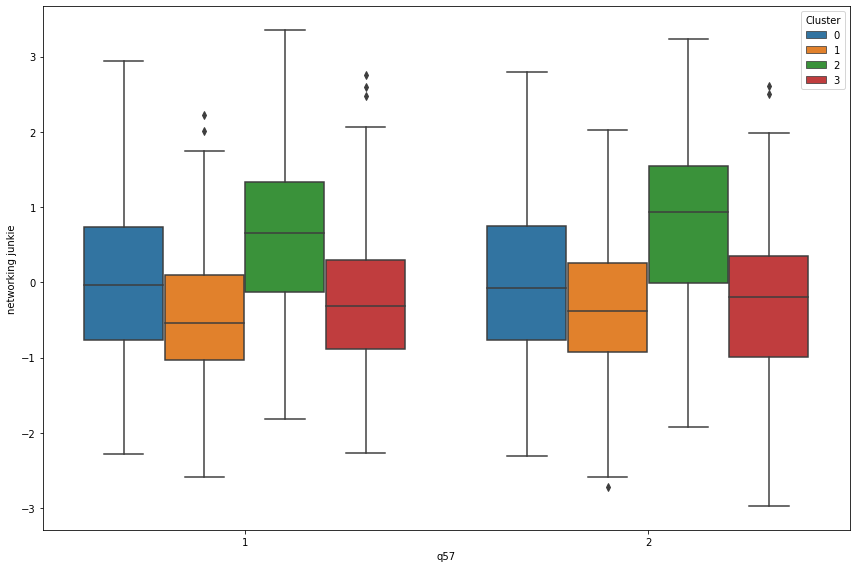

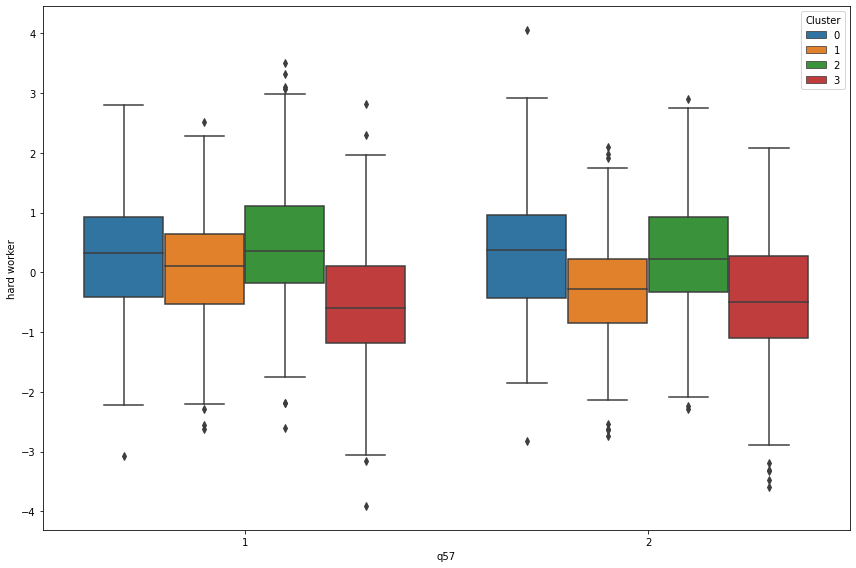

In [31]:
########################
# Channel
########################
demo = demographic.drop(columns = ['caseID', 'q2r10'])
# Carnivores
for col in demo: 
    for cols in factor_loadings_data:
        fig, ax = plt.subplots(figsize = (12, 8))
        sns.boxplot(x = col,
            y = cols,
            hue = 'Cluster',
            data = final_pca_clust_df)


        # formatting and displaying the plot
        plt.tight_layout()
        plt.show()